In [1]:
from src.time_series_prep import *
import pandas as pd
from models.shared_layer import *
from torchviz import make_dot
from torchsummary import summary
from src.data_preprocessing import *
from src.visualizations import *
from src.global_configs import *
from src.time_series_prep import *
import logging
from src.post_processing import *
from collections import defaultdict
# Initialize logger
logging.basicConfig(
    filename='training.log',  # File where logs will be saved
    level=logging.INFO,  # Set logging level to INFO
    format='%(asctime)s - %(levelname)s - %(message)s',  # Log format
    # filemode='w'  # Overwrite log file on each run
)
logger = logging.getLogger()

In [2]:
model_type = 'personalized'

scaler, train_patients, test_patients = process_all_csv_files_personalized(input_folder, output_folder)

In [3]:
# prediction_horizons = [15,30,60,90,120,150,180]

histories_withval_PHs =  {key: [] for key in prediction_horizons}
histories_noval_PHs = {key: [] for key in prediction_horizons}
# abs_patients_errors_PHs =  {key: [] for key in prediction_horizons}
# squared_patients_errors_PHs =  {key: [] for key in prediction_horizons}

MAE_Patients_PHs =  {key: [] for key in prediction_horizons}
RMSE_Patients_PHs =  {key: [] for key in prediction_horizons}


In [4]:
for prediction_horizon in prediction_horizons:
  logger.info(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")
  print(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")


  for i, patient in enumerate(train_patients.items()):
    patient_code = patient[0]
    df = patient[1]
    logger.info(f"Patient {patient_code}")
    print(f"Patient {patient_code}")
    # print(df)

    df_test = list(test_patients.values())[i]
    

    train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                        window_size,BATCH_SIZE, prediction_horizon,
                                                                                        model_type , split_ratio=0.8, df = df, df_test = df_test, output_folder_train = None, shuffle = True)
    for r in range(5):
        model_all_train = PersonalizedModelWithAttention(input_shape =input_shape , output_shape=output_shape) 
        model_all_train = model_all_train.to(device)
        model_all_train, history2 = train_model(model_all_train, all_train_loader, val_loader = test_loader, epochs=100, learning_rate=0.00001, model_type = model_type)

        model_all_train.eval()

        torch.save(model_all_train.state_dict(), f'saved_models//model_{model_type}_{str(prediction_horizon)}_{str(patient_code)}_{r}.pth')
        
        print(f"model_{model_type}_{str(prediction_horizon)}_{str(patient_code)}_{r} saved")
        logger.info(f"model_{model_type}_{str(prediction_horizon)}_{str(patient_code)}_{r} saved")

  # histories_withval_PHs[prediction_horizon] = histories_withval
  logger.info(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
  print(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")

      # break

Start Prediction Horizon 24 of personalized model
Patient 559


Epoch 1/100: 100%|██████████| 189/189 [00:04<00:00, 46.61batch/s, mae_loss=1.27] 


Epoch [1/100], Training MAE: 0.7667, Training RMSE: 0.9494
Epoch [1/100], Validation MAE: 0.6609, Validation RMSE: 0.8798


Epoch 2/100: 100%|██████████| 189/189 [00:03<00:00, 51.98batch/s, mae_loss=0.966]


Epoch [2/100], Training MAE: 0.7409, Training RMSE: 0.9294
Epoch [2/100], Validation MAE: 0.6487, Validation RMSE: 0.8631


Epoch 3/100: 100%|██████████| 189/189 [00:14<00:00, 12.77batch/s, mae_loss=0.608]


Epoch [3/100], Training MAE: 0.7333, Training RMSE: 0.9248
Epoch [3/100], Validation MAE: 0.6480, Validation RMSE: 0.8631


Epoch 4/100: 100%|██████████| 189/189 [00:21<00:00,  8.87batch/s, mae_loss=0.83] 


Epoch [4/100], Training MAE: 0.7317, Training RMSE: 0.9232
Epoch [4/100], Validation MAE: 0.6429, Validation RMSE: 0.8537


Epoch 5/100: 100%|██████████| 189/189 [00:04<00:00, 39.76batch/s, mae_loss=0.538]


Epoch [5/100], Training MAE: 0.7255, Training RMSE: 0.9162
Epoch [5/100], Validation MAE: 0.6417, Validation RMSE: 0.8512


Epoch 6/100: 100%|██████████| 189/189 [00:04<00:00, 40.55batch/s, mae_loss=0.585]


Epoch [6/100], Training MAE: 0.7198, Training RMSE: 0.9113
Epoch [6/100], Validation MAE: 0.6385, Validation RMSE: 0.8477


Epoch 7/100: 100%|██████████| 189/189 [00:04<00:00, 44.58batch/s, mae_loss=0.8]  


Epoch [7/100], Training MAE: 0.7168, Training RMSE: 0.9075
Epoch [7/100], Validation MAE: 0.6324, Validation RMSE: 0.8431


Epoch 8/100: 100%|██████████| 189/189 [00:03<00:00, 48.27batch/s, mae_loss=0.668]


Epoch [8/100], Training MAE: 0.7077, Training RMSE: 0.8987
Epoch [8/100], Validation MAE: 0.6303, Validation RMSE: 0.8421


Epoch 9/100: 100%|██████████| 189/189 [00:03<00:00, 52.85batch/s, mae_loss=0.77] 


Epoch [9/100], Training MAE: 0.7023, Training RMSE: 0.8928
Epoch [9/100], Validation MAE: 0.6256, Validation RMSE: 0.8349


Epoch 10/100: 100%|██████████| 189/189 [00:03<00:00, 49.56batch/s, mae_loss=0.66] 


Epoch [10/100], Training MAE: 0.6982, Training RMSE: 0.8890
Epoch [10/100], Validation MAE: 0.6223, Validation RMSE: 0.8294


Epoch 11/100: 100%|██████████| 189/189 [00:05<00:00, 34.39batch/s, mae_loss=0.849]


Epoch [11/100], Training MAE: 0.6942, Training RMSE: 0.8847
Epoch [11/100], Validation MAE: 0.6166, Validation RMSE: 0.8209


Epoch 12/100: 100%|██████████| 189/189 [00:03<00:00, 54.06batch/s, mae_loss=0.704]


Epoch [12/100], Training MAE: 0.6902, Training RMSE: 0.8796
Epoch [12/100], Validation MAE: 0.6155, Validation RMSE: 0.8190


Epoch 13/100: 100%|██████████| 189/189 [00:03<00:00, 51.84batch/s, mae_loss=0.937]


Epoch [13/100], Training MAE: 0.6891, Training RMSE: 0.8791
Epoch [13/100], Validation MAE: 0.6129, Validation RMSE: 0.8145


Epoch 14/100: 100%|██████████| 189/189 [00:03<00:00, 55.38batch/s, mae_loss=0.708]


Epoch [14/100], Training MAE: 0.6847, Training RMSE: 0.8750
Epoch [14/100], Validation MAE: 0.6087, Validation RMSE: 0.8069


Epoch 15/100: 100%|██████████| 189/189 [00:03<00:00, 54.83batch/s, mae_loss=0.702]


Epoch [15/100], Training MAE: 0.6826, Training RMSE: 0.8736
Epoch [15/100], Validation MAE: 0.6031, Validation RMSE: 0.7996


Epoch 16/100: 100%|██████████| 189/189 [00:03<00:00, 57.05batch/s, mae_loss=0.453]


Epoch [16/100], Training MAE: 0.6778, Training RMSE: 0.8684
Epoch [16/100], Validation MAE: 0.6015, Validation RMSE: 0.7949


Epoch 17/100: 100%|██████████| 189/189 [00:03<00:00, 55.65batch/s, mae_loss=0.613]


Epoch [17/100], Training MAE: 0.6796, Training RMSE: 0.8722
Epoch [17/100], Validation MAE: 0.5991, Validation RMSE: 0.7942


Epoch 18/100: 100%|██████████| 189/189 [00:03<00:00, 54.42batch/s, mae_loss=0.808]


Epoch [18/100], Training MAE: 0.6780, Training RMSE: 0.8702
Epoch [18/100], Validation MAE: 0.5986, Validation RMSE: 0.7930


Epoch 19/100: 100%|██████████| 189/189 [00:03<00:00, 59.77batch/s, mae_loss=0.564]


Epoch [19/100], Training MAE: 0.6743, Training RMSE: 0.8669
Epoch [19/100], Validation MAE: 0.5992, Validation RMSE: 0.7906


Epoch 20/100: 100%|██████████| 189/189 [00:03<00:00, 59.68batch/s, mae_loss=0.614]


Epoch [20/100], Training MAE: 0.6741, Training RMSE: 0.8657
Epoch [20/100], Validation MAE: 0.5991, Validation RMSE: 0.7905


Epoch 21/100: 100%|██████████| 189/189 [00:03<00:00, 53.34batch/s, mae_loss=0.649]


Epoch [21/100], Training MAE: 0.6729, Training RMSE: 0.8646
Epoch [21/100], Validation MAE: 0.5956, Validation RMSE: 0.7857


Epoch 22/100: 100%|██████████| 189/189 [00:03<00:00, 58.21batch/s, mae_loss=0.592]


Epoch [22/100], Training MAE: 0.6719, Training RMSE: 0.8626
Epoch [22/100], Validation MAE: 0.5964, Validation RMSE: 0.7857


Epoch 23/100: 100%|██████████| 189/189 [00:03<00:00, 60.17batch/s, mae_loss=0.523]


Epoch [23/100], Training MAE: 0.6710, Training RMSE: 0.8619
Epoch [23/100], Validation MAE: 0.5969, Validation RMSE: 0.7868


Epoch 24/100: 100%|██████████| 189/189 [00:03<00:00, 60.04batch/s, mae_loss=0.671]


Epoch [24/100], Training MAE: 0.6724, Training RMSE: 0.8625
Epoch [24/100], Validation MAE: 0.5957, Validation RMSE: 0.7845


Epoch 25/100: 100%|██████████| 189/189 [00:03<00:00, 61.52batch/s, mae_loss=0.518]


Epoch [25/100], Training MAE: 0.6684, Training RMSE: 0.8606
Epoch [25/100], Validation MAE: 0.5960, Validation RMSE: 0.7860


Epoch 26/100: 100%|██████████| 189/189 [00:03<00:00, 59.45batch/s, mae_loss=0.683]


Epoch [26/100], Training MAE: 0.6714, Training RMSE: 0.8635
Epoch [26/100], Validation MAE: 0.5960, Validation RMSE: 0.7847


Epoch 27/100: 100%|██████████| 189/189 [00:03<00:00, 58.73batch/s, mae_loss=0.927]


Epoch [27/100], Training MAE: 0.6699, Training RMSE: 0.8636
Epoch [27/100], Validation MAE: 0.5950, Validation RMSE: 0.7828


Epoch 28/100: 100%|██████████| 189/189 [00:03<00:00, 59.92batch/s, mae_loss=0.672]


Epoch [28/100], Training MAE: 0.6670, Training RMSE: 0.8582
Epoch [28/100], Validation MAE: 0.5946, Validation RMSE: 0.7816


Epoch 29/100: 100%|██████████| 189/189 [00:03<00:00, 60.48batch/s, mae_loss=0.94] 


Epoch [29/100], Training MAE: 0.6695, Training RMSE: 0.8606
Epoch [29/100], Validation MAE: 0.5960, Validation RMSE: 0.7837


Epoch 30/100: 100%|██████████| 189/189 [00:03<00:00, 59.45batch/s, mae_loss=0.706]


Epoch [30/100], Training MAE: 0.6679, Training RMSE: 0.8610
Epoch [30/100], Validation MAE: 0.5939, Validation RMSE: 0.7821


Epoch 31/100: 100%|██████████| 189/189 [00:03<00:00, 59.53batch/s, mae_loss=0.598]


Epoch [31/100], Training MAE: 0.6662, Training RMSE: 0.8582
Epoch [31/100], Validation MAE: 0.5960, Validation RMSE: 0.7821


Epoch 32/100: 100%|██████████| 189/189 [00:03<00:00, 60.75batch/s, mae_loss=0.646]


Epoch [32/100], Training MAE: 0.6646, Training RMSE: 0.8583
Epoch [32/100], Validation MAE: 0.5982, Validation RMSE: 0.7850


Epoch 33/100: 100%|██████████| 189/189 [00:03<00:00, 60.52batch/s, mae_loss=0.388]


Epoch [33/100], Training MAE: 0.6630, Training RMSE: 0.8570
Epoch [33/100], Validation MAE: 0.5951, Validation RMSE: 0.7820


Epoch 34/100: 100%|██████████| 189/189 [00:03<00:00, 59.57batch/s, mae_loss=0.553]


Epoch [34/100], Training MAE: 0.6657, Training RMSE: 0.8570
Epoch [34/100], Validation MAE: 0.5965, Validation RMSE: 0.7832


Epoch 35/100: 100%|██████████| 189/189 [00:03<00:00, 49.12batch/s, mae_loss=0.703]


Epoch [35/100], Training MAE: 0.6620, Training RMSE: 0.8542
Epoch [35/100], Validation MAE: 0.5952, Validation RMSE: 0.7821


Epoch 36/100: 100%|██████████| 189/189 [00:03<00:00, 50.08batch/s, mae_loss=0.931]


Epoch [36/100], Training MAE: 0.6648, Training RMSE: 0.8572
Epoch [36/100], Validation MAE: 0.5978, Validation RMSE: 0.7844


Epoch 37/100: 100%|██████████| 189/189 [00:03<00:00, 58.23batch/s, mae_loss=0.704]


Epoch [37/100], Training MAE: 0.6654, Training RMSE: 0.8576
Epoch [37/100], Validation MAE: 0.5954, Validation RMSE: 0.7819


Epoch 38/100: 100%|██████████| 189/189 [00:03<00:00, 58.55batch/s, mae_loss=0.623]


Epoch [38/100], Training MAE: 0.6646, Training RMSE: 0.8581
Epoch [38/100], Validation MAE: 0.5993, Validation RMSE: 0.7863


Epoch 39/100: 100%|██████████| 189/189 [00:03<00:00, 56.20batch/s, mae_loss=0.688]


Epoch [39/100], Training MAE: 0.6650, Training RMSE: 0.8578
Epoch [39/100], Validation MAE: 0.5981, Validation RMSE: 0.7858


Epoch 40/100: 100%|██████████| 189/189 [00:03<00:00, 58.71batch/s, mae_loss=0.556]


Epoch [40/100], Training MAE: 0.6630, Training RMSE: 0.8557
Epoch [40/100], Validation MAE: 0.5976, Validation RMSE: 0.7855


Epoch 41/100: 100%|██████████| 189/189 [00:03<00:00, 58.62batch/s, mae_loss=0.651]


Epoch [41/100], Training MAE: 0.6617, Training RMSE: 0.8551
Epoch [41/100], Validation MAE: 0.6008, Validation RMSE: 0.7904


Epoch 42/100: 100%|██████████| 189/189 [00:03<00:00, 60.44batch/s, mae_loss=0.53] 


Epoch [42/100], Training MAE: 0.6597, Training RMSE: 0.8522
Epoch [42/100], Validation MAE: 0.5959, Validation RMSE: 0.7819


Epoch 43/100: 100%|██████████| 189/189 [00:03<00:00, 59.04batch/s, mae_loss=0.634]


Epoch [43/100], Training MAE: 0.6566, Training RMSE: 0.8506
Epoch [43/100], Validation MAE: 0.5980, Validation RMSE: 0.7838


Epoch 44/100: 100%|██████████| 189/189 [00:03<00:00, 59.45batch/s, mae_loss=0.799]


Epoch [44/100], Training MAE: 0.6627, Training RMSE: 0.8571
Epoch [44/100], Validation MAE: 0.5963, Validation RMSE: 0.7822


Epoch 45/100: 100%|██████████| 189/189 [00:03<00:00, 60.19batch/s, mae_loss=0.655]


Epoch [45/100], Training MAE: 0.6605, Training RMSE: 0.8541
Epoch [45/100], Validation MAE: 0.5932, Validation RMSE: 0.7794


Epoch 46/100: 100%|██████████| 189/189 [00:03<00:00, 60.27batch/s, mae_loss=0.607]


Epoch [46/100], Training MAE: 0.6607, Training RMSE: 0.8536
Epoch [46/100], Validation MAE: 0.5955, Validation RMSE: 0.7835


Epoch 47/100: 100%|██████████| 189/189 [00:03<00:00, 59.19batch/s, mae_loss=0.626]


Epoch [47/100], Training MAE: 0.6581, Training RMSE: 0.8526
Epoch [47/100], Validation MAE: 0.6002, Validation RMSE: 0.7865


Epoch 48/100: 100%|██████████| 189/189 [00:03<00:00, 60.34batch/s, mae_loss=0.701]


Epoch [48/100], Training MAE: 0.6587, Training RMSE: 0.8516
Epoch [48/100], Validation MAE: 0.5978, Validation RMSE: 0.7839


Epoch 49/100: 100%|██████████| 189/189 [00:03<00:00, 60.25batch/s, mae_loss=0.805]


Epoch [49/100], Training MAE: 0.6592, Training RMSE: 0.8538
Epoch [49/100], Validation MAE: 0.5984, Validation RMSE: 0.7852


Epoch 50/100: 100%|██████████| 189/189 [00:03<00:00, 56.86batch/s, mae_loss=0.951]


Epoch [50/100], Training MAE: 0.6593, Training RMSE: 0.8544
Epoch [50/100], Validation MAE: 0.5965, Validation RMSE: 0.7840


Epoch 51/100: 100%|██████████| 189/189 [00:03<00:00, 56.47batch/s, mae_loss=0.534]


Epoch [51/100], Training MAE: 0.6584, Training RMSE: 0.8527
Epoch [51/100], Validation MAE: 0.5995, Validation RMSE: 0.7887


Epoch 52/100: 100%|██████████| 189/189 [00:03<00:00, 57.33batch/s, mae_loss=0.465]


Epoch [52/100], Training MAE: 0.6573, Training RMSE: 0.8531
Epoch [52/100], Validation MAE: 0.5976, Validation RMSE: 0.7846


Epoch 53/100: 100%|██████████| 189/189 [00:03<00:00, 59.32batch/s, mae_loss=0.875]


Epoch [53/100], Training MAE: 0.6592, Training RMSE: 0.8549
Epoch [53/100], Validation MAE: 0.5980, Validation RMSE: 0.7861


Epoch 54/100: 100%|██████████| 189/189 [00:03<00:00, 60.15batch/s, mae_loss=0.731]


Epoch [54/100], Training MAE: 0.6602, Training RMSE: 0.8545
Epoch [54/100], Validation MAE: 0.5981, Validation RMSE: 0.7861


Epoch 55/100: 100%|██████████| 189/189 [00:03<00:00, 56.57batch/s, mae_loss=0.681]


Epoch [55/100], Training MAE: 0.6578, Training RMSE: 0.8510
Epoch [55/100], Validation MAE: 0.5962, Validation RMSE: 0.7831


Epoch 56/100: 100%|██████████| 189/189 [00:03<00:00, 61.36batch/s, mae_loss=0.763]


Epoch [56/100], Training MAE: 0.6570, Training RMSE: 0.8520
Epoch [56/100], Validation MAE: 0.5965, Validation RMSE: 0.7840


Epoch 57/100: 100%|██████████| 189/189 [00:03<00:00, 59.17batch/s, mae_loss=0.587]


Epoch [57/100], Training MAE: 0.6566, Training RMSE: 0.8519
Epoch [57/100], Validation MAE: 0.5986, Validation RMSE: 0.7877


Epoch 58/100: 100%|██████████| 189/189 [00:03<00:00, 55.67batch/s, mae_loss=0.452]


Epoch [58/100], Training MAE: 0.6568, Training RMSE: 0.8511
Epoch [58/100], Validation MAE: 0.5985, Validation RMSE: 0.7882


Epoch 59/100: 100%|██████████| 189/189 [00:03<00:00, 58.97batch/s, mae_loss=0.6]  


Epoch [59/100], Training MAE: 0.6551, Training RMSE: 0.8485
Epoch [59/100], Validation MAE: 0.5950, Validation RMSE: 0.7823


Epoch 60/100: 100%|██████████| 189/189 [00:03<00:00, 58.79batch/s, mae_loss=0.801]


Epoch [60/100], Training MAE: 0.6572, Training RMSE: 0.8536
Epoch [60/100], Validation MAE: 0.5968, Validation RMSE: 0.7847


Epoch 61/100: 100%|██████████| 189/189 [00:03<00:00, 60.21batch/s, mae_loss=0.663]


Epoch [61/100], Training MAE: 0.6544, Training RMSE: 0.8494
Epoch [61/100], Validation MAE: 0.5964, Validation RMSE: 0.7845


Epoch 62/100: 100%|██████████| 189/189 [00:03<00:00, 59.53batch/s, mae_loss=0.687]


Epoch [62/100], Training MAE: 0.6569, Training RMSE: 0.8536
Epoch [62/100], Validation MAE: 0.5974, Validation RMSE: 0.7845


Epoch 63/100: 100%|██████████| 189/189 [00:03<00:00, 59.47batch/s, mae_loss=0.891]


Epoch [63/100], Training MAE: 0.6568, Training RMSE: 0.8529
Epoch [63/100], Validation MAE: 0.5973, Validation RMSE: 0.7843


Epoch 64/100: 100%|██████████| 189/189 [00:03<00:00, 59.79batch/s, mae_loss=0.572]


Epoch [64/100], Training MAE: 0.6570, Training RMSE: 0.8525
Epoch [64/100], Validation MAE: 0.6014, Validation RMSE: 0.7897


Epoch 65/100: 100%|██████████| 189/189 [00:03<00:00, 60.25batch/s, mae_loss=0.54] 


Epoch [65/100], Training MAE: 0.6540, Training RMSE: 0.8480
Epoch [65/100], Validation MAE: 0.5989, Validation RMSE: 0.7864


Epoch 66/100: 100%|██████████| 189/189 [00:03<00:00, 59.98batch/s, mae_loss=0.459]


Epoch [66/100], Training MAE: 0.6537, Training RMSE: 0.8467
Epoch [66/100], Validation MAE: 0.5945, Validation RMSE: 0.7821


Epoch 67/100: 100%|██████████| 189/189 [00:03<00:00, 59.10batch/s, mae_loss=0.553]


Epoch [67/100], Training MAE: 0.6552, Training RMSE: 0.8515
Epoch [67/100], Validation MAE: 0.5958, Validation RMSE: 0.7826


Epoch 68/100: 100%|██████████| 189/189 [00:03<00:00, 59.70batch/s, mae_loss=0.452]


Epoch [68/100], Training MAE: 0.6530, Training RMSE: 0.8479
Epoch [68/100], Validation MAE: 0.5958, Validation RMSE: 0.7828


Epoch 69/100: 100%|██████████| 189/189 [00:03<00:00, 59.96batch/s, mae_loss=0.799]


Epoch [69/100], Training MAE: 0.6532, Training RMSE: 0.8499
Epoch [69/100], Validation MAE: 0.6005, Validation RMSE: 0.7876


Epoch 70/100: 100%|██████████| 189/189 [00:03<00:00, 60.40batch/s, mae_loss=0.548]


Epoch [70/100], Training MAE: 0.6527, Training RMSE: 0.8480
Epoch [70/100], Validation MAE: 0.5992, Validation RMSE: 0.7863


Epoch 71/100: 100%|██████████| 189/189 [00:03<00:00, 60.00batch/s, mae_loss=0.582]


Epoch [71/100], Training MAE: 0.6523, Training RMSE: 0.8484
Epoch [71/100], Validation MAE: 0.5987, Validation RMSE: 0.7870


Epoch 72/100: 100%|██████████| 189/189 [00:03<00:00, 59.12batch/s, mae_loss=0.757]


Epoch [72/100], Training MAE: 0.6543, Training RMSE: 0.8497
Epoch [72/100], Validation MAE: 0.5979, Validation RMSE: 0.7849


Epoch 73/100: 100%|██████████| 189/189 [00:03<00:00, 60.67batch/s, mae_loss=0.914]


Epoch [73/100], Training MAE: 0.6559, Training RMSE: 0.8496
Epoch [73/100], Validation MAE: 0.5959, Validation RMSE: 0.7839


Epoch 74/100: 100%|██████████| 189/189 [00:03<00:00, 59.06batch/s, mae_loss=0.707]


Epoch [74/100], Training MAE: 0.6528, Training RMSE: 0.8487
Epoch [74/100], Validation MAE: 0.6006, Validation RMSE: 0.7883


Epoch 75/100: 100%|██████████| 189/189 [00:03<00:00, 60.15batch/s, mae_loss=0.578]


Epoch [75/100], Training MAE: 0.6514, Training RMSE: 0.8476
Epoch [75/100], Validation MAE: 0.5969, Validation RMSE: 0.7851


Epoch 76/100: 100%|██████████| 189/189 [00:03<00:00, 57.24batch/s, mae_loss=0.934]


Epoch [76/100], Training MAE: 0.6555, Training RMSE: 0.8531
Epoch [76/100], Validation MAE: 0.5958, Validation RMSE: 0.7829


Epoch 77/100: 100%|██████████| 189/189 [00:03<00:00, 55.82batch/s, mae_loss=0.735]


Epoch [77/100], Training MAE: 0.6520, Training RMSE: 0.8480
Epoch [77/100], Validation MAE: 0.5969, Validation RMSE: 0.7838


Epoch 78/100: 100%|██████████| 189/189 [00:03<00:00, 58.35batch/s, mae_loss=0.81] 


Epoch [78/100], Training MAE: 0.6517, Training RMSE: 0.8485
Epoch [78/100], Validation MAE: 0.5973, Validation RMSE: 0.7844


Epoch 79/100: 100%|██████████| 189/189 [00:03<00:00, 60.64batch/s, mae_loss=0.522]


Epoch [79/100], Training MAE: 0.6516, Training RMSE: 0.8471
Epoch [79/100], Validation MAE: 0.5962, Validation RMSE: 0.7837


Epoch 80/100: 100%|██████████| 189/189 [00:03<00:00, 60.15batch/s, mae_loss=0.789]


Epoch [80/100], Training MAE: 0.6524, Training RMSE: 0.8494
Epoch [80/100], Validation MAE: 0.5969, Validation RMSE: 0.7836


Epoch 81/100: 100%|██████████| 189/189 [00:03<00:00, 60.33batch/s, mae_loss=0.606]


Epoch [81/100], Training MAE: 0.6518, Training RMSE: 0.8488
Epoch [81/100], Validation MAE: 0.5962, Validation RMSE: 0.7835


Epoch 82/100: 100%|██████████| 189/189 [00:03<00:00, 56.60batch/s, mae_loss=0.505]


Epoch [82/100], Training MAE: 0.6489, Training RMSE: 0.8453
Epoch [82/100], Validation MAE: 0.6002, Validation RMSE: 0.7884


Epoch 83/100: 100%|██████████| 189/189 [00:03<00:00, 58.86batch/s, mae_loss=0.865]


Epoch [83/100], Training MAE: 0.6509, Training RMSE: 0.8474
Epoch [83/100], Validation MAE: 0.6019, Validation RMSE: 0.7906


Epoch 84/100: 100%|██████████| 189/189 [00:03<00:00, 60.71batch/s, mae_loss=0.743]


Epoch [84/100], Training MAE: 0.6509, Training RMSE: 0.8462
Epoch [84/100], Validation MAE: 0.5973, Validation RMSE: 0.7853


Epoch 85/100: 100%|██████████| 189/189 [00:03<00:00, 59.19batch/s, mae_loss=0.546]


Epoch [85/100], Training MAE: 0.6495, Training RMSE: 0.8470
Epoch [85/100], Validation MAE: 0.5957, Validation RMSE: 0.7817


Epoch 86/100: 100%|██████████| 189/189 [00:03<00:00, 59.30batch/s, mae_loss=0.588]


Epoch [86/100], Training MAE: 0.6502, Training RMSE: 0.8463
Epoch [86/100], Validation MAE: 0.5972, Validation RMSE: 0.7834


Epoch 87/100: 100%|██████████| 189/189 [00:03<00:00, 60.83batch/s, mae_loss=0.701]


Epoch [87/100], Training MAE: 0.6496, Training RMSE: 0.8475
Epoch [87/100], Validation MAE: 0.5996, Validation RMSE: 0.7863


Epoch 88/100: 100%|██████████| 189/189 [00:03<00:00, 60.87batch/s, mae_loss=0.665]


Epoch [88/100], Training MAE: 0.6504, Training RMSE: 0.8474
Epoch [88/100], Validation MAE: 0.5968, Validation RMSE: 0.7847


Epoch 89/100: 100%|██████████| 189/189 [00:03<00:00, 59.32batch/s, mae_loss=0.709]


Epoch [89/100], Training MAE: 0.6489, Training RMSE: 0.8455
Epoch [89/100], Validation MAE: 0.5969, Validation RMSE: 0.7859


Epoch 90/100: 100%|██████████| 189/189 [00:03<00:00, 59.89batch/s, mae_loss=0.513]


Epoch [90/100], Training MAE: 0.6503, Training RMSE: 0.8478
Epoch [90/100], Validation MAE: 0.5978, Validation RMSE: 0.7837


Epoch 91/100: 100%|██████████| 189/189 [00:03<00:00, 59.68batch/s, mae_loss=0.504]


Epoch [91/100], Training MAE: 0.6508, Training RMSE: 0.8478
Epoch [91/100], Validation MAE: 0.5964, Validation RMSE: 0.7831


Epoch 92/100: 100%|██████████| 189/189 [00:03<00:00, 60.27batch/s, mae_loss=0.487]


Epoch [92/100], Training MAE: 0.6474, Training RMSE: 0.8471
Epoch [92/100], Validation MAE: 0.5953, Validation RMSE: 0.7814


Epoch 93/100: 100%|██████████| 189/189 [00:03<00:00, 60.71batch/s, mae_loss=0.566]


Epoch [93/100], Training MAE: 0.6505, Training RMSE: 0.8486
Epoch [93/100], Validation MAE: 0.5982, Validation RMSE: 0.7859


Epoch 94/100: 100%|██████████| 189/189 [00:03<00:00, 60.10batch/s, mae_loss=0.781]


Epoch [94/100], Training MAE: 0.6504, Training RMSE: 0.8475
Epoch [94/100], Validation MAE: 0.5970, Validation RMSE: 0.7849


Epoch 95/100: 100%|██████████| 189/189 [00:03<00:00, 55.09batch/s, mae_loss=0.885]


Epoch [95/100], Training MAE: 0.6476, Training RMSE: 0.8456
Epoch [95/100], Validation MAE: 0.5973, Validation RMSE: 0.7846


Epoch 96/100: 100%|██████████| 189/189 [00:03<00:00, 59.49batch/s, mae_loss=0.585]


Epoch [96/100], Training MAE: 0.6485, Training RMSE: 0.8468
Epoch [96/100], Validation MAE: 0.5975, Validation RMSE: 0.7851


Epoch 97/100: 100%|██████████| 189/189 [00:03<00:00, 61.74batch/s, mae_loss=0.513]


Epoch [97/100], Training MAE: 0.6473, Training RMSE: 0.8435
Epoch [97/100], Validation MAE: 0.5930, Validation RMSE: 0.7800


Epoch 98/100: 100%|██████████| 189/189 [00:03<00:00, 59.57batch/s, mae_loss=0.484]


Epoch [98/100], Training MAE: 0.6493, Training RMSE: 0.8471
Epoch [98/100], Validation MAE: 0.5964, Validation RMSE: 0.7842


Epoch 99/100: 100%|██████████| 189/189 [00:03<00:00, 58.75batch/s, mae_loss=0.48] 


Epoch [99/100], Training MAE: 0.6472, Training RMSE: 0.8451
Epoch [99/100], Validation MAE: 0.5974, Validation RMSE: 0.7868


Epoch 100/100: 100%|██████████| 189/189 [00:03<00:00, 60.81batch/s, mae_loss=0.605]


Epoch [100/100], Training MAE: 0.6489, Training RMSE: 0.8447
Epoch [100/100], Validation MAE: 0.5941, Validation RMSE: 0.7818
model_personalized_24_559_0 saved


Epoch 1/100: 100%|██████████| 189/189 [00:03<00:00, 59.96batch/s, mae_loss=0.644]


Epoch [1/100], Training MAE: 0.7660, Training RMSE: 0.9489
Epoch [1/100], Validation MAE: 0.6620, Validation RMSE: 0.8825


Epoch 2/100: 100%|██████████| 189/189 [00:03<00:00, 60.42batch/s, mae_loss=0.635]


Epoch [2/100], Training MAE: 0.7370, Training RMSE: 0.9259
Epoch [2/100], Validation MAE: 0.6504, Validation RMSE: 0.8687


Epoch 3/100: 100%|██████████| 189/189 [00:03<00:00, 60.54batch/s, mae_loss=0.779]


Epoch [3/100], Training MAE: 0.7323, Training RMSE: 0.9243
Epoch [3/100], Validation MAE: 0.6429, Validation RMSE: 0.8568


Epoch 4/100: 100%|██████████| 189/189 [00:03<00:00, 60.87batch/s, mae_loss=0.772]


Epoch [4/100], Training MAE: 0.7276, Training RMSE: 0.9203
Epoch [4/100], Validation MAE: 0.6429, Validation RMSE: 0.8581


Epoch 5/100: 100%|██████████| 189/189 [00:03<00:00, 61.70batch/s, mae_loss=0.476]


Epoch [5/100], Training MAE: 0.7237, Training RMSE: 0.9149
Epoch [5/100], Validation MAE: 0.6359, Validation RMSE: 0.8463


Epoch 6/100: 100%|██████████| 189/189 [00:03<00:00, 58.14batch/s, mae_loss=1.13] 


Epoch [6/100], Training MAE: 0.7222, Training RMSE: 0.9130
Epoch [6/100], Validation MAE: 0.6337, Validation RMSE: 0.8458


Epoch 7/100: 100%|██████████| 189/189 [00:03<00:00, 59.66batch/s, mae_loss=0.629]


Epoch [7/100], Training MAE: 0.7134, Training RMSE: 0.9032
Epoch [7/100], Validation MAE: 0.6200, Validation RMSE: 0.8269


Epoch 8/100: 100%|██████████| 189/189 [00:03<00:00, 61.15batch/s, mae_loss=0.737]


Epoch [8/100], Training MAE: 0.7059, Training RMSE: 0.8945
Epoch [8/100], Validation MAE: 0.6181, Validation RMSE: 0.8234


Epoch 9/100: 100%|██████████| 189/189 [00:03<00:00, 59.66batch/s, mae_loss=0.384]


Epoch [9/100], Training MAE: 0.6982, Training RMSE: 0.8874
Epoch [9/100], Validation MAE: 0.6108, Validation RMSE: 0.8126


Epoch 10/100: 100%|██████████| 189/189 [00:03<00:00, 59.96batch/s, mae_loss=0.744]


Epoch [10/100], Training MAE: 0.6937, Training RMSE: 0.8815
Epoch [10/100], Validation MAE: 0.6060, Validation RMSE: 0.8049


Epoch 11/100: 100%|██████████| 189/189 [00:03<00:00, 59.27batch/s, mae_loss=0.447]


Epoch [11/100], Training MAE: 0.6862, Training RMSE: 0.8774
Epoch [11/100], Validation MAE: 0.6070, Validation RMSE: 0.8058


Epoch 12/100: 100%|██████████| 189/189 [00:03<00:00, 60.50batch/s, mae_loss=0.649]


Epoch [12/100], Training MAE: 0.6843, Training RMSE: 0.8723
Epoch [12/100], Validation MAE: 0.6005, Validation RMSE: 0.7962


Epoch 13/100: 100%|██████████| 189/189 [00:03<00:00, 61.62batch/s, mae_loss=0.528]


Epoch [13/100], Training MAE: 0.6806, Training RMSE: 0.8702
Epoch [13/100], Validation MAE: 0.6002, Validation RMSE: 0.7956


Epoch 14/100: 100%|██████████| 189/189 [00:03<00:00, 53.56batch/s, mae_loss=0.607]


Epoch [14/100], Training MAE: 0.6798, Training RMSE: 0.8697
Epoch [14/100], Validation MAE: 0.5997, Validation RMSE: 0.7927


Epoch 15/100: 100%|██████████| 189/189 [00:03<00:00, 58.06batch/s, mae_loss=0.693]


Epoch [15/100], Training MAE: 0.6776, Training RMSE: 0.8674
Epoch [15/100], Validation MAE: 0.6016, Validation RMSE: 0.7952


Epoch 16/100: 100%|██████████| 189/189 [00:03<00:00, 59.25batch/s, mae_loss=0.576]


Epoch [16/100], Training MAE: 0.6777, Training RMSE: 0.8683
Epoch [16/100], Validation MAE: 0.6018, Validation RMSE: 0.7936


Epoch 17/100: 100%|██████████| 189/189 [00:03<00:00, 60.67batch/s, mae_loss=0.673]


Epoch [17/100], Training MAE: 0.6743, Training RMSE: 0.8647
Epoch [17/100], Validation MAE: 0.5973, Validation RMSE: 0.7888


Epoch 18/100: 100%|██████████| 189/189 [00:03<00:00, 59.98batch/s, mae_loss=0.585]


Epoch [18/100], Training MAE: 0.6744, Training RMSE: 0.8646
Epoch [18/100], Validation MAE: 0.5971, Validation RMSE: 0.7879


Epoch 19/100: 100%|██████████| 189/189 [00:03<00:00, 59.12batch/s, mae_loss=0.6]  


Epoch [19/100], Training MAE: 0.6726, Training RMSE: 0.8644
Epoch [19/100], Validation MAE: 0.6018, Validation RMSE: 0.7939


Epoch 20/100: 100%|██████████| 189/189 [00:03<00:00, 61.09batch/s, mae_loss=0.995]


Epoch [20/100], Training MAE: 0.6718, Training RMSE: 0.8621
Epoch [20/100], Validation MAE: 0.5965, Validation RMSE: 0.7867


Epoch 21/100: 100%|██████████| 189/189 [00:03<00:00, 61.32batch/s, mae_loss=0.784]


Epoch [21/100], Training MAE: 0.6686, Training RMSE: 0.8599
Epoch [21/100], Validation MAE: 0.5944, Validation RMSE: 0.7835


Epoch 22/100: 100%|██████████| 189/189 [00:03<00:00, 60.25batch/s, mae_loss=0.668]


Epoch [22/100], Training MAE: 0.6684, Training RMSE: 0.8584
Epoch [22/100], Validation MAE: 0.5940, Validation RMSE: 0.7819


Epoch 23/100: 100%|██████████| 189/189 [00:03<00:00, 59.55batch/s, mae_loss=0.518]


Epoch [23/100], Training MAE: 0.6657, Training RMSE: 0.8591
Epoch [23/100], Validation MAE: 0.5994, Validation RMSE: 0.7874


Epoch 24/100: 100%|██████████| 189/189 [00:03<00:00, 59.17batch/s, mae_loss=0.991]


Epoch [24/100], Training MAE: 0.6690, Training RMSE: 0.8604
Epoch [24/100], Validation MAE: 0.5971, Validation RMSE: 0.7851


Epoch 25/100: 100%|██████████| 189/189 [00:03<00:00, 60.99batch/s, mae_loss=0.932]


Epoch [25/100], Training MAE: 0.6684, Training RMSE: 0.8587
Epoch [25/100], Validation MAE: 0.5976, Validation RMSE: 0.7846


Epoch 26/100: 100%|██████████| 189/189 [00:03<00:00, 58.70batch/s, mae_loss=0.555]


Epoch [26/100], Training MAE: 0.6664, Training RMSE: 0.8571
Epoch [26/100], Validation MAE: 0.5959, Validation RMSE: 0.7830


Epoch 27/100: 100%|██████████| 189/189 [00:03<00:00, 58.50batch/s, mae_loss=0.622]


Epoch [27/100], Training MAE: 0.6635, Training RMSE: 0.8552
Epoch [27/100], Validation MAE: 0.6001, Validation RMSE: 0.7872


Epoch 28/100: 100%|██████████| 189/189 [00:03<00:00, 55.33batch/s, mae_loss=0.721]


Epoch [28/100], Training MAE: 0.6641, Training RMSE: 0.8565
Epoch [28/100], Validation MAE: 0.5965, Validation RMSE: 0.7828


Epoch 29/100: 100%|██████████| 189/189 [00:03<00:00, 57.89batch/s, mae_loss=0.752]


Epoch [29/100], Training MAE: 0.6656, Training RMSE: 0.8582
Epoch [29/100], Validation MAE: 0.5977, Validation RMSE: 0.7834


Epoch 30/100: 100%|██████████| 189/189 [00:03<00:00, 57.00batch/s, mae_loss=0.677]


Epoch [30/100], Training MAE: 0.6638, Training RMSE: 0.8551
Epoch [30/100], Validation MAE: 0.5979, Validation RMSE: 0.7827


Epoch 31/100: 100%|██████████| 189/189 [00:03<00:00, 57.62batch/s, mae_loss=0.425]


Epoch [31/100], Training MAE: 0.6595, Training RMSE: 0.8520
Epoch [31/100], Validation MAE: 0.5958, Validation RMSE: 0.7831


Epoch 32/100: 100%|██████████| 189/189 [00:03<00:00, 56.55batch/s, mae_loss=0.556]


Epoch [32/100], Training MAE: 0.6613, Training RMSE: 0.8536
Epoch [32/100], Validation MAE: 0.5987, Validation RMSE: 0.7844


Epoch 33/100: 100%|██████████| 189/189 [00:03<00:00, 56.18batch/s, mae_loss=0.48] 


Epoch [33/100], Training MAE: 0.6590, Training RMSE: 0.8505
Epoch [33/100], Validation MAE: 0.5992, Validation RMSE: 0.7858


Epoch 34/100: 100%|██████████| 189/189 [00:03<00:00, 60.36batch/s, mae_loss=0.826]


Epoch [34/100], Training MAE: 0.6634, Training RMSE: 0.8559
Epoch [34/100], Validation MAE: 0.5960, Validation RMSE: 0.7813


Epoch 35/100: 100%|██████████| 189/189 [00:03<00:00, 59.47batch/s, mae_loss=0.878]


Epoch [35/100], Training MAE: 0.6629, Training RMSE: 0.8555
Epoch [35/100], Validation MAE: 0.5986, Validation RMSE: 0.7854


Epoch 36/100: 100%|██████████| 189/189 [00:03<00:00, 60.23batch/s, mae_loss=0.688]


Epoch [36/100], Training MAE: 0.6626, Training RMSE: 0.8549
Epoch [36/100], Validation MAE: 0.5992, Validation RMSE: 0.7865


Epoch 37/100: 100%|██████████| 189/189 [00:03<00:00, 60.31batch/s, mae_loss=0.736]


Epoch [37/100], Training MAE: 0.6601, Training RMSE: 0.8514
Epoch [37/100], Validation MAE: 0.5984, Validation RMSE: 0.7844


Epoch 38/100: 100%|██████████| 189/189 [00:03<00:00, 59.45batch/s, mae_loss=0.702]


Epoch [38/100], Training MAE: 0.6596, Training RMSE: 0.8520
Epoch [38/100], Validation MAE: 0.5995, Validation RMSE: 0.7847


Epoch 39/100: 100%|██████████| 189/189 [00:03<00:00, 60.34batch/s, mae_loss=0.679]


Epoch [39/100], Training MAE: 0.6600, Training RMSE: 0.8518
Epoch [39/100], Validation MAE: 0.5988, Validation RMSE: 0.7845


Epoch 40/100: 100%|██████████| 189/189 [00:03<00:00, 58.97batch/s, mae_loss=0.901]


Epoch [40/100], Training MAE: 0.6589, Training RMSE: 0.8535
Epoch [40/100], Validation MAE: 0.5984, Validation RMSE: 0.7838


Epoch 41/100: 100%|██████████| 189/189 [00:03<00:00, 59.90batch/s, mae_loss=0.639]


Epoch [41/100], Training MAE: 0.6559, Training RMSE: 0.8494
Epoch [41/100], Validation MAE: 0.5995, Validation RMSE: 0.7845


Epoch 42/100: 100%|██████████| 189/189 [00:03<00:00, 59.87batch/s, mae_loss=0.518]


Epoch [42/100], Training MAE: 0.6598, Training RMSE: 0.8526
Epoch [42/100], Validation MAE: 0.6008, Validation RMSE: 0.7886


Epoch 43/100: 100%|██████████| 189/189 [00:03<00:00, 52.40batch/s, mae_loss=0.751]


Epoch [43/100], Training MAE: 0.6580, Training RMSE: 0.8513
Epoch [43/100], Validation MAE: 0.6023, Validation RMSE: 0.7901


Epoch 44/100: 100%|██████████| 189/189 [00:04<00:00, 46.83batch/s, mae_loss=0.529]


Epoch [44/100], Training MAE: 0.6585, Training RMSE: 0.8511
Epoch [44/100], Validation MAE: 0.5969, Validation RMSE: 0.7842


Epoch 45/100: 100%|██████████| 189/189 [00:03<00:00, 56.98batch/s, mae_loss=0.655]


Epoch [45/100], Training MAE: 0.6580, Training RMSE: 0.8482
Epoch [45/100], Validation MAE: 0.5949, Validation RMSE: 0.7813


Epoch 46/100: 100%|██████████| 189/189 [00:03<00:00, 55.39batch/s, mae_loss=0.794]


Epoch [46/100], Training MAE: 0.6586, Training RMSE: 0.8518
Epoch [46/100], Validation MAE: 0.5997, Validation RMSE: 0.7860


Epoch 47/100: 100%|██████████| 189/189 [00:03<00:00, 52.01batch/s, mae_loss=0.883]


Epoch [47/100], Training MAE: 0.6571, Training RMSE: 0.8496
Epoch [47/100], Validation MAE: 0.5967, Validation RMSE: 0.7819


Epoch 48/100: 100%|██████████| 189/189 [00:03<00:00, 59.75batch/s, mae_loss=0.614]


Epoch [48/100], Training MAE: 0.6572, Training RMSE: 0.8501
Epoch [48/100], Validation MAE: 0.5968, Validation RMSE: 0.7840


Epoch 49/100: 100%|██████████| 189/189 [00:03<00:00, 61.03batch/s, mae_loss=0.684]


Epoch [49/100], Training MAE: 0.6554, Training RMSE: 0.8499
Epoch [49/100], Validation MAE: 0.5940, Validation RMSE: 0.7792


Epoch 50/100: 100%|██████████| 189/189 [00:03<00:00, 57.99batch/s, mae_loss=0.928]


Epoch [50/100], Training MAE: 0.6583, Training RMSE: 0.8533
Epoch [50/100], Validation MAE: 0.5955, Validation RMSE: 0.7816


Epoch 51/100: 100%|██████████| 189/189 [00:03<00:00, 56.13batch/s, mae_loss=0.695]


Epoch [51/100], Training MAE: 0.6569, Training RMSE: 0.8515
Epoch [51/100], Validation MAE: 0.5944, Validation RMSE: 0.7793


Epoch 52/100: 100%|██████████| 189/189 [00:03<00:00, 60.08batch/s, mae_loss=0.79] 


Epoch [52/100], Training MAE: 0.6563, Training RMSE: 0.8489
Epoch [52/100], Validation MAE: 0.5989, Validation RMSE: 0.7847


Epoch 53/100: 100%|██████████| 189/189 [00:03<00:00, 62.38batch/s, mae_loss=0.379]


Epoch [53/100], Training MAE: 0.6561, Training RMSE: 0.8502
Epoch [53/100], Validation MAE: 0.5959, Validation RMSE: 0.7822


Epoch 54/100: 100%|██████████| 189/189 [00:03<00:00, 60.40batch/s, mae_loss=0.53] 


Epoch [54/100], Training MAE: 0.6543, Training RMSE: 0.8490
Epoch [54/100], Validation MAE: 0.5997, Validation RMSE: 0.7858


Epoch 55/100: 100%|██████████| 189/189 [00:03<00:00, 59.42batch/s, mae_loss=0.476]


Epoch [55/100], Training MAE: 0.6542, Training RMSE: 0.8478
Epoch [55/100], Validation MAE: 0.5985, Validation RMSE: 0.7852


Epoch 56/100: 100%|██████████| 189/189 [00:03<00:00, 60.08batch/s, mae_loss=0.744]


Epoch [56/100], Training MAE: 0.6546, Training RMSE: 0.8487
Epoch [56/100], Validation MAE: 0.5974, Validation RMSE: 0.7850


Epoch 57/100: 100%|██████████| 189/189 [00:03<00:00, 58.97batch/s, mae_loss=0.676]


Epoch [57/100], Training MAE: 0.6557, Training RMSE: 0.8492
Epoch [57/100], Validation MAE: 0.6013, Validation RMSE: 0.7889


Epoch 58/100: 100%|██████████| 189/189 [00:03<00:00, 59.14batch/s, mae_loss=0.853]


Epoch [58/100], Training MAE: 0.6547, Training RMSE: 0.8504
Epoch [58/100], Validation MAE: 0.6006, Validation RMSE: 0.7868


Epoch 59/100: 100%|██████████| 189/189 [00:03<00:00, 59.66batch/s, mae_loss=0.733]


Epoch [59/100], Training MAE: 0.6556, Training RMSE: 0.8496
Epoch [59/100], Validation MAE: 0.5988, Validation RMSE: 0.7842


Epoch 60/100: 100%|██████████| 189/189 [00:03<00:00, 60.29batch/s, mae_loss=0.538]


Epoch [60/100], Training MAE: 0.6535, Training RMSE: 0.8490
Epoch [60/100], Validation MAE: 0.5994, Validation RMSE: 0.7854


Epoch 61/100: 100%|██████████| 189/189 [00:03<00:00, 60.58batch/s, mae_loss=0.686]


Epoch [61/100], Training MAE: 0.6529, Training RMSE: 0.8479
Epoch [61/100], Validation MAE: 0.5995, Validation RMSE: 0.7877


Epoch 62/100: 100%|██████████| 189/189 [00:03<00:00, 60.44batch/s, mae_loss=0.71] 


Epoch [62/100], Training MAE: 0.6552, Training RMSE: 0.8497
Epoch [62/100], Validation MAE: 0.6009, Validation RMSE: 0.7885


Epoch 63/100: 100%|██████████| 189/189 [00:03<00:00, 58.32batch/s, mae_loss=0.539]


Epoch [63/100], Training MAE: 0.6536, Training RMSE: 0.8476
Epoch [63/100], Validation MAE: 0.5979, Validation RMSE: 0.7834


Epoch 64/100: 100%|██████████| 189/189 [00:03<00:00, 59.64batch/s, mae_loss=0.54] 


Epoch [64/100], Training MAE: 0.6543, Training RMSE: 0.8485
Epoch [64/100], Validation MAE: 0.5968, Validation RMSE: 0.7830


Epoch 65/100: 100%|██████████| 189/189 [00:03<00:00, 59.01batch/s, mae_loss=0.462]


Epoch [65/100], Training MAE: 0.6516, Training RMSE: 0.8463
Epoch [65/100], Validation MAE: 0.5974, Validation RMSE: 0.7835


Epoch 66/100: 100%|██████████| 189/189 [00:03<00:00, 60.25batch/s, mae_loss=0.586]


Epoch [66/100], Training MAE: 0.6523, Training RMSE: 0.8480
Epoch [66/100], Validation MAE: 0.5977, Validation RMSE: 0.7833


Epoch 67/100: 100%|██████████| 189/189 [00:03<00:00, 59.19batch/s, mae_loss=0.449]


Epoch [67/100], Training MAE: 0.6505, Training RMSE: 0.8462
Epoch [67/100], Validation MAE: 0.6008, Validation RMSE: 0.7882


Epoch 68/100: 100%|██████████| 189/189 [00:03<00:00, 60.25batch/s, mae_loss=0.872]


Epoch [68/100], Training MAE: 0.6532, Training RMSE: 0.8489
Epoch [68/100], Validation MAE: 0.5991, Validation RMSE: 0.7862


Epoch 69/100: 100%|██████████| 189/189 [00:03<00:00, 56.57batch/s, mae_loss=0.915]


Epoch [69/100], Training MAE: 0.6522, Training RMSE: 0.8479
Epoch [69/100], Validation MAE: 0.6016, Validation RMSE: 0.7895


Epoch 70/100: 100%|██████████| 189/189 [00:03<00:00, 57.48batch/s, mae_loss=0.876]


Epoch [70/100], Training MAE: 0.6536, Training RMSE: 0.8490
Epoch [70/100], Validation MAE: 0.5999, Validation RMSE: 0.7861


Epoch 71/100: 100%|██████████| 189/189 [00:03<00:00, 57.80batch/s, mae_loss=0.511]


Epoch [71/100], Training MAE: 0.6490, Training RMSE: 0.8448
Epoch [71/100], Validation MAE: 0.5980, Validation RMSE: 0.7839


Epoch 72/100: 100%|██████████| 189/189 [00:03<00:00, 60.04batch/s, mae_loss=0.553]


Epoch [72/100], Training MAE: 0.6532, Training RMSE: 0.8488
Epoch [72/100], Validation MAE: 0.5997, Validation RMSE: 0.7860


Epoch 73/100: 100%|██████████| 189/189 [00:03<00:00, 59.17batch/s, mae_loss=0.814]


Epoch [73/100], Training MAE: 0.6515, Training RMSE: 0.8464
Epoch [73/100], Validation MAE: 0.5997, Validation RMSE: 0.7871


Epoch 74/100: 100%|██████████| 189/189 [00:03<00:00, 58.28batch/s, mae_loss=0.738]


Epoch [74/100], Training MAE: 0.6524, Training RMSE: 0.8486
Epoch [74/100], Validation MAE: 0.6013, Validation RMSE: 0.7883


Epoch 75/100: 100%|██████████| 189/189 [00:03<00:00, 60.02batch/s, mae_loss=0.696]


Epoch [75/100], Training MAE: 0.6512, Training RMSE: 0.8451
Epoch [75/100], Validation MAE: 0.6022, Validation RMSE: 0.7911


Epoch 76/100: 100%|██████████| 189/189 [00:03<00:00, 61.09batch/s, mae_loss=0.673]


Epoch [76/100], Training MAE: 0.6509, Training RMSE: 0.8449
Epoch [76/100], Validation MAE: 0.6000, Validation RMSE: 0.7872


Epoch 77/100: 100%|██████████| 189/189 [00:03<00:00, 61.18batch/s, mae_loss=0.466]


Epoch [77/100], Training MAE: 0.6514, Training RMSE: 0.8477
Epoch [77/100], Validation MAE: 0.5978, Validation RMSE: 0.7841


Epoch 78/100: 100%|██████████| 189/189 [00:03<00:00, 59.98batch/s, mae_loss=0.738]


Epoch [78/100], Training MAE: 0.6495, Training RMSE: 0.8461
Epoch [78/100], Validation MAE: 0.5966, Validation RMSE: 0.7827


Epoch 79/100: 100%|██████████| 189/189 [00:03<00:00, 59.62batch/s, mae_loss=0.759]


Epoch [79/100], Training MAE: 0.6499, Training RMSE: 0.8461
Epoch [79/100], Validation MAE: 0.5990, Validation RMSE: 0.7858


Epoch 80/100: 100%|██████████| 189/189 [00:03<00:00, 59.81batch/s, mae_loss=0.594]


Epoch [80/100], Training MAE: 0.6508, Training RMSE: 0.8474
Epoch [80/100], Validation MAE: 0.6006, Validation RMSE: 0.7870


Epoch 81/100: 100%|██████████| 189/189 [00:03<00:00, 60.73batch/s, mae_loss=0.613]


Epoch [81/100], Training MAE: 0.6499, Training RMSE: 0.8443
Epoch [81/100], Validation MAE: 0.6000, Validation RMSE: 0.7863


Epoch 82/100: 100%|██████████| 189/189 [00:03<00:00, 60.67batch/s, mae_loss=0.608]


Epoch [82/100], Training MAE: 0.6496, Training RMSE: 0.8454
Epoch [82/100], Validation MAE: 0.5989, Validation RMSE: 0.7850


Epoch 83/100: 100%|██████████| 189/189 [00:03<00:00, 59.25batch/s, mae_loss=0.653]


Epoch [83/100], Training MAE: 0.6496, Training RMSE: 0.8442
Epoch [83/100], Validation MAE: 0.6004, Validation RMSE: 0.7866


Epoch 84/100: 100%|██████████| 189/189 [00:03<00:00, 58.77batch/s, mae_loss=0.457]


Epoch [84/100], Training MAE: 0.6475, Training RMSE: 0.8435
Epoch [84/100], Validation MAE: 0.5980, Validation RMSE: 0.7839


Epoch 85/100: 100%|██████████| 189/189 [00:03<00:00, 60.99batch/s, mae_loss=0.611]


Epoch [85/100], Training MAE: 0.6492, Training RMSE: 0.8450
Epoch [85/100], Validation MAE: 0.5973, Validation RMSE: 0.7836


Epoch 86/100: 100%|██████████| 189/189 [00:03<00:00, 59.81batch/s, mae_loss=0.775]


Epoch [86/100], Training MAE: 0.6473, Training RMSE: 0.8446
Epoch [86/100], Validation MAE: 0.5980, Validation RMSE: 0.7847


Epoch 87/100: 100%|██████████| 189/189 [00:03<00:00, 60.13batch/s, mae_loss=0.55] 


Epoch [87/100], Training MAE: 0.6492, Training RMSE: 0.8459
Epoch [87/100], Validation MAE: 0.5986, Validation RMSE: 0.7851


Epoch 88/100: 100%|██████████| 189/189 [00:03<00:00, 56.65batch/s, mae_loss=0.625]


Epoch [88/100], Training MAE: 0.6482, Training RMSE: 0.8452
Epoch [88/100], Validation MAE: 0.6015, Validation RMSE: 0.7880


Epoch 89/100: 100%|██████████| 189/189 [00:03<00:00, 56.76batch/s, mae_loss=0.723]


Epoch [89/100], Training MAE: 0.6511, Training RMSE: 0.8476
Epoch [89/100], Validation MAE: 0.5983, Validation RMSE: 0.7847


Epoch 90/100: 100%|██████████| 189/189 [00:03<00:00, 58.71batch/s, mae_loss=0.775]


Epoch [90/100], Training MAE: 0.6503, Training RMSE: 0.8458
Epoch [90/100], Validation MAE: 0.5977, Validation RMSE: 0.7854


Epoch 91/100: 100%|██████████| 189/189 [00:03<00:00, 60.21batch/s, mae_loss=0.603]


Epoch [91/100], Training MAE: 0.6483, Training RMSE: 0.8459
Epoch [91/100], Validation MAE: 0.5983, Validation RMSE: 0.7848


Epoch 92/100: 100%|██████████| 189/189 [00:03<00:00, 60.27batch/s, mae_loss=0.701]


Epoch [92/100], Training MAE: 0.6481, Training RMSE: 0.8439
Epoch [92/100], Validation MAE: 0.6009, Validation RMSE: 0.7877


Epoch 93/100: 100%|██████████| 189/189 [00:03<00:00, 59.92batch/s, mae_loss=0.431]


Epoch [93/100], Training MAE: 0.6457, Training RMSE: 0.8429
Epoch [93/100], Validation MAE: 0.5943, Validation RMSE: 0.7803


Epoch 94/100: 100%|██████████| 189/189 [00:03<00:00, 59.66batch/s, mae_loss=0.486]


Epoch [94/100], Training MAE: 0.6479, Training RMSE: 0.8438
Epoch [94/100], Validation MAE: 0.5974, Validation RMSE: 0.7846


Epoch 95/100: 100%|██████████| 189/189 [00:03<00:00, 59.62batch/s, mae_loss=0.581]


Epoch [95/100], Training MAE: 0.6481, Training RMSE: 0.8442
Epoch [95/100], Validation MAE: 0.5982, Validation RMSE: 0.7858


Epoch 96/100: 100%|██████████| 189/189 [00:03<00:00, 60.93batch/s, mae_loss=0.607]


Epoch [96/100], Training MAE: 0.6459, Training RMSE: 0.8432
Epoch [96/100], Validation MAE: 0.5982, Validation RMSE: 0.7860


Epoch 97/100: 100%|██████████| 189/189 [00:03<00:00, 58.46batch/s, mae_loss=0.933]


Epoch [97/100], Training MAE: 0.6488, Training RMSE: 0.8473
Epoch [97/100], Validation MAE: 0.5974, Validation RMSE: 0.7843


Epoch 98/100: 100%|██████████| 189/189 [00:03<00:00, 59.58batch/s, mae_loss=0.853]


Epoch [98/100], Training MAE: 0.6500, Training RMSE: 0.8453
Epoch [98/100], Validation MAE: 0.5944, Validation RMSE: 0.7808


Epoch 99/100: 100%|██████████| 189/189 [00:03<00:00, 59.51batch/s, mae_loss=0.651]


Epoch [99/100], Training MAE: 0.6476, Training RMSE: 0.8442
Epoch [99/100], Validation MAE: 0.5940, Validation RMSE: 0.7796


Epoch 100/100: 100%|██████████| 189/189 [00:03<00:00, 61.34batch/s, mae_loss=0.451]


Epoch [100/100], Training MAE: 0.6451, Training RMSE: 0.8415
Epoch [100/100], Validation MAE: 0.5943, Validation RMSE: 0.7802
model_personalized_24_559_1 saved


Epoch 1/100: 100%|██████████| 189/189 [00:03<00:00, 59.79batch/s, mae_loss=0.282]


Epoch [1/100], Training MAE: 0.7456, Training RMSE: 0.9344
Epoch [1/100], Validation MAE: 0.6482, Validation RMSE: 0.8641


Epoch 2/100: 100%|██████████| 189/189 [00:03<00:00, 59.14batch/s, mae_loss=0.956]


Epoch [2/100], Training MAE: 0.7333, Training RMSE: 0.9239
Epoch [2/100], Validation MAE: 0.6381, Validation RMSE: 0.8476


Epoch 3/100: 100%|██████████| 189/189 [00:03<00:00, 59.34batch/s, mae_loss=0.63] 


Epoch [3/100], Training MAE: 0.7272, Training RMSE: 0.9180
Epoch [3/100], Validation MAE: 0.6296, Validation RMSE: 0.8384


Epoch 4/100: 100%|██████████| 189/189 [00:03<00:00, 61.03batch/s, mae_loss=0.736]


Epoch [4/100], Training MAE: 0.7227, Training RMSE: 0.9140
Epoch [4/100], Validation MAE: 0.6280, Validation RMSE: 0.8349


Epoch 5/100: 100%|██████████| 189/189 [00:03<00:00, 59.96batch/s, mae_loss=0.839]


Epoch [5/100], Training MAE: 0.7202, Training RMSE: 0.9117
Epoch [5/100], Validation MAE: 0.6223, Validation RMSE: 0.8274


Epoch 6/100: 100%|██████████| 189/189 [00:03<00:00, 59.25batch/s, mae_loss=0.646]


Epoch [6/100], Training MAE: 0.7137, Training RMSE: 0.9014
Epoch [6/100], Validation MAE: 0.6147, Validation RMSE: 0.8167


Epoch 7/100: 100%|██████████| 189/189 [00:03<00:00, 55.51batch/s, mae_loss=0.448]


Epoch [7/100], Training MAE: 0.7063, Training RMSE: 0.8955
Epoch [7/100], Validation MAE: 0.6080, Validation RMSE: 0.8087


Epoch 8/100: 100%|██████████| 189/189 [00:03<00:00, 57.43batch/s, mae_loss=0.591]


Epoch [8/100], Training MAE: 0.7016, Training RMSE: 0.8899
Epoch [8/100], Validation MAE: 0.5986, Validation RMSE: 0.7978


Epoch 9/100: 100%|██████████| 189/189 [00:03<00:00, 61.95batch/s, mae_loss=0.602]


Epoch [9/100], Training MAE: 0.6953, Training RMSE: 0.8838
Epoch [9/100], Validation MAE: 0.5944, Validation RMSE: 0.7914


Epoch 10/100: 100%|██████████| 189/189 [00:03<00:00, 59.49batch/s, mae_loss=0.84] 


Epoch [10/100], Training MAE: 0.6918, Training RMSE: 0.8796
Epoch [10/100], Validation MAE: 0.5912, Validation RMSE: 0.7884


Epoch 11/100: 100%|██████████| 189/189 [00:03<00:00, 60.11batch/s, mae_loss=0.633]


Epoch [11/100], Training MAE: 0.6882, Training RMSE: 0.8774
Epoch [11/100], Validation MAE: 0.5862, Validation RMSE: 0.7795


Epoch 12/100: 100%|██████████| 189/189 [00:03<00:00, 57.07batch/s, mae_loss=0.679]


Epoch [12/100], Training MAE: 0.6825, Training RMSE: 0.8722
Epoch [12/100], Validation MAE: 0.5861, Validation RMSE: 0.7762


Epoch 13/100: 100%|██████████| 189/189 [00:03<00:00, 56.20batch/s, mae_loss=0.727]


Epoch [13/100], Training MAE: 0.6777, Training RMSE: 0.8662
Epoch [13/100], Validation MAE: 0.5842, Validation RMSE: 0.7739


Epoch 14/100: 100%|██████████| 189/189 [00:03<00:00, 59.19batch/s, mae_loss=0.358]


Epoch [14/100], Training MAE: 0.6749, Training RMSE: 0.8647
Epoch [14/100], Validation MAE: 0.5842, Validation RMSE: 0.7724


Epoch 15/100: 100%|██████████| 189/189 [00:03<00:00, 58.92batch/s, mae_loss=0.587]


Epoch [15/100], Training MAE: 0.6760, Training RMSE: 0.8652
Epoch [15/100], Validation MAE: 0.5825, Validation RMSE: 0.7700


Epoch 16/100: 100%|██████████| 189/189 [00:03<00:00, 60.33batch/s, mae_loss=0.772]


Epoch [16/100], Training MAE: 0.6754, Training RMSE: 0.8672
Epoch [16/100], Validation MAE: 0.5849, Validation RMSE: 0.7717


Epoch 17/100: 100%|██████████| 189/189 [00:03<00:00, 61.32batch/s, mae_loss=0.674]


Epoch [17/100], Training MAE: 0.6698, Training RMSE: 0.8614
Epoch [17/100], Validation MAE: 0.5895, Validation RMSE: 0.7772


Epoch 18/100: 100%|██████████| 189/189 [00:03<00:00, 60.25batch/s, mae_loss=0.787]


Epoch [18/100], Training MAE: 0.6731, Training RMSE: 0.8640
Epoch [18/100], Validation MAE: 0.5870, Validation RMSE: 0.7732


Epoch 19/100: 100%|██████████| 189/189 [00:03<00:00, 59.70batch/s, mae_loss=0.722]


Epoch [19/100], Training MAE: 0.6721, Training RMSE: 0.8619
Epoch [19/100], Validation MAE: 0.5904, Validation RMSE: 0.7762


Epoch 20/100: 100%|██████████| 189/189 [00:03<00:00, 58.39batch/s, mae_loss=0.624]


Epoch [20/100], Training MAE: 0.6693, Training RMSE: 0.8618
Epoch [20/100], Validation MAE: 0.5891, Validation RMSE: 0.7738


Epoch 21/100: 100%|██████████| 189/189 [00:03<00:00, 59.32batch/s, mae_loss=1.06] 


Epoch [21/100], Training MAE: 0.6703, Training RMSE: 0.8628
Epoch [21/100], Validation MAE: 0.5882, Validation RMSE: 0.7735


Epoch 22/100: 100%|██████████| 189/189 [00:03<00:00, 60.81batch/s, mae_loss=0.54] 


Epoch [22/100], Training MAE: 0.6681, Training RMSE: 0.8603
Epoch [22/100], Validation MAE: 0.5924, Validation RMSE: 0.7787


Epoch 23/100: 100%|██████████| 189/189 [00:03<00:00, 60.36batch/s, mae_loss=0.656]


Epoch [23/100], Training MAE: 0.6682, Training RMSE: 0.8606
Epoch [23/100], Validation MAE: 0.5956, Validation RMSE: 0.7838


Epoch 24/100: 100%|██████████| 189/189 [00:03<00:00, 60.89batch/s, mae_loss=0.695]


Epoch [24/100], Training MAE: 0.6664, Training RMSE: 0.8598
Epoch [24/100], Validation MAE: 0.5912, Validation RMSE: 0.7784


Epoch 25/100: 100%|██████████| 189/189 [00:03<00:00, 56.71batch/s, mae_loss=0.864]


Epoch [25/100], Training MAE: 0.6654, Training RMSE: 0.8592
Epoch [25/100], Validation MAE: 0.5932, Validation RMSE: 0.7802


Epoch 26/100: 100%|██████████| 189/189 [00:03<00:00, 55.05batch/s, mae_loss=0.776]


Epoch [26/100], Training MAE: 0.6659, Training RMSE: 0.8598
Epoch [26/100], Validation MAE: 0.5911, Validation RMSE: 0.7764


Epoch 27/100: 100%|██████████| 189/189 [00:03<00:00, 59.79batch/s, mae_loss=0.813]


Epoch [27/100], Training MAE: 0.6657, Training RMSE: 0.8606
Epoch [27/100], Validation MAE: 0.5924, Validation RMSE: 0.7779


Epoch 28/100: 100%|██████████| 189/189 [00:03<00:00, 55.93batch/s, mae_loss=0.821]


Epoch [28/100], Training MAE: 0.6643, Training RMSE: 0.8582
Epoch [28/100], Validation MAE: 0.5968, Validation RMSE: 0.7821


Epoch 29/100: 100%|██████████| 189/189 [00:03<00:00, 58.19batch/s, mae_loss=0.463]


Epoch [29/100], Training MAE: 0.6650, Training RMSE: 0.8582
Epoch [29/100], Validation MAE: 0.5945, Validation RMSE: 0.7812


Epoch 30/100: 100%|██████████| 189/189 [00:03<00:00, 59.70batch/s, mae_loss=0.807]


Epoch [30/100], Training MAE: 0.6646, Training RMSE: 0.8565
Epoch [30/100], Validation MAE: 0.5920, Validation RMSE: 0.7767


Epoch 31/100: 100%|██████████| 189/189 [00:03<00:00, 59.60batch/s, mae_loss=0.556]


Epoch [31/100], Training MAE: 0.6619, Training RMSE: 0.8555
Epoch [31/100], Validation MAE: 0.5963, Validation RMSE: 0.7821


Epoch 32/100: 100%|██████████| 189/189 [00:03<00:00, 61.34batch/s, mae_loss=0.506]


Epoch [32/100], Training MAE: 0.6630, Training RMSE: 0.8559
Epoch [32/100], Validation MAE: 0.5918, Validation RMSE: 0.7770


Epoch 33/100: 100%|██████████| 189/189 [00:03<00:00, 61.22batch/s, mae_loss=0.763]


Epoch [33/100], Training MAE: 0.6642, Training RMSE: 0.8580
Epoch [33/100], Validation MAE: 0.5951, Validation RMSE: 0.7800


Epoch 34/100: 100%|██████████| 189/189 [00:03<00:00, 60.46batch/s, mae_loss=0.76] 


Epoch [34/100], Training MAE: 0.6613, Training RMSE: 0.8547
Epoch [34/100], Validation MAE: 0.5959, Validation RMSE: 0.7798


Epoch 35/100: 100%|██████████| 189/189 [00:03<00:00, 60.29batch/s, mae_loss=0.934]


Epoch [35/100], Training MAE: 0.6624, Training RMSE: 0.8558
Epoch [35/100], Validation MAE: 0.5984, Validation RMSE: 0.7822


Epoch 36/100: 100%|██████████| 189/189 [00:03<00:00, 58.08batch/s, mae_loss=0.904]


Epoch [36/100], Training MAE: 0.6628, Training RMSE: 0.8588
Epoch [36/100], Validation MAE: 0.5969, Validation RMSE: 0.7808


Epoch 37/100: 100%|██████████| 189/189 [00:03<00:00, 59.14batch/s, mae_loss=0.588]


Epoch [37/100], Training MAE: 0.6618, Training RMSE: 0.8559
Epoch [37/100], Validation MAE: 0.5963, Validation RMSE: 0.7800


Epoch 38/100: 100%|██████████| 189/189 [00:03<00:00, 60.65batch/s, mae_loss=0.7]  


Epoch [38/100], Training MAE: 0.6618, Training RMSE: 0.8552
Epoch [38/100], Validation MAE: 0.5973, Validation RMSE: 0.7816


Epoch 39/100: 100%|██████████| 189/189 [00:03<00:00, 59.53batch/s, mae_loss=0.909]


Epoch [39/100], Training MAE: 0.6633, Training RMSE: 0.8574
Epoch [39/100], Validation MAE: 0.5968, Validation RMSE: 0.7812


Epoch 40/100: 100%|██████████| 189/189 [00:03<00:00, 60.62batch/s, mae_loss=0.616]


Epoch [40/100], Training MAE: 0.6616, Training RMSE: 0.8554
Epoch [40/100], Validation MAE: 0.5944, Validation RMSE: 0.7810


Epoch 41/100: 100%|██████████| 189/189 [00:03<00:00, 60.08batch/s, mae_loss=0.68] 


Epoch [41/100], Training MAE: 0.6610, Training RMSE: 0.8545
Epoch [41/100], Validation MAE: 0.5930, Validation RMSE: 0.7771


Epoch 42/100: 100%|██████████| 189/189 [00:03<00:00, 58.90batch/s, mae_loss=0.818]


Epoch [42/100], Training MAE: 0.6602, Training RMSE: 0.8543
Epoch [42/100], Validation MAE: 0.5966, Validation RMSE: 0.7810


Epoch 43/100: 100%|██████████| 189/189 [00:03<00:00, 60.65batch/s, mae_loss=0.607]


Epoch [43/100], Training MAE: 0.6596, Training RMSE: 0.8556
Epoch [43/100], Validation MAE: 0.5967, Validation RMSE: 0.7805


Epoch 44/100: 100%|██████████| 189/189 [00:03<00:00, 57.00batch/s, mae_loss=0.636]


Epoch [44/100], Training MAE: 0.6585, Training RMSE: 0.8535
Epoch [44/100], Validation MAE: 0.5961, Validation RMSE: 0.7813


Epoch 45/100: 100%|██████████| 189/189 [00:03<00:00, 56.38batch/s, mae_loss=0.672]


Epoch [45/100], Training MAE: 0.6581, Training RMSE: 0.8523
Epoch [45/100], Validation MAE: 0.5947, Validation RMSE: 0.7800


Epoch 46/100: 100%|██████████| 189/189 [00:03<00:00, 59.55batch/s, mae_loss=0.628]


Epoch [46/100], Training MAE: 0.6599, Training RMSE: 0.8546
Epoch [46/100], Validation MAE: 0.6015, Validation RMSE: 0.7887


Epoch 47/100: 100%|██████████| 189/189 [00:03<00:00, 59.72batch/s, mae_loss=0.575]


Epoch [47/100], Training MAE: 0.6569, Training RMSE: 0.8521
Epoch [47/100], Validation MAE: 0.5987, Validation RMSE: 0.7827


Epoch 48/100: 100%|██████████| 189/189 [00:03<00:00, 60.08batch/s, mae_loss=0.689]


Epoch [48/100], Training MAE: 0.6585, Training RMSE: 0.8528
Epoch [48/100], Validation MAE: 0.5957, Validation RMSE: 0.7806


Epoch 49/100: 100%|██████████| 189/189 [00:03<00:00, 60.48batch/s, mae_loss=0.755]


Epoch [49/100], Training MAE: 0.6569, Training RMSE: 0.8525
Epoch [49/100], Validation MAE: 0.5961, Validation RMSE: 0.7811


Epoch 50/100: 100%|██████████| 189/189 [00:03<00:00, 58.99batch/s, mae_loss=0.458]


Epoch [50/100], Training MAE: 0.6576, Training RMSE: 0.8527
Epoch [50/100], Validation MAE: 0.6017, Validation RMSE: 0.7860


Epoch 51/100: 100%|██████████| 189/189 [00:03<00:00, 58.62batch/s, mae_loss=0.814]


Epoch [51/100], Training MAE: 0.6578, Training RMSE: 0.8541
Epoch [51/100], Validation MAE: 0.5982, Validation RMSE: 0.7836


Epoch 52/100: 100%|██████████| 189/189 [00:03<00:00, 60.27batch/s, mae_loss=0.781]


Epoch [52/100], Training MAE: 0.6554, Training RMSE: 0.8511
Epoch [52/100], Validation MAE: 0.5962, Validation RMSE: 0.7802


Epoch 53/100: 100%|██████████| 189/189 [00:03<00:00, 59.75batch/s, mae_loss=0.469]


Epoch [53/100], Training MAE: 0.6560, Training RMSE: 0.8507
Epoch [53/100], Validation MAE: 0.5950, Validation RMSE: 0.7798


Epoch 54/100: 100%|██████████| 189/189 [00:03<00:00, 59.51batch/s, mae_loss=0.535]


Epoch [54/100], Training MAE: 0.6585, Training RMSE: 0.8535
Epoch [54/100], Validation MAE: 0.5959, Validation RMSE: 0.7806


Epoch 55/100: 100%|██████████| 189/189 [00:03<00:00, 59.70batch/s, mae_loss=1.07] 


Epoch [55/100], Training MAE: 0.6566, Training RMSE: 0.8543
Epoch [55/100], Validation MAE: 0.5954, Validation RMSE: 0.7805


Epoch 56/100: 100%|██████████| 189/189 [00:03<00:00, 60.85batch/s, mae_loss=0.826]


Epoch [56/100], Training MAE: 0.6575, Training RMSE: 0.8526
Epoch [56/100], Validation MAE: 0.5981, Validation RMSE: 0.7832


Epoch 57/100: 100%|██████████| 189/189 [00:03<00:00, 60.54batch/s, mae_loss=0.672]


Epoch [57/100], Training MAE: 0.6582, Training RMSE: 0.8528
Epoch [57/100], Validation MAE: 0.5961, Validation RMSE: 0.7809


Epoch 58/100: 100%|██████████| 189/189 [00:03<00:00, 60.13batch/s, mae_loss=0.564]


Epoch [58/100], Training MAE: 0.6557, Training RMSE: 0.8494
Epoch [58/100], Validation MAE: 0.5964, Validation RMSE: 0.7807


Epoch 59/100: 100%|██████████| 189/189 [00:03<00:00, 59.58batch/s, mae_loss=0.403]


Epoch [59/100], Training MAE: 0.6557, Training RMSE: 0.8500
Epoch [59/100], Validation MAE: 0.5975, Validation RMSE: 0.7804


Epoch 60/100: 100%|██████████| 189/189 [00:03<00:00, 59.25batch/s, mae_loss=0.835]


Epoch [60/100], Training MAE: 0.6567, Training RMSE: 0.8508
Epoch [60/100], Validation MAE: 0.5964, Validation RMSE: 0.7796


Epoch 61/100: 100%|██████████| 189/189 [00:03<00:00, 60.15batch/s, mae_loss=0.623]


Epoch [61/100], Training MAE: 0.6563, Training RMSE: 0.8535
Epoch [61/100], Validation MAE: 0.5913, Validation RMSE: 0.7758


Epoch 62/100: 100%|██████████| 189/189 [00:03<00:00, 60.13batch/s, mae_loss=0.755]


Epoch [62/100], Training MAE: 0.6545, Training RMSE: 0.8497
Epoch [62/100], Validation MAE: 0.5940, Validation RMSE: 0.7774


Epoch 63/100: 100%|██████████| 189/189 [00:03<00:00, 56.07batch/s, mae_loss=0.703]


Epoch [63/100], Training MAE: 0.6534, Training RMSE: 0.8500
Epoch [63/100], Validation MAE: 0.5958, Validation RMSE: 0.7811


Epoch 64/100: 100%|██████████| 189/189 [00:03<00:00, 59.03batch/s, mae_loss=0.574]


Epoch [64/100], Training MAE: 0.6557, Training RMSE: 0.8505
Epoch [64/100], Validation MAE: 0.5951, Validation RMSE: 0.7794


Epoch 65/100: 100%|██████████| 189/189 [00:03<00:00, 60.71batch/s, mae_loss=0.562]


Epoch [65/100], Training MAE: 0.6547, Training RMSE: 0.8513
Epoch [65/100], Validation MAE: 0.5941, Validation RMSE: 0.7769


Epoch 66/100: 100%|██████████| 189/189 [00:03<00:00, 59.89batch/s, mae_loss=0.53] 


Epoch [66/100], Training MAE: 0.6554, Training RMSE: 0.8525
Epoch [66/100], Validation MAE: 0.5971, Validation RMSE: 0.7810


Epoch 67/100: 100%|██████████| 189/189 [00:03<00:00, 59.68batch/s, mae_loss=0.658]


Epoch [67/100], Training MAE: 0.6538, Training RMSE: 0.8489
Epoch [67/100], Validation MAE: 0.5932, Validation RMSE: 0.7762


Epoch 68/100: 100%|██████████| 189/189 [00:03<00:00, 59.77batch/s, mae_loss=0.505]


Epoch [68/100], Training MAE: 0.6536, Training RMSE: 0.8496
Epoch [68/100], Validation MAE: 0.5939, Validation RMSE: 0.7770


Epoch 69/100: 100%|██████████| 189/189 [00:03<00:00, 59.58batch/s, mae_loss=0.474]


Epoch [69/100], Training MAE: 0.6531, Training RMSE: 0.8495
Epoch [69/100], Validation MAE: 0.5959, Validation RMSE: 0.7787


Epoch 70/100: 100%|██████████| 189/189 [00:03<00:00, 59.42batch/s, mae_loss=0.419]


Epoch [70/100], Training MAE: 0.6518, Training RMSE: 0.8470
Epoch [70/100], Validation MAE: 0.5957, Validation RMSE: 0.7789


Epoch 71/100: 100%|██████████| 189/189 [00:03<00:00, 59.28batch/s, mae_loss=0.453]


Epoch [71/100], Training MAE: 0.6512, Training RMSE: 0.8486
Epoch [71/100], Validation MAE: 0.5987, Validation RMSE: 0.7828


Epoch 72/100: 100%|██████████| 189/189 [00:03<00:00, 60.97batch/s, mae_loss=0.806]


Epoch [72/100], Training MAE: 0.6523, Training RMSE: 0.8490
Epoch [72/100], Validation MAE: 0.5943, Validation RMSE: 0.7777


Epoch 73/100: 100%|██████████| 189/189 [00:03<00:00, 60.44batch/s, mae_loss=0.565]


Epoch [73/100], Training MAE: 0.6514, Training RMSE: 0.8483
Epoch [73/100], Validation MAE: 0.5975, Validation RMSE: 0.7803


Epoch 74/100: 100%|██████████| 189/189 [00:03<00:00, 60.52batch/s, mae_loss=0.709]


Epoch [74/100], Training MAE: 0.6525, Training RMSE: 0.8473
Epoch [74/100], Validation MAE: 0.5946, Validation RMSE: 0.7772


Epoch 75/100: 100%|██████████| 189/189 [00:03<00:00, 60.06batch/s, mae_loss=0.534]


Epoch [75/100], Training MAE: 0.6506, Training RMSE: 0.8467
Epoch [75/100], Validation MAE: 0.5966, Validation RMSE: 0.7804


Epoch 76/100: 100%|██████████| 189/189 [00:03<00:00, 58.30batch/s, mae_loss=0.691]


Epoch [76/100], Training MAE: 0.6551, Training RMSE: 0.8534
Epoch [76/100], Validation MAE: 0.5949, Validation RMSE: 0.7784


Epoch 77/100: 100%|██████████| 189/189 [00:03<00:00, 57.98batch/s, mae_loss=0.582]


Epoch [77/100], Training MAE: 0.6528, Training RMSE: 0.8484
Epoch [77/100], Validation MAE: 0.5940, Validation RMSE: 0.7775


Epoch 78/100: 100%|██████████| 189/189 [00:03<00:00, 58.66batch/s, mae_loss=0.588]


Epoch [78/100], Training MAE: 0.6510, Training RMSE: 0.8473
Epoch [78/100], Validation MAE: 0.5976, Validation RMSE: 0.7810


Epoch 79/100: 100%|██████████| 189/189 [00:03<00:00, 60.64batch/s, mae_loss=0.51] 


Epoch [79/100], Training MAE: 0.6515, Training RMSE: 0.8466
Epoch [79/100], Validation MAE: 0.5973, Validation RMSE: 0.7841


Epoch 80/100: 100%|██████████| 189/189 [00:03<00:00, 58.03batch/s, mae_loss=0.31] 


Epoch [80/100], Training MAE: 0.6505, Training RMSE: 0.8465
Epoch [80/100], Validation MAE: 0.5947, Validation RMSE: 0.7770


Epoch 81/100: 100%|██████████| 189/189 [00:03<00:00, 57.85batch/s, mae_loss=0.875]


Epoch [81/100], Training MAE: 0.6552, Training RMSE: 0.8500
Epoch [81/100], Validation MAE: 0.5953, Validation RMSE: 0.7775


Epoch 82/100: 100%|██████████| 189/189 [00:03<00:00, 55.56batch/s, mae_loss=0.479]


Epoch [82/100], Training MAE: 0.6500, Training RMSE: 0.8477
Epoch [82/100], Validation MAE: 0.5948, Validation RMSE: 0.7783


Epoch 83/100: 100%|██████████| 189/189 [00:03<00:00, 59.55batch/s, mae_loss=0.665]


Epoch [83/100], Training MAE: 0.6509, Training RMSE: 0.8466
Epoch [83/100], Validation MAE: 0.5964, Validation RMSE: 0.7810


Epoch 84/100: 100%|██████████| 189/189 [00:03<00:00, 60.54batch/s, mae_loss=0.657]


Epoch [84/100], Training MAE: 0.6536, Training RMSE: 0.8478
Epoch [84/100], Validation MAE: 0.5955, Validation RMSE: 0.7805


Epoch 85/100: 100%|██████████| 189/189 [00:03<00:00, 59.70batch/s, mae_loss=0.87] 


Epoch [85/100], Training MAE: 0.6530, Training RMSE: 0.8492
Epoch [85/100], Validation MAE: 0.5973, Validation RMSE: 0.7821


Epoch 86/100: 100%|██████████| 189/189 [00:03<00:00, 58.86batch/s, mae_loss=0.575]


Epoch [86/100], Training MAE: 0.6495, Training RMSE: 0.8454
Epoch [86/100], Validation MAE: 0.5948, Validation RMSE: 0.7775


Epoch 87/100: 100%|██████████| 189/189 [00:03<00:00, 59.96batch/s, mae_loss=0.588]


Epoch [87/100], Training MAE: 0.6514, Training RMSE: 0.8478
Epoch [87/100], Validation MAE: 0.5923, Validation RMSE: 0.7770


Epoch 88/100: 100%|██████████| 189/189 [00:03<00:00, 60.00batch/s, mae_loss=0.753]


Epoch [88/100], Training MAE: 0.6501, Training RMSE: 0.8467
Epoch [88/100], Validation MAE: 0.5926, Validation RMSE: 0.7754


Epoch 89/100: 100%|██████████| 189/189 [00:03<00:00, 61.42batch/s, mae_loss=0.767]


Epoch [89/100], Training MAE: 0.6521, Training RMSE: 0.8493
Epoch [89/100], Validation MAE: 0.5963, Validation RMSE: 0.7798


Epoch 90/100: 100%|██████████| 189/189 [00:03<00:00, 59.32batch/s, mae_loss=0.646]


Epoch [90/100], Training MAE: 0.6502, Training RMSE: 0.8463
Epoch [90/100], Validation MAE: 0.5921, Validation RMSE: 0.7749


Epoch 91/100: 100%|██████████| 189/189 [00:03<00:00, 59.85batch/s, mae_loss=0.668]


Epoch [91/100], Training MAE: 0.6485, Training RMSE: 0.8472
Epoch [91/100], Validation MAE: 0.5917, Validation RMSE: 0.7759


Epoch 92/100: 100%|██████████| 189/189 [00:03<00:00, 58.90batch/s, mae_loss=0.859]


Epoch [92/100], Training MAE: 0.6529, Training RMSE: 0.8490
Epoch [92/100], Validation MAE: 0.5906, Validation RMSE: 0.7738


Epoch 93/100: 100%|██████████| 189/189 [00:03<00:00, 59.55batch/s, mae_loss=0.847]


Epoch [93/100], Training MAE: 0.6515, Training RMSE: 0.8487
Epoch [93/100], Validation MAE: 0.5918, Validation RMSE: 0.7745


Epoch 94/100: 100%|██████████| 189/189 [00:03<00:00, 59.12batch/s, mae_loss=0.719]


Epoch [94/100], Training MAE: 0.6482, Training RMSE: 0.8434
Epoch [94/100], Validation MAE: 0.5938, Validation RMSE: 0.7774


Epoch 95/100: 100%|██████████| 189/189 [00:03<00:00, 59.68batch/s, mae_loss=0.562]


Epoch [95/100], Training MAE: 0.6486, Training RMSE: 0.8460
Epoch [95/100], Validation MAE: 0.5934, Validation RMSE: 0.7759


Epoch 96/100: 100%|██████████| 189/189 [00:03<00:00, 60.56batch/s, mae_loss=0.741]


Epoch [96/100], Training MAE: 0.6500, Training RMSE: 0.8452
Epoch [96/100], Validation MAE: 0.5931, Validation RMSE: 0.7764


Epoch 97/100: 100%|██████████| 189/189 [00:03<00:00, 59.98batch/s, mae_loss=0.519]


Epoch [97/100], Training MAE: 0.6495, Training RMSE: 0.8456
Epoch [97/100], Validation MAE: 0.5912, Validation RMSE: 0.7739


Epoch 98/100: 100%|██████████| 189/189 [00:03<00:00, 60.69batch/s, mae_loss=0.545]


Epoch [98/100], Training MAE: 0.6478, Training RMSE: 0.8457
Epoch [98/100], Validation MAE: 0.5930, Validation RMSE: 0.7771


Epoch 99/100: 100%|██████████| 189/189 [00:03<00:00, 60.15batch/s, mae_loss=0.614]


Epoch [99/100], Training MAE: 0.6497, Training RMSE: 0.8454
Epoch [99/100], Validation MAE: 0.5921, Validation RMSE: 0.7750


Epoch 100/100: 100%|██████████| 189/189 [00:03<00:00, 56.94batch/s, mae_loss=0.748]


Epoch [100/100], Training MAE: 0.6491, Training RMSE: 0.8464
Epoch [100/100], Validation MAE: 0.5918, Validation RMSE: 0.7775
model_personalized_24_559_2 saved


Epoch 1/100: 100%|██████████| 189/189 [00:03<00:00, 55.44batch/s, mae_loss=0.892]


Epoch [1/100], Training MAE: 0.7640, Training RMSE: 0.9517
Epoch [1/100], Validation MAE: 0.6577, Validation RMSE: 0.8798


Epoch 2/100: 100%|██████████| 189/189 [00:03<00:00, 57.53batch/s, mae_loss=0.58] 


Epoch [2/100], Training MAE: 0.7393, Training RMSE: 0.9302
Epoch [2/100], Validation MAE: 0.6457, Validation RMSE: 0.8622


Epoch 3/100: 100%|██████████| 189/189 [00:03<00:00, 54.70batch/s, mae_loss=0.618]


Epoch [3/100], Training MAE: 0.7298, Training RMSE: 0.9215
Epoch [3/100], Validation MAE: 0.6417, Validation RMSE: 0.8584


Epoch 4/100: 100%|██████████| 189/189 [00:03<00:00, 60.00batch/s, mae_loss=0.511]


Epoch [4/100], Training MAE: 0.7267, Training RMSE: 0.9192
Epoch [4/100], Validation MAE: 0.6359, Validation RMSE: 0.8515


Epoch 5/100: 100%|██████████| 189/189 [00:03<00:00, 58.30batch/s, mae_loss=0.802]


Epoch [5/100], Training MAE: 0.7196, Training RMSE: 0.9125
Epoch [5/100], Validation MAE: 0.6303, Validation RMSE: 0.8443


Epoch 6/100: 100%|██████████| 189/189 [00:03<00:00, 59.81batch/s, mae_loss=0.513]


Epoch [6/100], Training MAE: 0.7145, Training RMSE: 0.9073
Epoch [6/100], Validation MAE: 0.6249, Validation RMSE: 0.8381


Epoch 7/100: 100%|██████████| 189/189 [00:03<00:00, 58.88batch/s, mae_loss=0.81] 


Epoch [7/100], Training MAE: 0.7083, Training RMSE: 0.9006
Epoch [7/100], Validation MAE: 0.6179, Validation RMSE: 0.8285


Epoch 8/100: 100%|██████████| 189/189 [00:03<00:00, 59.79batch/s, mae_loss=0.644]


Epoch [8/100], Training MAE: 0.7033, Training RMSE: 0.8964
Epoch [8/100], Validation MAE: 0.6140, Validation RMSE: 0.8244


Epoch 9/100: 100%|██████████| 189/189 [00:03<00:00, 60.25batch/s, mae_loss=0.654]


Epoch [9/100], Training MAE: 0.6984, Training RMSE: 0.8912
Epoch [9/100], Validation MAE: 0.6134, Validation RMSE: 0.8226


Epoch 10/100: 100%|██████████| 189/189 [00:03<00:00, 59.85batch/s, mae_loss=0.614]


Epoch [10/100], Training MAE: 0.6931, Training RMSE: 0.8842
Epoch [10/100], Validation MAE: 0.6101, Validation RMSE: 0.8158


Epoch 11/100: 100%|██████████| 189/189 [00:03<00:00, 58.32batch/s, mae_loss=0.888]


Epoch [11/100], Training MAE: 0.6884, Training RMSE: 0.8825
Epoch [11/100], Validation MAE: 0.6066, Validation RMSE: 0.8097


Epoch 12/100: 100%|██████████| 189/189 [00:03<00:00, 61.01batch/s, mae_loss=0.937]


Epoch [12/100], Training MAE: 0.6862, Training RMSE: 0.8782
Epoch [12/100], Validation MAE: 0.6024, Validation RMSE: 0.8028


Epoch 13/100: 100%|██████████| 189/189 [00:03<00:00, 60.31batch/s, mae_loss=0.674]


Epoch [13/100], Training MAE: 0.6818, Training RMSE: 0.8741
Epoch [13/100], Validation MAE: 0.6013, Validation RMSE: 0.8000


Epoch 14/100: 100%|██████████| 189/189 [00:03<00:00, 60.65batch/s, mae_loss=0.927]


Epoch [14/100], Training MAE: 0.6808, Training RMSE: 0.8718
Epoch [14/100], Validation MAE: 0.6032, Validation RMSE: 0.8030


Epoch 15/100: 100%|██████████| 189/189 [00:03<00:00, 59.70batch/s, mae_loss=0.652]


Epoch [15/100], Training MAE: 0.6800, Training RMSE: 0.8732
Epoch [15/100], Validation MAE: 0.6025, Validation RMSE: 0.8031


Epoch 16/100: 100%|██████████| 189/189 [00:03<00:00, 59.17batch/s, mae_loss=0.535]


Epoch [16/100], Training MAE: 0.6752, Training RMSE: 0.8672
Epoch [16/100], Validation MAE: 0.5961, Validation RMSE: 0.7904


Epoch 17/100: 100%|██████████| 189/189 [00:03<00:00, 59.62batch/s, mae_loss=0.742]


Epoch [17/100], Training MAE: 0.6748, Training RMSE: 0.8669
Epoch [17/100], Validation MAE: 0.5956, Validation RMSE: 0.7901


Epoch 18/100: 100%|██████████| 189/189 [00:03<00:00, 57.17batch/s, mae_loss=0.563]


Epoch [18/100], Training MAE: 0.6734, Training RMSE: 0.8642
Epoch [18/100], Validation MAE: 0.5992, Validation RMSE: 0.7934


Epoch 19/100: 100%|██████████| 189/189 [00:03<00:00, 53.42batch/s, mae_loss=0.49] 


Epoch [19/100], Training MAE: 0.6701, Training RMSE: 0.8633
Epoch [19/100], Validation MAE: 0.5965, Validation RMSE: 0.7916


Epoch 20/100: 100%|██████████| 189/189 [00:03<00:00, 59.19batch/s, mae_loss=0.868]


Epoch [20/100], Training MAE: 0.6720, Training RMSE: 0.8633
Epoch [20/100], Validation MAE: 0.5945, Validation RMSE: 0.7872


Epoch 21/100: 100%|██████████| 189/189 [00:03<00:00, 61.18batch/s, mae_loss=1.02] 


Epoch [21/100], Training MAE: 0.6720, Training RMSE: 0.8641
Epoch [21/100], Validation MAE: 0.5956, Validation RMSE: 0.7888


Epoch 22/100: 100%|██████████| 189/189 [00:03<00:00, 59.32batch/s, mae_loss=0.635]


Epoch [22/100], Training MAE: 0.6703, Training RMSE: 0.8630
Epoch [22/100], Validation MAE: 0.5946, Validation RMSE: 0.7854


Epoch 23/100: 100%|██████████| 189/189 [00:03<00:00, 59.53batch/s, mae_loss=0.657]


Epoch [23/100], Training MAE: 0.6691, Training RMSE: 0.8592
Epoch [23/100], Validation MAE: 0.5946, Validation RMSE: 0.7846


Epoch 24/100: 100%|██████████| 189/189 [00:03<00:00, 61.60batch/s, mae_loss=0.606]


Epoch [24/100], Training MAE: 0.6682, Training RMSE: 0.8597
Epoch [24/100], Validation MAE: 0.5962, Validation RMSE: 0.7876


Epoch 25/100: 100%|██████████| 189/189 [00:03<00:00, 60.91batch/s, mae_loss=0.447]


Epoch [25/100], Training MAE: 0.6662, Training RMSE: 0.8603
Epoch [25/100], Validation MAE: 0.5941, Validation RMSE: 0.7833


Epoch 26/100: 100%|██████████| 189/189 [00:03<00:00, 60.10batch/s, mae_loss=0.631]


Epoch [26/100], Training MAE: 0.6668, Training RMSE: 0.8589
Epoch [26/100], Validation MAE: 0.5950, Validation RMSE: 0.7832


Epoch 27/100: 100%|██████████| 189/189 [00:03<00:00, 58.21batch/s, mae_loss=0.58] 


Epoch [27/100], Training MAE: 0.6667, Training RMSE: 0.8588
Epoch [27/100], Validation MAE: 0.5943, Validation RMSE: 0.7836


Epoch 28/100: 100%|██████████| 189/189 [00:03<00:00, 58.28batch/s, mae_loss=0.721]


Epoch [28/100], Training MAE: 0.6661, Training RMSE: 0.8583
Epoch [28/100], Validation MAE: 0.5938, Validation RMSE: 0.7819


Epoch 29/100: 100%|██████████| 189/189 [00:03<00:00, 60.85batch/s, mae_loss=0.772]


Epoch [29/100], Training MAE: 0.6663, Training RMSE: 0.8581
Epoch [29/100], Validation MAE: 0.5979, Validation RMSE: 0.7858


Epoch 30/100: 100%|██████████| 189/189 [00:03<00:00, 60.15batch/s, mae_loss=0.53] 


Epoch [30/100], Training MAE: 0.6644, Training RMSE: 0.8596
Epoch [30/100], Validation MAE: 0.5994, Validation RMSE: 0.7891


Epoch 31/100: 100%|██████████| 189/189 [00:03<00:00, 59.83batch/s, mae_loss=0.958]


Epoch [31/100], Training MAE: 0.6635, Training RMSE: 0.8568
Epoch [31/100], Validation MAE: 0.5988, Validation RMSE: 0.7882


Epoch 32/100: 100%|██████████| 189/189 [00:03<00:00, 59.70batch/s, mae_loss=0.621]


Epoch [32/100], Training MAE: 0.6625, Training RMSE: 0.8557
Epoch [32/100], Validation MAE: 0.5980, Validation RMSE: 0.7871


Epoch 33/100: 100%|██████████| 189/189 [00:03<00:00, 59.32batch/s, mae_loss=0.429]


Epoch [33/100], Training MAE: 0.6617, Training RMSE: 0.8556
Epoch [33/100], Validation MAE: 0.5969, Validation RMSE: 0.7837


Epoch 34/100: 100%|██████████| 189/189 [00:03<00:00, 60.91batch/s, mae_loss=0.805]


Epoch [34/100], Training MAE: 0.6635, Training RMSE: 0.8561
Epoch [34/100], Validation MAE: 0.5939, Validation RMSE: 0.7818


Epoch 35/100: 100%|██████████| 189/189 [00:03<00:00, 60.31batch/s, mae_loss=0.714]


Epoch [35/100], Training MAE: 0.6624, Training RMSE: 0.8559
Epoch [35/100], Validation MAE: 0.5950, Validation RMSE: 0.7834


Epoch 36/100: 100%|██████████| 189/189 [00:03<00:00, 60.48batch/s, mae_loss=0.468]


Epoch [36/100], Training MAE: 0.6573, Training RMSE: 0.8510
Epoch [36/100], Validation MAE: 0.5993, Validation RMSE: 0.7892


Epoch 37/100: 100%|██████████| 189/189 [00:03<00:00, 62.05batch/s, mae_loss=0.647]


Epoch [37/100], Training MAE: 0.6604, Training RMSE: 0.8546
Epoch [37/100], Validation MAE: 0.5984, Validation RMSE: 0.7882


Epoch 38/100: 100%|██████████| 189/189 [00:03<00:00, 55.47batch/s, mae_loss=0.695]


Epoch [38/100], Training MAE: 0.6614, Training RMSE: 0.8562
Epoch [38/100], Validation MAE: 0.5968, Validation RMSE: 0.7850


Epoch 39/100: 100%|██████████| 189/189 [00:03<00:00, 55.23batch/s, mae_loss=0.662]


Epoch [39/100], Training MAE: 0.6577, Training RMSE: 0.8517
Epoch [39/100], Validation MAE: 0.6000, Validation RMSE: 0.7881


Epoch 40/100: 100%|██████████| 189/189 [00:03<00:00, 59.85batch/s, mae_loss=0.729]


Epoch [40/100], Training MAE: 0.6582, Training RMSE: 0.8538
Epoch [40/100], Validation MAE: 0.5933, Validation RMSE: 0.7791


Epoch 41/100: 100%|██████████| 189/189 [00:03<00:00, 59.87batch/s, mae_loss=0.461]


Epoch [41/100], Training MAE: 0.6572, Training RMSE: 0.8519
Epoch [41/100], Validation MAE: 0.5959, Validation RMSE: 0.7818


Epoch 42/100: 100%|██████████| 189/189 [00:03<00:00, 59.01batch/s, mae_loss=0.745]


Epoch [42/100], Training MAE: 0.6597, Training RMSE: 0.8524
Epoch [42/100], Validation MAE: 0.5991, Validation RMSE: 0.7874


Epoch 43/100: 100%|██████████| 189/189 [00:03<00:00, 59.12batch/s, mae_loss=0.637]


Epoch [43/100], Training MAE: 0.6572, Training RMSE: 0.8509
Epoch [43/100], Validation MAE: 0.6001, Validation RMSE: 0.7873


Epoch 44/100: 100%|██████████| 189/189 [00:03<00:00, 60.10batch/s, mae_loss=0.396]


Epoch [44/100], Training MAE: 0.6578, Training RMSE: 0.8514
Epoch [44/100], Validation MAE: 0.6010, Validation RMSE: 0.7886


Epoch 45/100: 100%|██████████| 189/189 [00:03<00:00, 59.01batch/s, mae_loss=0.484]


Epoch [45/100], Training MAE: 0.6574, Training RMSE: 0.8524
Epoch [45/100], Validation MAE: 0.5956, Validation RMSE: 0.7832


Epoch 46/100: 100%|██████████| 189/189 [00:03<00:00, 59.66batch/s, mae_loss=0.605]


Epoch [46/100], Training MAE: 0.6554, Training RMSE: 0.8504
Epoch [46/100], Validation MAE: 0.5993, Validation RMSE: 0.7875


Epoch 47/100: 100%|██████████| 189/189 [00:03<00:00, 60.75batch/s, mae_loss=0.736]


Epoch [47/100], Training MAE: 0.6543, Training RMSE: 0.8503
Epoch [47/100], Validation MAE: 0.5952, Validation RMSE: 0.7814


Epoch 48/100: 100%|██████████| 189/189 [00:03<00:00, 58.95batch/s, mae_loss=0.592]


Epoch [48/100], Training MAE: 0.6582, Training RMSE: 0.8512
Epoch [48/100], Validation MAE: 0.5979, Validation RMSE: 0.7839


Epoch 49/100: 100%|██████████| 189/189 [00:03<00:00, 58.88batch/s, mae_loss=0.782]


Epoch [49/100], Training MAE: 0.6566, Training RMSE: 0.8522
Epoch [49/100], Validation MAE: 0.5989, Validation RMSE: 0.7866


Epoch 50/100: 100%|██████████| 189/189 [00:03<00:00, 59.72batch/s, mae_loss=0.603]


Epoch [50/100], Training MAE: 0.6563, Training RMSE: 0.8505
Epoch [50/100], Validation MAE: 0.5973, Validation RMSE: 0.7832


Epoch 51/100: 100%|██████████| 189/189 [00:03<00:00, 60.11batch/s, mae_loss=0.706]


Epoch [51/100], Training MAE: 0.6543, Training RMSE: 0.8516
Epoch [51/100], Validation MAE: 0.5964, Validation RMSE: 0.7826


Epoch 52/100: 100%|██████████| 189/189 [00:03<00:00, 60.89batch/s, mae_loss=0.454]


Epoch [52/100], Training MAE: 0.6557, Training RMSE: 0.8498
Epoch [52/100], Validation MAE: 0.5972, Validation RMSE: 0.7828


Epoch 53/100: 100%|██████████| 189/189 [00:03<00:00, 60.48batch/s, mae_loss=0.693]


Epoch [53/100], Training MAE: 0.6555, Training RMSE: 0.8494
Epoch [53/100], Validation MAE: 0.5951, Validation RMSE: 0.7805


Epoch 54/100: 100%|██████████| 189/189 [00:03<00:00, 59.85batch/s, mae_loss=0.677]


Epoch [54/100], Training MAE: 0.6516, Training RMSE: 0.8479
Epoch [54/100], Validation MAE: 0.5980, Validation RMSE: 0.7850


Epoch 55/100: 100%|██████████| 189/189 [00:03<00:00, 59.87batch/s, mae_loss=0.548]


Epoch [55/100], Training MAE: 0.6507, Training RMSE: 0.8465
Epoch [55/100], Validation MAE: 0.5995, Validation RMSE: 0.7865


Epoch 56/100: 100%|██████████| 189/189 [00:03<00:00, 57.10batch/s, mae_loss=0.954]


Epoch [56/100], Training MAE: 0.6532, Training RMSE: 0.8494
Epoch [56/100], Validation MAE: 0.5951, Validation RMSE: 0.7796


Epoch 57/100: 100%|██████████| 189/189 [00:03<00:00, 56.86batch/s, mae_loss=0.63] 


Epoch [57/100], Training MAE: 0.6552, Training RMSE: 0.8504
Epoch [57/100], Validation MAE: 0.5980, Validation RMSE: 0.7836


Epoch 58/100: 100%|██████████| 189/189 [00:03<00:00, 58.79batch/s, mae_loss=0.521]


Epoch [58/100], Training MAE: 0.6532, Training RMSE: 0.8486
Epoch [58/100], Validation MAE: 0.5988, Validation RMSE: 0.7865


Epoch 59/100: 100%|██████████| 189/189 [00:03<00:00, 59.66batch/s, mae_loss=0.563]


Epoch [59/100], Training MAE: 0.6511, Training RMSE: 0.8464
Epoch [59/100], Validation MAE: 0.5981, Validation RMSE: 0.7834


Epoch 60/100: 100%|██████████| 189/189 [00:03<00:00, 60.23batch/s, mae_loss=0.682]


Epoch [60/100], Training MAE: 0.6535, Training RMSE: 0.8486
Epoch [60/100], Validation MAE: 0.5933, Validation RMSE: 0.7782


Epoch 61/100: 100%|██████████| 189/189 [00:03<00:00, 60.71batch/s, mae_loss=0.916]


Epoch [61/100], Training MAE: 0.6539, Training RMSE: 0.8499
Epoch [61/100], Validation MAE: 0.5974, Validation RMSE: 0.7821


Epoch 62/100: 100%|██████████| 189/189 [00:03<00:00, 58.79batch/s, mae_loss=0.696]


Epoch [62/100], Training MAE: 0.6523, Training RMSE: 0.8474
Epoch [62/100], Validation MAE: 0.5980, Validation RMSE: 0.7845


Epoch 63/100: 100%|██████████| 189/189 [00:03<00:00, 60.93batch/s, mae_loss=0.621]


Epoch [63/100], Training MAE: 0.6525, Training RMSE: 0.8486
Epoch [63/100], Validation MAE: 0.5972, Validation RMSE: 0.7821


Epoch 64/100: 100%|██████████| 189/189 [00:03<00:00, 58.57batch/s, mae_loss=0.646]


Epoch [64/100], Training MAE: 0.6516, Training RMSE: 0.8477
Epoch [64/100], Validation MAE: 0.5995, Validation RMSE: 0.7867


Epoch 65/100: 100%|██████████| 189/189 [00:03<00:00, 58.57batch/s, mae_loss=0.855]


Epoch [65/100], Training MAE: 0.6526, Training RMSE: 0.8502
Epoch [65/100], Validation MAE: 0.5946, Validation RMSE: 0.7802


Epoch 66/100: 100%|██████████| 189/189 [00:03<00:00, 59.10batch/s, mae_loss=0.952]


Epoch [66/100], Training MAE: 0.6531, Training RMSE: 0.8482
Epoch [66/100], Validation MAE: 0.5976, Validation RMSE: 0.7836


Epoch 67/100: 100%|██████████| 189/189 [00:03<00:00, 60.73batch/s, mae_loss=0.592]


Epoch [67/100], Training MAE: 0.6492, Training RMSE: 0.8451
Epoch [67/100], Validation MAE: 0.5975, Validation RMSE: 0.7836


Epoch 68/100: 100%|██████████| 189/189 [00:03<00:00, 60.10batch/s, mae_loss=0.554]


Epoch [68/100], Training MAE: 0.6495, Training RMSE: 0.8453
Epoch [68/100], Validation MAE: 0.6003, Validation RMSE: 0.7864


Epoch 69/100: 100%|██████████| 189/189 [00:03<00:00, 61.81batch/s, mae_loss=0.669]


Epoch [69/100], Training MAE: 0.6517, Training RMSE: 0.8473
Epoch [69/100], Validation MAE: 0.5989, Validation RMSE: 0.7848


Epoch 70/100: 100%|██████████| 189/189 [00:03<00:00, 59.03batch/s, mae_loss=0.741]


Epoch [70/100], Training MAE: 0.6490, Training RMSE: 0.8441
Epoch [70/100], Validation MAE: 0.5982, Validation RMSE: 0.7834


Epoch 71/100: 100%|██████████| 189/189 [00:03<00:00, 58.84batch/s, mae_loss=0.445]


Epoch [71/100], Training MAE: 0.6499, Training RMSE: 0.8468
Epoch [71/100], Validation MAE: 0.5975, Validation RMSE: 0.7848


Epoch 72/100: 100%|██████████| 189/189 [00:03<00:00, 59.36batch/s, mae_loss=0.729]


Epoch [72/100], Training MAE: 0.6499, Training RMSE: 0.8461
Epoch [72/100], Validation MAE: 0.5992, Validation RMSE: 0.7844


Epoch 73/100: 100%|██████████| 189/189 [00:03<00:00, 60.77batch/s, mae_loss=0.621]


Epoch [73/100], Training MAE: 0.6510, Training RMSE: 0.8477
Epoch [73/100], Validation MAE: 0.5967, Validation RMSE: 0.7838


Epoch 74/100: 100%|██████████| 189/189 [00:03<00:00, 59.55batch/s, mae_loss=0.431]


Epoch [74/100], Training MAE: 0.6483, Training RMSE: 0.8449
Epoch [74/100], Validation MAE: 0.5917, Validation RMSE: 0.7756


Epoch 75/100: 100%|██████████| 189/189 [00:03<00:00, 56.55batch/s, mae_loss=0.904]


Epoch [75/100], Training MAE: 0.6495, Training RMSE: 0.8458
Epoch [75/100], Validation MAE: 0.5955, Validation RMSE: 0.7817


Epoch 76/100: 100%|██████████| 189/189 [00:03<00:00, 57.12batch/s, mae_loss=1.04] 


Epoch [76/100], Training MAE: 0.6513, Training RMSE: 0.8477
Epoch [76/100], Validation MAE: 0.5938, Validation RMSE: 0.7789


Epoch 77/100: 100%|██████████| 189/189 [00:03<00:00, 60.36batch/s, mae_loss=0.766]


Epoch [77/100], Training MAE: 0.6503, Training RMSE: 0.8465
Epoch [77/100], Validation MAE: 0.5928, Validation RMSE: 0.7787


Epoch 78/100: 100%|██████████| 189/189 [00:03<00:00, 59.94batch/s, mae_loss=1.05] 


Epoch [78/100], Training MAE: 0.6513, Training RMSE: 0.8479
Epoch [78/100], Validation MAE: 0.5956, Validation RMSE: 0.7803


Epoch 79/100: 100%|██████████| 189/189 [00:03<00:00, 59.21batch/s, mae_loss=0.485]


Epoch [79/100], Training MAE: 0.6492, Training RMSE: 0.8448
Epoch [79/100], Validation MAE: 0.5934, Validation RMSE: 0.7779


Epoch 80/100: 100%|██████████| 189/189 [00:03<00:00, 60.25batch/s, mae_loss=0.879]


Epoch [80/100], Training MAE: 0.6502, Training RMSE: 0.8486
Epoch [80/100], Validation MAE: 0.5966, Validation RMSE: 0.7842


Epoch 81/100: 100%|██████████| 189/189 [00:03<00:00, 59.03batch/s, mae_loss=0.564]


Epoch [81/100], Training MAE: 0.6492, Training RMSE: 0.8456
Epoch [81/100], Validation MAE: 0.5954, Validation RMSE: 0.7807


Epoch 82/100: 100%|██████████| 189/189 [00:03<00:00, 59.19batch/s, mae_loss=0.733]


Epoch [82/100], Training MAE: 0.6496, Training RMSE: 0.8453
Epoch [82/100], Validation MAE: 0.5955, Validation RMSE: 0.7818


Epoch 83/100: 100%|██████████| 189/189 [00:03<00:00, 54.91batch/s, mae_loss=0.629]


Epoch [83/100], Training MAE: 0.6494, Training RMSE: 0.8437
Epoch [83/100], Validation MAE: 0.5946, Validation RMSE: 0.7813


Epoch 84/100: 100%|██████████| 189/189 [00:03<00:00, 56.67batch/s, mae_loss=0.679]


Epoch [84/100], Training MAE: 0.6495, Training RMSE: 0.8462
Epoch [84/100], Validation MAE: 0.5967, Validation RMSE: 0.7834


Epoch 85/100: 100%|██████████| 189/189 [00:03<00:00, 61.44batch/s, mae_loss=0.453]


Epoch [85/100], Training MAE: 0.6472, Training RMSE: 0.8429
Epoch [85/100], Validation MAE: 0.5930, Validation RMSE: 0.7784


Epoch 86/100: 100%|██████████| 189/189 [00:03<00:00, 59.14batch/s, mae_loss=0.89] 


Epoch [86/100], Training MAE: 0.6475, Training RMSE: 0.8435
Epoch [86/100], Validation MAE: 0.5986, Validation RMSE: 0.7861


Epoch 87/100: 100%|██████████| 189/189 [00:03<00:00, 59.14batch/s, mae_loss=0.804]


Epoch [87/100], Training MAE: 0.6473, Training RMSE: 0.8456
Epoch [87/100], Validation MAE: 0.5967, Validation RMSE: 0.7835


Epoch 88/100: 100%|██████████| 189/189 [00:03<00:00, 60.40batch/s, mae_loss=0.501]


Epoch [88/100], Training MAE: 0.6466, Training RMSE: 0.8438
Epoch [88/100], Validation MAE: 0.5943, Validation RMSE: 0.7792


Epoch 89/100: 100%|██████████| 189/189 [00:03<00:00, 61.03batch/s, mae_loss=0.648]


Epoch [89/100], Training MAE: 0.6461, Training RMSE: 0.8434
Epoch [89/100], Validation MAE: 0.5937, Validation RMSE: 0.7787


Epoch 90/100: 100%|██████████| 189/189 [00:03<00:00, 59.27batch/s, mae_loss=0.572]


Epoch [90/100], Training MAE: 0.6451, Training RMSE: 0.8416
Epoch [90/100], Validation MAE: 0.5928, Validation RMSE: 0.7793


Epoch 91/100: 100%|██████████| 189/189 [00:03<00:00, 59.25batch/s, mae_loss=0.619]


Epoch [91/100], Training MAE: 0.6440, Training RMSE: 0.8416
Epoch [91/100], Validation MAE: 0.5930, Validation RMSE: 0.7788


Epoch 92/100: 100%|██████████| 189/189 [00:03<00:00, 60.25batch/s, mae_loss=0.676]


Epoch [92/100], Training MAE: 0.6463, Training RMSE: 0.8440
Epoch [92/100], Validation MAE: 0.5912, Validation RMSE: 0.7769


Epoch 93/100: 100%|██████████| 189/189 [00:03<00:00, 61.07batch/s, mae_loss=0.688]


Epoch [93/100], Training MAE: 0.6480, Training RMSE: 0.8431
Epoch [93/100], Validation MAE: 0.5922, Validation RMSE: 0.7773


Epoch 94/100: 100%|██████████| 189/189 [00:03<00:00, 55.23batch/s, mae_loss=0.792]


Epoch [94/100], Training MAE: 0.6457, Training RMSE: 0.8412
Epoch [94/100], Validation MAE: 0.5913, Validation RMSE: 0.7761


Epoch 95/100: 100%|██████████| 189/189 [00:03<00:00, 59.47batch/s, mae_loss=0.674]


Epoch [95/100], Training MAE: 0.6497, Training RMSE: 0.8467
Epoch [95/100], Validation MAE: 0.5922, Validation RMSE: 0.7772


Epoch 96/100: 100%|██████████| 189/189 [00:03<00:00, 57.07batch/s, mae_loss=0.503]


Epoch [96/100], Training MAE: 0.6462, Training RMSE: 0.8436
Epoch [96/100], Validation MAE: 0.5911, Validation RMSE: 0.7769


Epoch 97/100: 100%|██████████| 189/189 [00:03<00:00, 58.81batch/s, mae_loss=0.573]


Epoch [97/100], Training MAE: 0.6457, Training RMSE: 0.8410
Epoch [97/100], Validation MAE: 0.5950, Validation RMSE: 0.7819


Epoch 98/100: 100%|██████████| 189/189 [00:03<00:00, 59.34batch/s, mae_loss=0.559]


Epoch [98/100], Training MAE: 0.6441, Training RMSE: 0.8401
Epoch [98/100], Validation MAE: 0.5908, Validation RMSE: 0.7756


Epoch 99/100: 100%|██████████| 189/189 [00:03<00:00, 55.83batch/s, mae_loss=0.419]


Epoch [99/100], Training MAE: 0.6454, Training RMSE: 0.8432
Epoch [99/100], Validation MAE: 0.5914, Validation RMSE: 0.7773


Epoch 100/100: 100%|██████████| 189/189 [00:03<00:00, 58.66batch/s, mae_loss=0.718]


Epoch [100/100], Training MAE: 0.6448, Training RMSE: 0.8417
Epoch [100/100], Validation MAE: 0.5925, Validation RMSE: 0.7771
model_personalized_24_559_3 saved


Epoch 1/100: 100%|██████████| 189/189 [00:03<00:00, 60.21batch/s, mae_loss=0.664]


Epoch [1/100], Training MAE: 0.7538, Training RMSE: 0.9417
Epoch [1/100], Validation MAE: 0.6600, Validation RMSE: 0.8791


Epoch 2/100: 100%|██████████| 189/189 [00:03<00:00, 59.36batch/s, mae_loss=0.537]


Epoch [2/100], Training MAE: 0.7392, Training RMSE: 0.9283
Epoch [2/100], Validation MAE: 0.6490, Validation RMSE: 0.8671


Epoch 3/100: 100%|██████████| 189/189 [00:03<00:00, 59.57batch/s, mae_loss=0.601]


Epoch [3/100], Training MAE: 0.7338, Training RMSE: 0.9238
Epoch [3/100], Validation MAE: 0.6403, Validation RMSE: 0.8555


Epoch 4/100: 100%|██████████| 189/189 [00:03<00:00, 59.10batch/s, mae_loss=0.568]


Epoch [4/100], Training MAE: 0.7279, Training RMSE: 0.9193
Epoch [4/100], Validation MAE: 0.6352, Validation RMSE: 0.8490


Epoch 5/100: 100%|██████████| 189/189 [00:03<00:00, 60.46batch/s, mae_loss=0.579]


Epoch [5/100], Training MAE: 0.7183, Training RMSE: 0.9083
Epoch [5/100], Validation MAE: 0.6306, Validation RMSE: 0.8446


Epoch 6/100: 100%|██████████| 189/189 [00:03<00:00, 59.51batch/s, mae_loss=0.986]


Epoch [6/100], Training MAE: 0.7149, Training RMSE: 0.9056
Epoch [6/100], Validation MAE: 0.6264, Validation RMSE: 0.8404


Epoch 7/100: 100%|██████████| 189/189 [00:03<00:00, 58.93batch/s, mae_loss=0.473]


Epoch [7/100], Training MAE: 0.7059, Training RMSE: 0.8947
Epoch [7/100], Validation MAE: 0.6205, Validation RMSE: 0.8311


Epoch 8/100: 100%|██████████| 189/189 [00:03<00:00, 59.98batch/s, mae_loss=0.81] 


Epoch [8/100], Training MAE: 0.7013, Training RMSE: 0.8902
Epoch [8/100], Validation MAE: 0.6190, Validation RMSE: 0.8299


Epoch 9/100: 100%|██████████| 189/189 [00:03<00:00, 61.18batch/s, mae_loss=0.389]


Epoch [9/100], Training MAE: 0.6962, Training RMSE: 0.8857
Epoch [9/100], Validation MAE: 0.6120, Validation RMSE: 0.8205


Epoch 10/100: 100%|██████████| 189/189 [00:03<00:00, 61.26batch/s, mae_loss=0.434]


Epoch [10/100], Training MAE: 0.6920, Training RMSE: 0.8806
Epoch [10/100], Validation MAE: 0.6117, Validation RMSE: 0.8151


Epoch 11/100: 100%|██████████| 189/189 [00:03<00:00, 60.44batch/s, mae_loss=0.516]


Epoch [11/100], Training MAE: 0.6897, Training RMSE: 0.8788
Epoch [11/100], Validation MAE: 0.6085, Validation RMSE: 0.8104


Epoch 12/100: 100%|██████████| 189/189 [00:03<00:00, 56.27batch/s, mae_loss=0.751]


Epoch [12/100], Training MAE: 0.6868, Training RMSE: 0.8743
Epoch [12/100], Validation MAE: 0.6049, Validation RMSE: 0.8048


Epoch 13/100: 100%|██████████| 189/189 [00:03<00:00, 52.73batch/s, mae_loss=0.362]


Epoch [13/100], Training MAE: 0.6834, Training RMSE: 0.8734
Epoch [13/100], Validation MAE: 0.6056, Validation RMSE: 0.8068


Epoch 14/100: 100%|██████████| 189/189 [00:03<00:00, 60.04batch/s, mae_loss=0.432]


Epoch [14/100], Training MAE: 0.6799, Training RMSE: 0.8706
Epoch [14/100], Validation MAE: 0.6031, Validation RMSE: 0.8013


Epoch 15/100: 100%|██████████| 189/189 [00:03<00:00, 60.06batch/s, mae_loss=0.639]


Epoch [15/100], Training MAE: 0.6806, Training RMSE: 0.8707
Epoch [15/100], Validation MAE: 0.6027, Validation RMSE: 0.8025


Epoch 16/100: 100%|██████████| 189/189 [00:03<00:00, 61.26batch/s, mae_loss=0.75] 


Epoch [16/100], Training MAE: 0.6803, Training RMSE: 0.8684
Epoch [16/100], Validation MAE: 0.6030, Validation RMSE: 0.8006


Epoch 17/100: 100%|██████████| 189/189 [00:03<00:00, 61.52batch/s, mae_loss=1.15] 


Epoch [17/100], Training MAE: 0.6788, Training RMSE: 0.8708
Epoch [17/100], Validation MAE: 0.6005, Validation RMSE: 0.7955


Epoch 18/100: 100%|██████████| 189/189 [00:03<00:00, 59.62batch/s, mae_loss=0.75] 


Epoch [18/100], Training MAE: 0.6764, Training RMSE: 0.8669
Epoch [18/100], Validation MAE: 0.5992, Validation RMSE: 0.7915


Epoch 19/100: 100%|██████████| 189/189 [00:03<00:00, 59.70batch/s, mae_loss=0.807]


Epoch [19/100], Training MAE: 0.6747, Training RMSE: 0.8650
Epoch [19/100], Validation MAE: 0.5962, Validation RMSE: 0.7895


Epoch 20/100: 100%|██████████| 189/189 [00:03<00:00, 59.68batch/s, mae_loss=0.798]


Epoch [20/100], Training MAE: 0.6766, Training RMSE: 0.8663
Epoch [20/100], Validation MAE: 0.5980, Validation RMSE: 0.7909


Epoch 21/100: 100%|██████████| 189/189 [00:03<00:00, 58.84batch/s, mae_loss=0.72] 


Epoch [21/100], Training MAE: 0.6740, Training RMSE: 0.8647
Epoch [21/100], Validation MAE: 0.5998, Validation RMSE: 0.7895


Epoch 22/100: 100%|██████████| 189/189 [00:03<00:00, 61.13batch/s, mae_loss=0.572]


Epoch [22/100], Training MAE: 0.6729, Training RMSE: 0.8637
Epoch [22/100], Validation MAE: 0.5966, Validation RMSE: 0.7884


Epoch 23/100: 100%|██████████| 189/189 [00:03<00:00, 59.14batch/s, mae_loss=0.456]


Epoch [23/100], Training MAE: 0.6703, Training RMSE: 0.8601
Epoch [23/100], Validation MAE: 0.5966, Validation RMSE: 0.7874


Epoch 24/100: 100%|██████████| 189/189 [00:03<00:00, 60.33batch/s, mae_loss=0.734]


Epoch [24/100], Training MAE: 0.6706, Training RMSE: 0.8622
Epoch [24/100], Validation MAE: 0.5984, Validation RMSE: 0.7850


Epoch 25/100: 100%|██████████| 189/189 [00:03<00:00, 60.44batch/s, mae_loss=0.72] 


Epoch [25/100], Training MAE: 0.6705, Training RMSE: 0.8606
Epoch [25/100], Validation MAE: 0.5973, Validation RMSE: 0.7866


Epoch 26/100: 100%|██████████| 189/189 [00:03<00:00, 59.53batch/s, mae_loss=0.706]


Epoch [26/100], Training MAE: 0.6718, Training RMSE: 0.8631
Epoch [26/100], Validation MAE: 0.5957, Validation RMSE: 0.7854


Epoch 27/100: 100%|██████████| 189/189 [00:03<00:00, 60.31batch/s, mae_loss=0.653]


Epoch [27/100], Training MAE: 0.6674, Training RMSE: 0.8586
Epoch [27/100], Validation MAE: 0.5967, Validation RMSE: 0.7885


Epoch 28/100: 100%|██████████| 189/189 [00:03<00:00, 60.93batch/s, mae_loss=0.713]


Epoch [28/100], Training MAE: 0.6684, Training RMSE: 0.8597
Epoch [28/100], Validation MAE: 0.5979, Validation RMSE: 0.7862


Epoch 29/100: 100%|██████████| 189/189 [00:03<00:00, 59.58batch/s, mae_loss=0.614]


Epoch [29/100], Training MAE: 0.6658, Training RMSE: 0.8579
Epoch [29/100], Validation MAE: 0.5989, Validation RMSE: 0.7894


Epoch 30/100: 100%|██████████| 189/189 [00:03<00:00, 57.29batch/s, mae_loss=0.559]


Epoch [30/100], Training MAE: 0.6659, Training RMSE: 0.8569
Epoch [30/100], Validation MAE: 0.6007, Validation RMSE: 0.7937


Epoch 31/100: 100%|██████████| 189/189 [00:03<00:00, 56.94batch/s, mae_loss=0.741]


Epoch [31/100], Training MAE: 0.6654, Training RMSE: 0.8580
Epoch [31/100], Validation MAE: 0.5963, Validation RMSE: 0.7837


Epoch 32/100: 100%|██████████| 189/189 [00:03<00:00, 57.57batch/s, mae_loss=0.662]


Epoch [32/100], Training MAE: 0.6669, Training RMSE: 0.8586
Epoch [32/100], Validation MAE: 0.5967, Validation RMSE: 0.7835


Epoch 33/100: 100%|██████████| 189/189 [00:03<00:00, 61.13batch/s, mae_loss=0.721]


Epoch [33/100], Training MAE: 0.6664, Training RMSE: 0.8586
Epoch [33/100], Validation MAE: 0.5960, Validation RMSE: 0.7840


Epoch 34/100: 100%|██████████| 189/189 [00:03<00:00, 59.06batch/s, mae_loss=0.79] 


Epoch [34/100], Training MAE: 0.6658, Training RMSE: 0.8591
Epoch [34/100], Validation MAE: 0.5977, Validation RMSE: 0.7855


Epoch 35/100: 100%|██████████| 189/189 [00:03<00:00, 59.81batch/s, mae_loss=0.603]


Epoch [35/100], Training MAE: 0.6611, Training RMSE: 0.8553
Epoch [35/100], Validation MAE: 0.5933, Validation RMSE: 0.7802


Epoch 36/100: 100%|██████████| 189/189 [00:03<00:00, 59.60batch/s, mae_loss=0.693]


Epoch [36/100], Training MAE: 0.6651, Training RMSE: 0.8577
Epoch [36/100], Validation MAE: 0.5974, Validation RMSE: 0.7876


Epoch 37/100: 100%|██████████| 189/189 [00:03<00:00, 60.75batch/s, mae_loss=0.584]


Epoch [37/100], Training MAE: 0.6617, Training RMSE: 0.8550
Epoch [37/100], Validation MAE: 0.5943, Validation RMSE: 0.7828


Epoch 38/100: 100%|██████████| 189/189 [00:03<00:00, 60.71batch/s, mae_loss=0.8]  


Epoch [38/100], Training MAE: 0.6616, Training RMSE: 0.8538
Epoch [38/100], Validation MAE: 0.5944, Validation RMSE: 0.7829


Epoch 39/100: 100%|██████████| 189/189 [00:03<00:00, 59.25batch/s, mae_loss=0.623]


Epoch [39/100], Training MAE: 0.6621, Training RMSE: 0.8563
Epoch [39/100], Validation MAE: 0.5928, Validation RMSE: 0.7801


Epoch 40/100: 100%|██████████| 189/189 [00:03<00:00, 59.87batch/s, mae_loss=0.444]


Epoch [40/100], Training MAE: 0.6613, Training RMSE: 0.8554
Epoch [40/100], Validation MAE: 0.5944, Validation RMSE: 0.7820


Epoch 41/100: 100%|██████████| 189/189 [00:03<00:00, 60.13batch/s, mae_loss=0.642]


Epoch [41/100], Training MAE: 0.6627, Training RMSE: 0.8559
Epoch [41/100], Validation MAE: 0.5971, Validation RMSE: 0.7839


Epoch 42/100: 100%|██████████| 189/189 [00:03<00:00, 59.30batch/s, mae_loss=0.517]


Epoch [42/100], Training MAE: 0.6617, Training RMSE: 0.8544
Epoch [42/100], Validation MAE: 0.5956, Validation RMSE: 0.7816


Epoch 43/100: 100%|██████████| 189/189 [00:03<00:00, 61.26batch/s, mae_loss=0.431]


Epoch [43/100], Training MAE: 0.6570, Training RMSE: 0.8515
Epoch [43/100], Validation MAE: 0.5951, Validation RMSE: 0.7823


Epoch 44/100: 100%|██████████| 189/189 [00:03<00:00, 60.13batch/s, mae_loss=0.586]


Epoch [44/100], Training MAE: 0.6617, Training RMSE: 0.8532
Epoch [44/100], Validation MAE: 0.5956, Validation RMSE: 0.7828


Epoch 45/100: 100%|██████████| 189/189 [00:03<00:00, 56.65batch/s, mae_loss=0.589]


Epoch [45/100], Training MAE: 0.6590, Training RMSE: 0.8530
Epoch [45/100], Validation MAE: 0.5970, Validation RMSE: 0.7832


Epoch 46/100: 100%|██████████| 189/189 [00:03<00:00, 58.21batch/s, mae_loss=0.875]


Epoch [46/100], Training MAE: 0.6631, Training RMSE: 0.8562
Epoch [46/100], Validation MAE: 0.5984, Validation RMSE: 0.7865


Epoch 47/100: 100%|██████████| 189/189 [00:03<00:00, 58.88batch/s, mae_loss=0.67] 


Epoch [47/100], Training MAE: 0.6608, Training RMSE: 0.8553
Epoch [47/100], Validation MAE: 0.5977, Validation RMSE: 0.7863


Epoch 48/100: 100%|██████████| 189/189 [00:03<00:00, 60.38batch/s, mae_loss=0.603]


Epoch [48/100], Training MAE: 0.6586, Training RMSE: 0.8516
Epoch [48/100], Validation MAE: 0.5963, Validation RMSE: 0.7835


Epoch 49/100: 100%|██████████| 189/189 [00:03<00:00, 61.20batch/s, mae_loss=0.856]


Epoch [49/100], Training MAE: 0.6605, Training RMSE: 0.8529
Epoch [49/100], Validation MAE: 0.5960, Validation RMSE: 0.7826


Epoch 50/100: 100%|██████████| 189/189 [00:03<00:00, 54.53batch/s, mae_loss=0.356]


Epoch [50/100], Training MAE: 0.6567, Training RMSE: 0.8510
Epoch [50/100], Validation MAE: 0.5939, Validation RMSE: 0.7811


Epoch 51/100: 100%|██████████| 189/189 [00:03<00:00, 58.48batch/s, mae_loss=0.688]


Epoch [51/100], Training MAE: 0.6577, Training RMSE: 0.8550
Epoch [51/100], Validation MAE: 0.5976, Validation RMSE: 0.7853


Epoch 52/100: 100%|██████████| 189/189 [00:03<00:00, 59.36batch/s, mae_loss=0.605]


Epoch [52/100], Training MAE: 0.6584, Training RMSE: 0.8528
Epoch [52/100], Validation MAE: 0.5952, Validation RMSE: 0.7819


Epoch 53/100: 100%|██████████| 189/189 [00:03<00:00, 60.06batch/s, mae_loss=0.818]


Epoch [53/100], Training MAE: 0.6589, Training RMSE: 0.8523
Epoch [53/100], Validation MAE: 0.5989, Validation RMSE: 0.7869


Epoch 54/100: 100%|██████████| 189/189 [00:03<00:00, 60.29batch/s, mae_loss=0.677]


Epoch [54/100], Training MAE: 0.6563, Training RMSE: 0.8499
Epoch [54/100], Validation MAE: 0.5976, Validation RMSE: 0.7844


Epoch 55/100: 100%|██████████| 189/189 [00:03<00:00, 59.08batch/s, mae_loss=0.652]


Epoch [55/100], Training MAE: 0.6583, Training RMSE: 0.8519
Epoch [55/100], Validation MAE: 0.5984, Validation RMSE: 0.7852


Epoch 56/100: 100%|██████████| 189/189 [00:03<00:00, 61.38batch/s, mae_loss=0.371]


Epoch [56/100], Training MAE: 0.6537, Training RMSE: 0.8478
Epoch [56/100], Validation MAE: 0.5952, Validation RMSE: 0.7822


Epoch 57/100: 100%|██████████| 189/189 [00:03<00:00, 60.48batch/s, mae_loss=0.575]


Epoch [57/100], Training MAE: 0.6562, Training RMSE: 0.8509
Epoch [57/100], Validation MAE: 0.5938, Validation RMSE: 0.7787


Epoch 58/100: 100%|██████████| 189/189 [00:03<00:00, 59.53batch/s, mae_loss=0.628]


Epoch [58/100], Training MAE: 0.6539, Training RMSE: 0.8495
Epoch [58/100], Validation MAE: 0.5917, Validation RMSE: 0.7769


Epoch 59/100: 100%|██████████| 189/189 [00:03<00:00, 60.19batch/s, mae_loss=0.804]


Epoch [59/100], Training MAE: 0.6579, Training RMSE: 0.8534
Epoch [59/100], Validation MAE: 0.5964, Validation RMSE: 0.7795


Epoch 60/100: 100%|██████████| 189/189 [00:03<00:00, 60.65batch/s, mae_loss=0.568]


Epoch [60/100], Training MAE: 0.6539, Training RMSE: 0.8478
Epoch [60/100], Validation MAE: 0.5946, Validation RMSE: 0.7788


Epoch 61/100: 100%|██████████| 189/189 [00:03<00:00, 59.06batch/s, mae_loss=0.538]


Epoch [61/100], Training MAE: 0.6545, Training RMSE: 0.8482
Epoch [61/100], Validation MAE: 0.5920, Validation RMSE: 0.7773


Epoch 62/100: 100%|██████████| 189/189 [00:03<00:00, 59.96batch/s, mae_loss=0.621]


Epoch [62/100], Training MAE: 0.6546, Training RMSE: 0.8498
Epoch [62/100], Validation MAE: 0.5920, Validation RMSE: 0.7758


Epoch 63/100: 100%|██████████| 189/189 [00:03<00:00, 59.75batch/s, mae_loss=0.967]


Epoch [63/100], Training MAE: 0.6573, Training RMSE: 0.8532
Epoch [63/100], Validation MAE: 0.5911, Validation RMSE: 0.7751


Epoch 64/100: 100%|██████████| 189/189 [00:03<00:00, 59.23batch/s, mae_loss=0.424]


Epoch [64/100], Training MAE: 0.6556, Training RMSE: 0.8492
Epoch [64/100], Validation MAE: 0.5944, Validation RMSE: 0.7805


Epoch 65/100: 100%|██████████| 189/189 [00:03<00:00, 60.93batch/s, mae_loss=0.783]


Epoch [65/100], Training MAE: 0.6548, Training RMSE: 0.8496
Epoch [65/100], Validation MAE: 0.5911, Validation RMSE: 0.7765


Epoch 66/100: 100%|██████████| 189/189 [00:03<00:00, 57.76batch/s, mae_loss=0.508]


Epoch [66/100], Training MAE: 0.6537, Training RMSE: 0.8488
Epoch [66/100], Validation MAE: 0.5919, Validation RMSE: 0.7767


Epoch 67/100: 100%|██████████| 189/189 [00:03<00:00, 58.64batch/s, mae_loss=0.558]


Epoch [67/100], Training MAE: 0.6533, Training RMSE: 0.8491
Epoch [67/100], Validation MAE: 0.5906, Validation RMSE: 0.7738


Epoch 68/100: 100%|██████████| 189/189 [00:03<00:00, 56.72batch/s, mae_loss=0.771]


Epoch [68/100], Training MAE: 0.6552, Training RMSE: 0.8513
Epoch [68/100], Validation MAE: 0.5913, Validation RMSE: 0.7752


Epoch 69/100: 100%|██████████| 189/189 [00:03<00:00, 55.75batch/s, mae_loss=0.876]


Epoch [69/100], Training MAE: 0.6541, Training RMSE: 0.8496
Epoch [69/100], Validation MAE: 0.5931, Validation RMSE: 0.7763


Epoch 70/100: 100%|██████████| 189/189 [00:03<00:00, 60.62batch/s, mae_loss=0.908]


Epoch [70/100], Training MAE: 0.6533, Training RMSE: 0.8482
Epoch [70/100], Validation MAE: 0.5945, Validation RMSE: 0.7783


Epoch 71/100: 100%|██████████| 189/189 [00:03<00:00, 59.25batch/s, mae_loss=0.393]


Epoch [71/100], Training MAE: 0.6534, Training RMSE: 0.8501
Epoch [71/100], Validation MAE: 0.5963, Validation RMSE: 0.7790


Epoch 72/100: 100%|██████████| 189/189 [00:03<00:00, 60.62batch/s, mae_loss=0.597]


Epoch [72/100], Training MAE: 0.6541, Training RMSE: 0.8487
Epoch [72/100], Validation MAE: 0.5934, Validation RMSE: 0.7787


Epoch 73/100: 100%|██████████| 189/189 [00:03<00:00, 60.36batch/s, mae_loss=0.762]


Epoch [73/100], Training MAE: 0.6519, Training RMSE: 0.8464
Epoch [73/100], Validation MAE: 0.5932, Validation RMSE: 0.7769


Epoch 74/100: 100%|██████████| 189/189 [00:03<00:00, 59.40batch/s, mae_loss=0.981]


Epoch [74/100], Training MAE: 0.6535, Training RMSE: 0.8517
Epoch [74/100], Validation MAE: 0.5925, Validation RMSE: 0.7762


Epoch 75/100: 100%|██████████| 189/189 [00:03<00:00, 55.75batch/s, mae_loss=0.55] 


Epoch [75/100], Training MAE: 0.6529, Training RMSE: 0.8482
Epoch [75/100], Validation MAE: 0.5961, Validation RMSE: 0.7813


Epoch 76/100: 100%|██████████| 189/189 [00:03<00:00, 56.38batch/s, mae_loss=0.542]


Epoch [76/100], Training MAE: 0.6510, Training RMSE: 0.8473
Epoch [76/100], Validation MAE: 0.5939, Validation RMSE: 0.7780


Epoch 77/100: 100%|██████████| 189/189 [00:03<00:00, 59.92batch/s, mae_loss=0.601]


Epoch [77/100], Training MAE: 0.6512, Training RMSE: 0.8470
Epoch [77/100], Validation MAE: 0.5914, Validation RMSE: 0.7748


Epoch 78/100: 100%|██████████| 189/189 [00:03<00:00, 59.49batch/s, mae_loss=0.772]


Epoch [78/100], Training MAE: 0.6531, Training RMSE: 0.8468
Epoch [78/100], Validation MAE: 0.5924, Validation RMSE: 0.7771


Epoch 79/100: 100%|██████████| 189/189 [00:03<00:00, 59.91batch/s, mae_loss=0.845]


Epoch [79/100], Training MAE: 0.6527, Training RMSE: 0.8487
Epoch [79/100], Validation MAE: 0.5941, Validation RMSE: 0.7753


Epoch 80/100: 100%|██████████| 189/189 [00:03<00:00, 61.66batch/s, mae_loss=0.437]


Epoch [80/100], Training MAE: 0.6494, Training RMSE: 0.8447
Epoch [80/100], Validation MAE: 0.5957, Validation RMSE: 0.7779


Epoch 81/100: 100%|██████████| 189/189 [00:03<00:00, 59.51batch/s, mae_loss=0.785]


Epoch [81/100], Training MAE: 0.6524, Training RMSE: 0.8491
Epoch [81/100], Validation MAE: 0.5972, Validation RMSE: 0.7790


Epoch 82/100: 100%|██████████| 189/189 [00:03<00:00, 60.00batch/s, mae_loss=0.659]


Epoch [82/100], Training MAE: 0.6510, Training RMSE: 0.8456
Epoch [82/100], Validation MAE: 0.5919, Validation RMSE: 0.7762


Epoch 83/100: 100%|██████████| 189/189 [00:03<00:00, 58.10batch/s, mae_loss=0.478]


Epoch [83/100], Training MAE: 0.6499, Training RMSE: 0.8444
Epoch [83/100], Validation MAE: 0.5927, Validation RMSE: 0.7765


Epoch 84/100: 100%|██████████| 189/189 [00:03<00:00, 58.15batch/s, mae_loss=0.539]


Epoch [84/100], Training MAE: 0.6498, Training RMSE: 0.8447
Epoch [84/100], Validation MAE: 0.5932, Validation RMSE: 0.7773


Epoch 85/100: 100%|██████████| 189/189 [00:03<00:00, 60.71batch/s, mae_loss=0.968]


Epoch [85/100], Training MAE: 0.6532, Training RMSE: 0.8501
Epoch [85/100], Validation MAE: 0.5966, Validation RMSE: 0.7811


Epoch 86/100: 100%|██████████| 189/189 [00:03<00:00, 61.34batch/s, mae_loss=0.702]


Epoch [86/100], Training MAE: 0.6506, Training RMSE: 0.8468
Epoch [86/100], Validation MAE: 0.5955, Validation RMSE: 0.7787


Epoch 87/100: 100%|██████████| 189/189 [00:03<00:00, 55.47batch/s, mae_loss=0.516]


Epoch [87/100], Training MAE: 0.6482, Training RMSE: 0.8449
Epoch [87/100], Validation MAE: 0.6007, Validation RMSE: 0.7857


Epoch 88/100: 100%|██████████| 189/189 [00:03<00:00, 57.52batch/s, mae_loss=0.706]


Epoch [88/100], Training MAE: 0.6506, Training RMSE: 0.8447
Epoch [88/100], Validation MAE: 0.5962, Validation RMSE: 0.7815


Epoch 89/100: 100%|██████████| 189/189 [00:03<00:00, 58.81batch/s, mae_loss=0.837]


Epoch [89/100], Training MAE: 0.6513, Training RMSE: 0.8501
Epoch [89/100], Validation MAE: 0.5979, Validation RMSE: 0.7797


Epoch 90/100: 100%|██████████| 189/189 [00:03<00:00, 59.55batch/s, mae_loss=0.402]


Epoch [90/100], Training MAE: 0.6463, Training RMSE: 0.8420
Epoch [90/100], Validation MAE: 0.5926, Validation RMSE: 0.7775


Epoch 91/100: 100%|██████████| 189/189 [00:03<00:00, 55.57batch/s, mae_loss=0.372]


Epoch [91/100], Training MAE: 0.6468, Training RMSE: 0.8438
Epoch [91/100], Validation MAE: 0.5954, Validation RMSE: 0.7768


Epoch 92/100: 100%|██████████| 189/189 [00:03<00:00, 58.42batch/s, mae_loss=0.852]


Epoch [92/100], Training MAE: 0.6493, Training RMSE: 0.8468
Epoch [92/100], Validation MAE: 0.5970, Validation RMSE: 0.7819


Epoch 93/100: 100%|██████████| 189/189 [00:03<00:00, 59.58batch/s, mae_loss=0.629]


Epoch [93/100], Training MAE: 0.6487, Training RMSE: 0.8457
Epoch [93/100], Validation MAE: 0.5970, Validation RMSE: 0.7796


Epoch 94/100: 100%|██████████| 189/189 [00:03<00:00, 57.98batch/s, mae_loss=0.549]


Epoch [94/100], Training MAE: 0.6491, Training RMSE: 0.8441
Epoch [94/100], Validation MAE: 0.5938, Validation RMSE: 0.7775


Epoch 95/100: 100%|██████████| 189/189 [00:03<00:00, 58.95batch/s, mae_loss=0.709]


Epoch [95/100], Training MAE: 0.6494, Training RMSE: 0.8453
Epoch [95/100], Validation MAE: 0.5911, Validation RMSE: 0.7749


Epoch 96/100: 100%|██████████| 189/189 [00:03<00:00, 61.28batch/s, mae_loss=0.58] 


Epoch [96/100], Training MAE: 0.6493, Training RMSE: 0.8440
Epoch [96/100], Validation MAE: 0.5948, Validation RMSE: 0.7775


Epoch 97/100: 100%|██████████| 189/189 [00:03<00:00, 59.89batch/s, mae_loss=0.741]


Epoch [97/100], Training MAE: 0.6477, Training RMSE: 0.8436
Epoch [97/100], Validation MAE: 0.5926, Validation RMSE: 0.7761


Epoch 98/100: 100%|██████████| 189/189 [00:03<00:00, 58.57batch/s, mae_loss=0.657]


Epoch [98/100], Training MAE: 0.6468, Training RMSE: 0.8427
Epoch [98/100], Validation MAE: 0.5959, Validation RMSE: 0.7816


Epoch 99/100: 100%|██████████| 189/189 [00:03<00:00, 59.81batch/s, mae_loss=0.751]


Epoch [99/100], Training MAE: 0.6472, Training RMSE: 0.8426
Epoch [99/100], Validation MAE: 0.5923, Validation RMSE: 0.7763


Epoch 100/100: 100%|██████████| 189/189 [00:03<00:00, 59.55batch/s, mae_loss=0.597]


Epoch [100/100], Training MAE: 0.6483, Training RMSE: 0.8450
Epoch [100/100], Validation MAE: 0.5920, Validation RMSE: 0.7778
model_personalized_24_559_4 saved
Patient 563


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 59.01batch/s, mae_loss=1.13] 


Epoch [1/100], Training MAE: 0.7360, Training RMSE: 0.9325
Epoch [1/100], Validation MAE: 0.7222, Validation RMSE: 0.9391


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 59.30batch/s, mae_loss=0.478]


Epoch [2/100], Training MAE: 0.7216, Training RMSE: 0.9168
Epoch [2/100], Validation MAE: 0.7183, Validation RMSE: 0.9414


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 59.54batch/s, mae_loss=0.558]


Epoch [3/100], Training MAE: 0.7152, Training RMSE: 0.9134
Epoch [3/100], Validation MAE: 0.7155, Validation RMSE: 0.9409


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 61.73batch/s, mae_loss=0.389]


Epoch [4/100], Training MAE: 0.7121, Training RMSE: 0.9087
Epoch [4/100], Validation MAE: 0.7105, Validation RMSE: 0.9327


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 57.41batch/s, mae_loss=0.332]


Epoch [5/100], Training MAE: 0.7071, Training RMSE: 0.9046
Epoch [5/100], Validation MAE: 0.7069, Validation RMSE: 0.9281


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 56.44batch/s, mae_loss=0.966]


Epoch [6/100], Training MAE: 0.7014, Training RMSE: 0.8982
Epoch [6/100], Validation MAE: 0.7022, Validation RMSE: 0.9189


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 60.56batch/s, mae_loss=0.682]


Epoch [7/100], Training MAE: 0.6931, Training RMSE: 0.8883
Epoch [7/100], Validation MAE: 0.6982, Validation RMSE: 0.9115


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 59.91batch/s, mae_loss=0.733]


Epoch [8/100], Training MAE: 0.6836, Training RMSE: 0.8785
Epoch [8/100], Validation MAE: 0.6928, Validation RMSE: 0.9071


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 59.58batch/s, mae_loss=0.507]


Epoch [9/100], Training MAE: 0.6775, Training RMSE: 0.8705
Epoch [9/100], Validation MAE: 0.6868, Validation RMSE: 0.8969


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 59.33batch/s, mae_loss=0.884]


Epoch [10/100], Training MAE: 0.6741, Training RMSE: 0.8695
Epoch [10/100], Validation MAE: 0.6818, Validation RMSE: 0.8939


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 60.13batch/s, mae_loss=0.622]


Epoch [11/100], Training MAE: 0.6710, Training RMSE: 0.8670
Epoch [11/100], Validation MAE: 0.6800, Validation RMSE: 0.8941


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 60.90batch/s, mae_loss=0.67] 


Epoch [12/100], Training MAE: 0.6646, Training RMSE: 0.8605
Epoch [12/100], Validation MAE: 0.6746, Validation RMSE: 0.8889


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 59.25batch/s, mae_loss=0.979]


Epoch [13/100], Training MAE: 0.6665, Training RMSE: 0.8661
Epoch [13/100], Validation MAE: 0.6713, Validation RMSE: 0.8869


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 57.73batch/s, mae_loss=0.725]


Epoch [14/100], Training MAE: 0.6612, Training RMSE: 0.8600
Epoch [14/100], Validation MAE: 0.6715, Validation RMSE: 0.8860


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 60.94batch/s, mae_loss=0.662]


Epoch [15/100], Training MAE: 0.6602, Training RMSE: 0.8571
Epoch [15/100], Validation MAE: 0.6698, Validation RMSE: 0.8863


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 59.45batch/s, mae_loss=0.537]


Epoch [16/100], Training MAE: 0.6588, Training RMSE: 0.8549
Epoch [16/100], Validation MAE: 0.6652, Validation RMSE: 0.8789


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 59.52batch/s, mae_loss=0.847]


Epoch [17/100], Training MAE: 0.6602, Training RMSE: 0.8554
Epoch [17/100], Validation MAE: 0.6685, Validation RMSE: 0.8829


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 58.57batch/s, mae_loss=0.734]


Epoch [18/100], Training MAE: 0.6567, Training RMSE: 0.8520
Epoch [18/100], Validation MAE: 0.6637, Validation RMSE: 0.8779


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 61.07batch/s, mae_loss=0.724]


Epoch [19/100], Training MAE: 0.6545, Training RMSE: 0.8509
Epoch [19/100], Validation MAE: 0.6670, Validation RMSE: 0.8833


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 60.21batch/s, mae_loss=0.538]


Epoch [20/100], Training MAE: 0.6539, Training RMSE: 0.8509
Epoch [20/100], Validation MAE: 0.6666, Validation RMSE: 0.8825


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 59.40batch/s, mae_loss=0.968]


Epoch [21/100], Training MAE: 0.6541, Training RMSE: 0.8502
Epoch [21/100], Validation MAE: 0.6647, Validation RMSE: 0.8808


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 60.28batch/s, mae_loss=0.438]


Epoch [22/100], Training MAE: 0.6518, Training RMSE: 0.8462
Epoch [22/100], Validation MAE: 0.6625, Validation RMSE: 0.8777


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 57.04batch/s, mae_loss=0.563]


Epoch [23/100], Training MAE: 0.6523, Training RMSE: 0.8476
Epoch [23/100], Validation MAE: 0.6609, Validation RMSE: 0.8763


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 56.83batch/s, mae_loss=0.636]


Epoch [24/100], Training MAE: 0.6519, Training RMSE: 0.8489
Epoch [24/100], Validation MAE: 0.6619, Validation RMSE: 0.8770


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 59.63batch/s, mae_loss=0.56] 


Epoch [25/100], Training MAE: 0.6504, Training RMSE: 0.8449
Epoch [25/100], Validation MAE: 0.6656, Validation RMSE: 0.8803


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 60.76batch/s, mae_loss=0.836]


Epoch [26/100], Training MAE: 0.6513, Training RMSE: 0.8483
Epoch [26/100], Validation MAE: 0.6647, Validation RMSE: 0.8791


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 60.33batch/s, mae_loss=1.34] 


Epoch [27/100], Training MAE: 0.6526, Training RMSE: 0.8487
Epoch [27/100], Validation MAE: 0.6614, Validation RMSE: 0.8775


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 59.37batch/s, mae_loss=0.668]


Epoch [28/100], Training MAE: 0.6518, Training RMSE: 0.8485
Epoch [28/100], Validation MAE: 0.6612, Validation RMSE: 0.8762


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 59.44batch/s, mae_loss=0.711]


Epoch [29/100], Training MAE: 0.6493, Training RMSE: 0.8452
Epoch [29/100], Validation MAE: 0.6628, Validation RMSE: 0.8788


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 58.14batch/s, mae_loss=0.542]


Epoch [30/100], Training MAE: 0.6501, Training RMSE: 0.8440
Epoch [30/100], Validation MAE: 0.6634, Validation RMSE: 0.8784


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 60.26batch/s, mae_loss=0.793]


Epoch [31/100], Training MAE: 0.6486, Training RMSE: 0.8442
Epoch [31/100], Validation MAE: 0.6608, Validation RMSE: 0.8757


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 60.33batch/s, mae_loss=0.693]


Epoch [32/100], Training MAE: 0.6471, Training RMSE: 0.8426
Epoch [32/100], Validation MAE: 0.6621, Validation RMSE: 0.8788


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 57.36batch/s, mae_loss=0.631]


Epoch [33/100], Training MAE: 0.6481, Training RMSE: 0.8430
Epoch [33/100], Validation MAE: 0.6613, Validation RMSE: 0.8758


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 61.38batch/s, mae_loss=0.636]


Epoch [34/100], Training MAE: 0.6466, Training RMSE: 0.8421
Epoch [34/100], Validation MAE: 0.6627, Validation RMSE: 0.8784


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 59.45batch/s, mae_loss=1.07] 


Epoch [35/100], Training MAE: 0.6479, Training RMSE: 0.8463
Epoch [35/100], Validation MAE: 0.6610, Validation RMSE: 0.8755


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 59.73batch/s, mae_loss=0.658]


Epoch [36/100], Training MAE: 0.6452, Training RMSE: 0.8389
Epoch [36/100], Validation MAE: 0.6597, Validation RMSE: 0.8747


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 59.33batch/s, mae_loss=0.358]


Epoch [37/100], Training MAE: 0.6483, Training RMSE: 0.8427
Epoch [37/100], Validation MAE: 0.6612, Validation RMSE: 0.8767


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 59.51batch/s, mae_loss=0.843]


Epoch [38/100], Training MAE: 0.6462, Training RMSE: 0.8395
Epoch [38/100], Validation MAE: 0.6598, Validation RMSE: 0.8745


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 59.28batch/s, mae_loss=0.962]


Epoch [39/100], Training MAE: 0.6464, Training RMSE: 0.8403
Epoch [39/100], Validation MAE: 0.6620, Validation RMSE: 0.8786


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 57.25batch/s, mae_loss=0.405]


Epoch [40/100], Training MAE: 0.6446, Training RMSE: 0.8375
Epoch [40/100], Validation MAE: 0.6621, Validation RMSE: 0.8774


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 55.95batch/s, mae_loss=0.849]


Epoch [41/100], Training MAE: 0.6447, Training RMSE: 0.8387
Epoch [41/100], Validation MAE: 0.6619, Validation RMSE: 0.8776


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 61.71batch/s, mae_loss=0.689]


Epoch [42/100], Training MAE: 0.6475, Training RMSE: 0.8445
Epoch [42/100], Validation MAE: 0.6605, Validation RMSE: 0.8768


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 59.52batch/s, mae_loss=0.714]


Epoch [43/100], Training MAE: 0.6446, Training RMSE: 0.8404
Epoch [43/100], Validation MAE: 0.6613, Validation RMSE: 0.8759


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 59.98batch/s, mae_loss=0.52] 


Epoch [44/100], Training MAE: 0.6417, Training RMSE: 0.8365
Epoch [44/100], Validation MAE: 0.6633, Validation RMSE: 0.8796


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 59.08batch/s, mae_loss=0.631]


Epoch [45/100], Training MAE: 0.6428, Training RMSE: 0.8383
Epoch [45/100], Validation MAE: 0.6612, Validation RMSE: 0.8763


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 58.07batch/s, mae_loss=0.649]


Epoch [46/100], Training MAE: 0.6433, Training RMSE: 0.8378
Epoch [46/100], Validation MAE: 0.6639, Validation RMSE: 0.8797


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 59.21batch/s, mae_loss=0.321]


Epoch [47/100], Training MAE: 0.6423, Training RMSE: 0.8372
Epoch [47/100], Validation MAE: 0.6632, Validation RMSE: 0.8782


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 59.87batch/s, mae_loss=0.526]


Epoch [48/100], Training MAE: 0.6432, Training RMSE: 0.8366
Epoch [48/100], Validation MAE: 0.6634, Validation RMSE: 0.8792


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 61.32batch/s, mae_loss=0.455]


Epoch [49/100], Training MAE: 0.6414, Training RMSE: 0.8370
Epoch [49/100], Validation MAE: 0.6628, Validation RMSE: 0.8802


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 55.30batch/s, mae_loss=1.06] 


Epoch [50/100], Training MAE: 0.6436, Training RMSE: 0.8409
Epoch [50/100], Validation MAE: 0.6636, Validation RMSE: 0.8791


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 57.09batch/s, mae_loss=0.487]


Epoch [51/100], Training MAE: 0.6410, Training RMSE: 0.8342
Epoch [51/100], Validation MAE: 0.6632, Validation RMSE: 0.8779


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 60.83batch/s, mae_loss=0.755]


Epoch [52/100], Training MAE: 0.6408, Training RMSE: 0.8356
Epoch [52/100], Validation MAE: 0.6634, Validation RMSE: 0.8810


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 59.30batch/s, mae_loss=0.215]


Epoch [53/100], Training MAE: 0.6387, Training RMSE: 0.8346
Epoch [53/100], Validation MAE: 0.6625, Validation RMSE: 0.8776


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 58.87batch/s, mae_loss=0.861]


Epoch [54/100], Training MAE: 0.6435, Training RMSE: 0.8393
Epoch [54/100], Validation MAE: 0.6643, Validation RMSE: 0.8792


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 59.18batch/s, mae_loss=0.554]


Epoch [55/100], Training MAE: 0.6395, Training RMSE: 0.8343
Epoch [55/100], Validation MAE: 0.6646, Validation RMSE: 0.8793


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 60.89batch/s, mae_loss=0.841]


Epoch [56/100], Training MAE: 0.6407, Training RMSE: 0.8357
Epoch [56/100], Validation MAE: 0.6639, Validation RMSE: 0.8795


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 59.78batch/s, mae_loss=0.33] 


Epoch [57/100], Training MAE: 0.6381, Training RMSE: 0.8329
Epoch [57/100], Validation MAE: 0.6662, Validation RMSE: 0.8831


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 54.59batch/s, mae_loss=0.773]


Epoch [58/100], Training MAE: 0.6407, Training RMSE: 0.8369
Epoch [58/100], Validation MAE: 0.6659, Validation RMSE: 0.8804


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 59.09batch/s, mae_loss=0.398]


Epoch [59/100], Training MAE: 0.6397, Training RMSE: 0.8353
Epoch [59/100], Validation MAE: 0.6654, Validation RMSE: 0.8828


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 59.61batch/s, mae_loss=0.622]


Epoch [60/100], Training MAE: 0.6406, Training RMSE: 0.8360
Epoch [60/100], Validation MAE: 0.6642, Validation RMSE: 0.8784


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 59.96batch/s, mae_loss=0.693]


Epoch [61/100], Training MAE: 0.6391, Training RMSE: 0.8339
Epoch [61/100], Validation MAE: 0.6661, Validation RMSE: 0.8828


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 58.55batch/s, mae_loss=0.631]


Epoch [62/100], Training MAE: 0.6376, Training RMSE: 0.8322
Epoch [62/100], Validation MAE: 0.6640, Validation RMSE: 0.8788


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 59.75batch/s, mae_loss=0.93] 


Epoch [63/100], Training MAE: 0.6400, Training RMSE: 0.8367
Epoch [63/100], Validation MAE: 0.6652, Validation RMSE: 0.8817


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 60.67batch/s, mae_loss=0.405]


Epoch [64/100], Training MAE: 0.6369, Training RMSE: 0.8325
Epoch [64/100], Validation MAE: 0.6640, Validation RMSE: 0.8790


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 54.83batch/s, mae_loss=0.564]


Epoch [65/100], Training MAE: 0.6370, Training RMSE: 0.8320
Epoch [65/100], Validation MAE: 0.6639, Validation RMSE: 0.8785


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 58.57batch/s, mae_loss=0.534]


Epoch [66/100], Training MAE: 0.6383, Training RMSE: 0.8344
Epoch [66/100], Validation MAE: 0.6651, Validation RMSE: 0.8806


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 60.17batch/s, mae_loss=0.659]


Epoch [67/100], Training MAE: 0.6383, Training RMSE: 0.8338
Epoch [67/100], Validation MAE: 0.6645, Validation RMSE: 0.8797


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 58.74batch/s, mae_loss=0.708]


Epoch [68/100], Training MAE: 0.6383, Training RMSE: 0.8338
Epoch [68/100], Validation MAE: 0.6650, Validation RMSE: 0.8821


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 60.31batch/s, mae_loss=0.789]


Epoch [69/100], Training MAE: 0.6390, Training RMSE: 0.8339
Epoch [69/100], Validation MAE: 0.6627, Validation RMSE: 0.8784


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 60.13batch/s, mae_loss=0.82] 


Epoch [70/100], Training MAE: 0.6393, Training RMSE: 0.8359
Epoch [70/100], Validation MAE: 0.6641, Validation RMSE: 0.8785


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 61.03batch/s, mae_loss=0.96] 


Epoch [71/100], Training MAE: 0.6408, Training RMSE: 0.8358
Epoch [71/100], Validation MAE: 0.6643, Validation RMSE: 0.8763


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 60.17batch/s, mae_loss=0.526]


Epoch [72/100], Training MAE: 0.6354, Training RMSE: 0.8285
Epoch [72/100], Validation MAE: 0.6625, Validation RMSE: 0.8771


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 59.27batch/s, mae_loss=0.492]


Epoch [73/100], Training MAE: 0.6347, Training RMSE: 0.8290
Epoch [73/100], Validation MAE: 0.6639, Validation RMSE: 0.8779


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 59.27batch/s, mae_loss=0.711]


Epoch [74/100], Training MAE: 0.6372, Training RMSE: 0.8328
Epoch [74/100], Validation MAE: 0.6658, Validation RMSE: 0.8838


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 54.97batch/s, mae_loss=0.574]


Epoch [75/100], Training MAE: 0.6380, Training RMSE: 0.8330
Epoch [75/100], Validation MAE: 0.6652, Validation RMSE: 0.8804


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 57.73batch/s, mae_loss=0.269]


Epoch [76/100], Training MAE: 0.6343, Training RMSE: 0.8288
Epoch [76/100], Validation MAE: 0.6669, Validation RMSE: 0.8836


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 59.77batch/s, mae_loss=0.628]


Epoch [77/100], Training MAE: 0.6362, Training RMSE: 0.8309
Epoch [77/100], Validation MAE: 0.6643, Validation RMSE: 0.8812


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 58.69batch/s, mae_loss=0.42] 


Epoch [78/100], Training MAE: 0.6369, Training RMSE: 0.8304
Epoch [78/100], Validation MAE: 0.6659, Validation RMSE: 0.8816


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 61.12batch/s, mae_loss=0.49] 


Epoch [79/100], Training MAE: 0.6366, Training RMSE: 0.8321
Epoch [79/100], Validation MAE: 0.6657, Validation RMSE: 0.8822


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 59.25batch/s, mae_loss=0.842]


Epoch [80/100], Training MAE: 0.6388, Training RMSE: 0.8331
Epoch [80/100], Validation MAE: 0.6628, Validation RMSE: 0.8764


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 60.06batch/s, mae_loss=0.947]


Epoch [81/100], Training MAE: 0.6361, Training RMSE: 0.8307
Epoch [81/100], Validation MAE: 0.6657, Validation RMSE: 0.8818


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 59.98batch/s, mae_loss=0.501]


Epoch [82/100], Training MAE: 0.6353, Training RMSE: 0.8303
Epoch [82/100], Validation MAE: 0.6646, Validation RMSE: 0.8794


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 59.32batch/s, mae_loss=0.677]


Epoch [83/100], Training MAE: 0.6367, Training RMSE: 0.8294
Epoch [83/100], Validation MAE: 0.6635, Validation RMSE: 0.8784


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 58.42batch/s, mae_loss=0.454]


Epoch [84/100], Training MAE: 0.6357, Training RMSE: 0.8298
Epoch [84/100], Validation MAE: 0.6670, Validation RMSE: 0.8824


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 59.09batch/s, mae_loss=0.995]


Epoch [85/100], Training MAE: 0.6357, Training RMSE: 0.8305
Epoch [85/100], Validation MAE: 0.6638, Validation RMSE: 0.8798


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 60.17batch/s, mae_loss=0.215]


Epoch [86/100], Training MAE: 0.6340, Training RMSE: 0.8283
Epoch [86/100], Validation MAE: 0.6677, Validation RMSE: 0.8855


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 59.51batch/s, mae_loss=0.662]


Epoch [87/100], Training MAE: 0.6371, Training RMSE: 0.8314
Epoch [87/100], Validation MAE: 0.6676, Validation RMSE: 0.8834


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 59.77batch/s, mae_loss=0.633]


Epoch [88/100], Training MAE: 0.6366, Training RMSE: 0.8312
Epoch [88/100], Validation MAE: 0.6644, Validation RMSE: 0.8787


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 57.13batch/s, mae_loss=0.651]


Epoch [89/100], Training MAE: 0.6350, Training RMSE: 0.8298
Epoch [89/100], Validation MAE: 0.6671, Validation RMSE: 0.8816


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 58.45batch/s, mae_loss=0.534]


Epoch [90/100], Training MAE: 0.6355, Training RMSE: 0.8310
Epoch [90/100], Validation MAE: 0.6650, Validation RMSE: 0.8788


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 58.35batch/s, mae_loss=0.417]


Epoch [91/100], Training MAE: 0.6350, Training RMSE: 0.8290
Epoch [91/100], Validation MAE: 0.6658, Validation RMSE: 0.8808


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 58.74batch/s, mae_loss=0.581]


Epoch [92/100], Training MAE: 0.6341, Training RMSE: 0.8301
Epoch [92/100], Validation MAE: 0.6663, Validation RMSE: 0.8809


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 56.85batch/s, mae_loss=0.618]


Epoch [93/100], Training MAE: 0.6343, Training RMSE: 0.8288
Epoch [93/100], Validation MAE: 0.6664, Validation RMSE: 0.8811


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 59.03batch/s, mae_loss=0.474]


Epoch [94/100], Training MAE: 0.6332, Training RMSE: 0.8274
Epoch [94/100], Validation MAE: 0.6672, Validation RMSE: 0.8818


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 59.32batch/s, mae_loss=1.04] 


Epoch [95/100], Training MAE: 0.6364, Training RMSE: 0.8320
Epoch [95/100], Validation MAE: 0.6702, Validation RMSE: 0.8831


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 59.68batch/s, mae_loss=0.682]


Epoch [96/100], Training MAE: 0.6362, Training RMSE: 0.8299
Epoch [96/100], Validation MAE: 0.6666, Validation RMSE: 0.8818


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 59.44batch/s, mae_loss=0.809]


Epoch [97/100], Training MAE: 0.6344, Training RMSE: 0.8300
Epoch [97/100], Validation MAE: 0.6656, Validation RMSE: 0.8793


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 59.23batch/s, mae_loss=1.17] 


Epoch [98/100], Training MAE: 0.6375, Training RMSE: 0.8326
Epoch [98/100], Validation MAE: 0.6640, Validation RMSE: 0.8780


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 59.96batch/s, mae_loss=0.734]


Epoch [99/100], Training MAE: 0.6350, Training RMSE: 0.8307
Epoch [99/100], Validation MAE: 0.6666, Validation RMSE: 0.8827


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 59.49batch/s, mae_loss=0.633]


Epoch [100/100], Training MAE: 0.6352, Training RMSE: 0.8283
Epoch [100/100], Validation MAE: 0.6679, Validation RMSE: 0.8858
model_personalized_24_563_0 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 60.67batch/s, mae_loss=0.808]


Epoch [1/100], Training MAE: 0.7538, Training RMSE: 0.9567
Epoch [1/100], Validation MAE: 0.7299, Validation RMSE: 0.9431


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 59.03batch/s, mae_loss=0.696]


Epoch [2/100], Training MAE: 0.7232, Training RMSE: 0.9178
Epoch [2/100], Validation MAE: 0.7190, Validation RMSE: 0.9405


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 60.38batch/s, mae_loss=0.372]


Epoch [3/100], Training MAE: 0.7132, Training RMSE: 0.9099
Epoch [3/100], Validation MAE: 0.7114, Validation RMSE: 0.9355


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 59.18batch/s, mae_loss=1.11] 


Epoch [4/100], Training MAE: 0.7125, Training RMSE: 0.9102
Epoch [4/100], Validation MAE: 0.7074, Validation RMSE: 0.9305


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 59.44batch/s, mae_loss=1.04] 


Epoch [5/100], Training MAE: 0.7067, Training RMSE: 0.9041
Epoch [5/100], Validation MAE: 0.7039, Validation RMSE: 0.9269


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 59.49batch/s, mae_loss=0.493]


Epoch [6/100], Training MAE: 0.6998, Training RMSE: 0.8980
Epoch [6/100], Validation MAE: 0.6975, Validation RMSE: 0.9199


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 59.44batch/s, mae_loss=0.727]


Epoch [7/100], Training MAE: 0.6973, Training RMSE: 0.8945
Epoch [7/100], Validation MAE: 0.6960, Validation RMSE: 0.9166


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 60.44batch/s, mae_loss=0.761]


Epoch [8/100], Training MAE: 0.6883, Training RMSE: 0.8843
Epoch [8/100], Validation MAE: 0.6934, Validation RMSE: 0.9125


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 59.94batch/s, mae_loss=0.571]


Epoch [9/100], Training MAE: 0.6855, Training RMSE: 0.8823
Epoch [9/100], Validation MAE: 0.6868, Validation RMSE: 0.9047


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 54.09batch/s, mae_loss=0.398]


Epoch [10/100], Training MAE: 0.6803, Training RMSE: 0.8769
Epoch [10/100], Validation MAE: 0.6834, Validation RMSE: 0.9009


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 58.74batch/s, mae_loss=0.556]


Epoch [11/100], Training MAE: 0.6774, Training RMSE: 0.8754
Epoch [11/100], Validation MAE: 0.6801, Validation RMSE: 0.8950


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 60.03batch/s, mae_loss=0.93] 


Epoch [12/100], Training MAE: 0.6747, Training RMSE: 0.8741
Epoch [12/100], Validation MAE: 0.6782, Validation RMSE: 0.8894


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 60.19batch/s, mae_loss=0.446]


Epoch [13/100], Training MAE: 0.6716, Training RMSE: 0.8679
Epoch [13/100], Validation MAE: 0.6770, Validation RMSE: 0.8893


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 59.73batch/s, mae_loss=0.404]


Epoch [14/100], Training MAE: 0.6686, Training RMSE: 0.8643
Epoch [14/100], Validation MAE: 0.6761, Validation RMSE: 0.8854


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 59.78batch/s, mae_loss=0.593]


Epoch [15/100], Training MAE: 0.6668, Training RMSE: 0.8639
Epoch [15/100], Validation MAE: 0.6744, Validation RMSE: 0.8851


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 61.38batch/s, mae_loss=0.558]


Epoch [16/100], Training MAE: 0.6673, Training RMSE: 0.8622
Epoch [16/100], Validation MAE: 0.6738, Validation RMSE: 0.8843


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 58.84batch/s, mae_loss=0.613]


Epoch [17/100], Training MAE: 0.6629, Training RMSE: 0.8598
Epoch [17/100], Validation MAE: 0.6770, Validation RMSE: 0.8876


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 58.87batch/s, mae_loss=0.464]


Epoch [18/100], Training MAE: 0.6606, Training RMSE: 0.8558
Epoch [18/100], Validation MAE: 0.6718, Validation RMSE: 0.8850


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 58.54batch/s, mae_loss=0.614]


Epoch [19/100], Training MAE: 0.6597, Training RMSE: 0.8553
Epoch [19/100], Validation MAE: 0.6766, Validation RMSE: 0.8895


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 59.40batch/s, mae_loss=0.601]


Epoch [20/100], Training MAE: 0.6562, Training RMSE: 0.8534
Epoch [20/100], Validation MAE: 0.6739, Validation RMSE: 0.8851


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 60.03batch/s, mae_loss=0.437]


Epoch [21/100], Training MAE: 0.6540, Training RMSE: 0.8505
Epoch [21/100], Validation MAE: 0.6737, Validation RMSE: 0.8862


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 59.85batch/s, mae_loss=1.14] 


Epoch [22/100], Training MAE: 0.6576, Training RMSE: 0.8546
Epoch [22/100], Validation MAE: 0.6779, Validation RMSE: 0.8874


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 61.25batch/s, mae_loss=0.504]


Epoch [23/100], Training MAE: 0.6584, Training RMSE: 0.8539
Epoch [23/100], Validation MAE: 0.6748, Validation RMSE: 0.8854


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 60.06batch/s, mae_loss=0.763]


Epoch [24/100], Training MAE: 0.6583, Training RMSE: 0.8529
Epoch [24/100], Validation MAE: 0.6714, Validation RMSE: 0.8847


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 58.99batch/s, mae_loss=0.661]


Epoch [25/100], Training MAE: 0.6531, Training RMSE: 0.8486
Epoch [25/100], Validation MAE: 0.6733, Validation RMSE: 0.8840


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 58.44batch/s, mae_loss=0.659]


Epoch [26/100], Training MAE: 0.6524, Training RMSE: 0.8479
Epoch [26/100], Validation MAE: 0.6705, Validation RMSE: 0.8815


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 57.93batch/s, mae_loss=0.53] 


Epoch [27/100], Training MAE: 0.6522, Training RMSE: 0.8490
Epoch [27/100], Validation MAE: 0.6685, Validation RMSE: 0.8819


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 55.50batch/s, mae_loss=0.556]


Epoch [28/100], Training MAE: 0.6522, Training RMSE: 0.8479
Epoch [28/100], Validation MAE: 0.6702, Validation RMSE: 0.8850


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 55.97batch/s, mae_loss=0.543]


Epoch [29/100], Training MAE: 0.6508, Training RMSE: 0.8479
Epoch [29/100], Validation MAE: 0.6717, Validation RMSE: 0.8846


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 55.62batch/s, mae_loss=0.564]


Epoch [30/100], Training MAE: 0.6511, Training RMSE: 0.8475
Epoch [30/100], Validation MAE: 0.6680, Validation RMSE: 0.8810


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 57.46batch/s, mae_loss=0.731]


Epoch [31/100], Training MAE: 0.6539, Training RMSE: 0.8512
Epoch [31/100], Validation MAE: 0.6677, Validation RMSE: 0.8786


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 58.50batch/s, mae_loss=0.342]


Epoch [32/100], Training MAE: 0.6496, Training RMSE: 0.8449
Epoch [32/100], Validation MAE: 0.6690, Validation RMSE: 0.8804


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 59.09batch/s, mae_loss=0.734]


Epoch [33/100], Training MAE: 0.6506, Training RMSE: 0.8485
Epoch [33/100], Validation MAE: 0.6691, Validation RMSE: 0.8816


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 59.77batch/s, mae_loss=0.38] 


Epoch [34/100], Training MAE: 0.6472, Training RMSE: 0.8424
Epoch [34/100], Validation MAE: 0.6683, Validation RMSE: 0.8813


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 59.71batch/s, mae_loss=0.574]


Epoch [35/100], Training MAE: 0.6522, Training RMSE: 0.8461
Epoch [35/100], Validation MAE: 0.6680, Validation RMSE: 0.8813


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 59.09batch/s, mae_loss=0.657]


Epoch [36/100], Training MAE: 0.6508, Training RMSE: 0.8474
Epoch [36/100], Validation MAE: 0.6694, Validation RMSE: 0.8834


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 58.77batch/s, mae_loss=0.684]


Epoch [37/100], Training MAE: 0.6491, Training RMSE: 0.8460
Epoch [37/100], Validation MAE: 0.6686, Validation RMSE: 0.8815


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 61.16batch/s, mae_loss=0.469]


Epoch [38/100], Training MAE: 0.6472, Training RMSE: 0.8427
Epoch [38/100], Validation MAE: 0.6727, Validation RMSE: 0.8874


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 60.22batch/s, mae_loss=0.873]


Epoch [39/100], Training MAE: 0.6495, Training RMSE: 0.8462
Epoch [39/100], Validation MAE: 0.6704, Validation RMSE: 0.8830


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 57.96batch/s, mae_loss=0.554]


Epoch [40/100], Training MAE: 0.6475, Training RMSE: 0.8414
Epoch [40/100], Validation MAE: 0.6704, Validation RMSE: 0.8826


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 58.19batch/s, mae_loss=0.899]


Epoch [41/100], Training MAE: 0.6501, Training RMSE: 0.8463
Epoch [41/100], Validation MAE: 0.6709, Validation RMSE: 0.8835


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 59.39batch/s, mae_loss=0.909]


Epoch [42/100], Training MAE: 0.6494, Training RMSE: 0.8449
Epoch [42/100], Validation MAE: 0.6693, Validation RMSE: 0.8814


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 59.20batch/s, mae_loss=0.942]


Epoch [43/100], Training MAE: 0.6491, Training RMSE: 0.8448
Epoch [43/100], Validation MAE: 0.6704, Validation RMSE: 0.8828


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 54.45batch/s, mae_loss=0.715]


Epoch [44/100], Training MAE: 0.6484, Training RMSE: 0.8447
Epoch [44/100], Validation MAE: 0.6730, Validation RMSE: 0.8863


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 53.68batch/s, mae_loss=0.55] 


Epoch [45/100], Training MAE: 0.6456, Training RMSE: 0.8404
Epoch [45/100], Validation MAE: 0.6723, Validation RMSE: 0.8848


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 61.43batch/s, mae_loss=0.726]


Epoch [46/100], Training MAE: 0.6451, Training RMSE: 0.8406
Epoch [46/100], Validation MAE: 0.6686, Validation RMSE: 0.8821


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 59.32batch/s, mae_loss=0.681]


Epoch [47/100], Training MAE: 0.6470, Training RMSE: 0.8435
Epoch [47/100], Validation MAE: 0.6706, Validation RMSE: 0.8832


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 60.24batch/s, mae_loss=0.787]


Epoch [48/100], Training MAE: 0.6454, Training RMSE: 0.8406
Epoch [48/100], Validation MAE: 0.6710, Validation RMSE: 0.8831


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 59.33batch/s, mae_loss=0.481]


Epoch [49/100], Training MAE: 0.6451, Training RMSE: 0.8405
Epoch [49/100], Validation MAE: 0.6703, Validation RMSE: 0.8816


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 59.40batch/s, mae_loss=0.348]


Epoch [50/100], Training MAE: 0.6455, Training RMSE: 0.8399
Epoch [50/100], Validation MAE: 0.6710, Validation RMSE: 0.8833


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 58.72batch/s, mae_loss=0.455]


Epoch [51/100], Training MAE: 0.6439, Training RMSE: 0.8393
Epoch [51/100], Validation MAE: 0.6706, Validation RMSE: 0.8831


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 59.47batch/s, mae_loss=1.12] 


Epoch [52/100], Training MAE: 0.6473, Training RMSE: 0.8435
Epoch [52/100], Validation MAE: 0.6698, Validation RMSE: 0.8839


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 61.65batch/s, mae_loss=0.879]


Epoch [53/100], Training MAE: 0.6466, Training RMSE: 0.8416
Epoch [53/100], Validation MAE: 0.6698, Validation RMSE: 0.8829


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 60.22batch/s, mae_loss=0.81] 


Epoch [54/100], Training MAE: 0.6445, Training RMSE: 0.8385
Epoch [54/100], Validation MAE: 0.6703, Validation RMSE: 0.8825


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 59.42batch/s, mae_loss=0.761]


Epoch [55/100], Training MAE: 0.6427, Training RMSE: 0.8382
Epoch [55/100], Validation MAE: 0.6682, Validation RMSE: 0.8812


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 59.42batch/s, mae_loss=0.37] 


Epoch [56/100], Training MAE: 0.6431, Training RMSE: 0.8391
Epoch [56/100], Validation MAE: 0.6707, Validation RMSE: 0.8846


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 57.20batch/s, mae_loss=0.581]


Epoch [57/100], Training MAE: 0.6443, Training RMSE: 0.8391
Epoch [57/100], Validation MAE: 0.6682, Validation RMSE: 0.8834


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 60.87batch/s, mae_loss=0.827]


Epoch [58/100], Training MAE: 0.6469, Training RMSE: 0.8437
Epoch [58/100], Validation MAE: 0.6712, Validation RMSE: 0.8859


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 60.47batch/s, mae_loss=0.528]


Epoch [59/100], Training MAE: 0.6424, Training RMSE: 0.8374
Epoch [59/100], Validation MAE: 0.6705, Validation RMSE: 0.8836


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 59.78batch/s, mae_loss=0.749]


Epoch [60/100], Training MAE: 0.6440, Training RMSE: 0.8389
Epoch [60/100], Validation MAE: 0.6698, Validation RMSE: 0.8843


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 60.76batch/s, mae_loss=0.506]


Epoch [61/100], Training MAE: 0.6446, Training RMSE: 0.8389
Epoch [61/100], Validation MAE: 0.6685, Validation RMSE: 0.8802


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 56.09batch/s, mae_loss=0.819]


Epoch [62/100], Training MAE: 0.6428, Training RMSE: 0.8364
Epoch [62/100], Validation MAE: 0.6704, Validation RMSE: 0.8864


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 56.66batch/s, mae_loss=0.644]


Epoch [63/100], Training MAE: 0.6430, Training RMSE: 0.8393
Epoch [63/100], Validation MAE: 0.6687, Validation RMSE: 0.8835


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 59.99batch/s, mae_loss=0.549]


Epoch [64/100], Training MAE: 0.6404, Training RMSE: 0.8352
Epoch [64/100], Validation MAE: 0.6673, Validation RMSE: 0.8795


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 58.59batch/s, mae_loss=0.539]


Epoch [65/100], Training MAE: 0.6418, Training RMSE: 0.8381
Epoch [65/100], Validation MAE: 0.6689, Validation RMSE: 0.8824


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 59.09batch/s, mae_loss=0.541]


Epoch [66/100], Training MAE: 0.6434, Training RMSE: 0.8390
Epoch [66/100], Validation MAE: 0.6677, Validation RMSE: 0.8826


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 59.47batch/s, mae_loss=0.59] 


Epoch [67/100], Training MAE: 0.6420, Training RMSE: 0.8371
Epoch [67/100], Validation MAE: 0.6696, Validation RMSE: 0.8828


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 60.21batch/s, mae_loss=0.776]


Epoch [68/100], Training MAE: 0.6418, Training RMSE: 0.8367
Epoch [68/100], Validation MAE: 0.6693, Validation RMSE: 0.8843


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 61.77batch/s, mae_loss=0.336]


Epoch [69/100], Training MAE: 0.6401, Training RMSE: 0.8352
Epoch [69/100], Validation MAE: 0.6708, Validation RMSE: 0.8844


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 59.58batch/s, mae_loss=0.428]


Epoch [70/100], Training MAE: 0.6404, Training RMSE: 0.8351
Epoch [70/100], Validation MAE: 0.6706, Validation RMSE: 0.8839


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 59.20batch/s, mae_loss=0.197]


Epoch [71/100], Training MAE: 0.6385, Training RMSE: 0.8344
Epoch [71/100], Validation MAE: 0.6694, Validation RMSE: 0.8831


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 59.78batch/s, mae_loss=0.54] 


Epoch [72/100], Training MAE: 0.6400, Training RMSE: 0.8354
Epoch [72/100], Validation MAE: 0.6702, Validation RMSE: 0.8854


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 57.10batch/s, mae_loss=0.896]


Epoch [73/100], Training MAE: 0.6420, Training RMSE: 0.8373
Epoch [73/100], Validation MAE: 0.6731, Validation RMSE: 0.8856


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 60.13batch/s, mae_loss=0.543]


Epoch [74/100], Training MAE: 0.6413, Training RMSE: 0.8352
Epoch [74/100], Validation MAE: 0.6719, Validation RMSE: 0.8861


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 59.44batch/s, mae_loss=0.416]


Epoch [75/100], Training MAE: 0.6388, Training RMSE: 0.8346
Epoch [75/100], Validation MAE: 0.6718, Validation RMSE: 0.8861


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 60.99batch/s, mae_loss=0.689]


Epoch [76/100], Training MAE: 0.6406, Training RMSE: 0.8356
Epoch [76/100], Validation MAE: 0.6722, Validation RMSE: 0.8856


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 59.85batch/s, mae_loss=0.447]


Epoch [77/100], Training MAE: 0.6383, Training RMSE: 0.8316
Epoch [77/100], Validation MAE: 0.6721, Validation RMSE: 0.8856


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 59.85batch/s, mae_loss=0.695]


Epoch [78/100], Training MAE: 0.6388, Training RMSE: 0.8347
Epoch [78/100], Validation MAE: 0.6700, Validation RMSE: 0.8837


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 58.52batch/s, mae_loss=0.732]


Epoch [79/100], Training MAE: 0.6404, Training RMSE: 0.8342
Epoch [79/100], Validation MAE: 0.6704, Validation RMSE: 0.8824


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 56.03batch/s, mae_loss=0.844]


Epoch [80/100], Training MAE: 0.6399, Training RMSE: 0.8348
Epoch [80/100], Validation MAE: 0.6716, Validation RMSE: 0.8842


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 59.25batch/s, mae_loss=0.464]


Epoch [81/100], Training MAE: 0.6371, Training RMSE: 0.8307
Epoch [81/100], Validation MAE: 0.6715, Validation RMSE: 0.8841


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 59.71batch/s, mae_loss=0.942]


Epoch [82/100], Training MAE: 0.6396, Training RMSE: 0.8355
Epoch [82/100], Validation MAE: 0.6697, Validation RMSE: 0.8848


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 61.19batch/s, mae_loss=0.575]


Epoch [83/100], Training MAE: 0.6385, Training RMSE: 0.8352
Epoch [83/100], Validation MAE: 0.6734, Validation RMSE: 0.8869


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 59.42batch/s, mae_loss=0.982]


Epoch [84/100], Training MAE: 0.6380, Training RMSE: 0.8342
Epoch [84/100], Validation MAE: 0.6713, Validation RMSE: 0.8837


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 58.87batch/s, mae_loss=0.471]


Epoch [85/100], Training MAE: 0.6379, Training RMSE: 0.8332
Epoch [85/100], Validation MAE: 0.6735, Validation RMSE: 0.8873


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 58.69batch/s, mae_loss=0.888]


Epoch [86/100], Training MAE: 0.6396, Training RMSE: 0.8363
Epoch [86/100], Validation MAE: 0.6701, Validation RMSE: 0.8834


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 59.09batch/s, mae_loss=0.399]


Epoch [87/100], Training MAE: 0.6385, Training RMSE: 0.8345
Epoch [87/100], Validation MAE: 0.6734, Validation RMSE: 0.8880


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 59.89batch/s, mae_loss=0.793]


Epoch [88/100], Training MAE: 0.6391, Training RMSE: 0.8348
Epoch [88/100], Validation MAE: 0.6746, Validation RMSE: 0.8887


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 58.49batch/s, mae_loss=0.716]


Epoch [89/100], Training MAE: 0.6382, Training RMSE: 0.8329
Epoch [89/100], Validation MAE: 0.6738, Validation RMSE: 0.8862


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 60.72batch/s, mae_loss=0.474]


Epoch [90/100], Training MAE: 0.6358, Training RMSE: 0.8310
Epoch [90/100], Validation MAE: 0.6738, Validation RMSE: 0.8887


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 61.07batch/s, mae_loss=0.42] 


Epoch [91/100], Training MAE: 0.6375, Training RMSE: 0.8356
Epoch [91/100], Validation MAE: 0.6732, Validation RMSE: 0.8878


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 60.28batch/s, mae_loss=0.629]


Epoch [92/100], Training MAE: 0.6379, Training RMSE: 0.8343
Epoch [92/100], Validation MAE: 0.6736, Validation RMSE: 0.8873


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 58.45batch/s, mae_loss=0.559]


Epoch [93/100], Training MAE: 0.6373, Training RMSE: 0.8316
Epoch [93/100], Validation MAE: 0.6755, Validation RMSE: 0.8891


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 59.78batch/s, mae_loss=0.557]


Epoch [94/100], Training MAE: 0.6398, Training RMSE: 0.8339
Epoch [94/100], Validation MAE: 0.6725, Validation RMSE: 0.8868


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 59.27batch/s, mae_loss=0.569]


Epoch [95/100], Training MAE: 0.6354, Training RMSE: 0.8288
Epoch [95/100], Validation MAE: 0.6739, Validation RMSE: 0.8897


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 59.23batch/s, mae_loss=0.299]


Epoch [96/100], Training MAE: 0.6372, Training RMSE: 0.8342
Epoch [96/100], Validation MAE: 0.6735, Validation RMSE: 0.8862


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 55.00batch/s, mae_loss=0.774]


Epoch [97/100], Training MAE: 0.6360, Training RMSE: 0.8302
Epoch [97/100], Validation MAE: 0.6740, Validation RMSE: 0.8869


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 58.29batch/s, mae_loss=0.667]


Epoch [98/100], Training MAE: 0.6373, Training RMSE: 0.8335
Epoch [98/100], Validation MAE: 0.6739, Validation RMSE: 0.8867


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 60.98batch/s, mae_loss=0.586]


Epoch [99/100], Training MAE: 0.6367, Training RMSE: 0.8315
Epoch [99/100], Validation MAE: 0.6738, Validation RMSE: 0.8865


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 60.60batch/s, mae_loss=0.684]


Epoch [100/100], Training MAE: 0.6355, Training RMSE: 0.8316
Epoch [100/100], Validation MAE: 0.6752, Validation RMSE: 0.8868
model_personalized_24_563_1 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 58.45batch/s, mae_loss=0.484]


Epoch [1/100], Training MAE: 0.7465, Training RMSE: 0.9457
Epoch [1/100], Validation MAE: 0.7346, Validation RMSE: 0.9449


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 59.70batch/s, mae_loss=0.567]


Epoch [2/100], Training MAE: 0.7264, Training RMSE: 0.9227
Epoch [2/100], Validation MAE: 0.7227, Validation RMSE: 0.9399


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 59.27batch/s, mae_loss=0.374]


Epoch [3/100], Training MAE: 0.7211, Training RMSE: 0.9175
Epoch [3/100], Validation MAE: 0.7181, Validation RMSE: 0.9392


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 59.59batch/s, mae_loss=0.455]


Epoch [4/100], Training MAE: 0.7169, Training RMSE: 0.9135
Epoch [4/100], Validation MAE: 0.7123, Validation RMSE: 0.9329


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 57.39batch/s, mae_loss=0.968]


Epoch [5/100], Training MAE: 0.7137, Training RMSE: 0.9106
Epoch [5/100], Validation MAE: 0.7087, Validation RMSE: 0.9283


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 61.07batch/s, mae_loss=0.33] 


Epoch [6/100], Training MAE: 0.7057, Training RMSE: 0.9043
Epoch [6/100], Validation MAE: 0.7053, Validation RMSE: 0.9218


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 60.05batch/s, mae_loss=0.816]


Epoch [7/100], Training MAE: 0.7007, Training RMSE: 0.8981
Epoch [7/100], Validation MAE: 0.6992, Validation RMSE: 0.9106


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 58.52batch/s, mae_loss=0.607]


Epoch [8/100], Training MAE: 0.6945, Training RMSE: 0.8924
Epoch [8/100], Validation MAE: 0.6961, Validation RMSE: 0.9062


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 54.51batch/s, mae_loss=0.64] 


Epoch [9/100], Training MAE: 0.6898, Training RMSE: 0.8873
Epoch [9/100], Validation MAE: 0.6943, Validation RMSE: 0.9031


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 59.40batch/s, mae_loss=0.824]


Epoch [10/100], Training MAE: 0.6868, Training RMSE: 0.8828
Epoch [10/100], Validation MAE: 0.6917, Validation RMSE: 0.9004


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 59.35batch/s, mae_loss=0.617]


Epoch [11/100], Training MAE: 0.6821, Training RMSE: 0.8794
Epoch [11/100], Validation MAE: 0.6898, Validation RMSE: 0.8973


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 59.84batch/s, mae_loss=1.15] 


Epoch [12/100], Training MAE: 0.6795, Training RMSE: 0.8777
Epoch [12/100], Validation MAE: 0.6879, Validation RMSE: 0.8986


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 60.17batch/s, mae_loss=0.476]


Epoch [13/100], Training MAE: 0.6735, Training RMSE: 0.8703
Epoch [13/100], Validation MAE: 0.6834, Validation RMSE: 0.8911


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 58.07batch/s, mae_loss=0.503]


Epoch [14/100], Training MAE: 0.6724, Training RMSE: 0.8702
Epoch [14/100], Validation MAE: 0.6788, Validation RMSE: 0.8893


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 55.72batch/s, mae_loss=0.34] 


Epoch [15/100], Training MAE: 0.6678, Training RMSE: 0.8653
Epoch [15/100], Validation MAE: 0.6804, Validation RMSE: 0.8907


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 59.71batch/s, mae_loss=0.905]


Epoch [16/100], Training MAE: 0.6681, Training RMSE: 0.8651
Epoch [16/100], Validation MAE: 0.6794, Validation RMSE: 0.8852


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 59.04batch/s, mae_loss=0.756]


Epoch [17/100], Training MAE: 0.6641, Training RMSE: 0.8602
Epoch [17/100], Validation MAE: 0.6781, Validation RMSE: 0.8873


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 59.78batch/s, mae_loss=0.382]


Epoch [18/100], Training MAE: 0.6624, Training RMSE: 0.8587
Epoch [18/100], Validation MAE: 0.6757, Validation RMSE: 0.8826


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 59.70batch/s, mae_loss=0.875]


Epoch [19/100], Training MAE: 0.6622, Training RMSE: 0.8605
Epoch [19/100], Validation MAE: 0.6738, Validation RMSE: 0.8815


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 60.24batch/s, mae_loss=0.56] 


Epoch [20/100], Training MAE: 0.6630, Training RMSE: 0.8581
Epoch [20/100], Validation MAE: 0.6727, Validation RMSE: 0.8831


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 59.49batch/s, mae_loss=0.584]


Epoch [21/100], Training MAE: 0.6576, Training RMSE: 0.8518
Epoch [21/100], Validation MAE: 0.6709, Validation RMSE: 0.8794


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 60.10batch/s, mae_loss=0.515]


Epoch [22/100], Training MAE: 0.6564, Training RMSE: 0.8535
Epoch [22/100], Validation MAE: 0.6721, Validation RMSE: 0.8856


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 60.29batch/s, mae_loss=0.504]


Epoch [23/100], Training MAE: 0.6585, Training RMSE: 0.8554
Epoch [23/100], Validation MAE: 0.6707, Validation RMSE: 0.8820


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 55.42batch/s, mae_loss=0.415]


Epoch [24/100], Training MAE: 0.6554, Training RMSE: 0.8503
Epoch [24/100], Validation MAE: 0.6693, Validation RMSE: 0.8819


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 59.06batch/s, mae_loss=0.296]


Epoch [25/100], Training MAE: 0.6519, Training RMSE: 0.8475
Epoch [25/100], Validation MAE: 0.6718, Validation RMSE: 0.8823


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 59.20batch/s, mae_loss=0.381]


Epoch [26/100], Training MAE: 0.6540, Training RMSE: 0.8505
Epoch [26/100], Validation MAE: 0.6683, Validation RMSE: 0.8783


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 59.77batch/s, mae_loss=1.01] 


Epoch [27/100], Training MAE: 0.6532, Training RMSE: 0.8496
Epoch [27/100], Validation MAE: 0.6711, Validation RMSE: 0.8850


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 60.40batch/s, mae_loss=0.559]


Epoch [28/100], Training MAE: 0.6517, Training RMSE: 0.8472
Epoch [28/100], Validation MAE: 0.6676, Validation RMSE: 0.8812


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 59.73batch/s, mae_loss=0.848]


Epoch [29/100], Training MAE: 0.6504, Training RMSE: 0.8450
Epoch [29/100], Validation MAE: 0.6690, Validation RMSE: 0.8810


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 59.08batch/s, mae_loss=0.495]


Epoch [30/100], Training MAE: 0.6484, Training RMSE: 0.8442
Epoch [30/100], Validation MAE: 0.6663, Validation RMSE: 0.8774


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 59.35batch/s, mae_loss=0.797]


Epoch [31/100], Training MAE: 0.6503, Training RMSE: 0.8455
Epoch [31/100], Validation MAE: 0.6657, Validation RMSE: 0.8786


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 54.58batch/s, mae_loss=0.689]


Epoch [32/100], Training MAE: 0.6492, Training RMSE: 0.8456
Epoch [32/100], Validation MAE: 0.6679, Validation RMSE: 0.8801


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 58.59batch/s, mae_loss=0.956]


Epoch [33/100], Training MAE: 0.6501, Training RMSE: 0.8458
Epoch [33/100], Validation MAE: 0.6658, Validation RMSE: 0.8786


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 58.84batch/s, mae_loss=0.623]


Epoch [34/100], Training MAE: 0.6472, Training RMSE: 0.8432
Epoch [34/100], Validation MAE: 0.6659, Validation RMSE: 0.8794


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 59.77batch/s, mae_loss=0.291]


Epoch [35/100], Training MAE: 0.6472, Training RMSE: 0.8416
Epoch [35/100], Validation MAE: 0.6665, Validation RMSE: 0.8793


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 60.17batch/s, mae_loss=0.822]


Epoch [36/100], Training MAE: 0.6480, Training RMSE: 0.8448
Epoch [36/100], Validation MAE: 0.6685, Validation RMSE: 0.8849


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 58.91batch/s, mae_loss=0.464]


Epoch [37/100], Training MAE: 0.6459, Training RMSE: 0.8403
Epoch [37/100], Validation MAE: 0.6667, Validation RMSE: 0.8815


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 59.49batch/s, mae_loss=0.871]


Epoch [38/100], Training MAE: 0.6460, Training RMSE: 0.8423
Epoch [38/100], Validation MAE: 0.6666, Validation RMSE: 0.8816


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 58.47batch/s, mae_loss=0.404]


Epoch [39/100], Training MAE: 0.6454, Training RMSE: 0.8419
Epoch [39/100], Validation MAE: 0.6654, Validation RMSE: 0.8813


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 57.67batch/s, mae_loss=0.915]


Epoch [40/100], Training MAE: 0.6477, Training RMSE: 0.8433
Epoch [40/100], Validation MAE: 0.6676, Validation RMSE: 0.8851


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 59.78batch/s, mae_loss=0.516]


Epoch [41/100], Training MAE: 0.6442, Training RMSE: 0.8385
Epoch [41/100], Validation MAE: 0.6641, Validation RMSE: 0.8784


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 59.96batch/s, mae_loss=0.598]


Epoch [42/100], Training MAE: 0.6450, Training RMSE: 0.8393
Epoch [42/100], Validation MAE: 0.6644, Validation RMSE: 0.8816


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 61.18batch/s, mae_loss=0.462]


Epoch [43/100], Training MAE: 0.6453, Training RMSE: 0.8419
Epoch [43/100], Validation MAE: 0.6634, Validation RMSE: 0.8798


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 58.54batch/s, mae_loss=0.438]


Epoch [44/100], Training MAE: 0.6419, Training RMSE: 0.8379
Epoch [44/100], Validation MAE: 0.6665, Validation RMSE: 0.8829


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 58.82batch/s, mae_loss=0.609]


Epoch [45/100], Training MAE: 0.6417, Training RMSE: 0.8380
Epoch [45/100], Validation MAE: 0.6687, Validation RMSE: 0.8859


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 60.96batch/s, mae_loss=0.732]


Epoch [46/100], Training MAE: 0.6446, Training RMSE: 0.8400
Epoch [46/100], Validation MAE: 0.6672, Validation RMSE: 0.8804


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 59.23batch/s, mae_loss=0.809]


Epoch [47/100], Training MAE: 0.6425, Training RMSE: 0.8369
Epoch [47/100], Validation MAE: 0.6649, Validation RMSE: 0.8805


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 60.05batch/s, mae_loss=0.634]


Epoch [48/100], Training MAE: 0.6430, Training RMSE: 0.8376
Epoch [48/100], Validation MAE: 0.6641, Validation RMSE: 0.8794


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 55.35batch/s, mae_loss=0.706]


Epoch [49/100], Training MAE: 0.6423, Training RMSE: 0.8369
Epoch [49/100], Validation MAE: 0.6656, Validation RMSE: 0.8817


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 57.06batch/s, mae_loss=0.673]


Epoch [50/100], Training MAE: 0.6428, Training RMSE: 0.8373
Epoch [50/100], Validation MAE: 0.6643, Validation RMSE: 0.8812


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 60.40batch/s, mae_loss=0.503]


Epoch [51/100], Training MAE: 0.6403, Training RMSE: 0.8349
Epoch [51/100], Validation MAE: 0.6664, Validation RMSE: 0.8833


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 59.32batch/s, mae_loss=0.695]


Epoch [52/100], Training MAE: 0.6430, Training RMSE: 0.8382
Epoch [52/100], Validation MAE: 0.6668, Validation RMSE: 0.8803


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 58.98batch/s, mae_loss=0.571]


Epoch [53/100], Training MAE: 0.6414, Training RMSE: 0.8353
Epoch [53/100], Validation MAE: 0.6649, Validation RMSE: 0.8817


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 58.52batch/s, mae_loss=0.703]


Epoch [54/100], Training MAE: 0.6397, Training RMSE: 0.8356
Epoch [54/100], Validation MAE: 0.6699, Validation RMSE: 0.8832


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 59.66batch/s, mae_loss=0.432]


Epoch [55/100], Training MAE: 0.6416, Training RMSE: 0.8366
Epoch [55/100], Validation MAE: 0.6647, Validation RMSE: 0.8803


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 59.94batch/s, mae_loss=0.262]


Epoch [56/100], Training MAE: 0.6376, Training RMSE: 0.8326
Epoch [56/100], Validation MAE: 0.6669, Validation RMSE: 0.8828


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 58.94batch/s, mae_loss=0.594]


Epoch [57/100], Training MAE: 0.6364, Training RMSE: 0.8312
Epoch [57/100], Validation MAE: 0.6660, Validation RMSE: 0.8821


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 61.32batch/s, mae_loss=0.473]


Epoch [58/100], Training MAE: 0.6391, Training RMSE: 0.8368
Epoch [58/100], Validation MAE: 0.6684, Validation RMSE: 0.8826


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 59.89batch/s, mae_loss=0.936]


Epoch [59/100], Training MAE: 0.6424, Training RMSE: 0.8370
Epoch [59/100], Validation MAE: 0.6663, Validation RMSE: 0.8816


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 59.28batch/s, mae_loss=0.365]


Epoch [60/100], Training MAE: 0.6353, Training RMSE: 0.8310
Epoch [60/100], Validation MAE: 0.6673, Validation RMSE: 0.8819


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 59.18batch/s, mae_loss=0.463]


Epoch [61/100], Training MAE: 0.6393, Training RMSE: 0.8334
Epoch [61/100], Validation MAE: 0.6671, Validation RMSE: 0.8831


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 59.32batch/s, mae_loss=0.491]


Epoch [62/100], Training MAE: 0.6349, Training RMSE: 0.8295
Epoch [62/100], Validation MAE: 0.6693, Validation RMSE: 0.8836


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 59.39batch/s, mae_loss=1.12] 


Epoch [63/100], Training MAE: 0.6401, Training RMSE: 0.8358
Epoch [63/100], Validation MAE: 0.6675, Validation RMSE: 0.8836


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 59.16batch/s, mae_loss=0.299]


Epoch [64/100], Training MAE: 0.6360, Training RMSE: 0.8308
Epoch [64/100], Validation MAE: 0.6668, Validation RMSE: 0.8833


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 60.58batch/s, mae_loss=0.656]


Epoch [65/100], Training MAE: 0.6378, Training RMSE: 0.8338
Epoch [65/100], Validation MAE: 0.6676, Validation RMSE: 0.8835


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 60.85batch/s, mae_loss=0.957]


Epoch [66/100], Training MAE: 0.6403, Training RMSE: 0.8357
Epoch [66/100], Validation MAE: 0.6669, Validation RMSE: 0.8832


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 55.17batch/s, mae_loss=0.328]


Epoch [67/100], Training MAE: 0.6363, Training RMSE: 0.8317
Epoch [67/100], Validation MAE: 0.6665, Validation RMSE: 0.8836


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 57.23batch/s, mae_loss=0.449]


Epoch [68/100], Training MAE: 0.6346, Training RMSE: 0.8290
Epoch [68/100], Validation MAE: 0.6706, Validation RMSE: 0.8883


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 58.96batch/s, mae_loss=1.24] 


Epoch [69/100], Training MAE: 0.6385, Training RMSE: 0.8360
Epoch [69/100], Validation MAE: 0.6689, Validation RMSE: 0.8853


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 59.15batch/s, mae_loss=0.851]


Epoch [70/100], Training MAE: 0.6377, Training RMSE: 0.8327
Epoch [70/100], Validation MAE: 0.6705, Validation RMSE: 0.8888


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 59.15batch/s, mae_loss=0.727]


Epoch [71/100], Training MAE: 0.6387, Training RMSE: 0.8334
Epoch [71/100], Validation MAE: 0.6696, Validation RMSE: 0.8853


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 59.37batch/s, mae_loss=0.424]


Epoch [72/100], Training MAE: 0.6365, Training RMSE: 0.8298
Epoch [72/100], Validation MAE: 0.6689, Validation RMSE: 0.8856


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 61.36batch/s, mae_loss=0.764]


Epoch [73/100], Training MAE: 0.6388, Training RMSE: 0.8336
Epoch [73/100], Validation MAE: 0.6707, Validation RMSE: 0.8894


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 59.65batch/s, mae_loss=0.674]


Epoch [74/100], Training MAE: 0.6346, Training RMSE: 0.8304
Epoch [74/100], Validation MAE: 0.6717, Validation RMSE: 0.8896


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 58.71batch/s, mae_loss=0.614]


Epoch [75/100], Training MAE: 0.6357, Training RMSE: 0.8322
Epoch [75/100], Validation MAE: 0.6674, Validation RMSE: 0.8833


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 58.30batch/s, mae_loss=0.853]


Epoch [76/100], Training MAE: 0.6367, Training RMSE: 0.8332
Epoch [76/100], Validation MAE: 0.6709, Validation RMSE: 0.8874


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 58.89batch/s, mae_loss=0.521]


Epoch [77/100], Training MAE: 0.6353, Training RMSE: 0.8291
Epoch [77/100], Validation MAE: 0.6684, Validation RMSE: 0.8855


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 58.82batch/s, mae_loss=0.647]


Epoch [78/100], Training MAE: 0.6348, Training RMSE: 0.8280
Epoch [78/100], Validation MAE: 0.6698, Validation RMSE: 0.8848


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 58.07batch/s, mae_loss=0.918]


Epoch [79/100], Training MAE: 0.6364, Training RMSE: 0.8312
Epoch [79/100], Validation MAE: 0.6708, Validation RMSE: 0.8878


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 60.44batch/s, mae_loss=0.8]  


Epoch [80/100], Training MAE: 0.6364, Training RMSE: 0.8300
Epoch [80/100], Validation MAE: 0.6725, Validation RMSE: 0.8899


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 58.66batch/s, mae_loss=0.509]


Epoch [81/100], Training MAE: 0.6337, Training RMSE: 0.8284
Epoch [81/100], Validation MAE: 0.6713, Validation RMSE: 0.8880


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 58.49batch/s, mae_loss=0.777]


Epoch [82/100], Training MAE: 0.6335, Training RMSE: 0.8286
Epoch [82/100], Validation MAE: 0.6703, Validation RMSE: 0.8840


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 58.76batch/s, mae_loss=0.572]


Epoch [83/100], Training MAE: 0.6353, Training RMSE: 0.8304
Epoch [83/100], Validation MAE: 0.6703, Validation RMSE: 0.8866


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 52.77batch/s, mae_loss=0.784]


Epoch [84/100], Training MAE: 0.6336, Training RMSE: 0.8290
Epoch [84/100], Validation MAE: 0.6715, Validation RMSE: 0.8910


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 56.79batch/s, mae_loss=0.544]


Epoch [85/100], Training MAE: 0.6351, Training RMSE: 0.8308
Epoch [85/100], Validation MAE: 0.6720, Validation RMSE: 0.8896


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 57.65batch/s, mae_loss=0.675]


Epoch [86/100], Training MAE: 0.6339, Training RMSE: 0.8284
Epoch [86/100], Validation MAE: 0.6699, Validation RMSE: 0.8867


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 57.80batch/s, mae_loss=0.669]


Epoch [87/100], Training MAE: 0.6330, Training RMSE: 0.8276
Epoch [87/100], Validation MAE: 0.6726, Validation RMSE: 0.8888


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 61.07batch/s, mae_loss=0.892]


Epoch [88/100], Training MAE: 0.6333, Training RMSE: 0.8290
Epoch [88/100], Validation MAE: 0.6717, Validation RMSE: 0.8887


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 58.24batch/s, mae_loss=0.29] 


Epoch [89/100], Training MAE: 0.6312, Training RMSE: 0.8269
Epoch [89/100], Validation MAE: 0.6720, Validation RMSE: 0.8902


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 59.06batch/s, mae_loss=0.492]


Epoch [90/100], Training MAE: 0.6327, Training RMSE: 0.8283
Epoch [90/100], Validation MAE: 0.6740, Validation RMSE: 0.8921


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 58.91batch/s, mae_loss=0.849]


Epoch [91/100], Training MAE: 0.6356, Training RMSE: 0.8295
Epoch [91/100], Validation MAE: 0.6728, Validation RMSE: 0.8892


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 56.15batch/s, mae_loss=0.767]


Epoch [92/100], Training MAE: 0.6365, Training RMSE: 0.8305
Epoch [92/100], Validation MAE: 0.6722, Validation RMSE: 0.8891


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 55.35batch/s, mae_loss=0.905]


Epoch [93/100], Training MAE: 0.6360, Training RMSE: 0.8317
Epoch [93/100], Validation MAE: 0.6717, Validation RMSE: 0.8883


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 58.66batch/s, mae_loss=0.577]


Epoch [94/100], Training MAE: 0.6302, Training RMSE: 0.8242
Epoch [94/100], Validation MAE: 0.6726, Validation RMSE: 0.8882


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 60.74batch/s, mae_loss=0.422]


Epoch [95/100], Training MAE: 0.6303, Training RMSE: 0.8243
Epoch [95/100], Validation MAE: 0.6718, Validation RMSE: 0.8873


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 57.37batch/s, mae_loss=0.475]


Epoch [96/100], Training MAE: 0.6315, Training RMSE: 0.8264
Epoch [96/100], Validation MAE: 0.6708, Validation RMSE: 0.8867


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 58.14batch/s, mae_loss=0.295]


Epoch [97/100], Training MAE: 0.6299, Training RMSE: 0.8255
Epoch [97/100], Validation MAE: 0.6734, Validation RMSE: 0.8909


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 59.28batch/s, mae_loss=0.623]


Epoch [98/100], Training MAE: 0.6340, Training RMSE: 0.8308
Epoch [98/100], Validation MAE: 0.6709, Validation RMSE: 0.8863


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 59.58batch/s, mae_loss=0.795]


Epoch [99/100], Training MAE: 0.6325, Training RMSE: 0.8276
Epoch [99/100], Validation MAE: 0.6728, Validation RMSE: 0.8896


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 58.26batch/s, mae_loss=0.314]


Epoch [100/100], Training MAE: 0.6306, Training RMSE: 0.8256
Epoch [100/100], Validation MAE: 0.6735, Validation RMSE: 0.8906
model_personalized_24_563_2 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 55.84batch/s, mae_loss=0.393]


Epoch [1/100], Training MAE: 0.7403, Training RMSE: 0.9403
Epoch [1/100], Validation MAE: 0.7231, Validation RMSE: 0.9449


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 57.02batch/s, mae_loss=0.459]


Epoch [2/100], Training MAE: 0.7226, Training RMSE: 0.9203
Epoch [2/100], Validation MAE: 0.7190, Validation RMSE: 0.9428


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 60.47batch/s, mae_loss=0.958]


Epoch [3/100], Training MAE: 0.7197, Training RMSE: 0.9179
Epoch [3/100], Validation MAE: 0.7129, Validation RMSE: 0.9373


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 59.18batch/s, mae_loss=0.889]


Epoch [4/100], Training MAE: 0.7131, Training RMSE: 0.9122
Epoch [4/100], Validation MAE: 0.7091, Validation RMSE: 0.9326


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 60.15batch/s, mae_loss=0.784]


Epoch [5/100], Training MAE: 0.7079, Training RMSE: 0.9049
Epoch [5/100], Validation MAE: 0.7049, Validation RMSE: 0.9271


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 59.04batch/s, mae_loss=1.08] 


Epoch [6/100], Training MAE: 0.7039, Training RMSE: 0.9011
Epoch [6/100], Validation MAE: 0.7014, Validation RMSE: 0.9208


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 55.60batch/s, mae_loss=0.764]


Epoch [7/100], Training MAE: 0.6979, Training RMSE: 0.8951
Epoch [7/100], Validation MAE: 0.6978, Validation RMSE: 0.9170


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 57.94batch/s, mae_loss=0.466]


Epoch [8/100], Training MAE: 0.6896, Training RMSE: 0.8850
Epoch [8/100], Validation MAE: 0.6928, Validation RMSE: 0.9090


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 59.49batch/s, mae_loss=0.299]


Epoch [9/100], Training MAE: 0.6856, Training RMSE: 0.8823
Epoch [9/100], Validation MAE: 0.6894, Validation RMSE: 0.9065


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 60.87batch/s, mae_loss=0.735]


Epoch [10/100], Training MAE: 0.6827, Training RMSE: 0.8798
Epoch [10/100], Validation MAE: 0.6890, Validation RMSE: 0.9003


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 60.10batch/s, mae_loss=0.429]


Epoch [11/100], Training MAE: 0.6729, Training RMSE: 0.8708
Epoch [11/100], Validation MAE: 0.6855, Validation RMSE: 0.8966


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 59.87batch/s, mae_loss=1.11] 


Epoch [12/100], Training MAE: 0.6741, Training RMSE: 0.8691
Epoch [12/100], Validation MAE: 0.6843, Validation RMSE: 0.8945


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 60.01batch/s, mae_loss=0.544]


Epoch [13/100], Training MAE: 0.6710, Training RMSE: 0.8687
Epoch [13/100], Validation MAE: 0.6830, Validation RMSE: 0.8967


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 59.49batch/s, mae_loss=0.691]


Epoch [14/100], Training MAE: 0.6678, Training RMSE: 0.8628
Epoch [14/100], Validation MAE: 0.6791, Validation RMSE: 0.8926


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 59.91batch/s, mae_loss=0.2]  


Epoch [15/100], Training MAE: 0.6622, Training RMSE: 0.8571
Epoch [15/100], Validation MAE: 0.6759, Validation RMSE: 0.8897


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 58.52batch/s, mae_loss=0.463]


Epoch [16/100], Training MAE: 0.6619, Training RMSE: 0.8579
Epoch [16/100], Validation MAE: 0.6767, Validation RMSE: 0.8891


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 60.76batch/s, mae_loss=0.465]


Epoch [17/100], Training MAE: 0.6602, Training RMSE: 0.8568
Epoch [17/100], Validation MAE: 0.6758, Validation RMSE: 0.8884


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 58.62batch/s, mae_loss=0.945]


Epoch [18/100], Training MAE: 0.6637, Training RMSE: 0.8622
Epoch [18/100], Validation MAE: 0.6738, Validation RMSE: 0.8867


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 55.57batch/s, mae_loss=0.847]


Epoch [19/100], Training MAE: 0.6599, Training RMSE: 0.8544
Epoch [19/100], Validation MAE: 0.6744, Validation RMSE: 0.8868


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 58.99batch/s, mae_loss=0.59] 


Epoch [20/100], Training MAE: 0.6585, Training RMSE: 0.8551
Epoch [20/100], Validation MAE: 0.6773, Validation RMSE: 0.8899


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 59.40batch/s, mae_loss=0.455]


Epoch [21/100], Training MAE: 0.6537, Training RMSE: 0.8515
Epoch [21/100], Validation MAE: 0.6722, Validation RMSE: 0.8841


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 59.58batch/s, mae_loss=0.789]


Epoch [22/100], Training MAE: 0.6535, Training RMSE: 0.8498
Epoch [22/100], Validation MAE: 0.6738, Validation RMSE: 0.8859


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 57.49batch/s, mae_loss=0.532]


Epoch [23/100], Training MAE: 0.6539, Training RMSE: 0.8500
Epoch [23/100], Validation MAE: 0.6723, Validation RMSE: 0.8849


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 58.55batch/s, mae_loss=0.407]


Epoch [24/100], Training MAE: 0.6523, Training RMSE: 0.8494
Epoch [24/100], Validation MAE: 0.6718, Validation RMSE: 0.8838


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 60.54batch/s, mae_loss=0.756]


Epoch [25/100], Training MAE: 0.6539, Training RMSE: 0.8495
Epoch [25/100], Validation MAE: 0.6718, Validation RMSE: 0.8861


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 59.04batch/s, mae_loss=0.614]


Epoch [26/100], Training MAE: 0.6520, Training RMSE: 0.8485
Epoch [26/100], Validation MAE: 0.6731, Validation RMSE: 0.8857


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 59.25batch/s, mae_loss=0.6]  


Epoch [27/100], Training MAE: 0.6518, Training RMSE: 0.8467
Epoch [27/100], Validation MAE: 0.6695, Validation RMSE: 0.8833


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 56.52batch/s, mae_loss=0.869]


Epoch [28/100], Training MAE: 0.6522, Training RMSE: 0.8472
Epoch [28/100], Validation MAE: 0.6711, Validation RMSE: 0.8833


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 59.13batch/s, mae_loss=0.693]


Epoch [29/100], Training MAE: 0.6496, Training RMSE: 0.8426
Epoch [29/100], Validation MAE: 0.6724, Validation RMSE: 0.8859


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 58.74batch/s, mae_loss=1.12] 


Epoch [30/100], Training MAE: 0.6490, Training RMSE: 0.8436
Epoch [30/100], Validation MAE: 0.6704, Validation RMSE: 0.8855


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 58.71batch/s, mae_loss=0.328]


Epoch [31/100], Training MAE: 0.6460, Training RMSE: 0.8417
Epoch [31/100], Validation MAE: 0.6713, Validation RMSE: 0.8872


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 60.47batch/s, mae_loss=0.57] 


Epoch [32/100], Training MAE: 0.6491, Training RMSE: 0.8431
Epoch [32/100], Validation MAE: 0.6695, Validation RMSE: 0.8849


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 60.31batch/s, mae_loss=0.904]


Epoch [33/100], Training MAE: 0.6478, Training RMSE: 0.8419
Epoch [33/100], Validation MAE: 0.6731, Validation RMSE: 0.8897


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 60.54batch/s, mae_loss=0.814]


Epoch [34/100], Training MAE: 0.6479, Training RMSE: 0.8466
Epoch [34/100], Validation MAE: 0.6721, Validation RMSE: 0.8887


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 59.37batch/s, mae_loss=0.53] 


Epoch [35/100], Training MAE: 0.6447, Training RMSE: 0.8414
Epoch [35/100], Validation MAE: 0.6713, Validation RMSE: 0.8889


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 54.71batch/s, mae_loss=1.03] 


Epoch [36/100], Training MAE: 0.6498, Training RMSE: 0.8468
Epoch [36/100], Validation MAE: 0.6736, Validation RMSE: 0.8919


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 56.88batch/s, mae_loss=0.592]


Epoch [37/100], Training MAE: 0.6478, Training RMSE: 0.8428
Epoch [37/100], Validation MAE: 0.6713, Validation RMSE: 0.8858


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 59.89batch/s, mae_loss=0.816]


Epoch [38/100], Training MAE: 0.6466, Training RMSE: 0.8409
Epoch [38/100], Validation MAE: 0.6753, Validation RMSE: 0.8922


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 58.64batch/s, mae_loss=0.744]


Epoch [39/100], Training MAE: 0.6462, Training RMSE: 0.8414
Epoch [39/100], Validation MAE: 0.6733, Validation RMSE: 0.8895


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 61.41batch/s, mae_loss=0.598]


Epoch [40/100], Training MAE: 0.6480, Training RMSE: 0.8450
Epoch [40/100], Validation MAE: 0.6724, Validation RMSE: 0.8890


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 59.27batch/s, mae_loss=0.491]


Epoch [41/100], Training MAE: 0.6436, Training RMSE: 0.8388
Epoch [41/100], Validation MAE: 0.6714, Validation RMSE: 0.8879


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 59.80batch/s, mae_loss=0.624]


Epoch [42/100], Training MAE: 0.6449, Training RMSE: 0.8411
Epoch [42/100], Validation MAE: 0.6729, Validation RMSE: 0.8882


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 59.91batch/s, mae_loss=0.561]


Epoch [43/100], Training MAE: 0.6437, Training RMSE: 0.8374
Epoch [43/100], Validation MAE: 0.6725, Validation RMSE: 0.8880


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 60.49batch/s, mae_loss=0.699]


Epoch [44/100], Training MAE: 0.6453, Training RMSE: 0.8397
Epoch [44/100], Validation MAE: 0.6706, Validation RMSE: 0.8867


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 59.44batch/s, mae_loss=0.622]


Epoch [45/100], Training MAE: 0.6456, Training RMSE: 0.8400
Epoch [45/100], Validation MAE: 0.6727, Validation RMSE: 0.8900


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 59.45batch/s, mae_loss=0.743]


Epoch [46/100], Training MAE: 0.6441, Training RMSE: 0.8397
Epoch [46/100], Validation MAE: 0.6733, Validation RMSE: 0.8921


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 59.85batch/s, mae_loss=0.463]


Epoch [47/100], Training MAE: 0.6408, Training RMSE: 0.8369
Epoch [47/100], Validation MAE: 0.6738, Validation RMSE: 0.8934


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 60.65batch/s, mae_loss=0.491]


Epoch [48/100], Training MAE: 0.6429, Training RMSE: 0.8373
Epoch [48/100], Validation MAE: 0.6728, Validation RMSE: 0.8917


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 59.28batch/s, mae_loss=0.765]


Epoch [49/100], Training MAE: 0.6432, Training RMSE: 0.8400
Epoch [49/100], Validation MAE: 0.6742, Validation RMSE: 0.8894


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 59.70batch/s, mae_loss=0.496]


Epoch [50/100], Training MAE: 0.6416, Training RMSE: 0.8365
Epoch [50/100], Validation MAE: 0.6765, Validation RMSE: 0.8961


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 58.99batch/s, mae_loss=0.909]


Epoch [51/100], Training MAE: 0.6433, Training RMSE: 0.8391
Epoch [51/100], Validation MAE: 0.6735, Validation RMSE: 0.8928


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 58.99batch/s, mae_loss=0.402]


Epoch [52/100], Training MAE: 0.6415, Training RMSE: 0.8383
Epoch [52/100], Validation MAE: 0.6731, Validation RMSE: 0.8931


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 57.12batch/s, mae_loss=0.933]


Epoch [53/100], Training MAE: 0.6408, Training RMSE: 0.8374
Epoch [53/100], Validation MAE: 0.6770, Validation RMSE: 0.8969


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 57.62batch/s, mae_loss=0.733]


Epoch [54/100], Training MAE: 0.6431, Training RMSE: 0.8389
Epoch [54/100], Validation MAE: 0.6767, Validation RMSE: 0.8981


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 60.94batch/s, mae_loss=0.668]


Epoch [55/100], Training MAE: 0.6424, Training RMSE: 0.8390
Epoch [55/100], Validation MAE: 0.6747, Validation RMSE: 0.8936


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 59.40batch/s, mae_loss=0.733]


Epoch [56/100], Training MAE: 0.6401, Training RMSE: 0.8361
Epoch [56/100], Validation MAE: 0.6725, Validation RMSE: 0.8910


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 60.85batch/s, mae_loss=0.881]


Epoch [57/100], Training MAE: 0.6445, Training RMSE: 0.8389
Epoch [57/100], Validation MAE: 0.6734, Validation RMSE: 0.8924


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 60.19batch/s, mae_loss=0.466]


Epoch [58/100], Training MAE: 0.6420, Training RMSE: 0.8357
Epoch [58/100], Validation MAE: 0.6751, Validation RMSE: 0.8963


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 59.13batch/s, mae_loss=0.629]


Epoch [59/100], Training MAE: 0.6418, Training RMSE: 0.8371
Epoch [59/100], Validation MAE: 0.6750, Validation RMSE: 0.8980


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 59.21batch/s, mae_loss=0.263]


Epoch [60/100], Training MAE: 0.6376, Training RMSE: 0.8334
Epoch [60/100], Validation MAE: 0.6728, Validation RMSE: 0.8943


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 59.27batch/s, mae_loss=0.876]


Epoch [61/100], Training MAE: 0.6395, Training RMSE: 0.8349
Epoch [61/100], Validation MAE: 0.6737, Validation RMSE: 0.8949


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 60.54batch/s, mae_loss=0.376]


Epoch [62/100], Training MAE: 0.6391, Training RMSE: 0.8343
Epoch [62/100], Validation MAE: 0.6727, Validation RMSE: 0.8947


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 59.06batch/s, mae_loss=0.408]


Epoch [63/100], Training MAE: 0.6397, Training RMSE: 0.8335
Epoch [63/100], Validation MAE: 0.6747, Validation RMSE: 0.8945


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 58.64batch/s, mae_loss=0.862]


Epoch [64/100], Training MAE: 0.6376, Training RMSE: 0.8327
Epoch [64/100], Validation MAE: 0.6745, Validation RMSE: 0.8958


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 59.58batch/s, mae_loss=0.904]


Epoch [65/100], Training MAE: 0.6421, Training RMSE: 0.8375
Epoch [65/100], Validation MAE: 0.6744, Validation RMSE: 0.8938


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 58.84batch/s, mae_loss=0.765]


Epoch [66/100], Training MAE: 0.6406, Training RMSE: 0.8337
Epoch [66/100], Validation MAE: 0.6736, Validation RMSE: 0.8947


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 55.44batch/s, mae_loss=0.547]


Epoch [67/100], Training MAE: 0.6380, Training RMSE: 0.8318
Epoch [67/100], Validation MAE: 0.6778, Validation RMSE: 0.9024


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 57.37batch/s, mae_loss=0.498]


Epoch [68/100], Training MAE: 0.6395, Training RMSE: 0.8341
Epoch [68/100], Validation MAE: 0.6719, Validation RMSE: 0.8924


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 58.96batch/s, mae_loss=0.627]


Epoch [69/100], Training MAE: 0.6398, Training RMSE: 0.8343
Epoch [69/100], Validation MAE: 0.6750, Validation RMSE: 0.8962


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 61.86batch/s, mae_loss=0.455]


Epoch [70/100], Training MAE: 0.6390, Training RMSE: 0.8319
Epoch [70/100], Validation MAE: 0.6757, Validation RMSE: 0.9002


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 54.23batch/s, mae_loss=0.297]


Epoch [71/100], Training MAE: 0.6377, Training RMSE: 0.8328
Epoch [71/100], Validation MAE: 0.6709, Validation RMSE: 0.8922


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 58.07batch/s, mae_loss=0.433]


Epoch [72/100], Training MAE: 0.6377, Training RMSE: 0.8331
Epoch [72/100], Validation MAE: 0.6741, Validation RMSE: 0.8953


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 60.85batch/s, mae_loss=0.716]


Epoch [73/100], Training MAE: 0.6375, Training RMSE: 0.8339
Epoch [73/100], Validation MAE: 0.6741, Validation RMSE: 0.8924


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 60.19batch/s, mae_loss=0.814]


Epoch [74/100], Training MAE: 0.6387, Training RMSE: 0.8330
Epoch [74/100], Validation MAE: 0.6761, Validation RMSE: 0.8969


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 59.44batch/s, mae_loss=0.682]


Epoch [75/100], Training MAE: 0.6361, Training RMSE: 0.8319
Epoch [75/100], Validation MAE: 0.6751, Validation RMSE: 0.8978


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 58.49batch/s, mae_loss=0.742]


Epoch [76/100], Training MAE: 0.6365, Training RMSE: 0.8313
Epoch [76/100], Validation MAE: 0.6771, Validation RMSE: 0.8990


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 61.10batch/s, mae_loss=0.823]


Epoch [77/100], Training MAE: 0.6377, Training RMSE: 0.8337
Epoch [77/100], Validation MAE: 0.6741, Validation RMSE: 0.8941


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 60.05batch/s, mae_loss=0.579]


Epoch [78/100], Training MAE: 0.6360, Training RMSE: 0.8302
Epoch [78/100], Validation MAE: 0.6749, Validation RMSE: 0.8971


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 56.94batch/s, mae_loss=1.05] 


Epoch [79/100], Training MAE: 0.6402, Training RMSE: 0.8360
Epoch [79/100], Validation MAE: 0.6739, Validation RMSE: 0.8946


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 59.92batch/s, mae_loss=0.488]


Epoch [80/100], Training MAE: 0.6362, Training RMSE: 0.8302
Epoch [80/100], Validation MAE: 0.6759, Validation RMSE: 0.8961


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 58.87batch/s, mae_loss=0.789]


Epoch [81/100], Training MAE: 0.6391, Training RMSE: 0.8343
Epoch [81/100], Validation MAE: 0.6757, Validation RMSE: 0.8970


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 52.73batch/s, mae_loss=1.09] 


Epoch [82/100], Training MAE: 0.6379, Training RMSE: 0.8334
Epoch [82/100], Validation MAE: 0.6783, Validation RMSE: 0.8984


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 59.25batch/s, mae_loss=0.519]


Epoch [83/100], Training MAE: 0.6368, Training RMSE: 0.8307
Epoch [83/100], Validation MAE: 0.6760, Validation RMSE: 0.8960


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 59.18batch/s, mae_loss=0.574]


Epoch [84/100], Training MAE: 0.6365, Training RMSE: 0.8324
Epoch [84/100], Validation MAE: 0.6771, Validation RMSE: 0.9006


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 61.07batch/s, mae_loss=0.777]


Epoch [85/100], Training MAE: 0.6368, Training RMSE: 0.8336
Epoch [85/100], Validation MAE: 0.6758, Validation RMSE: 0.8952


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 60.26batch/s, mae_loss=0.768]


Epoch [86/100], Training MAE: 0.6348, Training RMSE: 0.8279
Epoch [86/100], Validation MAE: 0.6779, Validation RMSE: 0.9013


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 59.65batch/s, mae_loss=0.849]


Epoch [87/100], Training MAE: 0.6373, Training RMSE: 0.8311
Epoch [87/100], Validation MAE: 0.6782, Validation RMSE: 0.9020


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 55.87batch/s, mae_loss=0.624]


Epoch [88/100], Training MAE: 0.6342, Training RMSE: 0.8284
Epoch [88/100], Validation MAE: 0.6768, Validation RMSE: 0.8983


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 57.68batch/s, mae_loss=0.92] 


Epoch [89/100], Training MAE: 0.6387, Training RMSE: 0.8341
Epoch [89/100], Validation MAE: 0.6773, Validation RMSE: 0.8984


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 58.89batch/s, mae_loss=0.373]


Epoch [90/100], Training MAE: 0.6352, Training RMSE: 0.8302
Epoch [90/100], Validation MAE: 0.6757, Validation RMSE: 0.8985


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 59.40batch/s, mae_loss=0.577]


Epoch [91/100], Training MAE: 0.6351, Training RMSE: 0.8304
Epoch [91/100], Validation MAE: 0.6773, Validation RMSE: 0.8990


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 61.40batch/s, mae_loss=0.598]


Epoch [92/100], Training MAE: 0.6325, Training RMSE: 0.8288
Epoch [92/100], Validation MAE: 0.6771, Validation RMSE: 0.8980


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 59.87batch/s, mae_loss=0.536]


Epoch [93/100], Training MAE: 0.6342, Training RMSE: 0.8291
Epoch [93/100], Validation MAE: 0.6779, Validation RMSE: 0.9001


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 59.15batch/s, mae_loss=0.329]


Epoch [94/100], Training MAE: 0.6350, Training RMSE: 0.8295
Epoch [94/100], Validation MAE: 0.6780, Validation RMSE: 0.9010


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 57.57batch/s, mae_loss=0.393]


Epoch [95/100], Training MAE: 0.6352, Training RMSE: 0.8303
Epoch [95/100], Validation MAE: 0.6777, Validation RMSE: 0.8997


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 59.23batch/s, mae_loss=0.776]


Epoch [96/100], Training MAE: 0.6354, Training RMSE: 0.8295
Epoch [96/100], Validation MAE: 0.6764, Validation RMSE: 0.9012


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 60.08batch/s, mae_loss=0.614]


Epoch [97/100], Training MAE: 0.6335, Training RMSE: 0.8281
Epoch [97/100], Validation MAE: 0.6770, Validation RMSE: 0.8969


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 59.99batch/s, mae_loss=0.938]


Epoch [98/100], Training MAE: 0.6348, Training RMSE: 0.8298
Epoch [98/100], Validation MAE: 0.6774, Validation RMSE: 0.8999


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 60.58batch/s, mae_loss=0.948]


Epoch [99/100], Training MAE: 0.6361, Training RMSE: 0.8319
Epoch [99/100], Validation MAE: 0.6783, Validation RMSE: 0.9002


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 60.67batch/s, mae_loss=0.28] 


Epoch [100/100], Training MAE: 0.6316, Training RMSE: 0.8261
Epoch [100/100], Validation MAE: 0.6772, Validation RMSE: 0.8975
model_personalized_24_563_3 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 60.26batch/s, mae_loss=0.906]


Epoch [1/100], Training MAE: 0.7464, Training RMSE: 0.9428
Epoch [1/100], Validation MAE: 0.7324, Validation RMSE: 0.9436


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 59.23batch/s, mae_loss=0.705]


Epoch [2/100], Training MAE: 0.7267, Training RMSE: 0.9211
Epoch [2/100], Validation MAE: 0.7208, Validation RMSE: 0.9401


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 59.52batch/s, mae_loss=0.572]


Epoch [3/100], Training MAE: 0.7197, Training RMSE: 0.9159
Epoch [3/100], Validation MAE: 0.7158, Validation RMSE: 0.9410


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 58.76batch/s, mae_loss=0.369]


Epoch [4/100], Training MAE: 0.7156, Training RMSE: 0.9151
Epoch [4/100], Validation MAE: 0.7153, Validation RMSE: 0.9415


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 58.54batch/s, mae_loss=0.667]


Epoch [5/100], Training MAE: 0.7151, Training RMSE: 0.9131
Epoch [5/100], Validation MAE: 0.7138, Validation RMSE: 0.9390


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 57.12batch/s, mae_loss=0.525]


Epoch [6/100], Training MAE: 0.7111, Training RMSE: 0.9102
Epoch [6/100], Validation MAE: 0.7100, Validation RMSE: 0.9342


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 61.30batch/s, mae_loss=1.08] 


Epoch [7/100], Training MAE: 0.7097, Training RMSE: 0.9075
Epoch [7/100], Validation MAE: 0.7036, Validation RMSE: 0.9256


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 59.84batch/s, mae_loss=0.576]


Epoch [8/100], Training MAE: 0.7039, Training RMSE: 0.9018
Epoch [8/100], Validation MAE: 0.7053, Validation RMSE: 0.9255


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 59.40batch/s, mae_loss=0.819]


Epoch [9/100], Training MAE: 0.6998, Training RMSE: 0.8979
Epoch [9/100], Validation MAE: 0.6995, Validation RMSE: 0.9201


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 59.82batch/s, mae_loss=0.51] 


Epoch [10/100], Training MAE: 0.6934, Training RMSE: 0.8902
Epoch [10/100], Validation MAE: 0.6974, Validation RMSE: 0.9128


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 57.09batch/s, mae_loss=0.561]


Epoch [11/100], Training MAE: 0.6861, Training RMSE: 0.8820
Epoch [11/100], Validation MAE: 0.6945, Validation RMSE: 0.9064


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 59.47batch/s, mae_loss=0.458]


Epoch [12/100], Training MAE: 0.6810, Training RMSE: 0.8774
Epoch [12/100], Validation MAE: 0.6950, Validation RMSE: 0.9075


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 60.58batch/s, mae_loss=0.601]


Epoch [13/100], Training MAE: 0.6776, Training RMSE: 0.8739
Epoch [13/100], Validation MAE: 0.6878, Validation RMSE: 0.9002


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 61.10batch/s, mae_loss=0.829]


Epoch [14/100], Training MAE: 0.6736, Training RMSE: 0.8723
Epoch [14/100], Validation MAE: 0.6858, Validation RMSE: 0.8945


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 60.51batch/s, mae_loss=0.75] 


Epoch [15/100], Training MAE: 0.6725, Training RMSE: 0.8685
Epoch [15/100], Validation MAE: 0.6838, Validation RMSE: 0.8900


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 60.72batch/s, mae_loss=0.849]


Epoch [16/100], Training MAE: 0.6676, Training RMSE: 0.8621
Epoch [16/100], Validation MAE: 0.6811, Validation RMSE: 0.8910


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 59.56batch/s, mae_loss=0.58] 


Epoch [17/100], Training MAE: 0.6635, Training RMSE: 0.8596
Epoch [17/100], Validation MAE: 0.6801, Validation RMSE: 0.8894


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 59.06batch/s, mae_loss=0.414]


Epoch [18/100], Training MAE: 0.6643, Training RMSE: 0.8605
Epoch [18/100], Validation MAE: 0.6794, Validation RMSE: 0.8910


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 59.66batch/s, mae_loss=0.69] 


Epoch [19/100], Training MAE: 0.6618, Training RMSE: 0.8595
Epoch [19/100], Validation MAE: 0.6776, Validation RMSE: 0.8852


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 59.23batch/s, mae_loss=0.835]


Epoch [20/100], Training MAE: 0.6615, Training RMSE: 0.8586
Epoch [20/100], Validation MAE: 0.6773, Validation RMSE: 0.8890


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 59.47batch/s, mae_loss=0.391]


Epoch [21/100], Training MAE: 0.6555, Training RMSE: 0.8516
Epoch [21/100], Validation MAE: 0.6754, Validation RMSE: 0.8861


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 61.77batch/s, mae_loss=0.268]


Epoch [22/100], Training MAE: 0.6558, Training RMSE: 0.8529
Epoch [22/100], Validation MAE: 0.6750, Validation RMSE: 0.8866


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 55.41batch/s, mae_loss=0.633]


Epoch [23/100], Training MAE: 0.6584, Training RMSE: 0.8557
Epoch [23/100], Validation MAE: 0.6753, Validation RMSE: 0.8888


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 58.07batch/s, mae_loss=0.575]


Epoch [24/100], Training MAE: 0.6533, Training RMSE: 0.8508
Epoch [24/100], Validation MAE: 0.6745, Validation RMSE: 0.8865


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 59.56batch/s, mae_loss=1.26] 


Epoch [25/100], Training MAE: 0.6588, Training RMSE: 0.8575
Epoch [25/100], Validation MAE: 0.6734, Validation RMSE: 0.8883


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 59.87batch/s, mae_loss=0.89] 


Epoch [26/100], Training MAE: 0.6556, Training RMSE: 0.8555
Epoch [26/100], Validation MAE: 0.6696, Validation RMSE: 0.8824


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 57.37batch/s, mae_loss=0.552]


Epoch [27/100], Training MAE: 0.6520, Training RMSE: 0.8482
Epoch [27/100], Validation MAE: 0.6706, Validation RMSE: 0.8843


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 59.63batch/s, mae_loss=0.73] 


Epoch [28/100], Training MAE: 0.6566, Training RMSE: 0.8539
Epoch [28/100], Validation MAE: 0.6720, Validation RMSE: 0.8863


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 59.59batch/s, mae_loss=0.446]


Epoch [29/100], Training MAE: 0.6528, Training RMSE: 0.8502
Epoch [29/100], Validation MAE: 0.6707, Validation RMSE: 0.8859


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 60.58batch/s, mae_loss=0.726]


Epoch [30/100], Training MAE: 0.6537, Training RMSE: 0.8512
Epoch [30/100], Validation MAE: 0.6687, Validation RMSE: 0.8834


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 59.39batch/s, mae_loss=0.794]


Epoch [31/100], Training MAE: 0.6513, Training RMSE: 0.8487
Epoch [31/100], Validation MAE: 0.6697, Validation RMSE: 0.8866


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 60.92batch/s, mae_loss=0.428]


Epoch [32/100], Training MAE: 0.6485, Training RMSE: 0.8467
Epoch [32/100], Validation MAE: 0.6708, Validation RMSE: 0.8877


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 60.10batch/s, mae_loss=0.514]


Epoch [33/100], Training MAE: 0.6466, Training RMSE: 0.8428
Epoch [33/100], Validation MAE: 0.6696, Validation RMSE: 0.8863


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 59.47batch/s, mae_loss=1.13] 


Epoch [34/100], Training MAE: 0.6515, Training RMSE: 0.8514
Epoch [34/100], Validation MAE: 0.6699, Validation RMSE: 0.8873


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 59.21batch/s, mae_loss=0.723]


Epoch [35/100], Training MAE: 0.6493, Training RMSE: 0.8442
Epoch [35/100], Validation MAE: 0.6688, Validation RMSE: 0.8870


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 59.44batch/s, mae_loss=0.526]


Epoch [36/100], Training MAE: 0.6486, Training RMSE: 0.8453
Epoch [36/100], Validation MAE: 0.6707, Validation RMSE: 0.8908


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 61.12batch/s, mae_loss=0.476]


Epoch [37/100], Training MAE: 0.6484, Training RMSE: 0.8462
Epoch [37/100], Validation MAE: 0.6697, Validation RMSE: 0.8877


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 59.42batch/s, mae_loss=0.857]


Epoch [38/100], Training MAE: 0.6483, Training RMSE: 0.8453
Epoch [38/100], Validation MAE: 0.6664, Validation RMSE: 0.8843


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 58.62batch/s, mae_loss=1.23] 


Epoch [39/100], Training MAE: 0.6517, Training RMSE: 0.8501
Epoch [39/100], Validation MAE: 0.6678, Validation RMSE: 0.8843


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 57.36batch/s, mae_loss=0.612]


Epoch [40/100], Training MAE: 0.6470, Training RMSE: 0.8409
Epoch [40/100], Validation MAE: 0.6660, Validation RMSE: 0.8836


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 55.66batch/s, mae_loss=0.524]


Epoch [41/100], Training MAE: 0.6447, Training RMSE: 0.8398
Epoch [41/100], Validation MAE: 0.6678, Validation RMSE: 0.8855


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 60.17batch/s, mae_loss=0.775]


Epoch [42/100], Training MAE: 0.6476, Training RMSE: 0.8447
Epoch [42/100], Validation MAE: 0.6717, Validation RMSE: 0.8909


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 59.66batch/s, mae_loss=0.489]


Epoch [43/100], Training MAE: 0.6441, Training RMSE: 0.8408
Epoch [43/100], Validation MAE: 0.6675, Validation RMSE: 0.8853


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 60.13batch/s, mae_loss=0.747]


Epoch [44/100], Training MAE: 0.6478, Training RMSE: 0.8441
Epoch [44/100], Validation MAE: 0.6683, Validation RMSE: 0.8873


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 59.61batch/s, mae_loss=0.199]


Epoch [45/100], Training MAE: 0.6423, Training RMSE: 0.8379
Epoch [45/100], Validation MAE: 0.6705, Validation RMSE: 0.8884


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 57.99batch/s, mae_loss=0.41] 


Epoch [46/100], Training MAE: 0.6459, Training RMSE: 0.8422
Epoch [46/100], Validation MAE: 0.6689, Validation RMSE: 0.8868


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 55.33batch/s, mae_loss=0.474]


Epoch [47/100], Training MAE: 0.6449, Training RMSE: 0.8396
Epoch [47/100], Validation MAE: 0.6666, Validation RMSE: 0.8838


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 59.65batch/s, mae_loss=0.325]


Epoch [48/100], Training MAE: 0.6444, Training RMSE: 0.8434
Epoch [48/100], Validation MAE: 0.6682, Validation RMSE: 0.8854


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 58.82batch/s, mae_loss=0.891]


Epoch [49/100], Training MAE: 0.6470, Training RMSE: 0.8419
Epoch [49/100], Validation MAE: 0.6692, Validation RMSE: 0.8865


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 58.62batch/s, mae_loss=0.95] 


Epoch [50/100], Training MAE: 0.6464, Training RMSE: 0.8429
Epoch [50/100], Validation MAE: 0.6677, Validation RMSE: 0.8855


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 59.30batch/s, mae_loss=0.612]


Epoch [51/100], Training MAE: 0.6434, Training RMSE: 0.8377
Epoch [51/100], Validation MAE: 0.6679, Validation RMSE: 0.8861


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 60.78batch/s, mae_loss=0.35] 


Epoch [52/100], Training MAE: 0.6439, Training RMSE: 0.8392
Epoch [52/100], Validation MAE: 0.6703, Validation RMSE: 0.8883


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 59.11batch/s, mae_loss=0.67] 


Epoch [53/100], Training MAE: 0.6465, Training RMSE: 0.8427
Epoch [53/100], Validation MAE: 0.6672, Validation RMSE: 0.8832


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 59.33batch/s, mae_loss=0.85] 


Epoch [54/100], Training MAE: 0.6444, Training RMSE: 0.8393
Epoch [54/100], Validation MAE: 0.6708, Validation RMSE: 0.8894


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 60.45batch/s, mae_loss=1.09] 


Epoch [55/100], Training MAE: 0.6475, Training RMSE: 0.8457
Epoch [55/100], Validation MAE: 0.6694, Validation RMSE: 0.8849


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 60.44batch/s, mae_loss=0.581]


Epoch [56/100], Training MAE: 0.6417, Training RMSE: 0.8371
Epoch [56/100], Validation MAE: 0.6680, Validation RMSE: 0.8848


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 58.71batch/s, mae_loss=0.9]  


Epoch [57/100], Training MAE: 0.6443, Training RMSE: 0.8395
Epoch [57/100], Validation MAE: 0.6704, Validation RMSE: 0.8867


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 54.54batch/s, mae_loss=0.693]


Epoch [58/100], Training MAE: 0.6439, Training RMSE: 0.8412
Epoch [58/100], Validation MAE: 0.6703, Validation RMSE: 0.8871


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 57.99batch/s, mae_loss=0.609]


Epoch [59/100], Training MAE: 0.6438, Training RMSE: 0.8396
Epoch [59/100], Validation MAE: 0.6721, Validation RMSE: 0.8894


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 60.94batch/s, mae_loss=0.355]


Epoch [60/100], Training MAE: 0.6401, Training RMSE: 0.8359
Epoch [60/100], Validation MAE: 0.6702, Validation RMSE: 0.8887


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 55.21batch/s, mae_loss=0.775]


Epoch [61/100], Training MAE: 0.6416, Training RMSE: 0.8389
Epoch [61/100], Validation MAE: 0.6722, Validation RMSE: 0.8903


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 58.14batch/s, mae_loss=0.785]


Epoch [62/100], Training MAE: 0.6409, Training RMSE: 0.8363
Epoch [62/100], Validation MAE: 0.6739, Validation RMSE: 0.8920


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 59.54batch/s, mae_loss=0.303]


Epoch [63/100], Training MAE: 0.6410, Training RMSE: 0.8370
Epoch [63/100], Validation MAE: 0.6735, Validation RMSE: 0.8927


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 59.78batch/s, mae_loss=0.55] 


Epoch [64/100], Training MAE: 0.6412, Training RMSE: 0.8384
Epoch [64/100], Validation MAE: 0.6717, Validation RMSE: 0.8896


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 59.89batch/s, mae_loss=0.343]


Epoch [65/100], Training MAE: 0.6398, Training RMSE: 0.8353
Epoch [65/100], Validation MAE: 0.6724, Validation RMSE: 0.8900


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 59.92batch/s, mae_loss=0.453]


Epoch [66/100], Training MAE: 0.6401, Training RMSE: 0.8358
Epoch [66/100], Validation MAE: 0.6722, Validation RMSE: 0.8881


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 60.79batch/s, mae_loss=0.398]


Epoch [67/100], Training MAE: 0.6400, Training RMSE: 0.8353
Epoch [67/100], Validation MAE: 0.6723, Validation RMSE: 0.8887


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 59.71batch/s, mae_loss=0.542]


Epoch [68/100], Training MAE: 0.6413, Training RMSE: 0.8377
Epoch [68/100], Validation MAE: 0.6723, Validation RMSE: 0.8911


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 58.39batch/s, mae_loss=0.563]


Epoch [69/100], Training MAE: 0.6395, Training RMSE: 0.8368
Epoch [69/100], Validation MAE: 0.6736, Validation RMSE: 0.8887


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 60.06batch/s, mae_loss=0.47] 


Epoch [70/100], Training MAE: 0.6399, Training RMSE: 0.8367
Epoch [70/100], Validation MAE: 0.6716, Validation RMSE: 0.8869


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 60.06batch/s, mae_loss=0.481]


Epoch [71/100], Training MAE: 0.6396, Training RMSE: 0.8355
Epoch [71/100], Validation MAE: 0.6724, Validation RMSE: 0.8891


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 59.85batch/s, mae_loss=0.8]  


Epoch [72/100], Training MAE: 0.6420, Training RMSE: 0.8389
Epoch [72/100], Validation MAE: 0.6716, Validation RMSE: 0.8887


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 59.92batch/s, mae_loss=0.395]


Epoch [73/100], Training MAE: 0.6395, Training RMSE: 0.8355
Epoch [73/100], Validation MAE: 0.6725, Validation RMSE: 0.8881


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 58.76batch/s, mae_loss=0.781]


Epoch [74/100], Training MAE: 0.6401, Training RMSE: 0.8358
Epoch [74/100], Validation MAE: 0.6738, Validation RMSE: 0.8909


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 56.55batch/s, mae_loss=0.666]


Epoch [75/100], Training MAE: 0.6395, Training RMSE: 0.8350
Epoch [75/100], Validation MAE: 0.6748, Validation RMSE: 0.8932


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 57.76batch/s, mae_loss=0.946]


Epoch [76/100], Training MAE: 0.6397, Training RMSE: 0.8353
Epoch [76/100], Validation MAE: 0.6739, Validation RMSE: 0.8921


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 58.94batch/s, mae_loss=0.726]


Epoch [77/100], Training MAE: 0.6408, Training RMSE: 0.8365
Epoch [77/100], Validation MAE: 0.6719, Validation RMSE: 0.8895


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 59.33batch/s, mae_loss=0.662]


Epoch [78/100], Training MAE: 0.6389, Training RMSE: 0.8330
Epoch [78/100], Validation MAE: 0.6738, Validation RMSE: 0.8919


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 59.35batch/s, mae_loss=1.01] 


Epoch [79/100], Training MAE: 0.6422, Training RMSE: 0.8373
Epoch [79/100], Validation MAE: 0.6737, Validation RMSE: 0.8923


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 58.64batch/s, mae_loss=0.519]


Epoch [80/100], Training MAE: 0.6395, Training RMSE: 0.8357
Epoch [80/100], Validation MAE: 0.6740, Validation RMSE: 0.8910


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 59.01batch/s, mae_loss=0.707]


Epoch [81/100], Training MAE: 0.6391, Training RMSE: 0.8347
Epoch [81/100], Validation MAE: 0.6733, Validation RMSE: 0.8887


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 60.74batch/s, mae_loss=0.799]


Epoch [82/100], Training MAE: 0.6370, Training RMSE: 0.8326
Epoch [82/100], Validation MAE: 0.6753, Validation RMSE: 0.8912


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 60.03batch/s, mae_loss=0.834]


Epoch [83/100], Training MAE: 0.6373, Training RMSE: 0.8336
Epoch [83/100], Validation MAE: 0.6733, Validation RMSE: 0.8891


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 59.25batch/s, mae_loss=0.718]


Epoch [84/100], Training MAE: 0.6386, Training RMSE: 0.8348
Epoch [84/100], Validation MAE: 0.6729, Validation RMSE: 0.8876


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 59.52batch/s, mae_loss=0.24] 


Epoch [85/100], Training MAE: 0.6350, Training RMSE: 0.8317
Epoch [85/100], Validation MAE: 0.6740, Validation RMSE: 0.8896


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 60.42batch/s, mae_loss=0.833]


Epoch [86/100], Training MAE: 0.6379, Training RMSE: 0.8347
Epoch [86/100], Validation MAE: 0.6749, Validation RMSE: 0.8903


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 60.21batch/s, mae_loss=0.668]


Epoch [87/100], Training MAE: 0.6357, Training RMSE: 0.8318
Epoch [87/100], Validation MAE: 0.6755, Validation RMSE: 0.8921


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 59.27batch/s, mae_loss=0.354]


Epoch [88/100], Training MAE: 0.6346, Training RMSE: 0.8314
Epoch [88/100], Validation MAE: 0.6745, Validation RMSE: 0.8920


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 60.29batch/s, mae_loss=0.583]


Epoch [89/100], Training MAE: 0.6373, Training RMSE: 0.8340
Epoch [89/100], Validation MAE: 0.6758, Validation RMSE: 0.8928


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 59.49batch/s, mae_loss=0.446]


Epoch [90/100], Training MAE: 0.6361, Training RMSE: 0.8306
Epoch [90/100], Validation MAE: 0.6769, Validation RMSE: 0.8943


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 59.70batch/s, mae_loss=0.497]


Epoch [91/100], Training MAE: 0.6351, Training RMSE: 0.8314
Epoch [91/100], Validation MAE: 0.6760, Validation RMSE: 0.8917


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 58.14batch/s, mae_loss=0.621]


Epoch [92/100], Training MAE: 0.6364, Training RMSE: 0.8313
Epoch [92/100], Validation MAE: 0.6753, Validation RMSE: 0.8921


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 55.93batch/s, mae_loss=0.641]


Epoch [93/100], Training MAE: 0.6354, Training RMSE: 0.8310
Epoch [93/100], Validation MAE: 0.6768, Validation RMSE: 0.8926


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 59.30batch/s, mae_loss=0.468]


Epoch [94/100], Training MAE: 0.6369, Training RMSE: 0.8325
Epoch [94/100], Validation MAE: 0.6774, Validation RMSE: 0.8952


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 59.92batch/s, mae_loss=0.606]


Epoch [95/100], Training MAE: 0.6344, Training RMSE: 0.8313
Epoch [95/100], Validation MAE: 0.6756, Validation RMSE: 0.8923


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 59.80batch/s, mae_loss=0.521]


Epoch [96/100], Training MAE: 0.6352, Training RMSE: 0.8314
Epoch [96/100], Validation MAE: 0.6739, Validation RMSE: 0.8907


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 61.12batch/s, mae_loss=0.71] 


Epoch [97/100], Training MAE: 0.6357, Training RMSE: 0.8327
Epoch [97/100], Validation MAE: 0.6754, Validation RMSE: 0.8919


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 58.87batch/s, mae_loss=0.946]


Epoch [98/100], Training MAE: 0.6380, Training RMSE: 0.8351
Epoch [98/100], Validation MAE: 0.6765, Validation RMSE: 0.8928


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 59.21batch/s, mae_loss=0.334]


Epoch [99/100], Training MAE: 0.6334, Training RMSE: 0.8287
Epoch [99/100], Validation MAE: 0.6753, Validation RMSE: 0.8909


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 58.77batch/s, mae_loss=0.592]


Epoch [100/100], Training MAE: 0.6339, Training RMSE: 0.8307
Epoch [100/100], Validation MAE: 0.6756, Validation RMSE: 0.8917
model_personalized_24_563_4 saved
Patient 570


Epoch 1/100: 100%|██████████| 181/181 [00:03<00:00, 60.03batch/s, mae_loss=0.568]


Epoch [1/100], Training MAE: 0.7196, Training RMSE: 0.9111
Epoch [1/100], Validation MAE: 0.6369, Validation RMSE: 0.7989


Epoch 2/100: 100%|██████████| 181/181 [00:03<00:00, 60.11batch/s, mae_loss=0.493]


Epoch [2/100], Training MAE: 0.6129, Training RMSE: 0.8111
Epoch [2/100], Validation MAE: 0.5800, Validation RMSE: 0.7325


Epoch 3/100: 100%|██████████| 181/181 [00:03<00:00, 57.35batch/s, mae_loss=0.46] 


Epoch [3/100], Training MAE: 0.5940, Training RMSE: 0.8003
Epoch [3/100], Validation MAE: 0.5680, Validation RMSE: 0.7200


Epoch 4/100: 100%|██████████| 181/181 [00:03<00:00, 59.97batch/s, mae_loss=0.586]


Epoch [4/100], Training MAE: 0.5909, Training RMSE: 0.7956
Epoch [4/100], Validation MAE: 0.5640, Validation RMSE: 0.7158


Epoch 5/100: 100%|██████████| 181/181 [00:02<00:00, 61.21batch/s, mae_loss=0.601]


Epoch [5/100], Training MAE: 0.5877, Training RMSE: 0.7923
Epoch [5/100], Validation MAE: 0.5568, Validation RMSE: 0.7107


Epoch 6/100: 100%|██████████| 181/181 [00:03<00:00, 59.17batch/s, mae_loss=0.613]


Epoch [6/100], Training MAE: 0.5864, Training RMSE: 0.7908
Epoch [6/100], Validation MAE: 0.5536, Validation RMSE: 0.7074


Epoch 7/100: 100%|██████████| 181/181 [00:03<00:00, 58.12batch/s, mae_loss=0.594]


Epoch [7/100], Training MAE: 0.5838, Training RMSE: 0.7884
Epoch [7/100], Validation MAE: 0.5483, Validation RMSE: 0.7019


Epoch 8/100: 100%|██████████| 181/181 [00:03<00:00, 59.03batch/s, mae_loss=0.674]


Epoch [8/100], Training MAE: 0.5815, Training RMSE: 0.7874
Epoch [8/100], Validation MAE: 0.5457, Validation RMSE: 0.7024


Epoch 9/100: 100%|██████████| 181/181 [00:02<00:00, 60.39batch/s, mae_loss=0.66] 


Epoch [9/100], Training MAE: 0.5780, Training RMSE: 0.7822
Epoch [9/100], Validation MAE: 0.5389, Validation RMSE: 0.6924


Epoch 10/100: 100%|██████████| 181/181 [00:03<00:00, 58.35batch/s, mae_loss=0.57] 


Epoch [10/100], Training MAE: 0.5750, Training RMSE: 0.7780
Epoch [10/100], Validation MAE: 0.5370, Validation RMSE: 0.6891


Epoch 11/100: 100%|██████████| 181/181 [00:03<00:00, 54.80batch/s, mae_loss=0.606]


Epoch [11/100], Training MAE: 0.5690, Training RMSE: 0.7714
Epoch [11/100], Validation MAE: 0.5274, Validation RMSE: 0.6784


Epoch 12/100: 100%|██████████| 181/181 [00:03<00:00, 55.71batch/s, mae_loss=0.419]


Epoch [12/100], Training MAE: 0.5639, Training RMSE: 0.7652
Epoch [12/100], Validation MAE: 0.5203, Validation RMSE: 0.6787


Epoch 13/100: 100%|██████████| 181/181 [00:02<00:00, 61.40batch/s, mae_loss=0.551]


Epoch [13/100], Training MAE: 0.5604, Training RMSE: 0.7618
Epoch [13/100], Validation MAE: 0.5165, Validation RMSE: 0.6727


Epoch 14/100: 100%|██████████| 181/181 [00:03<00:00, 59.36batch/s, mae_loss=0.566]


Epoch [14/100], Training MAE: 0.5543, Training RMSE: 0.7569
Epoch [14/100], Validation MAE: 0.5099, Validation RMSE: 0.6614


Epoch 15/100: 100%|██████████| 181/181 [00:03<00:00, 57.21batch/s, mae_loss=0.564]


Epoch [15/100], Training MAE: 0.5535, Training RMSE: 0.7533
Epoch [15/100], Validation MAE: 0.5084, Validation RMSE: 0.6638


Epoch 16/100: 100%|██████████| 181/181 [00:03<00:00, 59.91batch/s, mae_loss=0.528]


Epoch [16/100], Training MAE: 0.5493, Training RMSE: 0.7487
Epoch [16/100], Validation MAE: 0.5037, Validation RMSE: 0.6618


Epoch 17/100: 100%|██████████| 181/181 [00:03<00:00, 59.19batch/s, mae_loss=0.673]


Epoch [17/100], Training MAE: 0.5481, Training RMSE: 0.7474
Epoch [17/100], Validation MAE: 0.4983, Validation RMSE: 0.6508


Epoch 18/100: 100%|██████████| 181/181 [00:03<00:00, 59.11batch/s, mae_loss=0.536]


Epoch [18/100], Training MAE: 0.5452, Training RMSE: 0.7439
Epoch [18/100], Validation MAE: 0.4971, Validation RMSE: 0.6521


Epoch 19/100: 100%|██████████| 181/181 [00:03<00:00, 58.69batch/s, mae_loss=0.7]  


Epoch [19/100], Training MAE: 0.5413, Training RMSE: 0.7392
Epoch [19/100], Validation MAE: 0.4900, Validation RMSE: 0.6462


Epoch 20/100: 100%|██████████| 181/181 [00:03<00:00, 58.54batch/s, mae_loss=0.561]


Epoch [20/100], Training MAE: 0.5407, Training RMSE: 0.7412
Epoch [20/100], Validation MAE: 0.4911, Validation RMSE: 0.6493


Epoch 21/100: 100%|██████████| 181/181 [00:03<00:00, 50.89batch/s, mae_loss=0.459]


Epoch [21/100], Training MAE: 0.5374, Training RMSE: 0.7370
Epoch [21/100], Validation MAE: 0.4915, Validation RMSE: 0.6500


Epoch 22/100: 100%|██████████| 181/181 [00:03<00:00, 56.69batch/s, mae_loss=0.511]


Epoch [22/100], Training MAE: 0.5366, Training RMSE: 0.7337
Epoch [22/100], Validation MAE: 0.4862, Validation RMSE: 0.6475


Epoch 23/100: 100%|██████████| 181/181 [00:03<00:00, 59.91batch/s, mae_loss=0.575]


Epoch [23/100], Training MAE: 0.5377, Training RMSE: 0.7371
Epoch [23/100], Validation MAE: 0.4913, Validation RMSE: 0.6555


Epoch 24/100: 100%|██████████| 181/181 [00:03<00:00, 57.77batch/s, mae_loss=0.525]


Epoch [24/100], Training MAE: 0.5348, Training RMSE: 0.7351
Epoch [24/100], Validation MAE: 0.4858, Validation RMSE: 0.6443


Epoch 25/100: 100%|██████████| 181/181 [00:03<00:00, 59.15batch/s, mae_loss=0.535]


Epoch [25/100], Training MAE: 0.5357, Training RMSE: 0.7340
Epoch [25/100], Validation MAE: 0.4855, Validation RMSE: 0.6455


Epoch 26/100: 100%|██████████| 181/181 [00:03<00:00, 57.88batch/s, mae_loss=0.493]


Epoch [26/100], Training MAE: 0.5326, Training RMSE: 0.7301
Epoch [26/100], Validation MAE: 0.4845, Validation RMSE: 0.6446


Epoch 27/100: 100%|██████████| 181/181 [00:03<00:00, 59.40batch/s, mae_loss=0.541]


Epoch [27/100], Training MAE: 0.5324, Training RMSE: 0.7286
Epoch [27/100], Validation MAE: 0.4840, Validation RMSE: 0.6460


Epoch 28/100: 100%|██████████| 181/181 [00:03<00:00, 60.01batch/s, mae_loss=0.662]


Epoch [28/100], Training MAE: 0.5330, Training RMSE: 0.7319
Epoch [28/100], Validation MAE: 0.4832, Validation RMSE: 0.6455


Epoch 29/100: 100%|██████████| 181/181 [00:03<00:00, 60.29batch/s, mae_loss=0.554]


Epoch [29/100], Training MAE: 0.5317, Training RMSE: 0.7308
Epoch [29/100], Validation MAE: 0.4862, Validation RMSE: 0.6474


Epoch 30/100: 100%|██████████| 181/181 [00:03<00:00, 57.30batch/s, mae_loss=0.533]


Epoch [30/100], Training MAE: 0.5325, Training RMSE: 0.7307
Epoch [30/100], Validation MAE: 0.4826, Validation RMSE: 0.6457


Epoch 31/100: 100%|██████████| 181/181 [00:03<00:00, 55.57batch/s, mae_loss=0.51] 


Epoch [31/100], Training MAE: 0.5305, Training RMSE: 0.7315
Epoch [31/100], Validation MAE: 0.4853, Validation RMSE: 0.6456


Epoch 32/100: 100%|██████████| 181/181 [00:03<00:00, 58.80batch/s, mae_loss=0.549]


Epoch [32/100], Training MAE: 0.5281, Training RMSE: 0.7261
Epoch [32/100], Validation MAE: 0.4836, Validation RMSE: 0.6451


Epoch 33/100: 100%|██████████| 181/181 [00:03<00:00, 58.16batch/s, mae_loss=0.561]


Epoch [33/100], Training MAE: 0.5299, Training RMSE: 0.7295
Epoch [33/100], Validation MAE: 0.4807, Validation RMSE: 0.6398


Epoch 34/100: 100%|██████████| 181/181 [00:03<00:00, 59.31batch/s, mae_loss=0.641]


Epoch [34/100], Training MAE: 0.5305, Training RMSE: 0.7279
Epoch [34/100], Validation MAE: 0.4808, Validation RMSE: 0.6425


Epoch 35/100: 100%|██████████| 181/181 [00:03<00:00, 58.94batch/s, mae_loss=0.577]


Epoch [35/100], Training MAE: 0.5282, Training RMSE: 0.7264
Epoch [35/100], Validation MAE: 0.4829, Validation RMSE: 0.6453


Epoch 36/100: 100%|██████████| 181/181 [00:03<00:00, 54.34batch/s, mae_loss=0.479]


Epoch [36/100], Training MAE: 0.5273, Training RMSE: 0.7266
Epoch [36/100], Validation MAE: 0.4795, Validation RMSE: 0.6415


Epoch 37/100: 100%|██████████| 181/181 [00:03<00:00, 57.94batch/s, mae_loss=0.577]


Epoch [37/100], Training MAE: 0.5267, Training RMSE: 0.7255
Epoch [37/100], Validation MAE: 0.4830, Validation RMSE: 0.6469


Epoch 38/100: 100%|██████████| 181/181 [00:02<00:00, 60.86batch/s, mae_loss=0.689]


Epoch [38/100], Training MAE: 0.5270, Training RMSE: 0.7255
Epoch [38/100], Validation MAE: 0.4785, Validation RMSE: 0.6405


Epoch 39/100: 100%|██████████| 181/181 [00:03<00:00, 59.46batch/s, mae_loss=0.674]


Epoch [39/100], Training MAE: 0.5303, Training RMSE: 0.7283
Epoch [39/100], Validation MAE: 0.4835, Validation RMSE: 0.6488


Epoch 40/100: 100%|██████████| 181/181 [00:03<00:00, 59.54batch/s, mae_loss=0.494]


Epoch [40/100], Training MAE: 0.5280, Training RMSE: 0.7260
Epoch [40/100], Validation MAE: 0.4812, Validation RMSE: 0.6453


Epoch 41/100: 100%|██████████| 181/181 [00:03<00:00, 60.27batch/s, mae_loss=0.494]


Epoch [41/100], Training MAE: 0.5269, Training RMSE: 0.7271
Epoch [41/100], Validation MAE: 0.4834, Validation RMSE: 0.6469


Epoch 42/100: 100%|██████████| 181/181 [00:03<00:00, 58.05batch/s, mae_loss=0.579]


Epoch [42/100], Training MAE: 0.5243, Training RMSE: 0.7238
Epoch [42/100], Validation MAE: 0.4820, Validation RMSE: 0.6416


Epoch 43/100: 100%|██████████| 181/181 [00:03<00:00, 59.29batch/s, mae_loss=0.412]


Epoch [43/100], Training MAE: 0.5271, Training RMSE: 0.7252
Epoch [43/100], Validation MAE: 0.4827, Validation RMSE: 0.6455


Epoch 44/100: 100%|██████████| 181/181 [00:03<00:00, 57.98batch/s, mae_loss=0.627]


Epoch [44/100], Training MAE: 0.5250, Training RMSE: 0.7217
Epoch [44/100], Validation MAE: 0.4802, Validation RMSE: 0.6400


Epoch 45/100: 100%|██████████| 181/181 [00:03<00:00, 58.92batch/s, mae_loss=0.61] 


Epoch [45/100], Training MAE: 0.5241, Training RMSE: 0.7230
Epoch [45/100], Validation MAE: 0.4819, Validation RMSE: 0.6462


Epoch 46/100: 100%|██████████| 181/181 [00:02<00:00, 61.34batch/s, mae_loss=0.584]


Epoch [46/100], Training MAE: 0.5280, Training RMSE: 0.7255
Epoch [46/100], Validation MAE: 0.4817, Validation RMSE: 0.6424


Epoch 47/100: 100%|██████████| 181/181 [00:03<00:00, 59.09batch/s, mae_loss=0.448]


Epoch [47/100], Training MAE: 0.5234, Training RMSE: 0.7226
Epoch [47/100], Validation MAE: 0.4800, Validation RMSE: 0.6426


Epoch 48/100: 100%|██████████| 181/181 [00:02<00:00, 60.33batch/s, mae_loss=0.471]


Epoch [48/100], Training MAE: 0.5248, Training RMSE: 0.7229
Epoch [48/100], Validation MAE: 0.4757, Validation RMSE: 0.6383


Epoch 49/100: 100%|██████████| 181/181 [00:03<00:00, 56.23batch/s, mae_loss=0.472]


Epoch [49/100], Training MAE: 0.5244, Training RMSE: 0.7213
Epoch [49/100], Validation MAE: 0.4782, Validation RMSE: 0.6402


Epoch 50/100: 100%|██████████| 181/181 [00:03<00:00, 54.27batch/s, mae_loss=0.464]


Epoch [50/100], Training MAE: 0.5233, Training RMSE: 0.7207
Epoch [50/100], Validation MAE: 0.4773, Validation RMSE: 0.6402


Epoch 51/100: 100%|██████████| 181/181 [00:03<00:00, 57.31batch/s, mae_loss=0.452]


Epoch [51/100], Training MAE: 0.5238, Training RMSE: 0.7205
Epoch [51/100], Validation MAE: 0.4790, Validation RMSE: 0.6409


Epoch 52/100: 100%|██████████| 181/181 [00:03<00:00, 58.96batch/s, mae_loss=0.532]


Epoch [52/100], Training MAE: 0.5248, Training RMSE: 0.7222
Epoch [52/100], Validation MAE: 0.4798, Validation RMSE: 0.6444


Epoch 53/100: 100%|██████████| 181/181 [00:03<00:00, 59.38batch/s, mae_loss=0.545]


Epoch [53/100], Training MAE: 0.5215, Training RMSE: 0.7214
Epoch [53/100], Validation MAE: 0.4760, Validation RMSE: 0.6367


Epoch 54/100: 100%|██████████| 181/181 [00:02<00:00, 61.34batch/s, mae_loss=0.548]


Epoch [54/100], Training MAE: 0.5232, Training RMSE: 0.7198
Epoch [54/100], Validation MAE: 0.4794, Validation RMSE: 0.6425


Epoch 55/100: 100%|██████████| 181/181 [00:02<00:00, 61.09batch/s, mae_loss=0.497]


Epoch [55/100], Training MAE: 0.5226, Training RMSE: 0.7189
Epoch [55/100], Validation MAE: 0.4801, Validation RMSE: 0.6421


Epoch 56/100: 100%|██████████| 181/181 [00:03<00:00, 59.40batch/s, mae_loss=0.49] 


Epoch [56/100], Training MAE: 0.5216, Training RMSE: 0.7195
Epoch [56/100], Validation MAE: 0.4780, Validation RMSE: 0.6399


Epoch 57/100: 100%|██████████| 181/181 [00:03<00:00, 59.38batch/s, mae_loss=0.526]


Epoch [57/100], Training MAE: 0.5218, Training RMSE: 0.7190
Epoch [57/100], Validation MAE: 0.4780, Validation RMSE: 0.6409


Epoch 58/100: 100%|██████████| 181/181 [00:03<00:00, 59.11batch/s, mae_loss=0.623]


Epoch [58/100], Training MAE: 0.5196, Training RMSE: 0.7161
Epoch [58/100], Validation MAE: 0.4777, Validation RMSE: 0.6417


Epoch 59/100: 100%|██████████| 181/181 [00:03<00:00, 56.72batch/s, mae_loss=0.634]


Epoch [59/100], Training MAE: 0.5229, Training RMSE: 0.7224
Epoch [59/100], Validation MAE: 0.4775, Validation RMSE: 0.6408


Epoch 60/100: 100%|██████████| 181/181 [00:03<00:00, 60.23batch/s, mae_loss=0.508]


Epoch [60/100], Training MAE: 0.5214, Training RMSE: 0.7182
Epoch [60/100], Validation MAE: 0.4771, Validation RMSE: 0.6369


Epoch 61/100: 100%|██████████| 181/181 [00:03<00:00, 59.46batch/s, mae_loss=0.547]


Epoch [61/100], Training MAE: 0.5196, Training RMSE: 0.7160
Epoch [61/100], Validation MAE: 0.4753, Validation RMSE: 0.6348


Epoch 62/100: 100%|██████████| 181/181 [00:03<00:00, 59.32batch/s, mae_loss=0.551]


Epoch [62/100], Training MAE: 0.5193, Training RMSE: 0.7173
Epoch [62/100], Validation MAE: 0.4764, Validation RMSE: 0.6402


Epoch 63/100: 100%|██████████| 181/181 [00:03<00:00, 60.31batch/s, mae_loss=0.577]


Epoch [63/100], Training MAE: 0.5195, Training RMSE: 0.7183
Epoch [63/100], Validation MAE: 0.4784, Validation RMSE: 0.6388


Epoch 64/100: 100%|██████████| 181/181 [00:03<00:00, 59.23batch/s, mae_loss=0.606]


Epoch [64/100], Training MAE: 0.5200, Training RMSE: 0.7174
Epoch [64/100], Validation MAE: 0.4769, Validation RMSE: 0.6375


Epoch 65/100: 100%|██████████| 181/181 [00:03<00:00, 57.70batch/s, mae_loss=0.49] 


Epoch [65/100], Training MAE: 0.5205, Training RMSE: 0.7178
Epoch [65/100], Validation MAE: 0.4748, Validation RMSE: 0.6374


Epoch 66/100: 100%|██████████| 181/181 [00:03<00:00, 60.17batch/s, mae_loss=0.468]


Epoch [66/100], Training MAE: 0.5204, Training RMSE: 0.7178
Epoch [66/100], Validation MAE: 0.4748, Validation RMSE: 0.6360


Epoch 67/100: 100%|██████████| 181/181 [00:02<00:00, 60.49batch/s, mae_loss=0.494]


Epoch [67/100], Training MAE: 0.5200, Training RMSE: 0.7182
Epoch [67/100], Validation MAE: 0.4757, Validation RMSE: 0.6403


Epoch 68/100: 100%|██████████| 181/181 [00:03<00:00, 57.15batch/s, mae_loss=0.459]


Epoch [68/100], Training MAE: 0.5191, Training RMSE: 0.7172
Epoch [68/100], Validation MAE: 0.4766, Validation RMSE: 0.6398


Epoch 69/100: 100%|██████████| 181/181 [00:03<00:00, 54.27batch/s, mae_loss=0.454]


Epoch [69/100], Training MAE: 0.5213, Training RMSE: 0.7197
Epoch [69/100], Validation MAE: 0.4741, Validation RMSE: 0.6347


Epoch 70/100: 100%|██████████| 181/181 [00:03<00:00, 57.44batch/s, mae_loss=0.496]


Epoch [70/100], Training MAE: 0.5226, Training RMSE: 0.7197
Epoch [70/100], Validation MAE: 0.4790, Validation RMSE: 0.6404


Epoch 71/100: 100%|██████████| 181/181 [00:02<00:00, 61.36batch/s, mae_loss=0.527]


Epoch [71/100], Training MAE: 0.5192, Training RMSE: 0.7174
Epoch [71/100], Validation MAE: 0.4718, Validation RMSE: 0.6304


Epoch 72/100: 100%|██████████| 181/181 [00:03<00:00, 58.50batch/s, mae_loss=0.546]


Epoch [72/100], Training MAE: 0.5196, Training RMSE: 0.7167
Epoch [72/100], Validation MAE: 0.4754, Validation RMSE: 0.6354


Epoch 73/100: 100%|██████████| 181/181 [00:03<00:00, 58.50batch/s, mae_loss=0.565]


Epoch [73/100], Training MAE: 0.5191, Training RMSE: 0.7150
Epoch [73/100], Validation MAE: 0.4768, Validation RMSE: 0.6363


Epoch 74/100: 100%|██████████| 181/181 [00:03<00:00, 57.28batch/s, mae_loss=0.463]


Epoch [74/100], Training MAE: 0.5192, Training RMSE: 0.7159
Epoch [74/100], Validation MAE: 0.4744, Validation RMSE: 0.6357


Epoch 75/100: 100%|██████████| 181/181 [00:03<00:00, 58.37batch/s, mae_loss=0.467]


Epoch [75/100], Training MAE: 0.5178, Training RMSE: 0.7153
Epoch [75/100], Validation MAE: 0.4772, Validation RMSE: 0.6435


Epoch 76/100: 100%|██████████| 181/181 [00:03<00:00, 58.56batch/s, mae_loss=0.544]


Epoch [76/100], Training MAE: 0.5165, Training RMSE: 0.7136
Epoch [76/100], Validation MAE: 0.4740, Validation RMSE: 0.6389


Epoch 77/100: 100%|██████████| 181/181 [00:03<00:00, 57.96batch/s, mae_loss=0.512]


Epoch [77/100], Training MAE: 0.5185, Training RMSE: 0.7165
Epoch [77/100], Validation MAE: 0.4745, Validation RMSE: 0.6384


Epoch 78/100: 100%|██████████| 181/181 [00:02<00:00, 60.66batch/s, mae_loss=0.56] 


Epoch [78/100], Training MAE: 0.5189, Training RMSE: 0.7182
Epoch [78/100], Validation MAE: 0.4732, Validation RMSE: 0.6354


Epoch 79/100: 100%|██████████| 181/181 [00:02<00:00, 60.47batch/s, mae_loss=0.466]


Epoch [79/100], Training MAE: 0.5190, Training RMSE: 0.7155
Epoch [79/100], Validation MAE: 0.4759, Validation RMSE: 0.6361


Epoch 80/100: 100%|██████████| 181/181 [00:03<00:00, 60.31batch/s, mae_loss=0.42] 


Epoch [80/100], Training MAE: 0.5193, Training RMSE: 0.7161
Epoch [80/100], Validation MAE: 0.4737, Validation RMSE: 0.6378


Epoch 81/100: 100%|██████████| 181/181 [00:03<00:00, 58.75batch/s, mae_loss=0.424]


Epoch [81/100], Training MAE: 0.5173, Training RMSE: 0.7153
Epoch [81/100], Validation MAE: 0.4735, Validation RMSE: 0.6337


Epoch 82/100: 100%|██████████| 181/181 [00:03<00:00, 58.56batch/s, mae_loss=0.493]


Epoch [82/100], Training MAE: 0.5169, Training RMSE: 0.7140
Epoch [82/100], Validation MAE: 0.4752, Validation RMSE: 0.6362


Epoch 83/100: 100%|██████████| 181/181 [00:03<00:00, 59.31batch/s, mae_loss=0.531]


Epoch [83/100], Training MAE: 0.5184, Training RMSE: 0.7160
Epoch [83/100], Validation MAE: 0.4749, Validation RMSE: 0.6370


Epoch 84/100: 100%|██████████| 181/181 [00:03<00:00, 59.05batch/s, mae_loss=0.513]


Epoch [84/100], Training MAE: 0.5171, Training RMSE: 0.7140
Epoch [84/100], Validation MAE: 0.4757, Validation RMSE: 0.6391


Epoch 85/100: 100%|██████████| 181/181 [00:02<00:00, 60.62batch/s, mae_loss=0.523]


Epoch [85/100], Training MAE: 0.5181, Training RMSE: 0.7146
Epoch [85/100], Validation MAE: 0.4729, Validation RMSE: 0.6354


Epoch 86/100: 100%|██████████| 181/181 [00:03<00:00, 58.94batch/s, mae_loss=0.507]


Epoch [86/100], Training MAE: 0.5160, Training RMSE: 0.7138
Epoch [86/100], Validation MAE: 0.4708, Validation RMSE: 0.6315


Epoch 87/100: 100%|██████████| 181/181 [00:03<00:00, 59.58batch/s, mae_loss=0.56] 


Epoch [87/100], Training MAE: 0.5164, Training RMSE: 0.7134
Epoch [87/100], Validation MAE: 0.4742, Validation RMSE: 0.6345


Epoch 88/100: 100%|██████████| 181/181 [00:03<00:00, 54.85batch/s, mae_loss=0.457]


Epoch [88/100], Training MAE: 0.5155, Training RMSE: 0.7125
Epoch [88/100], Validation MAE: 0.4717, Validation RMSE: 0.6328


Epoch 89/100: 100%|██████████| 181/181 [00:03<00:00, 57.99batch/s, mae_loss=0.57] 


Epoch [89/100], Training MAE: 0.5154, Training RMSE: 0.7125
Epoch [89/100], Validation MAE: 0.4733, Validation RMSE: 0.6325


Epoch 90/100: 100%|██████████| 181/181 [00:03<00:00, 59.29batch/s, mae_loss=0.519]


Epoch [90/100], Training MAE: 0.5164, Training RMSE: 0.7137
Epoch [90/100], Validation MAE: 0.4748, Validation RMSE: 0.6382


Epoch 91/100: 100%|██████████| 181/181 [00:03<00:00, 59.42batch/s, mae_loss=0.62] 


Epoch [91/100], Training MAE: 0.5146, Training RMSE: 0.7109
Epoch [91/100], Validation MAE: 0.4733, Validation RMSE: 0.6336


Epoch 92/100: 100%|██████████| 181/181 [00:02<00:00, 60.76batch/s, mae_loss=0.576]


Epoch [92/100], Training MAE: 0.5124, Training RMSE: 0.7092
Epoch [92/100], Validation MAE: 0.4722, Validation RMSE: 0.6348


Epoch 93/100: 100%|██████████| 181/181 [00:03<00:00, 59.85batch/s, mae_loss=0.53] 


Epoch [93/100], Training MAE: 0.5132, Training RMSE: 0.7099
Epoch [93/100], Validation MAE: 0.4687, Validation RMSE: 0.6300


Epoch 94/100: 100%|██████████| 181/181 [00:03<00:00, 59.23batch/s, mae_loss=0.518]


Epoch [94/100], Training MAE: 0.5143, Training RMSE: 0.7102
Epoch [94/100], Validation MAE: 0.4717, Validation RMSE: 0.6346


Epoch 95/100: 100%|██████████| 181/181 [00:03<00:00, 56.54batch/s, mae_loss=0.531]


Epoch [95/100], Training MAE: 0.5153, Training RMSE: 0.7139
Epoch [95/100], Validation MAE: 0.4680, Validation RMSE: 0.6272


Epoch 96/100: 100%|██████████| 181/181 [00:02<00:00, 60.58batch/s, mae_loss=0.542]


Epoch [96/100], Training MAE: 0.5161, Training RMSE: 0.7132
Epoch [96/100], Validation MAE: 0.4704, Validation RMSE: 0.6288


Epoch 97/100: 100%|██████████| 181/181 [00:03<00:00, 59.56batch/s, mae_loss=0.452]


Epoch [97/100], Training MAE: 0.5145, Training RMSE: 0.7128
Epoch [97/100], Validation MAE: 0.4709, Validation RMSE: 0.6279


Epoch 98/100: 100%|██████████| 181/181 [00:03<00:00, 59.27batch/s, mae_loss=0.574]


Epoch [98/100], Training MAE: 0.5155, Training RMSE: 0.7126
Epoch [98/100], Validation MAE: 0.4707, Validation RMSE: 0.6326


Epoch 99/100: 100%|██████████| 181/181 [00:03<00:00, 60.13batch/s, mae_loss=0.475]


Epoch [99/100], Training MAE: 0.5127, Training RMSE: 0.7110
Epoch [99/100], Validation MAE: 0.4715, Validation RMSE: 0.6334


Epoch 100/100: 100%|██████████| 181/181 [00:03<00:00, 59.31batch/s, mae_loss=0.486]


Epoch [100/100], Training MAE: 0.5139, Training RMSE: 0.7116
Epoch [100/100], Validation MAE: 0.4702, Validation RMSE: 0.6274
model_personalized_24_570_0 saved


Epoch 1/100: 100%|██████████| 181/181 [00:03<00:00, 59.13batch/s, mae_loss=0.601]


Epoch [1/100], Training MAE: 0.6848, Training RMSE: 0.8833
Epoch [1/100], Validation MAE: 0.5837, Validation RMSE: 0.7487


Epoch 2/100: 100%|██████████| 181/181 [00:03<00:00, 59.02batch/s, mae_loss=0.475]


Epoch [2/100], Training MAE: 0.5995, Training RMSE: 0.8052
Epoch [2/100], Validation MAE: 0.5565, Validation RMSE: 0.7185


Epoch 3/100: 100%|██████████| 181/181 [00:03<00:00, 58.58batch/s, mae_loss=0.574]


Epoch [3/100], Training MAE: 0.5919, Training RMSE: 0.7986
Epoch [3/100], Validation MAE: 0.5559, Validation RMSE: 0.7121


Epoch 4/100: 100%|██████████| 181/181 [00:02<00:00, 60.66batch/s, mae_loss=0.444]


Epoch [4/100], Training MAE: 0.5854, Training RMSE: 0.7912
Epoch [4/100], Validation MAE: 0.5513, Validation RMSE: 0.7117


Epoch 5/100: 100%|██████████| 181/181 [00:03<00:00, 59.56batch/s, mae_loss=0.531]


Epoch [5/100], Training MAE: 0.5838, Training RMSE: 0.7882
Epoch [5/100], Validation MAE: 0.5475, Validation RMSE: 0.7042


Epoch 6/100: 100%|██████████| 181/181 [00:03<00:00, 59.93batch/s, mae_loss=0.635]


Epoch [6/100], Training MAE: 0.5775, Training RMSE: 0.7807
Epoch [6/100], Validation MAE: 0.5378, Validation RMSE: 0.6918


Epoch 7/100: 100%|██████████| 181/181 [00:03<00:00, 54.80batch/s, mae_loss=0.525]


Epoch [7/100], Training MAE: 0.5734, Training RMSE: 0.7771
Epoch [7/100], Validation MAE: 0.5306, Validation RMSE: 0.6844


Epoch 8/100: 100%|██████████| 181/181 [00:03<00:00, 56.42batch/s, mae_loss=0.57] 


Epoch [8/100], Training MAE: 0.5712, Training RMSE: 0.7751
Epoch [8/100], Validation MAE: 0.5255, Validation RMSE: 0.6708


Epoch 9/100: 100%|██████████| 181/181 [00:03<00:00, 58.92batch/s, mae_loss=0.565]


Epoch [9/100], Training MAE: 0.5663, Training RMSE: 0.7687
Epoch [9/100], Validation MAE: 0.5187, Validation RMSE: 0.6708


Epoch 10/100: 100%|██████████| 181/181 [00:03<00:00, 58.79batch/s, mae_loss=0.421]


Epoch [10/100], Training MAE: 0.5628, Training RMSE: 0.7669
Epoch [10/100], Validation MAE: 0.5148, Validation RMSE: 0.6646


Epoch 11/100: 100%|██████████| 181/181 [00:02<00:00, 61.11batch/s, mae_loss=0.526]


Epoch [11/100], Training MAE: 0.5595, Training RMSE: 0.7639
Epoch [11/100], Validation MAE: 0.5117, Validation RMSE: 0.6570


Epoch 12/100: 100%|██████████| 181/181 [00:03<00:00, 58.31batch/s, mae_loss=0.458]


Epoch [12/100], Training MAE: 0.5558, Training RMSE: 0.7584
Epoch [12/100], Validation MAE: 0.5076, Validation RMSE: 0.6583


Epoch 13/100: 100%|██████████| 181/181 [00:02<00:00, 60.88batch/s, mae_loss=0.543]


Epoch [13/100], Training MAE: 0.5545, Training RMSE: 0.7583
Epoch [13/100], Validation MAE: 0.5043, Validation RMSE: 0.6532


Epoch 14/100: 100%|██████████| 181/181 [00:03<00:00, 59.46batch/s, mae_loss=0.577]


Epoch [14/100], Training MAE: 0.5541, Training RMSE: 0.7563
Epoch [14/100], Validation MAE: 0.5052, Validation RMSE: 0.6548


Epoch 15/100: 100%|██████████| 181/181 [00:03<00:00, 58.71batch/s, mae_loss=0.566]


Epoch [15/100], Training MAE: 0.5512, Training RMSE: 0.7530
Epoch [15/100], Validation MAE: 0.4976, Validation RMSE: 0.6489


Epoch 16/100: 100%|██████████| 181/181 [00:03<00:00, 56.21batch/s, mae_loss=0.549]


Epoch [16/100], Training MAE: 0.5503, Training RMSE: 0.7534
Epoch [16/100], Validation MAE: 0.4956, Validation RMSE: 0.6462


Epoch 17/100: 100%|██████████| 181/181 [00:03<00:00, 53.52batch/s, mae_loss=0.564]


Epoch [17/100], Training MAE: 0.5451, Training RMSE: 0.7467
Epoch [17/100], Validation MAE: 0.4909, Validation RMSE: 0.6394


Epoch 18/100: 100%|██████████| 181/181 [00:03<00:00, 58.50batch/s, mae_loss=0.586]


Epoch [18/100], Training MAE: 0.5450, Training RMSE: 0.7481
Epoch [18/100], Validation MAE: 0.4854, Validation RMSE: 0.6350


Epoch 19/100: 100%|██████████| 181/181 [00:03<00:00, 58.20batch/s, mae_loss=0.492]


Epoch [19/100], Training MAE: 0.5434, Training RMSE: 0.7460
Epoch [19/100], Validation MAE: 0.4840, Validation RMSE: 0.6384


Epoch 20/100: 100%|██████████| 181/181 [00:03<00:00, 57.48batch/s, mae_loss=0.546]


Epoch [20/100], Training MAE: 0.5425, Training RMSE: 0.7448
Epoch [20/100], Validation MAE: 0.4843, Validation RMSE: 0.6348


Epoch 21/100: 100%|██████████| 181/181 [00:03<00:00, 60.01batch/s, mae_loss=0.51] 


Epoch [21/100], Training MAE: 0.5423, Training RMSE: 0.7450
Epoch [21/100], Validation MAE: 0.4853, Validation RMSE: 0.6373


Epoch 22/100: 100%|██████████| 181/181 [00:03<00:00, 58.96batch/s, mae_loss=0.425]


Epoch [22/100], Training MAE: 0.5399, Training RMSE: 0.7412
Epoch [22/100], Validation MAE: 0.4801, Validation RMSE: 0.6310


Epoch 23/100: 100%|██████████| 181/181 [00:03<00:00, 58.63batch/s, mae_loss=0.54] 


Epoch [23/100], Training MAE: 0.5367, Training RMSE: 0.7392
Epoch [23/100], Validation MAE: 0.4801, Validation RMSE: 0.6312


Epoch 24/100: 100%|██████████| 181/181 [00:03<00:00, 59.21batch/s, mae_loss=0.498]


Epoch [24/100], Training MAE: 0.5359, Training RMSE: 0.7370
Epoch [24/100], Validation MAE: 0.4799, Validation RMSE: 0.6359


Epoch 25/100: 100%|██████████| 181/181 [00:03<00:00, 59.81batch/s, mae_loss=0.465]


Epoch [25/100], Training MAE: 0.5371, Training RMSE: 0.7392
Epoch [25/100], Validation MAE: 0.4818, Validation RMSE: 0.6315


Epoch 26/100: 100%|██████████| 181/181 [00:03<00:00, 56.39batch/s, mae_loss=0.417]


Epoch [26/100], Training MAE: 0.5347, Training RMSE: 0.7371
Epoch [26/100], Validation MAE: 0.4817, Validation RMSE: 0.6350


Epoch 27/100: 100%|██████████| 181/181 [00:03<00:00, 56.11batch/s, mae_loss=0.545]


Epoch [27/100], Training MAE: 0.5353, Training RMSE: 0.7366
Epoch [27/100], Validation MAE: 0.4783, Validation RMSE: 0.6308


Epoch 28/100: 100%|██████████| 181/181 [00:03<00:00, 59.60batch/s, mae_loss=0.633]


Epoch [28/100], Training MAE: 0.5324, Training RMSE: 0.7337
Epoch [28/100], Validation MAE: 0.4787, Validation RMSE: 0.6286


Epoch 29/100: 100%|██████████| 181/181 [00:02<00:00, 60.49batch/s, mae_loss=0.439]


Epoch [29/100], Training MAE: 0.5338, Training RMSE: 0.7361
Epoch [29/100], Validation MAE: 0.4799, Validation RMSE: 0.6308


Epoch 30/100: 100%|██████████| 181/181 [00:03<00:00, 57.57batch/s, mae_loss=0.45] 


Epoch [30/100], Training MAE: 0.5334, Training RMSE: 0.7347
Epoch [30/100], Validation MAE: 0.4784, Validation RMSE: 0.6279


Epoch 31/100: 100%|██████████| 181/181 [00:03<00:00, 58.44batch/s, mae_loss=0.542]


Epoch [31/100], Training MAE: 0.5321, Training RMSE: 0.7324
Epoch [31/100], Validation MAE: 0.4791, Validation RMSE: 0.6319


Epoch 32/100: 100%|██████████| 181/181 [00:03<00:00, 58.61batch/s, mae_loss=0.508]


Epoch [32/100], Training MAE: 0.5309, Training RMSE: 0.7305
Epoch [32/100], Validation MAE: 0.4764, Validation RMSE: 0.6271


Epoch 33/100: 100%|██████████| 181/181 [00:03<00:00, 50.42batch/s, mae_loss=0.511]


Epoch [33/100], Training MAE: 0.5295, Training RMSE: 0.7316
Epoch [33/100], Validation MAE: 0.4756, Validation RMSE: 0.6283


Epoch 34/100: 100%|██████████| 181/181 [00:03<00:00, 58.14batch/s, mae_loss=0.52] 


Epoch [34/100], Training MAE: 0.5294, Training RMSE: 0.7314
Epoch [34/100], Validation MAE: 0.4770, Validation RMSE: 0.6276


Epoch 35/100: 100%|██████████| 181/181 [00:03<00:00, 59.34batch/s, mae_loss=0.516]


Epoch [35/100], Training MAE: 0.5310, Training RMSE: 0.7305
Epoch [35/100], Validation MAE: 0.4762, Validation RMSE: 0.6297


Epoch 36/100: 100%|██████████| 181/181 [00:03<00:00, 59.32batch/s, mae_loss=0.47] 


Epoch [36/100], Training MAE: 0.5291, Training RMSE: 0.7306
Epoch [36/100], Validation MAE: 0.4768, Validation RMSE: 0.6341


Epoch 37/100: 100%|██████████| 181/181 [00:02<00:00, 61.07batch/s, mae_loss=0.521]


Epoch [37/100], Training MAE: 0.5279, Training RMSE: 0.7280
Epoch [37/100], Validation MAE: 0.4787, Validation RMSE: 0.6335


Epoch 38/100: 100%|██████████| 181/181 [00:03<00:00, 56.74batch/s, mae_loss=0.595]


Epoch [38/100], Training MAE: 0.5275, Training RMSE: 0.7284
Epoch [38/100], Validation MAE: 0.4757, Validation RMSE: 0.6283


Epoch 39/100: 100%|██████████| 181/181 [00:03<00:00, 60.17batch/s, mae_loss=0.564]


Epoch [39/100], Training MAE: 0.5268, Training RMSE: 0.7270
Epoch [39/100], Validation MAE: 0.4754, Validation RMSE: 0.6284


Epoch 40/100: 100%|██████████| 181/181 [00:03<00:00, 59.62batch/s, mae_loss=0.373]


Epoch [40/100], Training MAE: 0.5276, Training RMSE: 0.7289
Epoch [40/100], Validation MAE: 0.4786, Validation RMSE: 0.6297


Epoch 41/100: 100%|██████████| 181/181 [00:03<00:00, 57.52batch/s, mae_loss=0.596]


Epoch [41/100], Training MAE: 0.5278, Training RMSE: 0.7271
Epoch [41/100], Validation MAE: 0.4753, Validation RMSE: 0.6269


Epoch 42/100: 100%|██████████| 181/181 [00:03<00:00, 59.62batch/s, mae_loss=0.738]


Epoch [42/100], Training MAE: 0.5229, Training RMSE: 0.7229
Epoch [42/100], Validation MAE: 0.4733, Validation RMSE: 0.6276


Epoch 43/100: 100%|██████████| 181/181 [00:03<00:00, 59.02batch/s, mae_loss=0.496]


Epoch [43/100], Training MAE: 0.5254, Training RMSE: 0.7248
Epoch [43/100], Validation MAE: 0.4770, Validation RMSE: 0.6343


Epoch 44/100: 100%|██████████| 181/181 [00:03<00:00, 59.29batch/s, mae_loss=0.635]


Epoch [44/100], Training MAE: 0.5269, Training RMSE: 0.7270
Epoch [44/100], Validation MAE: 0.4740, Validation RMSE: 0.6281


Epoch 45/100: 100%|██████████| 181/181 [00:02<00:00, 60.82batch/s, mae_loss=0.583]


Epoch [45/100], Training MAE: 0.5256, Training RMSE: 0.7244
Epoch [45/100], Validation MAE: 0.4772, Validation RMSE: 0.6258


Epoch 46/100: 100%|██████████| 181/181 [00:03<00:00, 56.04batch/s, mae_loss=0.505]


Epoch [46/100], Training MAE: 0.5257, Training RMSE: 0.7268
Epoch [46/100], Validation MAE: 0.4728, Validation RMSE: 0.6237


Epoch 47/100: 100%|██████████| 181/181 [00:03<00:00, 56.40batch/s, mae_loss=0.555]


Epoch [47/100], Training MAE: 0.5257, Training RMSE: 0.7251
Epoch [47/100], Validation MAE: 0.4757, Validation RMSE: 0.6272


Epoch 48/100: 100%|██████████| 181/181 [00:03<00:00, 58.69batch/s, mae_loss=0.426]


Epoch [48/100], Training MAE: 0.5209, Training RMSE: 0.7205
Epoch [48/100], Validation MAE: 0.4759, Validation RMSE: 0.6258


Epoch 49/100: 100%|██████████| 181/181 [00:03<00:00, 59.25batch/s, mae_loss=0.599]


Epoch [49/100], Training MAE: 0.5213, Training RMSE: 0.7214
Epoch [49/100], Validation MAE: 0.4735, Validation RMSE: 0.6266


Epoch 50/100: 100%|██████████| 181/181 [00:03<00:00, 58.96batch/s, mae_loss=0.503]


Epoch [50/100], Training MAE: 0.5236, Training RMSE: 0.7232
Epoch [50/100], Validation MAE: 0.4729, Validation RMSE: 0.6268


Epoch 51/100: 100%|██████████| 181/181 [00:03<00:00, 58.48batch/s, mae_loss=0.522]


Epoch [51/100], Training MAE: 0.5236, Training RMSE: 0.7230
Epoch [51/100], Validation MAE: 0.4755, Validation RMSE: 0.6237


Epoch 52/100: 100%|██████████| 181/181 [00:03<00:00, 59.36batch/s, mae_loss=0.406]


Epoch [52/100], Training MAE: 0.5226, Training RMSE: 0.7204
Epoch [52/100], Validation MAE: 0.4730, Validation RMSE: 0.6283


Epoch 53/100: 100%|██████████| 181/181 [00:03<00:00, 60.07batch/s, mae_loss=0.426]


Epoch [53/100], Training MAE: 0.5206, Training RMSE: 0.7198
Epoch [53/100], Validation MAE: 0.4740, Validation RMSE: 0.6271


Epoch 54/100: 100%|██████████| 181/181 [00:02<00:00, 61.29batch/s, mae_loss=0.504]


Epoch [54/100], Training MAE: 0.5231, Training RMSE: 0.7230
Epoch [54/100], Validation MAE: 0.4767, Validation RMSE: 0.6291


Epoch 55/100: 100%|██████████| 181/181 [00:03<00:00, 59.72batch/s, mae_loss=0.54] 


Epoch [55/100], Training MAE: 0.5186, Training RMSE: 0.7185
Epoch [55/100], Validation MAE: 0.4746, Validation RMSE: 0.6270


Epoch 56/100: 100%|██████████| 181/181 [00:03<00:00, 58.12batch/s, mae_loss=0.56] 


Epoch [56/100], Training MAE: 0.5232, Training RMSE: 0.7217
Epoch [56/100], Validation MAE: 0.4752, Validation RMSE: 0.6288


Epoch 57/100: 100%|██████████| 181/181 [00:03<00:00, 59.44batch/s, mae_loss=0.545]


Epoch [57/100], Training MAE: 0.5208, Training RMSE: 0.7196
Epoch [57/100], Validation MAE: 0.4748, Validation RMSE: 0.6254


Epoch 58/100: 100%|██████████| 181/181 [00:03<00:00, 58.54batch/s, mae_loss=0.611]


Epoch [58/100], Training MAE: 0.5193, Training RMSE: 0.7197
Epoch [58/100], Validation MAE: 0.4733, Validation RMSE: 0.6281


Epoch 59/100: 100%|██████████| 181/181 [00:03<00:00, 58.71batch/s, mae_loss=0.455]


Epoch [59/100], Training MAE: 0.5180, Training RMSE: 0.7177
Epoch [59/100], Validation MAE: 0.4757, Validation RMSE: 0.6244


Epoch 60/100: 100%|██████████| 181/181 [00:03<00:00, 59.64batch/s, mae_loss=0.475]


Epoch [60/100], Training MAE: 0.5206, Training RMSE: 0.7201
Epoch [60/100], Validation MAE: 0.4748, Validation RMSE: 0.6286


Epoch 61/100: 100%|██████████| 181/181 [00:03<00:00, 60.03batch/s, mae_loss=0.55] 


Epoch [61/100], Training MAE: 0.5209, Training RMSE: 0.7195
Epoch [61/100], Validation MAE: 0.4763, Validation RMSE: 0.6268


Epoch 62/100: 100%|██████████| 181/181 [00:03<00:00, 60.21batch/s, mae_loss=0.582]


Epoch [62/100], Training MAE: 0.5191, Training RMSE: 0.7172
Epoch [62/100], Validation MAE: 0.4736, Validation RMSE: 0.6275


Epoch 63/100: 100%|██████████| 181/181 [00:02<00:00, 60.45batch/s, mae_loss=0.517]


Epoch [63/100], Training MAE: 0.5215, Training RMSE: 0.7212
Epoch [63/100], Validation MAE: 0.4756, Validation RMSE: 0.6303


Epoch 64/100: 100%|██████████| 181/181 [00:03<00:00, 59.48batch/s, mae_loss=0.605]


Epoch [64/100], Training MAE: 0.5208, Training RMSE: 0.7203
Epoch [64/100], Validation MAE: 0.4741, Validation RMSE: 0.6273


Epoch 65/100: 100%|██████████| 181/181 [00:03<00:00, 54.13batch/s, mae_loss=0.478]


Epoch [65/100], Training MAE: 0.5185, Training RMSE: 0.7177
Epoch [65/100], Validation MAE: 0.4762, Validation RMSE: 0.6293


Epoch 66/100: 100%|██████████| 181/181 [00:03<00:00, 55.50batch/s, mae_loss=0.524]


Epoch [66/100], Training MAE: 0.5174, Training RMSE: 0.7151
Epoch [66/100], Validation MAE: 0.4742, Validation RMSE: 0.6272


Epoch 67/100: 100%|██████████| 181/181 [00:03<00:00, 58.29batch/s, mae_loss=0.55] 


Epoch [67/100], Training MAE: 0.5176, Training RMSE: 0.7141
Epoch [67/100], Validation MAE: 0.4732, Validation RMSE: 0.6238


Epoch 68/100: 100%|██████████| 181/181 [00:03<00:00, 58.84batch/s, mae_loss=0.659]


Epoch [68/100], Training MAE: 0.5188, Training RMSE: 0.7164
Epoch [68/100], Validation MAE: 0.4697, Validation RMSE: 0.6242


Epoch 69/100: 100%|██████████| 181/181 [00:02<00:00, 60.35batch/s, mae_loss=0.448]


Epoch [69/100], Training MAE: 0.5175, Training RMSE: 0.7167
Epoch [69/100], Validation MAE: 0.4716, Validation RMSE: 0.6224


Epoch 70/100: 100%|██████████| 181/181 [00:03<00:00, 59.91batch/s, mae_loss=0.587]


Epoch [70/100], Training MAE: 0.5160, Training RMSE: 0.7144
Epoch [70/100], Validation MAE: 0.4727, Validation RMSE: 0.6262


Epoch 71/100: 100%|██████████| 181/181 [00:03<00:00, 60.17batch/s, mae_loss=0.45] 


Epoch [71/100], Training MAE: 0.5175, Training RMSE: 0.7159
Epoch [71/100], Validation MAE: 0.4747, Validation RMSE: 0.6257


Epoch 72/100: 100%|██████████| 181/181 [00:03<00:00, 58.65batch/s, mae_loss=0.5]  


Epoch [72/100], Training MAE: 0.5171, Training RMSE: 0.7153
Epoch [72/100], Validation MAE: 0.4744, Validation RMSE: 0.6258


Epoch 73/100: 100%|██████████| 181/181 [00:03<00:00, 58.39batch/s, mae_loss=0.45] 


Epoch [73/100], Training MAE: 0.5184, Training RMSE: 0.7153
Epoch [73/100], Validation MAE: 0.4762, Validation RMSE: 0.6258


Epoch 74/100: 100%|██████████| 181/181 [00:03<00:00, 58.71batch/s, mae_loss=0.484]


Epoch [74/100], Training MAE: 0.5166, Training RMSE: 0.7161
Epoch [74/100], Validation MAE: 0.4743, Validation RMSE: 0.6232


Epoch 75/100: 100%|██████████| 181/181 [00:03<00:00, 59.56batch/s, mae_loss=0.487]


Epoch [75/100], Training MAE: 0.5178, Training RMSE: 0.7156
Epoch [75/100], Validation MAE: 0.4764, Validation RMSE: 0.6254


Epoch 76/100: 100%|██████████| 181/181 [00:02<00:00, 60.47batch/s, mae_loss=0.522]


Epoch [76/100], Training MAE: 0.5169, Training RMSE: 0.7146
Epoch [76/100], Validation MAE: 0.4711, Validation RMSE: 0.6239


Epoch 77/100: 100%|██████████| 181/181 [00:03<00:00, 53.63batch/s, mae_loss=0.525]


Epoch [77/100], Training MAE: 0.5173, Training RMSE: 0.7158
Epoch [77/100], Validation MAE: 0.4706, Validation RMSE: 0.6221


Epoch 78/100: 100%|██████████| 181/181 [00:03<00:00, 49.09batch/s, mae_loss=0.547]


Epoch [78/100], Training MAE: 0.5174, Training RMSE: 0.7160
Epoch [78/100], Validation MAE: 0.4749, Validation RMSE: 0.6284


Epoch 79/100: 100%|██████████| 181/181 [00:03<00:00, 55.92batch/s, mae_loss=0.46] 


Epoch [79/100], Training MAE: 0.5184, Training RMSE: 0.7179
Epoch [79/100], Validation MAE: 0.4749, Validation RMSE: 0.6250


Epoch 80/100: 100%|██████████| 181/181 [00:03<00:00, 56.46batch/s, mae_loss=0.503]


Epoch [80/100], Training MAE: 0.5169, Training RMSE: 0.7141
Epoch [80/100], Validation MAE: 0.4762, Validation RMSE: 0.6286


Epoch 81/100: 100%|██████████| 181/181 [00:03<00:00, 56.12batch/s, mae_loss=0.679]


Epoch [81/100], Training MAE: 0.5165, Training RMSE: 0.7141
Epoch [81/100], Validation MAE: 0.4771, Validation RMSE: 0.6301


Epoch 82/100: 100%|██████████| 181/181 [00:03<00:00, 58.61batch/s, mae_loss=0.518]


Epoch [82/100], Training MAE: 0.5169, Training RMSE: 0.7157
Epoch [82/100], Validation MAE: 0.4752, Validation RMSE: 0.6284


Epoch 83/100: 100%|██████████| 181/181 [00:02<00:00, 60.35batch/s, mae_loss=0.585]


Epoch [83/100], Training MAE: 0.5169, Training RMSE: 0.7141
Epoch [83/100], Validation MAE: 0.4755, Validation RMSE: 0.6270


Epoch 84/100: 100%|██████████| 181/181 [00:03<00:00, 56.62batch/s, mae_loss=0.429]


Epoch [84/100], Training MAE: 0.5126, Training RMSE: 0.7121
Epoch [84/100], Validation MAE: 0.4779, Validation RMSE: 0.6302


Epoch 85/100: 100%|██████████| 181/181 [00:03<00:00, 54.37batch/s, mae_loss=0.66] 


Epoch [85/100], Training MAE: 0.5152, Training RMSE: 0.7133
Epoch [85/100], Validation MAE: 0.4739, Validation RMSE: 0.6256


Epoch 86/100: 100%|██████████| 181/181 [00:03<00:00, 58.71batch/s, mae_loss=0.532]


Epoch [86/100], Training MAE: 0.5148, Training RMSE: 0.7134
Epoch [86/100], Validation MAE: 0.4759, Validation RMSE: 0.6291


Epoch 87/100: 100%|██████████| 181/181 [00:02<00:00, 60.94batch/s, mae_loss=0.453]


Epoch [87/100], Training MAE: 0.5147, Training RMSE: 0.7133
Epoch [87/100], Validation MAE: 0.4770, Validation RMSE: 0.6307


Epoch 88/100: 100%|██████████| 181/181 [00:03<00:00, 59.81batch/s, mae_loss=0.464]


Epoch [88/100], Training MAE: 0.5140, Training RMSE: 0.7123
Epoch [88/100], Validation MAE: 0.4725, Validation RMSE: 0.6219


Epoch 89/100: 100%|██████████| 181/181 [00:03<00:00, 59.58batch/s, mae_loss=0.512]


Epoch [89/100], Training MAE: 0.5140, Training RMSE: 0.7108
Epoch [89/100], Validation MAE: 0.4714, Validation RMSE: 0.6258


Epoch 90/100: 100%|██████████| 181/181 [00:03<00:00, 56.04batch/s, mae_loss=0.474]


Epoch [90/100], Training MAE: 0.5145, Training RMSE: 0.7129
Epoch [90/100], Validation MAE: 0.4756, Validation RMSE: 0.6294


Epoch 91/100: 100%|██████████| 181/181 [00:03<00:00, 58.96batch/s, mae_loss=0.653]


Epoch [91/100], Training MAE: 0.5139, Training RMSE: 0.7112
Epoch [91/100], Validation MAE: 0.4731, Validation RMSE: 0.6280


Epoch 92/100: 100%|██████████| 181/181 [00:03<00:00, 60.23batch/s, mae_loss=0.538]


Epoch [92/100], Training MAE: 0.5134, Training RMSE: 0.7102
Epoch [92/100], Validation MAE: 0.4731, Validation RMSE: 0.6248


Epoch 93/100: 100%|██████████| 181/181 [00:03<00:00, 59.87batch/s, mae_loss=0.542]


Epoch [93/100], Training MAE: 0.5133, Training RMSE: 0.7102
Epoch [93/100], Validation MAE: 0.4735, Validation RMSE: 0.6252


Epoch 94/100: 100%|██████████| 181/181 [00:03<00:00, 58.52batch/s, mae_loss=0.557]


Epoch [94/100], Training MAE: 0.5109, Training RMSE: 0.7104
Epoch [94/100], Validation MAE: 0.4751, Validation RMSE: 0.6250


Epoch 95/100: 100%|██████████| 181/181 [00:03<00:00, 60.05batch/s, mae_loss=0.491]


Epoch [95/100], Training MAE: 0.5126, Training RMSE: 0.7114
Epoch [95/100], Validation MAE: 0.4744, Validation RMSE: 0.6246


Epoch 96/100: 100%|██████████| 181/181 [00:03<00:00, 59.80batch/s, mae_loss=0.532]


Epoch [96/100], Training MAE: 0.5151, Training RMSE: 0.7135
Epoch [96/100], Validation MAE: 0.4766, Validation RMSE: 0.6268


Epoch 97/100: 100%|██████████| 181/181 [00:03<00:00, 59.03batch/s, mae_loss=0.52] 


Epoch [97/100], Training MAE: 0.5140, Training RMSE: 0.7100
Epoch [97/100], Validation MAE: 0.4730, Validation RMSE: 0.6245


Epoch 98/100: 100%|██████████| 181/181 [00:03<00:00, 58.26batch/s, mae_loss=0.406]


Epoch [98/100], Training MAE: 0.5145, Training RMSE: 0.7120
Epoch [98/100], Validation MAE: 0.4758, Validation RMSE: 0.6299


Epoch 99/100: 100%|██████████| 181/181 [00:03<00:00, 57.08batch/s, mae_loss=0.507]


Epoch [99/100], Training MAE: 0.5147, Training RMSE: 0.7119
Epoch [99/100], Validation MAE: 0.4723, Validation RMSE: 0.6232


Epoch 100/100: 100%|██████████| 181/181 [00:03<00:00, 59.02batch/s, mae_loss=0.478]


Epoch [100/100], Training MAE: 0.5146, Training RMSE: 0.7111
Epoch [100/100], Validation MAE: 0.4724, Validation RMSE: 0.6255
model_personalized_24_570_1 saved


Epoch 1/100: 100%|██████████| 181/181 [00:03<00:00, 59.76batch/s, mae_loss=0.554]


Epoch [1/100], Training MAE: 0.6891, Training RMSE: 0.8910
Epoch [1/100], Validation MAE: 0.6075, Validation RMSE: 0.7807


Epoch 2/100: 100%|██████████| 181/181 [00:03<00:00, 59.44batch/s, mae_loss=0.551]


Epoch [2/100], Training MAE: 0.6040, Training RMSE: 0.8095
Epoch [2/100], Validation MAE: 0.5720, Validation RMSE: 0.7298


Epoch 3/100: 100%|██████████| 181/181 [00:03<00:00, 55.81batch/s, mae_loss=0.676]


Epoch [3/100], Training MAE: 0.5963, Training RMSE: 0.8029
Epoch [3/100], Validation MAE: 0.5663, Validation RMSE: 0.7277


Epoch 4/100: 100%|██████████| 181/181 [00:03<00:00, 51.42batch/s, mae_loss=0.685]


Epoch [4/100], Training MAE: 0.5934, Training RMSE: 0.7997
Epoch [4/100], Validation MAE: 0.5609, Validation RMSE: 0.7243


Epoch 5/100: 100%|██████████| 181/181 [00:03<00:00, 58.31batch/s, mae_loss=0.65] 


Epoch [5/100], Training MAE: 0.5893, Training RMSE: 0.7962
Epoch [5/100], Validation MAE: 0.5612, Validation RMSE: 0.7250


Epoch 6/100: 100%|██████████| 181/181 [00:03<00:00, 60.03batch/s, mae_loss=0.527]


Epoch [6/100], Training MAE: 0.5849, Training RMSE: 0.7914
Epoch [6/100], Validation MAE: 0.5530, Validation RMSE: 0.7147


Epoch 7/100: 100%|██████████| 181/181 [00:03<00:00, 58.94batch/s, mae_loss=0.494]


Epoch [7/100], Training MAE: 0.5814, Training RMSE: 0.7883
Epoch [7/100], Validation MAE: 0.5505, Validation RMSE: 0.7046


Epoch 8/100: 100%|██████████| 181/181 [00:03<00:00, 59.68batch/s, mae_loss=0.698]


Epoch [8/100], Training MAE: 0.5769, Training RMSE: 0.7816
Epoch [8/100], Validation MAE: 0.5457, Validation RMSE: 0.7052


Epoch 9/100: 100%|██████████| 181/181 [00:03<00:00, 58.61batch/s, mae_loss=0.486]


Epoch [9/100], Training MAE: 0.5731, Training RMSE: 0.7785
Epoch [9/100], Validation MAE: 0.5419, Validation RMSE: 0.7002


Epoch 10/100: 100%|██████████| 181/181 [00:03<00:00, 58.79batch/s, mae_loss=0.583]


Epoch [10/100], Training MAE: 0.5685, Training RMSE: 0.7739
Epoch [10/100], Validation MAE: 0.5351, Validation RMSE: 0.6917


Epoch 11/100: 100%|██████████| 181/181 [00:03<00:00, 57.55batch/s, mae_loss=0.529]


Epoch [11/100], Training MAE: 0.5689, Training RMSE: 0.7729
Epoch [11/100], Validation MAE: 0.5292, Validation RMSE: 0.6870


Epoch 12/100: 100%|██████████| 181/181 [00:03<00:00, 60.05batch/s, mae_loss=0.567]


Epoch [12/100], Training MAE: 0.5654, Training RMSE: 0.7696
Epoch [12/100], Validation MAE: 0.5234, Validation RMSE: 0.6743


Epoch 13/100: 100%|██████████| 181/181 [00:03<00:00, 59.46batch/s, mae_loss=0.531]


Epoch [13/100], Training MAE: 0.5618, Training RMSE: 0.7672
Epoch [13/100], Validation MAE: 0.5207, Validation RMSE: 0.6747


Epoch 14/100: 100%|██████████| 181/181 [00:03<00:00, 59.50batch/s, mae_loss=0.727]


Epoch [14/100], Training MAE: 0.5588, Training RMSE: 0.7641
Epoch [14/100], Validation MAE: 0.5197, Validation RMSE: 0.6755


Epoch 15/100: 100%|██████████| 181/181 [00:03<00:00, 60.03batch/s, mae_loss=0.728]


Epoch [15/100], Training MAE: 0.5546, Training RMSE: 0.7574
Epoch [15/100], Validation MAE: 0.5159, Validation RMSE: 0.6705


Epoch 16/100: 100%|██████████| 181/181 [00:03<00:00, 58.94batch/s, mae_loss=0.548]


Epoch [16/100], Training MAE: 0.5525, Training RMSE: 0.7550
Epoch [16/100], Validation MAE: 0.5117, Validation RMSE: 0.6659


Epoch 17/100: 100%|██████████| 181/181 [00:03<00:00, 57.70batch/s, mae_loss=0.539]


Epoch [17/100], Training MAE: 0.5503, Training RMSE: 0.7547
Epoch [17/100], Validation MAE: 0.5074, Validation RMSE: 0.6617


Epoch 18/100: 100%|██████████| 181/181 [00:03<00:00, 58.54batch/s, mae_loss=0.662]


Epoch [18/100], Training MAE: 0.5501, Training RMSE: 0.7532
Epoch [18/100], Validation MAE: 0.5079, Validation RMSE: 0.6576


Epoch 19/100: 100%|██████████| 181/181 [00:03<00:00, 59.07batch/s, mae_loss=0.449]


Epoch [19/100], Training MAE: 0.5489, Training RMSE: 0.7531
Epoch [19/100], Validation MAE: 0.5044, Validation RMSE: 0.6564


Epoch 20/100: 100%|██████████| 181/181 [00:03<00:00, 54.73batch/s, mae_loss=0.697]


Epoch [20/100], Training MAE: 0.5479, Training RMSE: 0.7480
Epoch [20/100], Validation MAE: 0.5040, Validation RMSE: 0.6570


Epoch 21/100: 100%|██████████| 181/181 [00:03<00:00, 59.56batch/s, mae_loss=0.558]


Epoch [21/100], Training MAE: 0.5455, Training RMSE: 0.7466
Epoch [21/100], Validation MAE: 0.4978, Validation RMSE: 0.6512


Epoch 22/100: 100%|██████████| 181/181 [00:03<00:00, 56.02batch/s, mae_loss=0.637]


Epoch [22/100], Training MAE: 0.5416, Training RMSE: 0.7447
Epoch [22/100], Validation MAE: 0.4976, Validation RMSE: 0.6501


Epoch 23/100: 100%|██████████| 181/181 [00:03<00:00, 56.65batch/s, mae_loss=0.549]


Epoch [23/100], Training MAE: 0.5408, Training RMSE: 0.7442
Epoch [23/100], Validation MAE: 0.4998, Validation RMSE: 0.6527


Epoch 24/100: 100%|██████████| 181/181 [00:03<00:00, 59.83batch/s, mae_loss=0.478]


Epoch [24/100], Training MAE: 0.5389, Training RMSE: 0.7405
Epoch [24/100], Validation MAE: 0.4938, Validation RMSE: 0.6515


Epoch 25/100: 100%|██████████| 181/181 [00:03<00:00, 58.86batch/s, mae_loss=0.475]


Epoch [25/100], Training MAE: 0.5411, Training RMSE: 0.7425
Epoch [25/100], Validation MAE: 0.4939, Validation RMSE: 0.6490


Epoch 26/100: 100%|██████████| 181/181 [00:03<00:00, 58.73batch/s, mae_loss=0.514]


Epoch [26/100], Training MAE: 0.5393, Training RMSE: 0.7417
Epoch [26/100], Validation MAE: 0.4952, Validation RMSE: 0.6526


Epoch 27/100: 100%|██████████| 181/181 [00:03<00:00, 59.40batch/s, mae_loss=0.478]


Epoch [27/100], Training MAE: 0.5388, Training RMSE: 0.7388
Epoch [27/100], Validation MAE: 0.4929, Validation RMSE: 0.6478


Epoch 28/100: 100%|██████████| 181/181 [00:03<00:00, 58.84batch/s, mae_loss=0.466]


Epoch [28/100], Training MAE: 0.5367, Training RMSE: 0.7375
Epoch [28/100], Validation MAE: 0.4935, Validation RMSE: 0.6456


Epoch 29/100: 100%|██████████| 181/181 [00:02<00:00, 61.44batch/s, mae_loss=0.616]


Epoch [29/100], Training MAE: 0.5362, Training RMSE: 0.7376
Epoch [29/100], Validation MAE: 0.4928, Validation RMSE: 0.6458


Epoch 30/100: 100%|██████████| 181/181 [00:03<00:00, 57.51batch/s, mae_loss=0.507]


Epoch [30/100], Training MAE: 0.5378, Training RMSE: 0.7384
Epoch [30/100], Validation MAE: 0.4917, Validation RMSE: 0.6472


Epoch 31/100: 100%|██████████| 181/181 [00:03<00:00, 59.80batch/s, mae_loss=0.546]


Epoch [31/100], Training MAE: 0.5344, Training RMSE: 0.7340
Epoch [31/100], Validation MAE: 0.4926, Validation RMSE: 0.6491


Epoch 32/100: 100%|██████████| 181/181 [00:03<00:00, 56.42batch/s, mae_loss=0.438]


Epoch [32/100], Training MAE: 0.5322, Training RMSE: 0.7347
Epoch [32/100], Validation MAE: 0.4904, Validation RMSE: 0.6473


Epoch 33/100: 100%|██████████| 181/181 [00:03<00:00, 59.62batch/s, mae_loss=0.63] 


Epoch [33/100], Training MAE: 0.5344, Training RMSE: 0.7351
Epoch [33/100], Validation MAE: 0.4892, Validation RMSE: 0.6416


Epoch 34/100: 100%|██████████| 181/181 [00:03<00:00, 56.79batch/s, mae_loss=0.57] 


Epoch [34/100], Training MAE: 0.5371, Training RMSE: 0.7383
Epoch [34/100], Validation MAE: 0.4911, Validation RMSE: 0.6463


Epoch 35/100: 100%|██████████| 181/181 [00:03<00:00, 59.21batch/s, mae_loss=0.532]


Epoch [35/100], Training MAE: 0.5348, Training RMSE: 0.7355
Epoch [35/100], Validation MAE: 0.4895, Validation RMSE: 0.6436


Epoch 36/100: 100%|██████████| 181/181 [00:03<00:00, 59.19batch/s, mae_loss=0.533]


Epoch [36/100], Training MAE: 0.5321, Training RMSE: 0.7326
Epoch [36/100], Validation MAE: 0.4900, Validation RMSE: 0.6402


Epoch 37/100: 100%|██████████| 181/181 [00:02<00:00, 61.48batch/s, mae_loss=0.416]


Epoch [37/100], Training MAE: 0.5327, Training RMSE: 0.7336
Epoch [37/100], Validation MAE: 0.4907, Validation RMSE: 0.6423


Epoch 38/100: 100%|██████████| 181/181 [00:03<00:00, 59.48batch/s, mae_loss=0.499]


Epoch [38/100], Training MAE: 0.5301, Training RMSE: 0.7322
Epoch [38/100], Validation MAE: 0.4889, Validation RMSE: 0.6399


Epoch 39/100: 100%|██████████| 181/181 [00:03<00:00, 59.72batch/s, mae_loss=0.544]


Epoch [39/100], Training MAE: 0.5319, Training RMSE: 0.7313
Epoch [39/100], Validation MAE: 0.4871, Validation RMSE: 0.6444


Epoch 40/100: 100%|██████████| 181/181 [00:03<00:00, 58.79batch/s, mae_loss=0.523]


Epoch [40/100], Training MAE: 0.5311, Training RMSE: 0.7307
Epoch [40/100], Validation MAE: 0.4887, Validation RMSE: 0.6415


Epoch 41/100: 100%|██████████| 181/181 [00:03<00:00, 59.19batch/s, mae_loss=0.394]


Epoch [41/100], Training MAE: 0.5285, Training RMSE: 0.7294
Epoch [41/100], Validation MAE: 0.4898, Validation RMSE: 0.6490


Epoch 42/100: 100%|██████████| 181/181 [00:03<00:00, 55.66batch/s, mae_loss=0.487]


Epoch [42/100], Training MAE: 0.5290, Training RMSE: 0.7295
Epoch [42/100], Validation MAE: 0.4862, Validation RMSE: 0.6396


Epoch 43/100: 100%|██████████| 181/181 [00:03<00:00, 57.21batch/s, mae_loss=0.642]


Epoch [43/100], Training MAE: 0.5295, Training RMSE: 0.7306
Epoch [43/100], Validation MAE: 0.4868, Validation RMSE: 0.6406


Epoch 44/100: 100%|██████████| 181/181 [00:03<00:00, 58.75batch/s, mae_loss=0.43] 


Epoch [44/100], Training MAE: 0.5295, Training RMSE: 0.7295
Epoch [44/100], Validation MAE: 0.4864, Validation RMSE: 0.6374


Epoch 45/100: 100%|██████████| 181/181 [00:03<00:00, 60.03batch/s, mae_loss=0.527]


Epoch [45/100], Training MAE: 0.5292, Training RMSE: 0.7302
Epoch [45/100], Validation MAE: 0.4890, Validation RMSE: 0.6419


Epoch 46/100: 100%|██████████| 181/181 [00:02<00:00, 60.45batch/s, mae_loss=0.487]


Epoch [46/100], Training MAE: 0.5293, Training RMSE: 0.7274
Epoch [46/100], Validation MAE: 0.4872, Validation RMSE: 0.6419


Epoch 47/100: 100%|██████████| 181/181 [00:03<00:00, 59.74batch/s, mae_loss=0.533]


Epoch [47/100], Training MAE: 0.5302, Training RMSE: 0.7300
Epoch [47/100], Validation MAE: 0.4852, Validation RMSE: 0.6374


Epoch 48/100: 100%|██████████| 181/181 [00:02<00:00, 60.47batch/s, mae_loss=0.524]


Epoch [48/100], Training MAE: 0.5290, Training RMSE: 0.7298
Epoch [48/100], Validation MAE: 0.4846, Validation RMSE: 0.6374


Epoch 49/100: 100%|██████████| 181/181 [00:03<00:00, 59.82batch/s, mae_loss=0.509]


Epoch [49/100], Training MAE: 0.5282, Training RMSE: 0.7296
Epoch [49/100], Validation MAE: 0.4839, Validation RMSE: 0.6379


Epoch 50/100: 100%|██████████| 181/181 [00:03<00:00, 59.46batch/s, mae_loss=0.523]


Epoch [50/100], Training MAE: 0.5285, Training RMSE: 0.7283
Epoch [50/100], Validation MAE: 0.4837, Validation RMSE: 0.6402


Epoch 51/100: 100%|██████████| 181/181 [00:03<00:00, 59.07batch/s, mae_loss=0.524]


Epoch [51/100], Training MAE: 0.5267, Training RMSE: 0.7282
Epoch [51/100], Validation MAE: 0.4853, Validation RMSE: 0.6405


Epoch 52/100: 100%|██████████| 181/181 [00:03<00:00, 56.54batch/s, mae_loss=0.465]


Epoch [52/100], Training MAE: 0.5275, Training RMSE: 0.7265
Epoch [52/100], Validation MAE: 0.4863, Validation RMSE: 0.6386


Epoch 53/100: 100%|██████████| 181/181 [00:03<00:00, 59.64batch/s, mae_loss=0.631]


Epoch [53/100], Training MAE: 0.5262, Training RMSE: 0.7266
Epoch [53/100], Validation MAE: 0.4838, Validation RMSE: 0.6376


Epoch 54/100: 100%|██████████| 181/181 [00:02<00:00, 60.37batch/s, mae_loss=0.621]


Epoch [54/100], Training MAE: 0.5291, Training RMSE: 0.7289
Epoch [54/100], Validation MAE: 0.4849, Validation RMSE: 0.6372


Epoch 55/100: 100%|██████████| 181/181 [00:03<00:00, 57.83batch/s, mae_loss=0.531]


Epoch [55/100], Training MAE: 0.5270, Training RMSE: 0.7255
Epoch [55/100], Validation MAE: 0.4852, Validation RMSE: 0.6438


Epoch 56/100: 100%|██████████| 181/181 [00:03<00:00, 58.73batch/s, mae_loss=0.463]


Epoch [56/100], Training MAE: 0.5250, Training RMSE: 0.7254
Epoch [56/100], Validation MAE: 0.4843, Validation RMSE: 0.6371


Epoch 57/100: 100%|██████████| 181/181 [00:02<00:00, 60.37batch/s, mae_loss=0.466]


Epoch [57/100], Training MAE: 0.5238, Training RMSE: 0.7242
Epoch [57/100], Validation MAE: 0.4845, Validation RMSE: 0.6411


Epoch 58/100: 100%|██████████| 181/181 [00:02<00:00, 60.47batch/s, mae_loss=0.506]


Epoch [58/100], Training MAE: 0.5257, Training RMSE: 0.7262
Epoch [58/100], Validation MAE: 0.4834, Validation RMSE: 0.6383


Epoch 59/100: 100%|██████████| 181/181 [00:03<00:00, 59.19batch/s, mae_loss=0.485]


Epoch [59/100], Training MAE: 0.5235, Training RMSE: 0.7227
Epoch [59/100], Validation MAE: 0.4840, Validation RMSE: 0.6378


Epoch 60/100: 100%|██████████| 181/181 [00:03<00:00, 59.17batch/s, mae_loss=0.502]


Epoch [60/100], Training MAE: 0.5248, Training RMSE: 0.7250
Epoch [60/100], Validation MAE: 0.4847, Validation RMSE: 0.6407


Epoch 61/100: 100%|██████████| 181/181 [00:03<00:00, 55.69batch/s, mae_loss=0.414]


Epoch [61/100], Training MAE: 0.5246, Training RMSE: 0.7244
Epoch [61/100], Validation MAE: 0.4810, Validation RMSE: 0.6349


Epoch 62/100: 100%|██████████| 181/181 [00:03<00:00, 58.84batch/s, mae_loss=0.45] 


Epoch [62/100], Training MAE: 0.5241, Training RMSE: 0.7232
Epoch [62/100], Validation MAE: 0.4848, Validation RMSE: 0.6409


Epoch 63/100: 100%|██████████| 181/181 [00:03<00:00, 59.03batch/s, mae_loss=0.584]


Epoch [63/100], Training MAE: 0.5259, Training RMSE: 0.7243
Epoch [63/100], Validation MAE: 0.4841, Validation RMSE: 0.6396


Epoch 64/100: 100%|██████████| 181/181 [00:03<00:00, 59.09batch/s, mae_loss=0.592]


Epoch [64/100], Training MAE: 0.5240, Training RMSE: 0.7210
Epoch [64/100], Validation MAE: 0.4815, Validation RMSE: 0.6353


Epoch 65/100: 100%|██████████| 181/181 [00:02<00:00, 60.62batch/s, mae_loss=0.489]


Epoch [65/100], Training MAE: 0.5233, Training RMSE: 0.7214
Epoch [65/100], Validation MAE: 0.4805, Validation RMSE: 0.6357


Epoch 66/100: 100%|██████████| 181/181 [00:03<00:00, 59.07batch/s, mae_loss=0.476]


Epoch [66/100], Training MAE: 0.5228, Training RMSE: 0.7210
Epoch [66/100], Validation MAE: 0.4802, Validation RMSE: 0.6367


Epoch 67/100: 100%|██████████| 181/181 [00:03<00:00, 59.48batch/s, mae_loss=0.547]


Epoch [67/100], Training MAE: 0.5237, Training RMSE: 0.7257
Epoch [67/100], Validation MAE: 0.4839, Validation RMSE: 0.6359


Epoch 68/100: 100%|██████████| 181/181 [00:03<00:00, 59.05batch/s, mae_loss=0.544]


Epoch [68/100], Training MAE: 0.5212, Training RMSE: 0.7186
Epoch [68/100], Validation MAE: 0.4805, Validation RMSE: 0.6354


Epoch 69/100: 100%|██████████| 181/181 [00:03<00:00, 59.87batch/s, mae_loss=0.521]


Epoch [69/100], Training MAE: 0.5230, Training RMSE: 0.7211
Epoch [69/100], Validation MAE: 0.4809, Validation RMSE: 0.6379


Epoch 70/100: 100%|██████████| 181/181 [00:03<00:00, 57.28batch/s, mae_loss=0.545]


Epoch [70/100], Training MAE: 0.5228, Training RMSE: 0.7213
Epoch [70/100], Validation MAE: 0.4791, Validation RMSE: 0.6341


Epoch 71/100: 100%|██████████| 181/181 [00:02<00:00, 60.86batch/s, mae_loss=0.381]


Epoch [71/100], Training MAE: 0.5234, Training RMSE: 0.7220
Epoch [71/100], Validation MAE: 0.4830, Validation RMSE: 0.6403


Epoch 72/100: 100%|██████████| 181/181 [00:02<00:00, 60.78batch/s, mae_loss=0.485]


Epoch [72/100], Training MAE: 0.5220, Training RMSE: 0.7204
Epoch [72/100], Validation MAE: 0.4819, Validation RMSE: 0.6357


Epoch 73/100: 100%|██████████| 181/181 [00:03<00:00, 58.09batch/s, mae_loss=0.579]


Epoch [73/100], Training MAE: 0.5219, Training RMSE: 0.7217
Epoch [73/100], Validation MAE: 0.4786, Validation RMSE: 0.6365


Epoch 74/100: 100%|██████████| 181/181 [00:03<00:00, 58.58batch/s, mae_loss=0.438]


Epoch [74/100], Training MAE: 0.5228, Training RMSE: 0.7203
Epoch [74/100], Validation MAE: 0.4829, Validation RMSE: 0.6443


Epoch 75/100: 100%|██████████| 181/181 [00:03<00:00, 59.46batch/s, mae_loss=0.55] 


Epoch [75/100], Training MAE: 0.5201, Training RMSE: 0.7175
Epoch [75/100], Validation MAE: 0.4797, Validation RMSE: 0.6347


Epoch 76/100: 100%|██████████| 181/181 [00:03<00:00, 59.29batch/s, mae_loss=0.507]


Epoch [76/100], Training MAE: 0.5210, Training RMSE: 0.7200
Epoch [76/100], Validation MAE: 0.4808, Validation RMSE: 0.6350


Epoch 77/100: 100%|██████████| 181/181 [00:03<00:00, 58.82batch/s, mae_loss=0.575]


Epoch [77/100], Training MAE: 0.5203, Training RMSE: 0.7186
Epoch [77/100], Validation MAE: 0.4810, Validation RMSE: 0.6362


Epoch 78/100: 100%|██████████| 181/181 [00:03<00:00, 59.54batch/s, mae_loss=0.431]


Epoch [78/100], Training MAE: 0.5200, Training RMSE: 0.7177
Epoch [78/100], Validation MAE: 0.4784, Validation RMSE: 0.6317


Epoch 79/100: 100%|██████████| 181/181 [00:02<00:00, 60.39batch/s, mae_loss=0.554]


Epoch [79/100], Training MAE: 0.5219, Training RMSE: 0.7200
Epoch [79/100], Validation MAE: 0.4810, Validation RMSE: 0.6342


Epoch 80/100: 100%|██████████| 181/181 [00:03<00:00, 57.79batch/s, mae_loss=0.543]


Epoch [80/100], Training MAE: 0.5177, Training RMSE: 0.7160
Epoch [80/100], Validation MAE: 0.4806, Validation RMSE: 0.6390


Epoch 81/100: 100%|██████████| 181/181 [00:03<00:00, 55.95batch/s, mae_loss=0.503]


Epoch [81/100], Training MAE: 0.5200, Training RMSE: 0.7194
Epoch [81/100], Validation MAE: 0.4780, Validation RMSE: 0.6335


Epoch 82/100: 100%|██████████| 181/181 [00:03<00:00, 58.26batch/s, mae_loss=0.485]


Epoch [82/100], Training MAE: 0.5191, Training RMSE: 0.7187
Epoch [82/100], Validation MAE: 0.4807, Validation RMSE: 0.6352


Epoch 83/100: 100%|██████████| 181/181 [00:03<00:00, 58.03batch/s, mae_loss=0.537]


Epoch [83/100], Training MAE: 0.5181, Training RMSE: 0.7168
Epoch [83/100], Validation MAE: 0.4784, Validation RMSE: 0.6345


Epoch 84/100: 100%|██████████| 181/181 [00:03<00:00, 59.21batch/s, mae_loss=0.704]


Epoch [84/100], Training MAE: 0.5205, Training RMSE: 0.7188
Epoch [84/100], Validation MAE: 0.4780, Validation RMSE: 0.6324


Epoch 85/100: 100%|██████████| 181/181 [00:03<00:00, 58.86batch/s, mae_loss=0.446]


Epoch [85/100], Training MAE: 0.5202, Training RMSE: 0.7196
Epoch [85/100], Validation MAE: 0.4810, Validation RMSE: 0.6362


Epoch 86/100: 100%|██████████| 181/181 [00:03<00:00, 59.03batch/s, mae_loss=0.611]


Epoch [86/100], Training MAE: 0.5191, Training RMSE: 0.7174
Epoch [86/100], Validation MAE: 0.4765, Validation RMSE: 0.6314


Epoch 87/100: 100%|██████████| 181/181 [00:03<00:00, 58.90batch/s, mae_loss=0.528]


Epoch [87/100], Training MAE: 0.5182, Training RMSE: 0.7158
Epoch [87/100], Validation MAE: 0.4774, Validation RMSE: 0.6280


Epoch 88/100: 100%|██████████| 181/181 [00:03<00:00, 59.72batch/s, mae_loss=0.531]


Epoch [88/100], Training MAE: 0.5173, Training RMSE: 0.7159
Epoch [88/100], Validation MAE: 0.4767, Validation RMSE: 0.6289


Epoch 89/100: 100%|██████████| 181/181 [00:03<00:00, 59.42batch/s, mae_loss=0.57] 


Epoch [89/100], Training MAE: 0.5177, Training RMSE: 0.7158
Epoch [89/100], Validation MAE: 0.4776, Validation RMSE: 0.6293


Epoch 90/100: 100%|██████████| 181/181 [00:03<00:00, 58.31batch/s, mae_loss=0.462]


Epoch [90/100], Training MAE: 0.5192, Training RMSE: 0.7170
Epoch [90/100], Validation MAE: 0.4784, Validation RMSE: 0.6332


Epoch 91/100: 100%|██████████| 181/181 [00:03<00:00, 59.78batch/s, mae_loss=0.574]


Epoch [91/100], Training MAE: 0.5188, Training RMSE: 0.7167
Epoch [91/100], Validation MAE: 0.4751, Validation RMSE: 0.6294


Epoch 92/100: 100%|██████████| 181/181 [00:03<00:00, 58.52batch/s, mae_loss=0.449]


Epoch [92/100], Training MAE: 0.5188, Training RMSE: 0.7165
Epoch [92/100], Validation MAE: 0.4770, Validation RMSE: 0.6296


Epoch 93/100: 100%|██████████| 181/181 [00:03<00:00, 59.40batch/s, mae_loss=0.577]


Epoch [93/100], Training MAE: 0.5180, Training RMSE: 0.7143
Epoch [93/100], Validation MAE: 0.4738, Validation RMSE: 0.6258


Epoch 94/100: 100%|██████████| 181/181 [00:03<00:00, 59.93batch/s, mae_loss=0.435]


Epoch [94/100], Training MAE: 0.5179, Training RMSE: 0.7150
Epoch [94/100], Validation MAE: 0.4758, Validation RMSE: 0.6281


Epoch 95/100: 100%|██████████| 181/181 [00:02<00:00, 60.43batch/s, mae_loss=0.48] 


Epoch [95/100], Training MAE: 0.5180, Training RMSE: 0.7149
Epoch [95/100], Validation MAE: 0.4744, Validation RMSE: 0.6278


Epoch 96/100: 100%|██████████| 181/181 [00:03<00:00, 57.04batch/s, mae_loss=0.412]


Epoch [96/100], Training MAE: 0.5167, Training RMSE: 0.7156
Epoch [96/100], Validation MAE: 0.4725, Validation RMSE: 0.6254


Epoch 97/100: 100%|██████████| 181/181 [00:03<00:00, 54.77batch/s, mae_loss=0.655]


Epoch [97/100], Training MAE: 0.5171, Training RMSE: 0.7151
Epoch [97/100], Validation MAE: 0.4743, Validation RMSE: 0.6296


Epoch 98/100: 100%|██████████| 181/181 [00:03<00:00, 59.72batch/s, mae_loss=0.621]


Epoch [98/100], Training MAE: 0.5164, Training RMSE: 0.7122
Epoch [98/100], Validation MAE: 0.4702, Validation RMSE: 0.6233


Epoch 99/100: 100%|██████████| 181/181 [00:03<00:00, 57.83batch/s, mae_loss=0.44] 


Epoch [99/100], Training MAE: 0.5130, Training RMSE: 0.7099
Epoch [99/100], Validation MAE: 0.4685, Validation RMSE: 0.6222


Epoch 100/100: 100%|██████████| 181/181 [00:03<00:00, 56.02batch/s, mae_loss=0.506]


Epoch [100/100], Training MAE: 0.5149, Training RMSE: 0.7104
Epoch [100/100], Validation MAE: 0.4727, Validation RMSE: 0.6303
model_personalized_24_570_2 saved


Epoch 1/100: 100%|██████████| 181/181 [00:03<00:00, 56.95batch/s, mae_loss=0.61] 


Epoch [1/100], Training MAE: 0.7196, Training RMSE: 0.9060
Epoch [1/100], Validation MAE: 0.6429, Validation RMSE: 0.7983


Epoch 2/100: 100%|██████████| 181/181 [00:03<00:00, 59.17batch/s, mae_loss=0.667]


Epoch [2/100], Training MAE: 0.6086, Training RMSE: 0.8032
Epoch [2/100], Validation MAE: 0.5823, Validation RMSE: 0.7396


Epoch 3/100: 100%|██████████| 181/181 [00:03<00:00, 60.11batch/s, mae_loss=0.506]


Epoch [3/100], Training MAE: 0.5916, Training RMSE: 0.7982
Epoch [3/100], Validation MAE: 0.5684, Validation RMSE: 0.7231


Epoch 4/100: 100%|██████████| 181/181 [00:02<00:00, 60.43batch/s, mae_loss=0.685]


Epoch [4/100], Training MAE: 0.5887, Training RMSE: 0.7942
Epoch [4/100], Validation MAE: 0.5591, Validation RMSE: 0.7176


Epoch 5/100: 100%|██████████| 181/181 [00:03<00:00, 58.14batch/s, mae_loss=0.533]


Epoch [5/100], Training MAE: 0.5845, Training RMSE: 0.7910
Epoch [5/100], Validation MAE: 0.5597, Validation RMSE: 0.7205


Epoch 6/100: 100%|██████████| 181/181 [00:03<00:00, 59.29batch/s, mae_loss=0.529]


Epoch [6/100], Training MAE: 0.5804, Training RMSE: 0.7884
Epoch [6/100], Validation MAE: 0.5548, Validation RMSE: 0.7179


Epoch 7/100: 100%|██████████| 181/181 [00:03<00:00, 59.38batch/s, mae_loss=0.562]


Epoch [7/100], Training MAE: 0.5789, Training RMSE: 0.7879
Epoch [7/100], Validation MAE: 0.5502, Validation RMSE: 0.7148


Epoch 8/100: 100%|██████████| 181/181 [00:03<00:00, 59.60batch/s, mae_loss=0.586]


Epoch [8/100], Training MAE: 0.5750, Training RMSE: 0.7822
Epoch [8/100], Validation MAE: 0.5415, Validation RMSE: 0.7017


Epoch 9/100: 100%|██████████| 181/181 [00:03<00:00, 60.13batch/s, mae_loss=0.498]


Epoch [9/100], Training MAE: 0.5746, Training RMSE: 0.7800
Epoch [9/100], Validation MAE: 0.5387, Validation RMSE: 0.6964


Epoch 10/100: 100%|██████████| 181/181 [00:03<00:00, 59.00batch/s, mae_loss=0.524]


Epoch [10/100], Training MAE: 0.5677, Training RMSE: 0.7725
Epoch [10/100], Validation MAE: 0.5322, Validation RMSE: 0.6889


Epoch 11/100: 100%|██████████| 181/181 [00:03<00:00, 58.61batch/s, mae_loss=0.596]


Epoch [11/100], Training MAE: 0.5662, Training RMSE: 0.7707
Epoch [11/100], Validation MAE: 0.5269, Validation RMSE: 0.6821


Epoch 12/100: 100%|██████████| 181/181 [00:02<00:00, 61.25batch/s, mae_loss=0.501]


Epoch [12/100], Training MAE: 0.5614, Training RMSE: 0.7668
Epoch [12/100], Validation MAE: 0.5219, Validation RMSE: 0.6809


Epoch 13/100: 100%|██████████| 181/181 [00:03<00:00, 53.71batch/s, mae_loss=0.631]


Epoch [13/100], Training MAE: 0.5605, Training RMSE: 0.7635
Epoch [13/100], Validation MAE: 0.5209, Validation RMSE: 0.6725


Epoch 14/100: 100%|██████████| 181/181 [00:03<00:00, 57.68batch/s, mae_loss=0.665]


Epoch [14/100], Training MAE: 0.5565, Training RMSE: 0.7614
Epoch [14/100], Validation MAE: 0.5167, Validation RMSE: 0.6770


Epoch 15/100: 100%|██████████| 181/181 [00:03<00:00, 60.07batch/s, mae_loss=0.539]


Epoch [15/100], Training MAE: 0.5547, Training RMSE: 0.7594
Epoch [15/100], Validation MAE: 0.5089, Validation RMSE: 0.6691


Epoch 16/100: 100%|██████████| 181/181 [00:03<00:00, 58.20batch/s, mae_loss=0.73] 


Epoch [16/100], Training MAE: 0.5498, Training RMSE: 0.7527
Epoch [16/100], Validation MAE: 0.5077, Validation RMSE: 0.6686


Epoch 17/100: 100%|██████████| 181/181 [00:03<00:00, 58.54batch/s, mae_loss=0.516]


Epoch [17/100], Training MAE: 0.5490, Training RMSE: 0.7498
Epoch [17/100], Validation MAE: 0.5034, Validation RMSE: 0.6583


Epoch 18/100: 100%|██████████| 181/181 [00:03<00:00, 59.02batch/s, mae_loss=0.614]


Epoch [18/100], Training MAE: 0.5462, Training RMSE: 0.7472
Epoch [18/100], Validation MAE: 0.4978, Validation RMSE: 0.6544


Epoch 19/100: 100%|██████████| 181/181 [00:03<00:00, 54.06batch/s, mae_loss=0.579]


Epoch [19/100], Training MAE: 0.5421, Training RMSE: 0.7437
Epoch [19/100], Validation MAE: 0.4941, Validation RMSE: 0.6539


Epoch 20/100: 100%|██████████| 181/181 [00:03<00:00, 59.60batch/s, mae_loss=0.468]


Epoch [20/100], Training MAE: 0.5426, Training RMSE: 0.7448
Epoch [20/100], Validation MAE: 0.4928, Validation RMSE: 0.6549


Epoch 21/100: 100%|██████████| 181/181 [00:03<00:00, 58.88batch/s, mae_loss=0.652]


Epoch [21/100], Training MAE: 0.5401, Training RMSE: 0.7417
Epoch [21/100], Validation MAE: 0.4902, Validation RMSE: 0.6483


Epoch 22/100: 100%|██████████| 181/181 [00:03<00:00, 57.21batch/s, mae_loss=0.726]


Epoch [22/100], Training MAE: 0.5385, Training RMSE: 0.7395
Epoch [22/100], Validation MAE: 0.4902, Validation RMSE: 0.6505


Epoch 23/100: 100%|██████████| 181/181 [00:03<00:00, 59.42batch/s, mae_loss=0.501]


Epoch [23/100], Training MAE: 0.5350, Training RMSE: 0.7366
Epoch [23/100], Validation MAE: 0.4897, Validation RMSE: 0.6512


Epoch 24/100: 100%|██████████| 181/181 [00:03<00:00, 58.35batch/s, mae_loss=0.631]


Epoch [24/100], Training MAE: 0.5363, Training RMSE: 0.7363
Epoch [24/100], Validation MAE: 0.4877, Validation RMSE: 0.6494


Epoch 25/100: 100%|██████████| 181/181 [00:03<00:00, 59.42batch/s, mae_loss=0.599]


Epoch [25/100], Training MAE: 0.5356, Training RMSE: 0.7356
Epoch [25/100], Validation MAE: 0.4880, Validation RMSE: 0.6500


Epoch 26/100: 100%|██████████| 181/181 [00:03<00:00, 58.84batch/s, mae_loss=0.523]


Epoch [26/100], Training MAE: 0.5315, Training RMSE: 0.7334
Epoch [26/100], Validation MAE: 0.4846, Validation RMSE: 0.6463


Epoch 27/100: 100%|██████████| 181/181 [00:03<00:00, 59.58batch/s, mae_loss=0.431]


Epoch [27/100], Training MAE: 0.5339, Training RMSE: 0.7365
Epoch [27/100], Validation MAE: 0.4831, Validation RMSE: 0.6414


Epoch 28/100: 100%|██████████| 181/181 [00:03<00:00, 60.25batch/s, mae_loss=0.455]


Epoch [28/100], Training MAE: 0.5317, Training RMSE: 0.7328
Epoch [28/100], Validation MAE: 0.4872, Validation RMSE: 0.6517


Epoch 29/100: 100%|██████████| 181/181 [00:03<00:00, 59.44batch/s, mae_loss=0.507]


Epoch [29/100], Training MAE: 0.5301, Training RMSE: 0.7313
Epoch [29/100], Validation MAE: 0.4883, Validation RMSE: 0.6532


Epoch 30/100: 100%|██████████| 181/181 [00:03<00:00, 58.96batch/s, mae_loss=0.529]


Epoch [30/100], Training MAE: 0.5303, Training RMSE: 0.7305
Epoch [30/100], Validation MAE: 0.4855, Validation RMSE: 0.6485


Epoch 31/100: 100%|██████████| 181/181 [00:03<00:00, 58.16batch/s, mae_loss=0.588]


Epoch [31/100], Training MAE: 0.5282, Training RMSE: 0.7291
Epoch [31/100], Validation MAE: 0.4804, Validation RMSE: 0.6396


Epoch 32/100: 100%|██████████| 181/181 [00:03<00:00, 58.73batch/s, mae_loss=0.542]


Epoch [32/100], Training MAE: 0.5270, Training RMSE: 0.7265
Epoch [32/100], Validation MAE: 0.4838, Validation RMSE: 0.6452


Epoch 33/100: 100%|██████████| 181/181 [00:03<00:00, 59.29batch/s, mae_loss=0.507]


Epoch [33/100], Training MAE: 0.5299, Training RMSE: 0.7296
Epoch [33/100], Validation MAE: 0.4836, Validation RMSE: 0.6459


Epoch 34/100: 100%|██████████| 181/181 [00:03<00:00, 59.17batch/s, mae_loss=0.484]


Epoch [34/100], Training MAE: 0.5271, Training RMSE: 0.7279
Epoch [34/100], Validation MAE: 0.4823, Validation RMSE: 0.6436


Epoch 35/100: 100%|██████████| 181/181 [00:03<00:00, 59.52batch/s, mae_loss=0.481]


Epoch [35/100], Training MAE: 0.5260, Training RMSE: 0.7253
Epoch [35/100], Validation MAE: 0.4832, Validation RMSE: 0.6429


Epoch 36/100: 100%|██████████| 181/181 [00:03<00:00, 59.74batch/s, mae_loss=0.642]


Epoch [36/100], Training MAE: 0.5258, Training RMSE: 0.7238
Epoch [36/100], Validation MAE: 0.4808, Validation RMSE: 0.6421


Epoch 37/100: 100%|██████████| 181/181 [00:03<00:00, 59.64batch/s, mae_loss=0.599]


Epoch [37/100], Training MAE: 0.5239, Training RMSE: 0.7239
Epoch [37/100], Validation MAE: 0.4820, Validation RMSE: 0.6422


Epoch 38/100: 100%|██████████| 181/181 [00:03<00:00, 53.89batch/s, mae_loss=0.63] 


Epoch [38/100], Training MAE: 0.5255, Training RMSE: 0.7262
Epoch [38/100], Validation MAE: 0.4840, Validation RMSE: 0.6471


Epoch 39/100: 100%|██████████| 181/181 [00:03<00:00, 56.94batch/s, mae_loss=0.528]


Epoch [39/100], Training MAE: 0.5243, Training RMSE: 0.7233
Epoch [39/100], Validation MAE: 0.4802, Validation RMSE: 0.6410


Epoch 40/100: 100%|██████████| 181/181 [00:03<00:00, 56.53batch/s, mae_loss=0.566]


Epoch [40/100], Training MAE: 0.5250, Training RMSE: 0.7275
Epoch [40/100], Validation MAE: 0.4817, Validation RMSE: 0.6425


Epoch 41/100: 100%|██████████| 181/181 [00:03<00:00, 60.23batch/s, mae_loss=0.403]


Epoch [41/100], Training MAE: 0.5227, Training RMSE: 0.7225
Epoch [41/100], Validation MAE: 0.4794, Validation RMSE: 0.6391


Epoch 42/100: 100%|██████████| 181/181 [00:02<00:00, 60.43batch/s, mae_loss=0.513]


Epoch [42/100], Training MAE: 0.5228, Training RMSE: 0.7232
Epoch [42/100], Validation MAE: 0.4821, Validation RMSE: 0.6438


Epoch 43/100: 100%|██████████| 181/181 [00:03<00:00, 59.99batch/s, mae_loss=0.505]


Epoch [43/100], Training MAE: 0.5232, Training RMSE: 0.7226
Epoch [43/100], Validation MAE: 0.4822, Validation RMSE: 0.6441


Epoch 44/100: 100%|██████████| 181/181 [00:03<00:00, 59.27batch/s, mae_loss=0.406]


Epoch [44/100], Training MAE: 0.5255, Training RMSE: 0.7234
Epoch [44/100], Validation MAE: 0.4816, Validation RMSE: 0.6396


Epoch 45/100: 100%|██████████| 181/181 [00:02<00:00, 60.60batch/s, mae_loss=0.615]


Epoch [45/100], Training MAE: 0.5218, Training RMSE: 0.7212
Epoch [45/100], Validation MAE: 0.4789, Validation RMSE: 0.6392


Epoch 46/100: 100%|██████████| 181/181 [00:03<00:00, 58.88batch/s, mae_loss=0.462]


Epoch [46/100], Training MAE: 0.5211, Training RMSE: 0.7217
Epoch [46/100], Validation MAE: 0.4838, Validation RMSE: 0.6469


Epoch 47/100: 100%|██████████| 181/181 [00:03<00:00, 59.64batch/s, mae_loss=0.531]


Epoch [47/100], Training MAE: 0.5210, Training RMSE: 0.7201
Epoch [47/100], Validation MAE: 0.4807, Validation RMSE: 0.6434


Epoch 48/100: 100%|██████████| 181/181 [00:03<00:00, 59.03batch/s, mae_loss=0.434]


Epoch [48/100], Training MAE: 0.5204, Training RMSE: 0.7184
Epoch [48/100], Validation MAE: 0.4848, Validation RMSE: 0.6494


Epoch 49/100: 100%|██████████| 181/181 [00:03<00:00, 59.64batch/s, mae_loss=0.494]


Epoch [49/100], Training MAE: 0.5221, Training RMSE: 0.7215
Epoch [49/100], Validation MAE: 0.4815, Validation RMSE: 0.6432


Epoch 50/100: 100%|██████████| 181/181 [00:03<00:00, 58.50batch/s, mae_loss=0.496]


Epoch [50/100], Training MAE: 0.5201, Training RMSE: 0.7203
Epoch [50/100], Validation MAE: 0.4801, Validation RMSE: 0.6382


Epoch 51/100: 100%|██████████| 181/181 [00:03<00:00, 59.97batch/s, mae_loss=0.48] 


Epoch [51/100], Training MAE: 0.5198, Training RMSE: 0.7197
Epoch [51/100], Validation MAE: 0.4833, Validation RMSE: 0.6428


Epoch 52/100: 100%|██████████| 181/181 [00:02<00:00, 60.86batch/s, mae_loss=0.49] 


Epoch [52/100], Training MAE: 0.5195, Training RMSE: 0.7194
Epoch [52/100], Validation MAE: 0.4797, Validation RMSE: 0.6404


Epoch 53/100: 100%|██████████| 181/181 [00:02<00:00, 60.41batch/s, mae_loss=0.47] 


Epoch [53/100], Training MAE: 0.5216, Training RMSE: 0.7184
Epoch [53/100], Validation MAE: 0.4814, Validation RMSE: 0.6428


Epoch 54/100: 100%|██████████| 181/181 [00:03<00:00, 59.48batch/s, mae_loss=0.668]


Epoch [54/100], Training MAE: 0.5198, Training RMSE: 0.7173
Epoch [54/100], Validation MAE: 0.4808, Validation RMSE: 0.6413


Epoch 55/100: 100%|██████████| 181/181 [00:03<00:00, 58.22batch/s, mae_loss=0.425]


Epoch [55/100], Training MAE: 0.5183, Training RMSE: 0.7160
Epoch [55/100], Validation MAE: 0.4774, Validation RMSE: 0.6363


Epoch 56/100: 100%|██████████| 181/181 [00:03<00:00, 59.42batch/s, mae_loss=0.545]


Epoch [56/100], Training MAE: 0.5208, Training RMSE: 0.7201
Epoch [56/100], Validation MAE: 0.4818, Validation RMSE: 0.6423


Epoch 57/100: 100%|██████████| 181/181 [00:03<00:00, 57.03batch/s, mae_loss=0.454]


Epoch [57/100], Training MAE: 0.5188, Training RMSE: 0.7188
Epoch [57/100], Validation MAE: 0.4807, Validation RMSE: 0.6395


Epoch 58/100: 100%|██████████| 181/181 [00:03<00:00, 55.28batch/s, mae_loss=0.428]


Epoch [58/100], Training MAE: 0.5182, Training RMSE: 0.7183
Epoch [58/100], Validation MAE: 0.4802, Validation RMSE: 0.6401


Epoch 59/100: 100%|██████████| 181/181 [00:03<00:00, 59.11batch/s, mae_loss=0.495]


Epoch [59/100], Training MAE: 0.5196, Training RMSE: 0.7176
Epoch [59/100], Validation MAE: 0.4779, Validation RMSE: 0.6372


Epoch 60/100: 100%|██████████| 181/181 [00:03<00:00, 59.95batch/s, mae_loss=0.4]  


Epoch [60/100], Training MAE: 0.5151, Training RMSE: 0.7149
Epoch [60/100], Validation MAE: 0.4832, Validation RMSE: 0.6435


Epoch 61/100: 100%|██████████| 181/181 [00:02<00:00, 61.59batch/s, mae_loss=0.488]


Epoch [61/100], Training MAE: 0.5169, Training RMSE: 0.7152
Epoch [61/100], Validation MAE: 0.4779, Validation RMSE: 0.6371


Epoch 62/100: 100%|██████████| 181/181 [00:03<00:00, 58.65batch/s, mae_loss=0.447]


Epoch [62/100], Training MAE: 0.5154, Training RMSE: 0.7155
Epoch [62/100], Validation MAE: 0.4786, Validation RMSE: 0.6359


Epoch 63/100: 100%|██████████| 181/181 [00:03<00:00, 59.31batch/s, mae_loss=0.601]


Epoch [63/100], Training MAE: 0.5185, Training RMSE: 0.7165
Epoch [63/100], Validation MAE: 0.4757, Validation RMSE: 0.6343


Epoch 64/100: 100%|██████████| 181/181 [00:03<00:00, 58.26batch/s, mae_loss=0.496]


Epoch [64/100], Training MAE: 0.5187, Training RMSE: 0.7160
Epoch [64/100], Validation MAE: 0.4770, Validation RMSE: 0.6397


Epoch 65/100: 100%|██████████| 181/181 [00:03<00:00, 59.50batch/s, mae_loss=0.405]


Epoch [65/100], Training MAE: 0.5148, Training RMSE: 0.7130
Epoch [65/100], Validation MAE: 0.4742, Validation RMSE: 0.6311


Epoch 66/100: 100%|██████████| 181/181 [00:03<00:00, 58.29batch/s, mae_loss=0.49] 


Epoch [66/100], Training MAE: 0.5186, Training RMSE: 0.7166
Epoch [66/100], Validation MAE: 0.4755, Validation RMSE: 0.6350


Epoch 67/100: 100%|██████████| 181/181 [00:03<00:00, 59.68batch/s, mae_loss=0.545]


Epoch [67/100], Training MAE: 0.5172, Training RMSE: 0.7162
Epoch [67/100], Validation MAE: 0.4767, Validation RMSE: 0.6340


Epoch 68/100: 100%|██████████| 181/181 [00:03<00:00, 58.48batch/s, mae_loss=0.534]


Epoch [68/100], Training MAE: 0.5138, Training RMSE: 0.7129
Epoch [68/100], Validation MAE: 0.4765, Validation RMSE: 0.6360


Epoch 69/100: 100%|██████████| 181/181 [00:02<00:00, 60.35batch/s, mae_loss=0.526]


Epoch [69/100], Training MAE: 0.5157, Training RMSE: 0.7131
Epoch [69/100], Validation MAE: 0.4761, Validation RMSE: 0.6347


Epoch 70/100: 100%|██████████| 181/181 [00:02<00:00, 60.86batch/s, mae_loss=0.402]


Epoch [70/100], Training MAE: 0.5161, Training RMSE: 0.7137
Epoch [70/100], Validation MAE: 0.4728, Validation RMSE: 0.6285


Epoch 71/100: 100%|██████████| 181/181 [00:03<00:00, 59.07batch/s, mae_loss=0.604]


Epoch [71/100], Training MAE: 0.5175, Training RMSE: 0.7157
Epoch [71/100], Validation MAE: 0.4761, Validation RMSE: 0.6359


Epoch 72/100: 100%|██████████| 181/181 [00:03<00:00, 59.40batch/s, mae_loss=0.455]


Epoch [72/100], Training MAE: 0.5141, Training RMSE: 0.7115
Epoch [72/100], Validation MAE: 0.4757, Validation RMSE: 0.6358


Epoch 73/100: 100%|██████████| 181/181 [00:03<00:00, 58.63batch/s, mae_loss=0.522]


Epoch [73/100], Training MAE: 0.5153, Training RMSE: 0.7128
Epoch [73/100], Validation MAE: 0.4751, Validation RMSE: 0.6351


Epoch 74/100: 100%|██████████| 181/181 [00:03<00:00, 59.32batch/s, mae_loss=0.449]


Epoch [74/100], Training MAE: 0.5142, Training RMSE: 0.7121
Epoch [74/100], Validation MAE: 0.4712, Validation RMSE: 0.6297


Epoch 75/100: 100%|██████████| 181/181 [00:03<00:00, 59.07batch/s, mae_loss=0.343]


Epoch [75/100], Training MAE: 0.5144, Training RMSE: 0.7139
Epoch [75/100], Validation MAE: 0.4730, Validation RMSE: 0.6315


Epoch 76/100: 100%|██████████| 181/181 [00:02<00:00, 60.37batch/s, mae_loss=0.501]


Epoch [76/100], Training MAE: 0.5140, Training RMSE: 0.7119
Epoch [76/100], Validation MAE: 0.4754, Validation RMSE: 0.6333


Epoch 77/100: 100%|██████████| 181/181 [00:03<00:00, 56.00batch/s, mae_loss=0.527]


Epoch [77/100], Training MAE: 0.5122, Training RMSE: 0.7114
Epoch [77/100], Validation MAE: 0.4756, Validation RMSE: 0.6353


Epoch 78/100: 100%|██████████| 181/181 [00:03<00:00, 57.92batch/s, mae_loss=0.493]


Epoch [78/100], Training MAE: 0.5124, Training RMSE: 0.7114
Epoch [78/100], Validation MAE: 0.4723, Validation RMSE: 0.6328


Epoch 79/100: 100%|██████████| 181/181 [00:03<00:00, 56.16batch/s, mae_loss=0.442]


Epoch [79/100], Training MAE: 0.5130, Training RMSE: 0.7107
Epoch [79/100], Validation MAE: 0.4727, Validation RMSE: 0.6302


Epoch 80/100: 100%|██████████| 181/181 [00:03<00:00, 55.95batch/s, mae_loss=0.516]


Epoch [80/100], Training MAE: 0.5147, Training RMSE: 0.7110
Epoch [80/100], Validation MAE: 0.4749, Validation RMSE: 0.6314


Epoch 81/100: 100%|██████████| 181/181 [00:03<00:00, 59.09batch/s, mae_loss=0.422]


Epoch [81/100], Training MAE: 0.5133, Training RMSE: 0.7101
Epoch [81/100], Validation MAE: 0.4752, Validation RMSE: 0.6334


Epoch 82/100: 100%|██████████| 181/181 [00:03<00:00, 59.23batch/s, mae_loss=0.658]


Epoch [82/100], Training MAE: 0.5126, Training RMSE: 0.7093
Epoch [82/100], Validation MAE: 0.4728, Validation RMSE: 0.6335


Epoch 83/100: 100%|██████████| 181/181 [00:03<00:00, 59.38batch/s, mae_loss=0.756]


Epoch [83/100], Training MAE: 0.5120, Training RMSE: 0.7101
Epoch [83/100], Validation MAE: 0.4717, Validation RMSE: 0.6309


Epoch 84/100: 100%|██████████| 181/181 [00:03<00:00, 58.80batch/s, mae_loss=0.566]


Epoch [84/100], Training MAE: 0.5134, Training RMSE: 0.7107
Epoch [84/100], Validation MAE: 0.4697, Validation RMSE: 0.6259


Epoch 85/100: 100%|██████████| 181/181 [00:03<00:00, 57.42batch/s, mae_loss=0.514]


Epoch [85/100], Training MAE: 0.5117, Training RMSE: 0.7085
Epoch [85/100], Validation MAE: 0.4726, Validation RMSE: 0.6306


Epoch 86/100: 100%|██████████| 181/181 [00:02<00:00, 61.19batch/s, mae_loss=0.438]


Epoch [86/100], Training MAE: 0.5110, Training RMSE: 0.7074
Epoch [86/100], Validation MAE: 0.4714, Validation RMSE: 0.6316


Epoch 87/100: 100%|██████████| 181/181 [00:02<00:00, 60.49batch/s, mae_loss=0.418]


Epoch [87/100], Training MAE: 0.5114, Training RMSE: 0.7083
Epoch [87/100], Validation MAE: 0.4702, Validation RMSE: 0.6239


Epoch 88/100: 100%|██████████| 181/181 [00:03<00:00, 58.42batch/s, mae_loss=0.656]


Epoch [88/100], Training MAE: 0.5115, Training RMSE: 0.7098
Epoch [88/100], Validation MAE: 0.4735, Validation RMSE: 0.6334


Epoch 89/100: 100%|██████████| 181/181 [00:03<00:00, 58.58batch/s, mae_loss=0.625]


Epoch [89/100], Training MAE: 0.5141, Training RMSE: 0.7116
Epoch [89/100], Validation MAE: 0.4709, Validation RMSE: 0.6288


Epoch 90/100: 100%|██████████| 181/181 [00:03<00:00, 59.17batch/s, mae_loss=0.454]


Epoch [90/100], Training MAE: 0.5126, Training RMSE: 0.7100
Epoch [90/100], Validation MAE: 0.4737, Validation RMSE: 0.6331


Epoch 91/100: 100%|██████████| 181/181 [00:03<00:00, 59.34batch/s, mae_loss=0.531]


Epoch [91/100], Training MAE: 0.5101, Training RMSE: 0.7081
Epoch [91/100], Validation MAE: 0.4688, Validation RMSE: 0.6261


Epoch 92/100: 100%|██████████| 181/181 [00:03<00:00, 58.52batch/s, mae_loss=0.463]


Epoch [92/100], Training MAE: 0.5109, Training RMSE: 0.7073
Epoch [92/100], Validation MAE: 0.4695, Validation RMSE: 0.6268


Epoch 93/100: 100%|██████████| 181/181 [00:03<00:00, 57.92batch/s, mae_loss=0.52] 


Epoch [93/100], Training MAE: 0.5105, Training RMSE: 0.7089
Epoch [93/100], Validation MAE: 0.4732, Validation RMSE: 0.6348


Epoch 94/100: 100%|██████████| 181/181 [00:03<00:00, 59.66batch/s, mae_loss=0.515]


Epoch [94/100], Training MAE: 0.5108, Training RMSE: 0.7078
Epoch [94/100], Validation MAE: 0.4705, Validation RMSE: 0.6274


Epoch 95/100: 100%|██████████| 181/181 [00:03<00:00, 60.15batch/s, mae_loss=0.503]


Epoch [95/100], Training MAE: 0.5119, Training RMSE: 0.7074
Epoch [95/100], Validation MAE: 0.4677, Validation RMSE: 0.6239


Epoch 96/100: 100%|██████████| 181/181 [00:03<00:00, 51.46batch/s, mae_loss=0.443]


Epoch [96/100], Training MAE: 0.5097, Training RMSE: 0.7062
Epoch [96/100], Validation MAE: 0.4693, Validation RMSE: 0.6292


Epoch 97/100: 100%|██████████| 181/181 [00:03<00:00, 56.76batch/s, mae_loss=0.47] 


Epoch [97/100], Training MAE: 0.5099, Training RMSE: 0.7084
Epoch [97/100], Validation MAE: 0.4688, Validation RMSE: 0.6272


Epoch 98/100: 100%|██████████| 181/181 [00:03<00:00, 59.44batch/s, mae_loss=0.522]


Epoch [98/100], Training MAE: 0.5109, Training RMSE: 0.7065
Epoch [98/100], Validation MAE: 0.4687, Validation RMSE: 0.6277


Epoch 99/100: 100%|██████████| 181/181 [00:03<00:00, 59.93batch/s, mae_loss=0.54] 


Epoch [99/100], Training MAE: 0.5111, Training RMSE: 0.7088
Epoch [99/100], Validation MAE: 0.4695, Validation RMSE: 0.6282


Epoch 100/100: 100%|██████████| 181/181 [00:03<00:00, 59.64batch/s, mae_loss=0.463]


Epoch [100/100], Training MAE: 0.5098, Training RMSE: 0.7056
Epoch [100/100], Validation MAE: 0.4684, Validation RMSE: 0.6268
model_personalized_24_570_3 saved


Epoch 1/100: 100%|██████████| 181/181 [00:03<00:00, 58.65batch/s, mae_loss=0.59] 


Epoch [1/100], Training MAE: 0.6505, Training RMSE: 0.8364
Epoch [1/100], Validation MAE: 0.5705, Validation RMSE: 0.7297


Epoch 2/100: 100%|██████████| 181/181 [00:03<00:00, 59.64batch/s, mae_loss=0.588]


Epoch [2/100], Training MAE: 0.5973, Training RMSE: 0.8061
Epoch [2/100], Validation MAE: 0.5596, Validation RMSE: 0.7250


Epoch 3/100: 100%|██████████| 181/181 [00:02<00:00, 60.39batch/s, mae_loss=0.65] 


Epoch [3/100], Training MAE: 0.5889, Training RMSE: 0.8007
Epoch [3/100], Validation MAE: 0.5573, Validation RMSE: 0.7230


Epoch 4/100: 100%|██████████| 181/181 [00:03<00:00, 59.68batch/s, mae_loss=0.607]


Epoch [4/100], Training MAE: 0.5842, Training RMSE: 0.7949
Epoch [4/100], Validation MAE: 0.5588, Validation RMSE: 0.7265


Epoch 5/100: 100%|██████████| 181/181 [00:03<00:00, 59.44batch/s, mae_loss=0.585]


Epoch [5/100], Training MAE: 0.5821, Training RMSE: 0.7927
Epoch [5/100], Validation MAE: 0.5612, Validation RMSE: 0.7347


Epoch 6/100: 100%|██████████| 181/181 [00:03<00:00, 58.01batch/s, mae_loss=0.496]


Epoch [6/100], Training MAE: 0.5794, Training RMSE: 0.7889
Epoch [6/100], Validation MAE: 0.5575, Validation RMSE: 0.7301


Epoch 7/100: 100%|██████████| 181/181 [00:03<00:00, 59.17batch/s, mae_loss=0.56] 


Epoch [7/100], Training MAE: 0.5747, Training RMSE: 0.7840
Epoch [7/100], Validation MAE: 0.5512, Validation RMSE: 0.7191


Epoch 8/100: 100%|██████████| 181/181 [00:03<00:00, 58.63batch/s, mae_loss=0.524]


Epoch [8/100], Training MAE: 0.5716, Training RMSE: 0.7805
Epoch [8/100], Validation MAE: 0.5466, Validation RMSE: 0.7128


Epoch 9/100: 100%|██████████| 181/181 [00:03<00:00, 57.48batch/s, mae_loss=0.545]


Epoch [9/100], Training MAE: 0.5670, Training RMSE: 0.7734
Epoch [9/100], Validation MAE: 0.5420, Validation RMSE: 0.7105


Epoch 10/100: 100%|██████████| 181/181 [00:03<00:00, 57.44batch/s, mae_loss=0.485]


Epoch [10/100], Training MAE: 0.5641, Training RMSE: 0.7706
Epoch [10/100], Validation MAE: 0.5355, Validation RMSE: 0.7031


Epoch 11/100: 100%|██████████| 181/181 [00:02<00:00, 60.98batch/s, mae_loss=0.485]


Epoch [11/100], Training MAE: 0.5592, Training RMSE: 0.7654
Epoch [11/100], Validation MAE: 0.5316, Validation RMSE: 0.7018


Epoch 12/100: 100%|██████████| 181/181 [00:02<00:00, 61.56batch/s, mae_loss=0.546]


Epoch [12/100], Training MAE: 0.5579, Training RMSE: 0.7653
Epoch [12/100], Validation MAE: 0.5227, Validation RMSE: 0.6870


Epoch 13/100: 100%|██████████| 181/181 [00:03<00:00, 59.50batch/s, mae_loss=0.552]


Epoch [13/100], Training MAE: 0.5540, Training RMSE: 0.7597
Epoch [13/100], Validation MAE: 0.5188, Validation RMSE: 0.6829


Epoch 14/100: 100%|██████████| 181/181 [00:03<00:00, 59.58batch/s, mae_loss=0.47] 


Epoch [14/100], Training MAE: 0.5506, Training RMSE: 0.7556
Epoch [14/100], Validation MAE: 0.5103, Validation RMSE: 0.6704


Epoch 15/100: 100%|██████████| 181/181 [00:03<00:00, 55.42batch/s, mae_loss=0.472]


Epoch [15/100], Training MAE: 0.5497, Training RMSE: 0.7509
Epoch [15/100], Validation MAE: 0.5095, Validation RMSE: 0.6749


Epoch 16/100: 100%|██████████| 181/181 [00:03<00:00, 54.72batch/s, mae_loss=0.467]


Epoch [16/100], Training MAE: 0.5496, Training RMSE: 0.7542
Epoch [16/100], Validation MAE: 0.5097, Validation RMSE: 0.6766


Epoch 17/100: 100%|██████████| 181/181 [00:03<00:00, 59.34batch/s, mae_loss=0.614]


Epoch [17/100], Training MAE: 0.5468, Training RMSE: 0.7516
Epoch [17/100], Validation MAE: 0.5055, Validation RMSE: 0.6721


Epoch 18/100: 100%|██████████| 181/181 [00:03<00:00, 58.92batch/s, mae_loss=0.487]


Epoch [18/100], Training MAE: 0.5446, Training RMSE: 0.7483
Epoch [18/100], Validation MAE: 0.4989, Validation RMSE: 0.6601


Epoch 19/100: 100%|██████████| 181/181 [00:03<00:00, 58.39batch/s, mae_loss=0.515]


Epoch [19/100], Training MAE: 0.5396, Training RMSE: 0.7430
Epoch [19/100], Validation MAE: 0.4958, Validation RMSE: 0.6582


Epoch 20/100: 100%|██████████| 181/181 [00:03<00:00, 59.11batch/s, mae_loss=0.544]


Epoch [20/100], Training MAE: 0.5414, Training RMSE: 0.7451
Epoch [20/100], Validation MAE: 0.4965, Validation RMSE: 0.6576


Epoch 21/100: 100%|██████████| 181/181 [00:03<00:00, 58.41batch/s, mae_loss=0.491]


Epoch [21/100], Training MAE: 0.5404, Training RMSE: 0.7422
Epoch [21/100], Validation MAE: 0.4944, Validation RMSE: 0.6558


Epoch 22/100: 100%|██████████| 181/181 [00:03<00:00, 58.44batch/s, mae_loss=0.468]


Epoch [22/100], Training MAE: 0.5372, Training RMSE: 0.7394
Epoch [22/100], Validation MAE: 0.4929, Validation RMSE: 0.6527


Epoch 23/100: 100%|██████████| 181/181 [00:02<00:00, 60.54batch/s, mae_loss=0.548]


Epoch [23/100], Training MAE: 0.5368, Training RMSE: 0.7404
Epoch [23/100], Validation MAE: 0.4926, Validation RMSE: 0.6541


Epoch 24/100: 100%|██████████| 181/181 [00:02<00:00, 60.58batch/s, mae_loss=0.663]


Epoch [24/100], Training MAE: 0.5370, Training RMSE: 0.7382
Epoch [24/100], Validation MAE: 0.4892, Validation RMSE: 0.6492


Epoch 25/100: 100%|██████████| 181/181 [00:03<00:00, 59.02batch/s, mae_loss=0.561]


Epoch [25/100], Training MAE: 0.5356, Training RMSE: 0.7373
Epoch [25/100], Validation MAE: 0.4878, Validation RMSE: 0.6485


Epoch 26/100: 100%|██████████| 181/181 [00:03<00:00, 58.92batch/s, mae_loss=0.47] 


Epoch [26/100], Training MAE: 0.5321, Training RMSE: 0.7346
Epoch [26/100], Validation MAE: 0.4900, Validation RMSE: 0.6500


Epoch 27/100: 100%|██████████| 181/181 [00:03<00:00, 58.88batch/s, mae_loss=0.611]


Epoch [27/100], Training MAE: 0.5348, Training RMSE: 0.7376
Epoch [27/100], Validation MAE: 0.4842, Validation RMSE: 0.6422


Epoch 28/100: 100%|██████████| 181/181 [00:03<00:00, 58.31batch/s, mae_loss=0.474]


Epoch [28/100], Training MAE: 0.5322, Training RMSE: 0.7332
Epoch [28/100], Validation MAE: 0.4822, Validation RMSE: 0.6420


Epoch 29/100: 100%|██████████| 181/181 [00:03<00:00, 58.98batch/s, mae_loss=0.506]


Epoch [29/100], Training MAE: 0.5323, Training RMSE: 0.7356
Epoch [29/100], Validation MAE: 0.4843, Validation RMSE: 0.6464


Epoch 30/100: 100%|██████████| 181/181 [00:03<00:00, 59.32batch/s, mae_loss=0.534]


Epoch [30/100], Training MAE: 0.5301, Training RMSE: 0.7326
Epoch [30/100], Validation MAE: 0.4817, Validation RMSE: 0.6428


Epoch 31/100: 100%|██████████| 181/181 [00:03<00:00, 58.88batch/s, mae_loss=0.553]


Epoch [31/100], Training MAE: 0.5305, Training RMSE: 0.7326
Epoch [31/100], Validation MAE: 0.4786, Validation RMSE: 0.6379


Epoch 32/100: 100%|██████████| 181/181 [00:02<00:00, 60.37batch/s, mae_loss=0.538]


Epoch [32/100], Training MAE: 0.5297, Training RMSE: 0.7304
Epoch [32/100], Validation MAE: 0.4782, Validation RMSE: 0.6377


Epoch 33/100: 100%|██████████| 181/181 [00:03<00:00, 58.84batch/s, mae_loss=0.479]


Epoch [33/100], Training MAE: 0.5266, Training RMSE: 0.7287
Epoch [33/100], Validation MAE: 0.4801, Validation RMSE: 0.6391


Epoch 34/100: 100%|██████████| 181/181 [00:03<00:00, 58.61batch/s, mae_loss=0.585]


Epoch [34/100], Training MAE: 0.5270, Training RMSE: 0.7296
Epoch [34/100], Validation MAE: 0.4815, Validation RMSE: 0.6400


Epoch 35/100: 100%|██████████| 181/181 [00:03<00:00, 55.62batch/s, mae_loss=0.545]


Epoch [35/100], Training MAE: 0.5252, Training RMSE: 0.7263
Epoch [35/100], Validation MAE: 0.4813, Validation RMSE: 0.6399


Epoch 36/100: 100%|██████████| 181/181 [00:03<00:00, 59.70batch/s, mae_loss=0.579]


Epoch [36/100], Training MAE: 0.5248, Training RMSE: 0.7255
Epoch [36/100], Validation MAE: 0.4762, Validation RMSE: 0.6352


Epoch 37/100: 100%|██████████| 181/181 [00:03<00:00, 59.17batch/s, mae_loss=0.669]


Epoch [37/100], Training MAE: 0.5277, Training RMSE: 0.7287
Epoch [37/100], Validation MAE: 0.4791, Validation RMSE: 0.6399


Epoch 38/100: 100%|██████████| 181/181 [00:03<00:00, 57.94batch/s, mae_loss=0.667]


Epoch [38/100], Training MAE: 0.5261, Training RMSE: 0.7286
Epoch [38/100], Validation MAE: 0.4776, Validation RMSE: 0.6390


Epoch 39/100: 100%|██████████| 181/181 [00:03<00:00, 58.79batch/s, mae_loss=0.476]


Epoch [39/100], Training MAE: 0.5292, Training RMSE: 0.7323
Epoch [39/100], Validation MAE: 0.4769, Validation RMSE: 0.6361


Epoch 40/100: 100%|██████████| 181/181 [00:03<00:00, 57.24batch/s, mae_loss=0.592]


Epoch [40/100], Training MAE: 0.5275, Training RMSE: 0.7299
Epoch [40/100], Validation MAE: 0.4774, Validation RMSE: 0.6382


Epoch 41/100: 100%|██████████| 181/181 [00:03<00:00, 60.03batch/s, mae_loss=0.535]


Epoch [41/100], Training MAE: 0.5241, Training RMSE: 0.7260
Epoch [41/100], Validation MAE: 0.4791, Validation RMSE: 0.6426


Epoch 42/100: 100%|██████████| 181/181 [00:03<00:00, 59.54batch/s, mae_loss=0.532]


Epoch [42/100], Training MAE: 0.5252, Training RMSE: 0.7266
Epoch [42/100], Validation MAE: 0.4746, Validation RMSE: 0.6354


Epoch 43/100: 100%|██████████| 181/181 [00:03<00:00, 58.58batch/s, mae_loss=0.494]


Epoch [43/100], Training MAE: 0.5236, Training RMSE: 0.7253
Epoch [43/100], Validation MAE: 0.4781, Validation RMSE: 0.6388


Epoch 44/100: 100%|██████████| 181/181 [00:02<00:00, 60.78batch/s, mae_loss=0.434]


Epoch [44/100], Training MAE: 0.5247, Training RMSE: 0.7258
Epoch [44/100], Validation MAE: 0.4781, Validation RMSE: 0.6405


Epoch 45/100: 100%|██████████| 181/181 [00:03<00:00, 59.29batch/s, mae_loss=0.535]


Epoch [45/100], Training MAE: 0.5230, Training RMSE: 0.7229
Epoch [45/100], Validation MAE: 0.4752, Validation RMSE: 0.6362


Epoch 46/100: 100%|██████████| 181/181 [00:03<00:00, 59.00batch/s, mae_loss=0.422]


Epoch [46/100], Training MAE: 0.5235, Training RMSE: 0.7246
Epoch [46/100], Validation MAE: 0.4743, Validation RMSE: 0.6315


Epoch 47/100: 100%|██████████| 181/181 [00:03<00:00, 59.40batch/s, mae_loss=0.547]


Epoch [47/100], Training MAE: 0.5252, Training RMSE: 0.7252
Epoch [47/100], Validation MAE: 0.4714, Validation RMSE: 0.6325


Epoch 48/100: 100%|██████████| 181/181 [00:03<00:00, 58.84batch/s, mae_loss=0.517]


Epoch [48/100], Training MAE: 0.5206, Training RMSE: 0.7223
Epoch [48/100], Validation MAE: 0.4751, Validation RMSE: 0.6357


Epoch 49/100: 100%|██████████| 181/181 [00:03<00:00, 58.39batch/s, mae_loss=0.398]


Epoch [49/100], Training MAE: 0.5212, Training RMSE: 0.7227
Epoch [49/100], Validation MAE: 0.4730, Validation RMSE: 0.6317


Epoch 50/100: 100%|██████████| 181/181 [00:03<00:00, 60.11batch/s, mae_loss=0.671]


Epoch [50/100], Training MAE: 0.5221, Training RMSE: 0.7238
Epoch [50/100], Validation MAE: 0.4783, Validation RMSE: 0.6399


Epoch 51/100: 100%|██████████| 181/181 [00:03<00:00, 58.65batch/s, mae_loss=0.517]


Epoch [51/100], Training MAE: 0.5229, Training RMSE: 0.7215
Epoch [51/100], Validation MAE: 0.4770, Validation RMSE: 0.6402


Epoch 52/100: 100%|██████████| 181/181 [00:03<00:00, 58.56batch/s, mae_loss=0.519]


Epoch [52/100], Training MAE: 0.5214, Training RMSE: 0.7225
Epoch [52/100], Validation MAE: 0.4715, Validation RMSE: 0.6322


Epoch 53/100: 100%|██████████| 181/181 [00:02<00:00, 61.02batch/s, mae_loss=0.42] 


Epoch [53/100], Training MAE: 0.5195, Training RMSE: 0.7202
Epoch [53/100], Validation MAE: 0.4726, Validation RMSE: 0.6336


Epoch 54/100: 100%|██████████| 181/181 [00:03<00:00, 53.89batch/s, mae_loss=0.479]


Epoch [54/100], Training MAE: 0.5210, Training RMSE: 0.7220
Epoch [54/100], Validation MAE: 0.4725, Validation RMSE: 0.6342


Epoch 55/100: 100%|██████████| 181/181 [00:03<00:00, 57.28batch/s, mae_loss=0.478]


Epoch [55/100], Training MAE: 0.5230, Training RMSE: 0.7236
Epoch [55/100], Validation MAE: 0.4774, Validation RMSE: 0.6375


Epoch 56/100: 100%|██████████| 181/181 [00:03<00:00, 59.91batch/s, mae_loss=0.502]


Epoch [56/100], Training MAE: 0.5201, Training RMSE: 0.7205
Epoch [56/100], Validation MAE: 0.4709, Validation RMSE: 0.6289


Epoch 57/100: 100%|██████████| 181/181 [00:03<00:00, 59.83batch/s, mae_loss=0.57] 


Epoch [57/100], Training MAE: 0.5179, Training RMSE: 0.7191
Epoch [57/100], Validation MAE: 0.4768, Validation RMSE: 0.6381


Epoch 58/100: 100%|██████████| 181/181 [00:03<00:00, 59.52batch/s, mae_loss=0.535]


Epoch [58/100], Training MAE: 0.5179, Training RMSE: 0.7198
Epoch [58/100], Validation MAE: 0.4728, Validation RMSE: 0.6300


Epoch 59/100: 100%|██████████| 181/181 [00:03<00:00, 58.39batch/s, mae_loss=0.464]


Epoch [59/100], Training MAE: 0.5191, Training RMSE: 0.7193
Epoch [59/100], Validation MAE: 0.4739, Validation RMSE: 0.6336


Epoch 60/100: 100%|██████████| 181/181 [00:03<00:00, 59.70batch/s, mae_loss=0.532]


Epoch [60/100], Training MAE: 0.5188, Training RMSE: 0.7180
Epoch [60/100], Validation MAE: 0.4746, Validation RMSE: 0.6352


Epoch 61/100: 100%|██████████| 181/181 [00:02<00:00, 60.72batch/s, mae_loss=0.538]


Epoch [61/100], Training MAE: 0.5197, Training RMSE: 0.7196
Epoch [61/100], Validation MAE: 0.4725, Validation RMSE: 0.6336


Epoch 62/100: 100%|██████████| 181/181 [00:03<00:00, 58.77batch/s, mae_loss=0.534]


Epoch [62/100], Training MAE: 0.5207, Training RMSE: 0.7211
Epoch [62/100], Validation MAE: 0.4795, Validation RMSE: 0.6379


Epoch 63/100: 100%|██████████| 181/181 [00:03<00:00, 58.48batch/s, mae_loss=0.539]


Epoch [63/100], Training MAE: 0.5197, Training RMSE: 0.7200
Epoch [63/100], Validation MAE: 0.4711, Validation RMSE: 0.6298


Epoch 64/100: 100%|██████████| 181/181 [00:03<00:00, 59.95batch/s, mae_loss=0.584]


Epoch [64/100], Training MAE: 0.5201, Training RMSE: 0.7190
Epoch [64/100], Validation MAE: 0.4762, Validation RMSE: 0.6370


Epoch 65/100: 100%|██████████| 181/181 [00:03<00:00, 58.39batch/s, mae_loss=0.497]


Epoch [65/100], Training MAE: 0.5202, Training RMSE: 0.7196
Epoch [65/100], Validation MAE: 0.4742, Validation RMSE: 0.6363


Epoch 66/100: 100%|██████████| 181/181 [00:03<00:00, 58.58batch/s, mae_loss=0.604]


Epoch [66/100], Training MAE: 0.5193, Training RMSE: 0.7216
Epoch [66/100], Validation MAE: 0.4751, Validation RMSE: 0.6334


Epoch 67/100: 100%|██████████| 181/181 [00:03<00:00, 58.46batch/s, mae_loss=0.559]


Epoch [67/100], Training MAE: 0.5175, Training RMSE: 0.7188
Epoch [67/100], Validation MAE: 0.4725, Validation RMSE: 0.6332


Epoch 68/100: 100%|██████████| 181/181 [00:03<00:00, 59.42batch/s, mae_loss=0.596]


Epoch [68/100], Training MAE: 0.5175, Training RMSE: 0.7176
Epoch [68/100], Validation MAE: 0.4743, Validation RMSE: 0.6365


Epoch 69/100: 100%|██████████| 181/181 [00:03<00:00, 59.68batch/s, mae_loss=0.492]


Epoch [69/100], Training MAE: 0.5177, Training RMSE: 0.7177
Epoch [69/100], Validation MAE: 0.4734, Validation RMSE: 0.6333


Epoch 70/100: 100%|██████████| 181/181 [00:03<00:00, 60.33batch/s, mae_loss=0.52] 


Epoch [70/100], Training MAE: 0.5180, Training RMSE: 0.7193
Epoch [70/100], Validation MAE: 0.4711, Validation RMSE: 0.6319


Epoch 71/100: 100%|██████████| 181/181 [00:03<00:00, 58.84batch/s, mae_loss=0.549]


Epoch [71/100], Training MAE: 0.5182, Training RMSE: 0.7172
Epoch [71/100], Validation MAE: 0.4709, Validation RMSE: 0.6282


Epoch 72/100: 100%|██████████| 181/181 [00:03<00:00, 58.46batch/s, mae_loss=0.616]


Epoch [72/100], Training MAE: 0.5168, Training RMSE: 0.7171
Epoch [72/100], Validation MAE: 0.4717, Validation RMSE: 0.6313


Epoch 73/100: 100%|██████████| 181/181 [00:03<00:00, 55.50batch/s, mae_loss=0.626]


Epoch [73/100], Training MAE: 0.5195, Training RMSE: 0.7203
Epoch [73/100], Validation MAE: 0.4728, Validation RMSE: 0.6316


Epoch 74/100: 100%|██████████| 181/181 [00:03<00:00, 53.38batch/s, mae_loss=0.414]


Epoch [74/100], Training MAE: 0.5160, Training RMSE: 0.7152
Epoch [74/100], Validation MAE: 0.4677, Validation RMSE: 0.6268


Epoch 75/100: 100%|██████████| 181/181 [00:03<00:00, 55.54batch/s, mae_loss=0.494]


Epoch [75/100], Training MAE: 0.5163, Training RMSE: 0.7173
Epoch [75/100], Validation MAE: 0.4739, Validation RMSE: 0.6353


Epoch 76/100: 100%|██████████| 181/181 [00:03<00:00, 59.50batch/s, mae_loss=0.5]  


Epoch [76/100], Training MAE: 0.5164, Training RMSE: 0.7170
Epoch [76/100], Validation MAE: 0.4717, Validation RMSE: 0.6322


Epoch 77/100: 100%|██████████| 181/181 [00:03<00:00, 59.03batch/s, mae_loss=0.568]


Epoch [77/100], Training MAE: 0.5160, Training RMSE: 0.7163
Epoch [77/100], Validation MAE: 0.4701, Validation RMSE: 0.6285


Epoch 78/100: 100%|██████████| 181/181 [00:02<00:00, 61.46batch/s, mae_loss=0.585]


Epoch [78/100], Training MAE: 0.5166, Training RMSE: 0.7159
Epoch [78/100], Validation MAE: 0.4718, Validation RMSE: 0.6334


Epoch 79/100: 100%|██████████| 181/181 [00:03<00:00, 59.83batch/s, mae_loss=0.504]


Epoch [79/100], Training MAE: 0.5169, Training RMSE: 0.7165
Epoch [79/100], Validation MAE: 0.4719, Validation RMSE: 0.6331


Epoch 80/100: 100%|██████████| 181/181 [00:03<00:00, 57.04batch/s, mae_loss=0.52] 


Epoch [80/100], Training MAE: 0.5170, Training RMSE: 0.7178
Epoch [80/100], Validation MAE: 0.4712, Validation RMSE: 0.6305


Epoch 81/100: 100%|██████████| 181/181 [00:03<00:00, 58.94batch/s, mae_loss=0.524]


Epoch [81/100], Training MAE: 0.5162, Training RMSE: 0.7156
Epoch [81/100], Validation MAE: 0.4736, Validation RMSE: 0.6329


Epoch 82/100: 100%|██████████| 181/181 [00:03<00:00, 58.42batch/s, mae_loss=0.56] 


Epoch [82/100], Training MAE: 0.5160, Training RMSE: 0.7171
Epoch [82/100], Validation MAE: 0.4692, Validation RMSE: 0.6278


Epoch 83/100: 100%|██████████| 181/181 [00:03<00:00, 58.54batch/s, mae_loss=0.717]


Epoch [83/100], Training MAE: 0.5184, Training RMSE: 0.7170
Epoch [83/100], Validation MAE: 0.4716, Validation RMSE: 0.6304


Epoch 84/100: 100%|██████████| 181/181 [00:03<00:00, 59.83batch/s, mae_loss=0.593]


Epoch [84/100], Training MAE: 0.5172, Training RMSE: 0.7163
Epoch [84/100], Validation MAE: 0.4716, Validation RMSE: 0.6324


Epoch 85/100: 100%|██████████| 181/181 [00:03<00:00, 59.46batch/s, mae_loss=0.472]


Epoch [85/100], Training MAE: 0.5149, Training RMSE: 0.7137
Epoch [85/100], Validation MAE: 0.4717, Validation RMSE: 0.6298


Epoch 86/100: 100%|██████████| 181/181 [00:03<00:00, 60.31batch/s, mae_loss=0.434]


Epoch [86/100], Training MAE: 0.5125, Training RMSE: 0.7124
Epoch [86/100], Validation MAE: 0.4745, Validation RMSE: 0.6342


Epoch 87/100: 100%|██████████| 181/181 [00:03<00:00, 59.62batch/s, mae_loss=0.49] 


Epoch [87/100], Training MAE: 0.5159, Training RMSE: 0.7161
Epoch [87/100], Validation MAE: 0.4727, Validation RMSE: 0.6317


Epoch 88/100: 100%|██████████| 181/181 [00:03<00:00, 58.69batch/s, mae_loss=0.479]


Epoch [88/100], Training MAE: 0.5160, Training RMSE: 0.7150
Epoch [88/100], Validation MAE: 0.4712, Validation RMSE: 0.6298


Epoch 89/100: 100%|██████████| 181/181 [00:03<00:00, 59.32batch/s, mae_loss=0.477]


Epoch [89/100], Training MAE: 0.5165, Training RMSE: 0.7157
Epoch [89/100], Validation MAE: 0.4704, Validation RMSE: 0.6299


Epoch 90/100: 100%|██████████| 181/181 [00:03<00:00, 58.14batch/s, mae_loss=0.339]


Epoch [90/100], Training MAE: 0.5123, Training RMSE: 0.7127
Epoch [90/100], Validation MAE: 0.4709, Validation RMSE: 0.6288


Epoch 91/100: 100%|██████████| 181/181 [00:03<00:00, 52.82batch/s, mae_loss=0.525]


Epoch [91/100], Training MAE: 0.5139, Training RMSE: 0.7138
Epoch [91/100], Validation MAE: 0.4702, Validation RMSE: 0.6275


Epoch 92/100: 100%|██████████| 181/181 [00:03<00:00, 56.40batch/s, mae_loss=0.437]


Epoch [92/100], Training MAE: 0.5151, Training RMSE: 0.7153
Epoch [92/100], Validation MAE: 0.4692, Validation RMSE: 0.6290


Epoch 93/100: 100%|██████████| 181/181 [00:03<00:00, 57.26batch/s, mae_loss=0.457]


Epoch [93/100], Training MAE: 0.5142, Training RMSE: 0.7155
Epoch [93/100], Validation MAE: 0.4681, Validation RMSE: 0.6263


Epoch 94/100: 100%|██████████| 181/181 [00:03<00:00, 59.91batch/s, mae_loss=0.548]


Epoch [94/100], Training MAE: 0.5114, Training RMSE: 0.7108
Epoch [94/100], Validation MAE: 0.4689, Validation RMSE: 0.6292


Epoch 95/100: 100%|██████████| 181/181 [00:02<00:00, 60.60batch/s, mae_loss=0.523]


Epoch [95/100], Training MAE: 0.5163, Training RMSE: 0.7161
Epoch [95/100], Validation MAE: 0.4709, Validation RMSE: 0.6296


Epoch 96/100: 100%|██████████| 181/181 [00:03<00:00, 57.57batch/s, mae_loss=0.425]


Epoch [96/100], Training MAE: 0.5150, Training RMSE: 0.7151
Epoch [96/100], Validation MAE: 0.4701, Validation RMSE: 0.6291


Epoch 97/100: 100%|██████████| 181/181 [00:03<00:00, 59.19batch/s, mae_loss=0.533]


Epoch [97/100], Training MAE: 0.5138, Training RMSE: 0.7144
Epoch [97/100], Validation MAE: 0.4722, Validation RMSE: 0.6313


Epoch 98/100: 100%|██████████| 181/181 [00:03<00:00, 57.06batch/s, mae_loss=0.449]


Epoch [98/100], Training MAE: 0.5139, Training RMSE: 0.7140
Epoch [98/100], Validation MAE: 0.4727, Validation RMSE: 0.6300


Epoch 99/100: 100%|██████████| 181/181 [00:03<00:00, 57.92batch/s, mae_loss=0.544]


Epoch [99/100], Training MAE: 0.5132, Training RMSE: 0.7109
Epoch [99/100], Validation MAE: 0.4697, Validation RMSE: 0.6301


Epoch 100/100: 100%|██████████| 181/181 [00:03<00:00, 58.52batch/s, mae_loss=0.449]


Epoch [100/100], Training MAE: 0.5123, Training RMSE: 0.7108
Epoch [100/100], Validation MAE: 0.4663, Validation RMSE: 0.6244
model_personalized_24_570_4 saved
Patient 575


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 59.71batch/s, mae_loss=0.851]


Epoch [1/100], Training MAE: 0.7609, Training RMSE: 0.9753
Epoch [1/100], Validation MAE: 0.7739, Validation RMSE: 0.9508


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 59.71batch/s, mae_loss=0.854]


Epoch [2/100], Training MAE: 0.7471, Training RMSE: 0.9595
Epoch [2/100], Validation MAE: 0.7537, Validation RMSE: 0.9298


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 60.40batch/s, mae_loss=0.582]


Epoch [3/100], Training MAE: 0.7376, Training RMSE: 0.9496
Epoch [3/100], Validation MAE: 0.7413, Validation RMSE: 0.9163


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 58.87batch/s, mae_loss=0.987]


Epoch [4/100], Training MAE: 0.7346, Training RMSE: 0.9455
Epoch [4/100], Validation MAE: 0.7396, Validation RMSE: 0.9136


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 58.84batch/s, mae_loss=0.579]


Epoch [5/100], Training MAE: 0.7280, Training RMSE: 0.9374
Epoch [5/100], Validation MAE: 0.7255, Validation RMSE: 0.8992


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 58.82batch/s, mae_loss=0.612]


Epoch [6/100], Training MAE: 0.7217, Training RMSE: 0.9304
Epoch [6/100], Validation MAE: 0.7205, Validation RMSE: 0.8905


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 59.01batch/s, mae_loss=0.69] 


Epoch [7/100], Training MAE: 0.7164, Training RMSE: 0.9246
Epoch [7/100], Validation MAE: 0.7191, Validation RMSE: 0.8944


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 59.30batch/s, mae_loss=0.67] 


Epoch [8/100], Training MAE: 0.7124, Training RMSE: 0.9204
Epoch [8/100], Validation MAE: 0.7073, Validation RMSE: 0.8796


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 59.09batch/s, mae_loss=0.542]


Epoch [9/100], Training MAE: 0.7074, Training RMSE: 0.9142
Epoch [9/100], Validation MAE: 0.7004, Validation RMSE: 0.8806


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 57.88batch/s, mae_loss=0.468]


Epoch [10/100], Training MAE: 0.7033, Training RMSE: 0.9102
Epoch [10/100], Validation MAE: 0.6925, Validation RMSE: 0.8739


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 57.63batch/s, mae_loss=0.625]


Epoch [11/100], Training MAE: 0.7007, Training RMSE: 0.9078
Epoch [11/100], Validation MAE: 0.6844, Validation RMSE: 0.8654


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 59.66batch/s, mae_loss=0.623]


Epoch [12/100], Training MAE: 0.7009, Training RMSE: 0.9071
Epoch [12/100], Validation MAE: 0.6782, Validation RMSE: 0.8604


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 59.03batch/s, mae_loss=0.515]


Epoch [13/100], Training MAE: 0.6992, Training RMSE: 0.9058
Epoch [13/100], Validation MAE: 0.6861, Validation RMSE: 0.8676


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 57.41batch/s, mae_loss=0.401]


Epoch [14/100], Training MAE: 0.6964, Training RMSE: 0.9019
Epoch [14/100], Validation MAE: 0.6857, Validation RMSE: 0.8627


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 59.09batch/s, mae_loss=0.7]  


Epoch [15/100], Training MAE: 0.6941, Training RMSE: 0.9006
Epoch [15/100], Validation MAE: 0.6777, Validation RMSE: 0.8589


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 59.59batch/s, mae_loss=1.17] 


Epoch [16/100], Training MAE: 0.6939, Training RMSE: 0.9005
Epoch [16/100], Validation MAE: 0.6708, Validation RMSE: 0.8503


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 60.45batch/s, mae_loss=0.656]


Epoch [17/100], Training MAE: 0.6934, Training RMSE: 0.8971
Epoch [17/100], Validation MAE: 0.6673, Validation RMSE: 0.8497


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 60.31batch/s, mae_loss=0.673]


Epoch [18/100], Training MAE: 0.6925, Training RMSE: 0.8976
Epoch [18/100], Validation MAE: 0.6751, Validation RMSE: 0.8554


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 59.27batch/s, mae_loss=0.6]  


Epoch [19/100], Training MAE: 0.6919, Training RMSE: 0.8960
Epoch [19/100], Validation MAE: 0.6691, Validation RMSE: 0.8507


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 59.40batch/s, mae_loss=0.864]


Epoch [20/100], Training MAE: 0.6899, Training RMSE: 0.8929
Epoch [20/100], Validation MAE: 0.6655, Validation RMSE: 0.8460


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 59.39batch/s, mae_loss=0.654]


Epoch [21/100], Training MAE: 0.6900, Training RMSE: 0.8949
Epoch [21/100], Validation MAE: 0.6674, Validation RMSE: 0.8463


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 59.20batch/s, mae_loss=0.565]


Epoch [22/100], Training MAE: 0.6884, Training RMSE: 0.8899
Epoch [22/100], Validation MAE: 0.6630, Validation RMSE: 0.8468


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 57.96batch/s, mae_loss=0.604]


Epoch [23/100], Training MAE: 0.6867, Training RMSE: 0.8918
Epoch [23/100], Validation MAE: 0.6602, Validation RMSE: 0.8420


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 59.13batch/s, mae_loss=1.01] 


Epoch [24/100], Training MAE: 0.6880, Training RMSE: 0.8900
Epoch [24/100], Validation MAE: 0.6605, Validation RMSE: 0.8430


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 60.60batch/s, mae_loss=0.665]


Epoch [25/100], Training MAE: 0.6858, Training RMSE: 0.8866
Epoch [25/100], Validation MAE: 0.6576, Validation RMSE: 0.8402


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 59.45batch/s, mae_loss=0.352]


Epoch [26/100], Training MAE: 0.6843, Training RMSE: 0.8883
Epoch [26/100], Validation MAE: 0.6629, Validation RMSE: 0.8421


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 59.51batch/s, mae_loss=0.561]


Epoch [27/100], Training MAE: 0.6850, Training RMSE: 0.8877
Epoch [27/100], Validation MAE: 0.6603, Validation RMSE: 0.8392


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 54.71batch/s, mae_loss=0.591]


Epoch [28/100], Training MAE: 0.6853, Training RMSE: 0.8880
Epoch [28/100], Validation MAE: 0.6586, Validation RMSE: 0.8407


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 58.01batch/s, mae_loss=0.665]


Epoch [29/100], Training MAE: 0.6864, Training RMSE: 0.8903
Epoch [29/100], Validation MAE: 0.6556, Validation RMSE: 0.8395


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 58.49batch/s, mae_loss=0.738]


Epoch [30/100], Training MAE: 0.6838, Training RMSE: 0.8853
Epoch [30/100], Validation MAE: 0.6606, Validation RMSE: 0.8432


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 59.42batch/s, mae_loss=0.541]


Epoch [31/100], Training MAE: 0.6829, Training RMSE: 0.8857
Epoch [31/100], Validation MAE: 0.6550, Validation RMSE: 0.8402


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 59.47batch/s, mae_loss=0.607]


Epoch [32/100], Training MAE: 0.6832, Training RMSE: 0.8868
Epoch [32/100], Validation MAE: 0.6573, Validation RMSE: 0.8385


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 57.91batch/s, mae_loss=0.472]


Epoch [33/100], Training MAE: 0.6825, Training RMSE: 0.8837
Epoch [33/100], Validation MAE: 0.6546, Validation RMSE: 0.8376


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 59.13batch/s, mae_loss=0.516]


Epoch [34/100], Training MAE: 0.6829, Training RMSE: 0.8854
Epoch [34/100], Validation MAE: 0.6550, Validation RMSE: 0.8393


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 59.42batch/s, mae_loss=0.566]


Epoch [35/100], Training MAE: 0.6834, Training RMSE: 0.8850
Epoch [35/100], Validation MAE: 0.6531, Validation RMSE: 0.8356


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 59.11batch/s, mae_loss=0.734]


Epoch [36/100], Training MAE: 0.6806, Training RMSE: 0.8829
Epoch [36/100], Validation MAE: 0.6549, Validation RMSE: 0.8383


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 60.33batch/s, mae_loss=0.651]


Epoch [37/100], Training MAE: 0.6800, Training RMSE: 0.8825
Epoch [37/100], Validation MAE: 0.6540, Validation RMSE: 0.8379


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 59.08batch/s, mae_loss=0.468]


Epoch [38/100], Training MAE: 0.6828, Training RMSE: 0.8848
Epoch [38/100], Validation MAE: 0.6533, Validation RMSE: 0.8358


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 59.15batch/s, mae_loss=0.428]


Epoch [39/100], Training MAE: 0.6767, Training RMSE: 0.8785
Epoch [39/100], Validation MAE: 0.6523, Validation RMSE: 0.8370


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 60.74batch/s, mae_loss=0.498]


Epoch [40/100], Training MAE: 0.6811, Training RMSE: 0.8818
Epoch [40/100], Validation MAE: 0.6529, Validation RMSE: 0.8350


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 59.58batch/s, mae_loss=0.522]


Epoch [41/100], Training MAE: 0.6819, Training RMSE: 0.8832
Epoch [41/100], Validation MAE: 0.6475, Validation RMSE: 0.8336


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 57.21batch/s, mae_loss=1.13] 


Epoch [42/100], Training MAE: 0.6809, Training RMSE: 0.8830
Epoch [42/100], Validation MAE: 0.6522, Validation RMSE: 0.8370


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 56.90batch/s, mae_loss=0.683]


Epoch [43/100], Training MAE: 0.6813, Training RMSE: 0.8848
Epoch [43/100], Validation MAE: 0.6531, Validation RMSE: 0.8361


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 59.04batch/s, mae_loss=0.832]


Epoch [44/100], Training MAE: 0.6795, Training RMSE: 0.8801
Epoch [44/100], Validation MAE: 0.6534, Validation RMSE: 0.8382


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 56.09batch/s, mae_loss=0.692]


Epoch [45/100], Training MAE: 0.6790, Training RMSE: 0.8794
Epoch [45/100], Validation MAE: 0.6489, Validation RMSE: 0.8353


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 55.83batch/s, mae_loss=1.06] 


Epoch [46/100], Training MAE: 0.6793, Training RMSE: 0.8814
Epoch [46/100], Validation MAE: 0.6540, Validation RMSE: 0.8381


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 59.84batch/s, mae_loss=0.872]


Epoch [47/100], Training MAE: 0.6783, Training RMSE: 0.8803
Epoch [47/100], Validation MAE: 0.6529, Validation RMSE: 0.8384


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 60.31batch/s, mae_loss=0.71] 


Epoch [48/100], Training MAE: 0.6781, Training RMSE: 0.8805
Epoch [48/100], Validation MAE: 0.6479, Validation RMSE: 0.8358


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 56.88batch/s, mae_loss=0.901]


Epoch [49/100], Training MAE: 0.6804, Training RMSE: 0.8819
Epoch [49/100], Validation MAE: 0.6554, Validation RMSE: 0.8375


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 55.26batch/s, mae_loss=0.767]


Epoch [50/100], Training MAE: 0.6780, Training RMSE: 0.8788
Epoch [50/100], Validation MAE: 0.6537, Validation RMSE: 0.8372


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 59.47batch/s, mae_loss=0.94] 


Epoch [51/100], Training MAE: 0.6781, Training RMSE: 0.8805
Epoch [51/100], Validation MAE: 0.6462, Validation RMSE: 0.8329


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 58.64batch/s, mae_loss=1.03] 


Epoch [52/100], Training MAE: 0.6780, Training RMSE: 0.8804
Epoch [52/100], Validation MAE: 0.6491, Validation RMSE: 0.8354


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 59.28batch/s, mae_loss=0.457]


Epoch [53/100], Training MAE: 0.6754, Training RMSE: 0.8753
Epoch [53/100], Validation MAE: 0.6455, Validation RMSE: 0.8325


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 59.03batch/s, mae_loss=0.662]


Epoch [54/100], Training MAE: 0.6766, Training RMSE: 0.8788
Epoch [54/100], Validation MAE: 0.6466, Validation RMSE: 0.8316


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 60.83batch/s, mae_loss=0.535]


Epoch [55/100], Training MAE: 0.6728, Training RMSE: 0.8719
Epoch [55/100], Validation MAE: 0.6509, Validation RMSE: 0.8380


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 59.91batch/s, mae_loss=0.623]


Epoch [56/100], Training MAE: 0.6758, Training RMSE: 0.8767
Epoch [56/100], Validation MAE: 0.6534, Validation RMSE: 0.8398


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 58.62batch/s, mae_loss=0.653]


Epoch [57/100], Training MAE: 0.6746, Training RMSE: 0.8762
Epoch [57/100], Validation MAE: 0.6491, Validation RMSE: 0.8348


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 58.64batch/s, mae_loss=0.686]


Epoch [58/100], Training MAE: 0.6778, Training RMSE: 0.8790
Epoch [58/100], Validation MAE: 0.6497, Validation RMSE: 0.8353


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 59.13batch/s, mae_loss=0.798]


Epoch [59/100], Training MAE: 0.6743, Training RMSE: 0.8745
Epoch [59/100], Validation MAE: 0.6464, Validation RMSE: 0.8347


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 59.61batch/s, mae_loss=0.514]


Epoch [60/100], Training MAE: 0.6736, Training RMSE: 0.8743
Epoch [60/100], Validation MAE: 0.6425, Validation RMSE: 0.8306


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 57.06batch/s, mae_loss=0.489]


Epoch [61/100], Training MAE: 0.6741, Training RMSE: 0.8752
Epoch [61/100], Validation MAE: 0.6462, Validation RMSE: 0.8330


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 56.33batch/s, mae_loss=0.588]


Epoch [62/100], Training MAE: 0.6730, Training RMSE: 0.8731
Epoch [62/100], Validation MAE: 0.6429, Validation RMSE: 0.8305


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 57.36batch/s, mae_loss=0.509]


Epoch [63/100], Training MAE: 0.6753, Training RMSE: 0.8761
Epoch [63/100], Validation MAE: 0.6473, Validation RMSE: 0.8334


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 54.92batch/s, mae_loss=0.748]


Epoch [64/100], Training MAE: 0.6746, Training RMSE: 0.8764
Epoch [64/100], Validation MAE: 0.6484, Validation RMSE: 0.8359


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 57.76batch/s, mae_loss=0.894]


Epoch [65/100], Training MAE: 0.6746, Training RMSE: 0.8744
Epoch [65/100], Validation MAE: 0.6509, Validation RMSE: 0.8382


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 57.29batch/s, mae_loss=0.693]


Epoch [66/100], Training MAE: 0.6734, Training RMSE: 0.8730
Epoch [66/100], Validation MAE: 0.6495, Validation RMSE: 0.8368


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 59.51batch/s, mae_loss=0.565]


Epoch [67/100], Training MAE: 0.6730, Training RMSE: 0.8724
Epoch [67/100], Validation MAE: 0.6435, Validation RMSE: 0.8295


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 59.61batch/s, mae_loss=0.89] 


Epoch [68/100], Training MAE: 0.6737, Training RMSE: 0.8757
Epoch [68/100], Validation MAE: 0.6461, Validation RMSE: 0.8337


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 59.23batch/s, mae_loss=0.55] 


Epoch [69/100], Training MAE: 0.6720, Training RMSE: 0.8724
Epoch [69/100], Validation MAE: 0.6461, Validation RMSE: 0.8341


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 60.85batch/s, mae_loss=0.51] 


Epoch [70/100], Training MAE: 0.6719, Training RMSE: 0.8711
Epoch [70/100], Validation MAE: 0.6490, Validation RMSE: 0.8355


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 59.39batch/s, mae_loss=1.09] 


Epoch [71/100], Training MAE: 0.6725, Training RMSE: 0.8747
Epoch [71/100], Validation MAE: 0.6455, Validation RMSE: 0.8338


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 59.49batch/s, mae_loss=0.886]


Epoch [72/100], Training MAE: 0.6713, Training RMSE: 0.8740
Epoch [72/100], Validation MAE: 0.6476, Validation RMSE: 0.8371


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 59.56batch/s, mae_loss=0.834]


Epoch [73/100], Training MAE: 0.6710, Training RMSE: 0.8723
Epoch [73/100], Validation MAE: 0.6507, Validation RMSE: 0.8392


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 59.47batch/s, mae_loss=0.639]


Epoch [74/100], Training MAE: 0.6718, Training RMSE: 0.8714
Epoch [74/100], Validation MAE: 0.6475, Validation RMSE: 0.8366


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 59.96batch/s, mae_loss=0.866]


Epoch [75/100], Training MAE: 0.6702, Training RMSE: 0.8732
Epoch [75/100], Validation MAE: 0.6426, Validation RMSE: 0.8309


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 59.37batch/s, mae_loss=0.486]


Epoch [76/100], Training MAE: 0.6690, Training RMSE: 0.8679
Epoch [76/100], Validation MAE: 0.6401, Validation RMSE: 0.8318


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 58.92batch/s, mae_loss=0.589]


Epoch [77/100], Training MAE: 0.6717, Training RMSE: 0.8725
Epoch [77/100], Validation MAE: 0.6480, Validation RMSE: 0.8370


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 59.65batch/s, mae_loss=0.612]


Epoch [78/100], Training MAE: 0.6705, Training RMSE: 0.8693
Epoch [78/100], Validation MAE: 0.6472, Validation RMSE: 0.8385


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 57.07batch/s, mae_loss=0.655]


Epoch [79/100], Training MAE: 0.6702, Training RMSE: 0.8702
Epoch [79/100], Validation MAE: 0.6464, Validation RMSE: 0.8360


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 55.36batch/s, mae_loss=0.53] 


Epoch [80/100], Training MAE: 0.6698, Training RMSE: 0.8689
Epoch [80/100], Validation MAE: 0.6474, Validation RMSE: 0.8359


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 59.54batch/s, mae_loss=0.418]


Epoch [81/100], Training MAE: 0.6678, Training RMSE: 0.8667
Epoch [81/100], Validation MAE: 0.6473, Validation RMSE: 0.8358


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 59.27batch/s, mae_loss=0.396]


Epoch [82/100], Training MAE: 0.6673, Training RMSE: 0.8671
Epoch [82/100], Validation MAE: 0.6482, Validation RMSE: 0.8355


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 59.35batch/s, mae_loss=0.585]


Epoch [83/100], Training MAE: 0.6684, Training RMSE: 0.8670
Epoch [83/100], Validation MAE: 0.6430, Validation RMSE: 0.8346


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 59.59batch/s, mae_loss=0.482]


Epoch [84/100], Training MAE: 0.6688, Training RMSE: 0.8659
Epoch [84/100], Validation MAE: 0.6415, Validation RMSE: 0.8324


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 60.51batch/s, mae_loss=0.688]


Epoch [85/100], Training MAE: 0.6674, Training RMSE: 0.8670
Epoch [85/100], Validation MAE: 0.6432, Validation RMSE: 0.8370


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 59.03batch/s, mae_loss=0.614]


Epoch [86/100], Training MAE: 0.6688, Training RMSE: 0.8693
Epoch [86/100], Validation MAE: 0.6467, Validation RMSE: 0.8374


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 59.01batch/s, mae_loss=0.781]


Epoch [87/100], Training MAE: 0.6709, Training RMSE: 0.8704
Epoch [87/100], Validation MAE: 0.6438, Validation RMSE: 0.8320


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 59.21batch/s, mae_loss=0.786]


Epoch [88/100], Training MAE: 0.6691, Training RMSE: 0.8681
Epoch [88/100], Validation MAE: 0.6422, Validation RMSE: 0.8357


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 59.99batch/s, mae_loss=0.508]


Epoch [89/100], Training MAE: 0.6671, Training RMSE: 0.8669
Epoch [89/100], Validation MAE: 0.6406, Validation RMSE: 0.8324


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 59.54batch/s, mae_loss=0.495]


Epoch [90/100], Training MAE: 0.6676, Training RMSE: 0.8655
Epoch [90/100], Validation MAE: 0.6450, Validation RMSE: 0.8350


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 58.98batch/s, mae_loss=0.833]


Epoch [91/100], Training MAE: 0.6686, Training RMSE: 0.8675
Epoch [91/100], Validation MAE: 0.6450, Validation RMSE: 0.8367


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 57.78batch/s, mae_loss=0.61] 


Epoch [92/100], Training MAE: 0.6646, Training RMSE: 0.8636
Epoch [92/100], Validation MAE: 0.6464, Validation RMSE: 0.8389


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 57.41batch/s, mae_loss=0.901]


Epoch [93/100], Training MAE: 0.6663, Training RMSE: 0.8653
Epoch [93/100], Validation MAE: 0.6449, Validation RMSE: 0.8399


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 58.94batch/s, mae_loss=0.824]


Epoch [94/100], Training MAE: 0.6650, Training RMSE: 0.8636
Epoch [94/100], Validation MAE: 0.6418, Validation RMSE: 0.8333


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 60.26batch/s, mae_loss=0.487]


Epoch [95/100], Training MAE: 0.6635, Training RMSE: 0.8630
Epoch [95/100], Validation MAE: 0.6426, Validation RMSE: 0.8355


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 57.75batch/s, mae_loss=0.821]


Epoch [96/100], Training MAE: 0.6675, Training RMSE: 0.8672
Epoch [96/100], Validation MAE: 0.6464, Validation RMSE: 0.8382


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 55.47batch/s, mae_loss=0.537]


Epoch [97/100], Training MAE: 0.6658, Training RMSE: 0.8659
Epoch [97/100], Validation MAE: 0.6430, Validation RMSE: 0.8330


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 58.69batch/s, mae_loss=0.588]


Epoch [98/100], Training MAE: 0.6677, Training RMSE: 0.8656
Epoch [98/100], Validation MAE: 0.6403, Validation RMSE: 0.8316


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 59.78batch/s, mae_loss=0.777]


Epoch [99/100], Training MAE: 0.6654, Training RMSE: 0.8652
Epoch [99/100], Validation MAE: 0.6494, Validation RMSE: 0.8373


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 59.25batch/s, mae_loss=0.787]


Epoch [100/100], Training MAE: 0.6678, Training RMSE: 0.8669
Epoch [100/100], Validation MAE: 0.6406, Validation RMSE: 0.8315
model_personalized_24_575_0 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 58.01batch/s, mae_loss=0.815]


Epoch [1/100], Training MAE: 0.7551, Training RMSE: 0.9679
Epoch [1/100], Validation MAE: 0.7676, Validation RMSE: 0.9415


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 60.19batch/s, mae_loss=0.895]


Epoch [2/100], Training MAE: 0.7465, Training RMSE: 0.9591
Epoch [2/100], Validation MAE: 0.7573, Validation RMSE: 0.9297


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 59.18batch/s, mae_loss=0.971]


Epoch [3/100], Training MAE: 0.7409, Training RMSE: 0.9533
Epoch [3/100], Validation MAE: 0.7451, Validation RMSE: 0.9164


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 59.11batch/s, mae_loss=0.697]


Epoch [4/100], Training MAE: 0.7343, Training RMSE: 0.9454
Epoch [4/100], Validation MAE: 0.7398, Validation RMSE: 0.9091


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 59.35batch/s, mae_loss=0.756]


Epoch [5/100], Training MAE: 0.7290, Training RMSE: 0.9398
Epoch [5/100], Validation MAE: 0.7361, Validation RMSE: 0.9038


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 59.21batch/s, mae_loss=0.536]


Epoch [6/100], Training MAE: 0.7230, Training RMSE: 0.9323
Epoch [6/100], Validation MAE: 0.7249, Validation RMSE: 0.8924


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 61.21batch/s, mae_loss=0.761]


Epoch [7/100], Training MAE: 0.7176, Training RMSE: 0.9266
Epoch [7/100], Validation MAE: 0.7211, Validation RMSE: 0.8892


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 58.37batch/s, mae_loss=0.667]


Epoch [8/100], Training MAE: 0.7143, Training RMSE: 0.9234
Epoch [8/100], Validation MAE: 0.7191, Validation RMSE: 0.8855


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 57.71batch/s, mae_loss=0.531]


Epoch [9/100], Training MAE: 0.7090, Training RMSE: 0.9176
Epoch [9/100], Validation MAE: 0.7102, Validation RMSE: 0.8768


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 57.91batch/s, mae_loss=0.65] 


Epoch [10/100], Training MAE: 0.7079, Training RMSE: 0.9139
Epoch [10/100], Validation MAE: 0.6893, Validation RMSE: 0.8605


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 59.68batch/s, mae_loss=0.69] 


Epoch [11/100], Training MAE: 0.7054, Training RMSE: 0.9131
Epoch [11/100], Validation MAE: 0.7036, Validation RMSE: 0.8717


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 59.39batch/s, mae_loss=0.75] 


Epoch [12/100], Training MAE: 0.7035, Training RMSE: 0.9101
Epoch [12/100], Validation MAE: 0.6879, Validation RMSE: 0.8591


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 58.82batch/s, mae_loss=0.58] 


Epoch [13/100], Training MAE: 0.6998, Training RMSE: 0.9038
Epoch [13/100], Validation MAE: 0.6843, Validation RMSE: 0.8564


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 55.45batch/s, mae_loss=0.533]


Epoch [14/100], Training MAE: 0.6966, Training RMSE: 0.9004
Epoch [14/100], Validation MAE: 0.6794, Validation RMSE: 0.8521


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 59.04batch/s, mae_loss=0.846]


Epoch [15/100], Training MAE: 0.6973, Training RMSE: 0.9038
Epoch [15/100], Validation MAE: 0.6861, Validation RMSE: 0.8563


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 59.04batch/s, mae_loss=0.594]


Epoch [16/100], Training MAE: 0.6970, Training RMSE: 0.9014
Epoch [16/100], Validation MAE: 0.6786, Validation RMSE: 0.8507


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 59.33batch/s, mae_loss=0.702]


Epoch [17/100], Training MAE: 0.6930, Training RMSE: 0.8964
Epoch [17/100], Validation MAE: 0.6756, Validation RMSE: 0.8491


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 58.69batch/s, mae_loss=0.897]


Epoch [18/100], Training MAE: 0.6931, Training RMSE: 0.8970
Epoch [18/100], Validation MAE: 0.6796, Validation RMSE: 0.8510


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 59.25batch/s, mae_loss=0.598]


Epoch [19/100], Training MAE: 0.6921, Training RMSE: 0.8948
Epoch [19/100], Validation MAE: 0.6774, Validation RMSE: 0.8510


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 58.47batch/s, mae_loss=0.412]


Epoch [20/100], Training MAE: 0.6928, Training RMSE: 0.8965
Epoch [20/100], Validation MAE: 0.6740, Validation RMSE: 0.8476


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 58.72batch/s, mae_loss=0.899]


Epoch [21/100], Training MAE: 0.6912, Training RMSE: 0.8941
Epoch [21/100], Validation MAE: 0.6763, Validation RMSE: 0.8500


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 60.67batch/s, mae_loss=0.655]


Epoch [22/100], Training MAE: 0.6907, Training RMSE: 0.8948
Epoch [22/100], Validation MAE: 0.6779, Validation RMSE: 0.8513


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 58.86batch/s, mae_loss=0.64] 


Epoch [23/100], Training MAE: 0.6912, Training RMSE: 0.8953
Epoch [23/100], Validation MAE: 0.6682, Validation RMSE: 0.8433


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 59.59batch/s, mae_loss=0.619]


Epoch [24/100], Training MAE: 0.6895, Training RMSE: 0.8929
Epoch [24/100], Validation MAE: 0.6692, Validation RMSE: 0.8438


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 58.99batch/s, mae_loss=0.739]


Epoch [25/100], Training MAE: 0.6888, Training RMSE: 0.8929
Epoch [25/100], Validation MAE: 0.6659, Validation RMSE: 0.8417


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 59.32batch/s, mae_loss=0.921]


Epoch [26/100], Training MAE: 0.6878, Training RMSE: 0.8912
Epoch [26/100], Validation MAE: 0.6627, Validation RMSE: 0.8407


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 58.39batch/s, mae_loss=0.611]


Epoch [27/100], Training MAE: 0.6867, Training RMSE: 0.8886
Epoch [27/100], Validation MAE: 0.6674, Validation RMSE: 0.8445


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 55.57batch/s, mae_loss=0.626]


Epoch [28/100], Training MAE: 0.6865, Training RMSE: 0.8890
Epoch [28/100], Validation MAE: 0.6702, Validation RMSE: 0.8454


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 56.82batch/s, mae_loss=0.669]


Epoch [29/100], Training MAE: 0.6877, Training RMSE: 0.8883
Epoch [29/100], Validation MAE: 0.6594, Validation RMSE: 0.8384


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 60.37batch/s, mae_loss=0.799]


Epoch [30/100], Training MAE: 0.6870, Training RMSE: 0.8897
Epoch [30/100], Validation MAE: 0.6596, Validation RMSE: 0.8384


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 55.48batch/s, mae_loss=0.579]


Epoch [31/100], Training MAE: 0.6855, Training RMSE: 0.8883
Epoch [31/100], Validation MAE: 0.6597, Validation RMSE: 0.8385


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 56.61batch/s, mae_loss=0.635]


Epoch [32/100], Training MAE: 0.6850, Training RMSE: 0.8872
Epoch [32/100], Validation MAE: 0.6637, Validation RMSE: 0.8417


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 56.66batch/s, mae_loss=0.595]


Epoch [33/100], Training MAE: 0.6836, Training RMSE: 0.8870
Epoch [33/100], Validation MAE: 0.6615, Validation RMSE: 0.8392


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 59.04batch/s, mae_loss=0.842]


Epoch [34/100], Training MAE: 0.6850, Training RMSE: 0.8875
Epoch [34/100], Validation MAE: 0.6588, Validation RMSE: 0.8381


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 58.84batch/s, mae_loss=0.627]


Epoch [35/100], Training MAE: 0.6850, Training RMSE: 0.8877
Epoch [35/100], Validation MAE: 0.6555, Validation RMSE: 0.8352


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 58.71batch/s, mae_loss=0.589]


Epoch [36/100], Training MAE: 0.6837, Training RMSE: 0.8847
Epoch [36/100], Validation MAE: 0.6570, Validation RMSE: 0.8358


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 60.92batch/s, mae_loss=0.393]


Epoch [37/100], Training MAE: 0.6810, Training RMSE: 0.8823
Epoch [37/100], Validation MAE: 0.6517, Validation RMSE: 0.8329


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 59.30batch/s, mae_loss=0.605]


Epoch [38/100], Training MAE: 0.6835, Training RMSE: 0.8853
Epoch [38/100], Validation MAE: 0.6576, Validation RMSE: 0.8373


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 59.25batch/s, mae_loss=0.788]


Epoch [39/100], Training MAE: 0.6827, Training RMSE: 0.8847
Epoch [39/100], Validation MAE: 0.6631, Validation RMSE: 0.8408


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 57.29batch/s, mae_loss=0.382]


Epoch [40/100], Training MAE: 0.6811, Training RMSE: 0.8834
Epoch [40/100], Validation MAE: 0.6544, Validation RMSE: 0.8357


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 59.65batch/s, mae_loss=0.646]


Epoch [41/100], Training MAE: 0.6813, Training RMSE: 0.8844
Epoch [41/100], Validation MAE: 0.6603, Validation RMSE: 0.8396


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 59.39batch/s, mae_loss=0.723]


Epoch [42/100], Training MAE: 0.6809, Training RMSE: 0.8825
Epoch [42/100], Validation MAE: 0.6482, Validation RMSE: 0.8323


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 54.80batch/s, mae_loss=0.454]


Epoch [43/100], Training MAE: 0.6821, Training RMSE: 0.8841
Epoch [43/100], Validation MAE: 0.6565, Validation RMSE: 0.8368


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 58.72batch/s, mae_loss=0.64] 


Epoch [44/100], Training MAE: 0.6798, Training RMSE: 0.8832
Epoch [44/100], Validation MAE: 0.6549, Validation RMSE: 0.8360


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 60.62batch/s, mae_loss=0.581]


Epoch [45/100], Training MAE: 0.6811, Training RMSE: 0.8831
Epoch [45/100], Validation MAE: 0.6570, Validation RMSE: 0.8359


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 58.77batch/s, mae_loss=0.759]


Epoch [46/100], Training MAE: 0.6821, Training RMSE: 0.8831
Epoch [46/100], Validation MAE: 0.6507, Validation RMSE: 0.8325


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 58.67batch/s, mae_loss=0.559]


Epoch [47/100], Training MAE: 0.6815, Training RMSE: 0.8833
Epoch [47/100], Validation MAE: 0.6508, Validation RMSE: 0.8330


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 56.55batch/s, mae_loss=0.83] 


Epoch [48/100], Training MAE: 0.6804, Training RMSE: 0.8827
Epoch [48/100], Validation MAE: 0.6529, Validation RMSE: 0.8337


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 55.87batch/s, mae_loss=0.726]


Epoch [49/100], Training MAE: 0.6816, Training RMSE: 0.8827
Epoch [49/100], Validation MAE: 0.6543, Validation RMSE: 0.8341


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 57.65batch/s, mae_loss=0.652]


Epoch [50/100], Training MAE: 0.6800, Training RMSE: 0.8804
Epoch [50/100], Validation MAE: 0.6513, Validation RMSE: 0.8345


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 60.22batch/s, mae_loss=0.677]


Epoch [51/100], Training MAE: 0.6798, Training RMSE: 0.8809
Epoch [51/100], Validation MAE: 0.6554, Validation RMSE: 0.8351


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 60.24batch/s, mae_loss=0.651]


Epoch [52/100], Training MAE: 0.6793, Training RMSE: 0.8812
Epoch [52/100], Validation MAE: 0.6485, Validation RMSE: 0.8312


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 59.28batch/s, mae_loss=0.614]


Epoch [53/100], Training MAE: 0.6792, Training RMSE: 0.8808
Epoch [53/100], Validation MAE: 0.6511, Validation RMSE: 0.8321


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 60.10batch/s, mae_loss=0.941]


Epoch [54/100], Training MAE: 0.6818, Training RMSE: 0.8845
Epoch [54/100], Validation MAE: 0.6478, Validation RMSE: 0.8297


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 59.21batch/s, mae_loss=0.768]


Epoch [55/100], Training MAE: 0.6797, Training RMSE: 0.8814
Epoch [55/100], Validation MAE: 0.6467, Validation RMSE: 0.8307


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 59.32batch/s, mae_loss=0.588]


Epoch [56/100], Training MAE: 0.6759, Training RMSE: 0.8768
Epoch [56/100], Validation MAE: 0.6489, Validation RMSE: 0.8326


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 59.40batch/s, mae_loss=0.38] 


Epoch [57/100], Training MAE: 0.6780, Training RMSE: 0.8803
Epoch [57/100], Validation MAE: 0.6541, Validation RMSE: 0.8348


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 59.44batch/s, mae_loss=0.801]


Epoch [58/100], Training MAE: 0.6771, Training RMSE: 0.8780
Epoch [58/100], Validation MAE: 0.6474, Validation RMSE: 0.8309


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 59.89batch/s, mae_loss=0.767]


Epoch [59/100], Training MAE: 0.6783, Training RMSE: 0.8805
Epoch [59/100], Validation MAE: 0.6561, Validation RMSE: 0.8356


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 60.83batch/s, mae_loss=0.585]


Epoch [60/100], Training MAE: 0.6779, Training RMSE: 0.8778
Epoch [60/100], Validation MAE: 0.6482, Validation RMSE: 0.8315


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 59.59batch/s, mae_loss=0.573]


Epoch [61/100], Training MAE: 0.6779, Training RMSE: 0.8793
Epoch [61/100], Validation MAE: 0.6534, Validation RMSE: 0.8342


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 59.58batch/s, mae_loss=0.877]


Epoch [62/100], Training MAE: 0.6778, Training RMSE: 0.8785
Epoch [62/100], Validation MAE: 0.6447, Validation RMSE: 0.8287


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 57.36batch/s, mae_loss=0.588]


Epoch [63/100], Training MAE: 0.6761, Training RMSE: 0.8778
Epoch [63/100], Validation MAE: 0.6472, Validation RMSE: 0.8306


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 58.64batch/s, mae_loss=0.647]


Epoch [64/100], Training MAE: 0.6759, Training RMSE: 0.8772
Epoch [64/100], Validation MAE: 0.6470, Validation RMSE: 0.8306


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 58.79batch/s, mae_loss=0.805]


Epoch [65/100], Training MAE: 0.6770, Training RMSE: 0.8783
Epoch [65/100], Validation MAE: 0.6521, Validation RMSE: 0.8332


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 54.75batch/s, mae_loss=0.703]


Epoch [66/100], Training MAE: 0.6748, Training RMSE: 0.8745
Epoch [66/100], Validation MAE: 0.6496, Validation RMSE: 0.8321


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 60.38batch/s, mae_loss=0.573]


Epoch [67/100], Training MAE: 0.6752, Training RMSE: 0.8764
Epoch [67/100], Validation MAE: 0.6473, Validation RMSE: 0.8303


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 58.98batch/s, mae_loss=0.666]


Epoch [68/100], Training MAE: 0.6742, Training RMSE: 0.8766
Epoch [68/100], Validation MAE: 0.6480, Validation RMSE: 0.8309


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 58.98batch/s, mae_loss=0.738]


Epoch [69/100], Training MAE: 0.6767, Training RMSE: 0.8771
Epoch [69/100], Validation MAE: 0.6499, Validation RMSE: 0.8319


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 60.10batch/s, mae_loss=0.611]


Epoch [70/100], Training MAE: 0.6752, Training RMSE: 0.8764
Epoch [70/100], Validation MAE: 0.6510, Validation RMSE: 0.8323


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 60.13batch/s, mae_loss=0.668]


Epoch [71/100], Training MAE: 0.6742, Training RMSE: 0.8751
Epoch [71/100], Validation MAE: 0.6411, Validation RMSE: 0.8275


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 57.21batch/s, mae_loss=0.661]


Epoch [72/100], Training MAE: 0.6728, Training RMSE: 0.8750
Epoch [72/100], Validation MAE: 0.6435, Validation RMSE: 0.8282


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 59.16batch/s, mae_loss=0.78] 


Epoch [73/100], Training MAE: 0.6750, Training RMSE: 0.8758
Epoch [73/100], Validation MAE: 0.6394, Validation RMSE: 0.8255


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 60.21batch/s, mae_loss=0.493]


Epoch [74/100], Training MAE: 0.6721, Training RMSE: 0.8738
Epoch [74/100], Validation MAE: 0.6436, Validation RMSE: 0.8283


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 61.07batch/s, mae_loss=0.729]


Epoch [75/100], Training MAE: 0.6730, Training RMSE: 0.8751
Epoch [75/100], Validation MAE: 0.6476, Validation RMSE: 0.8298


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 58.82batch/s, mae_loss=1.04] 


Epoch [76/100], Training MAE: 0.6749, Training RMSE: 0.8773
Epoch [76/100], Validation MAE: 0.6444, Validation RMSE: 0.8282


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 59.30batch/s, mae_loss=0.989]


Epoch [77/100], Training MAE: 0.6747, Training RMSE: 0.8765
Epoch [77/100], Validation MAE: 0.6481, Validation RMSE: 0.8306


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 60.01batch/s, mae_loss=0.476]


Epoch [78/100], Training MAE: 0.6730, Training RMSE: 0.8731
Epoch [78/100], Validation MAE: 0.6406, Validation RMSE: 0.8259


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 58.74batch/s, mae_loss=0.702]


Epoch [79/100], Training MAE: 0.6721, Training RMSE: 0.8736
Epoch [79/100], Validation MAE: 0.6405, Validation RMSE: 0.8264


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 58.45batch/s, mae_loss=0.681]


Epoch [80/100], Training MAE: 0.6727, Training RMSE: 0.8747
Epoch [80/100], Validation MAE: 0.6423, Validation RMSE: 0.8271


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 58.34batch/s, mae_loss=0.939]


Epoch [81/100], Training MAE: 0.6745, Training RMSE: 0.8755
Epoch [81/100], Validation MAE: 0.6412, Validation RMSE: 0.8264


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 59.96batch/s, mae_loss=0.78] 


Epoch [82/100], Training MAE: 0.6741, Training RMSE: 0.8740
Epoch [82/100], Validation MAE: 0.6394, Validation RMSE: 0.8249


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 56.29batch/s, mae_loss=0.597]


Epoch [83/100], Training MAE: 0.6686, Training RMSE: 0.8691
Epoch [83/100], Validation MAE: 0.6410, Validation RMSE: 0.8256


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 57.99batch/s, mae_loss=0.546]


Epoch [84/100], Training MAE: 0.6705, Training RMSE: 0.8696
Epoch [84/100], Validation MAE: 0.6426, Validation RMSE: 0.8273


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 59.65batch/s, mae_loss=0.798]


Epoch [85/100], Training MAE: 0.6720, Training RMSE: 0.8730
Epoch [85/100], Validation MAE: 0.6418, Validation RMSE: 0.8268


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 57.63batch/s, mae_loss=1.1]  


Epoch [86/100], Training MAE: 0.6727, Training RMSE: 0.8753
Epoch [86/100], Validation MAE: 0.6395, Validation RMSE: 0.8253


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 58.71batch/s, mae_loss=0.856]


Epoch [87/100], Training MAE: 0.6703, Training RMSE: 0.8721
Epoch [87/100], Validation MAE: 0.6459, Validation RMSE: 0.8285


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 59.33batch/s, mae_loss=0.604]


Epoch [88/100], Training MAE: 0.6701, Training RMSE: 0.8712
Epoch [88/100], Validation MAE: 0.6439, Validation RMSE: 0.8279


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 59.23batch/s, mae_loss=0.679]


Epoch [89/100], Training MAE: 0.6703, Training RMSE: 0.8697
Epoch [89/100], Validation MAE: 0.6440, Validation RMSE: 0.8278


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 59.92batch/s, mae_loss=0.779]


Epoch [90/100], Training MAE: 0.6698, Training RMSE: 0.8705
Epoch [90/100], Validation MAE: 0.6421, Validation RMSE: 0.8255


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 58.27batch/s, mae_loss=0.847]


Epoch [91/100], Training MAE: 0.6704, Training RMSE: 0.8712
Epoch [91/100], Validation MAE: 0.6389, Validation RMSE: 0.8244


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 58.79batch/s, mae_loss=0.676]


Epoch [92/100], Training MAE: 0.6683, Training RMSE: 0.8686
Epoch [92/100], Validation MAE: 0.6365, Validation RMSE: 0.8244


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 58.98batch/s, mae_loss=0.746]


Epoch [93/100], Training MAE: 0.6690, Training RMSE: 0.8687
Epoch [93/100], Validation MAE: 0.6415, Validation RMSE: 0.8262


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 57.71batch/s, mae_loss=0.692]


Epoch [94/100], Training MAE: 0.6707, Training RMSE: 0.8701
Epoch [94/100], Validation MAE: 0.6318, Validation RMSE: 0.8214


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 58.79batch/s, mae_loss=0.741]


Epoch [95/100], Training MAE: 0.6674, Training RMSE: 0.8692
Epoch [95/100], Validation MAE: 0.6364, Validation RMSE: 0.8238


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 59.39batch/s, mae_loss=0.741]


Epoch [96/100], Training MAE: 0.6699, Training RMSE: 0.8681
Epoch [96/100], Validation MAE: 0.6356, Validation RMSE: 0.8243


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 61.08batch/s, mae_loss=0.604]


Epoch [97/100], Training MAE: 0.6667, Training RMSE: 0.8681
Epoch [97/100], Validation MAE: 0.6423, Validation RMSE: 0.8271


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 58.67batch/s, mae_loss=0.641]


Epoch [98/100], Training MAE: 0.6687, Training RMSE: 0.8668
Epoch [98/100], Validation MAE: 0.6396, Validation RMSE: 0.8261


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 58.62batch/s, mae_loss=0.773]


Epoch [99/100], Training MAE: 0.6694, Training RMSE: 0.8700
Epoch [99/100], Validation MAE: 0.6375, Validation RMSE: 0.8232


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 56.58batch/s, mae_loss=0.62] 


Epoch [100/100], Training MAE: 0.6679, Training RMSE: 0.8687
Epoch [100/100], Validation MAE: 0.6331, Validation RMSE: 0.8231
model_personalized_24_575_1 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 56.55batch/s, mae_loss=0.729]


Epoch [1/100], Training MAE: 0.7586, Training RMSE: 0.9703
Epoch [1/100], Validation MAE: 0.7849, Validation RMSE: 0.9590


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 57.75batch/s, mae_loss=0.902]


Epoch [2/100], Training MAE: 0.7462, Training RMSE: 0.9582
Epoch [2/100], Validation MAE: 0.7608, Validation RMSE: 0.9341


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 56.40batch/s, mae_loss=0.726]


Epoch [3/100], Training MAE: 0.7397, Training RMSE: 0.9529
Epoch [3/100], Validation MAE: 0.7503, Validation RMSE: 0.9232


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 60.72batch/s, mae_loss=0.385]


Epoch [4/100], Training MAE: 0.7360, Training RMSE: 0.9482
Epoch [4/100], Validation MAE: 0.7417, Validation RMSE: 0.9147


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 59.63batch/s, mae_loss=0.688]


Epoch [5/100], Training MAE: 0.7336, Training RMSE: 0.9466
Epoch [5/100], Validation MAE: 0.7397, Validation RMSE: 0.9114


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 59.18batch/s, mae_loss=0.473]


Epoch [6/100], Training MAE: 0.7284, Training RMSE: 0.9398
Epoch [6/100], Validation MAE: 0.7314, Validation RMSE: 0.9012


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 54.28batch/s, mae_loss=1.1]  


Epoch [7/100], Training MAE: 0.7257, Training RMSE: 0.9357
Epoch [7/100], Validation MAE: 0.7185, Validation RMSE: 0.8924


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 54.70batch/s, mae_loss=0.791]


Epoch [8/100], Training MAE: 0.7191, Training RMSE: 0.9291
Epoch [8/100], Validation MAE: 0.7112, Validation RMSE: 0.8827


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 59.40batch/s, mae_loss=0.623]


Epoch [9/100], Training MAE: 0.7143, Training RMSE: 0.9223
Epoch [9/100], Validation MAE: 0.7023, Validation RMSE: 0.8754


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 58.55batch/s, mae_loss=1.01] 


Epoch [10/100], Training MAE: 0.7107, Training RMSE: 0.9176
Epoch [10/100], Validation MAE: 0.6937, Validation RMSE: 0.8687


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 59.98batch/s, mae_loss=0.734]


Epoch [11/100], Training MAE: 0.7051, Training RMSE: 0.9133
Epoch [11/100], Validation MAE: 0.6859, Validation RMSE: 0.8640


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 60.96batch/s, mae_loss=0.611]


Epoch [12/100], Training MAE: 0.7018, Training RMSE: 0.9088
Epoch [12/100], Validation MAE: 0.6861, Validation RMSE: 0.8607


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 60.31batch/s, mae_loss=0.664]


Epoch [13/100], Training MAE: 0.7001, Training RMSE: 0.9067
Epoch [13/100], Validation MAE: 0.6780, Validation RMSE: 0.8534


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 59.03batch/s, mae_loss=0.754]


Epoch [14/100], Training MAE: 0.6987, Training RMSE: 0.9043
Epoch [14/100], Validation MAE: 0.6756, Validation RMSE: 0.8535


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 58.55batch/s, mae_loss=0.516]


Epoch [15/100], Training MAE: 0.6965, Training RMSE: 0.9019
Epoch [15/100], Validation MAE: 0.6794, Validation RMSE: 0.8547


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 59.15batch/s, mae_loss=0.42] 


Epoch [16/100], Training MAE: 0.6931, Training RMSE: 0.8997
Epoch [16/100], Validation MAE: 0.6756, Validation RMSE: 0.8500


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 56.77batch/s, mae_loss=0.336]


Epoch [17/100], Training MAE: 0.6909, Training RMSE: 0.8959
Epoch [17/100], Validation MAE: 0.6673, Validation RMSE: 0.8441


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 55.77batch/s, mae_loss=0.54] 


Epoch [18/100], Training MAE: 0.6903, Training RMSE: 0.8951
Epoch [18/100], Validation MAE: 0.6695, Validation RMSE: 0.8470


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 55.53batch/s, mae_loss=0.854]


Epoch [19/100], Training MAE: 0.6935, Training RMSE: 0.8965
Epoch [19/100], Validation MAE: 0.6616, Validation RMSE: 0.8409


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 59.68batch/s, mae_loss=0.723]


Epoch [20/100], Training MAE: 0.6892, Training RMSE: 0.8909
Epoch [20/100], Validation MAE: 0.6576, Validation RMSE: 0.8399


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 57.68batch/s, mae_loss=0.771]


Epoch [21/100], Training MAE: 0.6871, Training RMSE: 0.8900
Epoch [21/100], Validation MAE: 0.6556, Validation RMSE: 0.8369


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 55.74batch/s, mae_loss=0.724]


Epoch [22/100], Training MAE: 0.6872, Training RMSE: 0.8916
Epoch [22/100], Validation MAE: 0.6584, Validation RMSE: 0.8390


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 58.79batch/s, mae_loss=0.628]


Epoch [23/100], Training MAE: 0.6856, Training RMSE: 0.8883
Epoch [23/100], Validation MAE: 0.6573, Validation RMSE: 0.8377


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 59.32batch/s, mae_loss=0.724]


Epoch [24/100], Training MAE: 0.6894, Training RMSE: 0.8907
Epoch [24/100], Validation MAE: 0.6601, Validation RMSE: 0.8379


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 59.65batch/s, mae_loss=0.93] 


Epoch [25/100], Training MAE: 0.6861, Training RMSE: 0.8894
Epoch [25/100], Validation MAE: 0.6609, Validation RMSE: 0.8394


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 58.99batch/s, mae_loss=0.835]


Epoch [26/100], Training MAE: 0.6835, Training RMSE: 0.8849
Epoch [26/100], Validation MAE: 0.6563, Validation RMSE: 0.8356


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 59.87batch/s, mae_loss=0.626]


Epoch [27/100], Training MAE: 0.6822, Training RMSE: 0.8829
Epoch [27/100], Validation MAE: 0.6531, Validation RMSE: 0.8326


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 60.03batch/s, mae_loss=0.994]


Epoch [28/100], Training MAE: 0.6832, Training RMSE: 0.8845
Epoch [28/100], Validation MAE: 0.6474, Validation RMSE: 0.8292


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 58.47batch/s, mae_loss=0.639]


Epoch [29/100], Training MAE: 0.6826, Training RMSE: 0.8832
Epoch [29/100], Validation MAE: 0.6487, Validation RMSE: 0.8295


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 59.84batch/s, mae_loss=0.687]


Epoch [30/100], Training MAE: 0.6819, Training RMSE: 0.8818
Epoch [30/100], Validation MAE: 0.6461, Validation RMSE: 0.8269


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 57.94batch/s, mae_loss=0.945]


Epoch [31/100], Training MAE: 0.6822, Training RMSE: 0.8837
Epoch [31/100], Validation MAE: 0.6461, Validation RMSE: 0.8277


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 59.32batch/s, mae_loss=0.804]


Epoch [32/100], Training MAE: 0.6839, Training RMSE: 0.8839
Epoch [32/100], Validation MAE: 0.6571, Validation RMSE: 0.8337


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 59.63batch/s, mae_loss=1]    


Epoch [33/100], Training MAE: 0.6833, Training RMSE: 0.8846
Epoch [33/100], Validation MAE: 0.6472, Validation RMSE: 0.8293


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 59.49batch/s, mae_loss=0.725]


Epoch [34/100], Training MAE: 0.6813, Training RMSE: 0.8819
Epoch [34/100], Validation MAE: 0.6467, Validation RMSE: 0.8273


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 53.29batch/s, mae_loss=0.589]


Epoch [35/100], Training MAE: 0.6801, Training RMSE: 0.8816
Epoch [35/100], Validation MAE: 0.6483, Validation RMSE: 0.8294


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 58.17batch/s, mae_loss=0.853]


Epoch [36/100], Training MAE: 0.6800, Training RMSE: 0.8797
Epoch [36/100], Validation MAE: 0.6444, Validation RMSE: 0.8262


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 58.62batch/s, mae_loss=0.841]


Epoch [37/100], Training MAE: 0.6795, Training RMSE: 0.8804
Epoch [37/100], Validation MAE: 0.6466, Validation RMSE: 0.8274


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 58.26batch/s, mae_loss=0.772]


Epoch [38/100], Training MAE: 0.6784, Training RMSE: 0.8776
Epoch [38/100], Validation MAE: 0.6434, Validation RMSE: 0.8274


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 58.82batch/s, mae_loss=0.511]


Epoch [39/100], Training MAE: 0.6778, Training RMSE: 0.8787
Epoch [39/100], Validation MAE: 0.6464, Validation RMSE: 0.8285


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 59.08batch/s, mae_loss=0.522]


Epoch [40/100], Training MAE: 0.6784, Training RMSE: 0.8794
Epoch [40/100], Validation MAE: 0.6419, Validation RMSE: 0.8262


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 59.66batch/s, mae_loss=0.399]


Epoch [41/100], Training MAE: 0.6769, Training RMSE: 0.8766
Epoch [41/100], Validation MAE: 0.6423, Validation RMSE: 0.8253


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 59.33batch/s, mae_loss=0.664]


Epoch [42/100], Training MAE: 0.6757, Training RMSE: 0.8761
Epoch [42/100], Validation MAE: 0.6439, Validation RMSE: 0.8260


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 59.06batch/s, mae_loss=0.604]


Epoch [43/100], Training MAE: 0.6764, Training RMSE: 0.8781
Epoch [43/100], Validation MAE: 0.6449, Validation RMSE: 0.8268


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 58.86batch/s, mae_loss=0.752]


Epoch [44/100], Training MAE: 0.6793, Training RMSE: 0.8794
Epoch [44/100], Validation MAE: 0.6518, Validation RMSE: 0.8314


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 58.99batch/s, mae_loss=0.395]


Epoch [45/100], Training MAE: 0.6755, Training RMSE: 0.8746
Epoch [45/100], Validation MAE: 0.6374, Validation RMSE: 0.8229


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 59.47batch/s, mae_loss=1.04] 


Epoch [46/100], Training MAE: 0.6784, Training RMSE: 0.8813
Epoch [46/100], Validation MAE: 0.6489, Validation RMSE: 0.8299


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 56.82batch/s, mae_loss=0.936]


Epoch [47/100], Training MAE: 0.6769, Training RMSE: 0.8776
Epoch [47/100], Validation MAE: 0.6471, Validation RMSE: 0.8310


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 59.40batch/s, mae_loss=0.698]


Epoch [48/100], Training MAE: 0.6757, Training RMSE: 0.8774
Epoch [48/100], Validation MAE: 0.6505, Validation RMSE: 0.8296


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 60.85batch/s, mae_loss=0.768]


Epoch [49/100], Training MAE: 0.6756, Training RMSE: 0.8726
Epoch [49/100], Validation MAE: 0.6465, Validation RMSE: 0.8278


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 56.80batch/s, mae_loss=0.785]


Epoch [50/100], Training MAE: 0.6758, Training RMSE: 0.8772
Epoch [50/100], Validation MAE: 0.6451, Validation RMSE: 0.8272


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 59.73batch/s, mae_loss=0.992]


Epoch [51/100], Training MAE: 0.6753, Training RMSE: 0.8759
Epoch [51/100], Validation MAE: 0.6422, Validation RMSE: 0.8265


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 54.61batch/s, mae_loss=0.487]


Epoch [52/100], Training MAE: 0.6715, Training RMSE: 0.8712
Epoch [52/100], Validation MAE: 0.6503, Validation RMSE: 0.8305


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 57.75batch/s, mae_loss=0.813]


Epoch [53/100], Training MAE: 0.6725, Training RMSE: 0.8745
Epoch [53/100], Validation MAE: 0.6432, Validation RMSE: 0.8260


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 59.11batch/s, mae_loss=0.589]


Epoch [54/100], Training MAE: 0.6750, Training RMSE: 0.8757
Epoch [54/100], Validation MAE: 0.6442, Validation RMSE: 0.8284


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 59.52batch/s, mae_loss=0.924]


Epoch [55/100], Training MAE: 0.6769, Training RMSE: 0.8775
Epoch [55/100], Validation MAE: 0.6490, Validation RMSE: 0.8309


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 58.84batch/s, mae_loss=1.01] 


Epoch [56/100], Training MAE: 0.6751, Training RMSE: 0.8753
Epoch [56/100], Validation MAE: 0.6474, Validation RMSE: 0.8293


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 60.58batch/s, mae_loss=1.03] 


Epoch [57/100], Training MAE: 0.6737, Training RMSE: 0.8751
Epoch [57/100], Validation MAE: 0.6490, Validation RMSE: 0.8294


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 59.35batch/s, mae_loss=0.45] 


Epoch [58/100], Training MAE: 0.6702, Training RMSE: 0.8715
Epoch [58/100], Validation MAE: 0.6490, Validation RMSE: 0.8299


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 59.39batch/s, mae_loss=0.66] 


Epoch [59/100], Training MAE: 0.6734, Training RMSE: 0.8734
Epoch [59/100], Validation MAE: 0.6455, Validation RMSE: 0.8278


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 58.74batch/s, mae_loss=0.715]


Epoch [60/100], Training MAE: 0.6718, Training RMSE: 0.8724
Epoch [60/100], Validation MAE: 0.6442, Validation RMSE: 0.8286


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 58.84batch/s, mae_loss=0.968]


Epoch [61/100], Training MAE: 0.6695, Training RMSE: 0.8698
Epoch [61/100], Validation MAE: 0.6487, Validation RMSE: 0.8296


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 58.66batch/s, mae_loss=0.671]


Epoch [62/100], Training MAE: 0.6705, Training RMSE: 0.8722
Epoch [62/100], Validation MAE: 0.6451, Validation RMSE: 0.8287


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 58.60batch/s, mae_loss=0.71] 


Epoch [63/100], Training MAE: 0.6726, Training RMSE: 0.8712
Epoch [63/100], Validation MAE: 0.6437, Validation RMSE: 0.8271


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 60.38batch/s, mae_loss=0.706]


Epoch [64/100], Training MAE: 0.6706, Training RMSE: 0.8706
Epoch [64/100], Validation MAE: 0.6493, Validation RMSE: 0.8310


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 59.21batch/s, mae_loss=0.864]


Epoch [65/100], Training MAE: 0.6701, Training RMSE: 0.8719
Epoch [65/100], Validation MAE: 0.6436, Validation RMSE: 0.8279


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 57.80batch/s, mae_loss=0.379]


Epoch [66/100], Training MAE: 0.6683, Training RMSE: 0.8668
Epoch [66/100], Validation MAE: 0.6432, Validation RMSE: 0.8288


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 59.04batch/s, mae_loss=0.482]


Epoch [67/100], Training MAE: 0.6692, Training RMSE: 0.8678
Epoch [67/100], Validation MAE: 0.6393, Validation RMSE: 0.8258


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 58.84batch/s, mae_loss=0.375]


Epoch [68/100], Training MAE: 0.6684, Training RMSE: 0.8677
Epoch [68/100], Validation MAE: 0.6454, Validation RMSE: 0.8289


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 55.39batch/s, mae_loss=0.763]


Epoch [69/100], Training MAE: 0.6679, Training RMSE: 0.8668
Epoch [69/100], Validation MAE: 0.6408, Validation RMSE: 0.8268


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 56.07batch/s, mae_loss=0.713]


Epoch [70/100], Training MAE: 0.6685, Training RMSE: 0.8693
Epoch [70/100], Validation MAE: 0.6475, Validation RMSE: 0.8299


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 59.87batch/s, mae_loss=0.962]


Epoch [71/100], Training MAE: 0.6692, Training RMSE: 0.8696
Epoch [71/100], Validation MAE: 0.6476, Validation RMSE: 0.8293


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 60.38batch/s, mae_loss=0.437]


Epoch [72/100], Training MAE: 0.6673, Training RMSE: 0.8663
Epoch [72/100], Validation MAE: 0.6470, Validation RMSE: 0.8303


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 59.30batch/s, mae_loss=0.586]


Epoch [73/100], Training MAE: 0.6683, Training RMSE: 0.8673
Epoch [73/100], Validation MAE: 0.6480, Validation RMSE: 0.8314


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 58.99batch/s, mae_loss=0.563]


Epoch [74/100], Training MAE: 0.6672, Training RMSE: 0.8654
Epoch [74/100], Validation MAE: 0.6474, Validation RMSE: 0.8305


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 56.96batch/s, mae_loss=0.988]


Epoch [75/100], Training MAE: 0.6676, Training RMSE: 0.8665
Epoch [75/100], Validation MAE: 0.6431, Validation RMSE: 0.8279


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 59.56batch/s, mae_loss=0.612]


Epoch [76/100], Training MAE: 0.6675, Training RMSE: 0.8672
Epoch [76/100], Validation MAE: 0.6474, Validation RMSE: 0.8293


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 59.25batch/s, mae_loss=0.957]


Epoch [77/100], Training MAE: 0.6692, Training RMSE: 0.8686
Epoch [77/100], Validation MAE: 0.6444, Validation RMSE: 0.8273


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 58.69batch/s, mae_loss=0.59] 


Epoch [78/100], Training MAE: 0.6660, Training RMSE: 0.8641
Epoch [78/100], Validation MAE: 0.6480, Validation RMSE: 0.8311


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 56.30batch/s, mae_loss=0.388]


Epoch [79/100], Training MAE: 0.6630, Training RMSE: 0.8626
Epoch [79/100], Validation MAE: 0.6446, Validation RMSE: 0.8296


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 58.71batch/s, mae_loss=0.616]


Epoch [80/100], Training MAE: 0.6670, Training RMSE: 0.8675
Epoch [80/100], Validation MAE: 0.6554, Validation RMSE: 0.8366


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 59.39batch/s, mae_loss=0.823]


Epoch [81/100], Training MAE: 0.6690, Training RMSE: 0.8678
Epoch [81/100], Validation MAE: 0.6464, Validation RMSE: 0.8302


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 57.29batch/s, mae_loss=0.443]


Epoch [82/100], Training MAE: 0.6652, Training RMSE: 0.8650
Epoch [82/100], Validation MAE: 0.6463, Validation RMSE: 0.8297


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 58.77batch/s, mae_loss=0.834]


Epoch [83/100], Training MAE: 0.6657, Training RMSE: 0.8634
Epoch [83/100], Validation MAE: 0.6410, Validation RMSE: 0.8267


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 58.66batch/s, mae_loss=0.698]


Epoch [84/100], Training MAE: 0.6664, Training RMSE: 0.8658
Epoch [84/100], Validation MAE: 0.6453, Validation RMSE: 0.8289


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 59.40batch/s, mae_loss=0.62] 


Epoch [85/100], Training MAE: 0.6651, Training RMSE: 0.8645
Epoch [85/100], Validation MAE: 0.6488, Validation RMSE: 0.8327


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 55.80batch/s, mae_loss=0.486]


Epoch [86/100], Training MAE: 0.6655, Training RMSE: 0.8649
Epoch [86/100], Validation MAE: 0.6425, Validation RMSE: 0.8283


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 57.65batch/s, mae_loss=0.842]


Epoch [87/100], Training MAE: 0.6655, Training RMSE: 0.8626
Epoch [87/100], Validation MAE: 0.6449, Validation RMSE: 0.8305


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 60.28batch/s, mae_loss=0.579]


Epoch [88/100], Training MAE: 0.6652, Training RMSE: 0.8647
Epoch [88/100], Validation MAE: 0.6475, Validation RMSE: 0.8313


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 58.04batch/s, mae_loss=0.749]


Epoch [89/100], Training MAE: 0.6657, Training RMSE: 0.8639
Epoch [89/100], Validation MAE: 0.6484, Validation RMSE: 0.8308


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 53.85batch/s, mae_loss=0.745]


Epoch [90/100], Training MAE: 0.6653, Training RMSE: 0.8635
Epoch [90/100], Validation MAE: 0.6450, Validation RMSE: 0.8299


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 56.66batch/s, mae_loss=0.576]


Epoch [91/100], Training MAE: 0.6652, Training RMSE: 0.8635
Epoch [91/100], Validation MAE: 0.6452, Validation RMSE: 0.8295


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 59.01batch/s, mae_loss=0.621]


Epoch [92/100], Training MAE: 0.6637, Training RMSE: 0.8627
Epoch [92/100], Validation MAE: 0.6466, Validation RMSE: 0.8304


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 59.44batch/s, mae_loss=0.465]


Epoch [93/100], Training MAE: 0.6639, Training RMSE: 0.8611
Epoch [93/100], Validation MAE: 0.6432, Validation RMSE: 0.8280


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 59.54batch/s, mae_loss=0.711]


Epoch [94/100], Training MAE: 0.6651, Training RMSE: 0.8643
Epoch [94/100], Validation MAE: 0.6495, Validation RMSE: 0.8319


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 59.18batch/s, mae_loss=0.846]


Epoch [95/100], Training MAE: 0.6647, Training RMSE: 0.8633
Epoch [95/100], Validation MAE: 0.6455, Validation RMSE: 0.8304


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 58.52batch/s, mae_loss=0.735]


Epoch [96/100], Training MAE: 0.6624, Training RMSE: 0.8609
Epoch [96/100], Validation MAE: 0.6489, Validation RMSE: 0.8316


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 58.22batch/s, mae_loss=0.844]


Epoch [97/100], Training MAE: 0.6661, Training RMSE: 0.8664
Epoch [97/100], Validation MAE: 0.6483, Validation RMSE: 0.8315


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 58.91batch/s, mae_loss=0.636]


Epoch [98/100], Training MAE: 0.6613, Training RMSE: 0.8594
Epoch [98/100], Validation MAE: 0.6519, Validation RMSE: 0.8335


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 59.99batch/s, mae_loss=0.43] 


Epoch [99/100], Training MAE: 0.6613, Training RMSE: 0.8597
Epoch [99/100], Validation MAE: 0.6476, Validation RMSE: 0.8329


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 58.71batch/s, mae_loss=0.724]


Epoch [100/100], Training MAE: 0.6651, Training RMSE: 0.8613
Epoch [100/100], Validation MAE: 0.6512, Validation RMSE: 0.8334
model_personalized_24_575_2 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 59.75batch/s, mae_loss=0.657]


Epoch [1/100], Training MAE: 0.7544, Training RMSE: 0.9656
Epoch [1/100], Validation MAE: 0.7819, Validation RMSE: 0.9543


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 57.31batch/s, mae_loss=0.627]


Epoch [2/100], Training MAE: 0.7446, Training RMSE: 0.9553
Epoch [2/100], Validation MAE: 0.7556, Validation RMSE: 0.9264


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 56.88batch/s, mae_loss=0.561]


Epoch [3/100], Training MAE: 0.7368, Training RMSE: 0.9475
Epoch [3/100], Validation MAE: 0.7510, Validation RMSE: 0.9215


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 53.68batch/s, mae_loss=0.715]


Epoch [4/100], Training MAE: 0.7318, Training RMSE: 0.9422
Epoch [4/100], Validation MAE: 0.7411, Validation RMSE: 0.9120


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 56.24batch/s, mae_loss=0.436]


Epoch [5/100], Training MAE: 0.7283, Training RMSE: 0.9373
Epoch [5/100], Validation MAE: 0.7404, Validation RMSE: 0.9101


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 58.37batch/s, mae_loss=0.643]


Epoch [6/100], Training MAE: 0.7222, Training RMSE: 0.9289
Epoch [6/100], Validation MAE: 0.7332, Validation RMSE: 0.9025


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 58.62batch/s, mae_loss=0.958]


Epoch [7/100], Training MAE: 0.7192, Training RMSE: 0.9261
Epoch [7/100], Validation MAE: 0.7253, Validation RMSE: 0.8941


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 59.61batch/s, mae_loss=0.865]


Epoch [8/100], Training MAE: 0.7146, Training RMSE: 0.9204
Epoch [8/100], Validation MAE: 0.7169, Validation RMSE: 0.8861


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 60.49batch/s, mae_loss=0.808]


Epoch [9/100], Training MAE: 0.7090, Training RMSE: 0.9138
Epoch [9/100], Validation MAE: 0.7049, Validation RMSE: 0.8766


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 59.09batch/s, mae_loss=0.634]


Epoch [10/100], Training MAE: 0.7057, Training RMSE: 0.9106
Epoch [10/100], Validation MAE: 0.7020, Validation RMSE: 0.8723


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 59.40batch/s, mae_loss=0.736]


Epoch [11/100], Training MAE: 0.7016, Training RMSE: 0.9085
Epoch [11/100], Validation MAE: 0.6885, Validation RMSE: 0.8610


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 58.32batch/s, mae_loss=0.724]


Epoch [12/100], Training MAE: 0.6984, Training RMSE: 0.9026
Epoch [12/100], Validation MAE: 0.6868, Validation RMSE: 0.8599


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 56.77batch/s, mae_loss=0.702]


Epoch [13/100], Training MAE: 0.6974, Training RMSE: 0.9034
Epoch [13/100], Validation MAE: 0.6822, Validation RMSE: 0.8556


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 58.91batch/s, mae_loss=0.664]


Epoch [14/100], Training MAE: 0.6943, Training RMSE: 0.8985
Epoch [14/100], Validation MAE: 0.6761, Validation RMSE: 0.8507


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 58.87batch/s, mae_loss=0.69] 


Epoch [15/100], Training MAE: 0.6900, Training RMSE: 0.8944
Epoch [15/100], Validation MAE: 0.6709, Validation RMSE: 0.8473


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 59.99batch/s, mae_loss=0.947]


Epoch [16/100], Training MAE: 0.6936, Training RMSE: 0.8968
Epoch [16/100], Validation MAE: 0.6754, Validation RMSE: 0.8500


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 58.84batch/s, mae_loss=0.882]


Epoch [17/100], Training MAE: 0.6918, Training RMSE: 0.8951
Epoch [17/100], Validation MAE: 0.6718, Validation RMSE: 0.8462


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 58.99batch/s, mae_loss=0.729]


Epoch [18/100], Training MAE: 0.6899, Training RMSE: 0.8940
Epoch [18/100], Validation MAE: 0.6648, Validation RMSE: 0.8417


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 59.63batch/s, mae_loss=0.467]


Epoch [19/100], Training MAE: 0.6864, Training RMSE: 0.8911
Epoch [19/100], Validation MAE: 0.6610, Validation RMSE: 0.8393


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 58.72batch/s, mae_loss=0.575]


Epoch [20/100], Training MAE: 0.6863, Training RMSE: 0.8888
Epoch [20/100], Validation MAE: 0.6644, Validation RMSE: 0.8416


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 55.81batch/s, mae_loss=0.589]


Epoch [21/100], Training MAE: 0.6860, Training RMSE: 0.8899
Epoch [21/100], Validation MAE: 0.6580, Validation RMSE: 0.8372


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 59.03batch/s, mae_loss=0.816]


Epoch [22/100], Training MAE: 0.6871, Training RMSE: 0.8905
Epoch [22/100], Validation MAE: 0.6608, Validation RMSE: 0.8383


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 59.28batch/s, mae_loss=0.528]


Epoch [23/100], Training MAE: 0.6861, Training RMSE: 0.8879
Epoch [23/100], Validation MAE: 0.6549, Validation RMSE: 0.8331


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 60.94batch/s, mae_loss=0.685]


Epoch [24/100], Training MAE: 0.6840, Training RMSE: 0.8845
Epoch [24/100], Validation MAE: 0.6537, Validation RMSE: 0.8323


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 59.15batch/s, mae_loss=0.721]


Epoch [25/100], Training MAE: 0.6855, Training RMSE: 0.8871
Epoch [25/100], Validation MAE: 0.6546, Validation RMSE: 0.8328


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 59.35batch/s, mae_loss=0.502]


Epoch [26/100], Training MAE: 0.6839, Training RMSE: 0.8844
Epoch [26/100], Validation MAE: 0.6520, Validation RMSE: 0.8310


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 58.98batch/s, mae_loss=0.558]


Epoch [27/100], Training MAE: 0.6841, Training RMSE: 0.8861
Epoch [27/100], Validation MAE: 0.6551, Validation RMSE: 0.8333


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 58.54batch/s, mae_loss=0.678]


Epoch [28/100], Training MAE: 0.6854, Training RMSE: 0.8864
Epoch [28/100], Validation MAE: 0.6527, Validation RMSE: 0.8304


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 53.96batch/s, mae_loss=0.598]


Epoch [29/100], Training MAE: 0.6810, Training RMSE: 0.8818
Epoch [29/100], Validation MAE: 0.6480, Validation RMSE: 0.8278


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 58.79batch/s, mae_loss=0.67] 


Epoch [30/100], Training MAE: 0.6824, Training RMSE: 0.8838
Epoch [30/100], Validation MAE: 0.6555, Validation RMSE: 0.8318


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 60.67batch/s, mae_loss=0.923]


Epoch [31/100], Training MAE: 0.6828, Training RMSE: 0.8832
Epoch [31/100], Validation MAE: 0.6486, Validation RMSE: 0.8275


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 59.23batch/s, mae_loss=0.649]


Epoch [32/100], Training MAE: 0.6812, Training RMSE: 0.8815
Epoch [32/100], Validation MAE: 0.6459, Validation RMSE: 0.8256


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 58.62batch/s, mae_loss=0.465]


Epoch [33/100], Training MAE: 0.6781, Training RMSE: 0.8801
Epoch [33/100], Validation MAE: 0.6467, Validation RMSE: 0.8265


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 59.42batch/s, mae_loss=0.829]


Epoch [34/100], Training MAE: 0.6794, Training RMSE: 0.8791
Epoch [34/100], Validation MAE: 0.6525, Validation RMSE: 0.8297


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 59.28batch/s, mae_loss=0.425]


Epoch [35/100], Training MAE: 0.6790, Training RMSE: 0.8790
Epoch [35/100], Validation MAE: 0.6492, Validation RMSE: 0.8271


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 59.25batch/s, mae_loss=0.651]


Epoch [36/100], Training MAE: 0.6791, Training RMSE: 0.8803
Epoch [36/100], Validation MAE: 0.6429, Validation RMSE: 0.8231


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 58.64batch/s, mae_loss=0.777]


Epoch [37/100], Training MAE: 0.6808, Training RMSE: 0.8809
Epoch [37/100], Validation MAE: 0.6539, Validation RMSE: 0.8302


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 55.54batch/s, mae_loss=0.702]


Epoch [38/100], Training MAE: 0.6795, Training RMSE: 0.8812
Epoch [38/100], Validation MAE: 0.6473, Validation RMSE: 0.8260


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 59.57batch/s, mae_loss=0.98] 


Epoch [39/100], Training MAE: 0.6804, Training RMSE: 0.8799
Epoch [39/100], Validation MAE: 0.6512, Validation RMSE: 0.8293


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 67.52batch/s, mae_loss=0.642]


Epoch [40/100], Training MAE: 0.6786, Training RMSE: 0.8797
Epoch [40/100], Validation MAE: 0.6454, Validation RMSE: 0.8252


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 68.13batch/s, mae_loss=0.829]


Epoch [41/100], Training MAE: 0.6781, Training RMSE: 0.8785
Epoch [41/100], Validation MAE: 0.6473, Validation RMSE: 0.8261


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 65.79batch/s, mae_loss=0.476]


Epoch [42/100], Training MAE: 0.6756, Training RMSE: 0.8769
Epoch [42/100], Validation MAE: 0.6470, Validation RMSE: 0.8263


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 67.02batch/s, mae_loss=0.931]


Epoch [43/100], Training MAE: 0.6790, Training RMSE: 0.8784
Epoch [43/100], Validation MAE: 0.6445, Validation RMSE: 0.8243


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 65.90batch/s, mae_loss=0.579]


Epoch [44/100], Training MAE: 0.6761, Training RMSE: 0.8757
Epoch [44/100], Validation MAE: 0.6467, Validation RMSE: 0.8257


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 66.33batch/s, mae_loss=0.867]


Epoch [45/100], Training MAE: 0.6781, Training RMSE: 0.8780
Epoch [45/100], Validation MAE: 0.6460, Validation RMSE: 0.8264


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 67.98batch/s, mae_loss=0.593]


Epoch [46/100], Training MAE: 0.6771, Training RMSE: 0.8774
Epoch [46/100], Validation MAE: 0.6486, Validation RMSE: 0.8266


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 66.26batch/s, mae_loss=0.699]


Epoch [47/100], Training MAE: 0.6775, Training RMSE: 0.8771
Epoch [47/100], Validation MAE: 0.6467, Validation RMSE: 0.8243


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 66.94batch/s, mae_loss=0.397]


Epoch [48/100], Training MAE: 0.6767, Training RMSE: 0.8764
Epoch [48/100], Validation MAE: 0.6455, Validation RMSE: 0.8241


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 66.79batch/s, mae_loss=0.521]


Epoch [49/100], Training MAE: 0.6730, Training RMSE: 0.8723
Epoch [49/100], Validation MAE: 0.6472, Validation RMSE: 0.8265


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 67.85batch/s, mae_loss=0.607]


Epoch [50/100], Training MAE: 0.6757, Training RMSE: 0.8729
Epoch [50/100], Validation MAE: 0.6434, Validation RMSE: 0.8232


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 63.14batch/s, mae_loss=0.734]


Epoch [51/100], Training MAE: 0.6766, Training RMSE: 0.8763
Epoch [51/100], Validation MAE: 0.6464, Validation RMSE: 0.8259


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 66.13batch/s, mae_loss=0.424]


Epoch [52/100], Training MAE: 0.6755, Training RMSE: 0.8726
Epoch [52/100], Validation MAE: 0.6437, Validation RMSE: 0.8243


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 66.49batch/s, mae_loss=0.571]


Epoch [53/100], Training MAE: 0.6748, Training RMSE: 0.8737
Epoch [53/100], Validation MAE: 0.6464, Validation RMSE: 0.8257


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 66.70batch/s, mae_loss=0.78] 


Epoch [54/100], Training MAE: 0.6742, Training RMSE: 0.8726
Epoch [54/100], Validation MAE: 0.6446, Validation RMSE: 0.8246


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 67.99batch/s, mae_loss=0.499]


Epoch [55/100], Training MAE: 0.6722, Training RMSE: 0.8716
Epoch [55/100], Validation MAE: 0.6412, Validation RMSE: 0.8230


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 67.74batch/s, mae_loss=0.606]


Epoch [56/100], Training MAE: 0.6739, Training RMSE: 0.8736
Epoch [56/100], Validation MAE: 0.6422, Validation RMSE: 0.8228


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 63.39batch/s, mae_loss=0.817]


Epoch [57/100], Training MAE: 0.6736, Training RMSE: 0.8716
Epoch [57/100], Validation MAE: 0.6431, Validation RMSE: 0.8250


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 61.92batch/s, mae_loss=0.54] 


Epoch [58/100], Training MAE: 0.6706, Training RMSE: 0.8695
Epoch [58/100], Validation MAE: 0.6435, Validation RMSE: 0.8248


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 66.66batch/s, mae_loss=0.579]


Epoch [59/100], Training MAE: 0.6718, Training RMSE: 0.8711
Epoch [59/100], Validation MAE: 0.6419, Validation RMSE: 0.8239


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 67.87batch/s, mae_loss=1.04] 


Epoch [60/100], Training MAE: 0.6726, Training RMSE: 0.8723
Epoch [60/100], Validation MAE: 0.6424, Validation RMSE: 0.8235


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 66.64batch/s, mae_loss=0.653]


Epoch [61/100], Training MAE: 0.6720, Training RMSE: 0.8715
Epoch [61/100], Validation MAE: 0.6483, Validation RMSE: 0.8273


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 66.67batch/s, mae_loss=0.587]


Epoch [62/100], Training MAE: 0.6709, Training RMSE: 0.8700
Epoch [62/100], Validation MAE: 0.6438, Validation RMSE: 0.8237


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 66.27batch/s, mae_loss=0.783]


Epoch [63/100], Training MAE: 0.6717, Training RMSE: 0.8707
Epoch [63/100], Validation MAE: 0.6468, Validation RMSE: 0.8260


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 67.09batch/s, mae_loss=0.457]


Epoch [64/100], Training MAE: 0.6709, Training RMSE: 0.8704
Epoch [64/100], Validation MAE: 0.6448, Validation RMSE: 0.8249


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 66.78batch/s, mae_loss=0.561]


Epoch [65/100], Training MAE: 0.6705, Training RMSE: 0.8682
Epoch [65/100], Validation MAE: 0.6401, Validation RMSE: 0.8217


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 67.14batch/s, mae_loss=0.745]


Epoch [66/100], Training MAE: 0.6708, Training RMSE: 0.8701
Epoch [66/100], Validation MAE: 0.6413, Validation RMSE: 0.8227


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 63.51batch/s, mae_loss=0.391]


Epoch [67/100], Training MAE: 0.6706, Training RMSE: 0.8679
Epoch [67/100], Validation MAE: 0.6416, Validation RMSE: 0.8243


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 63.31batch/s, mae_loss=0.55] 


Epoch [68/100], Training MAE: 0.6711, Training RMSE: 0.8693
Epoch [68/100], Validation MAE: 0.6467, Validation RMSE: 0.8267


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 66.69batch/s, mae_loss=0.591]


Epoch [69/100], Training MAE: 0.6697, Training RMSE: 0.8678
Epoch [69/100], Validation MAE: 0.6455, Validation RMSE: 0.8269


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 66.90batch/s, mae_loss=0.395]


Epoch [70/100], Training MAE: 0.6688, Training RMSE: 0.8671
Epoch [70/100], Validation MAE: 0.6474, Validation RMSE: 0.8277


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 67.79batch/s, mae_loss=0.795]


Epoch [71/100], Training MAE: 0.6721, Training RMSE: 0.8698
Epoch [71/100], Validation MAE: 0.6484, Validation RMSE: 0.8277


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 67.74batch/s, mae_loss=0.684]


Epoch [72/100], Training MAE: 0.6711, Training RMSE: 0.8701
Epoch [72/100], Validation MAE: 0.6455, Validation RMSE: 0.8259


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 66.86batch/s, mae_loss=0.523]


Epoch [73/100], Training MAE: 0.6691, Training RMSE: 0.8655
Epoch [73/100], Validation MAE: 0.6428, Validation RMSE: 0.8250


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 66.78batch/s, mae_loss=0.554]


Epoch [74/100], Training MAE: 0.6676, Training RMSE: 0.8641
Epoch [74/100], Validation MAE: 0.6457, Validation RMSE: 0.8268


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 66.55batch/s, mae_loss=0.57] 


Epoch [75/100], Training MAE: 0.6690, Training RMSE: 0.8659
Epoch [75/100], Validation MAE: 0.6430, Validation RMSE: 0.8251


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 67.19batch/s, mae_loss=0.811]


Epoch [76/100], Training MAE: 0.6676, Training RMSE: 0.8668
Epoch [76/100], Validation MAE: 0.6446, Validation RMSE: 0.8260


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 66.80batch/s, mae_loss=0.336]


Epoch [77/100], Training MAE: 0.6678, Training RMSE: 0.8667
Epoch [77/100], Validation MAE: 0.6410, Validation RMSE: 0.8242


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 62.52batch/s, mae_loss=0.453]


Epoch [78/100], Training MAE: 0.6672, Training RMSE: 0.8642
Epoch [78/100], Validation MAE: 0.6474, Validation RMSE: 0.8270


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 64.51batch/s, mae_loss=0.626]


Epoch [79/100], Training MAE: 0.6673, Training RMSE: 0.8647
Epoch [79/100], Validation MAE: 0.6426, Validation RMSE: 0.8249


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 67.93batch/s, mae_loss=0.577]


Epoch [80/100], Training MAE: 0.6676, Training RMSE: 0.8649
Epoch [80/100], Validation MAE: 0.6410, Validation RMSE: 0.8239


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 64.46batch/s, mae_loss=0.545]


Epoch [81/100], Training MAE: 0.6656, Training RMSE: 0.8627
Epoch [81/100], Validation MAE: 0.6455, Validation RMSE: 0.8273


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 66.75batch/s, mae_loss=0.626]


Epoch [82/100], Training MAE: 0.6668, Training RMSE: 0.8639
Epoch [82/100], Validation MAE: 0.6465, Validation RMSE: 0.8273


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 66.96batch/s, mae_loss=0.497]


Epoch [83/100], Training MAE: 0.6648, Training RMSE: 0.8608
Epoch [83/100], Validation MAE: 0.6423, Validation RMSE: 0.8249


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 61.95batch/s, mae_loss=0.484]


Epoch [84/100], Training MAE: 0.6671, Training RMSE: 0.8652
Epoch [84/100], Validation MAE: 0.6414, Validation RMSE: 0.8248


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 67.46batch/s, mae_loss=0.628]


Epoch [85/100], Training MAE: 0.6660, Training RMSE: 0.8636
Epoch [85/100], Validation MAE: 0.6528, Validation RMSE: 0.8323


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 66.93batch/s, mae_loss=0.698]


Epoch [86/100], Training MAE: 0.6650, Training RMSE: 0.8617
Epoch [86/100], Validation MAE: 0.6443, Validation RMSE: 0.8271


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 67.02batch/s, mae_loss=0.742]


Epoch [87/100], Training MAE: 0.6664, Training RMSE: 0.8615
Epoch [87/100], Validation MAE: 0.6506, Validation RMSE: 0.8320


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 64.59batch/s, mae_loss=0.592]


Epoch [88/100], Training MAE: 0.6659, Training RMSE: 0.8627
Epoch [88/100], Validation MAE: 0.6435, Validation RMSE: 0.8246


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 65.59batch/s, mae_loss=0.499]


Epoch [89/100], Training MAE: 0.6649, Training RMSE: 0.8611
Epoch [89/100], Validation MAE: 0.6460, Validation RMSE: 0.8269


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 67.01batch/s, mae_loss=0.527]


Epoch [90/100], Training MAE: 0.6640, Training RMSE: 0.8598
Epoch [90/100], Validation MAE: 0.6465, Validation RMSE: 0.8285


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 66.80batch/s, mae_loss=0.949]


Epoch [91/100], Training MAE: 0.6645, Training RMSE: 0.8612
Epoch [91/100], Validation MAE: 0.6443, Validation RMSE: 0.8252


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 66.63batch/s, mae_loss=0.531]


Epoch [92/100], Training MAE: 0.6630, Training RMSE: 0.8601
Epoch [92/100], Validation MAE: 0.6410, Validation RMSE: 0.8237


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 66.30batch/s, mae_loss=0.875]


Epoch [93/100], Training MAE: 0.6655, Training RMSE: 0.8632
Epoch [93/100], Validation MAE: 0.6424, Validation RMSE: 0.8263


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 66.94batch/s, mae_loss=1.22] 


Epoch [94/100], Training MAE: 0.6670, Training RMSE: 0.8648
Epoch [94/100], Validation MAE: 0.6386, Validation RMSE: 0.8235


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 67.80batch/s, mae_loss=0.841]


Epoch [95/100], Training MAE: 0.6661, Training RMSE: 0.8615
Epoch [95/100], Validation MAE: 0.6416, Validation RMSE: 0.8250


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 66.79batch/s, mae_loss=0.739]


Epoch [96/100], Training MAE: 0.6636, Training RMSE: 0.8585
Epoch [96/100], Validation MAE: 0.6408, Validation RMSE: 0.8241


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 63.72batch/s, mae_loss=0.807]


Epoch [97/100], Training MAE: 0.6651, Training RMSE: 0.8604
Epoch [97/100], Validation MAE: 0.6444, Validation RMSE: 0.8259


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 62.27batch/s, mae_loss=0.8]  


Epoch [98/100], Training MAE: 0.6625, Training RMSE: 0.8594
Epoch [98/100], Validation MAE: 0.6420, Validation RMSE: 0.8263


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 66.67batch/s, mae_loss=0.631]


Epoch [99/100], Training MAE: 0.6630, Training RMSE: 0.8617
Epoch [99/100], Validation MAE: 0.6436, Validation RMSE: 0.8270


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 67.87batch/s, mae_loss=0.732]


Epoch [100/100], Training MAE: 0.6633, Training RMSE: 0.8587
Epoch [100/100], Validation MAE: 0.6456, Validation RMSE: 0.8289
model_personalized_24_575_3 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 66.50batch/s, mae_loss=0.713]


Epoch [1/100], Training MAE: 0.7557, Training RMSE: 0.9687
Epoch [1/100], Validation MAE: 0.7737, Validation RMSE: 0.9480


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 66.47batch/s, mae_loss=0.916]


Epoch [2/100], Training MAE: 0.7476, Training RMSE: 0.9605
Epoch [2/100], Validation MAE: 0.7554, Validation RMSE: 0.9310


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 66.11batch/s, mae_loss=0.552]


Epoch [3/100], Training MAE: 0.7411, Training RMSE: 0.9543
Epoch [3/100], Validation MAE: 0.7453, Validation RMSE: 0.9203


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 67.55batch/s, mae_loss=1.11] 


Epoch [4/100], Training MAE: 0.7383, Training RMSE: 0.9518
Epoch [4/100], Validation MAE: 0.7433, Validation RMSE: 0.9134


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 66.71batch/s, mae_loss=0.766]


Epoch [5/100], Training MAE: 0.7298, Training RMSE: 0.9403
Epoch [5/100], Validation MAE: 0.7403, Validation RMSE: 0.9084


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 66.50batch/s, mae_loss=0.791]


Epoch [6/100], Training MAE: 0.7264, Training RMSE: 0.9360
Epoch [6/100], Validation MAE: 0.7242, Validation RMSE: 0.8933


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 66.50batch/s, mae_loss=0.694]


Epoch [7/100], Training MAE: 0.7182, Training RMSE: 0.9272
Epoch [7/100], Validation MAE: 0.7184, Validation RMSE: 0.8874


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 66.73batch/s, mae_loss=0.816]


Epoch [8/100], Training MAE: 0.7129, Training RMSE: 0.9215
Epoch [8/100], Validation MAE: 0.7064, Validation RMSE: 0.8763


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 67.14batch/s, mae_loss=0.661]


Epoch [9/100], Training MAE: 0.7092, Training RMSE: 0.9165
Epoch [9/100], Validation MAE: 0.6937, Validation RMSE: 0.8656


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 66.95batch/s, mae_loss=0.461]


Epoch [10/100], Training MAE: 0.7059, Training RMSE: 0.9131
Epoch [10/100], Validation MAE: 0.6913, Validation RMSE: 0.8645


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 66.80batch/s, mae_loss=0.54] 


Epoch [11/100], Training MAE: 0.7029, Training RMSE: 0.9098
Epoch [11/100], Validation MAE: 0.6966, Validation RMSE: 0.8691


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 66.75batch/s, mae_loss=0.76] 


Epoch [12/100], Training MAE: 0.7029, Training RMSE: 0.9069
Epoch [12/100], Validation MAE: 0.6884, Validation RMSE: 0.8628


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 67.34batch/s, mae_loss=0.65] 


Epoch [13/100], Training MAE: 0.6992, Training RMSE: 0.9041
Epoch [13/100], Validation MAE: 0.6802, Validation RMSE: 0.8560


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 66.86batch/s, mae_loss=0.865]


Epoch [14/100], Training MAE: 0.6981, Training RMSE: 0.9055
Epoch [14/100], Validation MAE: 0.6856, Validation RMSE: 0.8606


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 66.78batch/s, mae_loss=0.675]


Epoch [15/100], Training MAE: 0.6965, Training RMSE: 0.9011
Epoch [15/100], Validation MAE: 0.6802, Validation RMSE: 0.8562


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 64.82batch/s, mae_loss=0.732]


Epoch [16/100], Training MAE: 0.6940, Training RMSE: 0.8995
Epoch [16/100], Validation MAE: 0.6697, Validation RMSE: 0.8487


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 62.62batch/s, mae_loss=0.416]


Epoch [17/100], Training MAE: 0.6932, Training RMSE: 0.8978
Epoch [17/100], Validation MAE: 0.6716, Validation RMSE: 0.8496


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 65.18batch/s, mae_loss=0.847]


Epoch [18/100], Training MAE: 0.6948, Training RMSE: 0.8979
Epoch [18/100], Validation MAE: 0.6689, Validation RMSE: 0.8487


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 66.80batch/s, mae_loss=0.419]


Epoch [19/100], Training MAE: 0.6914, Training RMSE: 0.8963
Epoch [19/100], Validation MAE: 0.6723, Validation RMSE: 0.8500


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 66.86batch/s, mae_loss=0.668]


Epoch [20/100], Training MAE: 0.6910, Training RMSE: 0.8957
Epoch [20/100], Validation MAE: 0.6706, Validation RMSE: 0.8481


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 67.81batch/s, mae_loss=0.677]


Epoch [21/100], Training MAE: 0.6895, Training RMSE: 0.8921
Epoch [21/100], Validation MAE: 0.6606, Validation RMSE: 0.8405


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 66.53batch/s, mae_loss=0.642]


Epoch [22/100], Training MAE: 0.6892, Training RMSE: 0.8914
Epoch [22/100], Validation MAE: 0.6629, Validation RMSE: 0.8426


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 67.04batch/s, mae_loss=0.762]


Epoch [23/100], Training MAE: 0.6907, Training RMSE: 0.8946
Epoch [23/100], Validation MAE: 0.6593, Validation RMSE: 0.8395


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 67.12batch/s, mae_loss=0.697]


Epoch [24/100], Training MAE: 0.6893, Training RMSE: 0.8923
Epoch [24/100], Validation MAE: 0.6673, Validation RMSE: 0.8450


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 65.41batch/s, mae_loss=0.653]


Epoch [25/100], Training MAE: 0.6888, Training RMSE: 0.8900
Epoch [25/100], Validation MAE: 0.6634, Validation RMSE: 0.8416


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 66.23batch/s, mae_loss=0.479]


Epoch [26/100], Training MAE: 0.6854, Training RMSE: 0.8864
Epoch [26/100], Validation MAE: 0.6541, Validation RMSE: 0.8361


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 65.62batch/s, mae_loss=0.841]


Epoch [27/100], Training MAE: 0.6866, Training RMSE: 0.8885
Epoch [27/100], Validation MAE: 0.6547, Validation RMSE: 0.8356


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 66.61batch/s, mae_loss=0.565]


Epoch [28/100], Training MAE: 0.6858, Training RMSE: 0.8873
Epoch [28/100], Validation MAE: 0.6585, Validation RMSE: 0.8382


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 67.67batch/s, mae_loss=0.711]


Epoch [29/100], Training MAE: 0.6876, Training RMSE: 0.8878
Epoch [29/100], Validation MAE: 0.6567, Validation RMSE: 0.8368


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 67.03batch/s, mae_loss=0.642]


Epoch [30/100], Training MAE: 0.6848, Training RMSE: 0.8863
Epoch [30/100], Validation MAE: 0.6567, Validation RMSE: 0.8367


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 66.46batch/s, mae_loss=0.658]


Epoch [31/100], Training MAE: 0.6854, Training RMSE: 0.8880
Epoch [31/100], Validation MAE: 0.6532, Validation RMSE: 0.8342


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 66.90batch/s, mae_loss=0.866]


Epoch [32/100], Training MAE: 0.6840, Training RMSE: 0.8851
Epoch [32/100], Validation MAE: 0.6503, Validation RMSE: 0.8329


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 67.89batch/s, mae_loss=0.466]


Epoch [33/100], Training MAE: 0.6830, Training RMSE: 0.8847
Epoch [33/100], Validation MAE: 0.6447, Validation RMSE: 0.8289


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 66.07batch/s, mae_loss=0.627]


Epoch [34/100], Training MAE: 0.6806, Training RMSE: 0.8837
Epoch [34/100], Validation MAE: 0.6521, Validation RMSE: 0.8326


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 66.80batch/s, mae_loss=0.912]


Epoch [35/100], Training MAE: 0.6842, Training RMSE: 0.8854
Epoch [35/100], Validation MAE: 0.6497, Validation RMSE: 0.8311


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 63.96batch/s, mae_loss=0.553]


Epoch [36/100], Training MAE: 0.6818, Training RMSE: 0.8815
Epoch [36/100], Validation MAE: 0.6516, Validation RMSE: 0.8321


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 61.81batch/s, mae_loss=0.422]


Epoch [37/100], Training MAE: 0.6812, Training RMSE: 0.8831
Epoch [37/100], Validation MAE: 0.6491, Validation RMSE: 0.8314


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 68.02batch/s, mae_loss=0.841]


Epoch [38/100], Training MAE: 0.6855, Training RMSE: 0.8868
Epoch [38/100], Validation MAE: 0.6436, Validation RMSE: 0.8266


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 66.94batch/s, mae_loss=0.724]


Epoch [39/100], Training MAE: 0.6823, Training RMSE: 0.8843
Epoch [39/100], Validation MAE: 0.6448, Validation RMSE: 0.8293


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 66.23batch/s, mae_loss=0.736]


Epoch [40/100], Training MAE: 0.6817, Training RMSE: 0.8822
Epoch [40/100], Validation MAE: 0.6473, Validation RMSE: 0.8294


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 66.82batch/s, mae_loss=0.849]


Epoch [41/100], Training MAE: 0.6826, Training RMSE: 0.8846
Epoch [41/100], Validation MAE: 0.6442, Validation RMSE: 0.8289


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 66.17batch/s, mae_loss=0.668]


Epoch [42/100], Training MAE: 0.6791, Training RMSE: 0.8814
Epoch [42/100], Validation MAE: 0.6424, Validation RMSE: 0.8282


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 67.63batch/s, mae_loss=0.679]


Epoch [43/100], Training MAE: 0.6787, Training RMSE: 0.8792
Epoch [43/100], Validation MAE: 0.6444, Validation RMSE: 0.8290


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 67.79batch/s, mae_loss=0.9]  


Epoch [44/100], Training MAE: 0.6811, Training RMSE: 0.8838
Epoch [44/100], Validation MAE: 0.6435, Validation RMSE: 0.8282


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 67.75batch/s, mae_loss=0.601]


Epoch [45/100], Training MAE: 0.6794, Training RMSE: 0.8797
Epoch [45/100], Validation MAE: 0.6390, Validation RMSE: 0.8259


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 67.73batch/s, mae_loss=0.866]


Epoch [46/100], Training MAE: 0.6789, Training RMSE: 0.8791
Epoch [46/100], Validation MAE: 0.6454, Validation RMSE: 0.8291


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 67.48batch/s, mae_loss=0.683]


Epoch [47/100], Training MAE: 0.6772, Training RMSE: 0.8770
Epoch [47/100], Validation MAE: 0.6436, Validation RMSE: 0.8296


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 65.65batch/s, mae_loss=0.755]


Epoch [48/100], Training MAE: 0.6781, Training RMSE: 0.8787
Epoch [48/100], Validation MAE: 0.6410, Validation RMSE: 0.8292


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 66.47batch/s, mae_loss=0.697]


Epoch [49/100], Training MAE: 0.6766, Training RMSE: 0.8772
Epoch [49/100], Validation MAE: 0.6404, Validation RMSE: 0.8281


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 66.71batch/s, mae_loss=0.472]


Epoch [50/100], Training MAE: 0.6753, Training RMSE: 0.8769
Epoch [50/100], Validation MAE: 0.6431, Validation RMSE: 0.8292


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 66.49batch/s, mae_loss=0.74] 


Epoch [51/100], Training MAE: 0.6763, Training RMSE: 0.8782
Epoch [51/100], Validation MAE: 0.6372, Validation RMSE: 0.8251


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 66.25batch/s, mae_loss=0.6]  


Epoch [52/100], Training MAE: 0.6765, Training RMSE: 0.8776
Epoch [52/100], Validation MAE: 0.6423, Validation RMSE: 0.8280


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 67.78batch/s, mae_loss=0.534]


Epoch [53/100], Training MAE: 0.6770, Training RMSE: 0.8765
Epoch [53/100], Validation MAE: 0.6460, Validation RMSE: 0.8296


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 66.73batch/s, mae_loss=0.578]


Epoch [54/100], Training MAE: 0.6749, Training RMSE: 0.8745
Epoch [54/100], Validation MAE: 0.6424, Validation RMSE: 0.8288


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 66.03batch/s, mae_loss=0.453]


Epoch [55/100], Training MAE: 0.6754, Training RMSE: 0.8764
Epoch [55/100], Validation MAE: 0.6427, Validation RMSE: 0.8279


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 57.57batch/s, mae_loss=0.805]


Epoch [56/100], Training MAE: 0.6781, Training RMSE: 0.8789
Epoch [56/100], Validation MAE: 0.6398, Validation RMSE: 0.8274


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 60.78batch/s, mae_loss=1.05] 


Epoch [57/100], Training MAE: 0.6745, Training RMSE: 0.8747
Epoch [57/100], Validation MAE: 0.6382, Validation RMSE: 0.8267


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 65.41batch/s, mae_loss=0.736]


Epoch [58/100], Training MAE: 0.6771, Training RMSE: 0.8749
Epoch [58/100], Validation MAE: 0.6403, Validation RMSE: 0.8274


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 65.43batch/s, mae_loss=1.14] 


Epoch [59/100], Training MAE: 0.6754, Training RMSE: 0.8751
Epoch [59/100], Validation MAE: 0.6434, Validation RMSE: 0.8280


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.727]


Epoch [60/100], Training MAE: 0.6769, Training RMSE: 0.8766
Epoch [60/100], Validation MAE: 0.6423, Validation RMSE: 0.8273


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 66.73batch/s, mae_loss=0.528]


Epoch [61/100], Training MAE: 0.6740, Training RMSE: 0.8738
Epoch [61/100], Validation MAE: 0.6385, Validation RMSE: 0.8262


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 65.87batch/s, mae_loss=0.747]


Epoch [62/100], Training MAE: 0.6746, Training RMSE: 0.8750
Epoch [62/100], Validation MAE: 0.6406, Validation RMSE: 0.8277


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 64.09batch/s, mae_loss=0.67] 


Epoch [63/100], Training MAE: 0.6735, Training RMSE: 0.8745
Epoch [63/100], Validation MAE: 0.6415, Validation RMSE: 0.8280


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 66.92batch/s, mae_loss=0.654]


Epoch [64/100], Training MAE: 0.6722, Training RMSE: 0.8723
Epoch [64/100], Validation MAE: 0.6406, Validation RMSE: 0.8268


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 65.56batch/s, mae_loss=0.803]


Epoch [65/100], Training MAE: 0.6759, Training RMSE: 0.8749
Epoch [65/100], Validation MAE: 0.6452, Validation RMSE: 0.8294


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 65.74batch/s, mae_loss=1.07] 


Epoch [66/100], Training MAE: 0.6750, Training RMSE: 0.8765
Epoch [66/100], Validation MAE: 0.6404, Validation RMSE: 0.8276


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 64.40batch/s, mae_loss=0.896]


Epoch [67/100], Training MAE: 0.6745, Training RMSE: 0.8746
Epoch [67/100], Validation MAE: 0.6441, Validation RMSE: 0.8285


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 66.81batch/s, mae_loss=0.721]


Epoch [68/100], Training MAE: 0.6729, Training RMSE: 0.8707
Epoch [68/100], Validation MAE: 0.6389, Validation RMSE: 0.8271


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 66.29batch/s, mae_loss=0.827]


Epoch [69/100], Training MAE: 0.6740, Training RMSE: 0.8742
Epoch [69/100], Validation MAE: 0.6396, Validation RMSE: 0.8275


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 65.73batch/s, mae_loss=0.619]


Epoch [70/100], Training MAE: 0.6723, Training RMSE: 0.8727
Epoch [70/100], Validation MAE: 0.6382, Validation RMSE: 0.8257


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 66.56batch/s, mae_loss=0.901]


Epoch [71/100], Training MAE: 0.6731, Training RMSE: 0.8731
Epoch [71/100], Validation MAE: 0.6442, Validation RMSE: 0.8289


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 65.48batch/s, mae_loss=0.665]


Epoch [72/100], Training MAE: 0.6715, Training RMSE: 0.8703
Epoch [72/100], Validation MAE: 0.6354, Validation RMSE: 0.8246


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 63.13batch/s, mae_loss=0.688]


Epoch [73/100], Training MAE: 0.6712, Training RMSE: 0.8704
Epoch [73/100], Validation MAE: 0.6391, Validation RMSE: 0.8259


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 65.89batch/s, mae_loss=0.64] 


Epoch [74/100], Training MAE: 0.6734, Training RMSE: 0.8721
Epoch [74/100], Validation MAE: 0.6349, Validation RMSE: 0.8233


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 61.42batch/s, mae_loss=0.506]


Epoch [75/100], Training MAE: 0.6686, Training RMSE: 0.8683
Epoch [75/100], Validation MAE: 0.6362, Validation RMSE: 0.8237


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 65.29batch/s, mae_loss=0.877]


Epoch [76/100], Training MAE: 0.6736, Training RMSE: 0.8720
Epoch [76/100], Validation MAE: 0.6366, Validation RMSE: 0.8245


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 65.61batch/s, mae_loss=0.494]


Epoch [77/100], Training MAE: 0.6711, Training RMSE: 0.8689
Epoch [77/100], Validation MAE: 0.6396, Validation RMSE: 0.8259


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 65.94batch/s, mae_loss=0.567]


Epoch [78/100], Training MAE: 0.6699, Training RMSE: 0.8688
Epoch [78/100], Validation MAE: 0.6354, Validation RMSE: 0.8239


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 65.63batch/s, mae_loss=0.732]


Epoch [79/100], Training MAE: 0.6704, Training RMSE: 0.8702
Epoch [79/100], Validation MAE: 0.6392, Validation RMSE: 0.8266


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 67.02batch/s, mae_loss=0.775]


Epoch [80/100], Training MAE: 0.6719, Training RMSE: 0.8708
Epoch [80/100], Validation MAE: 0.6368, Validation RMSE: 0.8260


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 65.22batch/s, mae_loss=0.653]


Epoch [81/100], Training MAE: 0.6685, Training RMSE: 0.8681
Epoch [81/100], Validation MAE: 0.6350, Validation RMSE: 0.8235


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 66.13batch/s, mae_loss=0.724]


Epoch [82/100], Training MAE: 0.6702, Training RMSE: 0.8680
Epoch [82/100], Validation MAE: 0.6388, Validation RMSE: 0.8257


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 66.12batch/s, mae_loss=1.1]  


Epoch [83/100], Training MAE: 0.6725, Training RMSE: 0.8713
Epoch [83/100], Validation MAE: 0.6378, Validation RMSE: 0.8259


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 66.89batch/s, mae_loss=0.733]


Epoch [84/100], Training MAE: 0.6700, Training RMSE: 0.8694
Epoch [84/100], Validation MAE: 0.6348, Validation RMSE: 0.8236


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 65.94batch/s, mae_loss=0.938]


Epoch [85/100], Training MAE: 0.6690, Training RMSE: 0.8680
Epoch [85/100], Validation MAE: 0.6406, Validation RMSE: 0.8273


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 65.57batch/s, mae_loss=0.404]


Epoch [86/100], Training MAE: 0.6684, Training RMSE: 0.8655
Epoch [86/100], Validation MAE: 0.6389, Validation RMSE: 0.8268


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 64.18batch/s, mae_loss=0.746]


Epoch [87/100], Training MAE: 0.6682, Training RMSE: 0.8674
Epoch [87/100], Validation MAE: 0.6392, Validation RMSE: 0.8268


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 65.75batch/s, mae_loss=0.504]


Epoch [88/100], Training MAE: 0.6663, Training RMSE: 0.8651
Epoch [88/100], Validation MAE: 0.6372, Validation RMSE: 0.8251


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 67.13batch/s, mae_loss=0.544]


Epoch [89/100], Training MAE: 0.6673, Training RMSE: 0.8655
Epoch [89/100], Validation MAE: 0.6391, Validation RMSE: 0.8262


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 65.43batch/s, mae_loss=0.508]


Epoch [90/100], Training MAE: 0.6651, Training RMSE: 0.8621
Epoch [90/100], Validation MAE: 0.6359, Validation RMSE: 0.8262


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 64.65batch/s, mae_loss=0.545]


Epoch [91/100], Training MAE: 0.6663, Training RMSE: 0.8633
Epoch [91/100], Validation MAE: 0.6380, Validation RMSE: 0.8255


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 65.90batch/s, mae_loss=0.732]


Epoch [92/100], Training MAE: 0.6685, Training RMSE: 0.8658
Epoch [92/100], Validation MAE: 0.6388, Validation RMSE: 0.8258


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 67.01batch/s, mae_loss=0.772]


Epoch [93/100], Training MAE: 0.6679, Training RMSE: 0.8645
Epoch [93/100], Validation MAE: 0.6380, Validation RMSE: 0.8263


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 63.48batch/s, mae_loss=0.434]


Epoch [94/100], Training MAE: 0.6668, Training RMSE: 0.8642
Epoch [94/100], Validation MAE: 0.6394, Validation RMSE: 0.8258


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 63.52batch/s, mae_loss=0.549]


Epoch [95/100], Training MAE: 0.6655, Training RMSE: 0.8614
Epoch [95/100], Validation MAE: 0.6399, Validation RMSE: 0.8279


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 65.01batch/s, mae_loss=0.708]


Epoch [96/100], Training MAE: 0.6656, Training RMSE: 0.8637
Epoch [96/100], Validation MAE: 0.6392, Validation RMSE: 0.8264


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 66.22batch/s, mae_loss=1.01] 


Epoch [97/100], Training MAE: 0.6684, Training RMSE: 0.8677
Epoch [97/100], Validation MAE: 0.6386, Validation RMSE: 0.8273


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 67.05batch/s, mae_loss=0.696]


Epoch [98/100], Training MAE: 0.6684, Training RMSE: 0.8646
Epoch [98/100], Validation MAE: 0.6353, Validation RMSE: 0.8264


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 66.84batch/s, mae_loss=0.559]


Epoch [99/100], Training MAE: 0.6651, Training RMSE: 0.8630
Epoch [99/100], Validation MAE: 0.6406, Validation RMSE: 0.8292


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 65.96batch/s, mae_loss=0.717]


Epoch [100/100], Training MAE: 0.6643, Training RMSE: 0.8628
Epoch [100/100], Validation MAE: 0.6425, Validation RMSE: 0.8290
model_personalized_24_575_4 saved
Patient 588


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 65.58batch/s, mae_loss=0.502]


Epoch [1/100], Training MAE: 0.7404, Training RMSE: 0.9495
Epoch [1/100], Validation MAE: 0.7181, Validation RMSE: 0.9357


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 66.32batch/s, mae_loss=0.755]


Epoch [2/100], Training MAE: 0.7041, Training RMSE: 0.9179
Epoch [2/100], Validation MAE: 0.7207, Validation RMSE: 0.9456


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 67.31batch/s, mae_loss=0.759]


Epoch [3/100], Training MAE: 0.6965, Training RMSE: 0.9149
Epoch [3/100], Validation MAE: 0.7214, Validation RMSE: 0.9441


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 65.84batch/s, mae_loss=0.871]


Epoch [4/100], Training MAE: 0.6943, Training RMSE: 0.9134
Epoch [4/100], Validation MAE: 0.7206, Validation RMSE: 0.9408


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 64.67batch/s, mae_loss=0.626]


Epoch [5/100], Training MAE: 0.6913, Training RMSE: 0.9086
Epoch [5/100], Validation MAE: 0.7199, Validation RMSE: 0.9396


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 66.77batch/s, mae_loss=0.718]


Epoch [6/100], Training MAE: 0.6880, Training RMSE: 0.9052
Epoch [6/100], Validation MAE: 0.7159, Validation RMSE: 0.9327


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 65.86batch/s, mae_loss=0.872]


Epoch [7/100], Training MAE: 0.6847, Training RMSE: 0.9012
Epoch [7/100], Validation MAE: 0.7141, Validation RMSE: 0.9299


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 65.45batch/s, mae_loss=0.808]


Epoch [8/100], Training MAE: 0.6809, Training RMSE: 0.8983
Epoch [8/100], Validation MAE: 0.7095, Validation RMSE: 0.9243


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 65.39batch/s, mae_loss=0.607]


Epoch [9/100], Training MAE: 0.6783, Training RMSE: 0.8957
Epoch [9/100], Validation MAE: 0.7003, Validation RMSE: 0.9124


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 66.27batch/s, mae_loss=0.991]


Epoch [10/100], Training MAE: 0.6766, Training RMSE: 0.8928
Epoch [10/100], Validation MAE: 0.7005, Validation RMSE: 0.9125


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 66.88batch/s, mae_loss=0.834]


Epoch [11/100], Training MAE: 0.6729, Training RMSE: 0.8900
Epoch [11/100], Validation MAE: 0.6965, Validation RMSE: 0.9068


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 65.98batch/s, mae_loss=1.03] 


Epoch [12/100], Training MAE: 0.6726, Training RMSE: 0.8895
Epoch [12/100], Validation MAE: 0.6949, Validation RMSE: 0.9048


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 64.21batch/s, mae_loss=0.854]


Epoch [13/100], Training MAE: 0.6689, Training RMSE: 0.8844
Epoch [13/100], Validation MAE: 0.6908, Validation RMSE: 0.8985


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 62.88batch/s, mae_loss=0.878]


Epoch [14/100], Training MAE: 0.6682, Training RMSE: 0.8855
Epoch [14/100], Validation MAE: 0.6929, Validation RMSE: 0.9026


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 66.43batch/s, mae_loss=0.549]


Epoch [15/100], Training MAE: 0.6666, Training RMSE: 0.8821
Epoch [15/100], Validation MAE: 0.6887, Validation RMSE: 0.8960


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 65.78batch/s, mae_loss=0.753]


Epoch [16/100], Training MAE: 0.6653, Training RMSE: 0.8812
Epoch [16/100], Validation MAE: 0.6901, Validation RMSE: 0.8968


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 65.22batch/s, mae_loss=0.617]


Epoch [17/100], Training MAE: 0.6636, Training RMSE: 0.8795
Epoch [17/100], Validation MAE: 0.6859, Validation RMSE: 0.8911


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 66.11batch/s, mae_loss=0.642]


Epoch [18/100], Training MAE: 0.6640, Training RMSE: 0.8813
Epoch [18/100], Validation MAE: 0.6892, Validation RMSE: 0.8954


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 66.17batch/s, mae_loss=0.883]


Epoch [19/100], Training MAE: 0.6627, Training RMSE: 0.8793
Epoch [19/100], Validation MAE: 0.6850, Validation RMSE: 0.8902


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 64.10batch/s, mae_loss=0.544]


Epoch [20/100], Training MAE: 0.6619, Training RMSE: 0.8783
Epoch [20/100], Validation MAE: 0.6855, Validation RMSE: 0.8921


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 67.07batch/s, mae_loss=0.643]


Epoch [21/100], Training MAE: 0.6624, Training RMSE: 0.8765
Epoch [21/100], Validation MAE: 0.6850, Validation RMSE: 0.8920


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 64.50batch/s, mae_loss=0.681]


Epoch [22/100], Training MAE: 0.6614, Training RMSE: 0.8766
Epoch [22/100], Validation MAE: 0.6855, Validation RMSE: 0.8913


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 65.91batch/s, mae_loss=0.685]


Epoch [23/100], Training MAE: 0.6614, Training RMSE: 0.8776
Epoch [23/100], Validation MAE: 0.6829, Validation RMSE: 0.8883


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 66.09batch/s, mae_loss=0.728]


Epoch [24/100], Training MAE: 0.6614, Training RMSE: 0.8768
Epoch [24/100], Validation MAE: 0.6816, Validation RMSE: 0.8860


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 66.89batch/s, mae_loss=0.592]


Epoch [25/100], Training MAE: 0.6604, Training RMSE: 0.8774
Epoch [25/100], Validation MAE: 0.6827, Validation RMSE: 0.8855


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 66.00batch/s, mae_loss=0.954]


Epoch [26/100], Training MAE: 0.6617, Training RMSE: 0.8792
Epoch [26/100], Validation MAE: 0.6833, Validation RMSE: 0.8879


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 66.17batch/s, mae_loss=0.636]


Epoch [27/100], Training MAE: 0.6581, Training RMSE: 0.8745
Epoch [27/100], Validation MAE: 0.6867, Validation RMSE: 0.8922


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 65.95batch/s, mae_loss=0.569]


Epoch [28/100], Training MAE: 0.6596, Training RMSE: 0.8757
Epoch [28/100], Validation MAE: 0.6846, Validation RMSE: 0.8875


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 67.06batch/s, mae_loss=0.627]


Epoch [29/100], Training MAE: 0.6590, Training RMSE: 0.8749
Epoch [29/100], Validation MAE: 0.6826, Validation RMSE: 0.8854


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 66.95batch/s, mae_loss=0.568]


Epoch [30/100], Training MAE: 0.6590, Training RMSE: 0.8741
Epoch [30/100], Validation MAE: 0.6844, Validation RMSE: 0.8896


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 66.03batch/s, mae_loss=0.613]


Epoch [31/100], Training MAE: 0.6589, Training RMSE: 0.8751
Epoch [31/100], Validation MAE: 0.6830, Validation RMSE: 0.8870


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 64.93batch/s, mae_loss=0.457]


Epoch [32/100], Training MAE: 0.6598, Training RMSE: 0.8747
Epoch [32/100], Validation MAE: 0.6813, Validation RMSE: 0.8861


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 62.38batch/s, mae_loss=0.797]


Epoch [33/100], Training MAE: 0.6576, Training RMSE: 0.8733
Epoch [33/100], Validation MAE: 0.6826, Validation RMSE: 0.8860


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 65.25batch/s, mae_loss=0.673]


Epoch [34/100], Training MAE: 0.6576, Training RMSE: 0.8740
Epoch [34/100], Validation MAE: 0.6836, Validation RMSE: 0.8861


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 66.39batch/s, mae_loss=0.66] 


Epoch [35/100], Training MAE: 0.6561, Training RMSE: 0.8718
Epoch [35/100], Validation MAE: 0.6843, Validation RMSE: 0.8889


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 64.57batch/s, mae_loss=0.822]


Epoch [36/100], Training MAE: 0.6582, Training RMSE: 0.8744
Epoch [36/100], Validation MAE: 0.6802, Validation RMSE: 0.8841


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.601]


Epoch [37/100], Training MAE: 0.6583, Training RMSE: 0.8733
Epoch [37/100], Validation MAE: 0.6818, Validation RMSE: 0.8851


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 66.09batch/s, mae_loss=0.413]


Epoch [38/100], Training MAE: 0.6581, Training RMSE: 0.8749
Epoch [38/100], Validation MAE: 0.6806, Validation RMSE: 0.8842


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 66.17batch/s, mae_loss=0.708]


Epoch [39/100], Training MAE: 0.6573, Training RMSE: 0.8755
Epoch [39/100], Validation MAE: 0.6830, Validation RMSE: 0.8875


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 65.92batch/s, mae_loss=0.464]


Epoch [40/100], Training MAE: 0.6553, Training RMSE: 0.8732
Epoch [40/100], Validation MAE: 0.6839, Validation RMSE: 0.8863


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 66.14batch/s, mae_loss=0.843]


Epoch [41/100], Training MAE: 0.6582, Training RMSE: 0.8748
Epoch [41/100], Validation MAE: 0.6813, Validation RMSE: 0.8855


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 65.48batch/s, mae_loss=0.749]


Epoch [42/100], Training MAE: 0.6558, Training RMSE: 0.8724
Epoch [42/100], Validation MAE: 0.6802, Validation RMSE: 0.8846


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 66.56batch/s, mae_loss=0.702]


Epoch [43/100], Training MAE: 0.6566, Training RMSE: 0.8728
Epoch [43/100], Validation MAE: 0.6830, Validation RMSE: 0.8859


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 62.81batch/s, mae_loss=0.885]


Epoch [44/100], Training MAE: 0.6572, Training RMSE: 0.8737
Epoch [44/100], Validation MAE: 0.6846, Validation RMSE: 0.8895


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 64.91batch/s, mae_loss=0.611]


Epoch [45/100], Training MAE: 0.6551, Training RMSE: 0.8711
Epoch [45/100], Validation MAE: 0.6835, Validation RMSE: 0.8867


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 66.12batch/s, mae_loss=0.59] 


Epoch [46/100], Training MAE: 0.6568, Training RMSE: 0.8740
Epoch [46/100], Validation MAE: 0.6821, Validation RMSE: 0.8866


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 66.28batch/s, mae_loss=0.863]


Epoch [47/100], Training MAE: 0.6582, Training RMSE: 0.8742
Epoch [47/100], Validation MAE: 0.6795, Validation RMSE: 0.8830


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 63.95batch/s, mae_loss=0.542]


Epoch [48/100], Training MAE: 0.6559, Training RMSE: 0.8713
Epoch [48/100], Validation MAE: 0.6831, Validation RMSE: 0.8874


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 65.94batch/s, mae_loss=0.544]


Epoch [49/100], Training MAE: 0.6562, Training RMSE: 0.8720
Epoch [49/100], Validation MAE: 0.6830, Validation RMSE: 0.8878


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 67.15batch/s, mae_loss=0.401]


Epoch [50/100], Training MAE: 0.6561, Training RMSE: 0.8721
Epoch [50/100], Validation MAE: 0.6801, Validation RMSE: 0.8837


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 65.43batch/s, mae_loss=0.68] 


Epoch [51/100], Training MAE: 0.6562, Training RMSE: 0.8712
Epoch [51/100], Validation MAE: 0.6815, Validation RMSE: 0.8846


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 61.04batch/s, mae_loss=0.672]


Epoch [52/100], Training MAE: 0.6547, Training RMSE: 0.8720
Epoch [52/100], Validation MAE: 0.6827, Validation RMSE: 0.8878


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 64.63batch/s, mae_loss=0.578]


Epoch [53/100], Training MAE: 0.6551, Training RMSE: 0.8712
Epoch [53/100], Validation MAE: 0.6804, Validation RMSE: 0.8849


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 67.03batch/s, mae_loss=0.815]


Epoch [54/100], Training MAE: 0.6565, Training RMSE: 0.8715
Epoch [54/100], Validation MAE: 0.6837, Validation RMSE: 0.8886


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 65.72batch/s, mae_loss=0.435]


Epoch [55/100], Training MAE: 0.6543, Training RMSE: 0.8704
Epoch [55/100], Validation MAE: 0.6822, Validation RMSE: 0.8860


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 65.58batch/s, mae_loss=0.616]


Epoch [56/100], Training MAE: 0.6544, Training RMSE: 0.8701
Epoch [56/100], Validation MAE: 0.6810, Validation RMSE: 0.8856


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 63.42batch/s, mae_loss=0.42] 


Epoch [57/100], Training MAE: 0.6541, Training RMSE: 0.8710
Epoch [57/100], Validation MAE: 0.6814, Validation RMSE: 0.8853


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 65.89batch/s, mae_loss=0.739]


Epoch [58/100], Training MAE: 0.6546, Training RMSE: 0.8702
Epoch [58/100], Validation MAE: 0.6854, Validation RMSE: 0.8884


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 66.82batch/s, mae_loss=0.78] 


Epoch [59/100], Training MAE: 0.6543, Training RMSE: 0.8728
Epoch [59/100], Validation MAE: 0.6827, Validation RMSE: 0.8861


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 62.13batch/s, mae_loss=0.613]


Epoch [60/100], Training MAE: 0.6531, Training RMSE: 0.8701
Epoch [60/100], Validation MAE: 0.6843, Validation RMSE: 0.8891


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 65.13batch/s, mae_loss=0.774]


Epoch [61/100], Training MAE: 0.6544, Training RMSE: 0.8700
Epoch [61/100], Validation MAE: 0.6788, Validation RMSE: 0.8814


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 66.83batch/s, mae_loss=0.69] 


Epoch [62/100], Training MAE: 0.6547, Training RMSE: 0.8709
Epoch [62/100], Validation MAE: 0.6778, Validation RMSE: 0.8815


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 65.38batch/s, mae_loss=0.556]


Epoch [63/100], Training MAE: 0.6533, Training RMSE: 0.8710
Epoch [63/100], Validation MAE: 0.6786, Validation RMSE: 0.8812


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 66.12batch/s, mae_loss=0.584]


Epoch [64/100], Training MAE: 0.6523, Training RMSE: 0.8688
Epoch [64/100], Validation MAE: 0.6822, Validation RMSE: 0.8844


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 65.91batch/s, mae_loss=0.627]


Epoch [65/100], Training MAE: 0.6547, Training RMSE: 0.8694
Epoch [65/100], Validation MAE: 0.6804, Validation RMSE: 0.8845


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 65.72batch/s, mae_loss=0.381]


Epoch [66/100], Training MAE: 0.6522, Training RMSE: 0.8691
Epoch [66/100], Validation MAE: 0.6811, Validation RMSE: 0.8846


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 67.03batch/s, mae_loss=0.437]


Epoch [67/100], Training MAE: 0.6521, Training RMSE: 0.8688
Epoch [67/100], Validation MAE: 0.6828, Validation RMSE: 0.8871


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 65.78batch/s, mae_loss=0.693]


Epoch [68/100], Training MAE: 0.6541, Training RMSE: 0.8695
Epoch [68/100], Validation MAE: 0.6855, Validation RMSE: 0.8906


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 65.27batch/s, mae_loss=0.551]


Epoch [69/100], Training MAE: 0.6528, Training RMSE: 0.8682
Epoch [69/100], Validation MAE: 0.6829, Validation RMSE: 0.8870


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 66.06batch/s, mae_loss=0.582]


Epoch [70/100], Training MAE: 0.6523, Training RMSE: 0.8683
Epoch [70/100], Validation MAE: 0.6821, Validation RMSE: 0.8866


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 62.33batch/s, mae_loss=0.395]


Epoch [71/100], Training MAE: 0.6528, Training RMSE: 0.8689
Epoch [71/100], Validation MAE: 0.6819, Validation RMSE: 0.8850


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 65.41batch/s, mae_loss=0.762]


Epoch [72/100], Training MAE: 0.6545, Training RMSE: 0.8698
Epoch [72/100], Validation MAE: 0.6782, Validation RMSE: 0.8818


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 66.00batch/s, mae_loss=0.518]


Epoch [73/100], Training MAE: 0.6526, Training RMSE: 0.8691
Epoch [73/100], Validation MAE: 0.6820, Validation RMSE: 0.8846


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 64.34batch/s, mae_loss=0.681]


Epoch [74/100], Training MAE: 0.6543, Training RMSE: 0.8709
Epoch [74/100], Validation MAE: 0.6810, Validation RMSE: 0.8844


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 65.76batch/s, mae_loss=0.601]


Epoch [75/100], Training MAE: 0.6530, Training RMSE: 0.8668
Epoch [75/100], Validation MAE: 0.6822, Validation RMSE: 0.8843


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 65.04batch/s, mae_loss=0.765]


Epoch [76/100], Training MAE: 0.6520, Training RMSE: 0.8687
Epoch [76/100], Validation MAE: 0.6826, Validation RMSE: 0.8865


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 65.72batch/s, mae_loss=0.639]


Epoch [77/100], Training MAE: 0.6519, Training RMSE: 0.8674
Epoch [77/100], Validation MAE: 0.6794, Validation RMSE: 0.8827


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 65.86batch/s, mae_loss=0.778]


Epoch [78/100], Training MAE: 0.6523, Training RMSE: 0.8690
Epoch [78/100], Validation MAE: 0.6809, Validation RMSE: 0.8851


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 65.94batch/s, mae_loss=0.782]


Epoch [79/100], Training MAE: 0.6536, Training RMSE: 0.8697
Epoch [79/100], Validation MAE: 0.6803, Validation RMSE: 0.8836


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 66.17batch/s, mae_loss=0.646]


Epoch [80/100], Training MAE: 0.6516, Training RMSE: 0.8670
Epoch [80/100], Validation MAE: 0.6805, Validation RMSE: 0.8853


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 65.92batch/s, mae_loss=0.601]


Epoch [81/100], Training MAE: 0.6509, Training RMSE: 0.8660
Epoch [81/100], Validation MAE: 0.6806, Validation RMSE: 0.8843


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 66.14batch/s, mae_loss=0.878]


Epoch [82/100], Training MAE: 0.6522, Training RMSE: 0.8677
Epoch [82/100], Validation MAE: 0.6795, Validation RMSE: 0.8820


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 66.01batch/s, mae_loss=0.824]


Epoch [83/100], Training MAE: 0.6541, Training RMSE: 0.8698
Epoch [83/100], Validation MAE: 0.6811, Validation RMSE: 0.8859


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 66.03batch/s, mae_loss=0.661]


Epoch [84/100], Training MAE: 0.6520, Training RMSE: 0.8681
Epoch [84/100], Validation MAE: 0.6781, Validation RMSE: 0.8811


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 67.07batch/s, mae_loss=0.531]


Epoch [85/100], Training MAE: 0.6502, Training RMSE: 0.8659
Epoch [85/100], Validation MAE: 0.6808, Validation RMSE: 0.8877


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 66.00batch/s, mae_loss=0.906]


Epoch [86/100], Training MAE: 0.6520, Training RMSE: 0.8679
Epoch [86/100], Validation MAE: 0.6773, Validation RMSE: 0.8804


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 65.76batch/s, mae_loss=0.725]


Epoch [87/100], Training MAE: 0.6520, Training RMSE: 0.8675
Epoch [87/100], Validation MAE: 0.6779, Validation RMSE: 0.8830


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 65.73batch/s, mae_loss=0.653]


Epoch [88/100], Training MAE: 0.6509, Training RMSE: 0.8676
Epoch [88/100], Validation MAE: 0.6779, Validation RMSE: 0.8817


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 66.80batch/s, mae_loss=0.624]


Epoch [89/100], Training MAE: 0.6513, Training RMSE: 0.8681
Epoch [89/100], Validation MAE: 0.6785, Validation RMSE: 0.8816


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 61.61batch/s, mae_loss=0.749]


Epoch [90/100], Training MAE: 0.6509, Training RMSE: 0.8659
Epoch [90/100], Validation MAE: 0.6768, Validation RMSE: 0.8803


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 63.25batch/s, mae_loss=0.604]


Epoch [91/100], Training MAE: 0.6504, Training RMSE: 0.8665
Epoch [91/100], Validation MAE: 0.6810, Validation RMSE: 0.8842


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 63.75batch/s, mae_loss=0.734]


Epoch [92/100], Training MAE: 0.6506, Training RMSE: 0.8677
Epoch [92/100], Validation MAE: 0.6787, Validation RMSE: 0.8825


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 65.39batch/s, mae_loss=0.507]


Epoch [93/100], Training MAE: 0.6475, Training RMSE: 0.8644
Epoch [93/100], Validation MAE: 0.6760, Validation RMSE: 0.8799


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 63.58batch/s, mae_loss=0.706]


Epoch [94/100], Training MAE: 0.6512, Training RMSE: 0.8658
Epoch [94/100], Validation MAE: 0.6802, Validation RMSE: 0.8840


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 65.92batch/s, mae_loss=0.573]


Epoch [95/100], Training MAE: 0.6491, Training RMSE: 0.8654
Epoch [95/100], Validation MAE: 0.6819, Validation RMSE: 0.8852


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 65.56batch/s, mae_loss=0.859]


Epoch [96/100], Training MAE: 0.6514, Training RMSE: 0.8679
Epoch [96/100], Validation MAE: 0.6816, Validation RMSE: 0.8839


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 65.84batch/s, mae_loss=0.95] 


Epoch [97/100], Training MAE: 0.6524, Training RMSE: 0.8711
Epoch [97/100], Validation MAE: 0.6774, Validation RMSE: 0.8814


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 66.67batch/s, mae_loss=0.549]


Epoch [98/100], Training MAE: 0.6498, Training RMSE: 0.8659
Epoch [98/100], Validation MAE: 0.6790, Validation RMSE: 0.8836


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 65.81batch/s, mae_loss=0.782]


Epoch [99/100], Training MAE: 0.6491, Training RMSE: 0.8655
Epoch [99/100], Validation MAE: 0.6782, Validation RMSE: 0.8826


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 65.75batch/s, mae_loss=0.787]


Epoch [100/100], Training MAE: 0.6512, Training RMSE: 0.8666
Epoch [100/100], Validation MAE: 0.6781, Validation RMSE: 0.8809
model_personalized_24_588_0 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 66.47batch/s, mae_loss=0.743]


Epoch [1/100], Training MAE: 0.7571, Training RMSE: 0.9596
Epoch [1/100], Validation MAE: 0.7232, Validation RMSE: 0.9391


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 65.80batch/s, mae_loss=0.468]


Epoch [2/100], Training MAE: 0.7050, Training RMSE: 0.9176
Epoch [2/100], Validation MAE: 0.7295, Validation RMSE: 0.9559


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 65.93batch/s, mae_loss=0.468]


Epoch [3/100], Training MAE: 0.6976, Training RMSE: 0.9138
Epoch [3/100], Validation MAE: 0.7288, Validation RMSE: 0.9519


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 63.78batch/s, mae_loss=0.873]


Epoch [4/100], Training MAE: 0.6961, Training RMSE: 0.9133
Epoch [4/100], Validation MAE: 0.7290, Validation RMSE: 0.9507


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 66.81batch/s, mae_loss=0.77] 


Epoch [5/100], Training MAE: 0.6933, Training RMSE: 0.9106
Epoch [5/100], Validation MAE: 0.7224, Validation RMSE: 0.9413


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 65.39batch/s, mae_loss=0.846]


Epoch [6/100], Training MAE: 0.6901, Training RMSE: 0.9074
Epoch [6/100], Validation MAE: 0.7221, Validation RMSE: 0.9395


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 59.11batch/s, mae_loss=0.827]


Epoch [7/100], Training MAE: 0.6886, Training RMSE: 0.9039
Epoch [7/100], Validation MAE: 0.7170, Validation RMSE: 0.9334


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 63.06batch/s, mae_loss=0.651]


Epoch [8/100], Training MAE: 0.6857, Training RMSE: 0.9015
Epoch [8/100], Validation MAE: 0.7147, Validation RMSE: 0.9294


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 56.27batch/s, mae_loss=0.9]  


Epoch [9/100], Training MAE: 0.6824, Training RMSE: 0.8986
Epoch [9/100], Validation MAE: 0.7095, Validation RMSE: 0.9243


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 61.99batch/s, mae_loss=0.402]


Epoch [10/100], Training MAE: 0.6798, Training RMSE: 0.8950
Epoch [10/100], Validation MAE: 0.7085, Validation RMSE: 0.9222


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 66.96batch/s, mae_loss=0.713]


Epoch [11/100], Training MAE: 0.6776, Training RMSE: 0.8939
Epoch [11/100], Validation MAE: 0.7031, Validation RMSE: 0.9154


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.478]


Epoch [12/100], Training MAE: 0.6740, Training RMSE: 0.8897
Epoch [12/100], Validation MAE: 0.7001, Validation RMSE: 0.9108


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 65.65batch/s, mae_loss=0.605]


Epoch [13/100], Training MAE: 0.6744, Training RMSE: 0.8889
Epoch [13/100], Validation MAE: 0.6986, Validation RMSE: 0.9089


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 65.94batch/s, mae_loss=0.828]


Epoch [14/100], Training MAE: 0.6749, Training RMSE: 0.8909
Epoch [14/100], Validation MAE: 0.6953, Validation RMSE: 0.9055


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 66.93batch/s, mae_loss=0.675]


Epoch [15/100], Training MAE: 0.6715, Training RMSE: 0.8882
Epoch [15/100], Validation MAE: 0.6959, Validation RMSE: 0.9053


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 65.94batch/s, mae_loss=0.762]


Epoch [16/100], Training MAE: 0.6695, Training RMSE: 0.8856
Epoch [16/100], Validation MAE: 0.6925, Validation RMSE: 0.9006


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 65.96batch/s, mae_loss=0.444]


Epoch [17/100], Training MAE: 0.6682, Training RMSE: 0.8843
Epoch [17/100], Validation MAE: 0.6930, Validation RMSE: 0.9016


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 65.63batch/s, mae_loss=0.591]


Epoch [18/100], Training MAE: 0.6671, Training RMSE: 0.8833
Epoch [18/100], Validation MAE: 0.6907, Validation RMSE: 0.8988


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 65.82batch/s, mae_loss=0.578]


Epoch [19/100], Training MAE: 0.6703, Training RMSE: 0.8856
Epoch [19/100], Validation MAE: 0.6884, Validation RMSE: 0.8948


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 66.92batch/s, mae_loss=0.832]


Epoch [20/100], Training MAE: 0.6687, Training RMSE: 0.8856
Epoch [20/100], Validation MAE: 0.6903, Validation RMSE: 0.8967


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 66.01batch/s, mae_loss=0.54] 


Epoch [21/100], Training MAE: 0.6658, Training RMSE: 0.8809
Epoch [21/100], Validation MAE: 0.6875, Validation RMSE: 0.8941


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 65.98batch/s, mae_loss=0.583]


Epoch [22/100], Training MAE: 0.6643, Training RMSE: 0.8810
Epoch [22/100], Validation MAE: 0.6847, Validation RMSE: 0.8901


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 65.53batch/s, mae_loss=0.752]


Epoch [23/100], Training MAE: 0.6654, Training RMSE: 0.8818
Epoch [23/100], Validation MAE: 0.6836, Validation RMSE: 0.8875


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 65.26batch/s, mae_loss=0.653]


Epoch [24/100], Training MAE: 0.6643, Training RMSE: 0.8808
Epoch [24/100], Validation MAE: 0.6829, Validation RMSE: 0.8868


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 65.79batch/s, mae_loss=0.715]


Epoch [25/100], Training MAE: 0.6633, Training RMSE: 0.8791
Epoch [25/100], Validation MAE: 0.6808, Validation RMSE: 0.8840


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 65.77batch/s, mae_loss=0.548]


Epoch [26/100], Training MAE: 0.6627, Training RMSE: 0.8802
Epoch [26/100], Validation MAE: 0.6817, Validation RMSE: 0.8850


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 65.30batch/s, mae_loss=0.713]


Epoch [27/100], Training MAE: 0.6636, Training RMSE: 0.8797
Epoch [27/100], Validation MAE: 0.6817, Validation RMSE: 0.8861


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 60.96batch/s, mae_loss=0.659]


Epoch [28/100], Training MAE: 0.6630, Training RMSE: 0.8800
Epoch [28/100], Validation MAE: 0.6812, Validation RMSE: 0.8854


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 61.08batch/s, mae_loss=0.618]


Epoch [29/100], Training MAE: 0.6622, Training RMSE: 0.8793
Epoch [29/100], Validation MAE: 0.6797, Validation RMSE: 0.8834


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 66.37batch/s, mae_loss=0.592]


Epoch [30/100], Training MAE: 0.6616, Training RMSE: 0.8788
Epoch [30/100], Validation MAE: 0.6803, Validation RMSE: 0.8826


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 61.34batch/s, mae_loss=0.48] 


Epoch [31/100], Training MAE: 0.6628, Training RMSE: 0.8788
Epoch [31/100], Validation MAE: 0.6813, Validation RMSE: 0.8860


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 65.25batch/s, mae_loss=0.827]


Epoch [32/100], Training MAE: 0.6628, Training RMSE: 0.8800
Epoch [32/100], Validation MAE: 0.6839, Validation RMSE: 0.8870


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 63.82batch/s, mae_loss=0.43] 


Epoch [33/100], Training MAE: 0.6601, Training RMSE: 0.8765
Epoch [33/100], Validation MAE: 0.6813, Validation RMSE: 0.8844


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 66.26batch/s, mae_loss=0.56] 


Epoch [34/100], Training MAE: 0.6604, Training RMSE: 0.8761
Epoch [34/100], Validation MAE: 0.6776, Validation RMSE: 0.8807


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 66.03batch/s, mae_loss=0.565]


Epoch [35/100], Training MAE: 0.6616, Training RMSE: 0.8789
Epoch [35/100], Validation MAE: 0.6790, Validation RMSE: 0.8814


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 65.25batch/s, mae_loss=0.634]


Epoch [36/100], Training MAE: 0.6590, Training RMSE: 0.8749
Epoch [36/100], Validation MAE: 0.6819, Validation RMSE: 0.8850


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 66.18batch/s, mae_loss=0.542]


Epoch [37/100], Training MAE: 0.6577, Training RMSE: 0.8733
Epoch [37/100], Validation MAE: 0.6802, Validation RMSE: 0.8829


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 66.42batch/s, mae_loss=0.763]


Epoch [38/100], Training MAE: 0.6609, Training RMSE: 0.8765
Epoch [38/100], Validation MAE: 0.6802, Validation RMSE: 0.8827


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 64.85batch/s, mae_loss=0.758]


Epoch [39/100], Training MAE: 0.6606, Training RMSE: 0.8774
Epoch [39/100], Validation MAE: 0.6827, Validation RMSE: 0.8889


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 65.78batch/s, mae_loss=0.81] 


Epoch [40/100], Training MAE: 0.6594, Training RMSE: 0.8752
Epoch [40/100], Validation MAE: 0.6767, Validation RMSE: 0.8790


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 66.09batch/s, mae_loss=0.581]


Epoch [41/100], Training MAE: 0.6590, Training RMSE: 0.8750
Epoch [41/100], Validation MAE: 0.6806, Validation RMSE: 0.8820


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 65.45batch/s, mae_loss=0.696]


Epoch [42/100], Training MAE: 0.6585, Training RMSE: 0.8745
Epoch [42/100], Validation MAE: 0.6803, Validation RMSE: 0.8820


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 66.13batch/s, mae_loss=0.779]


Epoch [43/100], Training MAE: 0.6597, Training RMSE: 0.8756
Epoch [43/100], Validation MAE: 0.6808, Validation RMSE: 0.8836


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 66.26batch/s, mae_loss=0.553]


Epoch [44/100], Training MAE: 0.6585, Training RMSE: 0.8750
Epoch [44/100], Validation MAE: 0.6798, Validation RMSE: 0.8823


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 65.60batch/s, mae_loss=0.677]


Epoch [45/100], Training MAE: 0.6570, Training RMSE: 0.8730
Epoch [45/100], Validation MAE: 0.6802, Validation RMSE: 0.8803


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 65.92batch/s, mae_loss=0.745]


Epoch [46/100], Training MAE: 0.6573, Training RMSE: 0.8731
Epoch [46/100], Validation MAE: 0.6807, Validation RMSE: 0.8836


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 56.49batch/s, mae_loss=0.659]


Epoch [47/100], Training MAE: 0.6590, Training RMSE: 0.8745
Epoch [47/100], Validation MAE: 0.6827, Validation RMSE: 0.8865


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 59.28batch/s, mae_loss=0.572]


Epoch [48/100], Training MAE: 0.6595, Training RMSE: 0.8753
Epoch [48/100], Validation MAE: 0.6792, Validation RMSE: 0.8814


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 66.95batch/s, mae_loss=0.708]


Epoch [49/100], Training MAE: 0.6565, Training RMSE: 0.8744
Epoch [49/100], Validation MAE: 0.6798, Validation RMSE: 0.8826


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 65.42batch/s, mae_loss=0.556]


Epoch [50/100], Training MAE: 0.6558, Training RMSE: 0.8704
Epoch [50/100], Validation MAE: 0.6843, Validation RMSE: 0.8867


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 66.20batch/s, mae_loss=0.721]


Epoch [51/100], Training MAE: 0.6573, Training RMSE: 0.8739
Epoch [51/100], Validation MAE: 0.6820, Validation RMSE: 0.8850


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 61.83batch/s, mae_loss=0.872]


Epoch [52/100], Training MAE: 0.6569, Training RMSE: 0.8756
Epoch [52/100], Validation MAE: 0.6791, Validation RMSE: 0.8806


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 66.79batch/s, mae_loss=0.509]


Epoch [53/100], Training MAE: 0.6542, Training RMSE: 0.8710
Epoch [53/100], Validation MAE: 0.6790, Validation RMSE: 0.8808


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 64.54batch/s, mae_loss=0.504]


Epoch [54/100], Training MAE: 0.6557, Training RMSE: 0.8716
Epoch [54/100], Validation MAE: 0.6842, Validation RMSE: 0.8886


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 64.39batch/s, mae_loss=0.437]


Epoch [55/100], Training MAE: 0.6568, Training RMSE: 0.8723
Epoch [55/100], Validation MAE: 0.6793, Validation RMSE: 0.8821


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 63.19batch/s, mae_loss=0.753]


Epoch [56/100], Training MAE: 0.6565, Training RMSE: 0.8739
Epoch [56/100], Validation MAE: 0.6818, Validation RMSE: 0.8863


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 66.71batch/s, mae_loss=0.482]


Epoch [57/100], Training MAE: 0.6558, Training RMSE: 0.8714
Epoch [57/100], Validation MAE: 0.6799, Validation RMSE: 0.8825


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 65.77batch/s, mae_loss=0.626]


Epoch [58/100], Training MAE: 0.6557, Training RMSE: 0.8721
Epoch [58/100], Validation MAE: 0.6802, Validation RMSE: 0.8825


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 65.89batch/s, mae_loss=0.448]


Epoch [59/100], Training MAE: 0.6550, Training RMSE: 0.8713
Epoch [59/100], Validation MAE: 0.6779, Validation RMSE: 0.8805


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 64.30batch/s, mae_loss=0.367]


Epoch [60/100], Training MAE: 0.6527, Training RMSE: 0.8696
Epoch [60/100], Validation MAE: 0.6817, Validation RMSE: 0.8846


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 64.35batch/s, mae_loss=0.621]


Epoch [61/100], Training MAE: 0.6558, Training RMSE: 0.8723
Epoch [61/100], Validation MAE: 0.6789, Validation RMSE: 0.8817


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 65.79batch/s, mae_loss=0.631]


Epoch [62/100], Training MAE: 0.6546, Training RMSE: 0.8717
Epoch [62/100], Validation MAE: 0.6823, Validation RMSE: 0.8853


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 67.01batch/s, mae_loss=0.752]


Epoch [63/100], Training MAE: 0.6550, Training RMSE: 0.8723
Epoch [63/100], Validation MAE: 0.6794, Validation RMSE: 0.8815


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 65.40batch/s, mae_loss=0.873]


Epoch [64/100], Training MAE: 0.6574, Training RMSE: 0.8735
Epoch [64/100], Validation MAE: 0.6825, Validation RMSE: 0.8882


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 66.14batch/s, mae_loss=0.554]


Epoch [65/100], Training MAE: 0.6535, Training RMSE: 0.8702
Epoch [65/100], Validation MAE: 0.6805, Validation RMSE: 0.8830


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 61.49batch/s, mae_loss=0.604]


Epoch [66/100], Training MAE: 0.6547, Training RMSE: 0.8710
Epoch [66/100], Validation MAE: 0.6813, Validation RMSE: 0.8833


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 63.87batch/s, mae_loss=0.402]


Epoch [67/100], Training MAE: 0.6526, Training RMSE: 0.8685
Epoch [67/100], Validation MAE: 0.6795, Validation RMSE: 0.8816


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 66.63batch/s, mae_loss=0.608]


Epoch [68/100], Training MAE: 0.6530, Training RMSE: 0.8705
Epoch [68/100], Validation MAE: 0.6802, Validation RMSE: 0.8830


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 65.14batch/s, mae_loss=0.713]


Epoch [69/100], Training MAE: 0.6535, Training RMSE: 0.8700
Epoch [69/100], Validation MAE: 0.6809, Validation RMSE: 0.8815


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.561]


Epoch [70/100], Training MAE: 0.6528, Training RMSE: 0.8701
Epoch [70/100], Validation MAE: 0.6795, Validation RMSE: 0.8831


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 67.10batch/s, mae_loss=0.676]


Epoch [71/100], Training MAE: 0.6532, Training RMSE: 0.8691
Epoch [71/100], Validation MAE: 0.6802, Validation RMSE: 0.8833


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 65.91batch/s, mae_loss=0.541]


Epoch [72/100], Training MAE: 0.6534, Training RMSE: 0.8690
Epoch [72/100], Validation MAE: 0.6793, Validation RMSE: 0.8806


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 65.87batch/s, mae_loss=0.585]


Epoch [73/100], Training MAE: 0.6536, Training RMSE: 0.8695
Epoch [73/100], Validation MAE: 0.6761, Validation RMSE: 0.8792


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 65.84batch/s, mae_loss=0.809]


Epoch [74/100], Training MAE: 0.6516, Training RMSE: 0.8672
Epoch [74/100], Validation MAE: 0.6782, Validation RMSE: 0.8797


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 65.76batch/s, mae_loss=0.737]


Epoch [75/100], Training MAE: 0.6547, Training RMSE: 0.8704
Epoch [75/100], Validation MAE: 0.6819, Validation RMSE: 0.8844


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 66.83batch/s, mae_loss=0.651]


Epoch [76/100], Training MAE: 0.6523, Training RMSE: 0.8690
Epoch [76/100], Validation MAE: 0.6805, Validation RMSE: 0.8822


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.84] 


Epoch [77/100], Training MAE: 0.6526, Training RMSE: 0.8691
Epoch [77/100], Validation MAE: 0.6800, Validation RMSE: 0.8825


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 64.69batch/s, mae_loss=0.611]


Epoch [78/100], Training MAE: 0.6530, Training RMSE: 0.8704
Epoch [78/100], Validation MAE: 0.6787, Validation RMSE: 0.8818


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 64.89batch/s, mae_loss=0.74] 


Epoch [79/100], Training MAE: 0.6523, Training RMSE: 0.8688
Epoch [79/100], Validation MAE: 0.6825, Validation RMSE: 0.8856


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 64.85batch/s, mae_loss=0.353]


Epoch [80/100], Training MAE: 0.6504, Training RMSE: 0.8661
Epoch [80/100], Validation MAE: 0.6782, Validation RMSE: 0.8800


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 66.11batch/s, mae_loss=0.43] 


Epoch [81/100], Training MAE: 0.6524, Training RMSE: 0.8677
Epoch [81/100], Validation MAE: 0.6800, Validation RMSE: 0.8815


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 65.94batch/s, mae_loss=0.678]


Epoch [82/100], Training MAE: 0.6512, Training RMSE: 0.8670
Epoch [82/100], Validation MAE: 0.6812, Validation RMSE: 0.8833


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 64.18batch/s, mae_loss=0.673]


Epoch [83/100], Training MAE: 0.6514, Training RMSE: 0.8670
Epoch [83/100], Validation MAE: 0.6784, Validation RMSE: 0.8809


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 65.83batch/s, mae_loss=0.513]


Epoch [84/100], Training MAE: 0.6508, Training RMSE: 0.8675
Epoch [84/100], Validation MAE: 0.6787, Validation RMSE: 0.8806


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 62.35batch/s, mae_loss=0.479]


Epoch [85/100], Training MAE: 0.6506, Training RMSE: 0.8677
Epoch [85/100], Validation MAE: 0.6788, Validation RMSE: 0.8797


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 64.28batch/s, mae_loss=0.426]


Epoch [86/100], Training MAE: 0.6505, Training RMSE: 0.8658
Epoch [86/100], Validation MAE: 0.6797, Validation RMSE: 0.8805


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 66.82batch/s, mae_loss=0.507]


Epoch [87/100], Training MAE: 0.6502, Training RMSE: 0.8657
Epoch [87/100], Validation MAE: 0.6786, Validation RMSE: 0.8816


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 65.92batch/s, mae_loss=0.582]


Epoch [88/100], Training MAE: 0.6509, Training RMSE: 0.8676
Epoch [88/100], Validation MAE: 0.6765, Validation RMSE: 0.8778


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 64.43batch/s, mae_loss=0.555]


Epoch [89/100], Training MAE: 0.6522, Training RMSE: 0.8668
Epoch [89/100], Validation MAE: 0.6791, Validation RMSE: 0.8807


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 65.73batch/s, mae_loss=0.826]


Epoch [90/100], Training MAE: 0.6505, Training RMSE: 0.8676
Epoch [90/100], Validation MAE: 0.6794, Validation RMSE: 0.8810


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 67.40batch/s, mae_loss=0.839]


Epoch [91/100], Training MAE: 0.6497, Training RMSE: 0.8674
Epoch [91/100], Validation MAE: 0.6789, Validation RMSE: 0.8797


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 67.20batch/s, mae_loss=0.718]


Epoch [92/100], Training MAE: 0.6526, Training RMSE: 0.8692
Epoch [92/100], Validation MAE: 0.6807, Validation RMSE: 0.8827


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 66.99batch/s, mae_loss=0.404]


Epoch [93/100], Training MAE: 0.6491, Training RMSE: 0.8644
Epoch [93/100], Validation MAE: 0.6787, Validation RMSE: 0.8807


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 67.21batch/s, mae_loss=0.585]


Epoch [94/100], Training MAE: 0.6523, Training RMSE: 0.8676
Epoch [94/100], Validation MAE: 0.6776, Validation RMSE: 0.8779


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 68.14batch/s, mae_loss=0.737]


Epoch [95/100], Training MAE: 0.6514, Training RMSE: 0.8652
Epoch [95/100], Validation MAE: 0.6775, Validation RMSE: 0.8798


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 65.67batch/s, mae_loss=0.705]


Epoch [96/100], Training MAE: 0.6501, Training RMSE: 0.8664
Epoch [96/100], Validation MAE: 0.6810, Validation RMSE: 0.8841


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 66.36batch/s, mae_loss=0.471]


Epoch [97/100], Training MAE: 0.6496, Training RMSE: 0.8663
Epoch [97/100], Validation MAE: 0.6786, Validation RMSE: 0.8797


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 67.08batch/s, mae_loss=0.864]


Epoch [98/100], Training MAE: 0.6534, Training RMSE: 0.8695
Epoch [98/100], Validation MAE: 0.6810, Validation RMSE: 0.8834


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 66.92batch/s, mae_loss=0.595]


Epoch [99/100], Training MAE: 0.6503, Training RMSE: 0.8671
Epoch [99/100], Validation MAE: 0.6824, Validation RMSE: 0.8848


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 68.08batch/s, mae_loss=0.609]


Epoch [100/100], Training MAE: 0.6504, Training RMSE: 0.8653
Epoch [100/100], Validation MAE: 0.6783, Validation RMSE: 0.8804
model_personalized_24_588_1 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 68.18batch/s, mae_loss=0.708]


Epoch [1/100], Training MAE: 0.7532, Training RMSE: 0.9615
Epoch [1/100], Validation MAE: 0.7188, Validation RMSE: 0.9409


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 67.21batch/s, mae_loss=0.704]


Epoch [2/100], Training MAE: 0.7055, Training RMSE: 0.9213
Epoch [2/100], Validation MAE: 0.7298, Validation RMSE: 0.9547


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 67.12batch/s, mae_loss=0.56] 


Epoch [3/100], Training MAE: 0.6974, Training RMSE: 0.9146
Epoch [3/100], Validation MAE: 0.7275, Validation RMSE: 0.9499


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 64.02batch/s, mae_loss=0.939]


Epoch [4/100], Training MAE: 0.6948, Training RMSE: 0.9128
Epoch [4/100], Validation MAE: 0.7239, Validation RMSE: 0.9445


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 62.92batch/s, mae_loss=0.793]


Epoch [5/100], Training MAE: 0.6897, Training RMSE: 0.9074
Epoch [5/100], Validation MAE: 0.7237, Validation RMSE: 0.9424


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 68.24batch/s, mae_loss=0.702]


Epoch [6/100], Training MAE: 0.6854, Training RMSE: 0.9026
Epoch [6/100], Validation MAE: 0.7142, Validation RMSE: 0.9313


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 67.15batch/s, mae_loss=0.549]


Epoch [7/100], Training MAE: 0.6799, Training RMSE: 0.8982
Epoch [7/100], Validation MAE: 0.7120, Validation RMSE: 0.9260


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 66.88batch/s, mae_loss=0.818]


Epoch [8/100], Training MAE: 0.6785, Training RMSE: 0.8960
Epoch [8/100], Validation MAE: 0.7080, Validation RMSE: 0.9223


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 63.70batch/s, mae_loss=0.754]


Epoch [9/100], Training MAE: 0.6740, Training RMSE: 0.8918
Epoch [9/100], Validation MAE: 0.6983, Validation RMSE: 0.9101


Epoch 10/100: 100%|██████████| 205/205 [00:02<00:00, 68.41batch/s, mae_loss=0.737]


Epoch [10/100], Training MAE: 0.6723, Training RMSE: 0.8889
Epoch [10/100], Validation MAE: 0.7006, Validation RMSE: 0.9119


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 67.23batch/s, mae_loss=0.608]


Epoch [11/100], Training MAE: 0.6706, Training RMSE: 0.8861
Epoch [11/100], Validation MAE: 0.7027, Validation RMSE: 0.9132


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 66.93batch/s, mae_loss=0.866]


Epoch [12/100], Training MAE: 0.6703, Training RMSE: 0.8852
Epoch [12/100], Validation MAE: 0.7011, Validation RMSE: 0.9097


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 67.48batch/s, mae_loss=0.577]


Epoch [13/100], Training MAE: 0.6663, Training RMSE: 0.8810
Epoch [13/100], Validation MAE: 0.6936, Validation RMSE: 0.9013


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 66.38batch/s, mae_loss=0.472]


Epoch [14/100], Training MAE: 0.6651, Training RMSE: 0.8814
Epoch [14/100], Validation MAE: 0.6969, Validation RMSE: 0.9042


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 67.08batch/s, mae_loss=0.811]


Epoch [15/100], Training MAE: 0.6677, Training RMSE: 0.8833
Epoch [15/100], Validation MAE: 0.6935, Validation RMSE: 0.8999


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 67.15batch/s, mae_loss=0.48] 


Epoch [16/100], Training MAE: 0.6618, Training RMSE: 0.8779
Epoch [16/100], Validation MAE: 0.6920, Validation RMSE: 0.8987


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 66.49batch/s, mae_loss=0.61] 


Epoch [17/100], Training MAE: 0.6624, Training RMSE: 0.8800
Epoch [17/100], Validation MAE: 0.6917, Validation RMSE: 0.8974


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 62.75batch/s, mae_loss=0.811]


Epoch [18/100], Training MAE: 0.6622, Training RMSE: 0.8778
Epoch [18/100], Validation MAE: 0.6915, Validation RMSE: 0.8970


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 63.20batch/s, mae_loss=0.522]


Epoch [19/100], Training MAE: 0.6608, Training RMSE: 0.8770
Epoch [19/100], Validation MAE: 0.6910, Validation RMSE: 0.8966


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 65.59batch/s, mae_loss=0.634]


Epoch [20/100], Training MAE: 0.6599, Training RMSE: 0.8768
Epoch [20/100], Validation MAE: 0.6937, Validation RMSE: 0.8996


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 66.90batch/s, mae_loss=0.624]


Epoch [21/100], Training MAE: 0.6591, Training RMSE: 0.8758
Epoch [21/100], Validation MAE: 0.6900, Validation RMSE: 0.8949


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 65.26batch/s, mae_loss=0.588]


Epoch [22/100], Training MAE: 0.6595, Training RMSE: 0.8761
Epoch [22/100], Validation MAE: 0.6913, Validation RMSE: 0.8964


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 64.90batch/s, mae_loss=0.851]


Epoch [23/100], Training MAE: 0.6614, Training RMSE: 0.8788
Epoch [23/100], Validation MAE: 0.6862, Validation RMSE: 0.8906


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 61.24batch/s, mae_loss=0.499]


Epoch [24/100], Training MAE: 0.6598, Training RMSE: 0.8765
Epoch [24/100], Validation MAE: 0.6845, Validation RMSE: 0.8894


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 65.00batch/s, mae_loss=0.354]


Epoch [25/100], Training MAE: 0.6580, Training RMSE: 0.8744
Epoch [25/100], Validation MAE: 0.6892, Validation RMSE: 0.8944


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 65.54batch/s, mae_loss=0.565]


Epoch [26/100], Training MAE: 0.6572, Training RMSE: 0.8736
Epoch [26/100], Validation MAE: 0.6889, Validation RMSE: 0.8945


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 66.45batch/s, mae_loss=0.769]


Epoch [27/100], Training MAE: 0.6572, Training RMSE: 0.8730
Epoch [27/100], Validation MAE: 0.6874, Validation RMSE: 0.8918


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 66.88batch/s, mae_loss=0.696]


Epoch [28/100], Training MAE: 0.6569, Training RMSE: 0.8738
Epoch [28/100], Validation MAE: 0.6857, Validation RMSE: 0.8902


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 65.91batch/s, mae_loss=0.57] 


Epoch [29/100], Training MAE: 0.6576, Training RMSE: 0.8730
Epoch [29/100], Validation MAE: 0.6895, Validation RMSE: 0.8951


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 66.05batch/s, mae_loss=0.557]


Epoch [30/100], Training MAE: 0.6576, Training RMSE: 0.8748
Epoch [30/100], Validation MAE: 0.6876, Validation RMSE: 0.8917


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 65.48batch/s, mae_loss=0.589]


Epoch [31/100], Training MAE: 0.6562, Training RMSE: 0.8734
Epoch [31/100], Validation MAE: 0.6836, Validation RMSE: 0.8871


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 65.97batch/s, mae_loss=0.442]


Epoch [32/100], Training MAE: 0.6538, Training RMSE: 0.8704
Epoch [32/100], Validation MAE: 0.6881, Validation RMSE: 0.8914


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 66.77batch/s, mae_loss=0.801]


Epoch [33/100], Training MAE: 0.6575, Training RMSE: 0.8732
Epoch [33/100], Validation MAE: 0.6843, Validation RMSE: 0.8890


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 61.64batch/s, mae_loss=0.541]


Epoch [34/100], Training MAE: 0.6562, Training RMSE: 0.8732
Epoch [34/100], Validation MAE: 0.6871, Validation RMSE: 0.8923


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 62.65batch/s, mae_loss=0.722]


Epoch [35/100], Training MAE: 0.6564, Training RMSE: 0.8734
Epoch [35/100], Validation MAE: 0.6834, Validation RMSE: 0.8873


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 66.00batch/s, mae_loss=0.513]


Epoch [36/100], Training MAE: 0.6561, Training RMSE: 0.8719
Epoch [36/100], Validation MAE: 0.6805, Validation RMSE: 0.8851


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 65.90batch/s, mae_loss=0.638]


Epoch [37/100], Training MAE: 0.6556, Training RMSE: 0.8714
Epoch [37/100], Validation MAE: 0.6819, Validation RMSE: 0.8859


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 66.99batch/s, mae_loss=0.576]


Epoch [38/100], Training MAE: 0.6564, Training RMSE: 0.8731
Epoch [38/100], Validation MAE: 0.6808, Validation RMSE: 0.8857


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 65.78batch/s, mae_loss=0.47] 


Epoch [39/100], Training MAE: 0.6558, Training RMSE: 0.8732
Epoch [39/100], Validation MAE: 0.6824, Validation RMSE: 0.8883


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 65.76batch/s, mae_loss=0.83] 


Epoch [40/100], Training MAE: 0.6573, Training RMSE: 0.8737
Epoch [40/100], Validation MAE: 0.6831, Validation RMSE: 0.8897


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 66.06batch/s, mae_loss=0.6]  


Epoch [41/100], Training MAE: 0.6546, Training RMSE: 0.8697
Epoch [41/100], Validation MAE: 0.6823, Validation RMSE: 0.8869


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 65.52batch/s, mae_loss=0.591]


Epoch [42/100], Training MAE: 0.6534, Training RMSE: 0.8700
Epoch [42/100], Validation MAE: 0.6870, Validation RMSE: 0.8916


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 59.85batch/s, mae_loss=0.324]


Epoch [43/100], Training MAE: 0.6540, Training RMSE: 0.8704
Epoch [43/100], Validation MAE: 0.6815, Validation RMSE: 0.8862


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 65.99batch/s, mae_loss=0.704]


Epoch [44/100], Training MAE: 0.6558, Training RMSE: 0.8726
Epoch [44/100], Validation MAE: 0.6833, Validation RMSE: 0.8885


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 65.87batch/s, mae_loss=0.801]


Epoch [45/100], Training MAE: 0.6544, Training RMSE: 0.8716
Epoch [45/100], Validation MAE: 0.6831, Validation RMSE: 0.8876


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 66.06batch/s, mae_loss=0.73] 


Epoch [46/100], Training MAE: 0.6539, Training RMSE: 0.8695
Epoch [46/100], Validation MAE: 0.6815, Validation RMSE: 0.8856


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 66.02batch/s, mae_loss=0.568]


Epoch [47/100], Training MAE: 0.6543, Training RMSE: 0.8711
Epoch [47/100], Validation MAE: 0.6840, Validation RMSE: 0.8890


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 65.95batch/s, mae_loss=0.551]


Epoch [48/100], Training MAE: 0.6520, Training RMSE: 0.8692
Epoch [48/100], Validation MAE: 0.6799, Validation RMSE: 0.8847


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 63.85batch/s, mae_loss=0.696]


Epoch [49/100], Training MAE: 0.6530, Training RMSE: 0.8689
Epoch [49/100], Validation MAE: 0.6844, Validation RMSE: 0.8887


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 66.91batch/s, mae_loss=0.794]


Epoch [50/100], Training MAE: 0.6535, Training RMSE: 0.8694
Epoch [50/100], Validation MAE: 0.6839, Validation RMSE: 0.8878


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 65.87batch/s, mae_loss=0.685]


Epoch [51/100], Training MAE: 0.6547, Training RMSE: 0.8701
Epoch [51/100], Validation MAE: 0.6787, Validation RMSE: 0.8827


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 65.46batch/s, mae_loss=0.515]


Epoch [52/100], Training MAE: 0.6527, Training RMSE: 0.8694
Epoch [52/100], Validation MAE: 0.6836, Validation RMSE: 0.8884


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 65.83batch/s, mae_loss=0.762]


Epoch [53/100], Training MAE: 0.6536, Training RMSE: 0.8699
Epoch [53/100], Validation MAE: 0.6803, Validation RMSE: 0.8843


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 66.22batch/s, mae_loss=0.925]


Epoch [54/100], Training MAE: 0.6551, Training RMSE: 0.8711
Epoch [54/100], Validation MAE: 0.6812, Validation RMSE: 0.8856


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 66.96batch/s, mae_loss=0.744]


Epoch [55/100], Training MAE: 0.6522, Training RMSE: 0.8691
Epoch [55/100], Validation MAE: 0.6810, Validation RMSE: 0.8850


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 66.28batch/s, mae_loss=0.7]  


Epoch [56/100], Training MAE: 0.6531, Training RMSE: 0.8706
Epoch [56/100], Validation MAE: 0.6784, Validation RMSE: 0.8819


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 63.51batch/s, mae_loss=0.669]


Epoch [57/100], Training MAE: 0.6525, Training RMSE: 0.8688
Epoch [57/100], Validation MAE: 0.6798, Validation RMSE: 0.8851


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 65.73batch/s, mae_loss=0.624]


Epoch [58/100], Training MAE: 0.6518, Training RMSE: 0.8677
Epoch [58/100], Validation MAE: 0.6828, Validation RMSE: 0.8866


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 65.96batch/s, mae_loss=0.577]


Epoch [59/100], Training MAE: 0.6518, Training RMSE: 0.8681
Epoch [59/100], Validation MAE: 0.6827, Validation RMSE: 0.8866


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 67.04batch/s, mae_loss=0.453]


Epoch [60/100], Training MAE: 0.6524, Training RMSE: 0.8685
Epoch [60/100], Validation MAE: 0.6803, Validation RMSE: 0.8838


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 64.19batch/s, mae_loss=0.476]


Epoch [61/100], Training MAE: 0.6506, Training RMSE: 0.8671
Epoch [61/100], Validation MAE: 0.6787, Validation RMSE: 0.8820


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 61.02batch/s, mae_loss=0.831]


Epoch [62/100], Training MAE: 0.6536, Training RMSE: 0.8692
Epoch [62/100], Validation MAE: 0.6816, Validation RMSE: 0.8855


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 65.40batch/s, mae_loss=0.419]


Epoch [63/100], Training MAE: 0.6521, Training RMSE: 0.8668
Epoch [63/100], Validation MAE: 0.6808, Validation RMSE: 0.8842


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 65.79batch/s, mae_loss=0.77] 


Epoch [64/100], Training MAE: 0.6524, Training RMSE: 0.8693
Epoch [64/100], Validation MAE: 0.6786, Validation RMSE: 0.8826


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 66.18batch/s, mae_loss=0.812]


Epoch [65/100], Training MAE: 0.6517, Training RMSE: 0.8668
Epoch [65/100], Validation MAE: 0.6795, Validation RMSE: 0.8842


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 65.43batch/s, mae_loss=0.752]


Epoch [66/100], Training MAE: 0.6510, Training RMSE: 0.8677
Epoch [66/100], Validation MAE: 0.6809, Validation RMSE: 0.8846


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 65.97batch/s, mae_loss=0.715]


Epoch [67/100], Training MAE: 0.6502, Training RMSE: 0.8668
Epoch [67/100], Validation MAE: 0.6826, Validation RMSE: 0.8856


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 65.58batch/s, mae_loss=0.764]


Epoch [68/100], Training MAE: 0.6513, Training RMSE: 0.8681
Epoch [68/100], Validation MAE: 0.6796, Validation RMSE: 0.8829


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 65.85batch/s, mae_loss=0.526]


Epoch [69/100], Training MAE: 0.6512, Training RMSE: 0.8663
Epoch [69/100], Validation MAE: 0.6802, Validation RMSE: 0.8854


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 65.61batch/s, mae_loss=0.812]


Epoch [70/100], Training MAE: 0.6537, Training RMSE: 0.8703
Epoch [70/100], Validation MAE: 0.6794, Validation RMSE: 0.8836


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 66.91batch/s, mae_loss=0.44] 


Epoch [71/100], Training MAE: 0.6499, Training RMSE: 0.8660
Epoch [71/100], Validation MAE: 0.6802, Validation RMSE: 0.8840


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 65.88batch/s, mae_loss=0.643]


Epoch [72/100], Training MAE: 0.6501, Training RMSE: 0.8657
Epoch [72/100], Validation MAE: 0.6824, Validation RMSE: 0.8871


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 65.77batch/s, mae_loss=0.707]


Epoch [73/100], Training MAE: 0.6517, Training RMSE: 0.8677
Epoch [73/100], Validation MAE: 0.6790, Validation RMSE: 0.8831


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 66.00batch/s, mae_loss=0.546]


Epoch [74/100], Training MAE: 0.6511, Training RMSE: 0.8676
Epoch [74/100], Validation MAE: 0.6788, Validation RMSE: 0.8830


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 65.70batch/s, mae_loss=0.607]


Epoch [75/100], Training MAE: 0.6498, Training RMSE: 0.8653
Epoch [75/100], Validation MAE: 0.6796, Validation RMSE: 0.8833


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 67.00batch/s, mae_loss=0.531]


Epoch [76/100], Training MAE: 0.6493, Training RMSE: 0.8647
Epoch [76/100], Validation MAE: 0.6809, Validation RMSE: 0.8848


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 66.13batch/s, mae_loss=0.383]


Epoch [77/100], Training MAE: 0.6501, Training RMSE: 0.8663
Epoch [77/100], Validation MAE: 0.6796, Validation RMSE: 0.8838


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 65.83batch/s, mae_loss=0.447]


Epoch [78/100], Training MAE: 0.6511, Training RMSE: 0.8654
Epoch [78/100], Validation MAE: 0.6818, Validation RMSE: 0.8863


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 65.66batch/s, mae_loss=0.709]


Epoch [79/100], Training MAE: 0.6494, Training RMSE: 0.8656
Epoch [79/100], Validation MAE: 0.6811, Validation RMSE: 0.8872


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 66.11batch/s, mae_loss=0.523]


Epoch [80/100], Training MAE: 0.6484, Training RMSE: 0.8645
Epoch [80/100], Validation MAE: 0.6782, Validation RMSE: 0.8818


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 61.14batch/s, mae_loss=0.763]


Epoch [81/100], Training MAE: 0.6496, Training RMSE: 0.8662
Epoch [81/100], Validation MAE: 0.6798, Validation RMSE: 0.8844


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 65.39batch/s, mae_loss=0.541]


Epoch [82/100], Training MAE: 0.6499, Training RMSE: 0.8661
Epoch [82/100], Validation MAE: 0.6777, Validation RMSE: 0.8812


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 66.04batch/s, mae_loss=0.75] 


Epoch [83/100], Training MAE: 0.6512, Training RMSE: 0.8674
Epoch [83/100], Validation MAE: 0.6795, Validation RMSE: 0.8832


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 65.27batch/s, mae_loss=0.794]


Epoch [84/100], Training MAE: 0.6506, Training RMSE: 0.8668
Epoch [84/100], Validation MAE: 0.6785, Validation RMSE: 0.8818


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 64.22batch/s, mae_loss=0.572]


Epoch [85/100], Training MAE: 0.6477, Training RMSE: 0.8632
Epoch [85/100], Validation MAE: 0.6811, Validation RMSE: 0.8847


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 65.92batch/s, mae_loss=0.516]


Epoch [86/100], Training MAE: 0.6497, Training RMSE: 0.8658
Epoch [86/100], Validation MAE: 0.6780, Validation RMSE: 0.8818


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 64.77batch/s, mae_loss=0.739]


Epoch [87/100], Training MAE: 0.6525, Training RMSE: 0.8688
Epoch [87/100], Validation MAE: 0.6812, Validation RMSE: 0.8859


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 65.96batch/s, mae_loss=0.701]


Epoch [88/100], Training MAE: 0.6494, Training RMSE: 0.8644
Epoch [88/100], Validation MAE: 0.6782, Validation RMSE: 0.8819


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 65.66batch/s, mae_loss=0.619]


Epoch [89/100], Training MAE: 0.6475, Training RMSE: 0.8633
Epoch [89/100], Validation MAE: 0.6796, Validation RMSE: 0.8834


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 65.07batch/s, mae_loss=0.323]


Epoch [90/100], Training MAE: 0.6459, Training RMSE: 0.8629
Epoch [90/100], Validation MAE: 0.6813, Validation RMSE: 0.8848


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 66.03batch/s, mae_loss=0.576]


Epoch [91/100], Training MAE: 0.6498, Training RMSE: 0.8655
Epoch [91/100], Validation MAE: 0.6806, Validation RMSE: 0.8837


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 65.64batch/s, mae_loss=0.79] 


Epoch [92/100], Training MAE: 0.6487, Training RMSE: 0.8645
Epoch [92/100], Validation MAE: 0.6787, Validation RMSE: 0.8815


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 67.02batch/s, mae_loss=0.72] 


Epoch [93/100], Training MAE: 0.6469, Training RMSE: 0.8632
Epoch [93/100], Validation MAE: 0.6774, Validation RMSE: 0.8822


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 65.78batch/s, mae_loss=0.787]


Epoch [94/100], Training MAE: 0.6494, Training RMSE: 0.8656
Epoch [94/100], Validation MAE: 0.6807, Validation RMSE: 0.8846


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 65.98batch/s, mae_loss=0.809]


Epoch [95/100], Training MAE: 0.6477, Training RMSE: 0.8633
Epoch [95/100], Validation MAE: 0.6823, Validation RMSE: 0.8857


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 65.97batch/s, mae_loss=0.504]


Epoch [96/100], Training MAE: 0.6482, Training RMSE: 0.8640
Epoch [96/100], Validation MAE: 0.6759, Validation RMSE: 0.8799


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 65.54batch/s, mae_loss=0.755]


Epoch [97/100], Training MAE: 0.6498, Training RMSE: 0.8647
Epoch [97/100], Validation MAE: 0.6804, Validation RMSE: 0.8842


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 66.13batch/s, mae_loss=0.829]


Epoch [98/100], Training MAE: 0.6486, Training RMSE: 0.8649
Epoch [98/100], Validation MAE: 0.6814, Validation RMSE: 0.8844


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 66.64batch/s, mae_loss=0.767]


Epoch [99/100], Training MAE: 0.6488, Training RMSE: 0.8636
Epoch [99/100], Validation MAE: 0.6823, Validation RMSE: 0.8860


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 61.65batch/s, mae_loss=0.434]


Epoch [100/100], Training MAE: 0.6475, Training RMSE: 0.8634
Epoch [100/100], Validation MAE: 0.6800, Validation RMSE: 0.8836
model_personalized_24_588_2 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 61.90batch/s, mae_loss=0.486]


Epoch [1/100], Training MAE: 0.7308, Training RMSE: 0.9373
Epoch [1/100], Validation MAE: 0.7251, Validation RMSE: 0.9472


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 65.75batch/s, mae_loss=0.877]


Epoch [2/100], Training MAE: 0.7011, Training RMSE: 0.9179
Epoch [2/100], Validation MAE: 0.7325, Validation RMSE: 0.9557


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 66.04batch/s, mae_loss=0.697]


Epoch [3/100], Training MAE: 0.6969, Training RMSE: 0.9146
Epoch [3/100], Validation MAE: 0.7262, Validation RMSE: 0.9462


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 65.41batch/s, mae_loss=0.531]


Epoch [4/100], Training MAE: 0.6931, Training RMSE: 0.9097
Epoch [4/100], Validation MAE: 0.7227, Validation RMSE: 0.9436


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 65.92batch/s, mae_loss=0.993]


Epoch [5/100], Training MAE: 0.6914, Training RMSE: 0.9077
Epoch [5/100], Validation MAE: 0.7172, Validation RMSE: 0.9365


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 66.51batch/s, mae_loss=0.637]


Epoch [6/100], Training MAE: 0.6846, Training RMSE: 0.9014
Epoch [6/100], Validation MAE: 0.7105, Validation RMSE: 0.9251


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 65.34batch/s, mae_loss=0.806]


Epoch [7/100], Training MAE: 0.6796, Training RMSE: 0.8944
Epoch [7/100], Validation MAE: 0.7071, Validation RMSE: 0.9220


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 65.57batch/s, mae_loss=0.579]


Epoch [8/100], Training MAE: 0.6758, Training RMSE: 0.8911
Epoch [8/100], Validation MAE: 0.7030, Validation RMSE: 0.9148


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 65.19batch/s, mae_loss=0.531]


Epoch [9/100], Training MAE: 0.6710, Training RMSE: 0.8871
Epoch [9/100], Validation MAE: 0.7076, Validation RMSE: 0.9208


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 59.83batch/s, mae_loss=0.61] 


Epoch [10/100], Training MAE: 0.6717, Training RMSE: 0.8881
Epoch [10/100], Validation MAE: 0.7055, Validation RMSE: 0.9163


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 64.01batch/s, mae_loss=0.518]


Epoch [11/100], Training MAE: 0.6664, Training RMSE: 0.8826
Epoch [11/100], Validation MAE: 0.7042, Validation RMSE: 0.9144


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 66.79batch/s, mae_loss=0.843]


Epoch [12/100], Training MAE: 0.6676, Training RMSE: 0.8827
Epoch [12/100], Validation MAE: 0.7027, Validation RMSE: 0.9145


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 65.93batch/s, mae_loss=0.624]


Epoch [13/100], Training MAE: 0.6649, Training RMSE: 0.8806
Epoch [13/100], Validation MAE: 0.7023, Validation RMSE: 0.9121


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 65.62batch/s, mae_loss=0.409]


Epoch [14/100], Training MAE: 0.6631, Training RMSE: 0.8808
Epoch [14/100], Validation MAE: 0.6970, Validation RMSE: 0.9044


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 64.98batch/s, mae_loss=0.426]


Epoch [15/100], Training MAE: 0.6620, Training RMSE: 0.8790
Epoch [15/100], Validation MAE: 0.7007, Validation RMSE: 0.9083


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 65.45batch/s, mae_loss=0.831]


Epoch [16/100], Training MAE: 0.6631, Training RMSE: 0.8798
Epoch [16/100], Validation MAE: 0.6971, Validation RMSE: 0.9037


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 66.64batch/s, mae_loss=0.59] 


Epoch [17/100], Training MAE: 0.6645, Training RMSE: 0.8804
Epoch [17/100], Validation MAE: 0.6976, Validation RMSE: 0.9040


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 64.99batch/s, mae_loss=0.583]


Epoch [18/100], Training MAE: 0.6615, Training RMSE: 0.8780
Epoch [18/100], Validation MAE: 0.6971, Validation RMSE: 0.9036


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 62.17batch/s, mae_loss=0.742]


Epoch [19/100], Training MAE: 0.6623, Training RMSE: 0.8788
Epoch [19/100], Validation MAE: 0.6976, Validation RMSE: 0.9048


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 62.56batch/s, mae_loss=0.566]


Epoch [20/100], Training MAE: 0.6592, Training RMSE: 0.8766
Epoch [20/100], Validation MAE: 0.6963, Validation RMSE: 0.9026


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 66.16batch/s, mae_loss=0.783]


Epoch [21/100], Training MAE: 0.6614, Training RMSE: 0.8791
Epoch [21/100], Validation MAE: 0.6966, Validation RMSE: 0.9027


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 65.18batch/s, mae_loss=0.564]


Epoch [22/100], Training MAE: 0.6604, Training RMSE: 0.8777
Epoch [22/100], Validation MAE: 0.6925, Validation RMSE: 0.8981


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 66.91batch/s, mae_loss=0.495]


Epoch [23/100], Training MAE: 0.6605, Training RMSE: 0.8780
Epoch [23/100], Validation MAE: 0.6908, Validation RMSE: 0.8954


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 66.05batch/s, mae_loss=0.87] 


Epoch [24/100], Training MAE: 0.6606, Training RMSE: 0.8780
Epoch [24/100], Validation MAE: 0.6926, Validation RMSE: 0.8970


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 65.17batch/s, mae_loss=0.711]


Epoch [25/100], Training MAE: 0.6598, Training RMSE: 0.8775
Epoch [25/100], Validation MAE: 0.6942, Validation RMSE: 0.8998


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 60.25batch/s, mae_loss=0.445]


Epoch [26/100], Training MAE: 0.6589, Training RMSE: 0.8762
Epoch [26/100], Validation MAE: 0.6931, Validation RMSE: 0.8978


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 64.53batch/s, mae_loss=0.405]


Epoch [27/100], Training MAE: 0.6598, Training RMSE: 0.8757
Epoch [27/100], Validation MAE: 0.6945, Validation RMSE: 0.8994


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 65.75batch/s, mae_loss=0.462]


Epoch [28/100], Training MAE: 0.6571, Training RMSE: 0.8731
Epoch [28/100], Validation MAE: 0.6922, Validation RMSE: 0.8955


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 67.04batch/s, mae_loss=0.51] 


Epoch [29/100], Training MAE: 0.6589, Training RMSE: 0.8746
Epoch [29/100], Validation MAE: 0.6909, Validation RMSE: 0.8954


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 65.33batch/s, mae_loss=0.501]


Epoch [30/100], Training MAE: 0.6591, Training RMSE: 0.8761
Epoch [30/100], Validation MAE: 0.6930, Validation RMSE: 0.8984


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 65.65batch/s, mae_loss=0.465]


Epoch [31/100], Training MAE: 0.6566, Training RMSE: 0.8730
Epoch [31/100], Validation MAE: 0.6897, Validation RMSE: 0.8943


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 65.58batch/s, mae_loss=0.569]


Epoch [32/100], Training MAE: 0.6566, Training RMSE: 0.8735
Epoch [32/100], Validation MAE: 0.6921, Validation RMSE: 0.8961


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 66.10batch/s, mae_loss=0.845]


Epoch [33/100], Training MAE: 0.6589, Training RMSE: 0.8761
Epoch [33/100], Validation MAE: 0.6909, Validation RMSE: 0.8971


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 66.03batch/s, mae_loss=0.483]


Epoch [34/100], Training MAE: 0.6573, Training RMSE: 0.8729
Epoch [34/100], Validation MAE: 0.6914, Validation RMSE: 0.8960


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 65.16batch/s, mae_loss=0.557]


Epoch [35/100], Training MAE: 0.6545, Training RMSE: 0.8720
Epoch [35/100], Validation MAE: 0.6959, Validation RMSE: 0.9008


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 64.40batch/s, mae_loss=0.635]


Epoch [36/100], Training MAE: 0.6579, Training RMSE: 0.8739
Epoch [36/100], Validation MAE: 0.6915, Validation RMSE: 0.8953


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 66.98batch/s, mae_loss=0.89] 


Epoch [37/100], Training MAE: 0.6561, Training RMSE: 0.8727
Epoch [37/100], Validation MAE: 0.6943, Validation RMSE: 0.8989


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 63.45batch/s, mae_loss=0.695]


Epoch [38/100], Training MAE: 0.6579, Training RMSE: 0.8745
Epoch [38/100], Validation MAE: 0.6900, Validation RMSE: 0.8935


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 62.80batch/s, mae_loss=0.602]


Epoch [39/100], Training MAE: 0.6570, Training RMSE: 0.8747
Epoch [39/100], Validation MAE: 0.6938, Validation RMSE: 0.8975


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 65.63batch/s, mae_loss=0.466]


Epoch [40/100], Training MAE: 0.6545, Training RMSE: 0.8716
Epoch [40/100], Validation MAE: 0.6902, Validation RMSE: 0.8931


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.349]


Epoch [41/100], Training MAE: 0.6551, Training RMSE: 0.8708
Epoch [41/100], Validation MAE: 0.6913, Validation RMSE: 0.8957


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 66.04batch/s, mae_loss=0.649]


Epoch [42/100], Training MAE: 0.6561, Training RMSE: 0.8734
Epoch [42/100], Validation MAE: 0.6903, Validation RMSE: 0.8936


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 65.88batch/s, mae_loss=0.608]


Epoch [43/100], Training MAE: 0.6558, Training RMSE: 0.8724
Epoch [43/100], Validation MAE: 0.6929, Validation RMSE: 0.8976


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 66.51batch/s, mae_loss=0.495]


Epoch [44/100], Training MAE: 0.6556, Training RMSE: 0.8731
Epoch [44/100], Validation MAE: 0.6929, Validation RMSE: 0.8979


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 66.68batch/s, mae_loss=0.557]


Epoch [45/100], Training MAE: 0.6546, Training RMSE: 0.8710
Epoch [45/100], Validation MAE: 0.6936, Validation RMSE: 0.8970


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 66.85batch/s, mae_loss=0.787]


Epoch [46/100], Training MAE: 0.6571, Training RMSE: 0.8733
Epoch [46/100], Validation MAE: 0.6902, Validation RMSE: 0.8922


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 65.86batch/s, mae_loss=0.568]


Epoch [47/100], Training MAE: 0.6558, Training RMSE: 0.8731
Epoch [47/100], Validation MAE: 0.6911, Validation RMSE: 0.8938


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 65.91batch/s, mae_loss=0.624]


Epoch [48/100], Training MAE: 0.6551, Training RMSE: 0.8719
Epoch [48/100], Validation MAE: 0.6890, Validation RMSE: 0.8921


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 65.76batch/s, mae_loss=0.634]


Epoch [49/100], Training MAE: 0.6554, Training RMSE: 0.8718
Epoch [49/100], Validation MAE: 0.6903, Validation RMSE: 0.8941


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 64.02batch/s, mae_loss=0.605]


Epoch [50/100], Training MAE: 0.6540, Training RMSE: 0.8708
Epoch [50/100], Validation MAE: 0.6908, Validation RMSE: 0.8952


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 66.11batch/s, mae_loss=0.411]


Epoch [51/100], Training MAE: 0.6522, Training RMSE: 0.8697
Epoch [51/100], Validation MAE: 0.6900, Validation RMSE: 0.8928


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 67.21batch/s, mae_loss=0.685]


Epoch [52/100], Training MAE: 0.6555, Training RMSE: 0.8719
Epoch [52/100], Validation MAE: 0.6899, Validation RMSE: 0.8944


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 64.19batch/s, mae_loss=0.56] 


Epoch [53/100], Training MAE: 0.6544, Training RMSE: 0.8703
Epoch [53/100], Validation MAE: 0.6883, Validation RMSE: 0.8921


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 66.11batch/s, mae_loss=0.873]


Epoch [54/100], Training MAE: 0.6543, Training RMSE: 0.8726
Epoch [54/100], Validation MAE: 0.6922, Validation RMSE: 0.8956


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 63.29batch/s, mae_loss=0.836]


Epoch [55/100], Training MAE: 0.6554, Training RMSE: 0.8713
Epoch [55/100], Validation MAE: 0.6921, Validation RMSE: 0.8956


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 66.07batch/s, mae_loss=0.706]


Epoch [56/100], Training MAE: 0.6544, Training RMSE: 0.8711
Epoch [56/100], Validation MAE: 0.6876, Validation RMSE: 0.8914


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 63.66batch/s, mae_loss=1.35] 


Epoch [57/100], Training MAE: 0.6549, Training RMSE: 0.8744
Epoch [57/100], Validation MAE: 0.6923, Validation RMSE: 0.8966


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 63.16batch/s, mae_loss=0.561]


Epoch [58/100], Training MAE: 0.6540, Training RMSE: 0.8718
Epoch [58/100], Validation MAE: 0.6888, Validation RMSE: 0.8916


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 65.83batch/s, mae_loss=0.688]


Epoch [59/100], Training MAE: 0.6546, Training RMSE: 0.8708
Epoch [59/100], Validation MAE: 0.6887, Validation RMSE: 0.8927


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 65.77batch/s, mae_loss=0.733]


Epoch [60/100], Training MAE: 0.6534, Training RMSE: 0.8703
Epoch [60/100], Validation MAE: 0.6886, Validation RMSE: 0.8909


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 66.00batch/s, mae_loss=0.795]


Epoch [61/100], Training MAE: 0.6527, Training RMSE: 0.8698
Epoch [61/100], Validation MAE: 0.6874, Validation RMSE: 0.8915


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 65.27batch/s, mae_loss=0.483]


Epoch [62/100], Training MAE: 0.6526, Training RMSE: 0.8693
Epoch [62/100], Validation MAE: 0.6885, Validation RMSE: 0.8929


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 66.82batch/s, mae_loss=0.875]


Epoch [63/100], Training MAE: 0.6520, Training RMSE: 0.8701
Epoch [63/100], Validation MAE: 0.6870, Validation RMSE: 0.8901


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 66.11batch/s, mae_loss=0.705]


Epoch [64/100], Training MAE: 0.6530, Training RMSE: 0.8698
Epoch [64/100], Validation MAE: 0.6902, Validation RMSE: 0.8938


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 65.92batch/s, mae_loss=0.587]


Epoch [65/100], Training MAE: 0.6534, Training RMSE: 0.8702
Epoch [65/100], Validation MAE: 0.6877, Validation RMSE: 0.8906


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 65.22batch/s, mae_loss=0.67] 


Epoch [66/100], Training MAE: 0.6524, Training RMSE: 0.8701
Epoch [66/100], Validation MAE: 0.6862, Validation RMSE: 0.8884


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 65.91batch/s, mae_loss=0.684]


Epoch [67/100], Training MAE: 0.6529, Training RMSE: 0.8689
Epoch [67/100], Validation MAE: 0.6860, Validation RMSE: 0.8888


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 65.94batch/s, mae_loss=0.613]


Epoch [68/100], Training MAE: 0.6505, Training RMSE: 0.8683
Epoch [68/100], Validation MAE: 0.6885, Validation RMSE: 0.8908


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 66.82batch/s, mae_loss=0.611]


Epoch [69/100], Training MAE: 0.6526, Training RMSE: 0.8689
Epoch [69/100], Validation MAE: 0.6890, Validation RMSE: 0.8917


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 65.94batch/s, mae_loss=0.517]


Epoch [70/100], Training MAE: 0.6514, Training RMSE: 0.8688
Epoch [70/100], Validation MAE: 0.6837, Validation RMSE: 0.8869


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 64.39batch/s, mae_loss=0.349]


Epoch [71/100], Training MAE: 0.6497, Training RMSE: 0.8658
Epoch [71/100], Validation MAE: 0.6881, Validation RMSE: 0.8906


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 65.75batch/s, mae_loss=0.73] 


Epoch [72/100], Training MAE: 0.6509, Training RMSE: 0.8682
Epoch [72/100], Validation MAE: 0.6880, Validation RMSE: 0.8934


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 65.93batch/s, mae_loss=0.524]


Epoch [73/100], Training MAE: 0.6509, Training RMSE: 0.8671
Epoch [73/100], Validation MAE: 0.6838, Validation RMSE: 0.8870


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 63.28batch/s, mae_loss=0.655]


Epoch [74/100], Training MAE: 0.6521, Training RMSE: 0.8684
Epoch [74/100], Validation MAE: 0.6851, Validation RMSE: 0.8869


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 65.90batch/s, mae_loss=0.642]


Epoch [75/100], Training MAE: 0.6518, Training RMSE: 0.8661
Epoch [75/100], Validation MAE: 0.6854, Validation RMSE: 0.8879


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 63.17batch/s, mae_loss=0.808]


Epoch [76/100], Training MAE: 0.6519, Training RMSE: 0.8676
Epoch [76/100], Validation MAE: 0.6863, Validation RMSE: 0.8889


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 61.64batch/s, mae_loss=0.661]


Epoch [77/100], Training MAE: 0.6506, Training RMSE: 0.8665
Epoch [77/100], Validation MAE: 0.6836, Validation RMSE: 0.8858


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 65.77batch/s, mae_loss=0.89] 


Epoch [78/100], Training MAE: 0.6523, Training RMSE: 0.8682
Epoch [78/100], Validation MAE: 0.6857, Validation RMSE: 0.8898


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 65.79batch/s, mae_loss=0.849]


Epoch [79/100], Training MAE: 0.6506, Training RMSE: 0.8669
Epoch [79/100], Validation MAE: 0.6861, Validation RMSE: 0.8891


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 65.26batch/s, mae_loss=0.589]


Epoch [80/100], Training MAE: 0.6513, Training RMSE: 0.8672
Epoch [80/100], Validation MAE: 0.6837, Validation RMSE: 0.8874


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 65.91batch/s, mae_loss=0.482]


Epoch [81/100], Training MAE: 0.6498, Training RMSE: 0.8664
Epoch [81/100], Validation MAE: 0.6832, Validation RMSE: 0.8864


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 66.58batch/s, mae_loss=0.719]


Epoch [82/100], Training MAE: 0.6501, Training RMSE: 0.8668
Epoch [82/100], Validation MAE: 0.6825, Validation RMSE: 0.8832


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 65.64batch/s, mae_loss=0.747]


Epoch [83/100], Training MAE: 0.6504, Training RMSE: 0.8660
Epoch [83/100], Validation MAE: 0.6877, Validation RMSE: 0.8906


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 65.65batch/s, mae_loss=0.687]


Epoch [84/100], Training MAE: 0.6495, Training RMSE: 0.8649
Epoch [84/100], Validation MAE: 0.6848, Validation RMSE: 0.8885


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 66.04batch/s, mae_loss=0.544]


Epoch [85/100], Training MAE: 0.6479, Training RMSE: 0.8638
Epoch [85/100], Validation MAE: 0.6851, Validation RMSE: 0.8879


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 65.86batch/s, mae_loss=0.586]


Epoch [86/100], Training MAE: 0.6502, Training RMSE: 0.8662
Epoch [86/100], Validation MAE: 0.6861, Validation RMSE: 0.8881


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 65.83batch/s, mae_loss=0.556]


Epoch [87/100], Training MAE: 0.6482, Training RMSE: 0.8646
Epoch [87/100], Validation MAE: 0.6807, Validation RMSE: 0.8820


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 64.47batch/s, mae_loss=0.725]


Epoch [88/100], Training MAE: 0.6500, Training RMSE: 0.8649
Epoch [88/100], Validation MAE: 0.6893, Validation RMSE: 0.8930


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 65.94batch/s, mae_loss=0.404]


Epoch [89/100], Training MAE: 0.6488, Training RMSE: 0.8653
Epoch [89/100], Validation MAE: 0.6816, Validation RMSE: 0.8840


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 65.83batch/s, mae_loss=0.696]


Epoch [90/100], Training MAE: 0.6493, Training RMSE: 0.8660
Epoch [90/100], Validation MAE: 0.6839, Validation RMSE: 0.8890


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 65.64batch/s, mae_loss=0.506]


Epoch [91/100], Training MAE: 0.6478, Training RMSE: 0.8644
Epoch [91/100], Validation MAE: 0.6862, Validation RMSE: 0.8883


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 62.40batch/s, mae_loss=0.594]


Epoch [92/100], Training MAE: 0.6466, Training RMSE: 0.8636
Epoch [92/100], Validation MAE: 0.6829, Validation RMSE: 0.8848


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 64.45batch/s, mae_loss=0.542]


Epoch [93/100], Training MAE: 0.6471, Training RMSE: 0.8622
Epoch [93/100], Validation MAE: 0.6823, Validation RMSE: 0.8844


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 66.75batch/s, mae_loss=0.805]


Epoch [94/100], Training MAE: 0.6486, Training RMSE: 0.8644
Epoch [94/100], Validation MAE: 0.6845, Validation RMSE: 0.8866


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 63.15batch/s, mae_loss=0.595]


Epoch [95/100], Training MAE: 0.6485, Training RMSE: 0.8646
Epoch [95/100], Validation MAE: 0.6839, Validation RMSE: 0.8867


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 62.04batch/s, mae_loss=0.583]


Epoch [96/100], Training MAE: 0.6493, Training RMSE: 0.8642
Epoch [96/100], Validation MAE: 0.6823, Validation RMSE: 0.8860


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 65.70batch/s, mae_loss=0.561]


Epoch [97/100], Training MAE: 0.6471, Training RMSE: 0.8640
Epoch [97/100], Validation MAE: 0.6826, Validation RMSE: 0.8850


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 64.21batch/s, mae_loss=0.603]


Epoch [98/100], Training MAE: 0.6463, Training RMSE: 0.8630
Epoch [98/100], Validation MAE: 0.6833, Validation RMSE: 0.8861


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 65.91batch/s, mae_loss=0.926]


Epoch [99/100], Training MAE: 0.6496, Training RMSE: 0.8643
Epoch [99/100], Validation MAE: 0.6819, Validation RMSE: 0.8846


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 65.65batch/s, mae_loss=0.599]


Epoch [100/100], Training MAE: 0.6493, Training RMSE: 0.8649
Epoch [100/100], Validation MAE: 0.6835, Validation RMSE: 0.8866
model_personalized_24_588_3 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 64.82batch/s, mae_loss=0.8]  


Epoch [1/100], Training MAE: 0.7347, Training RMSE: 0.9523
Epoch [1/100], Validation MAE: 0.7395, Validation RMSE: 0.9631


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 66.73batch/s, mae_loss=0.782]


Epoch [2/100], Training MAE: 0.7078, Training RMSE: 0.9237
Epoch [2/100], Validation MAE: 0.7328, Validation RMSE: 0.9558


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 67.08batch/s, mae_loss=0.973]


Epoch [3/100], Training MAE: 0.7012, Training RMSE: 0.9183
Epoch [3/100], Validation MAE: 0.7300, Validation RMSE: 0.9534


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 65.35batch/s, mae_loss=0.665]


Epoch [4/100], Training MAE: 0.6949, Training RMSE: 0.9102
Epoch [4/100], Validation MAE: 0.7198, Validation RMSE: 0.9406


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 63.21batch/s, mae_loss=0.815]


Epoch [5/100], Training MAE: 0.6909, Training RMSE: 0.9063
Epoch [5/100], Validation MAE: 0.7198, Validation RMSE: 0.9405


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 63.69batch/s, mae_loss=0.749]


Epoch [6/100], Training MAE: 0.6876, Training RMSE: 0.9032
Epoch [6/100], Validation MAE: 0.7147, Validation RMSE: 0.9337


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 65.49batch/s, mae_loss=0.832]


Epoch [7/100], Training MAE: 0.6851, Training RMSE: 0.9003
Epoch [7/100], Validation MAE: 0.7156, Validation RMSE: 0.9338


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 62.98batch/s, mae_loss=0.854]


Epoch [8/100], Training MAE: 0.6816, Training RMSE: 0.8965
Epoch [8/100], Validation MAE: 0.7084, Validation RMSE: 0.9240


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 64.78batch/s, mae_loss=0.802]


Epoch [9/100], Training MAE: 0.6757, Training RMSE: 0.8917
Epoch [9/100], Validation MAE: 0.6991, Validation RMSE: 0.9128


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 66.66batch/s, mae_loss=0.468]


Epoch [10/100], Training MAE: 0.6730, Training RMSE: 0.8885
Epoch [10/100], Validation MAE: 0.7002, Validation RMSE: 0.9134


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 65.50batch/s, mae_loss=0.418]


Epoch [11/100], Training MAE: 0.6740, Training RMSE: 0.8891
Epoch [11/100], Validation MAE: 0.7003, Validation RMSE: 0.9127


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 66.01batch/s, mae_loss=0.768]


Epoch [12/100], Training MAE: 0.6718, Training RMSE: 0.8880
Epoch [12/100], Validation MAE: 0.7001, Validation RMSE: 0.9109


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 65.51batch/s, mae_loss=0.571]


Epoch [13/100], Training MAE: 0.6690, Training RMSE: 0.8859
Epoch [13/100], Validation MAE: 0.7001, Validation RMSE: 0.9117


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 65.56batch/s, mae_loss=0.816]


Epoch [14/100], Training MAE: 0.6694, Training RMSE: 0.8873
Epoch [14/100], Validation MAE: 0.6904, Validation RMSE: 0.9011


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 64.05batch/s, mae_loss=0.569]


Epoch [15/100], Training MAE: 0.6663, Training RMSE: 0.8818
Epoch [15/100], Validation MAE: 0.6915, Validation RMSE: 0.9019


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 62.35batch/s, mae_loss=0.724]


Epoch [16/100], Training MAE: 0.6693, Training RMSE: 0.8868
Epoch [16/100], Validation MAE: 0.6951, Validation RMSE: 0.9046


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 64.69batch/s, mae_loss=1.01] 


Epoch [17/100], Training MAE: 0.6669, Training RMSE: 0.8839
Epoch [17/100], Validation MAE: 0.6910, Validation RMSE: 0.8991


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 65.45batch/s, mae_loss=0.591]


Epoch [18/100], Training MAE: 0.6645, Training RMSE: 0.8804
Epoch [18/100], Validation MAE: 0.6925, Validation RMSE: 0.9015


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 64.94batch/s, mae_loss=0.783]


Epoch [19/100], Training MAE: 0.6662, Training RMSE: 0.8826
Epoch [19/100], Validation MAE: 0.6914, Validation RMSE: 0.9004


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 65.39batch/s, mae_loss=0.892]


Epoch [20/100], Training MAE: 0.6639, Training RMSE: 0.8810
Epoch [20/100], Validation MAE: 0.6893, Validation RMSE: 0.8974


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 65.57batch/s, mae_loss=0.492]


Epoch [21/100], Training MAE: 0.6639, Training RMSE: 0.8807
Epoch [21/100], Validation MAE: 0.6889, Validation RMSE: 0.8963


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 66.04batch/s, mae_loss=0.837]


Epoch [22/100], Training MAE: 0.6644, Training RMSE: 0.8800
Epoch [22/100], Validation MAE: 0.6863, Validation RMSE: 0.8923


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 64.07batch/s, mae_loss=0.514]


Epoch [23/100], Training MAE: 0.6624, Training RMSE: 0.8779
Epoch [23/100], Validation MAE: 0.6861, Validation RMSE: 0.8926


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 66.64batch/s, mae_loss=0.59] 


Epoch [24/100], Training MAE: 0.6631, Training RMSE: 0.8799
Epoch [24/100], Validation MAE: 0.6849, Validation RMSE: 0.8911


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 65.88batch/s, mae_loss=0.316]


Epoch [25/100], Training MAE: 0.6612, Training RMSE: 0.8792
Epoch [25/100], Validation MAE: 0.6836, Validation RMSE: 0.8894


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 65.51batch/s, mae_loss=0.419]


Epoch [26/100], Training MAE: 0.6618, Training RMSE: 0.8778
Epoch [26/100], Validation MAE: 0.6859, Validation RMSE: 0.8931


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 66.11batch/s, mae_loss=0.818]


Epoch [27/100], Training MAE: 0.6634, Training RMSE: 0.8810
Epoch [27/100], Validation MAE: 0.6840, Validation RMSE: 0.8905


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 65.70batch/s, mae_loss=0.635]


Epoch [28/100], Training MAE: 0.6612, Training RMSE: 0.8765
Epoch [28/100], Validation MAE: 0.6845, Validation RMSE: 0.8902


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 65.92batch/s, mae_loss=0.946]


Epoch [29/100], Training MAE: 0.6607, Training RMSE: 0.8769
Epoch [29/100], Validation MAE: 0.6859, Validation RMSE: 0.8929


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 65.14batch/s, mae_loss=0.382]


Epoch [30/100], Training MAE: 0.6585, Training RMSE: 0.8756
Epoch [30/100], Validation MAE: 0.6847, Validation RMSE: 0.8908


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 66.85batch/s, mae_loss=0.676]


Epoch [31/100], Training MAE: 0.6593, Training RMSE: 0.8755
Epoch [31/100], Validation MAE: 0.6855, Validation RMSE: 0.8917


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 65.49batch/s, mae_loss=0.535]


Epoch [32/100], Training MAE: 0.6586, Training RMSE: 0.8756
Epoch [32/100], Validation MAE: 0.6862, Validation RMSE: 0.8915


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 65.89batch/s, mae_loss=0.455]


Epoch [33/100], Training MAE: 0.6585, Training RMSE: 0.8753
Epoch [33/100], Validation MAE: 0.6840, Validation RMSE: 0.8893


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 63.74batch/s, mae_loss=0.626]


Epoch [34/100], Training MAE: 0.6589, Training RMSE: 0.8766
Epoch [34/100], Validation MAE: 0.6832, Validation RMSE: 0.8893


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 61.23batch/s, mae_loss=0.492]


Epoch [35/100], Training MAE: 0.6599, Training RMSE: 0.8752
Epoch [35/100], Validation MAE: 0.6836, Validation RMSE: 0.8893


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 65.39batch/s, mae_loss=0.732]


Epoch [36/100], Training MAE: 0.6607, Training RMSE: 0.8766
Epoch [36/100], Validation MAE: 0.6818, Validation RMSE: 0.8871


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 64.97batch/s, mae_loss=0.602]


Epoch [37/100], Training MAE: 0.6586, Training RMSE: 0.8746
Epoch [37/100], Validation MAE: 0.6815, Validation RMSE: 0.8859


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 65.68batch/s, mae_loss=0.666]


Epoch [38/100], Training MAE: 0.6559, Training RMSE: 0.8740
Epoch [38/100], Validation MAE: 0.6813, Validation RMSE: 0.8857


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 66.81batch/s, mae_loss=0.621]


Epoch [39/100], Training MAE: 0.6584, Training RMSE: 0.8747
Epoch [39/100], Validation MAE: 0.6826, Validation RMSE: 0.8878


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 65.30batch/s, mae_loss=0.922]


Epoch [40/100], Training MAE: 0.6572, Training RMSE: 0.8737
Epoch [40/100], Validation MAE: 0.6825, Validation RMSE: 0.8885


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 66.03batch/s, mae_loss=0.757]


Epoch [41/100], Training MAE: 0.6570, Training RMSE: 0.8739
Epoch [41/100], Validation MAE: 0.6823, Validation RMSE: 0.8874


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 65.85batch/s, mae_loss=0.952]


Epoch [42/100], Training MAE: 0.6571, Training RMSE: 0.8734
Epoch [42/100], Validation MAE: 0.6819, Validation RMSE: 0.8862


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 65.66batch/s, mae_loss=0.707]


Epoch [43/100], Training MAE: 0.6559, Training RMSE: 0.8720
Epoch [43/100], Validation MAE: 0.6820, Validation RMSE: 0.8870


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 65.96batch/s, mae_loss=0.568]


Epoch [44/100], Training MAE: 0.6555, Training RMSE: 0.8713
Epoch [44/100], Validation MAE: 0.6862, Validation RMSE: 0.8915


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 65.90batch/s, mae_loss=0.536]


Epoch [45/100], Training MAE: 0.6567, Training RMSE: 0.8733
Epoch [45/100], Validation MAE: 0.6809, Validation RMSE: 0.8848


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 66.67batch/s, mae_loss=0.589]


Epoch [46/100], Training MAE: 0.6570, Training RMSE: 0.8734
Epoch [46/100], Validation MAE: 0.6809, Validation RMSE: 0.8856


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 65.98batch/s, mae_loss=0.602]


Epoch [47/100], Training MAE: 0.6562, Training RMSE: 0.8718
Epoch [47/100], Validation MAE: 0.6798, Validation RMSE: 0.8841


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 65.86batch/s, mae_loss=0.694]


Epoch [48/100], Training MAE: 0.6564, Training RMSE: 0.8714
Epoch [48/100], Validation MAE: 0.6794, Validation RMSE: 0.8841


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 65.47batch/s, mae_loss=0.527]


Epoch [49/100], Training MAE: 0.6558, Training RMSE: 0.8729
Epoch [49/100], Validation MAE: 0.6800, Validation RMSE: 0.8838


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 65.86batch/s, mae_loss=0.774]


Epoch [50/100], Training MAE: 0.6557, Training RMSE: 0.8725
Epoch [50/100], Validation MAE: 0.6816, Validation RMSE: 0.8878


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 66.05batch/s, mae_loss=0.773]


Epoch [51/100], Training MAE: 0.6555, Training RMSE: 0.8718
Epoch [51/100], Validation MAE: 0.6774, Validation RMSE: 0.8812


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 66.13batch/s, mae_loss=0.805]


Epoch [52/100], Training MAE: 0.6545, Training RMSE: 0.8702
Epoch [52/100], Validation MAE: 0.6824, Validation RMSE: 0.8871


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 65.84batch/s, mae_loss=0.905]


Epoch [53/100], Training MAE: 0.6556, Training RMSE: 0.8728
Epoch [53/100], Validation MAE: 0.6789, Validation RMSE: 0.8825


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 60.24batch/s, mae_loss=0.705]


Epoch [54/100], Training MAE: 0.6549, Training RMSE: 0.8710
Epoch [54/100], Validation MAE: 0.6768, Validation RMSE: 0.8817


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 65.49batch/s, mae_loss=0.712]


Epoch [55/100], Training MAE: 0.6553, Training RMSE: 0.8725
Epoch [55/100], Validation MAE: 0.6772, Validation RMSE: 0.8814


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 65.73batch/s, mae_loss=0.907]


Epoch [56/100], Training MAE: 0.6561, Training RMSE: 0.8729
Epoch [56/100], Validation MAE: 0.6810, Validation RMSE: 0.8851


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 65.37batch/s, mae_loss=0.701]


Epoch [57/100], Training MAE: 0.6534, Training RMSE: 0.8702
Epoch [57/100], Validation MAE: 0.6837, Validation RMSE: 0.8895


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 65.52batch/s, mae_loss=0.403]


Epoch [58/100], Training MAE: 0.6527, Training RMSE: 0.8685
Epoch [58/100], Validation MAE: 0.6811, Validation RMSE: 0.8854


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 66.02batch/s, mae_loss=0.803]


Epoch [59/100], Training MAE: 0.6536, Training RMSE: 0.8700
Epoch [59/100], Validation MAE: 0.6807, Validation RMSE: 0.8845


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 65.88batch/s, mae_loss=0.767]


Epoch [60/100], Training MAE: 0.6540, Training RMSE: 0.8690
Epoch [60/100], Validation MAE: 0.6772, Validation RMSE: 0.8802


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 66.42batch/s, mae_loss=0.518]


Epoch [61/100], Training MAE: 0.6540, Training RMSE: 0.8696
Epoch [61/100], Validation MAE: 0.6808, Validation RMSE: 0.8849


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 67.01batch/s, mae_loss=0.53] 


Epoch [62/100], Training MAE: 0.6533, Training RMSE: 0.8695
Epoch [62/100], Validation MAE: 0.6791, Validation RMSE: 0.8829


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 66.24batch/s, mae_loss=0.538]


Epoch [63/100], Training MAE: 0.6533, Training RMSE: 0.8703
Epoch [63/100], Validation MAE: 0.6807, Validation RMSE: 0.8844


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 65.66batch/s, mae_loss=0.525]


Epoch [64/100], Training MAE: 0.6521, Training RMSE: 0.8680
Epoch [64/100], Validation MAE: 0.6784, Validation RMSE: 0.8822


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 65.86batch/s, mae_loss=0.859]


Epoch [65/100], Training MAE: 0.6520, Training RMSE: 0.8686
Epoch [65/100], Validation MAE: 0.6768, Validation RMSE: 0.8809


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 65.60batch/s, mae_loss=0.568]


Epoch [66/100], Training MAE: 0.6512, Training RMSE: 0.8663
Epoch [66/100], Validation MAE: 0.6785, Validation RMSE: 0.8829


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 65.75batch/s, mae_loss=0.63] 


Epoch [67/100], Training MAE: 0.6527, Training RMSE: 0.8678
Epoch [67/100], Validation MAE: 0.6784, Validation RMSE: 0.8826


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 65.61batch/s, mae_loss=0.444]


Epoch [68/100], Training MAE: 0.6514, Training RMSE: 0.8676
Epoch [68/100], Validation MAE: 0.6730, Validation RMSE: 0.8757


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 65.60batch/s, mae_loss=0.577]


Epoch [69/100], Training MAE: 0.6519, Training RMSE: 0.8676
Epoch [69/100], Validation MAE: 0.6805, Validation RMSE: 0.8848


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 66.16batch/s, mae_loss=0.733]


Epoch [70/100], Training MAE: 0.6522, Training RMSE: 0.8683
Epoch [70/100], Validation MAE: 0.6775, Validation RMSE: 0.8810


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 66.68batch/s, mae_loss=0.809]


Epoch [71/100], Training MAE: 0.6525, Training RMSE: 0.8702
Epoch [71/100], Validation MAE: 0.6765, Validation RMSE: 0.8797


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 65.62batch/s, mae_loss=0.761]


Epoch [72/100], Training MAE: 0.6519, Training RMSE: 0.8677
Epoch [72/100], Validation MAE: 0.6781, Validation RMSE: 0.8822


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 61.47batch/s, mae_loss=0.603]


Epoch [73/100], Training MAE: 0.6503, Training RMSE: 0.8663
Epoch [73/100], Validation MAE: 0.6790, Validation RMSE: 0.8829


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 63.76batch/s, mae_loss=0.849]


Epoch [74/100], Training MAE: 0.6505, Training RMSE: 0.8667
Epoch [74/100], Validation MAE: 0.6764, Validation RMSE: 0.8789


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 65.03batch/s, mae_loss=0.859]


Epoch [75/100], Training MAE: 0.6520, Training RMSE: 0.8685
Epoch [75/100], Validation MAE: 0.6781, Validation RMSE: 0.8823


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 65.16batch/s, mae_loss=0.633]


Epoch [76/100], Training MAE: 0.6511, Training RMSE: 0.8662
Epoch [76/100], Validation MAE: 0.6772, Validation RMSE: 0.8796


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 62.54batch/s, mae_loss=0.495]


Epoch [77/100], Training MAE: 0.6503, Training RMSE: 0.8660
Epoch [77/100], Validation MAE: 0.6742, Validation RMSE: 0.8771


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 66.01batch/s, mae_loss=0.693]


Epoch [78/100], Training MAE: 0.6497, Training RMSE: 0.8662
Epoch [78/100], Validation MAE: 0.6763, Validation RMSE: 0.8800


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 65.55batch/s, mae_loss=0.517]


Epoch [79/100], Training MAE: 0.6505, Training RMSE: 0.8646
Epoch [79/100], Validation MAE: 0.6777, Validation RMSE: 0.8820


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 65.45batch/s, mae_loss=0.584]


Epoch [80/100], Training MAE: 0.6508, Training RMSE: 0.8669
Epoch [80/100], Validation MAE: 0.6772, Validation RMSE: 0.8805


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 66.24batch/s, mae_loss=0.55] 


Epoch [81/100], Training MAE: 0.6507, Training RMSE: 0.8654
Epoch [81/100], Validation MAE: 0.6770, Validation RMSE: 0.8802


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 64.71batch/s, mae_loss=0.785]


Epoch [82/100], Training MAE: 0.6516, Training RMSE: 0.8674
Epoch [82/100], Validation MAE: 0.6759, Validation RMSE: 0.8797


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 63.39batch/s, mae_loss=0.601]


Epoch [83/100], Training MAE: 0.6483, Training RMSE: 0.8639
Epoch [83/100], Validation MAE: 0.6814, Validation RMSE: 0.8858


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 63.59batch/s, mae_loss=0.583]


Epoch [84/100], Training MAE: 0.6511, Training RMSE: 0.8667
Epoch [84/100], Validation MAE: 0.6767, Validation RMSE: 0.8800


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 62.84batch/s, mae_loss=0.93] 


Epoch [85/100], Training MAE: 0.6498, Training RMSE: 0.8650
Epoch [85/100], Validation MAE: 0.6804, Validation RMSE: 0.8842


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 57.13batch/s, mae_loss=0.991]


Epoch [86/100], Training MAE: 0.6503, Training RMSE: 0.8655
Epoch [86/100], Validation MAE: 0.6775, Validation RMSE: 0.8815


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 65.33batch/s, mae_loss=0.862]


Epoch [87/100], Training MAE: 0.6521, Training RMSE: 0.8685
Epoch [87/100], Validation MAE: 0.6776, Validation RMSE: 0.8819


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 65.25batch/s, mae_loss=0.593]


Epoch [88/100], Training MAE: 0.6486, Training RMSE: 0.8649
Epoch [88/100], Validation MAE: 0.6757, Validation RMSE: 0.8786


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 65.64batch/s, mae_loss=0.725]


Epoch [89/100], Training MAE: 0.6488, Training RMSE: 0.8634
Epoch [89/100], Validation MAE: 0.6739, Validation RMSE: 0.8769


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 65.30batch/s, mae_loss=0.649]


Epoch [90/100], Training MAE: 0.6500, Training RMSE: 0.8649
Epoch [90/100], Validation MAE: 0.6738, Validation RMSE: 0.8778


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 65.18batch/s, mae_loss=0.733]


Epoch [91/100], Training MAE: 0.6483, Training RMSE: 0.8648
Epoch [91/100], Validation MAE: 0.6753, Validation RMSE: 0.8789


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 61.08batch/s, mae_loss=0.7]  


Epoch [92/100], Training MAE: 0.6499, Training RMSE: 0.8657
Epoch [92/100], Validation MAE: 0.6769, Validation RMSE: 0.8810


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 64.92batch/s, mae_loss=0.77] 


Epoch [93/100], Training MAE: 0.6477, Training RMSE: 0.8627
Epoch [93/100], Validation MAE: 0.6787, Validation RMSE: 0.8828


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 66.32batch/s, mae_loss=0.985]


Epoch [94/100], Training MAE: 0.6491, Training RMSE: 0.8667
Epoch [94/100], Validation MAE: 0.6745, Validation RMSE: 0.8784


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 65.06batch/s, mae_loss=0.778]


Epoch [95/100], Training MAE: 0.6494, Training RMSE: 0.8639
Epoch [95/100], Validation MAE: 0.6776, Validation RMSE: 0.8820


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 65.54batch/s, mae_loss=0.545]


Epoch [96/100], Training MAE: 0.6469, Training RMSE: 0.8616
Epoch [96/100], Validation MAE: 0.6810, Validation RMSE: 0.8855


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 65.84batch/s, mae_loss=0.481]


Epoch [97/100], Training MAE: 0.6474, Training RMSE: 0.8635
Epoch [97/100], Validation MAE: 0.6740, Validation RMSE: 0.8774


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 67.02batch/s, mae_loss=0.48] 


Epoch [98/100], Training MAE: 0.6490, Training RMSE: 0.8659
Epoch [98/100], Validation MAE: 0.6756, Validation RMSE: 0.8788


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 65.88batch/s, mae_loss=0.694]


Epoch [99/100], Training MAE: 0.6476, Training RMSE: 0.8649
Epoch [99/100], Validation MAE: 0.6770, Validation RMSE: 0.8810


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 63.74batch/s, mae_loss=0.68] 


Epoch [100/100], Training MAE: 0.6479, Training RMSE: 0.8637
Epoch [100/100], Validation MAE: 0.6775, Validation RMSE: 0.8816
model_personalized_24_588_4 saved
Patient 591


Epoch 1/100: 100%|██████████| 199/199 [00:03<00:00, 65.17batch/s, mae_loss=0.65] 


Epoch [1/100], Training MAE: 0.6988, Training RMSE: 0.9256
Epoch [1/100], Validation MAE: 0.7832, Validation RMSE: 0.9534


Epoch 2/100: 100%|██████████| 199/199 [00:03<00:00, 62.34batch/s, mae_loss=0.712]


Epoch [2/100], Training MAE: 0.6747, Training RMSE: 0.9044
Epoch [2/100], Validation MAE: 0.7636, Validation RMSE: 0.9386


Epoch 3/100: 100%|██████████| 199/199 [00:03<00:00, 64.67batch/s, mae_loss=0.523]


Epoch [3/100], Training MAE: 0.6686, Training RMSE: 0.9000
Epoch [3/100], Validation MAE: 0.7561, Validation RMSE: 0.9325


Epoch 4/100: 100%|██████████| 199/199 [00:03<00:00, 65.63batch/s, mae_loss=0.587]


Epoch [4/100], Training MAE: 0.6653, Training RMSE: 0.8967
Epoch [4/100], Validation MAE: 0.7524, Validation RMSE: 0.9266


Epoch 5/100: 100%|██████████| 199/199 [00:03<00:00, 65.80batch/s, mae_loss=0.704]


Epoch [5/100], Training MAE: 0.6608, Training RMSE: 0.8912
Epoch [5/100], Validation MAE: 0.7462, Validation RMSE: 0.9205


Epoch 6/100: 100%|██████████| 199/199 [00:02<00:00, 66.73batch/s, mae_loss=0.58] 


Epoch [6/100], Training MAE: 0.6580, Training RMSE: 0.8872
Epoch [6/100], Validation MAE: 0.7394, Validation RMSE: 0.9164


Epoch 7/100: 100%|██████████| 199/199 [00:02<00:00, 66.73batch/s, mae_loss=0.66] 


Epoch [7/100], Training MAE: 0.6558, Training RMSE: 0.8841
Epoch [7/100], Validation MAE: 0.7330, Validation RMSE: 0.9113


Epoch 8/100: 100%|██████████| 199/199 [00:03<00:00, 64.86batch/s, mae_loss=0.607]


Epoch [8/100], Training MAE: 0.6526, Training RMSE: 0.8822
Epoch [8/100], Validation MAE: 0.7278, Validation RMSE: 0.9056


Epoch 9/100: 100%|██████████| 199/199 [00:03<00:00, 65.54batch/s, mae_loss=0.655]


Epoch [9/100], Training MAE: 0.6509, Training RMSE: 0.8788
Epoch [9/100], Validation MAE: 0.7198, Validation RMSE: 0.9017


Epoch 10/100: 100%|██████████| 199/199 [00:03<00:00, 64.07batch/s, mae_loss=0.586]


Epoch [10/100], Training MAE: 0.6477, Training RMSE: 0.8777
Epoch [10/100], Validation MAE: 0.7183, Validation RMSE: 0.8976


Epoch 11/100: 100%|██████████| 199/199 [00:03<00:00, 61.42batch/s, mae_loss=0.777]


Epoch [11/100], Training MAE: 0.6444, Training RMSE: 0.8728
Epoch [11/100], Validation MAE: 0.7139, Validation RMSE: 0.8946


Epoch 12/100: 100%|██████████| 199/199 [00:03<00:00, 62.91batch/s, mae_loss=0.617]


Epoch [12/100], Training MAE: 0.6428, Training RMSE: 0.8702
Epoch [12/100], Validation MAE: 0.7103, Validation RMSE: 0.8952


Epoch 13/100: 100%|██████████| 199/199 [00:02<00:00, 66.36batch/s, mae_loss=0.68] 


Epoch [13/100], Training MAE: 0.6412, Training RMSE: 0.8690
Epoch [13/100], Validation MAE: 0.7086, Validation RMSE: 0.8933


Epoch 14/100: 100%|██████████| 199/199 [00:02<00:00, 66.36batch/s, mae_loss=0.573]


Epoch [14/100], Training MAE: 0.6399, Training RMSE: 0.8697
Epoch [14/100], Validation MAE: 0.7059, Validation RMSE: 0.8910


Epoch 15/100: 100%|██████████| 199/199 [00:03<00:00, 65.36batch/s, mae_loss=0.587]


Epoch [15/100], Training MAE: 0.6379, Training RMSE: 0.8683
Epoch [15/100], Validation MAE: 0.7077, Validation RMSE: 0.8912


Epoch 16/100: 100%|██████████| 199/199 [00:03<00:00, 65.66batch/s, mae_loss=0.71] 


Epoch [16/100], Training MAE: 0.6402, Training RMSE: 0.8690
Epoch [16/100], Validation MAE: 0.7046, Validation RMSE: 0.8904


Epoch 17/100: 100%|██████████| 199/199 [00:03<00:00, 65.82batch/s, mae_loss=0.673]


Epoch [17/100], Training MAE: 0.6385, Training RMSE: 0.8668
Epoch [17/100], Validation MAE: 0.7018, Validation RMSE: 0.8904


Epoch 18/100: 100%|██████████| 199/199 [00:03<00:00, 65.37batch/s, mae_loss=0.602]


Epoch [18/100], Training MAE: 0.6362, Training RMSE: 0.8647
Epoch [18/100], Validation MAE: 0.7011, Validation RMSE: 0.8883


Epoch 19/100: 100%|██████████| 199/199 [00:03<00:00, 65.42batch/s, mae_loss=0.559]


Epoch [19/100], Training MAE: 0.6351, Training RMSE: 0.8634
Epoch [19/100], Validation MAE: 0.7047, Validation RMSE: 0.8881


Epoch 20/100: 100%|██████████| 199/199 [00:02<00:00, 66.89batch/s, mae_loss=0.727]


Epoch [20/100], Training MAE: 0.6343, Training RMSE: 0.8633
Epoch [20/100], Validation MAE: 0.7000, Validation RMSE: 0.8867


Epoch 21/100: 100%|██████████| 199/199 [00:03<00:00, 64.86batch/s, mae_loss=0.828]


Epoch [21/100], Training MAE: 0.6360, Training RMSE: 0.8645
Epoch [21/100], Validation MAE: 0.7000, Validation RMSE: 0.8853


Epoch 22/100: 100%|██████████| 199/199 [00:03<00:00, 65.81batch/s, mae_loss=0.648]


Epoch [22/100], Training MAE: 0.6346, Training RMSE: 0.8644
Epoch [22/100], Validation MAE: 0.6979, Validation RMSE: 0.8867


Epoch 23/100: 100%|██████████| 199/199 [00:03<00:00, 63.90batch/s, mae_loss=0.604]


Epoch [23/100], Training MAE: 0.6339, Training RMSE: 0.8624
Epoch [23/100], Validation MAE: 0.6970, Validation RMSE: 0.8857


Epoch 24/100: 100%|██████████| 199/199 [00:03<00:00, 65.85batch/s, mae_loss=0.661]


Epoch [24/100], Training MAE: 0.6318, Training RMSE: 0.8611
Epoch [24/100], Validation MAE: 0.6972, Validation RMSE: 0.8854


Epoch 25/100: 100%|██████████| 199/199 [00:03<00:00, 65.96batch/s, mae_loss=0.707]


Epoch [25/100], Training MAE: 0.6322, Training RMSE: 0.8621
Epoch [25/100], Validation MAE: 0.6968, Validation RMSE: 0.8862


Epoch 26/100: 100%|██████████| 199/199 [00:02<00:00, 66.55batch/s, mae_loss=0.638]


Epoch [26/100], Training MAE: 0.6315, Training RMSE: 0.8595
Epoch [26/100], Validation MAE: 0.6976, Validation RMSE: 0.8836


Epoch 27/100: 100%|██████████| 199/199 [00:03<00:00, 65.99batch/s, mae_loss=0.572]


Epoch [27/100], Training MAE: 0.6293, Training RMSE: 0.8600
Epoch [27/100], Validation MAE: 0.6946, Validation RMSE: 0.8841


Epoch 28/100: 100%|██████████| 199/199 [00:03<00:00, 65.61batch/s, mae_loss=0.648]


Epoch [28/100], Training MAE: 0.6321, Training RMSE: 0.8624
Epoch [28/100], Validation MAE: 0.6946, Validation RMSE: 0.8848


Epoch 29/100: 100%|██████████| 199/199 [00:03<00:00, 65.80batch/s, mae_loss=0.745]


Epoch [29/100], Training MAE: 0.6304, Training RMSE: 0.8612
Epoch [29/100], Validation MAE: 0.6946, Validation RMSE: 0.8844


Epoch 30/100: 100%|██████████| 199/199 [00:03<00:00, 63.51batch/s, mae_loss=0.564]


Epoch [30/100], Training MAE: 0.6279, Training RMSE: 0.8608
Epoch [30/100], Validation MAE: 0.6964, Validation RMSE: 0.8843


Epoch 31/100: 100%|██████████| 199/199 [00:03<00:00, 61.10batch/s, mae_loss=0.627]


Epoch [31/100], Training MAE: 0.6288, Training RMSE: 0.8603
Epoch [31/100], Validation MAE: 0.6952, Validation RMSE: 0.8838


Epoch 32/100: 100%|██████████| 199/199 [00:03<00:00, 66.25batch/s, mae_loss=0.716]


Epoch [32/100], Training MAE: 0.6277, Training RMSE: 0.8586
Epoch [32/100], Validation MAE: 0.6937, Validation RMSE: 0.8823


Epoch 33/100: 100%|██████████| 199/199 [00:03<00:00, 65.38batch/s, mae_loss=0.723]


Epoch [33/100], Training MAE: 0.6288, Training RMSE: 0.8607
Epoch [33/100], Validation MAE: 0.6927, Validation RMSE: 0.8812


Epoch 34/100: 100%|██████████| 199/199 [00:03<00:00, 65.70batch/s, mae_loss=0.642]


Epoch [34/100], Training MAE: 0.6270, Training RMSE: 0.8608
Epoch [34/100], Validation MAE: 0.6921, Validation RMSE: 0.8810


Epoch 35/100: 100%|██████████| 199/199 [00:03<00:00, 65.81batch/s, mae_loss=0.66] 


Epoch [35/100], Training MAE: 0.6284, Training RMSE: 0.8618
Epoch [35/100], Validation MAE: 0.6925, Validation RMSE: 0.8821


Epoch 36/100: 100%|██████████| 199/199 [00:03<00:00, 64.95batch/s, mae_loss=0.765]


Epoch [36/100], Training MAE: 0.6262, Training RMSE: 0.8579
Epoch [36/100], Validation MAE: 0.6923, Validation RMSE: 0.8801


Epoch 37/100: 100%|██████████| 199/199 [00:02<00:00, 66.49batch/s, mae_loss=0.536]


Epoch [37/100], Training MAE: 0.6270, Training RMSE: 0.8590
Epoch [37/100], Validation MAE: 0.6927, Validation RMSE: 0.8801


Epoch 38/100: 100%|██████████| 199/199 [00:02<00:00, 66.82batch/s, mae_loss=0.598]


Epoch [38/100], Training MAE: 0.6253, Training RMSE: 0.8556
Epoch [38/100], Validation MAE: 0.6936, Validation RMSE: 0.8798


Epoch 39/100: 100%|██████████| 199/199 [00:03<00:00, 65.92batch/s, mae_loss=0.597]


Epoch [39/100], Training MAE: 0.6249, Training RMSE: 0.8565
Epoch [39/100], Validation MAE: 0.6910, Validation RMSE: 0.8810


Epoch 40/100: 100%|██████████| 199/199 [00:03<00:00, 65.65batch/s, mae_loss=0.695]


Epoch [40/100], Training MAE: 0.6262, Training RMSE: 0.8602
Epoch [40/100], Validation MAE: 0.6900, Validation RMSE: 0.8800


Epoch 41/100: 100%|██████████| 199/199 [00:03<00:00, 65.57batch/s, mae_loss=0.6]  


Epoch [41/100], Training MAE: 0.6239, Training RMSE: 0.8550
Epoch [41/100], Validation MAE: 0.6901, Validation RMSE: 0.8783


Epoch 42/100: 100%|██████████| 199/199 [00:03<00:00, 65.88batch/s, mae_loss=0.7]  


Epoch [42/100], Training MAE: 0.6232, Training RMSE: 0.8547
Epoch [42/100], Validation MAE: 0.6891, Validation RMSE: 0.8780


Epoch 43/100: 100%|██████████| 199/199 [00:02<00:00, 66.87batch/s, mae_loss=0.693]


Epoch [43/100], Training MAE: 0.6239, Training RMSE: 0.8573
Epoch [43/100], Validation MAE: 0.6932, Validation RMSE: 0.8791


Epoch 44/100: 100%|██████████| 199/199 [00:03<00:00, 65.91batch/s, mae_loss=0.596]


Epoch [44/100], Training MAE: 0.6213, Training RMSE: 0.8543
Epoch [44/100], Validation MAE: 0.6904, Validation RMSE: 0.8785


Epoch 45/100: 100%|██████████| 199/199 [00:03<00:00, 65.81batch/s, mae_loss=0.623]


Epoch [45/100], Training MAE: 0.6219, Training RMSE: 0.8554
Epoch [45/100], Validation MAE: 0.6908, Validation RMSE: 0.8800


Epoch 46/100: 100%|██████████| 199/199 [00:03<00:00, 62.80batch/s, mae_loss=0.694]


Epoch [46/100], Training MAE: 0.6211, Training RMSE: 0.8558
Epoch [46/100], Validation MAE: 0.6903, Validation RMSE: 0.8792


Epoch 47/100: 100%|██████████| 199/199 [00:03<00:00, 65.46batch/s, mae_loss=0.717]


Epoch [47/100], Training MAE: 0.6216, Training RMSE: 0.8549
Epoch [47/100], Validation MAE: 0.6911, Validation RMSE: 0.8798


Epoch 48/100: 100%|██████████| 199/199 [00:02<00:00, 66.63batch/s, mae_loss=0.558]


Epoch [48/100], Training MAE: 0.6216, Training RMSE: 0.8563
Epoch [48/100], Validation MAE: 0.6901, Validation RMSE: 0.8772


Epoch 49/100: 100%|██████████| 199/199 [00:03<00:00, 65.66batch/s, mae_loss=0.686]


Epoch [49/100], Training MAE: 0.6221, Training RMSE: 0.8567
Epoch [49/100], Validation MAE: 0.6900, Validation RMSE: 0.8772


Epoch 50/100: 100%|██████████| 199/199 [00:03<00:00, 62.94batch/s, mae_loss=0.509]


Epoch [50/100], Training MAE: 0.6193, Training RMSE: 0.8533
Epoch [50/100], Validation MAE: 0.6926, Validation RMSE: 0.8786


Epoch 51/100: 100%|██████████| 199/199 [00:03<00:00, 62.03batch/s, mae_loss=0.549]


Epoch [51/100], Training MAE: 0.6199, Training RMSE: 0.8537
Epoch [51/100], Validation MAE: 0.6899, Validation RMSE: 0.8786


Epoch 52/100: 100%|██████████| 199/199 [00:03<00:00, 65.71batch/s, mae_loss=0.654]


Epoch [52/100], Training MAE: 0.6192, Training RMSE: 0.8536
Epoch [52/100], Validation MAE: 0.6886, Validation RMSE: 0.8774


Epoch 53/100: 100%|██████████| 199/199 [00:03<00:00, 66.07batch/s, mae_loss=0.623]


Epoch [53/100], Training MAE: 0.6202, Training RMSE: 0.8540
Epoch [53/100], Validation MAE: 0.6901, Validation RMSE: 0.8786


Epoch 54/100: 100%|██████████| 199/199 [00:03<00:00, 65.49batch/s, mae_loss=0.571]


Epoch [54/100], Training MAE: 0.6194, Training RMSE: 0.8547
Epoch [54/100], Validation MAE: 0.6879, Validation RMSE: 0.8754


Epoch 55/100: 100%|██████████| 199/199 [00:03<00:00, 66.30batch/s, mae_loss=0.709]


Epoch [55/100], Training MAE: 0.6202, Training RMSE: 0.8541
Epoch [55/100], Validation MAE: 0.6884, Validation RMSE: 0.8763


Epoch 56/100: 100%|██████████| 199/199 [00:03<00:00, 65.80batch/s, mae_loss=0.615]


Epoch [56/100], Training MAE: 0.6202, Training RMSE: 0.8542
Epoch [56/100], Validation MAE: 0.6865, Validation RMSE: 0.8778


Epoch 57/100: 100%|██████████| 199/199 [00:03<00:00, 65.77batch/s, mae_loss=0.516]


Epoch [57/100], Training MAE: 0.6195, Training RMSE: 0.8550
Epoch [57/100], Validation MAE: 0.6897, Validation RMSE: 0.8757


Epoch 58/100: 100%|██████████| 199/199 [00:03<00:00, 65.74batch/s, mae_loss=0.785]


Epoch [58/100], Training MAE: 0.6189, Training RMSE: 0.8534
Epoch [58/100], Validation MAE: 0.6870, Validation RMSE: 0.8753


Epoch 59/100: 100%|██████████| 199/199 [00:03<00:00, 65.43batch/s, mae_loss=0.597]


Epoch [59/100], Training MAE: 0.6191, Training RMSE: 0.8529
Epoch [59/100], Validation MAE: 0.6889, Validation RMSE: 0.8767


Epoch 60/100: 100%|██████████| 199/199 [00:03<00:00, 62.97batch/s, mae_loss=0.577]


Epoch [60/100], Training MAE: 0.6186, Training RMSE: 0.8543
Epoch [60/100], Validation MAE: 0.6888, Validation RMSE: 0.8787


Epoch 61/100: 100%|██████████| 199/199 [00:02<00:00, 66.75batch/s, mae_loss=0.531]


Epoch [61/100], Training MAE: 0.6188, Training RMSE: 0.8546
Epoch [61/100], Validation MAE: 0.6905, Validation RMSE: 0.8778


Epoch 62/100: 100%|██████████| 199/199 [00:03<00:00, 65.71batch/s, mae_loss=0.55] 


Epoch [62/100], Training MAE: 0.6179, Training RMSE: 0.8522
Epoch [62/100], Validation MAE: 0.6881, Validation RMSE: 0.8749


Epoch 63/100: 100%|██████████| 199/199 [00:03<00:00, 63.86batch/s, mae_loss=0.49] 


Epoch [63/100], Training MAE: 0.6195, Training RMSE: 0.8535
Epoch [63/100], Validation MAE: 0.6900, Validation RMSE: 0.8779


Epoch 64/100: 100%|██████████| 199/199 [00:03<00:00, 64.93batch/s, mae_loss=0.585]


Epoch [64/100], Training MAE: 0.6190, Training RMSE: 0.8549
Epoch [64/100], Validation MAE: 0.6892, Validation RMSE: 0.8769


Epoch 65/100: 100%|██████████| 199/199 [00:03<00:00, 65.84batch/s, mae_loss=0.514]


Epoch [65/100], Training MAE: 0.6162, Training RMSE: 0.8507
Epoch [65/100], Validation MAE: 0.6847, Validation RMSE: 0.8751


Epoch 66/100: 100%|██████████| 199/199 [00:03<00:00, 65.70batch/s, mae_loss=0.583]


Epoch [66/100], Training MAE: 0.6188, Training RMSE: 0.8554
Epoch [66/100], Validation MAE: 0.6882, Validation RMSE: 0.8738


Epoch 67/100: 100%|██████████| 199/199 [00:03<00:00, 65.22batch/s, mae_loss=0.642]


Epoch [67/100], Training MAE: 0.6165, Training RMSE: 0.8506
Epoch [67/100], Validation MAE: 0.6868, Validation RMSE: 0.8779


Epoch 68/100: 100%|██████████| 199/199 [00:03<00:00, 61.86batch/s, mae_loss=0.656]


Epoch [68/100], Training MAE: 0.6161, Training RMSE: 0.8543
Epoch [68/100], Validation MAE: 0.6858, Validation RMSE: 0.8742


Epoch 69/100: 100%|██████████| 199/199 [00:03<00:00, 63.32batch/s, mae_loss=0.45] 


Epoch [69/100], Training MAE: 0.6160, Training RMSE: 0.8541
Epoch [69/100], Validation MAE: 0.6889, Validation RMSE: 0.8773


Epoch 70/100: 100%|██████████| 199/199 [00:03<00:00, 62.13batch/s, mae_loss=0.536]


Epoch [70/100], Training MAE: 0.6159, Training RMSE: 0.8527
Epoch [70/100], Validation MAE: 0.6876, Validation RMSE: 0.8749


Epoch 71/100: 100%|██████████| 199/199 [00:03<00:00, 65.05batch/s, mae_loss=0.619]


Epoch [71/100], Training MAE: 0.6152, Training RMSE: 0.8511
Epoch [71/100], Validation MAE: 0.6874, Validation RMSE: 0.8757


Epoch 72/100: 100%|██████████| 199/199 [00:03<00:00, 65.31batch/s, mae_loss=0.698]


Epoch [72/100], Training MAE: 0.6165, Training RMSE: 0.8527
Epoch [72/100], Validation MAE: 0.6863, Validation RMSE: 0.8749


Epoch 73/100: 100%|██████████| 199/199 [00:03<00:00, 65.40batch/s, mae_loss=0.522]


Epoch [73/100], Training MAE: 0.6155, Training RMSE: 0.8546
Epoch [73/100], Validation MAE: 0.6890, Validation RMSE: 0.8755


Epoch 74/100: 100%|██████████| 199/199 [00:03<00:00, 65.43batch/s, mae_loss=0.607]


Epoch [74/100], Training MAE: 0.6142, Training RMSE: 0.8501
Epoch [74/100], Validation MAE: 0.6883, Validation RMSE: 0.8743


Epoch 75/100: 100%|██████████| 199/199 [00:03<00:00, 65.33batch/s, mae_loss=0.497]


Epoch [75/100], Training MAE: 0.6144, Training RMSE: 0.8502
Epoch [75/100], Validation MAE: 0.6887, Validation RMSE: 0.8731


Epoch 76/100: 100%|██████████| 199/199 [00:03<00:00, 65.47batch/s, mae_loss=0.599]


Epoch [76/100], Training MAE: 0.6164, Training RMSE: 0.8531
Epoch [76/100], Validation MAE: 0.6863, Validation RMSE: 0.8719


Epoch 77/100: 100%|██████████| 199/199 [00:03<00:00, 66.09batch/s, mae_loss=0.535]


Epoch [77/100], Training MAE: 0.6147, Training RMSE: 0.8507
Epoch [77/100], Validation MAE: 0.6877, Validation RMSE: 0.8752


Epoch 78/100: 100%|██████████| 199/199 [00:03<00:00, 65.53batch/s, mae_loss=0.553]


Epoch [78/100], Training MAE: 0.6156, Training RMSE: 0.8518
Epoch [78/100], Validation MAE: 0.6863, Validation RMSE: 0.8713


Epoch 79/100: 100%|██████████| 199/199 [00:03<00:00, 65.92batch/s, mae_loss=0.577]


Epoch [79/100], Training MAE: 0.6144, Training RMSE: 0.8507
Epoch [79/100], Validation MAE: 0.6885, Validation RMSE: 0.8765


Epoch 80/100: 100%|██████████| 199/199 [00:03<00:00, 65.74batch/s, mae_loss=0.649]


Epoch [80/100], Training MAE: 0.6138, Training RMSE: 0.8509
Epoch [80/100], Validation MAE: 0.6874, Validation RMSE: 0.8736


Epoch 81/100: 100%|██████████| 199/199 [00:03<00:00, 63.72batch/s, mae_loss=0.554]


Epoch [81/100], Training MAE: 0.6129, Training RMSE: 0.8503
Epoch [81/100], Validation MAE: 0.6874, Validation RMSE: 0.8746


Epoch 82/100: 100%|██████████| 199/199 [00:02<00:00, 66.62batch/s, mae_loss=0.666]


Epoch [82/100], Training MAE: 0.6134, Training RMSE: 0.8517
Epoch [82/100], Validation MAE: 0.6873, Validation RMSE: 0.8730


Epoch 83/100: 100%|██████████| 199/199 [00:03<00:00, 64.91batch/s, mae_loss=0.557]


Epoch [83/100], Training MAE: 0.6134, Training RMSE: 0.8503
Epoch [83/100], Validation MAE: 0.6891, Validation RMSE: 0.8744


Epoch 84/100: 100%|██████████| 199/199 [00:03<00:00, 61.88batch/s, mae_loss=0.691]


Epoch [84/100], Training MAE: 0.6140, Training RMSE: 0.8500
Epoch [84/100], Validation MAE: 0.6899, Validation RMSE: 0.8737


Epoch 85/100: 100%|██████████| 199/199 [00:03<00:00, 64.55batch/s, mae_loss=0.644]


Epoch [85/100], Training MAE: 0.6132, Training RMSE: 0.8508
Epoch [85/100], Validation MAE: 0.6909, Validation RMSE: 0.8760


Epoch 86/100: 100%|██████████| 199/199 [00:03<00:00, 65.92batch/s, mae_loss=0.458]


Epoch [86/100], Training MAE: 0.6122, Training RMSE: 0.8507
Epoch [86/100], Validation MAE: 0.6877, Validation RMSE: 0.8738


Epoch 87/100: 100%|██████████| 199/199 [00:03<00:00, 65.48batch/s, mae_loss=0.697]


Epoch [87/100], Training MAE: 0.6139, Training RMSE: 0.8526
Epoch [87/100], Validation MAE: 0.6889, Validation RMSE: 0.8747


Epoch 88/100: 100%|██████████| 199/199 [00:03<00:00, 65.89batch/s, mae_loss=0.641]


Epoch [88/100], Training MAE: 0.6127, Training RMSE: 0.8513
Epoch [88/100], Validation MAE: 0.6892, Validation RMSE: 0.8741


Epoch 89/100: 100%|██████████| 199/199 [00:02<00:00, 66.65batch/s, mae_loss=0.54] 


Epoch [89/100], Training MAE: 0.6113, Training RMSE: 0.8506
Epoch [89/100], Validation MAE: 0.6914, Validation RMSE: 0.8774


Epoch 90/100: 100%|██████████| 199/199 [00:03<00:00, 62.57batch/s, mae_loss=0.657]


Epoch [90/100], Training MAE: 0.6112, Training RMSE: 0.8504
Epoch [90/100], Validation MAE: 0.6866, Validation RMSE: 0.8737


Epoch 91/100: 100%|██████████| 199/199 [00:03<00:00, 59.30batch/s, mae_loss=0.696]


Epoch [91/100], Training MAE: 0.6131, Training RMSE: 0.8517
Epoch [91/100], Validation MAE: 0.6883, Validation RMSE: 0.8747


Epoch 92/100: 100%|██████████| 199/199 [00:03<00:00, 65.43batch/s, mae_loss=0.636]


Epoch [92/100], Training MAE: 0.6141, Training RMSE: 0.8514
Epoch [92/100], Validation MAE: 0.6867, Validation RMSE: 0.8722


Epoch 93/100: 100%|██████████| 199/199 [00:03<00:00, 65.44batch/s, mae_loss=0.563]


Epoch [93/100], Training MAE: 0.6126, Training RMSE: 0.8505
Epoch [93/100], Validation MAE: 0.6862, Validation RMSE: 0.8702


Epoch 94/100: 100%|██████████| 199/199 [00:03<00:00, 66.26batch/s, mae_loss=0.598]


Epoch [94/100], Training MAE: 0.6117, Training RMSE: 0.8495
Epoch [94/100], Validation MAE: 0.6882, Validation RMSE: 0.8751


Epoch 95/100: 100%|██████████| 199/199 [00:02<00:00, 66.67batch/s, mae_loss=0.737]


Epoch [95/100], Training MAE: 0.6119, Training RMSE: 0.8523
Epoch [95/100], Validation MAE: 0.6886, Validation RMSE: 0.8733


Epoch 96/100: 100%|██████████| 199/199 [00:03<00:00, 65.56batch/s, mae_loss=0.648]


Epoch [96/100], Training MAE: 0.6116, Training RMSE: 0.8499
Epoch [96/100], Validation MAE: 0.6900, Validation RMSE: 0.8721


Epoch 97/100: 100%|██████████| 199/199 [00:03<00:00, 66.02batch/s, mae_loss=0.64] 


Epoch [97/100], Training MAE: 0.6121, Training RMSE: 0.8506
Epoch [97/100], Validation MAE: 0.6859, Validation RMSE: 0.8742


Epoch 98/100: 100%|██████████| 199/199 [00:03<00:00, 66.06batch/s, mae_loss=0.747]


Epoch [98/100], Training MAE: 0.6116, Training RMSE: 0.8524
Epoch [98/100], Validation MAE: 0.6871, Validation RMSE: 0.8741


Epoch 99/100: 100%|██████████| 199/199 [00:03<00:00, 63.62batch/s, mae_loss=0.679]


Epoch [99/100], Training MAE: 0.6103, Training RMSE: 0.8503
Epoch [99/100], Validation MAE: 0.6879, Validation RMSE: 0.8731


Epoch 100/100: 100%|██████████| 199/199 [00:03<00:00, 65.65batch/s, mae_loss=0.558]


Epoch [100/100], Training MAE: 0.6117, Training RMSE: 0.8509
Epoch [100/100], Validation MAE: 0.6853, Validation RMSE: 0.8722
model_personalized_24_591_0 saved


Epoch 1/100: 100%|██████████| 199/199 [00:03<00:00, 66.22batch/s, mae_loss=0.688]


Epoch [1/100], Training MAE: 0.6974, Training RMSE: 0.9294
Epoch [1/100], Validation MAE: 0.7797, Validation RMSE: 0.9490


Epoch 2/100: 100%|██████████| 199/199 [00:03<00:00, 65.05batch/s, mae_loss=0.649]


Epoch [2/100], Training MAE: 0.6764, Training RMSE: 0.9064
Epoch [2/100], Validation MAE: 0.7617, Validation RMSE: 0.9380


Epoch 3/100: 100%|██████████| 199/199 [00:03<00:00, 65.51batch/s, mae_loss=0.705]


Epoch [3/100], Training MAE: 0.6711, Training RMSE: 0.9022
Epoch [3/100], Validation MAE: 0.7535, Validation RMSE: 0.9311


Epoch 4/100: 100%|██████████| 199/199 [00:03<00:00, 65.71batch/s, mae_loss=0.583]


Epoch [4/100], Training MAE: 0.6671, Training RMSE: 0.8995
Epoch [4/100], Validation MAE: 0.7484, Validation RMSE: 0.9249


Epoch 5/100: 100%|██████████| 199/199 [00:02<00:00, 66.83batch/s, mae_loss=0.566]


Epoch [5/100], Training MAE: 0.6644, Training RMSE: 0.8951
Epoch [5/100], Validation MAE: 0.7440, Validation RMSE: 0.9208


Epoch 6/100: 100%|██████████| 199/199 [00:02<00:00, 66.67batch/s, mae_loss=0.583]


Epoch [6/100], Training MAE: 0.6605, Training RMSE: 0.8911
Epoch [6/100], Validation MAE: 0.7396, Validation RMSE: 0.9162


Epoch 7/100: 100%|██████████| 199/199 [00:03<00:00, 65.50batch/s, mae_loss=0.585]


Epoch [7/100], Training MAE: 0.6555, Training RMSE: 0.8863
Epoch [7/100], Validation MAE: 0.7335, Validation RMSE: 0.9115


Epoch 8/100: 100%|██████████| 199/199 [00:03<00:00, 64.92batch/s, mae_loss=0.707]


Epoch [8/100], Training MAE: 0.6527, Training RMSE: 0.8834
Epoch [8/100], Validation MAE: 0.7299, Validation RMSE: 0.9076


Epoch 9/100: 100%|██████████| 199/199 [00:03<00:00, 65.33batch/s, mae_loss=0.525]


Epoch [9/100], Training MAE: 0.6500, Training RMSE: 0.8810
Epoch [9/100], Validation MAE: 0.7293, Validation RMSE: 0.9049


Epoch 10/100: 100%|██████████| 199/199 [00:03<00:00, 60.63batch/s, mae_loss=0.878]


Epoch [10/100], Training MAE: 0.6470, Training RMSE: 0.8777
Epoch [10/100], Validation MAE: 0.7259, Validation RMSE: 0.9010


Epoch 11/100: 100%|██████████| 199/199 [00:03<00:00, 63.90batch/s, mae_loss=0.654]


Epoch [11/100], Training MAE: 0.6461, Training RMSE: 0.8776
Epoch [11/100], Validation MAE: 0.7221, Validation RMSE: 0.8987


Epoch 12/100: 100%|██████████| 199/199 [00:02<00:00, 66.49batch/s, mae_loss=0.636]


Epoch [12/100], Training MAE: 0.6428, Training RMSE: 0.8727
Epoch [12/100], Validation MAE: 0.7210, Validation RMSE: 0.8967


Epoch 13/100: 100%|██████████| 199/199 [00:03<00:00, 63.40batch/s, mae_loss=0.485]


Epoch [13/100], Training MAE: 0.6420, Training RMSE: 0.8716
Epoch [13/100], Validation MAE: 0.7197, Validation RMSE: 0.8950


Epoch 14/100: 100%|██████████| 199/199 [00:03<00:00, 66.00batch/s, mae_loss=0.515]


Epoch [14/100], Training MAE: 0.6383, Training RMSE: 0.8692
Epoch [14/100], Validation MAE: 0.7167, Validation RMSE: 0.8920


Epoch 15/100: 100%|██████████| 199/199 [00:03<00:00, 65.74batch/s, mae_loss=0.536]


Epoch [15/100], Training MAE: 0.6368, Training RMSE: 0.8680
Epoch [15/100], Validation MAE: 0.7148, Validation RMSE: 0.8917


Epoch 16/100: 100%|██████████| 199/199 [00:03<00:00, 65.56batch/s, mae_loss=0.705]


Epoch [16/100], Training MAE: 0.6365, Training RMSE: 0.8677
Epoch [16/100], Validation MAE: 0.7105, Validation RMSE: 0.8880


Epoch 17/100: 100%|██████████| 199/199 [00:03<00:00, 63.97batch/s, mae_loss=0.694]


Epoch [17/100], Training MAE: 0.6370, Training RMSE: 0.8660
Epoch [17/100], Validation MAE: 0.7067, Validation RMSE: 0.8879


Epoch 18/100: 100%|██████████| 199/199 [00:03<00:00, 65.61batch/s, mae_loss=0.61] 


Epoch [18/100], Training MAE: 0.6342, Training RMSE: 0.8629
Epoch [18/100], Validation MAE: 0.7067, Validation RMSE: 0.8850


Epoch 19/100: 100%|██████████| 199/199 [00:03<00:00, 66.22batch/s, mae_loss=0.697]


Epoch [19/100], Training MAE: 0.6334, Training RMSE: 0.8633
Epoch [19/100], Validation MAE: 0.7048, Validation RMSE: 0.8842


Epoch 20/100: 100%|██████████| 199/199 [00:03<00:00, 63.77batch/s, mae_loss=0.621]


Epoch [20/100], Training MAE: 0.6320, Training RMSE: 0.8622
Epoch [20/100], Validation MAE: 0.7023, Validation RMSE: 0.8844


Epoch 21/100: 100%|██████████| 199/199 [00:03<00:00, 65.58batch/s, mae_loss=0.545]


Epoch [21/100], Training MAE: 0.6322, Training RMSE: 0.8641
Epoch [21/100], Validation MAE: 0.7002, Validation RMSE: 0.8816


Epoch 22/100: 100%|██████████| 199/199 [00:03<00:00, 65.92batch/s, mae_loss=0.909]


Epoch [22/100], Training MAE: 0.6326, Training RMSE: 0.8619
Epoch [22/100], Validation MAE: 0.7018, Validation RMSE: 0.8804


Epoch 23/100: 100%|██████████| 199/199 [00:03<00:00, 65.54batch/s, mae_loss=0.549]


Epoch [23/100], Training MAE: 0.6306, Training RMSE: 0.8622
Epoch [23/100], Validation MAE: 0.6987, Validation RMSE: 0.8793


Epoch 24/100: 100%|██████████| 199/199 [00:03<00:00, 65.76batch/s, mae_loss=0.77] 


Epoch [24/100], Training MAE: 0.6316, Training RMSE: 0.8615
Epoch [24/100], Validation MAE: 0.6982, Validation RMSE: 0.8776


Epoch 25/100: 100%|██████████| 199/199 [00:03<00:00, 65.76batch/s, mae_loss=0.859]


Epoch [25/100], Training MAE: 0.6301, Training RMSE: 0.8598
Epoch [25/100], Validation MAE: 0.6952, Validation RMSE: 0.8777


Epoch 26/100: 100%|██████████| 199/199 [00:03<00:00, 65.29batch/s, mae_loss=0.581]


Epoch [26/100], Training MAE: 0.6292, Training RMSE: 0.8599
Epoch [26/100], Validation MAE: 0.6950, Validation RMSE: 0.8773


Epoch 27/100: 100%|██████████| 199/199 [00:02<00:00, 66.51batch/s, mae_loss=0.584]


Epoch [27/100], Training MAE: 0.6287, Training RMSE: 0.8580
Epoch [27/100], Validation MAE: 0.6949, Validation RMSE: 0.8756


Epoch 28/100: 100%|██████████| 199/199 [00:03<00:00, 65.63batch/s, mae_loss=0.689]


Epoch [28/100], Training MAE: 0.6293, Training RMSE: 0.8589
Epoch [28/100], Validation MAE: 0.6938, Validation RMSE: 0.8760


Epoch 29/100: 100%|██████████| 199/199 [00:03<00:00, 63.96batch/s, mae_loss=0.627]


Epoch [29/100], Training MAE: 0.6250, Training RMSE: 0.8562
Epoch [29/100], Validation MAE: 0.6936, Validation RMSE: 0.8752


Epoch 30/100: 100%|██████████| 199/199 [00:03<00:00, 61.78batch/s, mae_loss=0.635]


Epoch [30/100], Training MAE: 0.6288, Training RMSE: 0.8592
Epoch [30/100], Validation MAE: 0.6934, Validation RMSE: 0.8741


Epoch 31/100: 100%|██████████| 199/199 [00:03<00:00, 65.17batch/s, mae_loss=0.561]


Epoch [31/100], Training MAE: 0.6283, Training RMSE: 0.8600
Epoch [31/100], Validation MAE: 0.6905, Validation RMSE: 0.8725


Epoch 32/100: 100%|██████████| 199/199 [00:03<00:00, 66.09batch/s, mae_loss=0.691]


Epoch [32/100], Training MAE: 0.6266, Training RMSE: 0.8569
Epoch [32/100], Validation MAE: 0.6892, Validation RMSE: 0.8719


Epoch 33/100: 100%|██████████| 199/199 [00:02<00:00, 66.76batch/s, mae_loss=0.739]


Epoch [33/100], Training MAE: 0.6267, Training RMSE: 0.8559
Epoch [33/100], Validation MAE: 0.6889, Validation RMSE: 0.8715


Epoch 34/100: 100%|██████████| 199/199 [00:02<00:00, 66.86batch/s, mae_loss=0.601]


Epoch [34/100], Training MAE: 0.6241, Training RMSE: 0.8544
Epoch [34/100], Validation MAE: 0.6888, Validation RMSE: 0.8694


Epoch 35/100: 100%|██████████| 199/199 [00:03<00:00, 61.00batch/s, mae_loss=0.49] 


Epoch [35/100], Training MAE: 0.6245, Training RMSE: 0.8547
Epoch [35/100], Validation MAE: 0.6903, Validation RMSE: 0.8702


Epoch 36/100: 100%|██████████| 199/199 [00:03<00:00, 65.76batch/s, mae_loss=0.489]


Epoch [36/100], Training MAE: 0.6241, Training RMSE: 0.8554
Epoch [36/100], Validation MAE: 0.6863, Validation RMSE: 0.8695


Epoch 37/100: 100%|██████████| 199/199 [00:03<00:00, 65.18batch/s, mae_loss=0.525]


Epoch [37/100], Training MAE: 0.6238, Training RMSE: 0.8548
Epoch [37/100], Validation MAE: 0.6857, Validation RMSE: 0.8711


Epoch 38/100: 100%|██████████| 199/199 [00:03<00:00, 65.62batch/s, mae_loss=0.5]  


Epoch [38/100], Training MAE: 0.6240, Training RMSE: 0.8551
Epoch [38/100], Validation MAE: 0.6851, Validation RMSE: 0.8705


Epoch 39/100: 100%|██████████| 199/199 [00:03<00:00, 65.10batch/s, mae_loss=0.586]


Epoch [39/100], Training MAE: 0.6219, Training RMSE: 0.8543
Epoch [39/100], Validation MAE: 0.6851, Validation RMSE: 0.8692


Epoch 40/100: 100%|██████████| 199/199 [00:02<00:00, 66.74batch/s, mae_loss=0.747]


Epoch [40/100], Training MAE: 0.6213, Training RMSE: 0.8517
Epoch [40/100], Validation MAE: 0.6841, Validation RMSE: 0.8690


Epoch 41/100: 100%|██████████| 199/199 [00:03<00:00, 65.87batch/s, mae_loss=0.624]


Epoch [41/100], Training MAE: 0.6197, Training RMSE: 0.8509
Epoch [41/100], Validation MAE: 0.6840, Validation RMSE: 0.8686


Epoch 42/100: 100%|██████████| 199/199 [00:03<00:00, 65.92batch/s, mae_loss=0.719]


Epoch [42/100], Training MAE: 0.6210, Training RMSE: 0.8530
Epoch [42/100], Validation MAE: 0.6845, Validation RMSE: 0.8682


Epoch 43/100: 100%|██████████| 199/199 [00:03<00:00, 65.97batch/s, mae_loss=0.764]


Epoch [43/100], Training MAE: 0.6211, Training RMSE: 0.8539
Epoch [43/100], Validation MAE: 0.6832, Validation RMSE: 0.8677


Epoch 44/100: 100%|██████████| 199/199 [00:03<00:00, 65.39batch/s, mae_loss=0.541]


Epoch [44/100], Training MAE: 0.6214, Training RMSE: 0.8537
Epoch [44/100], Validation MAE: 0.6835, Validation RMSE: 0.8662


Epoch 45/100: 100%|██████████| 199/199 [00:03<00:00, 65.62batch/s, mae_loss=0.606]


Epoch [45/100], Training MAE: 0.6192, Training RMSE: 0.8515
Epoch [45/100], Validation MAE: 0.6819, Validation RMSE: 0.8685


Epoch 46/100: 100%|██████████| 199/199 [00:02<00:00, 66.91batch/s, mae_loss=0.58] 


Epoch [46/100], Training MAE: 0.6196, Training RMSE: 0.8521
Epoch [46/100], Validation MAE: 0.6827, Validation RMSE: 0.8677


Epoch 47/100: 100%|██████████| 199/199 [00:02<00:00, 66.41batch/s, mae_loss=0.454]


Epoch [47/100], Training MAE: 0.6183, Training RMSE: 0.8507
Epoch [47/100], Validation MAE: 0.6809, Validation RMSE: 0.8670


Epoch 48/100: 100%|██████████| 199/199 [00:03<00:00, 65.62batch/s, mae_loss=0.624]


Epoch [48/100], Training MAE: 0.6191, Training RMSE: 0.8523
Epoch [48/100], Validation MAE: 0.6811, Validation RMSE: 0.8681


Epoch 49/100: 100%|██████████| 199/199 [00:03<00:00, 61.48batch/s, mae_loss=0.57] 


Epoch [49/100], Training MAE: 0.6198, Training RMSE: 0.8534
Epoch [49/100], Validation MAE: 0.6826, Validation RMSE: 0.8647


Epoch 50/100: 100%|██████████| 199/199 [00:03<00:00, 62.36batch/s, mae_loss=0.607]


Epoch [50/100], Training MAE: 0.6200, Training RMSE: 0.8528
Epoch [50/100], Validation MAE: 0.6810, Validation RMSE: 0.8648


Epoch 51/100: 100%|██████████| 199/199 [00:03<00:00, 65.01batch/s, mae_loss=0.482]


Epoch [51/100], Training MAE: 0.6162, Training RMSE: 0.8499
Epoch [51/100], Validation MAE: 0.6805, Validation RMSE: 0.8672


Epoch 52/100: 100%|██████████| 199/199 [00:03<00:00, 66.15batch/s, mae_loss=0.675]


Epoch [52/100], Training MAE: 0.6173, Training RMSE: 0.8513
Epoch [52/100], Validation MAE: 0.6792, Validation RMSE: 0.8635


Epoch 53/100: 100%|██████████| 199/199 [00:03<00:00, 64.09batch/s, mae_loss=0.738]


Epoch [53/100], Training MAE: 0.6175, Training RMSE: 0.8517
Epoch [53/100], Validation MAE: 0.6826, Validation RMSE: 0.8645


Epoch 54/100: 100%|██████████| 199/199 [00:02<00:00, 66.75batch/s, mae_loss=0.631]


Epoch [54/100], Training MAE: 0.6163, Training RMSE: 0.8502
Epoch [54/100], Validation MAE: 0.6805, Validation RMSE: 0.8667


Epoch 55/100: 100%|██████████| 199/199 [00:03<00:00, 65.65batch/s, mae_loss=0.631]


Epoch [55/100], Training MAE: 0.6162, Training RMSE: 0.8524
Epoch [55/100], Validation MAE: 0.6795, Validation RMSE: 0.8655


Epoch 56/100: 100%|██████████| 199/199 [00:03<00:00, 64.80batch/s, mae_loss=0.686]


Epoch [56/100], Training MAE: 0.6159, Training RMSE: 0.8506
Epoch [56/100], Validation MAE: 0.6784, Validation RMSE: 0.8653


Epoch 57/100: 100%|██████████| 199/199 [00:03<00:00, 59.28batch/s, mae_loss=0.552]


Epoch [57/100], Training MAE: 0.6164, Training RMSE: 0.8526
Epoch [57/100], Validation MAE: 0.6804, Validation RMSE: 0.8648


Epoch 58/100: 100%|██████████| 199/199 [00:03<00:00, 62.90batch/s, mae_loss=0.642]


Epoch [58/100], Training MAE: 0.6135, Training RMSE: 0.8477
Epoch [58/100], Validation MAE: 0.6796, Validation RMSE: 0.8642


Epoch 59/100: 100%|██████████| 199/199 [00:03<00:00, 65.82batch/s, mae_loss=0.627]


Epoch [59/100], Training MAE: 0.6160, Training RMSE: 0.8496
Epoch [59/100], Validation MAE: 0.6770, Validation RMSE: 0.8610


Epoch 60/100: 100%|██████████| 199/199 [00:03<00:00, 65.83batch/s, mae_loss=0.669]


Epoch [60/100], Training MAE: 0.6150, Training RMSE: 0.8489
Epoch [60/100], Validation MAE: 0.6773, Validation RMSE: 0.8627


Epoch 61/100: 100%|██████████| 199/199 [00:02<00:00, 66.75batch/s, mae_loss=0.381]


Epoch [61/100], Training MAE: 0.6143, Training RMSE: 0.8489
Epoch [61/100], Validation MAE: 0.6778, Validation RMSE: 0.8631


Epoch 62/100: 100%|██████████| 199/199 [00:03<00:00, 65.53batch/s, mae_loss=0.683]


Epoch [62/100], Training MAE: 0.6148, Training RMSE: 0.8502
Epoch [62/100], Validation MAE: 0.6769, Validation RMSE: 0.8608


Epoch 63/100: 100%|██████████| 199/199 [00:03<00:00, 65.91batch/s, mae_loss=0.618]


Epoch [63/100], Training MAE: 0.6144, Training RMSE: 0.8495
Epoch [63/100], Validation MAE: 0.6755, Validation RMSE: 0.8618


Epoch 64/100: 100%|██████████| 199/199 [00:03<00:00, 65.51batch/s, mae_loss=0.549]


Epoch [64/100], Training MAE: 0.6130, Training RMSE: 0.8477
Epoch [64/100], Validation MAE: 0.6766, Validation RMSE: 0.8631


Epoch 65/100: 100%|██████████| 199/199 [00:03<00:00, 65.72batch/s, mae_loss=0.669]


Epoch [65/100], Training MAE: 0.6124, Training RMSE: 0.8486
Epoch [65/100], Validation MAE: 0.6758, Validation RMSE: 0.8615


Epoch 66/100: 100%|██████████| 199/199 [00:03<00:00, 65.20batch/s, mae_loss=0.567]


Epoch [66/100], Training MAE: 0.6145, Training RMSE: 0.8506
Epoch [66/100], Validation MAE: 0.6756, Validation RMSE: 0.8638


Epoch 67/100: 100%|██████████| 199/199 [00:03<00:00, 65.19batch/s, mae_loss=0.605]


Epoch [67/100], Training MAE: 0.6115, Training RMSE: 0.8480
Epoch [67/100], Validation MAE: 0.6770, Validation RMSE: 0.8608


Epoch 68/100: 100%|██████████| 199/199 [00:02<00:00, 66.67batch/s, mae_loss=0.515]


Epoch [68/100], Training MAE: 0.6141, Training RMSE: 0.8486
Epoch [68/100], Validation MAE: 0.6759, Validation RMSE: 0.8605


Epoch 69/100: 100%|██████████| 199/199 [00:03<00:00, 61.65batch/s, mae_loss=0.517]


Epoch [69/100], Training MAE: 0.6131, Training RMSE: 0.8510
Epoch [69/100], Validation MAE: 0.6767, Validation RMSE: 0.8629


Epoch 70/100: 100%|██████████| 199/199 [00:03<00:00, 61.96batch/s, mae_loss=0.572]


Epoch [70/100], Training MAE: 0.6123, Training RMSE: 0.8476
Epoch [70/100], Validation MAE: 0.6765, Validation RMSE: 0.8650


Epoch 71/100: 100%|██████████| 199/199 [00:03<00:00, 65.27batch/s, mae_loss=0.571]


Epoch [71/100], Training MAE: 0.6122, Training RMSE: 0.8495
Epoch [71/100], Validation MAE: 0.6764, Validation RMSE: 0.8607


Epoch 72/100: 100%|██████████| 199/199 [00:03<00:00, 65.73batch/s, mae_loss=0.532]


Epoch [72/100], Training MAE: 0.6105, Training RMSE: 0.8477
Epoch [72/100], Validation MAE: 0.6774, Validation RMSE: 0.8616


Epoch 73/100: 100%|██████████| 199/199 [00:03<00:00, 63.32batch/s, mae_loss=0.598]


Epoch [73/100], Training MAE: 0.6133, Training RMSE: 0.8510
Epoch [73/100], Validation MAE: 0.6772, Validation RMSE: 0.8617


Epoch 74/100: 100%|██████████| 199/199 [00:03<00:00, 60.81batch/s, mae_loss=0.557]


Epoch [74/100], Training MAE: 0.6119, Training RMSE: 0.8495
Epoch [74/100], Validation MAE: 0.6756, Validation RMSE: 0.8637


Epoch 75/100: 100%|██████████| 199/199 [00:03<00:00, 65.41batch/s, mae_loss=0.682]


Epoch [75/100], Training MAE: 0.6118, Training RMSE: 0.8514
Epoch [75/100], Validation MAE: 0.6770, Validation RMSE: 0.8641


Epoch 76/100: 100%|██████████| 199/199 [00:02<00:00, 66.87batch/s, mae_loss=0.671]


Epoch [76/100], Training MAE: 0.6115, Training RMSE: 0.8511
Epoch [76/100], Validation MAE: 0.6753, Validation RMSE: 0.8628


Epoch 77/100: 100%|██████████| 199/199 [00:03<00:00, 64.97batch/s, mae_loss=0.475]


Epoch [77/100], Training MAE: 0.6097, Training RMSE: 0.8467
Epoch [77/100], Validation MAE: 0.6749, Validation RMSE: 0.8631


Epoch 78/100: 100%|██████████| 199/199 [00:03<00:00, 65.61batch/s, mae_loss=0.592]


Epoch [78/100], Training MAE: 0.6096, Training RMSE: 0.8479
Epoch [78/100], Validation MAE: 0.6777, Validation RMSE: 0.8608


Epoch 79/100: 100%|██████████| 199/199 [00:03<00:00, 63.18batch/s, mae_loss=0.627]


Epoch [79/100], Training MAE: 0.6099, Training RMSE: 0.8478
Epoch [79/100], Validation MAE: 0.6778, Validation RMSE: 0.8616


Epoch 80/100: 100%|██████████| 199/199 [00:03<00:00, 66.00batch/s, mae_loss=0.666]


Epoch [80/100], Training MAE: 0.6106, Training RMSE: 0.8468
Epoch [80/100], Validation MAE: 0.6759, Validation RMSE: 0.8641


Epoch 81/100: 100%|██████████| 199/199 [00:03<00:00, 65.57batch/s, mae_loss=0.68] 


Epoch [81/100], Training MAE: 0.6122, Training RMSE: 0.8491
Epoch [81/100], Validation MAE: 0.6755, Validation RMSE: 0.8618


Epoch 82/100: 100%|██████████| 199/199 [00:03<00:00, 65.42batch/s, mae_loss=0.671]


Epoch [82/100], Training MAE: 0.6092, Training RMSE: 0.8475
Epoch [82/100], Validation MAE: 0.6763, Validation RMSE: 0.8631


Epoch 83/100: 100%|██████████| 199/199 [00:02<00:00, 66.58batch/s, mae_loss=0.727]


Epoch [83/100], Training MAE: 0.6095, Training RMSE: 0.8473
Epoch [83/100], Validation MAE: 0.6765, Validation RMSE: 0.8659


Epoch 84/100: 100%|██████████| 199/199 [00:03<00:00, 65.72batch/s, mae_loss=0.652]


Epoch [84/100], Training MAE: 0.6094, Training RMSE: 0.8483
Epoch [84/100], Validation MAE: 0.6745, Validation RMSE: 0.8653


Epoch 85/100: 100%|██████████| 199/199 [00:03<00:00, 65.46batch/s, mae_loss=0.781]


Epoch [85/100], Training MAE: 0.6096, Training RMSE: 0.8485
Epoch [85/100], Validation MAE: 0.6747, Validation RMSE: 0.8626


Epoch 86/100: 100%|██████████| 199/199 [00:03<00:00, 65.67batch/s, mae_loss=0.751]


Epoch [86/100], Training MAE: 0.6094, Training RMSE: 0.8493
Epoch [86/100], Validation MAE: 0.6739, Validation RMSE: 0.8626


Epoch 87/100: 100%|██████████| 199/199 [00:03<00:00, 64.92batch/s, mae_loss=0.677]


Epoch [87/100], Training MAE: 0.6068, Training RMSE: 0.8460
Epoch [87/100], Validation MAE: 0.6756, Validation RMSE: 0.8658


Epoch 88/100: 100%|██████████| 199/199 [00:03<00:00, 61.81batch/s, mae_loss=0.642]


Epoch [88/100], Training MAE: 0.6076, Training RMSE: 0.8472
Epoch [88/100], Validation MAE: 0.6755, Validation RMSE: 0.8588


Epoch 89/100: 100%|██████████| 199/199 [00:03<00:00, 60.62batch/s, mae_loss=0.51] 


Epoch [89/100], Training MAE: 0.6094, Training RMSE: 0.8473
Epoch [89/100], Validation MAE: 0.6754, Validation RMSE: 0.8627


Epoch 90/100: 100%|██████████| 199/199 [00:03<00:00, 65.81batch/s, mae_loss=0.494]


Epoch [90/100], Training MAE: 0.6073, Training RMSE: 0.8469
Epoch [90/100], Validation MAE: 0.6752, Validation RMSE: 0.8646


Epoch 91/100: 100%|██████████| 199/199 [00:03<00:00, 65.92batch/s, mae_loss=0.582]


Epoch [91/100], Training MAE: 0.6093, Training RMSE: 0.8500
Epoch [91/100], Validation MAE: 0.6755, Validation RMSE: 0.8619


Epoch 92/100: 100%|██████████| 199/199 [00:03<00:00, 65.80batch/s, mae_loss=0.513]


Epoch [92/100], Training MAE: 0.6070, Training RMSE: 0.8460
Epoch [92/100], Validation MAE: 0.6765, Validation RMSE: 0.8643


Epoch 93/100: 100%|██████████| 199/199 [00:02<00:00, 66.80batch/s, mae_loss=0.628]


Epoch [93/100], Training MAE: 0.6076, Training RMSE: 0.8474
Epoch [93/100], Validation MAE: 0.6761, Validation RMSE: 0.8626


Epoch 94/100: 100%|██████████| 199/199 [00:02<00:00, 66.87batch/s, mae_loss=0.579]


Epoch [94/100], Training MAE: 0.6094, Training RMSE: 0.8494
Epoch [94/100], Validation MAE: 0.6765, Validation RMSE: 0.8628


Epoch 95/100: 100%|██████████| 199/199 [00:03<00:00, 65.35batch/s, mae_loss=0.511]


Epoch [95/100], Training MAE: 0.6084, Training RMSE: 0.8466
Epoch [95/100], Validation MAE: 0.6765, Validation RMSE: 0.8632


Epoch 96/100: 100%|██████████| 199/199 [00:03<00:00, 65.47batch/s, mae_loss=0.677]


Epoch [96/100], Training MAE: 0.6086, Training RMSE: 0.8489
Epoch [96/100], Validation MAE: 0.6760, Validation RMSE: 0.8622


Epoch 97/100: 100%|██████████| 199/199 [00:03<00:00, 65.59batch/s, mae_loss=0.481]


Epoch [97/100], Training MAE: 0.6063, Training RMSE: 0.8477
Epoch [97/100], Validation MAE: 0.6770, Validation RMSE: 0.8668


Epoch 98/100: 100%|██████████| 199/199 [00:03<00:00, 65.22batch/s, mae_loss=0.563]


Epoch [98/100], Training MAE: 0.6083, Training RMSE: 0.8504
Epoch [98/100], Validation MAE: 0.6773, Validation RMSE: 0.8629


Epoch 99/100: 100%|██████████| 199/199 [00:03<00:00, 66.00batch/s, mae_loss=0.697]


Epoch [99/100], Training MAE: 0.6068, Training RMSE: 0.8467
Epoch [99/100], Validation MAE: 0.6755, Validation RMSE: 0.8618


Epoch 100/100: 100%|██████████| 199/199 [00:03<00:00, 65.52batch/s, mae_loss=0.559]


Epoch [100/100], Training MAE: 0.6062, Training RMSE: 0.8489
Epoch [100/100], Validation MAE: 0.6756, Validation RMSE: 0.8604
model_personalized_24_591_1 saved


Epoch 1/100: 100%|██████████| 199/199 [00:03<00:00, 64.32batch/s, mae_loss=0.668]


Epoch [1/100], Training MAE: 0.7003, Training RMSE: 0.9289
Epoch [1/100], Validation MAE: 0.7742, Validation RMSE: 0.9435


Epoch 2/100: 100%|██████████| 199/199 [00:03<00:00, 65.82batch/s, mae_loss=0.65] 


Epoch [2/100], Training MAE: 0.6714, Training RMSE: 0.9027
Epoch [2/100], Validation MAE: 0.7533, Validation RMSE: 0.9298


Epoch 3/100: 100%|██████████| 199/199 [00:03<00:00, 65.62batch/s, mae_loss=0.836]


Epoch [3/100], Training MAE: 0.6650, Training RMSE: 0.8961
Epoch [3/100], Validation MAE: 0.7447, Validation RMSE: 0.9248


Epoch 4/100: 100%|██████████| 199/199 [00:03<00:00, 65.55batch/s, mae_loss=0.627]


Epoch [4/100], Training MAE: 0.6608, Training RMSE: 0.8914
Epoch [4/100], Validation MAE: 0.7387, Validation RMSE: 0.9193


Epoch 5/100: 100%|██████████| 199/199 [00:03<00:00, 65.68batch/s, mae_loss=0.624]


Epoch [5/100], Training MAE: 0.6580, Training RMSE: 0.8896
Epoch [5/100], Validation MAE: 0.7347, Validation RMSE: 0.9128


Epoch 6/100: 100%|██████████| 199/199 [00:03<00:00, 63.33batch/s, mae_loss=0.625]


Epoch [6/100], Training MAE: 0.6532, Training RMSE: 0.8816
Epoch [6/100], Validation MAE: 0.7286, Validation RMSE: 0.9084


Epoch 7/100: 100%|██████████| 199/199 [00:03<00:00, 65.50batch/s, mae_loss=0.704]


Epoch [7/100], Training MAE: 0.6509, Training RMSE: 0.8798
Epoch [7/100], Validation MAE: 0.7241, Validation RMSE: 0.9057


Epoch 8/100: 100%|██████████| 199/199 [00:03<00:00, 62.52batch/s, mae_loss=0.609]


Epoch [8/100], Training MAE: 0.6477, Training RMSE: 0.8775
Epoch [8/100], Validation MAE: 0.7211, Validation RMSE: 0.9029


Epoch 9/100: 100%|██████████| 199/199 [00:03<00:00, 63.13batch/s, mae_loss=0.595]


Epoch [9/100], Training MAE: 0.6457, Training RMSE: 0.8744
Epoch [9/100], Validation MAE: 0.7183, Validation RMSE: 0.9016


Epoch 10/100: 100%|██████████| 199/199 [00:03<00:00, 65.71batch/s, mae_loss=0.72] 


Epoch [10/100], Training MAE: 0.6434, Training RMSE: 0.8721
Epoch [10/100], Validation MAE: 0.7146, Validation RMSE: 0.8994


Epoch 11/100: 100%|██████████| 199/199 [00:03<00:00, 65.90batch/s, mae_loss=0.792]


Epoch [11/100], Training MAE: 0.6423, Training RMSE: 0.8737
Epoch [11/100], Validation MAE: 0.7132, Validation RMSE: 0.8981


Epoch 12/100: 100%|██████████| 199/199 [00:02<00:00, 66.47batch/s, mae_loss=0.721]


Epoch [12/100], Training MAE: 0.6415, Training RMSE: 0.8706
Epoch [12/100], Validation MAE: 0.7101, Validation RMSE: 0.8975


Epoch 13/100: 100%|██████████| 199/199 [00:02<00:00, 66.92batch/s, mae_loss=0.78] 


Epoch [13/100], Training MAE: 0.6394, Training RMSE: 0.8690
Epoch [13/100], Validation MAE: 0.7097, Validation RMSE: 0.8956


Epoch 14/100: 100%|██████████| 199/199 [00:03<00:00, 65.33batch/s, mae_loss=0.686]


Epoch [14/100], Training MAE: 0.6393, Training RMSE: 0.8678
Epoch [14/100], Validation MAE: 0.7096, Validation RMSE: 0.8950


Epoch 15/100: 100%|██████████| 199/199 [00:03<00:00, 65.64batch/s, mae_loss=0.616]


Epoch [15/100], Training MAE: 0.6368, Training RMSE: 0.8666
Epoch [15/100], Validation MAE: 0.7058, Validation RMSE: 0.8942


Epoch 16/100: 100%|██████████| 199/199 [00:03<00:00, 65.50batch/s, mae_loss=0.675]


Epoch [16/100], Training MAE: 0.6365, Training RMSE: 0.8672
Epoch [16/100], Validation MAE: 0.7035, Validation RMSE: 0.8927


Epoch 17/100: 100%|██████████| 199/199 [00:03<00:00, 65.14batch/s, mae_loss=0.632]


Epoch [17/100], Training MAE: 0.6343, Training RMSE: 0.8648
Epoch [17/100], Validation MAE: 0.7019, Validation RMSE: 0.8905


Epoch 18/100: 100%|██████████| 199/199 [00:03<00:00, 65.75batch/s, mae_loss=0.619]


Epoch [18/100], Training MAE: 0.6345, Training RMSE: 0.8640
Epoch [18/100], Validation MAE: 0.7010, Validation RMSE: 0.8879


Epoch 19/100: 100%|██████████| 199/199 [00:03<00:00, 65.71batch/s, mae_loss=0.506]


Epoch [19/100], Training MAE: 0.6328, Training RMSE: 0.8628
Epoch [19/100], Validation MAE: 0.6997, Validation RMSE: 0.8870


Epoch 20/100: 100%|██████████| 199/199 [00:03<00:00, 65.83batch/s, mae_loss=0.659]


Epoch [20/100], Training MAE: 0.6324, Training RMSE: 0.8615
Epoch [20/100], Validation MAE: 0.7004, Validation RMSE: 0.8876


Epoch 21/100: 100%|██████████| 199/199 [00:03<00:00, 65.50batch/s, mae_loss=0.555]


Epoch [21/100], Training MAE: 0.6321, Training RMSE: 0.8619
Epoch [21/100], Validation MAE: 0.6987, Validation RMSE: 0.8848


Epoch 22/100: 100%|██████████| 199/199 [00:03<00:00, 63.46batch/s, mae_loss=0.452]


Epoch [22/100], Training MAE: 0.6316, Training RMSE: 0.8615
Epoch [22/100], Validation MAE: 0.6976, Validation RMSE: 0.8842


Epoch 23/100: 100%|██████████| 199/199 [00:02<00:00, 66.74batch/s, mae_loss=0.631]


Epoch [23/100], Training MAE: 0.6306, Training RMSE: 0.8609
Epoch [23/100], Validation MAE: 0.6964, Validation RMSE: 0.8839


Epoch 24/100: 100%|██████████| 199/199 [00:03<00:00, 64.29batch/s, mae_loss=0.513]


Epoch [24/100], Training MAE: 0.6297, Training RMSE: 0.8588
Epoch [24/100], Validation MAE: 0.6946, Validation RMSE: 0.8841


Epoch 25/100: 100%|██████████| 199/199 [00:03<00:00, 65.79batch/s, mae_loss=0.578]


Epoch [25/100], Training MAE: 0.6295, Training RMSE: 0.8612
Epoch [25/100], Validation MAE: 0.6941, Validation RMSE: 0.8824


Epoch 26/100: 100%|██████████| 199/199 [00:03<00:00, 65.27batch/s, mae_loss=0.533]


Epoch [26/100], Training MAE: 0.6280, Training RMSE: 0.8599
Epoch [26/100], Validation MAE: 0.6933, Validation RMSE: 0.8812


Epoch 27/100: 100%|██████████| 199/199 [00:03<00:00, 64.29batch/s, mae_loss=0.578]


Epoch [27/100], Training MAE: 0.6277, Training RMSE: 0.8586
Epoch [27/100], Validation MAE: 0.6935, Validation RMSE: 0.8807


Epoch 28/100: 100%|██████████| 199/199 [00:03<00:00, 60.99batch/s, mae_loss=0.562]


Epoch [28/100], Training MAE: 0.6267, Training RMSE: 0.8588
Epoch [28/100], Validation MAE: 0.6922, Validation RMSE: 0.8806


Epoch 29/100: 100%|██████████| 199/199 [00:03<00:00, 65.81batch/s, mae_loss=0.626]


Epoch [29/100], Training MAE: 0.6265, Training RMSE: 0.8574
Epoch [29/100], Validation MAE: 0.6929, Validation RMSE: 0.8818


Epoch 30/100: 100%|██████████| 199/199 [00:03<00:00, 66.09batch/s, mae_loss=0.689]


Epoch [30/100], Training MAE: 0.6264, Training RMSE: 0.8598
Epoch [30/100], Validation MAE: 0.6915, Validation RMSE: 0.8804


Epoch 31/100: 100%|██████████| 199/199 [00:02<00:00, 66.57batch/s, mae_loss=0.613]


Epoch [31/100], Training MAE: 0.6253, Training RMSE: 0.8590
Epoch [31/100], Validation MAE: 0.6926, Validation RMSE: 0.8800


Epoch 32/100: 100%|██████████| 199/199 [00:03<00:00, 65.68batch/s, mae_loss=0.485]


Epoch [32/100], Training MAE: 0.6248, Training RMSE: 0.8558
Epoch [32/100], Validation MAE: 0.6900, Validation RMSE: 0.8812


Epoch 33/100: 100%|██████████| 199/199 [00:03<00:00, 65.08batch/s, mae_loss=0.713]


Epoch [33/100], Training MAE: 0.6248, Training RMSE: 0.8569
Epoch [33/100], Validation MAE: 0.6905, Validation RMSE: 0.8771


Epoch 34/100: 100%|██████████| 199/199 [00:03<00:00, 65.65batch/s, mae_loss=0.646]


Epoch [34/100], Training MAE: 0.6249, Training RMSE: 0.8589
Epoch [34/100], Validation MAE: 0.6898, Validation RMSE: 0.8749


Epoch 35/100: 100%|██████████| 199/199 [00:03<00:00, 65.73batch/s, mae_loss=0.645]


Epoch [35/100], Training MAE: 0.6220, Training RMSE: 0.8542
Epoch [35/100], Validation MAE: 0.6896, Validation RMSE: 0.8791


Epoch 36/100: 100%|██████████| 199/199 [00:03<00:00, 65.57batch/s, mae_loss=0.644]


Epoch [36/100], Training MAE: 0.6225, Training RMSE: 0.8567
Epoch [36/100], Validation MAE: 0.6890, Validation RMSE: 0.8781


Epoch 37/100: 100%|██████████| 199/199 [00:03<00:00, 65.19batch/s, mae_loss=0.624]


Epoch [37/100], Training MAE: 0.6230, Training RMSE: 0.8571
Epoch [37/100], Validation MAE: 0.6902, Validation RMSE: 0.8792


Epoch 38/100: 100%|██████████| 199/199 [00:02<00:00, 66.62batch/s, mae_loss=0.554]


Epoch [38/100], Training MAE: 0.6238, Training RMSE: 0.8568
Epoch [38/100], Validation MAE: 0.6887, Validation RMSE: 0.8758


Epoch 39/100: 100%|██████████| 199/199 [00:03<00:00, 65.43batch/s, mae_loss=0.583]


Epoch [39/100], Training MAE: 0.6231, Training RMSE: 0.8547
Epoch [39/100], Validation MAE: 0.6887, Validation RMSE: 0.8777


Epoch 40/100: 100%|██████████| 199/199 [00:03<00:00, 65.87batch/s, mae_loss=0.565]


Epoch [40/100], Training MAE: 0.6207, Training RMSE: 0.8545
Epoch [40/100], Validation MAE: 0.6890, Validation RMSE: 0.8777


Epoch 41/100: 100%|██████████| 199/199 [00:03<00:00, 65.61batch/s, mae_loss=0.691]


Epoch [41/100], Training MAE: 0.6202, Training RMSE: 0.8542
Epoch [41/100], Validation MAE: 0.6894, Validation RMSE: 0.8756


Epoch 42/100: 100%|██████████| 199/199 [00:03<00:00, 63.66batch/s, mae_loss=0.601]


Epoch [42/100], Training MAE: 0.6195, Training RMSE: 0.8547
Epoch [42/100], Validation MAE: 0.6864, Validation RMSE: 0.8773


Epoch 43/100: 100%|██████████| 199/199 [00:03<00:00, 63.13batch/s, mae_loss=0.665]


Epoch [43/100], Training MAE: 0.6205, Training RMSE: 0.8550
Epoch [43/100], Validation MAE: 0.6860, Validation RMSE: 0.8767


Epoch 44/100: 100%|██████████| 199/199 [00:03<00:00, 65.36batch/s, mae_loss=0.61] 


Epoch [44/100], Training MAE: 0.6191, Training RMSE: 0.8531
Epoch [44/100], Validation MAE: 0.6876, Validation RMSE: 0.8747


Epoch 45/100: 100%|██████████| 199/199 [00:03<00:00, 65.20batch/s, mae_loss=0.555]


Epoch [45/100], Training MAE: 0.6205, Training RMSE: 0.8570
Epoch [45/100], Validation MAE: 0.6873, Validation RMSE: 0.8755


Epoch 46/100: 100%|██████████| 199/199 [00:03<00:00, 62.65batch/s, mae_loss=0.55] 


Epoch [46/100], Training MAE: 0.6204, Training RMSE: 0.8553
Epoch [46/100], Validation MAE: 0.6897, Validation RMSE: 0.8771


Epoch 47/100: 100%|██████████| 199/199 [00:03<00:00, 59.86batch/s, mae_loss=0.773]


Epoch [47/100], Training MAE: 0.6200, Training RMSE: 0.8551
Epoch [47/100], Validation MAE: 0.6869, Validation RMSE: 0.8754


Epoch 48/100: 100%|██████████| 199/199 [00:03<00:00, 63.86batch/s, mae_loss=0.768]


Epoch [48/100], Training MAE: 0.6200, Training RMSE: 0.8565
Epoch [48/100], Validation MAE: 0.6876, Validation RMSE: 0.8779


Epoch 49/100: 100%|██████████| 199/199 [00:03<00:00, 65.72batch/s, mae_loss=0.735]


Epoch [49/100], Training MAE: 0.6185, Training RMSE: 0.8529
Epoch [49/100], Validation MAE: 0.6869, Validation RMSE: 0.8783


Epoch 50/100: 100%|██████████| 199/199 [00:03<00:00, 65.46batch/s, mae_loss=0.571]


Epoch [50/100], Training MAE: 0.6179, Training RMSE: 0.8536
Epoch [50/100], Validation MAE: 0.6883, Validation RMSE: 0.8740


Epoch 51/100: 100%|██████████| 199/199 [00:03<00:00, 65.38batch/s, mae_loss=0.619]


Epoch [51/100], Training MAE: 0.6177, Training RMSE: 0.8535
Epoch [51/100], Validation MAE: 0.6862, Validation RMSE: 0.8742


Epoch 52/100: 100%|██████████| 199/199 [00:03<00:00, 64.63batch/s, mae_loss=0.595]


Epoch [52/100], Training MAE: 0.6180, Training RMSE: 0.8539
Epoch [52/100], Validation MAE: 0.6866, Validation RMSE: 0.8769


Epoch 53/100: 100%|██████████| 199/199 [00:03<00:00, 65.78batch/s, mae_loss=0.661]


Epoch [53/100], Training MAE: 0.6176, Training RMSE: 0.8539
Epoch [53/100], Validation MAE: 0.6875, Validation RMSE: 0.8770


Epoch 54/100: 100%|██████████| 199/199 [00:02<00:00, 66.33batch/s, mae_loss=0.653]


Epoch [54/100], Training MAE: 0.6180, Training RMSE: 0.8559
Epoch [54/100], Validation MAE: 0.6893, Validation RMSE: 0.8730


Epoch 55/100: 100%|██████████| 199/199 [00:03<00:00, 65.88batch/s, mae_loss=0.55] 


Epoch [55/100], Training MAE: 0.6178, Training RMSE: 0.8537
Epoch [55/100], Validation MAE: 0.6868, Validation RMSE: 0.8752


Epoch 56/100: 100%|██████████| 199/199 [00:03<00:00, 63.84batch/s, mae_loss=0.595]


Epoch [56/100], Training MAE: 0.6171, Training RMSE: 0.8521
Epoch [56/100], Validation MAE: 0.6869, Validation RMSE: 0.8779


Epoch 57/100: 100%|██████████| 199/199 [00:03<00:00, 64.80batch/s, mae_loss=0.618]


Epoch [57/100], Training MAE: 0.6169, Training RMSE: 0.8541
Epoch [57/100], Validation MAE: 0.6863, Validation RMSE: 0.8736


Epoch 58/100: 100%|██████████| 199/199 [00:03<00:00, 65.15batch/s, mae_loss=0.564]


Epoch [58/100], Training MAE: 0.6166, Training RMSE: 0.8538
Epoch [58/100], Validation MAE: 0.6869, Validation RMSE: 0.8761


Epoch 59/100: 100%|██████████| 199/199 [00:03<00:00, 65.09batch/s, mae_loss=0.556]


Epoch [59/100], Training MAE: 0.6164, Training RMSE: 0.8529
Epoch [59/100], Validation MAE: 0.6859, Validation RMSE: 0.8750


Epoch 60/100: 100%|██████████| 199/199 [00:03<00:00, 64.20batch/s, mae_loss=0.582]


Epoch [60/100], Training MAE: 0.6138, Training RMSE: 0.8527
Epoch [60/100], Validation MAE: 0.6871, Validation RMSE: 0.8750


Epoch 61/100: 100%|██████████| 199/199 [00:03<00:00, 65.31batch/s, mae_loss=0.653]


Epoch [61/100], Training MAE: 0.6140, Training RMSE: 0.8525
Epoch [61/100], Validation MAE: 0.6877, Validation RMSE: 0.8745


Epoch 62/100: 100%|██████████| 199/199 [00:03<00:00, 65.02batch/s, mae_loss=0.509]


Epoch [62/100], Training MAE: 0.6136, Training RMSE: 0.8518
Epoch [62/100], Validation MAE: 0.6886, Validation RMSE: 0.8746


Epoch 63/100: 100%|██████████| 199/199 [00:03<00:00, 60.12batch/s, mae_loss=0.692]


Epoch [63/100], Training MAE: 0.6134, Training RMSE: 0.8511
Epoch [63/100], Validation MAE: 0.6867, Validation RMSE: 0.8749


Epoch 64/100: 100%|██████████| 199/199 [00:03<00:00, 63.13batch/s, mae_loss=0.448]


Epoch [64/100], Training MAE: 0.6157, Training RMSE: 0.8520
Epoch [64/100], Validation MAE: 0.6863, Validation RMSE: 0.8738


Epoch 65/100: 100%|██████████| 199/199 [00:02<00:00, 66.71batch/s, mae_loss=0.688]


Epoch [65/100], Training MAE: 0.6142, Training RMSE: 0.8513
Epoch [65/100], Validation MAE: 0.6872, Validation RMSE: 0.8770


Epoch 66/100: 100%|██████████| 199/199 [00:03<00:00, 63.84batch/s, mae_loss=0.748]


Epoch [66/100], Training MAE: 0.6138, Training RMSE: 0.8513
Epoch [66/100], Validation MAE: 0.6881, Validation RMSE: 0.8745


Epoch 67/100: 100%|██████████| 199/199 [00:03<00:00, 62.72batch/s, mae_loss=0.58] 


Epoch [67/100], Training MAE: 0.6142, Training RMSE: 0.8517
Epoch [67/100], Validation MAE: 0.6876, Validation RMSE: 0.8747


Epoch 68/100: 100%|██████████| 199/199 [00:03<00:00, 65.20batch/s, mae_loss=0.554]


Epoch [68/100], Training MAE: 0.6152, Training RMSE: 0.8514
Epoch [68/100], Validation MAE: 0.6872, Validation RMSE: 0.8742


Epoch 69/100: 100%|██████████| 199/199 [00:03<00:00, 65.59batch/s, mae_loss=0.506]


Epoch [69/100], Training MAE: 0.6138, Training RMSE: 0.8518
Epoch [69/100], Validation MAE: 0.6871, Validation RMSE: 0.8727


Epoch 70/100: 100%|██████████| 199/199 [00:03<00:00, 64.82batch/s, mae_loss=0.579]


Epoch [70/100], Training MAE: 0.6142, Training RMSE: 0.8513
Epoch [70/100], Validation MAE: 0.6871, Validation RMSE: 0.8742


Epoch 71/100: 100%|██████████| 199/199 [00:03<00:00, 64.86batch/s, mae_loss=0.689]


Epoch [71/100], Training MAE: 0.6130, Training RMSE: 0.8509
Epoch [71/100], Validation MAE: 0.6873, Validation RMSE: 0.8741


Epoch 72/100: 100%|██████████| 199/199 [00:02<00:00, 66.84batch/s, mae_loss=0.765]


Epoch [72/100], Training MAE: 0.6140, Training RMSE: 0.8529
Epoch [72/100], Validation MAE: 0.6879, Validation RMSE: 0.8738


Epoch 73/100: 100%|██████████| 199/199 [00:03<00:00, 65.36batch/s, mae_loss=0.66] 


Epoch [73/100], Training MAE: 0.6127, Training RMSE: 0.8504
Epoch [73/100], Validation MAE: 0.6877, Validation RMSE: 0.8765


Epoch 74/100: 100%|██████████| 199/199 [00:03<00:00, 65.12batch/s, mae_loss=0.543]


Epoch [74/100], Training MAE: 0.6105, Training RMSE: 0.8499
Epoch [74/100], Validation MAE: 0.6865, Validation RMSE: 0.8706


Epoch 75/100: 100%|██████████| 199/199 [00:03<00:00, 65.63batch/s, mae_loss=0.508]


Epoch [75/100], Training MAE: 0.6102, Training RMSE: 0.8492
Epoch [75/100], Validation MAE: 0.6865, Validation RMSE: 0.8715


Epoch 76/100: 100%|██████████| 199/199 [00:03<00:00, 65.51batch/s, mae_loss=0.695]


Epoch [76/100], Training MAE: 0.6122, Training RMSE: 0.8520
Epoch [76/100], Validation MAE: 0.6870, Validation RMSE: 0.8728


Epoch 77/100: 100%|██████████| 199/199 [00:03<00:00, 63.90batch/s, mae_loss=0.703]


Epoch [77/100], Training MAE: 0.6125, Training RMSE: 0.8496
Epoch [77/100], Validation MAE: 0.6875, Validation RMSE: 0.8734


Epoch 78/100: 100%|██████████| 199/199 [00:03<00:00, 65.51batch/s, mae_loss=0.496]


Epoch [78/100], Training MAE: 0.6116, Training RMSE: 0.8507
Epoch [78/100], Validation MAE: 0.6868, Validation RMSE: 0.8735


Epoch 79/100: 100%|██████████| 199/199 [00:03<00:00, 64.74batch/s, mae_loss=0.614]


Epoch [79/100], Training MAE: 0.6110, Training RMSE: 0.8492
Epoch [79/100], Validation MAE: 0.6864, Validation RMSE: 0.8720


Epoch 80/100: 100%|██████████| 199/199 [00:03<00:00, 66.16batch/s, mae_loss=0.717]


Epoch [80/100], Training MAE: 0.6110, Training RMSE: 0.8492
Epoch [80/100], Validation MAE: 0.6863, Validation RMSE: 0.8721


Epoch 81/100: 100%|██████████| 199/199 [00:03<00:00, 66.22batch/s, mae_loss=0.515]


Epoch [81/100], Training MAE: 0.6103, Training RMSE: 0.8486
Epoch [81/100], Validation MAE: 0.6853, Validation RMSE: 0.8710


Epoch 82/100: 100%|██████████| 199/199 [00:03<00:00, 65.36batch/s, mae_loss=0.672]


Epoch [82/100], Training MAE: 0.6105, Training RMSE: 0.8494
Epoch [82/100], Validation MAE: 0.6857, Validation RMSE: 0.8732


Epoch 83/100: 100%|██████████| 199/199 [00:03<00:00, 65.39batch/s, mae_loss=0.578]


Epoch [83/100], Training MAE: 0.6091, Training RMSE: 0.8492
Epoch [83/100], Validation MAE: 0.6885, Validation RMSE: 0.8740


Epoch 84/100: 100%|██████████| 199/199 [00:03<00:00, 65.62batch/s, mae_loss=0.535]


Epoch [84/100], Training MAE: 0.6115, Training RMSE: 0.8519
Epoch [84/100], Validation MAE: 0.6880, Validation RMSE: 0.8729


Epoch 85/100: 100%|██████████| 199/199 [00:03<00:00, 63.23batch/s, mae_loss=0.53] 


Epoch [85/100], Training MAE: 0.6105, Training RMSE: 0.8495
Epoch [85/100], Validation MAE: 0.6855, Validation RMSE: 0.8734


Epoch 86/100: 100%|██████████| 199/199 [00:03<00:00, 62.42batch/s, mae_loss=0.535]


Epoch [86/100], Training MAE: 0.6084, Training RMSE: 0.8484
Epoch [86/100], Validation MAE: 0.6882, Validation RMSE: 0.8730


Epoch 87/100: 100%|██████████| 199/199 [00:03<00:00, 64.25batch/s, mae_loss=0.608]


Epoch [87/100], Training MAE: 0.6096, Training RMSE: 0.8503
Epoch [87/100], Validation MAE: 0.6860, Validation RMSE: 0.8722


Epoch 88/100: 100%|██████████| 199/199 [00:03<00:00, 64.59batch/s, mae_loss=0.751]


Epoch [88/100], Training MAE: 0.6091, Training RMSE: 0.8502
Epoch [88/100], Validation MAE: 0.6857, Validation RMSE: 0.8728


Epoch 89/100: 100%|██████████| 199/199 [00:03<00:00, 66.14batch/s, mae_loss=0.603]


Epoch [89/100], Training MAE: 0.6094, Training RMSE: 0.8491
Epoch [89/100], Validation MAE: 0.6881, Validation RMSE: 0.8761


Epoch 90/100: 100%|██████████| 199/199 [00:03<00:00, 65.59batch/s, mae_loss=0.684]


Epoch [90/100], Training MAE: 0.6096, Training RMSE: 0.8513
Epoch [90/100], Validation MAE: 0.6881, Validation RMSE: 0.8739


Epoch 91/100: 100%|██████████| 199/199 [00:03<00:00, 65.61batch/s, mae_loss=0.665]


Epoch [91/100], Training MAE: 0.6092, Training RMSE: 0.8503
Epoch [91/100], Validation MAE: 0.6878, Validation RMSE: 0.8742


Epoch 92/100: 100%|██████████| 199/199 [00:03<00:00, 65.48batch/s, mae_loss=0.562]


Epoch [92/100], Training MAE: 0.6080, Training RMSE: 0.8488
Epoch [92/100], Validation MAE: 0.6874, Validation RMSE: 0.8708


Epoch 93/100: 100%|██████████| 199/199 [00:03<00:00, 65.51batch/s, mae_loss=0.492]


Epoch [93/100], Training MAE: 0.6087, Training RMSE: 0.8494
Epoch [93/100], Validation MAE: 0.6873, Validation RMSE: 0.8710


Epoch 94/100: 100%|██████████| 199/199 [00:03<00:00, 65.34batch/s, mae_loss=0.571]


Epoch [94/100], Training MAE: 0.6098, Training RMSE: 0.8508
Epoch [94/100], Validation MAE: 0.6887, Validation RMSE: 0.8736


Epoch 95/100: 100%|██████████| 199/199 [00:03<00:00, 64.09batch/s, mae_loss=0.471]


Epoch [95/100], Training MAE: 0.6078, Training RMSE: 0.8488
Epoch [95/100], Validation MAE: 0.6868, Validation RMSE: 0.8743


Epoch 96/100: 100%|██████████| 199/199 [00:03<00:00, 65.63batch/s, mae_loss=0.592]


Epoch [96/100], Training MAE: 0.6062, Training RMSE: 0.8468
Epoch [96/100], Validation MAE: 0.6871, Validation RMSE: 0.8730


Epoch 97/100: 100%|██████████| 199/199 [00:02<00:00, 66.51batch/s, mae_loss=0.594]


Epoch [97/100], Training MAE: 0.6061, Training RMSE: 0.8457
Epoch [97/100], Validation MAE: 0.6877, Validation RMSE: 0.8732


Epoch 98/100: 100%|██████████| 199/199 [00:02<00:00, 66.66batch/s, mae_loss=0.686]


Epoch [98/100], Training MAE: 0.6072, Training RMSE: 0.8480
Epoch [98/100], Validation MAE: 0.6878, Validation RMSE: 0.8752


Epoch 99/100: 100%|██████████| 199/199 [00:03<00:00, 65.46batch/s, mae_loss=0.604]


Epoch [99/100], Training MAE: 0.6067, Training RMSE: 0.8469
Epoch [99/100], Validation MAE: 0.6862, Validation RMSE: 0.8723


Epoch 100/100: 100%|██████████| 199/199 [00:03<00:00, 65.83batch/s, mae_loss=0.523]


Epoch [100/100], Training MAE: 0.6067, Training RMSE: 0.8478
Epoch [100/100], Validation MAE: 0.6883, Validation RMSE: 0.8725
model_personalized_24_591_2 saved


Epoch 1/100: 100%|██████████| 199/199 [00:03<00:00, 65.57batch/s, mae_loss=0.669]


Epoch [1/100], Training MAE: 0.6957, Training RMSE: 0.9230
Epoch [1/100], Validation MAE: 0.7736, Validation RMSE: 0.9453


Epoch 2/100: 100%|██████████| 199/199 [00:02<00:00, 66.52batch/s, mae_loss=0.486]


Epoch [2/100], Training MAE: 0.6747, Training RMSE: 0.9071
Epoch [2/100], Validation MAE: 0.7632, Validation RMSE: 0.9385


Epoch 3/100: 100%|██████████| 199/199 [00:02<00:00, 66.60batch/s, mae_loss=0.666]


Epoch [3/100], Training MAE: 0.6728, Training RMSE: 0.9043
Epoch [3/100], Validation MAE: 0.7588, Validation RMSE: 0.9348


Epoch 4/100: 100%|██████████| 199/199 [00:03<00:00, 65.58batch/s, mae_loss=0.798]


Epoch [4/100], Training MAE: 0.6690, Training RMSE: 0.9015
Epoch [4/100], Validation MAE: 0.7548, Validation RMSE: 0.9315


Epoch 5/100: 100%|██████████| 199/199 [00:03<00:00, 66.05batch/s, mae_loss=0.697]


Epoch [5/100], Training MAE: 0.6661, Training RMSE: 0.8978
Epoch [5/100], Validation MAE: 0.7500, Validation RMSE: 0.9279


Epoch 6/100: 100%|██████████| 199/199 [00:03<00:00, 59.98batch/s, mae_loss=0.778]


Epoch [6/100], Training MAE: 0.6640, Training RMSE: 0.8960
Epoch [6/100], Validation MAE: 0.7486, Validation RMSE: 0.9237


Epoch 7/100: 100%|██████████| 199/199 [00:03<00:00, 64.13batch/s, mae_loss=0.661]


Epoch [7/100], Training MAE: 0.6609, Training RMSE: 0.8915
Epoch [7/100], Validation MAE: 0.7425, Validation RMSE: 0.9201


Epoch 8/100: 100%|██████████| 199/199 [00:03<00:00, 66.30batch/s, mae_loss=0.601]


Epoch [8/100], Training MAE: 0.6588, Training RMSE: 0.8893
Epoch [8/100], Validation MAE: 0.7370, Validation RMSE: 0.9153


Epoch 9/100: 100%|██████████| 199/199 [00:03<00:00, 65.36batch/s, mae_loss=0.635]


Epoch [9/100], Training MAE: 0.6533, Training RMSE: 0.8842
Epoch [9/100], Validation MAE: 0.7301, Validation RMSE: 0.9103


Epoch 10/100: 100%|██████████| 199/199 [00:03<00:00, 65.42batch/s, mae_loss=0.597]


Epoch [10/100], Training MAE: 0.6514, Training RMSE: 0.8828
Epoch [10/100], Validation MAE: 0.7244, Validation RMSE: 0.9048


Epoch 11/100: 100%|██████████| 199/199 [00:03<00:00, 65.56batch/s, mae_loss=0.64] 


Epoch [11/100], Training MAE: 0.6470, Training RMSE: 0.8779
Epoch [11/100], Validation MAE: 0.7209, Validation RMSE: 0.9007


Epoch 12/100: 100%|██████████| 199/199 [00:03<00:00, 65.52batch/s, mae_loss=0.493]


Epoch [12/100], Training MAE: 0.6434, Training RMSE: 0.8739
Epoch [12/100], Validation MAE: 0.7148, Validation RMSE: 0.8987


Epoch 13/100: 100%|██████████| 199/199 [00:03<00:00, 63.69batch/s, mae_loss=0.779]


Epoch [13/100], Training MAE: 0.6414, Training RMSE: 0.8720
Epoch [13/100], Validation MAE: 0.7116, Validation RMSE: 0.8946


Epoch 14/100: 100%|██████████| 199/199 [00:03<00:00, 65.76batch/s, mae_loss=0.571]


Epoch [14/100], Training MAE: 0.6399, Training RMSE: 0.8702
Epoch [14/100], Validation MAE: 0.7094, Validation RMSE: 0.8929


Epoch 15/100: 100%|██████████| 199/199 [00:03<00:00, 65.67batch/s, mae_loss=0.588]


Epoch [15/100], Training MAE: 0.6400, Training RMSE: 0.8696
Epoch [15/100], Validation MAE: 0.7070, Validation RMSE: 0.8908


Epoch 16/100: 100%|██████████| 199/199 [00:03<00:00, 65.53batch/s, mae_loss=0.697]


Epoch [16/100], Training MAE: 0.6383, Training RMSE: 0.8695
Epoch [16/100], Validation MAE: 0.7056, Validation RMSE: 0.8894


Epoch 17/100: 100%|██████████| 199/199 [00:03<00:00, 66.05batch/s, mae_loss=0.621]


Epoch [17/100], Training MAE: 0.6352, Training RMSE: 0.8663
Epoch [17/100], Validation MAE: 0.7028, Validation RMSE: 0.8878


Epoch 18/100: 100%|██████████| 199/199 [00:02<00:00, 66.40batch/s, mae_loss=0.65] 


Epoch [18/100], Training MAE: 0.6349, Training RMSE: 0.8642
Epoch [18/100], Validation MAE: 0.6995, Validation RMSE: 0.8866


Epoch 19/100: 100%|██████████| 199/199 [00:03<00:00, 65.62batch/s, mae_loss=0.55] 


Epoch [19/100], Training MAE: 0.6352, Training RMSE: 0.8654
Epoch [19/100], Validation MAE: 0.7003, Validation RMSE: 0.8828


Epoch 20/100: 100%|██████████| 199/199 [00:03<00:00, 65.59batch/s, mae_loss=0.732]


Epoch [20/100], Training MAE: 0.6311, Training RMSE: 0.8609
Epoch [20/100], Validation MAE: 0.7004, Validation RMSE: 0.8826


Epoch 21/100: 100%|██████████| 199/199 [00:03<00:00, 65.63batch/s, mae_loss=0.672]


Epoch [21/100], Training MAE: 0.6322, Training RMSE: 0.8631
Epoch [21/100], Validation MAE: 0.6973, Validation RMSE: 0.8806


Epoch 22/100: 100%|██████████| 199/199 [00:03<00:00, 65.76batch/s, mae_loss=0.804]


Epoch [22/100], Training MAE: 0.6323, Training RMSE: 0.8624
Epoch [22/100], Validation MAE: 0.6946, Validation RMSE: 0.8816


Epoch 23/100: 100%|██████████| 199/199 [00:03<00:00, 65.87batch/s, mae_loss=0.63] 


Epoch [23/100], Training MAE: 0.6330, Training RMSE: 0.8637
Epoch [23/100], Validation MAE: 0.6932, Validation RMSE: 0.8774


Epoch 24/100: 100%|██████████| 199/199 [00:03<00:00, 64.50batch/s, mae_loss=0.522]


Epoch [24/100], Training MAE: 0.6311, Training RMSE: 0.8629
Epoch [24/100], Validation MAE: 0.6928, Validation RMSE: 0.8767


Epoch 25/100: 100%|██████████| 199/199 [00:03<00:00, 62.93batch/s, mae_loss=0.625]


Epoch [25/100], Training MAE: 0.6297, Training RMSE: 0.8605
Epoch [25/100], Validation MAE: 0.6940, Validation RMSE: 0.8761


Epoch 26/100: 100%|██████████| 199/199 [00:03<00:00, 62.86batch/s, mae_loss=0.661]


Epoch [26/100], Training MAE: 0.6317, Training RMSE: 0.8642
Epoch [26/100], Validation MAE: 0.6935, Validation RMSE: 0.8774


Epoch 27/100: 100%|██████████| 199/199 [00:03<00:00, 62.20batch/s, mae_loss=0.602]


Epoch [27/100], Training MAE: 0.6276, Training RMSE: 0.8586
Epoch [27/100], Validation MAE: 0.6934, Validation RMSE: 0.8759


Epoch 28/100: 100%|██████████| 199/199 [00:03<00:00, 65.31batch/s, mae_loss=0.683]


Epoch [28/100], Training MAE: 0.6275, Training RMSE: 0.8586
Epoch [28/100], Validation MAE: 0.6930, Validation RMSE: 0.8767


Epoch 29/100: 100%|██████████| 199/199 [00:03<00:00, 65.71batch/s, mae_loss=0.749]


Epoch [29/100], Training MAE: 0.6283, Training RMSE: 0.8588
Epoch [29/100], Validation MAE: 0.6910, Validation RMSE: 0.8763


Epoch 30/100: 100%|██████████| 199/199 [00:03<00:00, 65.40batch/s, mae_loss=0.674]


Epoch [30/100], Training MAE: 0.6276, Training RMSE: 0.8608
Epoch [30/100], Validation MAE: 0.6898, Validation RMSE: 0.8742


Epoch 31/100: 100%|██████████| 199/199 [00:03<00:00, 63.63batch/s, mae_loss=0.766]


Epoch [31/100], Training MAE: 0.6270, Training RMSE: 0.8587
Epoch [31/100], Validation MAE: 0.6893, Validation RMSE: 0.8749


Epoch 32/100: 100%|██████████| 199/199 [00:03<00:00, 65.78batch/s, mae_loss=0.664]


Epoch [32/100], Training MAE: 0.6265, Training RMSE: 0.8589
Epoch [32/100], Validation MAE: 0.6884, Validation RMSE: 0.8735


Epoch 33/100: 100%|██████████| 199/199 [00:03<00:00, 65.46batch/s, mae_loss=0.546]


Epoch [33/100], Training MAE: 0.6260, Training RMSE: 0.8582
Epoch [33/100], Validation MAE: 0.6866, Validation RMSE: 0.8734


Epoch 34/100: 100%|██████████| 199/199 [00:03<00:00, 65.05batch/s, mae_loss=0.596]


Epoch [34/100], Training MAE: 0.6258, Training RMSE: 0.8604
Epoch [34/100], Validation MAE: 0.6898, Validation RMSE: 0.8716


Epoch 35/100: 100%|██████████| 199/199 [00:02<00:00, 66.65batch/s, mae_loss=0.507]


Epoch [35/100], Training MAE: 0.6239, Training RMSE: 0.8568
Epoch [35/100], Validation MAE: 0.6900, Validation RMSE: 0.8725


Epoch 36/100: 100%|██████████| 199/199 [00:03<00:00, 64.72batch/s, mae_loss=0.724]


Epoch [36/100], Training MAE: 0.6257, Training RMSE: 0.8580
Epoch [36/100], Validation MAE: 0.6870, Validation RMSE: 0.8722


Epoch 37/100: 100%|██████████| 199/199 [00:03<00:00, 65.66batch/s, mae_loss=0.66] 


Epoch [37/100], Training MAE: 0.6235, Training RMSE: 0.8549
Epoch [37/100], Validation MAE: 0.6864, Validation RMSE: 0.8703


Epoch 38/100: 100%|██████████| 199/199 [00:03<00:00, 65.43batch/s, mae_loss=0.486]


Epoch [38/100], Training MAE: 0.6247, Training RMSE: 0.8590
Epoch [38/100], Validation MAE: 0.6859, Validation RMSE: 0.8698


Epoch 39/100: 100%|██████████| 199/199 [00:03<00:00, 65.68batch/s, mae_loss=0.529]


Epoch [39/100], Training MAE: 0.6240, Training RMSE: 0.8580
Epoch [39/100], Validation MAE: 0.6858, Validation RMSE: 0.8703


Epoch 40/100: 100%|██████████| 199/199 [00:03<00:00, 62.82batch/s, mae_loss=0.647]


Epoch [40/100], Training MAE: 0.6240, Training RMSE: 0.8586
Epoch [40/100], Validation MAE: 0.6843, Validation RMSE: 0.8686


Epoch 41/100: 100%|██████████| 199/199 [00:03<00:00, 63.03batch/s, mae_loss=0.566]


Epoch [41/100], Training MAE: 0.6224, Training RMSE: 0.8551
Epoch [41/100], Validation MAE: 0.6857, Validation RMSE: 0.8678


Epoch 42/100: 100%|██████████| 199/199 [00:03<00:00, 66.11batch/s, mae_loss=0.623]


Epoch [42/100], Training MAE: 0.6220, Training RMSE: 0.8556
Epoch [42/100], Validation MAE: 0.6851, Validation RMSE: 0.8671


Epoch 43/100: 100%|██████████| 199/199 [00:03<00:00, 65.01batch/s, mae_loss=0.695]


Epoch [43/100], Training MAE: 0.6230, Training RMSE: 0.8573
Epoch [43/100], Validation MAE: 0.6828, Validation RMSE: 0.8668


Epoch 44/100: 100%|██████████| 199/199 [00:03<00:00, 65.82batch/s, mae_loss=0.588]


Epoch [44/100], Training MAE: 0.6233, Training RMSE: 0.8583
Epoch [44/100], Validation MAE: 0.6839, Validation RMSE: 0.8654


Epoch 45/100: 100%|██████████| 199/199 [00:03<00:00, 59.46batch/s, mae_loss=0.61] 


Epoch [45/100], Training MAE: 0.6207, Training RMSE: 0.8549
Epoch [45/100], Validation MAE: 0.6828, Validation RMSE: 0.8672


Epoch 46/100: 100%|██████████| 199/199 [00:03<00:00, 64.45batch/s, mae_loss=0.582]


Epoch [46/100], Training MAE: 0.6212, Training RMSE: 0.8555
Epoch [46/100], Validation MAE: 0.6823, Validation RMSE: 0.8671


Epoch 47/100: 100%|██████████| 199/199 [00:03<00:00, 63.21batch/s, mae_loss=0.668]


Epoch [47/100], Training MAE: 0.6189, Training RMSE: 0.8543
Epoch [47/100], Validation MAE: 0.6815, Validation RMSE: 0.8660


Epoch 48/100: 100%|██████████| 199/199 [00:03<00:00, 65.41batch/s, mae_loss=0.645]


Epoch [48/100], Training MAE: 0.6214, Training RMSE: 0.8555
Epoch [48/100], Validation MAE: 0.6838, Validation RMSE: 0.8658


Epoch 49/100: 100%|██████████| 199/199 [00:03<00:00, 64.40batch/s, mae_loss=0.598]


Epoch [49/100], Training MAE: 0.6214, Training RMSE: 0.8555
Epoch [49/100], Validation MAE: 0.6814, Validation RMSE: 0.8667


Epoch 50/100: 100%|██████████| 199/199 [00:03<00:00, 65.27batch/s, mae_loss=0.521]


Epoch [50/100], Training MAE: 0.6205, Training RMSE: 0.8560
Epoch [50/100], Validation MAE: 0.6813, Validation RMSE: 0.8644


Epoch 51/100: 100%|██████████| 199/199 [00:03<00:00, 64.66batch/s, mae_loss=0.447]


Epoch [51/100], Training MAE: 0.6188, Training RMSE: 0.8543
Epoch [51/100], Validation MAE: 0.6811, Validation RMSE: 0.8667


Epoch 52/100: 100%|██████████| 199/199 [00:03<00:00, 65.19batch/s, mae_loss=0.688]


Epoch [52/100], Training MAE: 0.6210, Training RMSE: 0.8569
Epoch [52/100], Validation MAE: 0.6812, Validation RMSE: 0.8642


Epoch 53/100: 100%|██████████| 199/199 [00:02<00:00, 66.67batch/s, mae_loss=0.542]


Epoch [53/100], Training MAE: 0.6193, Training RMSE: 0.8548
Epoch [53/100], Validation MAE: 0.6806, Validation RMSE: 0.8641


Epoch 54/100: 100%|██████████| 199/199 [00:03<00:00, 65.18batch/s, mae_loss=0.668]


Epoch [54/100], Training MAE: 0.6185, Training RMSE: 0.8534
Epoch [54/100], Validation MAE: 0.6790, Validation RMSE: 0.8617


Epoch 55/100: 100%|██████████| 199/199 [00:03<00:00, 64.79batch/s, mae_loss=0.583]


Epoch [55/100], Training MAE: 0.6181, Training RMSE: 0.8535
Epoch [55/100], Validation MAE: 0.6756, Validation RMSE: 0.8630


Epoch 56/100: 100%|██████████| 199/199 [00:03<00:00, 65.85batch/s, mae_loss=0.605]


Epoch [56/100], Training MAE: 0.6188, Training RMSE: 0.8547
Epoch [56/100], Validation MAE: 0.6786, Validation RMSE: 0.8612


Epoch 57/100: 100%|██████████| 199/199 [00:03<00:00, 62.03batch/s, mae_loss=0.53] 


Epoch [57/100], Training MAE: 0.6162, Training RMSE: 0.8527
Epoch [57/100], Validation MAE: 0.6785, Validation RMSE: 0.8626


Epoch 58/100: 100%|██████████| 199/199 [00:03<00:00, 64.43batch/s, mae_loss=0.391]


Epoch [58/100], Training MAE: 0.6179, Training RMSE: 0.8523
Epoch [58/100], Validation MAE: 0.6787, Validation RMSE: 0.8624


Epoch 59/100: 100%|██████████| 199/199 [00:03<00:00, 65.70batch/s, mae_loss=0.61] 


Epoch [59/100], Training MAE: 0.6175, Training RMSE: 0.8545
Epoch [59/100], Validation MAE: 0.6796, Validation RMSE: 0.8634


Epoch 60/100: 100%|██████████| 199/199 [00:02<00:00, 66.64batch/s, mae_loss=0.615]


Epoch [60/100], Training MAE: 0.6164, Training RMSE: 0.8550
Epoch [60/100], Validation MAE: 0.6808, Validation RMSE: 0.8647


Epoch 61/100: 100%|██████████| 199/199 [00:02<00:00, 66.68batch/s, mae_loss=0.731]


Epoch [61/100], Training MAE: 0.6171, Training RMSE: 0.8524
Epoch [61/100], Validation MAE: 0.6797, Validation RMSE: 0.8629


Epoch 62/100: 100%|██████████| 199/199 [00:03<00:00, 65.82batch/s, mae_loss=0.58] 


Epoch [62/100], Training MAE: 0.6135, Training RMSE: 0.8518
Epoch [62/100], Validation MAE: 0.6796, Validation RMSE: 0.8631


Epoch 63/100: 100%|██████████| 199/199 [00:03<00:00, 65.15batch/s, mae_loss=0.662]


Epoch [63/100], Training MAE: 0.6178, Training RMSE: 0.8544
Epoch [63/100], Validation MAE: 0.6802, Validation RMSE: 0.8653


Epoch 64/100: 100%|██████████| 199/199 [00:03<00:00, 62.48batch/s, mae_loss=0.704]


Epoch [64/100], Training MAE: 0.6141, Training RMSE: 0.8487
Epoch [64/100], Validation MAE: 0.6814, Validation RMSE: 0.8635


Epoch 65/100: 100%|██████████| 199/199 [00:03<00:00, 61.92batch/s, mae_loss=0.688]


Epoch [65/100], Training MAE: 0.6141, Training RMSE: 0.8520
Epoch [65/100], Validation MAE: 0.6784, Validation RMSE: 0.8621


Epoch 66/100: 100%|██████████| 199/199 [00:03<00:00, 64.80batch/s, mae_loss=0.544]


Epoch [66/100], Training MAE: 0.6157, Training RMSE: 0.8529
Epoch [66/100], Validation MAE: 0.6825, Validation RMSE: 0.8625


Epoch 67/100: 100%|██████████| 199/199 [00:03<00:00, 62.89batch/s, mae_loss=0.561]


Epoch [67/100], Training MAE: 0.6146, Training RMSE: 0.8514
Epoch [67/100], Validation MAE: 0.6806, Validation RMSE: 0.8627


Epoch 68/100: 100%|██████████| 199/199 [00:02<00:00, 66.78batch/s, mae_loss=0.774]


Epoch [68/100], Training MAE: 0.6141, Training RMSE: 0.8538
Epoch [68/100], Validation MAE: 0.6794, Validation RMSE: 0.8663


Epoch 69/100: 100%|██████████| 199/199 [00:03<00:00, 65.70batch/s, mae_loss=0.742]


Epoch [69/100], Training MAE: 0.6129, Training RMSE: 0.8519
Epoch [69/100], Validation MAE: 0.6813, Validation RMSE: 0.8648


Epoch 70/100: 100%|██████████| 199/199 [00:03<00:00, 65.40batch/s, mae_loss=0.531]


Epoch [70/100], Training MAE: 0.6139, Training RMSE: 0.8524
Epoch [70/100], Validation MAE: 0.6801, Validation RMSE: 0.8630


Epoch 71/100: 100%|██████████| 199/199 [00:03<00:00, 65.91batch/s, mae_loss=0.583]


Epoch [71/100], Training MAE: 0.6149, Training RMSE: 0.8533
Epoch [71/100], Validation MAE: 0.6836, Validation RMSE: 0.8646


Epoch 72/100: 100%|██████████| 199/199 [00:03<00:00, 65.60batch/s, mae_loss=0.642]


Epoch [72/100], Training MAE: 0.6129, Training RMSE: 0.8508
Epoch [72/100], Validation MAE: 0.6798, Validation RMSE: 0.8648


Epoch 73/100: 100%|██████████| 199/199 [00:03<00:00, 65.61batch/s, mae_loss=0.562]


Epoch [73/100], Training MAE: 0.6125, Training RMSE: 0.8501
Epoch [73/100], Validation MAE: 0.6809, Validation RMSE: 0.8640


Epoch 74/100: 100%|██████████| 199/199 [00:03<00:00, 65.58batch/s, mae_loss=0.517]


Epoch [74/100], Training MAE: 0.6134, Training RMSE: 0.8509
Epoch [74/100], Validation MAE: 0.6813, Validation RMSE: 0.8642


Epoch 75/100: 100%|██████████| 199/199 [00:03<00:00, 65.35batch/s, mae_loss=0.644]


Epoch [75/100], Training MAE: 0.6123, Training RMSE: 0.8511
Epoch [75/100], Validation MAE: 0.6788, Validation RMSE: 0.8619


Epoch 76/100: 100%|██████████| 199/199 [00:03<00:00, 66.26batch/s, mae_loss=0.481]


Epoch [76/100], Training MAE: 0.6119, Training RMSE: 0.8507
Epoch [76/100], Validation MAE: 0.6805, Validation RMSE: 0.8604


Epoch 77/100: 100%|██████████| 199/199 [00:03<00:00, 65.19batch/s, mae_loss=0.556]


Epoch [77/100], Training MAE: 0.6121, Training RMSE: 0.8509
Epoch [77/100], Validation MAE: 0.6777, Validation RMSE: 0.8640


Epoch 78/100: 100%|██████████| 199/199 [00:03<00:00, 65.40batch/s, mae_loss=0.747]


Epoch [78/100], Training MAE: 0.6121, Training RMSE: 0.8533
Epoch [78/100], Validation MAE: 0.6790, Validation RMSE: 0.8621


Epoch 79/100: 100%|██████████| 199/199 [00:03<00:00, 65.67batch/s, mae_loss=0.602]


Epoch [79/100], Training MAE: 0.6124, Training RMSE: 0.8509
Epoch [79/100], Validation MAE: 0.6815, Validation RMSE: 0.8623


Epoch 80/100: 100%|██████████| 199/199 [00:03<00:00, 65.87batch/s, mae_loss=0.728]


Epoch [80/100], Training MAE: 0.6113, Training RMSE: 0.8506
Epoch [80/100], Validation MAE: 0.6819, Validation RMSE: 0.8647


Epoch 81/100: 100%|██████████| 199/199 [00:03<00:00, 65.61batch/s, mae_loss=0.763]


Epoch [81/100], Training MAE: 0.6097, Training RMSE: 0.8495
Epoch [81/100], Validation MAE: 0.6823, Validation RMSE: 0.8633


Epoch 82/100: 100%|██████████| 199/199 [00:03<00:00, 65.67batch/s, mae_loss=0.673]


Epoch [82/100], Training MAE: 0.6107, Training RMSE: 0.8495
Epoch [82/100], Validation MAE: 0.6792, Validation RMSE: 0.8594


Epoch 83/100: 100%|██████████| 199/199 [00:03<00:00, 65.44batch/s, mae_loss=0.678]


Epoch [83/100], Training MAE: 0.6118, Training RMSE: 0.8505
Epoch [83/100], Validation MAE: 0.6807, Validation RMSE: 0.8619


Epoch 84/100: 100%|██████████| 199/199 [00:03<00:00, 59.40batch/s, mae_loss=0.716]


Epoch [84/100], Training MAE: 0.6118, Training RMSE: 0.8524
Epoch [84/100], Validation MAE: 0.6857, Validation RMSE: 0.8643


Epoch 85/100: 100%|██████████| 199/199 [00:03<00:00, 63.66batch/s, mae_loss=0.64] 


Epoch [85/100], Training MAE: 0.6112, Training RMSE: 0.8502
Epoch [85/100], Validation MAE: 0.6822, Validation RMSE: 0.8673


Epoch 86/100: 100%|██████████| 199/199 [00:03<00:00, 65.27batch/s, mae_loss=0.761]


Epoch [86/100], Training MAE: 0.6103, Training RMSE: 0.8506
Epoch [86/100], Validation MAE: 0.6846, Validation RMSE: 0.8646


Epoch 87/100: 100%|██████████| 199/199 [00:03<00:00, 63.15batch/s, mae_loss=0.603]


Epoch [87/100], Training MAE: 0.6107, Training RMSE: 0.8512
Epoch [87/100], Validation MAE: 0.6801, Validation RMSE: 0.8620


Epoch 88/100: 100%|██████████| 199/199 [00:03<00:00, 63.13batch/s, mae_loss=0.853]


Epoch [88/100], Training MAE: 0.6109, Training RMSE: 0.8513
Epoch [88/100], Validation MAE: 0.6797, Validation RMSE: 0.8599


Epoch 89/100: 100%|██████████| 199/199 [00:03<00:00, 65.48batch/s, mae_loss=0.567]


Epoch [89/100], Training MAE: 0.6098, Training RMSE: 0.8489
Epoch [89/100], Validation MAE: 0.6790, Validation RMSE: 0.8597


Epoch 90/100: 100%|██████████| 199/199 [00:03<00:00, 65.34batch/s, mae_loss=0.51] 


Epoch [90/100], Training MAE: 0.6108, Training RMSE: 0.8513
Epoch [90/100], Validation MAE: 0.6806, Validation RMSE: 0.8615


Epoch 91/100: 100%|██████████| 199/199 [00:03<00:00, 65.42batch/s, mae_loss=0.49] 


Epoch [91/100], Training MAE: 0.6091, Training RMSE: 0.8484
Epoch [91/100], Validation MAE: 0.6817, Validation RMSE: 0.8644


Epoch 92/100: 100%|██████████| 199/199 [00:03<00:00, 65.57batch/s, mae_loss=0.777]


Epoch [92/100], Training MAE: 0.6094, Training RMSE: 0.8505
Epoch [92/100], Validation MAE: 0.6835, Validation RMSE: 0.8646


Epoch 93/100: 100%|██████████| 199/199 [00:03<00:00, 65.43batch/s, mae_loss=0.61] 


Epoch [93/100], Training MAE: 0.6089, Training RMSE: 0.8509
Epoch [93/100], Validation MAE: 0.6814, Validation RMSE: 0.8614


Epoch 94/100: 100%|██████████| 199/199 [00:03<00:00, 65.59batch/s, mae_loss=0.751]


Epoch [94/100], Training MAE: 0.6088, Training RMSE: 0.8494
Epoch [94/100], Validation MAE: 0.6822, Validation RMSE: 0.8655


Epoch 95/100: 100%|██████████| 199/199 [00:03<00:00, 65.56batch/s, mae_loss=0.672]


Epoch [95/100], Training MAE: 0.6090, Training RMSE: 0.8497
Epoch [95/100], Validation MAE: 0.6810, Validation RMSE: 0.8623


Epoch 96/100: 100%|██████████| 199/199 [00:02<00:00, 66.68batch/s, mae_loss=0.704]


Epoch [96/100], Training MAE: 0.6085, Training RMSE: 0.8486
Epoch [96/100], Validation MAE: 0.6835, Validation RMSE: 0.8642


Epoch 97/100: 100%|██████████| 199/199 [00:02<00:00, 66.82batch/s, mae_loss=0.789]


Epoch [97/100], Training MAE: 0.6096, Training RMSE: 0.8500
Epoch [97/100], Validation MAE: 0.6839, Validation RMSE: 0.8639


Epoch 98/100: 100%|██████████| 199/199 [00:03<00:00, 65.75batch/s, mae_loss=0.651]


Epoch [98/100], Training MAE: 0.6099, Training RMSE: 0.8493
Epoch [98/100], Validation MAE: 0.6849, Validation RMSE: 0.8654


Epoch 99/100: 100%|██████████| 199/199 [00:03<00:00, 65.12batch/s, mae_loss=0.531]


Epoch [99/100], Training MAE: 0.6090, Training RMSE: 0.8484
Epoch [99/100], Validation MAE: 0.6832, Validation RMSE: 0.8645


Epoch 100/100: 100%|██████████| 199/199 [00:03<00:00, 65.66batch/s, mae_loss=0.454]


Epoch [100/100], Training MAE: 0.6086, Training RMSE: 0.8488
Epoch [100/100], Validation MAE: 0.6822, Validation RMSE: 0.8608
model_personalized_24_591_3 saved


Epoch 1/100: 100%|██████████| 199/199 [00:03<00:00, 65.14batch/s, mae_loss=0.627]


Epoch [1/100], Training MAE: 0.6975, Training RMSE: 0.9244
Epoch [1/100], Validation MAE: 0.7821, Validation RMSE: 0.9519


Epoch 2/100: 100%|██████████| 199/199 [00:03<00:00, 64.03batch/s, mae_loss=0.631]


Epoch [2/100], Training MAE: 0.6767, Training RMSE: 0.9079
Epoch [2/100], Validation MAE: 0.7693, Validation RMSE: 0.9428


Epoch 3/100: 100%|██████████| 199/199 [00:03<00:00, 63.90batch/s, mae_loss=0.769]


Epoch [3/100], Training MAE: 0.6728, Training RMSE: 0.9046
Epoch [3/100], Validation MAE: 0.7610, Validation RMSE: 0.9368


Epoch 4/100: 100%|██████████| 199/199 [00:03<00:00, 62.91batch/s, mae_loss=0.752]


Epoch [4/100], Training MAE: 0.6699, Training RMSE: 0.9026
Epoch [4/100], Validation MAE: 0.7548, Validation RMSE: 0.9305


Epoch 5/100: 100%|██████████| 199/199 [00:03<00:00, 66.14batch/s, mae_loss=0.543]


Epoch [5/100], Training MAE: 0.6635, Training RMSE: 0.8964
Epoch [5/100], Validation MAE: 0.7490, Validation RMSE: 0.9232


Epoch 6/100: 100%|██████████| 199/199 [00:03<00:00, 65.70batch/s, mae_loss=0.68] 


Epoch [6/100], Training MAE: 0.6592, Training RMSE: 0.8914
Epoch [6/100], Validation MAE: 0.7390, Validation RMSE: 0.9172


Epoch 7/100: 100%|██████████| 199/199 [00:03<00:00, 63.32batch/s, mae_loss=0.886]


Epoch [7/100], Training MAE: 0.6565, Training RMSE: 0.8881
Epoch [7/100], Validation MAE: 0.7354, Validation RMSE: 0.9121


Epoch 8/100: 100%|██████████| 199/199 [00:03<00:00, 65.68batch/s, mae_loss=0.621]


Epoch [8/100], Training MAE: 0.6525, Training RMSE: 0.8831
Epoch [8/100], Validation MAE: 0.7313, Validation RMSE: 0.9077


Epoch 9/100: 100%|██████████| 199/199 [00:03<00:00, 65.70batch/s, mae_loss=0.694]


Epoch [9/100], Training MAE: 0.6491, Training RMSE: 0.8780
Epoch [9/100], Validation MAE: 0.7251, Validation RMSE: 0.9039


Epoch 10/100: 100%|██████████| 199/199 [00:03<00:00, 65.85batch/s, mae_loss=0.675]


Epoch [10/100], Training MAE: 0.6473, Training RMSE: 0.8778
Epoch [10/100], Validation MAE: 0.7247, Validation RMSE: 0.9011


Epoch 11/100: 100%|██████████| 199/199 [00:03<00:00, 65.55batch/s, mae_loss=0.683]


Epoch [11/100], Training MAE: 0.6437, Training RMSE: 0.8735
Epoch [11/100], Validation MAE: 0.7218, Validation RMSE: 0.8988


Epoch 12/100: 100%|██████████| 199/199 [00:03<00:00, 66.02batch/s, mae_loss=0.571]


Epoch [12/100], Training MAE: 0.6406, Training RMSE: 0.8707
Epoch [12/100], Validation MAE: 0.7217, Validation RMSE: 0.8978


Epoch 13/100: 100%|██████████| 199/199 [00:02<00:00, 66.76batch/s, mae_loss=0.717]


Epoch [13/100], Training MAE: 0.6395, Training RMSE: 0.8690
Epoch [13/100], Validation MAE: 0.7218, Validation RMSE: 0.8971


Epoch 14/100: 100%|██████████| 199/199 [00:03<00:00, 64.86batch/s, mae_loss=0.648]


Epoch [14/100], Training MAE: 0.6385, Training RMSE: 0.8662
Epoch [14/100], Validation MAE: 0.7211, Validation RMSE: 0.8958


Epoch 15/100: 100%|██████████| 199/199 [00:03<00:00, 65.41batch/s, mae_loss=0.602]


Epoch [15/100], Training MAE: 0.6387, Training RMSE: 0.8669
Epoch [15/100], Validation MAE: 0.7183, Validation RMSE: 0.8946


Epoch 16/100: 100%|██████████| 199/199 [00:03<00:00, 65.65batch/s, mae_loss=0.663]


Epoch [16/100], Training MAE: 0.6359, Training RMSE: 0.8646
Epoch [16/100], Validation MAE: 0.7178, Validation RMSE: 0.8933


Epoch 17/100: 100%|██████████| 199/199 [00:03<00:00, 65.17batch/s, mae_loss=0.524]


Epoch [17/100], Training MAE: 0.6348, Training RMSE: 0.8647
Epoch [17/100], Validation MAE: 0.7156, Validation RMSE: 0.8919


Epoch 18/100: 100%|██████████| 199/199 [00:03<00:00, 65.82batch/s, mae_loss=0.641]


Epoch [18/100], Training MAE: 0.6341, Training RMSE: 0.8642
Epoch [18/100], Validation MAE: 0.7185, Validation RMSE: 0.8929


Epoch 19/100: 100%|██████████| 199/199 [00:03<00:00, 65.98batch/s, mae_loss=0.683]


Epoch [19/100], Training MAE: 0.6344, Training RMSE: 0.8632
Epoch [19/100], Validation MAE: 0.7154, Validation RMSE: 0.8909


Epoch 20/100: 100%|██████████| 199/199 [00:03<00:00, 63.91batch/s, mae_loss=0.614]


Epoch [20/100], Training MAE: 0.6317, Training RMSE: 0.8632
Epoch [20/100], Validation MAE: 0.7162, Validation RMSE: 0.8917


Epoch 21/100: 100%|██████████| 199/199 [00:02<00:00, 66.52batch/s, mae_loss=0.663]


Epoch [21/100], Training MAE: 0.6317, Training RMSE: 0.8605
Epoch [21/100], Validation MAE: 0.7123, Validation RMSE: 0.8885


Epoch 22/100: 100%|██████████| 199/199 [00:03<00:00, 65.25batch/s, mae_loss=0.675]


Epoch [22/100], Training MAE: 0.6325, Training RMSE: 0.8620
Epoch [22/100], Validation MAE: 0.7139, Validation RMSE: 0.8882


Epoch 23/100: 100%|██████████| 199/199 [00:03<00:00, 61.71batch/s, mae_loss=0.547]


Epoch [23/100], Training MAE: 0.6305, Training RMSE: 0.8610
Epoch [23/100], Validation MAE: 0.7136, Validation RMSE: 0.8883


Epoch 24/100: 100%|██████████| 199/199 [00:03<00:00, 61.01batch/s, mae_loss=0.509]


Epoch [24/100], Training MAE: 0.6297, Training RMSE: 0.8606
Epoch [24/100], Validation MAE: 0.7134, Validation RMSE: 0.8886


Epoch 25/100: 100%|██████████| 199/199 [00:03<00:00, 63.23batch/s, mae_loss=0.646]


Epoch [25/100], Training MAE: 0.6296, Training RMSE: 0.8616
Epoch [25/100], Validation MAE: 0.7139, Validation RMSE: 0.8887


Epoch 26/100: 100%|██████████| 199/199 [00:03<00:00, 65.59batch/s, mae_loss=0.676]


Epoch [26/100], Training MAE: 0.6302, Training RMSE: 0.8610
Epoch [26/100], Validation MAE: 0.7128, Validation RMSE: 0.8881


Epoch 27/100: 100%|██████████| 199/199 [00:03<00:00, 65.25batch/s, mae_loss=0.636]


Epoch [27/100], Training MAE: 0.6299, Training RMSE: 0.8613
Epoch [27/100], Validation MAE: 0.7115, Validation RMSE: 0.8863


Epoch 28/100: 100%|██████████| 199/199 [00:03<00:00, 65.70batch/s, mae_loss=0.695]


Epoch [28/100], Training MAE: 0.6280, Training RMSE: 0.8597
Epoch [28/100], Validation MAE: 0.7120, Validation RMSE: 0.8870


Epoch 29/100: 100%|██████████| 199/199 [00:03<00:00, 65.05batch/s, mae_loss=0.448]


Epoch [29/100], Training MAE: 0.6280, Training RMSE: 0.8571
Epoch [29/100], Validation MAE: 0.7085, Validation RMSE: 0.8849


Epoch 30/100: 100%|██████████| 199/199 [00:03<00:00, 65.40batch/s, mae_loss=0.65] 


Epoch [30/100], Training MAE: 0.6290, Training RMSE: 0.8622
Epoch [30/100], Validation MAE: 0.7096, Validation RMSE: 0.8851


Epoch 31/100: 100%|██████████| 199/199 [00:03<00:00, 65.68batch/s, mae_loss=0.439]


Epoch [31/100], Training MAE: 0.6265, Training RMSE: 0.8569
Epoch [31/100], Validation MAE: 0.7100, Validation RMSE: 0.8856


Epoch 32/100: 100%|██████████| 199/199 [00:03<00:00, 65.49batch/s, mae_loss=0.637]


Epoch [32/100], Training MAE: 0.6280, Training RMSE: 0.8592
Epoch [32/100], Validation MAE: 0.7115, Validation RMSE: 0.8857


Epoch 33/100: 100%|██████████| 199/199 [00:03<00:00, 65.24batch/s, mae_loss=0.642]


Epoch [33/100], Training MAE: 0.6278, Training RMSE: 0.8574
Epoch [33/100], Validation MAE: 0.7070, Validation RMSE: 0.8846


Epoch 34/100: 100%|██████████| 199/199 [00:02<00:00, 66.96batch/s, mae_loss=0.768]


Epoch [34/100], Training MAE: 0.6275, Training RMSE: 0.8577
Epoch [34/100], Validation MAE: 0.7067, Validation RMSE: 0.8834


Epoch 35/100: 100%|██████████| 199/199 [00:02<00:00, 66.37batch/s, mae_loss=0.638]


Epoch [35/100], Training MAE: 0.6265, Training RMSE: 0.8573
Epoch [35/100], Validation MAE: 0.7057, Validation RMSE: 0.8830


Epoch 36/100: 100%|██████████| 199/199 [00:03<00:00, 65.72batch/s, mae_loss=0.65] 


Epoch [36/100], Training MAE: 0.6258, Training RMSE: 0.8565
Epoch [36/100], Validation MAE: 0.7090, Validation RMSE: 0.8847


Epoch 37/100: 100%|██████████| 199/199 [00:03<00:00, 65.88batch/s, mae_loss=0.545]


Epoch [37/100], Training MAE: 0.6241, Training RMSE: 0.8572
Epoch [37/100], Validation MAE: 0.7080, Validation RMSE: 0.8849


Epoch 38/100: 100%|██████████| 199/199 [00:03<00:00, 63.34batch/s, mae_loss=0.62] 


Epoch [38/100], Training MAE: 0.6231, Training RMSE: 0.8563
Epoch [38/100], Validation MAE: 0.7095, Validation RMSE: 0.8852


Epoch 39/100: 100%|██████████| 199/199 [00:03<00:00, 65.20batch/s, mae_loss=0.566]


Epoch [39/100], Training MAE: 0.6239, Training RMSE: 0.8568
Epoch [39/100], Validation MAE: 0.7071, Validation RMSE: 0.8834


Epoch 40/100: 100%|██████████| 199/199 [00:03<00:00, 65.70batch/s, mae_loss=0.593]


Epoch [40/100], Training MAE: 0.6237, Training RMSE: 0.8549
Epoch [40/100], Validation MAE: 0.7066, Validation RMSE: 0.8832


Epoch 41/100: 100%|██████████| 199/199 [00:03<00:00, 61.40batch/s, mae_loss=0.879]


Epoch [41/100], Training MAE: 0.6255, Training RMSE: 0.8594
Epoch [41/100], Validation MAE: 0.7087, Validation RMSE: 0.8831


Epoch 42/100: 100%|██████████| 199/199 [00:03<00:00, 62.99batch/s, mae_loss=0.642]


Epoch [42/100], Training MAE: 0.6217, Training RMSE: 0.8548
Epoch [42/100], Validation MAE: 0.7065, Validation RMSE: 0.8822


Epoch 43/100: 100%|██████████| 199/199 [00:03<00:00, 62.17batch/s, mae_loss=0.614]


Epoch [43/100], Training MAE: 0.6243, Training RMSE: 0.8567
Epoch [43/100], Validation MAE: 0.7044, Validation RMSE: 0.8812


Epoch 44/100: 100%|██████████| 199/199 [00:03<00:00, 65.41batch/s, mae_loss=0.64] 


Epoch [44/100], Training MAE: 0.6218, Training RMSE: 0.8545
Epoch [44/100], Validation MAE: 0.7051, Validation RMSE: 0.8815


Epoch 45/100: 100%|██████████| 199/199 [00:02<00:00, 66.77batch/s, mae_loss=0.592]


Epoch [45/100], Training MAE: 0.6226, Training RMSE: 0.8543
Epoch [45/100], Validation MAE: 0.7049, Validation RMSE: 0.8818


Epoch 46/100: 100%|██████████| 199/199 [00:03<00:00, 63.38batch/s, mae_loss=0.709]


Epoch [46/100], Training MAE: 0.6219, Training RMSE: 0.8563
Epoch [46/100], Validation MAE: 0.7025, Validation RMSE: 0.8805


Epoch 47/100: 100%|██████████| 199/199 [00:03<00:00, 65.43batch/s, mae_loss=0.581]


Epoch [47/100], Training MAE: 0.6212, Training RMSE: 0.8556
Epoch [47/100], Validation MAE: 0.7027, Validation RMSE: 0.8797


Epoch 48/100: 100%|██████████| 199/199 [00:03<00:00, 64.71batch/s, mae_loss=0.61] 


Epoch [48/100], Training MAE: 0.6203, Training RMSE: 0.8538
Epoch [48/100], Validation MAE: 0.7018, Validation RMSE: 0.8799


Epoch 49/100: 100%|██████████| 199/199 [00:03<00:00, 65.42batch/s, mae_loss=0.609]


Epoch [49/100], Training MAE: 0.6209, Training RMSE: 0.8540
Epoch [49/100], Validation MAE: 0.7019, Validation RMSE: 0.8794


Epoch 50/100: 100%|██████████| 199/199 [00:03<00:00, 65.55batch/s, mae_loss=0.47] 


Epoch [50/100], Training MAE: 0.6194, Training RMSE: 0.8525
Epoch [50/100], Validation MAE: 0.6987, Validation RMSE: 0.8783


Epoch 51/100: 100%|██████████| 199/199 [00:03<00:00, 65.65batch/s, mae_loss=0.553]


Epoch [51/100], Training MAE: 0.6194, Training RMSE: 0.8540
Epoch [51/100], Validation MAE: 0.7023, Validation RMSE: 0.8783


Epoch 52/100: 100%|██████████| 199/199 [00:03<00:00, 65.87batch/s, mae_loss=0.657]


Epoch [52/100], Training MAE: 0.6187, Training RMSE: 0.8513
Epoch [52/100], Validation MAE: 0.7008, Validation RMSE: 0.8780


Epoch 53/100: 100%|██████████| 199/199 [00:03<00:00, 65.63batch/s, mae_loss=0.667]


Epoch [53/100], Training MAE: 0.6193, Training RMSE: 0.8537
Epoch [53/100], Validation MAE: 0.6999, Validation RMSE: 0.8779


Epoch 54/100: 100%|██████████| 199/199 [00:03<00:00, 65.44batch/s, mae_loss=0.568]


Epoch [54/100], Training MAE: 0.6163, Training RMSE: 0.8516
Epoch [54/100], Validation MAE: 0.7017, Validation RMSE: 0.8779


Epoch 55/100: 100%|██████████| 199/199 [00:03<00:00, 65.40batch/s, mae_loss=0.842]


Epoch [55/100], Training MAE: 0.6177, Training RMSE: 0.8524
Epoch [55/100], Validation MAE: 0.7024, Validation RMSE: 0.8780


Epoch 56/100: 100%|██████████| 199/199 [00:03<00:00, 63.22batch/s, mae_loss=0.587]


Epoch [56/100], Training MAE: 0.6169, Training RMSE: 0.8512
Epoch [56/100], Validation MAE: 0.6999, Validation RMSE: 0.8766


Epoch 57/100: 100%|██████████| 199/199 [00:02<00:00, 66.79batch/s, mae_loss=0.773]


Epoch [57/100], Training MAE: 0.6178, Training RMSE: 0.8532
Epoch [57/100], Validation MAE: 0.7001, Validation RMSE: 0.8757


Epoch 58/100: 100%|██████████| 199/199 [00:03<00:00, 64.82batch/s, mae_loss=0.586]


Epoch [58/100], Training MAE: 0.6172, Training RMSE: 0.8514
Epoch [58/100], Validation MAE: 0.6986, Validation RMSE: 0.8765


Epoch 59/100: 100%|██████████| 199/199 [00:03<00:00, 65.32batch/s, mae_loss=0.491]


Epoch [59/100], Training MAE: 0.6174, Training RMSE: 0.8531
Epoch [59/100], Validation MAE: 0.6958, Validation RMSE: 0.8753


Epoch 60/100: 100%|██████████| 199/199 [00:03<00:00, 65.43batch/s, mae_loss=0.718]


Epoch [60/100], Training MAE: 0.6174, Training RMSE: 0.8537
Epoch [60/100], Validation MAE: 0.6949, Validation RMSE: 0.8759


Epoch 61/100: 100%|██████████| 199/199 [00:03<00:00, 65.59batch/s, mae_loss=0.676]


Epoch [61/100], Training MAE: 0.6179, Training RMSE: 0.8549
Epoch [61/100], Validation MAE: 0.6980, Validation RMSE: 0.8756


Epoch 62/100: 100%|██████████| 199/199 [00:03<00:00, 61.51batch/s, mae_loss=0.816]


Epoch [62/100], Training MAE: 0.6155, Training RMSE: 0.8515
Epoch [62/100], Validation MAE: 0.6951, Validation RMSE: 0.8746


Epoch 63/100: 100%|██████████| 199/199 [00:03<00:00, 62.98batch/s, mae_loss=0.634]


Epoch [63/100], Training MAE: 0.6158, Training RMSE: 0.8521
Epoch [63/100], Validation MAE: 0.6957, Validation RMSE: 0.8732


Epoch 64/100: 100%|██████████| 199/199 [00:03<00:00, 65.74batch/s, mae_loss=0.551]


Epoch [64/100], Training MAE: 0.6164, Training RMSE: 0.8526
Epoch [64/100], Validation MAE: 0.6965, Validation RMSE: 0.8744


Epoch 65/100: 100%|██████████| 199/199 [00:03<00:00, 62.62batch/s, mae_loss=0.548]


Epoch [65/100], Training MAE: 0.6175, Training RMSE: 0.8535
Epoch [65/100], Validation MAE: 0.6996, Validation RMSE: 0.8759


Epoch 66/100: 100%|██████████| 199/199 [00:02<00:00, 66.67batch/s, mae_loss=0.553]


Epoch [66/100], Training MAE: 0.6150, Training RMSE: 0.8526
Epoch [66/100], Validation MAE: 0.6968, Validation RMSE: 0.8748


Epoch 67/100: 100%|██████████| 199/199 [00:02<00:00, 66.49batch/s, mae_loss=0.567]


Epoch [67/100], Training MAE: 0.6144, Training RMSE: 0.8501
Epoch [67/100], Validation MAE: 0.6963, Validation RMSE: 0.8746


Epoch 68/100: 100%|██████████| 199/199 [00:03<00:00, 65.61batch/s, mae_loss=0.543]


Epoch [68/100], Training MAE: 0.6136, Training RMSE: 0.8512
Epoch [68/100], Validation MAE: 0.6981, Validation RMSE: 0.8745


Epoch 69/100: 100%|██████████| 199/199 [00:03<00:00, 65.75batch/s, mae_loss=0.594]


Epoch [69/100], Training MAE: 0.6135, Training RMSE: 0.8492
Epoch [69/100], Validation MAE: 0.6953, Validation RMSE: 0.8732


Epoch 70/100: 100%|██████████| 199/199 [00:03<00:00, 65.25batch/s, mae_loss=0.632]


Epoch [70/100], Training MAE: 0.6144, Training RMSE: 0.8502
Epoch [70/100], Validation MAE: 0.6940, Validation RMSE: 0.8734


Epoch 71/100: 100%|██████████| 199/199 [00:03<00:00, 65.01batch/s, mae_loss=0.589]


Epoch [71/100], Training MAE: 0.6133, Training RMSE: 0.8502
Epoch [71/100], Validation MAE: 0.6968, Validation RMSE: 0.8735


Epoch 72/100: 100%|██████████| 199/199 [00:03<00:00, 65.44batch/s, mae_loss=0.625]


Epoch [72/100], Training MAE: 0.6129, Training RMSE: 0.8495
Epoch [72/100], Validation MAE: 0.6947, Validation RMSE: 0.8751


Epoch 73/100: 100%|██████████| 199/199 [00:03<00:00, 64.98batch/s, mae_loss=0.641]


Epoch [73/100], Training MAE: 0.6131, Training RMSE: 0.8513
Epoch [73/100], Validation MAE: 0.6969, Validation RMSE: 0.8750


Epoch 74/100: 100%|██████████| 199/199 [00:03<00:00, 65.53batch/s, mae_loss=0.682]


Epoch [74/100], Training MAE: 0.6137, Training RMSE: 0.8518
Epoch [74/100], Validation MAE: 0.6973, Validation RMSE: 0.8750


Epoch 75/100: 100%|██████████| 199/199 [00:03<00:00, 65.83batch/s, mae_loss=0.666]


Epoch [75/100], Training MAE: 0.6148, Training RMSE: 0.8518
Epoch [75/100], Validation MAE: 0.6966, Validation RMSE: 0.8735


Epoch 76/100: 100%|██████████| 199/199 [00:03<00:00, 64.94batch/s, mae_loss=0.615]


Epoch [76/100], Training MAE: 0.6129, Training RMSE: 0.8516
Epoch [76/100], Validation MAE: 0.6984, Validation RMSE: 0.8752


Epoch 77/100: 100%|██████████| 199/199 [00:03<00:00, 65.42batch/s, mae_loss=0.736]


Epoch [77/100], Training MAE: 0.6105, Training RMSE: 0.8474
Epoch [77/100], Validation MAE: 0.6965, Validation RMSE: 0.8741


Epoch 78/100: 100%|██████████| 199/199 [00:02<00:00, 66.52batch/s, mae_loss=0.67] 


Epoch [78/100], Training MAE: 0.6121, Training RMSE: 0.8498
Epoch [78/100], Validation MAE: 0.6957, Validation RMSE: 0.8731


Epoch 79/100: 100%|██████████| 199/199 [00:03<00:00, 65.17batch/s, mae_loss=0.68] 


Epoch [79/100], Training MAE: 0.6119, Training RMSE: 0.8507
Epoch [79/100], Validation MAE: 0.6952, Validation RMSE: 0.8735


Epoch 80/100: 100%|██████████| 199/199 [00:03<00:00, 65.23batch/s, mae_loss=0.544]


Epoch [80/100], Training MAE: 0.6108, Training RMSE: 0.8496
Epoch [80/100], Validation MAE: 0.6950, Validation RMSE: 0.8738


Epoch 81/100: 100%|██████████| 199/199 [00:03<00:00, 63.81batch/s, mae_loss=0.594]


Epoch [81/100], Training MAE: 0.6128, Training RMSE: 0.8515
Epoch [81/100], Validation MAE: 0.6965, Validation RMSE: 0.8748


Epoch 82/100: 100%|██████████| 199/199 [00:03<00:00, 61.75batch/s, mae_loss=0.586]


Epoch [82/100], Training MAE: 0.6112, Training RMSE: 0.8497
Epoch [82/100], Validation MAE: 0.6978, Validation RMSE: 0.8748


Epoch 83/100: 100%|██████████| 199/199 [00:03<00:00, 64.99batch/s, mae_loss=0.589]


Epoch [83/100], Training MAE: 0.6128, Training RMSE: 0.8519
Epoch [83/100], Validation MAE: 0.6942, Validation RMSE: 0.8705


Epoch 84/100: 100%|██████████| 199/199 [00:03<00:00, 62.80batch/s, mae_loss=0.613]


Epoch [84/100], Training MAE: 0.6109, Training RMSE: 0.8489
Epoch [84/100], Validation MAE: 0.6920, Validation RMSE: 0.8725


Epoch 85/100: 100%|██████████| 199/199 [00:03<00:00, 65.65batch/s, mae_loss=0.568]


Epoch [85/100], Training MAE: 0.6113, Training RMSE: 0.8502
Epoch [85/100], Validation MAE: 0.6961, Validation RMSE: 0.8728


Epoch 86/100: 100%|██████████| 199/199 [00:03<00:00, 65.40batch/s, mae_loss=0.587]


Epoch [86/100], Training MAE: 0.6112, Training RMSE: 0.8510
Epoch [86/100], Validation MAE: 0.6981, Validation RMSE: 0.8746


Epoch 87/100: 100%|██████████| 199/199 [00:02<00:00, 66.37batch/s, mae_loss=0.665]


Epoch [87/100], Training MAE: 0.6116, Training RMSE: 0.8496
Epoch [87/100], Validation MAE: 0.6924, Validation RMSE: 0.8750


Epoch 88/100: 100%|██████████| 199/199 [00:03<00:00, 65.48batch/s, mae_loss=0.697]


Epoch [88/100], Training MAE: 0.6109, Training RMSE: 0.8506
Epoch [88/100], Validation MAE: 0.6950, Validation RMSE: 0.8723


Epoch 89/100: 100%|██████████| 199/199 [00:03<00:00, 65.15batch/s, mae_loss=0.528]


Epoch [89/100], Training MAE: 0.6107, Training RMSE: 0.8502
Epoch [89/100], Validation MAE: 0.6972, Validation RMSE: 0.8734


Epoch 90/100: 100%|██████████| 199/199 [00:03<00:00, 65.74batch/s, mae_loss=0.468]


Epoch [90/100], Training MAE: 0.6085, Training RMSE: 0.8473
Epoch [90/100], Validation MAE: 0.6946, Validation RMSE: 0.8743


Epoch 91/100: 100%|██████████| 199/199 [00:03<00:00, 64.11batch/s, mae_loss=0.674]


Epoch [91/100], Training MAE: 0.6108, Training RMSE: 0.8506
Epoch [91/100], Validation MAE: 0.6931, Validation RMSE: 0.8721


Epoch 92/100: 100%|██████████| 199/199 [00:03<00:00, 65.32batch/s, mae_loss=0.541]


Epoch [92/100], Training MAE: 0.6075, Training RMSE: 0.8471
Epoch [92/100], Validation MAE: 0.6937, Validation RMSE: 0.8710


Epoch 93/100: 100%|██████████| 199/199 [00:03<00:00, 65.07batch/s, mae_loss=0.444]


Epoch [93/100], Training MAE: 0.6080, Training RMSE: 0.8467
Epoch [93/100], Validation MAE: 0.6937, Validation RMSE: 0.8736


Epoch 94/100: 100%|██████████| 199/199 [00:02<00:00, 66.61batch/s, mae_loss=0.673]


Epoch [94/100], Training MAE: 0.6100, Training RMSE: 0.8489
Epoch [94/100], Validation MAE: 0.6938, Validation RMSE: 0.8736


Epoch 95/100: 100%|██████████| 199/199 [00:03<00:00, 64.57batch/s, mae_loss=0.468]


Epoch [95/100], Training MAE: 0.6087, Training RMSE: 0.8506
Epoch [95/100], Validation MAE: 0.6932, Validation RMSE: 0.8725


Epoch 96/100: 100%|██████████| 199/199 [00:03<00:00, 65.49batch/s, mae_loss=0.684]


Epoch [96/100], Training MAE: 0.6071, Training RMSE: 0.8469
Epoch [96/100], Validation MAE: 0.6919, Validation RMSE: 0.8720


Epoch 97/100: 100%|██████████| 199/199 [00:03<00:00, 65.61batch/s, mae_loss=0.61] 


Epoch [97/100], Training MAE: 0.6082, Training RMSE: 0.8475
Epoch [97/100], Validation MAE: 0.6929, Validation RMSE: 0.8724


Epoch 98/100: 100%|██████████| 199/199 [00:03<00:00, 65.27batch/s, mae_loss=0.516]


Epoch [98/100], Training MAE: 0.6073, Training RMSE: 0.8490
Epoch [98/100], Validation MAE: 0.6934, Validation RMSE: 0.8730


Epoch 99/100: 100%|██████████| 199/199 [00:03<00:00, 65.48batch/s, mae_loss=0.737]


Epoch [99/100], Training MAE: 0.6102, Training RMSE: 0.8523
Epoch [99/100], Validation MAE: 0.6942, Validation RMSE: 0.8726


Epoch 100/100: 100%|██████████| 199/199 [00:03<00:00, 65.63batch/s, mae_loss=0.543]


Epoch [100/100], Training MAE: 0.6090, Training RMSE: 0.8501
Epoch [100/100], Validation MAE: 0.6937, Validation RMSE: 0.8726
model_personalized_24_591_4 saved
Patient 540


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 61.86batch/s, mae_loss=0.602]


Epoch [1/100], Training MAE: 0.7723, Training RMSE: 0.9659
Epoch [1/100], Validation MAE: 0.7529, Validation RMSE: 0.9340


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 63.55batch/s, mae_loss=0.586]


Epoch [2/100], Training MAE: 0.7362, Training RMSE: 0.9279
Epoch [2/100], Validation MAE: 0.7341, Validation RMSE: 0.9178


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 63.32batch/s, mae_loss=0.676]


Epoch [3/100], Training MAE: 0.7322, Training RMSE: 0.9248
Epoch [3/100], Validation MAE: 0.7304, Validation RMSE: 0.9151


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 65.85batch/s, mae_loss=0.763]


Epoch [4/100], Training MAE: 0.7300, Training RMSE: 0.9248
Epoch [4/100], Validation MAE: 0.7265, Validation RMSE: 0.9104


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 65.82batch/s, mae_loss=0.897]


Epoch [5/100], Training MAE: 0.7262, Training RMSE: 0.9216
Epoch [5/100], Validation MAE: 0.7238, Validation RMSE: 0.9072


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 65.14batch/s, mae_loss=0.723]


Epoch [6/100], Training MAE: 0.7231, Training RMSE: 0.9170
Epoch [6/100], Validation MAE: 0.7190, Validation RMSE: 0.9017


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 65.66batch/s, mae_loss=0.914]


Epoch [7/100], Training MAE: 0.7215, Training RMSE: 0.9158
Epoch [7/100], Validation MAE: 0.7186, Validation RMSE: 0.8998


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 65.32batch/s, mae_loss=0.952]


Epoch [8/100], Training MAE: 0.7188, Training RMSE: 0.9156
Epoch [8/100], Validation MAE: 0.7180, Validation RMSE: 0.8986


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 64.55batch/s, mae_loss=0.779]


Epoch [9/100], Training MAE: 0.7176, Training RMSE: 0.9147
Epoch [9/100], Validation MAE: 0.7132, Validation RMSE: 0.8918


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 65.75batch/s, mae_loss=0.728]


Epoch [10/100], Training MAE: 0.7128, Training RMSE: 0.9095
Epoch [10/100], Validation MAE: 0.7105, Validation RMSE: 0.8905


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 65.81batch/s, mae_loss=0.799]


Epoch [11/100], Training MAE: 0.7133, Training RMSE: 0.9102
Epoch [11/100], Validation MAE: 0.7087, Validation RMSE: 0.8874


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 64.46batch/s, mae_loss=0.81] 


Epoch [12/100], Training MAE: 0.7097, Training RMSE: 0.9070
Epoch [12/100], Validation MAE: 0.7045, Validation RMSE: 0.8872


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 60.64batch/s, mae_loss=0.584]


Epoch [13/100], Training MAE: 0.7081, Training RMSE: 0.9053
Epoch [13/100], Validation MAE: 0.7034, Validation RMSE: 0.8833


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 63.85batch/s, mae_loss=0.788]


Epoch [14/100], Training MAE: 0.7095, Training RMSE: 0.9075
Epoch [14/100], Validation MAE: 0.7038, Validation RMSE: 0.8839


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 65.89batch/s, mae_loss=0.642]


Epoch [15/100], Training MAE: 0.7073, Training RMSE: 0.9046
Epoch [15/100], Validation MAE: 0.7029, Validation RMSE: 0.8832


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 65.74batch/s, mae_loss=0.625]


Epoch [16/100], Training MAE: 0.7060, Training RMSE: 0.9037
Epoch [16/100], Validation MAE: 0.6994, Validation RMSE: 0.8795


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 65.33batch/s, mae_loss=0.721]


Epoch [17/100], Training MAE: 0.7056, Training RMSE: 0.9040
Epoch [17/100], Validation MAE: 0.6990, Validation RMSE: 0.8802


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 66.59batch/s, mae_loss=0.644]


Epoch [18/100], Training MAE: 0.7033, Training RMSE: 0.9005
Epoch [18/100], Validation MAE: 0.6983, Validation RMSE: 0.8795


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 66.50batch/s, mae_loss=0.816]


Epoch [19/100], Training MAE: 0.7058, Training RMSE: 0.9040
Epoch [19/100], Validation MAE: 0.6978, Validation RMSE: 0.8781


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 63.40batch/s, mae_loss=0.699]


Epoch [20/100], Training MAE: 0.7024, Training RMSE: 0.9005
Epoch [20/100], Validation MAE: 0.6978, Validation RMSE: 0.8807


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 62.63batch/s, mae_loss=0.476]


Epoch [21/100], Training MAE: 0.7021, Training RMSE: 0.9002
Epoch [21/100], Validation MAE: 0.6962, Validation RMSE: 0.8773


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 62.64batch/s, mae_loss=0.751]


Epoch [22/100], Training MAE: 0.7010, Training RMSE: 0.8976
Epoch [22/100], Validation MAE: 0.6936, Validation RMSE: 0.8759


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 65.66batch/s, mae_loss=0.648]


Epoch [23/100], Training MAE: 0.7018, Training RMSE: 0.8992
Epoch [23/100], Validation MAE: 0.6968, Validation RMSE: 0.8812


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 65.74batch/s, mae_loss=0.738]


Epoch [24/100], Training MAE: 0.6997, Training RMSE: 0.8972
Epoch [24/100], Validation MAE: 0.6965, Validation RMSE: 0.8760


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 65.77batch/s, mae_loss=0.949]


Epoch [25/100], Training MAE: 0.7006, Training RMSE: 0.8987
Epoch [25/100], Validation MAE: 0.6928, Validation RMSE: 0.8745


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 63.82batch/s, mae_loss=0.607]


Epoch [26/100], Training MAE: 0.7011, Training RMSE: 0.8972
Epoch [26/100], Validation MAE: 0.6959, Validation RMSE: 0.8772


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 66.88batch/s, mae_loss=0.74] 


Epoch [27/100], Training MAE: 0.6988, Training RMSE: 0.8968
Epoch [27/100], Validation MAE: 0.6909, Validation RMSE: 0.8743


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 66.88batch/s, mae_loss=0.755]


Epoch [28/100], Training MAE: 0.6982, Training RMSE: 0.8977
Epoch [28/100], Validation MAE: 0.6910, Validation RMSE: 0.8742


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 61.73batch/s, mae_loss=0.543]


Epoch [29/100], Training MAE: 0.6998, Training RMSE: 0.8973
Epoch [29/100], Validation MAE: 0.6909, Validation RMSE: 0.8736


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 64.78batch/s, mae_loss=0.956]


Epoch [30/100], Training MAE: 0.6979, Training RMSE: 0.8953
Epoch [30/100], Validation MAE: 0.6942, Validation RMSE: 0.8785


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 65.00batch/s, mae_loss=0.567]


Epoch [31/100], Training MAE: 0.6975, Training RMSE: 0.8946
Epoch [31/100], Validation MAE: 0.6913, Validation RMSE: 0.8791


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 65.28batch/s, mae_loss=0.43] 


Epoch [32/100], Training MAE: 0.6971, Training RMSE: 0.8955
Epoch [32/100], Validation MAE: 0.6914, Validation RMSE: 0.8753


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 65.89batch/s, mae_loss=0.605]


Epoch [33/100], Training MAE: 0.6961, Training RMSE: 0.8940
Epoch [33/100], Validation MAE: 0.6910, Validation RMSE: 0.8743


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 65.00batch/s, mae_loss=0.707]


Epoch [34/100], Training MAE: 0.6954, Training RMSE: 0.8937
Epoch [34/100], Validation MAE: 0.6918, Validation RMSE: 0.8773


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 65.30batch/s, mae_loss=0.765]


Epoch [35/100], Training MAE: 0.6974, Training RMSE: 0.8947
Epoch [35/100], Validation MAE: 0.6897, Validation RMSE: 0.8744


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 65.47batch/s, mae_loss=0.534]


Epoch [36/100], Training MAE: 0.6951, Training RMSE: 0.8931
Epoch [36/100], Validation MAE: 0.6888, Validation RMSE: 0.8732


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 65.51batch/s, mae_loss=0.571]


Epoch [37/100], Training MAE: 0.6967, Training RMSE: 0.8950
Epoch [37/100], Validation MAE: 0.6888, Validation RMSE: 0.8739


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 64.98batch/s, mae_loss=0.883]


Epoch [38/100], Training MAE: 0.6946, Training RMSE: 0.8926
Epoch [38/100], Validation MAE: 0.6862, Validation RMSE: 0.8708


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 63.96batch/s, mae_loss=0.739]


Epoch [39/100], Training MAE: 0.6935, Training RMSE: 0.8914
Epoch [39/100], Validation MAE: 0.6879, Validation RMSE: 0.8749


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 62.31batch/s, mae_loss=0.546]


Epoch [40/100], Training MAE: 0.6947, Training RMSE: 0.8913
Epoch [40/100], Validation MAE: 0.6891, Validation RMSE: 0.8732


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 63.58batch/s, mae_loss=0.652]


Epoch [41/100], Training MAE: 0.6942, Training RMSE: 0.8927
Epoch [41/100], Validation MAE: 0.6894, Validation RMSE: 0.8723


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 65.80batch/s, mae_loss=0.673]


Epoch [42/100], Training MAE: 0.6931, Training RMSE: 0.8909
Epoch [42/100], Validation MAE: 0.6883, Validation RMSE: 0.8737


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 63.96batch/s, mae_loss=0.775]


Epoch [43/100], Training MAE: 0.6942, Training RMSE: 0.8918
Epoch [43/100], Validation MAE: 0.6867, Validation RMSE: 0.8709


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 66.63batch/s, mae_loss=0.65] 


Epoch [44/100], Training MAE: 0.6943, Training RMSE: 0.8918
Epoch [44/100], Validation MAE: 0.6855, Validation RMSE: 0.8719


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 66.84batch/s, mae_loss=0.605]


Epoch [45/100], Training MAE: 0.6947, Training RMSE: 0.8927
Epoch [45/100], Validation MAE: 0.6867, Validation RMSE: 0.8735


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 65.55batch/s, mae_loss=0.659]


Epoch [46/100], Training MAE: 0.6916, Training RMSE: 0.8889
Epoch [46/100], Validation MAE: 0.6867, Validation RMSE: 0.8716


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.592]


Epoch [47/100], Training MAE: 0.6932, Training RMSE: 0.8908
Epoch [47/100], Validation MAE: 0.6864, Validation RMSE: 0.8746


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 65.82batch/s, mae_loss=0.705]


Epoch [48/100], Training MAE: 0.6929, Training RMSE: 0.8891
Epoch [48/100], Validation MAE: 0.6838, Validation RMSE: 0.8696


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 65.41batch/s, mae_loss=0.634]


Epoch [49/100], Training MAE: 0.6912, Training RMSE: 0.8899
Epoch [49/100], Validation MAE: 0.6862, Validation RMSE: 0.8704


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 65.75batch/s, mae_loss=0.519]


Epoch [50/100], Training MAE: 0.6933, Training RMSE: 0.8898
Epoch [50/100], Validation MAE: 0.6821, Validation RMSE: 0.8697


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 65.60batch/s, mae_loss=0.666]


Epoch [51/100], Training MAE: 0.6923, Training RMSE: 0.8907
Epoch [51/100], Validation MAE: 0.6833, Validation RMSE: 0.8682


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 65.54batch/s, mae_loss=0.637]


Epoch [52/100], Training MAE: 0.6925, Training RMSE: 0.8886
Epoch [52/100], Validation MAE: 0.6862, Validation RMSE: 0.8723


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 65.29batch/s, mae_loss=0.638]


Epoch [53/100], Training MAE: 0.6922, Training RMSE: 0.8904
Epoch [53/100], Validation MAE: 0.6876, Validation RMSE: 0.8732


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 65.81batch/s, mae_loss=0.73] 


Epoch [54/100], Training MAE: 0.6905, Training RMSE: 0.8880
Epoch [54/100], Validation MAE: 0.6848, Validation RMSE: 0.8701


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 65.37batch/s, mae_loss=0.789]


Epoch [55/100], Training MAE: 0.6889, Training RMSE: 0.8849
Epoch [55/100], Validation MAE: 0.6853, Validation RMSE: 0.8741


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 65.55batch/s, mae_loss=0.709]


Epoch [56/100], Training MAE: 0.6903, Training RMSE: 0.8876
Epoch [56/100], Validation MAE: 0.6842, Validation RMSE: 0.8710


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 66.93batch/s, mae_loss=0.782]


Epoch [57/100], Training MAE: 0.6890, Training RMSE: 0.8870
Epoch [57/100], Validation MAE: 0.6843, Validation RMSE: 0.8697


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 63.94batch/s, mae_loss=0.664]


Epoch [58/100], Training MAE: 0.6908, Training RMSE: 0.8877
Epoch [58/100], Validation MAE: 0.6818, Validation RMSE: 0.8687


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 62.20batch/s, mae_loss=0.575]


Epoch [59/100], Training MAE: 0.6907, Training RMSE: 0.8879
Epoch [59/100], Validation MAE: 0.6817, Validation RMSE: 0.8682


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 63.20batch/s, mae_loss=0.876]


Epoch [60/100], Training MAE: 0.6905, Training RMSE: 0.8888
Epoch [60/100], Validation MAE: 0.6822, Validation RMSE: 0.8713


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 65.54batch/s, mae_loss=0.706]


Epoch [61/100], Training MAE: 0.6888, Training RMSE: 0.8867
Epoch [61/100], Validation MAE: 0.6815, Validation RMSE: 0.8695


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 65.81batch/s, mae_loss=0.701]


Epoch [62/100], Training MAE: 0.6901, Training RMSE: 0.8876
Epoch [62/100], Validation MAE: 0.6778, Validation RMSE: 0.8664


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 65.63batch/s, mae_loss=0.469]


Epoch [63/100], Training MAE: 0.6886, Training RMSE: 0.8870
Epoch [63/100], Validation MAE: 0.6826, Validation RMSE: 0.8693


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 65.68batch/s, mae_loss=0.501]


Epoch [64/100], Training MAE: 0.6874, Training RMSE: 0.8844
Epoch [64/100], Validation MAE: 0.6820, Validation RMSE: 0.8683


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 65.54batch/s, mae_loss=0.799]


Epoch [65/100], Training MAE: 0.6879, Training RMSE: 0.8842
Epoch [65/100], Validation MAE: 0.6819, Validation RMSE: 0.8682


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 65.70batch/s, mae_loss=0.889]


Epoch [66/100], Training MAE: 0.6897, Training RMSE: 0.8852
Epoch [66/100], Validation MAE: 0.6820, Validation RMSE: 0.8694


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 65.35batch/s, mae_loss=0.685]


Epoch [67/100], Training MAE: 0.6848, Training RMSE: 0.8830
Epoch [67/100], Validation MAE: 0.6813, Validation RMSE: 0.8679


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 65.07batch/s, mae_loss=0.871]


Epoch [68/100], Training MAE: 0.6865, Training RMSE: 0.8831
Epoch [68/100], Validation MAE: 0.6768, Validation RMSE: 0.8675


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.5]  


Epoch [69/100], Training MAE: 0.6880, Training RMSE: 0.8855
Epoch [69/100], Validation MAE: 0.6797, Validation RMSE: 0.8697


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 65.92batch/s, mae_loss=0.767]


Epoch [70/100], Training MAE: 0.6856, Training RMSE: 0.8823
Epoch [70/100], Validation MAE: 0.6764, Validation RMSE: 0.8656


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 65.27batch/s, mae_loss=0.456]


Epoch [71/100], Training MAE: 0.6849, Training RMSE: 0.8815
Epoch [71/100], Validation MAE: 0.6804, Validation RMSE: 0.8691


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 65.72batch/s, mae_loss=0.547]


Epoch [72/100], Training MAE: 0.6878, Training RMSE: 0.8847
Epoch [72/100], Validation MAE: 0.6818, Validation RMSE: 0.8693


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 65.61batch/s, mae_loss=0.697]


Epoch [73/100], Training MAE: 0.6842, Training RMSE: 0.8798
Epoch [73/100], Validation MAE: 0.6798, Validation RMSE: 0.8676


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 66.71batch/s, mae_loss=0.894]


Epoch [74/100], Training MAE: 0.6859, Training RMSE: 0.8839
Epoch [74/100], Validation MAE: 0.6804, Validation RMSE: 0.8690


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 65.20batch/s, mae_loss=0.722]


Epoch [75/100], Training MAE: 0.6867, Training RMSE: 0.8841
Epoch [75/100], Validation MAE: 0.6805, Validation RMSE: 0.8686


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 66.09batch/s, mae_loss=0.669]


Epoch [76/100], Training MAE: 0.6835, Training RMSE: 0.8808
Epoch [76/100], Validation MAE: 0.6852, Validation RMSE: 0.8730


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 63.17batch/s, mae_loss=0.61] 


Epoch [77/100], Training MAE: 0.6833, Training RMSE: 0.8820
Epoch [77/100], Validation MAE: 0.6783, Validation RMSE: 0.8679


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 60.28batch/s, mae_loss=0.651]


Epoch [78/100], Training MAE: 0.6835, Training RMSE: 0.8806
Epoch [78/100], Validation MAE: 0.6771, Validation RMSE: 0.8689


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 63.48batch/s, mae_loss=0.542]


Epoch [79/100], Training MAE: 0.6850, Training RMSE: 0.8821
Epoch [79/100], Validation MAE: 0.6791, Validation RMSE: 0.8684


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 64.24batch/s, mae_loss=0.715]


Epoch [80/100], Training MAE: 0.6836, Training RMSE: 0.8781
Epoch [80/100], Validation MAE: 0.6770, Validation RMSE: 0.8663


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 65.43batch/s, mae_loss=0.845]


Epoch [81/100], Training MAE: 0.6852, Training RMSE: 0.8822
Epoch [81/100], Validation MAE: 0.6797, Validation RMSE: 0.8697


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 65.83batch/s, mae_loss=0.985]


Epoch [82/100], Training MAE: 0.6865, Training RMSE: 0.8838
Epoch [82/100], Validation MAE: 0.6767, Validation RMSE: 0.8651


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 65.72batch/s, mae_loss=0.596]


Epoch [83/100], Training MAE: 0.6841, Training RMSE: 0.8803
Epoch [83/100], Validation MAE: 0.6788, Validation RMSE: 0.8675


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 65.47batch/s, mae_loss=0.616]


Epoch [84/100], Training MAE: 0.6825, Training RMSE: 0.8797
Epoch [84/100], Validation MAE: 0.6801, Validation RMSE: 0.8702


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 65.55batch/s, mae_loss=0.888]


Epoch [85/100], Training MAE: 0.6845, Training RMSE: 0.8799
Epoch [85/100], Validation MAE: 0.6806, Validation RMSE: 0.8704


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 66.06batch/s, mae_loss=0.412]


Epoch [86/100], Training MAE: 0.6836, Training RMSE: 0.8803
Epoch [86/100], Validation MAE: 0.6812, Validation RMSE: 0.8687


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 66.74batch/s, mae_loss=0.688]


Epoch [87/100], Training MAE: 0.6826, Training RMSE: 0.8796
Epoch [87/100], Validation MAE: 0.6801, Validation RMSE: 0.8678


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 65.64batch/s, mae_loss=0.617]


Epoch [88/100], Training MAE: 0.6835, Training RMSE: 0.8797
Epoch [88/100], Validation MAE: 0.6783, Validation RMSE: 0.8689


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 65.64batch/s, mae_loss=0.75] 


Epoch [89/100], Training MAE: 0.6836, Training RMSE: 0.8795
Epoch [89/100], Validation MAE: 0.6837, Validation RMSE: 0.8722


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 65.48batch/s, mae_loss=0.8]  


Epoch [90/100], Training MAE: 0.6825, Training RMSE: 0.8794
Epoch [90/100], Validation MAE: 0.6770, Validation RMSE: 0.8666


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 65.83batch/s, mae_loss=0.83] 


Epoch [91/100], Training MAE: 0.6836, Training RMSE: 0.8805
Epoch [91/100], Validation MAE: 0.6796, Validation RMSE: 0.8674


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 62.84batch/s, mae_loss=0.901]


Epoch [92/100], Training MAE: 0.6832, Training RMSE: 0.8794
Epoch [92/100], Validation MAE: 0.6786, Validation RMSE: 0.8715


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 65.27batch/s, mae_loss=0.604]


Epoch [93/100], Training MAE: 0.6809, Training RMSE: 0.8776
Epoch [93/100], Validation MAE: 0.6826, Validation RMSE: 0.8732


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.579]


Epoch [94/100], Training MAE: 0.6809, Training RMSE: 0.8788
Epoch [94/100], Validation MAE: 0.6809, Validation RMSE: 0.8680


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 64.47batch/s, mae_loss=0.865]


Epoch [95/100], Training MAE: 0.6809, Training RMSE: 0.8778
Epoch [95/100], Validation MAE: 0.6845, Validation RMSE: 0.8715


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 62.26batch/s, mae_loss=0.639]


Epoch [96/100], Training MAE: 0.6799, Training RMSE: 0.8766
Epoch [96/100], Validation MAE: 0.6815, Validation RMSE: 0.8668


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 62.38batch/s, mae_loss=0.805]


Epoch [97/100], Training MAE: 0.6801, Training RMSE: 0.8767
Epoch [97/100], Validation MAE: 0.6782, Validation RMSE: 0.8680


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 63.10batch/s, mae_loss=0.574]


Epoch [98/100], Training MAE: 0.6801, Training RMSE: 0.8769
Epoch [98/100], Validation MAE: 0.6797, Validation RMSE: 0.8708


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 62.20batch/s, mae_loss=0.752]


Epoch [99/100], Training MAE: 0.6815, Training RMSE: 0.8779
Epoch [99/100], Validation MAE: 0.6789, Validation RMSE: 0.8722


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 62.74batch/s, mae_loss=0.788]


Epoch [100/100], Training MAE: 0.6811, Training RMSE: 0.8779
Epoch [100/100], Validation MAE: 0.6810, Validation RMSE: 0.8727
model_personalized_24_540_0 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 66.13batch/s, mae_loss=0.795]


Epoch [1/100], Training MAE: 0.7480, Training RMSE: 0.9406
Epoch [1/100], Validation MAE: 0.7395, Validation RMSE: 0.9243


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 65.52batch/s, mae_loss=0.561]


Epoch [2/100], Training MAE: 0.7312, Training RMSE: 0.9242
Epoch [2/100], Validation MAE: 0.7323, Validation RMSE: 0.9176


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 65.06batch/s, mae_loss=0.735]


Epoch [3/100], Training MAE: 0.7300, Training RMSE: 0.9244
Epoch [3/100], Validation MAE: 0.7266, Validation RMSE: 0.9119


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 65.50batch/s, mae_loss=0.716]


Epoch [4/100], Training MAE: 0.7247, Training RMSE: 0.9194
Epoch [4/100], Validation MAE: 0.7211, Validation RMSE: 0.9063


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 65.60batch/s, mae_loss=0.569]


Epoch [5/100], Training MAE: 0.7206, Training RMSE: 0.9151
Epoch [5/100], Validation MAE: 0.7166, Validation RMSE: 0.9022


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 64.26batch/s, mae_loss=0.599]


Epoch [6/100], Training MAE: 0.7174, Training RMSE: 0.9123
Epoch [6/100], Validation MAE: 0.7132, Validation RMSE: 0.8976


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 65.47batch/s, mae_loss=0.642]


Epoch [7/100], Training MAE: 0.7133, Training RMSE: 0.9081
Epoch [7/100], Validation MAE: 0.7072, Validation RMSE: 0.8909


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 65.19batch/s, mae_loss=0.857]


Epoch [8/100], Training MAE: 0.7125, Training RMSE: 0.9071
Epoch [8/100], Validation MAE: 0.7049, Validation RMSE: 0.8878


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 65.03batch/s, mae_loss=0.933]


Epoch [9/100], Training MAE: 0.7110, Training RMSE: 0.9065
Epoch [9/100], Validation MAE: 0.6975, Validation RMSE: 0.8819


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 65.12batch/s, mae_loss=0.714]


Epoch [10/100], Training MAE: 0.7084, Training RMSE: 0.9048
Epoch [10/100], Validation MAE: 0.6979, Validation RMSE: 0.8823


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 65.56batch/s, mae_loss=0.7]  


Epoch [11/100], Training MAE: 0.7048, Training RMSE: 0.9008
Epoch [11/100], Validation MAE: 0.6948, Validation RMSE: 0.8770


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 64.05batch/s, mae_loss=0.494]


Epoch [12/100], Training MAE: 0.7040, Training RMSE: 0.9000
Epoch [12/100], Validation MAE: 0.6950, Validation RMSE: 0.8765


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 66.84batch/s, mae_loss=0.715]


Epoch [13/100], Training MAE: 0.7022, Training RMSE: 0.8974
Epoch [13/100], Validation MAE: 0.6956, Validation RMSE: 0.8745


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 65.56batch/s, mae_loss=0.683]


Epoch [14/100], Training MAE: 0.7014, Training RMSE: 0.8963
Epoch [14/100], Validation MAE: 0.6917, Validation RMSE: 0.8729


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 56.17batch/s, mae_loss=0.495]


Epoch [15/100], Training MAE: 0.6990, Training RMSE: 0.8952
Epoch [15/100], Validation MAE: 0.6905, Validation RMSE: 0.8733


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 61.66batch/s, mae_loss=0.896]


Epoch [16/100], Training MAE: 0.7013, Training RMSE: 0.8978
Epoch [16/100], Validation MAE: 0.6893, Validation RMSE: 0.8722


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 63.39batch/s, mae_loss=0.979]


Epoch [17/100], Training MAE: 0.7017, Training RMSE: 0.8977
Epoch [17/100], Validation MAE: 0.6888, Validation RMSE: 0.8717


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 65.00batch/s, mae_loss=0.707]


Epoch [18/100], Training MAE: 0.7011, Training RMSE: 0.8971
Epoch [18/100], Validation MAE: 0.6927, Validation RMSE: 0.8707


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 65.45batch/s, mae_loss=0.814]


Epoch [19/100], Training MAE: 0.6974, Training RMSE: 0.8929
Epoch [19/100], Validation MAE: 0.6907, Validation RMSE: 0.8721


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 65.22batch/s, mae_loss=0.764]


Epoch [20/100], Training MAE: 0.6971, Training RMSE: 0.8933
Epoch [20/100], Validation MAE: 0.6931, Validation RMSE: 0.8719


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 65.31batch/s, mae_loss=0.414]


Epoch [21/100], Training MAE: 0.6965, Training RMSE: 0.8932
Epoch [21/100], Validation MAE: 0.6877, Validation RMSE: 0.8696


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 64.64batch/s, mae_loss=0.666]


Epoch [22/100], Training MAE: 0.6960, Training RMSE: 0.8918
Epoch [22/100], Validation MAE: 0.6873, Validation RMSE: 0.8719


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 64.32batch/s, mae_loss=0.839]


Epoch [23/100], Training MAE: 0.6991, Training RMSE: 0.8965
Epoch [23/100], Validation MAE: 0.6872, Validation RMSE: 0.8689


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 65.37batch/s, mae_loss=0.652]


Epoch [24/100], Training MAE: 0.6953, Training RMSE: 0.8910
Epoch [24/100], Validation MAE: 0.6881, Validation RMSE: 0.8687


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 65.33batch/s, mae_loss=0.771]


Epoch [25/100], Training MAE: 0.6945, Training RMSE: 0.8916
Epoch [25/100], Validation MAE: 0.6855, Validation RMSE: 0.8680


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 65.57batch/s, mae_loss=0.857]


Epoch [26/100], Training MAE: 0.6966, Training RMSE: 0.8916
Epoch [26/100], Validation MAE: 0.6864, Validation RMSE: 0.8709


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 65.04batch/s, mae_loss=0.637]


Epoch [27/100], Training MAE: 0.6941, Training RMSE: 0.8913
Epoch [27/100], Validation MAE: 0.6841, Validation RMSE: 0.8658


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 65.45batch/s, mae_loss=0.681]


Epoch [28/100], Training MAE: 0.6933, Training RMSE: 0.8897
Epoch [28/100], Validation MAE: 0.6854, Validation RMSE: 0.8719


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 65.14batch/s, mae_loss=0.684]


Epoch [29/100], Training MAE: 0.6950, Training RMSE: 0.8907
Epoch [29/100], Validation MAE: 0.6819, Validation RMSE: 0.8678


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 65.27batch/s, mae_loss=0.633]


Epoch [30/100], Training MAE: 0.6936, Training RMSE: 0.8888
Epoch [30/100], Validation MAE: 0.6850, Validation RMSE: 0.8687


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 65.51batch/s, mae_loss=0.916]


Epoch [31/100], Training MAE: 0.6951, Training RMSE: 0.8914
Epoch [31/100], Validation MAE: 0.6829, Validation RMSE: 0.8670


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 65.36batch/s, mae_loss=0.732]


Epoch [32/100], Training MAE: 0.6938, Training RMSE: 0.8908
Epoch [32/100], Validation MAE: 0.6800, Validation RMSE: 0.8672


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 65.00batch/s, mae_loss=0.621]


Epoch [33/100], Training MAE: 0.6938, Training RMSE: 0.8894
Epoch [33/100], Validation MAE: 0.6806, Validation RMSE: 0.8682


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 61.57batch/s, mae_loss=0.463]


Epoch [34/100], Training MAE: 0.6908, Training RMSE: 0.8892
Epoch [34/100], Validation MAE: 0.6826, Validation RMSE: 0.8680


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 63.63batch/s, mae_loss=0.779]


Epoch [35/100], Training MAE: 0.6909, Training RMSE: 0.8876
Epoch [35/100], Validation MAE: 0.6815, Validation RMSE: 0.8694


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 64.12batch/s, mae_loss=0.541]


Epoch [36/100], Training MAE: 0.6911, Training RMSE: 0.8873
Epoch [36/100], Validation MAE: 0.6804, Validation RMSE: 0.8677


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 64.97batch/s, mae_loss=0.777]


Epoch [37/100], Training MAE: 0.6913, Training RMSE: 0.8872
Epoch [37/100], Validation MAE: 0.6820, Validation RMSE: 0.8679


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 65.58batch/s, mae_loss=0.881]


Epoch [38/100], Training MAE: 0.6923, Training RMSE: 0.8898
Epoch [38/100], Validation MAE: 0.6826, Validation RMSE: 0.8658


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 65.41batch/s, mae_loss=0.893]


Epoch [39/100], Training MAE: 0.6905, Training RMSE: 0.8870
Epoch [39/100], Validation MAE: 0.6831, Validation RMSE: 0.8690


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 65.14batch/s, mae_loss=0.743]


Epoch [40/100], Training MAE: 0.6903, Training RMSE: 0.8863
Epoch [40/100], Validation MAE: 0.6818, Validation RMSE: 0.8672


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 65.54batch/s, mae_loss=0.566]


Epoch [41/100], Training MAE: 0.6889, Training RMSE: 0.8848
Epoch [41/100], Validation MAE: 0.6820, Validation RMSE: 0.8685


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 65.91batch/s, mae_loss=0.59] 


Epoch [42/100], Training MAE: 0.6892, Training RMSE: 0.8855
Epoch [42/100], Validation MAE: 0.6827, Validation RMSE: 0.8695


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 65.01batch/s, mae_loss=0.624]


Epoch [43/100], Training MAE: 0.6897, Training RMSE: 0.8863
Epoch [43/100], Validation MAE: 0.6831, Validation RMSE: 0.8673


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.829]


Epoch [44/100], Training MAE: 0.6895, Training RMSE: 0.8853
Epoch [44/100], Validation MAE: 0.6836, Validation RMSE: 0.8698


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 65.34batch/s, mae_loss=0.619]


Epoch [45/100], Training MAE: 0.6898, Training RMSE: 0.8853
Epoch [45/100], Validation MAE: 0.6850, Validation RMSE: 0.8699


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 64.36batch/s, mae_loss=0.765]


Epoch [46/100], Training MAE: 0.6886, Training RMSE: 0.8847
Epoch [46/100], Validation MAE: 0.6861, Validation RMSE: 0.8717


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 65.40batch/s, mae_loss=0.687]


Epoch [47/100], Training MAE: 0.6878, Training RMSE: 0.8841
Epoch [47/100], Validation MAE: 0.6840, Validation RMSE: 0.8696


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 65.73batch/s, mae_loss=0.611]


Epoch [48/100], Training MAE: 0.6879, Training RMSE: 0.8848
Epoch [48/100], Validation MAE: 0.6825, Validation RMSE: 0.8688


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 65.68batch/s, mae_loss=0.546]


Epoch [49/100], Training MAE: 0.6873, Training RMSE: 0.8835
Epoch [49/100], Validation MAE: 0.6782, Validation RMSE: 0.8663


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 65.79batch/s, mae_loss=0.815]


Epoch [50/100], Training MAE: 0.6880, Training RMSE: 0.8844
Epoch [50/100], Validation MAE: 0.6809, Validation RMSE: 0.8701


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 63.47batch/s, mae_loss=0.556]


Epoch [51/100], Training MAE: 0.6875, Training RMSE: 0.8841
Epoch [51/100], Validation MAE: 0.6814, Validation RMSE: 0.8671


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 64.09batch/s, mae_loss=0.788]


Epoch [52/100], Training MAE: 0.6884, Training RMSE: 0.8849
Epoch [52/100], Validation MAE: 0.6818, Validation RMSE: 0.8735


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 61.78batch/s, mae_loss=0.723]


Epoch [53/100], Training MAE: 0.6861, Training RMSE: 0.8832
Epoch [53/100], Validation MAE: 0.6798, Validation RMSE: 0.8669


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 63.12batch/s, mae_loss=0.711]


Epoch [54/100], Training MAE: 0.6881, Training RMSE: 0.8852
Epoch [54/100], Validation MAE: 0.6797, Validation RMSE: 0.8672


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 65.36batch/s, mae_loss=0.471]


Epoch [55/100], Training MAE: 0.6853, Training RMSE: 0.8808
Epoch [55/100], Validation MAE: 0.6804, Validation RMSE: 0.8659


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 65.65batch/s, mae_loss=0.601]


Epoch [56/100], Training MAE: 0.6869, Training RMSE: 0.8830
Epoch [56/100], Validation MAE: 0.6798, Validation RMSE: 0.8694


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 66.85batch/s, mae_loss=0.856]


Epoch [57/100], Training MAE: 0.6867, Training RMSE: 0.8826
Epoch [57/100], Validation MAE: 0.6842, Validation RMSE: 0.8675


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 66.11batch/s, mae_loss=0.682]


Epoch [58/100], Training MAE: 0.6861, Training RMSE: 0.8819
Epoch [58/100], Validation MAE: 0.6827, Validation RMSE: 0.8683


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 65.94batch/s, mae_loss=0.828]


Epoch [59/100], Training MAE: 0.6885, Training RMSE: 0.8849
Epoch [59/100], Validation MAE: 0.6827, Validation RMSE: 0.8691


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 65.31batch/s, mae_loss=0.816]


Epoch [60/100], Training MAE: 0.6858, Training RMSE: 0.8834
Epoch [60/100], Validation MAE: 0.6787, Validation RMSE: 0.8660


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.658]


Epoch [61/100], Training MAE: 0.6852, Training RMSE: 0.8816
Epoch [61/100], Validation MAE: 0.6814, Validation RMSE: 0.8684


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 65.87batch/s, mae_loss=0.528]


Epoch [62/100], Training MAE: 0.6836, Training RMSE: 0.8801
Epoch [62/100], Validation MAE: 0.6791, Validation RMSE: 0.8668


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 65.49batch/s, mae_loss=0.685]


Epoch [63/100], Training MAE: 0.6832, Training RMSE: 0.8806
Epoch [63/100], Validation MAE: 0.6782, Validation RMSE: 0.8650


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 63.81batch/s, mae_loss=0.795]


Epoch [64/100], Training MAE: 0.6867, Training RMSE: 0.8821
Epoch [64/100], Validation MAE: 0.6790, Validation RMSE: 0.8649


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 65.62batch/s, mae_loss=0.785]


Epoch [65/100], Training MAE: 0.6850, Training RMSE: 0.8802
Epoch [65/100], Validation MAE: 0.6799, Validation RMSE: 0.8657


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 65.51batch/s, mae_loss=1.2]  


Epoch [66/100], Training MAE: 0.6865, Training RMSE: 0.8834
Epoch [66/100], Validation MAE: 0.6770, Validation RMSE: 0.8668


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 65.77batch/s, mae_loss=0.545]


Epoch [67/100], Training MAE: 0.6851, Training RMSE: 0.8810
Epoch [67/100], Validation MAE: 0.6777, Validation RMSE: 0.8674


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 65.20batch/s, mae_loss=0.882]


Epoch [68/100], Training MAE: 0.6857, Training RMSE: 0.8819
Epoch [68/100], Validation MAE: 0.6805, Validation RMSE: 0.8661


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 65.62batch/s, mae_loss=0.626]


Epoch [69/100], Training MAE: 0.6829, Training RMSE: 0.8785
Epoch [69/100], Validation MAE: 0.6754, Validation RMSE: 0.8633


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 66.51batch/s, mae_loss=0.805]


Epoch [70/100], Training MAE: 0.6838, Training RMSE: 0.8800
Epoch [70/100], Validation MAE: 0.6767, Validation RMSE: 0.8656


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 64.59batch/s, mae_loss=0.651]


Epoch [71/100], Training MAE: 0.6844, Training RMSE: 0.8801
Epoch [71/100], Validation MAE: 0.6744, Validation RMSE: 0.8633


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 59.90batch/s, mae_loss=0.685]


Epoch [72/100], Training MAE: 0.6822, Training RMSE: 0.8782
Epoch [72/100], Validation MAE: 0.6768, Validation RMSE: 0.8648


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 65.52batch/s, mae_loss=0.821]


Epoch [73/100], Training MAE: 0.6827, Training RMSE: 0.8790
Epoch [73/100], Validation MAE: 0.6768, Validation RMSE: 0.8675


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 65.69batch/s, mae_loss=0.846]


Epoch [74/100], Training MAE: 0.6826, Training RMSE: 0.8790
Epoch [74/100], Validation MAE: 0.6810, Validation RMSE: 0.8669


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 65.40batch/s, mae_loss=0.858]


Epoch [75/100], Training MAE: 0.6838, Training RMSE: 0.8786
Epoch [75/100], Validation MAE: 0.6784, Validation RMSE: 0.8673


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 64.92batch/s, mae_loss=0.816]


Epoch [76/100], Training MAE: 0.6825, Training RMSE: 0.8789
Epoch [76/100], Validation MAE: 0.6785, Validation RMSE: 0.8659


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.879]


Epoch [77/100], Training MAE: 0.6825, Training RMSE: 0.8798
Epoch [77/100], Validation MAE: 0.6772, Validation RMSE: 0.8648


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 65.46batch/s, mae_loss=0.532]


Epoch [78/100], Training MAE: 0.6821, Training RMSE: 0.8787
Epoch [78/100], Validation MAE: 0.6772, Validation RMSE: 0.8666


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 64.92batch/s, mae_loss=0.743]


Epoch [79/100], Training MAE: 0.6803, Training RMSE: 0.8763
Epoch [79/100], Validation MAE: 0.6773, Validation RMSE: 0.8704


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 65.69batch/s, mae_loss=0.709]


Epoch [80/100], Training MAE: 0.6817, Training RMSE: 0.8772
Epoch [80/100], Validation MAE: 0.6769, Validation RMSE: 0.8655


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 63.92batch/s, mae_loss=0.885]


Epoch [81/100], Training MAE: 0.6821, Training RMSE: 0.8784
Epoch [81/100], Validation MAE: 0.6747, Validation RMSE: 0.8641


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 65.12batch/s, mae_loss=0.597]


Epoch [82/100], Training MAE: 0.6794, Training RMSE: 0.8744
Epoch [82/100], Validation MAE: 0.6749, Validation RMSE: 0.8644


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 65.44batch/s, mae_loss=0.597]


Epoch [83/100], Training MAE: 0.6795, Training RMSE: 0.8759
Epoch [83/100], Validation MAE: 0.6759, Validation RMSE: 0.8646


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 64.21batch/s, mae_loss=0.803]


Epoch [84/100], Training MAE: 0.6810, Training RMSE: 0.8769
Epoch [84/100], Validation MAE: 0.6765, Validation RMSE: 0.8648


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 60.95batch/s, mae_loss=0.732]


Epoch [85/100], Training MAE: 0.6808, Training RMSE: 0.8761
Epoch [85/100], Validation MAE: 0.6751, Validation RMSE: 0.8642


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 64.05batch/s, mae_loss=0.417]


Epoch [86/100], Training MAE: 0.6788, Training RMSE: 0.8743
Epoch [86/100], Validation MAE: 0.6741, Validation RMSE: 0.8625


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 63.13batch/s, mae_loss=0.646]


Epoch [87/100], Training MAE: 0.6801, Training RMSE: 0.8747
Epoch [87/100], Validation MAE: 0.6735, Validation RMSE: 0.8611


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 65.42batch/s, mae_loss=0.655]


Epoch [88/100], Training MAE: 0.6804, Training RMSE: 0.8765
Epoch [88/100], Validation MAE: 0.6769, Validation RMSE: 0.8673


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 63.82batch/s, mae_loss=0.516]


Epoch [89/100], Training MAE: 0.6779, Training RMSE: 0.8733
Epoch [89/100], Validation MAE: 0.6727, Validation RMSE: 0.8623


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 59.70batch/s, mae_loss=0.873]


Epoch [90/100], Training MAE: 0.6781, Training RMSE: 0.8744
Epoch [90/100], Validation MAE: 0.6749, Validation RMSE: 0.8639


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 63.78batch/s, mae_loss=0.811]


Epoch [91/100], Training MAE: 0.6784, Training RMSE: 0.8729
Epoch [91/100], Validation MAE: 0.6752, Validation RMSE: 0.8660


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 65.47batch/s, mae_loss=0.318]


Epoch [92/100], Training MAE: 0.6793, Training RMSE: 0.8769
Epoch [92/100], Validation MAE: 0.6781, Validation RMSE: 0.8668


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 65.12batch/s, mae_loss=0.807]


Epoch [93/100], Training MAE: 0.6790, Training RMSE: 0.8739
Epoch [93/100], Validation MAE: 0.6751, Validation RMSE: 0.8654


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 64.42batch/s, mae_loss=0.882]


Epoch [94/100], Training MAE: 0.6790, Training RMSE: 0.8759
Epoch [94/100], Validation MAE: 0.6759, Validation RMSE: 0.8682


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 65.50batch/s, mae_loss=0.841]


Epoch [95/100], Training MAE: 0.6788, Training RMSE: 0.8754
Epoch [95/100], Validation MAE: 0.6729, Validation RMSE: 0.8634


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 65.44batch/s, mae_loss=0.427]


Epoch [96/100], Training MAE: 0.6792, Training RMSE: 0.8762
Epoch [96/100], Validation MAE: 0.6734, Validation RMSE: 0.8624


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 65.57batch/s, mae_loss=0.794]


Epoch [97/100], Training MAE: 0.6787, Training RMSE: 0.8742
Epoch [97/100], Validation MAE: 0.6757, Validation RMSE: 0.8646


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 64.03batch/s, mae_loss=0.534]


Epoch [98/100], Training MAE: 0.6775, Training RMSE: 0.8757
Epoch [98/100], Validation MAE: 0.6749, Validation RMSE: 0.8636


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 65.36batch/s, mae_loss=0.762]


Epoch [99/100], Training MAE: 0.6796, Training RMSE: 0.8763
Epoch [99/100], Validation MAE: 0.6738, Validation RMSE: 0.8631


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 66.17batch/s, mae_loss=0.743]


Epoch [100/100], Training MAE: 0.6793, Training RMSE: 0.8761
Epoch [100/100], Validation MAE: 0.6770, Validation RMSE: 0.8677
model_personalized_24_540_1 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 58.93batch/s, mae_loss=0.787]


Epoch [1/100], Training MAE: 0.7419, Training RMSE: 0.9327
Epoch [1/100], Validation MAE: 0.7293, Validation RMSE: 0.9127


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 62.86batch/s, mae_loss=0.663]


Epoch [2/100], Training MAE: 0.7265, Training RMSE: 0.9186
Epoch [2/100], Validation MAE: 0.7249, Validation RMSE: 0.9079


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 63.58batch/s, mae_loss=0.715]


Epoch [3/100], Training MAE: 0.7231, Training RMSE: 0.9173
Epoch [3/100], Validation MAE: 0.7206, Validation RMSE: 0.9027


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 65.47batch/s, mae_loss=0.551]


Epoch [4/100], Training MAE: 0.7176, Training RMSE: 0.9129
Epoch [4/100], Validation MAE: 0.7173, Validation RMSE: 0.8992


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 65.61batch/s, mae_loss=0.698]


Epoch [5/100], Training MAE: 0.7145, Training RMSE: 0.9096
Epoch [5/100], Validation MAE: 0.7142, Validation RMSE: 0.8994


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 65.61batch/s, mae_loss=0.564]


Epoch [6/100], Training MAE: 0.7109, Training RMSE: 0.9068
Epoch [6/100], Validation MAE: 0.7116, Validation RMSE: 0.8945


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 63.51batch/s, mae_loss=0.527]


Epoch [7/100], Training MAE: 0.7098, Training RMSE: 0.9061
Epoch [7/100], Validation MAE: 0.7065, Validation RMSE: 0.8890


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 63.23batch/s, mae_loss=0.682]


Epoch [8/100], Training MAE: 0.7078, Training RMSE: 0.9032
Epoch [8/100], Validation MAE: 0.7072, Validation RMSE: 0.8901


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 60.69batch/s, mae_loss=0.926]


Epoch [9/100], Training MAE: 0.7072, Training RMSE: 0.9047
Epoch [9/100], Validation MAE: 0.7017, Validation RMSE: 0.8841


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 64.26batch/s, mae_loss=0.464]


Epoch [10/100], Training MAE: 0.7048, Training RMSE: 0.9019
Epoch [10/100], Validation MAE: 0.7018, Validation RMSE: 0.8859


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 65.85batch/s, mae_loss=0.498]


Epoch [11/100], Training MAE: 0.7015, Training RMSE: 0.8993
Epoch [11/100], Validation MAE: 0.7024, Validation RMSE: 0.8834


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 65.16batch/s, mae_loss=0.849]


Epoch [12/100], Training MAE: 0.7019, Training RMSE: 0.8996
Epoch [12/100], Validation MAE: 0.7008, Validation RMSE: 0.8835


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 65.45batch/s, mae_loss=1.02] 


Epoch [13/100], Training MAE: 0.7017, Training RMSE: 0.8994
Epoch [13/100], Validation MAE: 0.6981, Validation RMSE: 0.8827


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 66.26batch/s, mae_loss=0.588]


Epoch [14/100], Training MAE: 0.6999, Training RMSE: 0.8986
Epoch [14/100], Validation MAE: 0.6953, Validation RMSE: 0.8806


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 64.91batch/s, mae_loss=0.629]


Epoch [15/100], Training MAE: 0.6985, Training RMSE: 0.8968
Epoch [15/100], Validation MAE: 0.6956, Validation RMSE: 0.8797


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 65.79batch/s, mae_loss=0.673]


Epoch [16/100], Training MAE: 0.6990, Training RMSE: 0.8972
Epoch [16/100], Validation MAE: 0.6975, Validation RMSE: 0.8829


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 65.55batch/s, mae_loss=0.481]


Epoch [17/100], Training MAE: 0.6957, Training RMSE: 0.8935
Epoch [17/100], Validation MAE: 0.6935, Validation RMSE: 0.8794


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 65.08batch/s, mae_loss=0.881]


Epoch [18/100], Training MAE: 0.6987, Training RMSE: 0.8949
Epoch [18/100], Validation MAE: 0.6919, Validation RMSE: 0.8774


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 64.81batch/s, mae_loss=0.619]


Epoch [19/100], Training MAE: 0.6964, Training RMSE: 0.8930
Epoch [19/100], Validation MAE: 0.6958, Validation RMSE: 0.8821


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 65.78batch/s, mae_loss=0.58] 


Epoch [20/100], Training MAE: 0.6962, Training RMSE: 0.8934
Epoch [20/100], Validation MAE: 0.6915, Validation RMSE: 0.8799


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 65.42batch/s, mae_loss=0.727]


Epoch [21/100], Training MAE: 0.6955, Training RMSE: 0.8937
Epoch [21/100], Validation MAE: 0.6944, Validation RMSE: 0.8783


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 65.39batch/s, mae_loss=0.79] 


Epoch [22/100], Training MAE: 0.6963, Training RMSE: 0.8938
Epoch [22/100], Validation MAE: 0.6930, Validation RMSE: 0.8775


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 65.79batch/s, mae_loss=0.497]


Epoch [23/100], Training MAE: 0.6941, Training RMSE: 0.8918
Epoch [23/100], Validation MAE: 0.6934, Validation RMSE: 0.8785


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 65.66batch/s, mae_loss=0.582]


Epoch [24/100], Training MAE: 0.6926, Training RMSE: 0.8894
Epoch [24/100], Validation MAE: 0.6926, Validation RMSE: 0.8760


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 64.85batch/s, mae_loss=1.06] 


Epoch [25/100], Training MAE: 0.6937, Training RMSE: 0.8930
Epoch [25/100], Validation MAE: 0.6957, Validation RMSE: 0.8806


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 63.42batch/s, mae_loss=0.753]


Epoch [26/100], Training MAE: 0.6938, Training RMSE: 0.8918
Epoch [26/100], Validation MAE: 0.6970, Validation RMSE: 0.8795


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 64.59batch/s, mae_loss=0.649]


Epoch [27/100], Training MAE: 0.6928, Training RMSE: 0.8911
Epoch [27/100], Validation MAE: 0.6974, Validation RMSE: 0.8802


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 61.14batch/s, mae_loss=0.71] 


Epoch [28/100], Training MAE: 0.6932, Training RMSE: 0.8907
Epoch [28/100], Validation MAE: 0.6922, Validation RMSE: 0.8792


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 65.02batch/s, mae_loss=0.708]


Epoch [29/100], Training MAE: 0.6930, Training RMSE: 0.8907
Epoch [29/100], Validation MAE: 0.6882, Validation RMSE: 0.8757


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 64.72batch/s, mae_loss=0.832]


Epoch [30/100], Training MAE: 0.6925, Training RMSE: 0.8903
Epoch [30/100], Validation MAE: 0.6922, Validation RMSE: 0.8779


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 65.96batch/s, mae_loss=0.611]


Epoch [31/100], Training MAE: 0.6936, Training RMSE: 0.8909
Epoch [31/100], Validation MAE: 0.6935, Validation RMSE: 0.8799


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 64.40batch/s, mae_loss=0.781]


Epoch [32/100], Training MAE: 0.6916, Training RMSE: 0.8912
Epoch [32/100], Validation MAE: 0.6926, Validation RMSE: 0.8819


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 65.76batch/s, mae_loss=0.664]


Epoch [33/100], Training MAE: 0.6918, Training RMSE: 0.8892
Epoch [33/100], Validation MAE: 0.6915, Validation RMSE: 0.8750


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 64.99batch/s, mae_loss=0.775]


Epoch [34/100], Training MAE: 0.6904, Training RMSE: 0.8893
Epoch [34/100], Validation MAE: 0.6910, Validation RMSE: 0.8800


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 65.35batch/s, mae_loss=0.666]


Epoch [35/100], Training MAE: 0.6893, Training RMSE: 0.8877
Epoch [35/100], Validation MAE: 0.6933, Validation RMSE: 0.8785


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.559]


Epoch [36/100], Training MAE: 0.6893, Training RMSE: 0.8885
Epoch [36/100], Validation MAE: 0.6898, Validation RMSE: 0.8775


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 65.50batch/s, mae_loss=0.448]


Epoch [37/100], Training MAE: 0.6903, Training RMSE: 0.8890
Epoch [37/100], Validation MAE: 0.6949, Validation RMSE: 0.8808


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 66.72batch/s, mae_loss=0.906]


Epoch [38/100], Training MAE: 0.6883, Training RMSE: 0.8859
Epoch [38/100], Validation MAE: 0.6907, Validation RMSE: 0.8764


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 65.38batch/s, mae_loss=1.07] 


Epoch [39/100], Training MAE: 0.6912, Training RMSE: 0.8883
Epoch [39/100], Validation MAE: 0.6917, Validation RMSE: 0.8808


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 65.57batch/s, mae_loss=0.486]


Epoch [40/100], Training MAE: 0.6866, Training RMSE: 0.8837
Epoch [40/100], Validation MAE: 0.6904, Validation RMSE: 0.8769


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 65.19batch/s, mae_loss=0.491]


Epoch [41/100], Training MAE: 0.6880, Training RMSE: 0.8855
Epoch [41/100], Validation MAE: 0.6914, Validation RMSE: 0.8771


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 65.68batch/s, mae_loss=0.669]


Epoch [42/100], Training MAE: 0.6882, Training RMSE: 0.8851
Epoch [42/100], Validation MAE: 0.6917, Validation RMSE: 0.8759


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 65.93batch/s, mae_loss=0.683]


Epoch [43/100], Training MAE: 0.6873, Training RMSE: 0.8851
Epoch [43/100], Validation MAE: 0.6938, Validation RMSE: 0.8839


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 62.74batch/s, mae_loss=0.948]


Epoch [44/100], Training MAE: 0.6901, Training RMSE: 0.8880
Epoch [44/100], Validation MAE: 0.6885, Validation RMSE: 0.8756


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 52.47batch/s, mae_loss=0.757]


Epoch [45/100], Training MAE: 0.6897, Training RMSE: 0.8863
Epoch [45/100], Validation MAE: 0.6908, Validation RMSE: 0.8789


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 60.63batch/s, mae_loss=0.865]


Epoch [46/100], Training MAE: 0.6874, Training RMSE: 0.8855
Epoch [46/100], Validation MAE: 0.6901, Validation RMSE: 0.8775


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 57.91batch/s, mae_loss=0.544]


Epoch [47/100], Training MAE: 0.6869, Training RMSE: 0.8837
Epoch [47/100], Validation MAE: 0.6915, Validation RMSE: 0.8779


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 62.79batch/s, mae_loss=0.526]


Epoch [48/100], Training MAE: 0.6872, Training RMSE: 0.8844
Epoch [48/100], Validation MAE: 0.6912, Validation RMSE: 0.8771


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 63.17batch/s, mae_loss=1.04] 


Epoch [49/100], Training MAE: 0.6878, Training RMSE: 0.8854
Epoch [49/100], Validation MAE: 0.6882, Validation RMSE: 0.8728


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 64.87batch/s, mae_loss=0.635]


Epoch [50/100], Training MAE: 0.6878, Training RMSE: 0.8845
Epoch [50/100], Validation MAE: 0.6879, Validation RMSE: 0.8767


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 65.23batch/s, mae_loss=0.78] 


Epoch [51/100], Training MAE: 0.6869, Training RMSE: 0.8843
Epoch [51/100], Validation MAE: 0.6882, Validation RMSE: 0.8751


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 65.51batch/s, mae_loss=0.793]


Epoch [52/100], Training MAE: 0.6873, Training RMSE: 0.8848
Epoch [52/100], Validation MAE: 0.6886, Validation RMSE: 0.8766


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 65.77batch/s, mae_loss=0.585]


Epoch [53/100], Training MAE: 0.6867, Training RMSE: 0.8837
Epoch [53/100], Validation MAE: 0.6889, Validation RMSE: 0.8780


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 65.83batch/s, mae_loss=0.876]


Epoch [54/100], Training MAE: 0.6868, Training RMSE: 0.8836
Epoch [54/100], Validation MAE: 0.6904, Validation RMSE: 0.8745


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 65.85batch/s, mae_loss=0.745]


Epoch [55/100], Training MAE: 0.6852, Training RMSE: 0.8814
Epoch [55/100], Validation MAE: 0.6918, Validation RMSE: 0.8780


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 65.87batch/s, mae_loss=0.601]


Epoch [56/100], Training MAE: 0.6863, Training RMSE: 0.8831
Epoch [56/100], Validation MAE: 0.6884, Validation RMSE: 0.8775


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 64.48batch/s, mae_loss=0.831]


Epoch [57/100], Training MAE: 0.6855, Training RMSE: 0.8843
Epoch [57/100], Validation MAE: 0.6928, Validation RMSE: 0.8783


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 66.44batch/s, mae_loss=0.78] 


Epoch [58/100], Training MAE: 0.6859, Training RMSE: 0.8841
Epoch [58/100], Validation MAE: 0.6912, Validation RMSE: 0.8761


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 65.25batch/s, mae_loss=0.637]


Epoch [59/100], Training MAE: 0.6871, Training RMSE: 0.8841
Epoch [59/100], Validation MAE: 0.6881, Validation RMSE: 0.8746


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 65.69batch/s, mae_loss=0.458]


Epoch [60/100], Training MAE: 0.6850, Training RMSE: 0.8813
Epoch [60/100], Validation MAE: 0.6884, Validation RMSE: 0.8761


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 64.57batch/s, mae_loss=0.713]


Epoch [61/100], Training MAE: 0.6855, Training RMSE: 0.8824
Epoch [61/100], Validation MAE: 0.6925, Validation RMSE: 0.8792


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 62.97batch/s, mae_loss=0.847]


Epoch [62/100], Training MAE: 0.6872, Training RMSE: 0.8840
Epoch [62/100], Validation MAE: 0.6893, Validation RMSE: 0.8777


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 65.66batch/s, mae_loss=0.622]


Epoch [63/100], Training MAE: 0.6844, Training RMSE: 0.8810
Epoch [63/100], Validation MAE: 0.6912, Validation RMSE: 0.8782


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 65.51batch/s, mae_loss=0.634]


Epoch [64/100], Training MAE: 0.6854, Training RMSE: 0.8831
Epoch [64/100], Validation MAE: 0.6871, Validation RMSE: 0.8755


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 65.13batch/s, mae_loss=0.88] 


Epoch [65/100], Training MAE: 0.6845, Training RMSE: 0.8810
Epoch [65/100], Validation MAE: 0.6880, Validation RMSE: 0.8788


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 58.32batch/s, mae_loss=0.83] 


Epoch [66/100], Training MAE: 0.6850, Training RMSE: 0.8830
Epoch [66/100], Validation MAE: 0.6903, Validation RMSE: 0.8785


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 64.39batch/s, mae_loss=0.85] 


Epoch [67/100], Training MAE: 0.6838, Training RMSE: 0.8834
Epoch [67/100], Validation MAE: 0.6843, Validation RMSE: 0.8733


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 65.76batch/s, mae_loss=0.783]


Epoch [68/100], Training MAE: 0.6840, Training RMSE: 0.8810
Epoch [68/100], Validation MAE: 0.6873, Validation RMSE: 0.8738


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 65.55batch/s, mae_loss=1.01] 


Epoch [69/100], Training MAE: 0.6841, Training RMSE: 0.8816
Epoch [69/100], Validation MAE: 0.6879, Validation RMSE: 0.8742


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 62.57batch/s, mae_loss=0.433]


Epoch [70/100], Training MAE: 0.6836, Training RMSE: 0.8806
Epoch [70/100], Validation MAE: 0.6866, Validation RMSE: 0.8749


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 62.35batch/s, mae_loss=0.556]


Epoch [71/100], Training MAE: 0.6828, Training RMSE: 0.8807
Epoch [71/100], Validation MAE: 0.6880, Validation RMSE: 0.8759


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 65.82batch/s, mae_loss=0.767]


Epoch [72/100], Training MAE: 0.6845, Training RMSE: 0.8808
Epoch [72/100], Validation MAE: 0.6837, Validation RMSE: 0.8746


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 65.84batch/s, mae_loss=0.77] 


Epoch [73/100], Training MAE: 0.6857, Training RMSE: 0.8828
Epoch [73/100], Validation MAE: 0.6826, Validation RMSE: 0.8744


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 65.75batch/s, mae_loss=0.745]


Epoch [74/100], Training MAE: 0.6842, Training RMSE: 0.8821
Epoch [74/100], Validation MAE: 0.6849, Validation RMSE: 0.8742


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 65.35batch/s, mae_loss=0.514]


Epoch [75/100], Training MAE: 0.6830, Training RMSE: 0.8798
Epoch [75/100], Validation MAE: 0.6878, Validation RMSE: 0.8740


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 65.54batch/s, mae_loss=0.678]


Epoch [76/100], Training MAE: 0.6815, Training RMSE: 0.8788
Epoch [76/100], Validation MAE: 0.6874, Validation RMSE: 0.8782


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 65.75batch/s, mae_loss=0.748]


Epoch [77/100], Training MAE: 0.6830, Training RMSE: 0.8795
Epoch [77/100], Validation MAE: 0.6868, Validation RMSE: 0.8773


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 65.24batch/s, mae_loss=0.679]


Epoch [78/100], Training MAE: 0.6811, Training RMSE: 0.8784
Epoch [78/100], Validation MAE: 0.6851, Validation RMSE: 0.8746


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 65.79batch/s, mae_loss=0.928]


Epoch [79/100], Training MAE: 0.6835, Training RMSE: 0.8801
Epoch [79/100], Validation MAE: 0.6877, Validation RMSE: 0.8751


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 63.29batch/s, mae_loss=0.745]


Epoch [80/100], Training MAE: 0.6827, Training RMSE: 0.8789
Epoch [80/100], Validation MAE: 0.6873, Validation RMSE: 0.8755


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 66.52batch/s, mae_loss=0.79] 


Epoch [81/100], Training MAE: 0.6826, Training RMSE: 0.8799
Epoch [81/100], Validation MAE: 0.6846, Validation RMSE: 0.8737


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 65.92batch/s, mae_loss=0.674]


Epoch [82/100], Training MAE: 0.6823, Training RMSE: 0.8794
Epoch [82/100], Validation MAE: 0.6900, Validation RMSE: 0.8749


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 62.93batch/s, mae_loss=0.836]


Epoch [83/100], Training MAE: 0.6830, Training RMSE: 0.8800
Epoch [83/100], Validation MAE: 0.6820, Validation RMSE: 0.8695


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 62.57batch/s, mae_loss=0.668]


Epoch [84/100], Training MAE: 0.6823, Training RMSE: 0.8794
Epoch [84/100], Validation MAE: 0.6868, Validation RMSE: 0.8718


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 62.38batch/s, mae_loss=0.702]


Epoch [85/100], Training MAE: 0.6820, Training RMSE: 0.8772
Epoch [85/100], Validation MAE: 0.6868, Validation RMSE: 0.8722


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 62.38batch/s, mae_loss=0.818]


Epoch [86/100], Training MAE: 0.6827, Training RMSE: 0.8813
Epoch [86/100], Validation MAE: 0.6872, Validation RMSE: 0.8724


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 64.29batch/s, mae_loss=0.588]


Epoch [87/100], Training MAE: 0.6795, Training RMSE: 0.8750
Epoch [87/100], Validation MAE: 0.6865, Validation RMSE: 0.8747


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 65.77batch/s, mae_loss=0.781]


Epoch [88/100], Training MAE: 0.6800, Training RMSE: 0.8770
Epoch [88/100], Validation MAE: 0.6854, Validation RMSE: 0.8723


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 65.76batch/s, mae_loss=0.691]


Epoch [89/100], Training MAE: 0.6800, Training RMSE: 0.8780
Epoch [89/100], Validation MAE: 0.6843, Validation RMSE: 0.8721


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 65.41batch/s, mae_loss=0.96] 


Epoch [90/100], Training MAE: 0.6826, Training RMSE: 0.8807
Epoch [90/100], Validation MAE: 0.6831, Validation RMSE: 0.8720


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 65.48batch/s, mae_loss=0.514]


Epoch [91/100], Training MAE: 0.6784, Training RMSE: 0.8753
Epoch [91/100], Validation MAE: 0.6843, Validation RMSE: 0.8720


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 65.04batch/s, mae_loss=0.533]


Epoch [92/100], Training MAE: 0.6814, Training RMSE: 0.8783
Epoch [92/100], Validation MAE: 0.6882, Validation RMSE: 0.8745


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 65.92batch/s, mae_loss=0.818]


Epoch [93/100], Training MAE: 0.6803, Training RMSE: 0.8773
Epoch [93/100], Validation MAE: 0.6849, Validation RMSE: 0.8736


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 65.56batch/s, mae_loss=0.882]


Epoch [94/100], Training MAE: 0.6811, Training RMSE: 0.8789
Epoch [94/100], Validation MAE: 0.6856, Validation RMSE: 0.8753


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 65.00batch/s, mae_loss=0.845]


Epoch [95/100], Training MAE: 0.6813, Training RMSE: 0.8788
Epoch [95/100], Validation MAE: 0.6851, Validation RMSE: 0.8727


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 65.64batch/s, mae_loss=0.864]


Epoch [96/100], Training MAE: 0.6821, Training RMSE: 0.8782
Epoch [96/100], Validation MAE: 0.6868, Validation RMSE: 0.8727


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 65.77batch/s, mae_loss=0.593]


Epoch [97/100], Training MAE: 0.6799, Training RMSE: 0.8773
Epoch [97/100], Validation MAE: 0.6858, Validation RMSE: 0.8745


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 62.97batch/s, mae_loss=0.823]


Epoch [98/100], Training MAE: 0.6797, Training RMSE: 0.8761
Epoch [98/100], Validation MAE: 0.6872, Validation RMSE: 0.8742


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 65.16batch/s, mae_loss=0.713]


Epoch [99/100], Training MAE: 0.6806, Training RMSE: 0.8788
Epoch [99/100], Validation MAE: 0.6904, Validation RMSE: 0.8743


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 64.65batch/s, mae_loss=0.581]


Epoch [100/100], Training MAE: 0.6779, Training RMSE: 0.8745
Epoch [100/100], Validation MAE: 0.6859, Validation RMSE: 0.8733
model_personalized_24_540_2 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 64.98batch/s, mae_loss=0.54] 


Epoch [1/100], Training MAE: 0.7482, Training RMSE: 0.9410
Epoch [1/100], Validation MAE: 0.7303, Validation RMSE: 0.9153


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 65.50batch/s, mae_loss=0.704]


Epoch [2/100], Training MAE: 0.7309, Training RMSE: 0.9233
Epoch [2/100], Validation MAE: 0.7275, Validation RMSE: 0.9125


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 62.74batch/s, mae_loss=0.882]


Epoch [3/100], Training MAE: 0.7298, Training RMSE: 0.9238
Epoch [3/100], Validation MAE: 0.7303, Validation RMSE: 0.9153


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 61.08batch/s, mae_loss=1.05] 


Epoch [4/100], Training MAE: 0.7277, Training RMSE: 0.9223
Epoch [4/100], Validation MAE: 0.7233, Validation RMSE: 0.9104


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 65.38batch/s, mae_loss=0.735]


Epoch [5/100], Training MAE: 0.7243, Training RMSE: 0.9195
Epoch [5/100], Validation MAE: 0.7225, Validation RMSE: 0.9060


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 65.69batch/s, mae_loss=0.72] 


Epoch [6/100], Training MAE: 0.7224, Training RMSE: 0.9178
Epoch [6/100], Validation MAE: 0.7194, Validation RMSE: 0.9027


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 65.32batch/s, mae_loss=0.829]


Epoch [7/100], Training MAE: 0.7222, Training RMSE: 0.9178
Epoch [7/100], Validation MAE: 0.7199, Validation RMSE: 0.9011


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 65.61batch/s, mae_loss=0.624]


Epoch [8/100], Training MAE: 0.7179, Training RMSE: 0.9134
Epoch [8/100], Validation MAE: 0.7145, Validation RMSE: 0.8971


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 65.33batch/s, mae_loss=0.59] 


Epoch [9/100], Training MAE: 0.7157, Training RMSE: 0.9120
Epoch [9/100], Validation MAE: 0.7158, Validation RMSE: 0.8949


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 65.33batch/s, mae_loss=0.913]


Epoch [10/100], Training MAE: 0.7148, Training RMSE: 0.9121
Epoch [10/100], Validation MAE: 0.7094, Validation RMSE: 0.8925


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 65.46batch/s, mae_loss=0.83] 


Epoch [11/100], Training MAE: 0.7110, Training RMSE: 0.9056
Epoch [11/100], Validation MAE: 0.7077, Validation RMSE: 0.8876


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 65.37batch/s, mae_loss=0.571]


Epoch [12/100], Training MAE: 0.7091, Training RMSE: 0.9060
Epoch [12/100], Validation MAE: 0.7066, Validation RMSE: 0.8839


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 65.55batch/s, mae_loss=0.637]


Epoch [13/100], Training MAE: 0.7076, Training RMSE: 0.9042
Epoch [13/100], Validation MAE: 0.7034, Validation RMSE: 0.8857


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 65.80batch/s, mae_loss=0.683]


Epoch [14/100], Training MAE: 0.7076, Training RMSE: 0.9058
Epoch [14/100], Validation MAE: 0.6963, Validation RMSE: 0.8816


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 64.64batch/s, mae_loss=0.705]


Epoch [15/100], Training MAE: 0.7058, Training RMSE: 0.9038
Epoch [15/100], Validation MAE: 0.6952, Validation RMSE: 0.8819


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 63.21batch/s, mae_loss=0.603]


Epoch [16/100], Training MAE: 0.7048, Training RMSE: 0.9019
Epoch [16/100], Validation MAE: 0.6963, Validation RMSE: 0.8820


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 65.74batch/s, mae_loss=0.876]


Epoch [17/100], Training MAE: 0.7043, Training RMSE: 0.9021
Epoch [17/100], Validation MAE: 0.6979, Validation RMSE: 0.8840


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 64.07batch/s, mae_loss=0.69] 


Epoch [18/100], Training MAE: 0.7034, Training RMSE: 0.9011
Epoch [18/100], Validation MAE: 0.6962, Validation RMSE: 0.8839


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 66.58batch/s, mae_loss=0.612]


Epoch [19/100], Training MAE: 0.7026, Training RMSE: 0.9013
Epoch [19/100], Validation MAE: 0.6948, Validation RMSE: 0.8805


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 65.25batch/s, mae_loss=0.527]


Epoch [20/100], Training MAE: 0.7020, Training RMSE: 0.8995
Epoch [20/100], Validation MAE: 0.6914, Validation RMSE: 0.8776


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 63.98batch/s, mae_loss=0.548]


Epoch [21/100], Training MAE: 0.6986, Training RMSE: 0.8965
Epoch [21/100], Validation MAE: 0.6930, Validation RMSE: 0.8798


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 61.19batch/s, mae_loss=0.64] 


Epoch [22/100], Training MAE: 0.7011, Training RMSE: 0.8988
Epoch [22/100], Validation MAE: 0.6926, Validation RMSE: 0.8805


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 62.39batch/s, mae_loss=0.589]


Epoch [23/100], Training MAE: 0.6994, Training RMSE: 0.8981
Epoch [23/100], Validation MAE: 0.6918, Validation RMSE: 0.8767


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 65.75batch/s, mae_loss=0.517]


Epoch [24/100], Training MAE: 0.6981, Training RMSE: 0.8961
Epoch [24/100], Validation MAE: 0.6925, Validation RMSE: 0.8803


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 65.98batch/s, mae_loss=0.675]


Epoch [25/100], Training MAE: 0.7000, Training RMSE: 0.8977
Epoch [25/100], Validation MAE: 0.6921, Validation RMSE: 0.8811


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 65.47batch/s, mae_loss=0.915]


Epoch [26/100], Training MAE: 0.6994, Training RMSE: 0.8968
Epoch [26/100], Validation MAE: 0.6912, Validation RMSE: 0.8781


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 65.56batch/s, mae_loss=0.717]


Epoch [27/100], Training MAE: 0.6979, Training RMSE: 0.8953
Epoch [27/100], Validation MAE: 0.6920, Validation RMSE: 0.8796


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 65.68batch/s, mae_loss=0.742]


Epoch [28/100], Training MAE: 0.6983, Training RMSE: 0.8960
Epoch [28/100], Validation MAE: 0.6906, Validation RMSE: 0.8778


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 65.65batch/s, mae_loss=0.683]


Epoch [29/100], Training MAE: 0.6976, Training RMSE: 0.8963
Epoch [29/100], Validation MAE: 0.6886, Validation RMSE: 0.8761


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 65.44batch/s, mae_loss=0.594]


Epoch [30/100], Training MAE: 0.6952, Training RMSE: 0.8931
Epoch [30/100], Validation MAE: 0.6909, Validation RMSE: 0.8812


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 65.52batch/s, mae_loss=0.486]


Epoch [31/100], Training MAE: 0.6950, Training RMSE: 0.8942
Epoch [31/100], Validation MAE: 0.6906, Validation RMSE: 0.8776


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 65.19batch/s, mae_loss=0.886]


Epoch [32/100], Training MAE: 0.6966, Training RMSE: 0.8939
Epoch [32/100], Validation MAE: 0.6911, Validation RMSE: 0.8822


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 65.61batch/s, mae_loss=0.795]


Epoch [33/100], Training MAE: 0.6964, Training RMSE: 0.8956
Epoch [33/100], Validation MAE: 0.6879, Validation RMSE: 0.8765


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 63.65batch/s, mae_loss=0.546]


Epoch [34/100], Training MAE: 0.6953, Training RMSE: 0.8939
Epoch [34/100], Validation MAE: 0.6896, Validation RMSE: 0.8814


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 63.72batch/s, mae_loss=0.669]


Epoch [35/100], Training MAE: 0.6959, Training RMSE: 0.8940
Epoch [35/100], Validation MAE: 0.6871, Validation RMSE: 0.8779


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 65.39batch/s, mae_loss=0.736]


Epoch [36/100], Training MAE: 0.6951, Training RMSE: 0.8931
Epoch [36/100], Validation MAE: 0.6873, Validation RMSE: 0.8768


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 65.46batch/s, mae_loss=0.836]


Epoch [37/100], Training MAE: 0.6936, Training RMSE: 0.8926
Epoch [37/100], Validation MAE: 0.6867, Validation RMSE: 0.8772


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 64.80batch/s, mae_loss=0.729]


Epoch [38/100], Training MAE: 0.6942, Training RMSE: 0.8913
Epoch [38/100], Validation MAE: 0.6876, Validation RMSE: 0.8751


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 64.68batch/s, mae_loss=0.672]


Epoch [39/100], Training MAE: 0.6937, Training RMSE: 0.8902
Epoch [39/100], Validation MAE: 0.6862, Validation RMSE: 0.8735


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 65.83batch/s, mae_loss=0.575]


Epoch [40/100], Training MAE: 0.6927, Training RMSE: 0.8907
Epoch [40/100], Validation MAE: 0.6862, Validation RMSE: 0.8752


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 61.96batch/s, mae_loss=0.516]


Epoch [41/100], Training MAE: 0.6906, Training RMSE: 0.8888
Epoch [41/100], Validation MAE: 0.6843, Validation RMSE: 0.8751


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 64.92batch/s, mae_loss=0.696]


Epoch [42/100], Training MAE: 0.6919, Training RMSE: 0.8900
Epoch [42/100], Validation MAE: 0.6864, Validation RMSE: 0.8772


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 66.44batch/s, mae_loss=0.811]


Epoch [43/100], Training MAE: 0.6929, Training RMSE: 0.8892
Epoch [43/100], Validation MAE: 0.6891, Validation RMSE: 0.8803


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 65.11batch/s, mae_loss=0.698]


Epoch [44/100], Training MAE: 0.6921, Training RMSE: 0.8903
Epoch [44/100], Validation MAE: 0.6893, Validation RMSE: 0.8820


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 65.79batch/s, mae_loss=0.621]


Epoch [45/100], Training MAE: 0.6907, Training RMSE: 0.8880
Epoch [45/100], Validation MAE: 0.6842, Validation RMSE: 0.8743


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 65.79batch/s, mae_loss=0.553]


Epoch [46/100], Training MAE: 0.6915, Training RMSE: 0.8901
Epoch [46/100], Validation MAE: 0.6867, Validation RMSE: 0.8763


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 65.45batch/s, mae_loss=0.747]


Epoch [47/100], Training MAE: 0.6900, Training RMSE: 0.8889
Epoch [47/100], Validation MAE: 0.6859, Validation RMSE: 0.8759


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 65.68batch/s, mae_loss=0.738]


Epoch [48/100], Training MAE: 0.6929, Training RMSE: 0.8915
Epoch [48/100], Validation MAE: 0.6862, Validation RMSE: 0.8783


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 65.60batch/s, mae_loss=0.722]


Epoch [49/100], Training MAE: 0.6902, Training RMSE: 0.8883
Epoch [49/100], Validation MAE: 0.6868, Validation RMSE: 0.8774


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 65.60batch/s, mae_loss=0.643]


Epoch [50/100], Training MAE: 0.6897, Training RMSE: 0.8883
Epoch [50/100], Validation MAE: 0.6847, Validation RMSE: 0.8760


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 62.71batch/s, mae_loss=0.594]


Epoch [51/100], Training MAE: 0.6904, Training RMSE: 0.8886
Epoch [51/100], Validation MAE: 0.6844, Validation RMSE: 0.8753


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 63.29batch/s, mae_loss=0.568]


Epoch [52/100], Training MAE: 0.6893, Training RMSE: 0.8873
Epoch [52/100], Validation MAE: 0.6836, Validation RMSE: 0.8728


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 65.25batch/s, mae_loss=0.786]


Epoch [53/100], Training MAE: 0.6914, Training RMSE: 0.8876
Epoch [53/100], Validation MAE: 0.6827, Validation RMSE: 0.8718


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 65.62batch/s, mae_loss=0.91] 


Epoch [54/100], Training MAE: 0.6904, Training RMSE: 0.8872
Epoch [54/100], Validation MAE: 0.6887, Validation RMSE: 0.8815


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 63.86batch/s, mae_loss=0.718]


Epoch [55/100], Training MAE: 0.6910, Training RMSE: 0.8885
Epoch [55/100], Validation MAE: 0.6842, Validation RMSE: 0.8756


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 64.45batch/s, mae_loss=0.573]


Epoch [56/100], Training MAE: 0.6890, Training RMSE: 0.8874
Epoch [56/100], Validation MAE: 0.6839, Validation RMSE: 0.8743


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 64.96batch/s, mae_loss=0.458]


Epoch [57/100], Training MAE: 0.6877, Training RMSE: 0.8856
Epoch [57/100], Validation MAE: 0.6843, Validation RMSE: 0.8763


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 65.43batch/s, mae_loss=0.778]


Epoch [58/100], Training MAE: 0.6902, Training RMSE: 0.8879
Epoch [58/100], Validation MAE: 0.6840, Validation RMSE: 0.8761


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 65.50batch/s, mae_loss=0.569]


Epoch [59/100], Training MAE: 0.6874, Training RMSE: 0.8844
Epoch [59/100], Validation MAE: 0.6847, Validation RMSE: 0.8775


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 60.20batch/s, mae_loss=0.72] 


Epoch [60/100], Training MAE: 0.6886, Training RMSE: 0.8854
Epoch [60/100], Validation MAE: 0.6845, Validation RMSE: 0.8761


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 61.14batch/s, mae_loss=0.784]


Epoch [61/100], Training MAE: 0.6888, Training RMSE: 0.8864
Epoch [61/100], Validation MAE: 0.6860, Validation RMSE: 0.8775


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 64.04batch/s, mae_loss=0.812]


Epoch [62/100], Training MAE: 0.6892, Training RMSE: 0.8862
Epoch [62/100], Validation MAE: 0.6826, Validation RMSE: 0.8744


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 65.38batch/s, mae_loss=0.774]


Epoch [63/100], Training MAE: 0.6877, Training RMSE: 0.8861
Epoch [63/100], Validation MAE: 0.6815, Validation RMSE: 0.8733


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 65.87batch/s, mae_loss=0.612]


Epoch [64/100], Training MAE: 0.6860, Training RMSE: 0.8831
Epoch [64/100], Validation MAE: 0.6820, Validation RMSE: 0.8746


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 65.35batch/s, mae_loss=0.728]


Epoch [65/100], Training MAE: 0.6885, Training RMSE: 0.8860
Epoch [65/100], Validation MAE: 0.6786, Validation RMSE: 0.8708


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 64.53batch/s, mae_loss=0.741]


Epoch [66/100], Training MAE: 0.6878, Training RMSE: 0.8851
Epoch [66/100], Validation MAE: 0.6828, Validation RMSE: 0.8757


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 65.78batch/s, mae_loss=0.563]


Epoch [67/100], Training MAE: 0.6857, Training RMSE: 0.8824
Epoch [67/100], Validation MAE: 0.6846, Validation RMSE: 0.8784


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 62.36batch/s, mae_loss=0.539]


Epoch [68/100], Training MAE: 0.6852, Training RMSE: 0.8817
Epoch [68/100], Validation MAE: 0.6845, Validation RMSE: 0.8781


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 64.64batch/s, mae_loss=0.573]


Epoch [69/100], Training MAE: 0.6847, Training RMSE: 0.8802
Epoch [69/100], Validation MAE: 0.6835, Validation RMSE: 0.8751


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 65.38batch/s, mae_loss=0.77] 


Epoch [70/100], Training MAE: 0.6840, Training RMSE: 0.8809
Epoch [70/100], Validation MAE: 0.6804, Validation RMSE: 0.8740


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 64.87batch/s, mae_loss=0.679]


Epoch [71/100], Training MAE: 0.6853, Training RMSE: 0.8822
Epoch [71/100], Validation MAE: 0.6805, Validation RMSE: 0.8743


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 65.25batch/s, mae_loss=0.569]


Epoch [72/100], Training MAE: 0.6853, Training RMSE: 0.8822
Epoch [72/100], Validation MAE: 0.6827, Validation RMSE: 0.8751


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 65.12batch/s, mae_loss=0.82] 


Epoch [73/100], Training MAE: 0.6854, Training RMSE: 0.8811
Epoch [73/100], Validation MAE: 0.6847, Validation RMSE: 0.8763


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 64.64batch/s, mae_loss=0.696]


Epoch [74/100], Training MAE: 0.6846, Training RMSE: 0.8829
Epoch [74/100], Validation MAE: 0.6837, Validation RMSE: 0.8758


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 65.58batch/s, mae_loss=0.555]


Epoch [75/100], Training MAE: 0.6846, Training RMSE: 0.8816
Epoch [75/100], Validation MAE: 0.6800, Validation RMSE: 0.8728


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 65.75batch/s, mae_loss=0.627]


Epoch [76/100], Training MAE: 0.6857, Training RMSE: 0.8835
Epoch [76/100], Validation MAE: 0.6807, Validation RMSE: 0.8722


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 61.59batch/s, mae_loss=0.684]


Epoch [77/100], Training MAE: 0.6852, Training RMSE: 0.8826
Epoch [77/100], Validation MAE: 0.6809, Validation RMSE: 0.8750


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 65.06batch/s, mae_loss=0.485]


Epoch [78/100], Training MAE: 0.6825, Training RMSE: 0.8792
Epoch [78/100], Validation MAE: 0.6825, Validation RMSE: 0.8744


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 65.32batch/s, mae_loss=0.763]


Epoch [79/100], Training MAE: 0.6851, Training RMSE: 0.8808
Epoch [79/100], Validation MAE: 0.6798, Validation RMSE: 0.8725


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 60.85batch/s, mae_loss=0.541]


Epoch [80/100], Training MAE: 0.6821, Training RMSE: 0.8790
Epoch [80/100], Validation MAE: 0.6825, Validation RMSE: 0.8746


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 65.01batch/s, mae_loss=0.588]


Epoch [81/100], Training MAE: 0.6827, Training RMSE: 0.8803
Epoch [81/100], Validation MAE: 0.6823, Validation RMSE: 0.8741


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 65.39batch/s, mae_loss=0.671]


Epoch [82/100], Training MAE: 0.6847, Training RMSE: 0.8808
Epoch [82/100], Validation MAE: 0.6804, Validation RMSE: 0.8728


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 65.66batch/s, mae_loss=0.637]


Epoch [83/100], Training MAE: 0.6832, Training RMSE: 0.8793
Epoch [83/100], Validation MAE: 0.6808, Validation RMSE: 0.8724


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.542]


Epoch [84/100], Training MAE: 0.6827, Training RMSE: 0.8797
Epoch [84/100], Validation MAE: 0.6808, Validation RMSE: 0.8741


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 62.58batch/s, mae_loss=0.713]


Epoch [85/100], Training MAE: 0.6814, Training RMSE: 0.8794
Epoch [85/100], Validation MAE: 0.6817, Validation RMSE: 0.8728


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 64.01batch/s, mae_loss=0.656]


Epoch [86/100], Training MAE: 0.6836, Training RMSE: 0.8811
Epoch [86/100], Validation MAE: 0.6854, Validation RMSE: 0.8786


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 65.39batch/s, mae_loss=0.602]


Epoch [87/100], Training MAE: 0.6822, Training RMSE: 0.8792
Epoch [87/100], Validation MAE: 0.6790, Validation RMSE: 0.8720


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 65.27batch/s, mae_loss=0.705]


Epoch [88/100], Training MAE: 0.6806, Training RMSE: 0.8786
Epoch [88/100], Validation MAE: 0.6877, Validation RMSE: 0.8839


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 65.42batch/s, mae_loss=0.537]


Epoch [89/100], Training MAE: 0.6801, Training RMSE: 0.8762
Epoch [89/100], Validation MAE: 0.6824, Validation RMSE: 0.8758


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 65.38batch/s, mae_loss=0.9]  


Epoch [90/100], Training MAE: 0.6821, Training RMSE: 0.8795
Epoch [90/100], Validation MAE: 0.6843, Validation RMSE: 0.8782


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 65.36batch/s, mae_loss=0.533]


Epoch [91/100], Training MAE: 0.6807, Training RMSE: 0.8775
Epoch [91/100], Validation MAE: 0.6793, Validation RMSE: 0.8727


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 64.94batch/s, mae_loss=0.815]


Epoch [92/100], Training MAE: 0.6811, Training RMSE: 0.8779
Epoch [92/100], Validation MAE: 0.6860, Validation RMSE: 0.8778


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 65.52batch/s, mae_loss=0.637]


Epoch [93/100], Training MAE: 0.6824, Training RMSE: 0.8778
Epoch [93/100], Validation MAE: 0.6882, Validation RMSE: 0.8843


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 65.56batch/s, mae_loss=0.936]


Epoch [94/100], Training MAE: 0.6820, Training RMSE: 0.8779
Epoch [94/100], Validation MAE: 0.6798, Validation RMSE: 0.8706


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 65.76batch/s, mae_loss=0.64] 


Epoch [95/100], Training MAE: 0.6811, Training RMSE: 0.8764
Epoch [95/100], Validation MAE: 0.6802, Validation RMSE: 0.8710


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 64.56batch/s, mae_loss=0.587]


Epoch [96/100], Training MAE: 0.6807, Training RMSE: 0.8768
Epoch [96/100], Validation MAE: 0.6790, Validation RMSE: 0.8718


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 65.28batch/s, mae_loss=0.648]


Epoch [97/100], Training MAE: 0.6804, Training RMSE: 0.8760
Epoch [97/100], Validation MAE: 0.6795, Validation RMSE: 0.8713


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 63.55batch/s, mae_loss=0.731]


Epoch [98/100], Training MAE: 0.6823, Training RMSE: 0.8787
Epoch [98/100], Validation MAE: 0.6810, Validation RMSE: 0.8752


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 62.54batch/s, mae_loss=1.03] 


Epoch [99/100], Training MAE: 0.6823, Training RMSE: 0.8796
Epoch [99/100], Validation MAE: 0.6794, Validation RMSE: 0.8723


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 65.73batch/s, mae_loss=0.629]


Epoch [100/100], Training MAE: 0.6789, Training RMSE: 0.8746
Epoch [100/100], Validation MAE: 0.6842, Validation RMSE: 0.8765
model_personalized_24_540_3 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 66.50batch/s, mae_loss=0.766]


Epoch [1/100], Training MAE: 0.7510, Training RMSE: 0.9425
Epoch [1/100], Validation MAE: 0.7407, Validation RMSE: 0.9255


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 64.00batch/s, mae_loss=0.814]


Epoch [2/100], Training MAE: 0.7354, Training RMSE: 0.9259
Epoch [2/100], Validation MAE: 0.7303, Validation RMSE: 0.9152


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 65.74batch/s, mae_loss=0.623]


Epoch [3/100], Training MAE: 0.7303, Training RMSE: 0.9215
Epoch [3/100], Validation MAE: 0.7270, Validation RMSE: 0.9126


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 64.25batch/s, mae_loss=0.846]


Epoch [4/100], Training MAE: 0.7280, Training RMSE: 0.9209
Epoch [4/100], Validation MAE: 0.7256, Validation RMSE: 0.9091


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 65.55batch/s, mae_loss=0.545]


Epoch [5/100], Training MAE: 0.7226, Training RMSE: 0.9157
Epoch [5/100], Validation MAE: 0.7233, Validation RMSE: 0.9072


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 65.86batch/s, mae_loss=0.96] 


Epoch [6/100], Training MAE: 0.7225, Training RMSE: 0.9172
Epoch [6/100], Validation MAE: 0.7194, Validation RMSE: 0.9024


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 65.52batch/s, mae_loss=0.98] 


Epoch [7/100], Training MAE: 0.7195, Training RMSE: 0.9142
Epoch [7/100], Validation MAE: 0.7131, Validation RMSE: 0.8943


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 65.29batch/s, mae_loss=0.735]


Epoch [8/100], Training MAE: 0.7147, Training RMSE: 0.9090
Epoch [8/100], Validation MAE: 0.7120, Validation RMSE: 0.8947


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 63.53batch/s, mae_loss=0.484]


Epoch [9/100], Training MAE: 0.7104, Training RMSE: 0.9062
Epoch [9/100], Validation MAE: 0.7088, Validation RMSE: 0.8882


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 64.58batch/s, mae_loss=0.578]


Epoch [10/100], Training MAE: 0.7098, Training RMSE: 0.9053
Epoch [10/100], Validation MAE: 0.7081, Validation RMSE: 0.8871


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 65.70batch/s, mae_loss=0.676]


Epoch [11/100], Training MAE: 0.7059, Training RMSE: 0.9017
Epoch [11/100], Validation MAE: 0.7039, Validation RMSE: 0.8831


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 65.00batch/s, mae_loss=0.658]


Epoch [12/100], Training MAE: 0.7047, Training RMSE: 0.9024
Epoch [12/100], Validation MAE: 0.7040, Validation RMSE: 0.8818


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 65.67batch/s, mae_loss=1.06] 


Epoch [13/100], Training MAE: 0.7050, Training RMSE: 0.9024
Epoch [13/100], Validation MAE: 0.7029, Validation RMSE: 0.8794


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 64.73batch/s, mae_loss=0.796]


Epoch [14/100], Training MAE: 0.7033, Training RMSE: 0.8995
Epoch [14/100], Validation MAE: 0.6991, Validation RMSE: 0.8797


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 65.43batch/s, mae_loss=0.658]


Epoch [15/100], Training MAE: 0.7027, Training RMSE: 0.8993
Epoch [15/100], Validation MAE: 0.7009, Validation RMSE: 0.8820


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 65.50batch/s, mae_loss=0.552]


Epoch [16/100], Training MAE: 0.6995, Training RMSE: 0.8961
Epoch [16/100], Validation MAE: 0.6973, Validation RMSE: 0.8794


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 63.45batch/s, mae_loss=0.576]


Epoch [17/100], Training MAE: 0.6990, Training RMSE: 0.8962
Epoch [17/100], Validation MAE: 0.6960, Validation RMSE: 0.8763


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 62.73batch/s, mae_loss=0.756]


Epoch [18/100], Training MAE: 0.7000, Training RMSE: 0.8964
Epoch [18/100], Validation MAE: 0.6943, Validation RMSE: 0.8812


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 62.37batch/s, mae_loss=0.641]


Epoch [19/100], Training MAE: 0.6978, Training RMSE: 0.8949
Epoch [19/100], Validation MAE: 0.6925, Validation RMSE: 0.8768


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 65.43batch/s, mae_loss=0.941]


Epoch [20/100], Training MAE: 0.6980, Training RMSE: 0.8956
Epoch [20/100], Validation MAE: 0.6960, Validation RMSE: 0.8773


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 65.15batch/s, mae_loss=0.551]


Epoch [21/100], Training MAE: 0.6971, Training RMSE: 0.8955
Epoch [21/100], Validation MAE: 0.6939, Validation RMSE: 0.8750


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 65.37batch/s, mae_loss=0.744]


Epoch [22/100], Training MAE: 0.6981, Training RMSE: 0.8956
Epoch [22/100], Validation MAE: 0.6937, Validation RMSE: 0.8796


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 65.58batch/s, mae_loss=0.826]


Epoch [23/100], Training MAE: 0.6962, Training RMSE: 0.8940
Epoch [23/100], Validation MAE: 0.6913, Validation RMSE: 0.8728


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 65.02batch/s, mae_loss=0.731]


Epoch [24/100], Training MAE: 0.6932, Training RMSE: 0.8919
Epoch [24/100], Validation MAE: 0.6912, Validation RMSE: 0.8778


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 65.33batch/s, mae_loss=0.658]


Epoch [25/100], Training MAE: 0.6952, Training RMSE: 0.8925
Epoch [25/100], Validation MAE: 0.6913, Validation RMSE: 0.8773


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 65.52batch/s, mae_loss=0.88] 


Epoch [26/100], Training MAE: 0.6960, Training RMSE: 0.8940
Epoch [26/100], Validation MAE: 0.6934, Validation RMSE: 0.8743


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 64.61batch/s, mae_loss=0.542]


Epoch [27/100], Training MAE: 0.6947, Training RMSE: 0.8914
Epoch [27/100], Validation MAE: 0.6922, Validation RMSE: 0.8748


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 65.10batch/s, mae_loss=0.567]


Epoch [28/100], Training MAE: 0.6934, Training RMSE: 0.8911
Epoch [28/100], Validation MAE: 0.6889, Validation RMSE: 0.8715


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 65.23batch/s, mae_loss=0.653]


Epoch [29/100], Training MAE: 0.6934, Training RMSE: 0.8900
Epoch [29/100], Validation MAE: 0.6939, Validation RMSE: 0.8791


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 65.41batch/s, mae_loss=0.691]


Epoch [30/100], Training MAE: 0.6925, Training RMSE: 0.8894
Epoch [30/100], Validation MAE: 0.6917, Validation RMSE: 0.8730


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 65.40batch/s, mae_loss=0.663]


Epoch [31/100], Training MAE: 0.6922, Training RMSE: 0.8901
Epoch [31/100], Validation MAE: 0.6908, Validation RMSE: 0.8754


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 65.52batch/s, mae_loss=0.77] 


Epoch [32/100], Training MAE: 0.6925, Training RMSE: 0.8887
Epoch [32/100], Validation MAE: 0.6902, Validation RMSE: 0.8750


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 65.67batch/s, mae_loss=0.647]


Epoch [33/100], Training MAE: 0.6894, Training RMSE: 0.8873
Epoch [33/100], Validation MAE: 0.6868, Validation RMSE: 0.8726


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 65.66batch/s, mae_loss=0.744]


Epoch [34/100], Training MAE: 0.6925, Training RMSE: 0.8897
Epoch [34/100], Validation MAE: 0.6851, Validation RMSE: 0.8730


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 65.65batch/s, mae_loss=0.84] 


Epoch [35/100], Training MAE: 0.6934, Training RMSE: 0.8917
Epoch [35/100], Validation MAE: 0.6855, Validation RMSE: 0.8710


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 60.25batch/s, mae_loss=0.822]


Epoch [36/100], Training MAE: 0.6897, Training RMSE: 0.8861
Epoch [36/100], Validation MAE: 0.6883, Validation RMSE: 0.8725


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 62.54batch/s, mae_loss=0.658]


Epoch [37/100], Training MAE: 0.6912, Training RMSE: 0.8870
Epoch [37/100], Validation MAE: 0.6870, Validation RMSE: 0.8723


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 63.65batch/s, mae_loss=0.847]


Epoch [38/100], Training MAE: 0.6911, Training RMSE: 0.8888
Epoch [38/100], Validation MAE: 0.6814, Validation RMSE: 0.8716


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 65.73batch/s, mae_loss=0.826]


Epoch [39/100], Training MAE: 0.6891, Training RMSE: 0.8879
Epoch [39/100], Validation MAE: 0.6858, Validation RMSE: 0.8740


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 65.72batch/s, mae_loss=0.845]


Epoch [40/100], Training MAE: 0.6916, Training RMSE: 0.8890
Epoch [40/100], Validation MAE: 0.6843, Validation RMSE: 0.8737


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 65.22batch/s, mae_loss=0.534]


Epoch [41/100], Training MAE: 0.6908, Training RMSE: 0.8867
Epoch [41/100], Validation MAE: 0.6838, Validation RMSE: 0.8747


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 61.67batch/s, mae_loss=0.597]


Epoch [42/100], Training MAE: 0.6901, Training RMSE: 0.8887
Epoch [42/100], Validation MAE: 0.6841, Validation RMSE: 0.8704


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 64.24batch/s, mae_loss=0.553]


Epoch [43/100], Training MAE: 0.6891, Training RMSE: 0.8872
Epoch [43/100], Validation MAE: 0.6833, Validation RMSE: 0.8702


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 65.27batch/s, mae_loss=0.64] 


Epoch [44/100], Training MAE: 0.6895, Training RMSE: 0.8873
Epoch [44/100], Validation MAE: 0.6843, Validation RMSE: 0.8740


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 65.87batch/s, mae_loss=0.548]


Epoch [45/100], Training MAE: 0.6883, Training RMSE: 0.8842
Epoch [45/100], Validation MAE: 0.6856, Validation RMSE: 0.8729


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 64.94batch/s, mae_loss=0.571]


Epoch [46/100], Training MAE: 0.6875, Training RMSE: 0.8853
Epoch [46/100], Validation MAE: 0.6826, Validation RMSE: 0.8684


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 65.15batch/s, mae_loss=0.925]


Epoch [47/100], Training MAE: 0.6893, Training RMSE: 0.8866
Epoch [47/100], Validation MAE: 0.6806, Validation RMSE: 0.8690


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 65.20batch/s, mae_loss=0.487]


Epoch [48/100], Training MAE: 0.6877, Training RMSE: 0.8857
Epoch [48/100], Validation MAE: 0.6813, Validation RMSE: 0.8705


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 65.39batch/s, mae_loss=0.854]


Epoch [49/100], Training MAE: 0.6870, Training RMSE: 0.8846
Epoch [49/100], Validation MAE: 0.6802, Validation RMSE: 0.8681


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 65.43batch/s, mae_loss=0.845]


Epoch [50/100], Training MAE: 0.6876, Training RMSE: 0.8853
Epoch [50/100], Validation MAE: 0.6807, Validation RMSE: 0.8723


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 64.96batch/s, mae_loss=0.649]


Epoch [51/100], Training MAE: 0.6871, Training RMSE: 0.8841
Epoch [51/100], Validation MAE: 0.6834, Validation RMSE: 0.8739


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 65.57batch/s, mae_loss=0.478]


Epoch [52/100], Training MAE: 0.6865, Training RMSE: 0.8834
Epoch [52/100], Validation MAE: 0.6845, Validation RMSE: 0.8706


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 63.37batch/s, mae_loss=0.632]


Epoch [53/100], Training MAE: 0.6883, Training RMSE: 0.8849
Epoch [53/100], Validation MAE: 0.6846, Validation RMSE: 0.8711


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 65.61batch/s, mae_loss=0.646]


Epoch [54/100], Training MAE: 0.6868, Training RMSE: 0.8833
Epoch [54/100], Validation MAE: 0.6821, Validation RMSE: 0.8699


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 59.42batch/s, mae_loss=0.777]


Epoch [55/100], Training MAE: 0.6864, Training RMSE: 0.8836
Epoch [55/100], Validation MAE: 0.6851, Validation RMSE: 0.8717


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 62.68batch/s, mae_loss=0.447]


Epoch [56/100], Training MAE: 0.6837, Training RMSE: 0.8815
Epoch [56/100], Validation MAE: 0.6853, Validation RMSE: 0.8727


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 65.20batch/s, mae_loss=0.701]


Epoch [57/100], Training MAE: 0.6871, Training RMSE: 0.8836
Epoch [57/100], Validation MAE: 0.6832, Validation RMSE: 0.8719


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 62.01batch/s, mae_loss=0.646]


Epoch [58/100], Training MAE: 0.6849, Training RMSE: 0.8819
Epoch [58/100], Validation MAE: 0.6795, Validation RMSE: 0.8704


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 63.75batch/s, mae_loss=0.871]


Epoch [59/100], Training MAE: 0.6871, Training RMSE: 0.8834
Epoch [59/100], Validation MAE: 0.6826, Validation RMSE: 0.8722


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 65.49batch/s, mae_loss=0.7]  


Epoch [60/100], Training MAE: 0.6853, Training RMSE: 0.8810
Epoch [60/100], Validation MAE: 0.6814, Validation RMSE: 0.8705


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 64.63batch/s, mae_loss=0.745]


Epoch [61/100], Training MAE: 0.6859, Training RMSE: 0.8812
Epoch [61/100], Validation MAE: 0.6817, Validation RMSE: 0.8727


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 65.33batch/s, mae_loss=0.485]


Epoch [62/100], Training MAE: 0.6832, Training RMSE: 0.8797
Epoch [62/100], Validation MAE: 0.6794, Validation RMSE: 0.8715


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 65.61batch/s, mae_loss=0.567]


Epoch [63/100], Training MAE: 0.6853, Training RMSE: 0.8806
Epoch [63/100], Validation MAE: 0.6821, Validation RMSE: 0.8710


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 64.88batch/s, mae_loss=0.647]


Epoch [64/100], Training MAE: 0.6852, Training RMSE: 0.8806
Epoch [64/100], Validation MAE: 0.6793, Validation RMSE: 0.8670


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 65.47batch/s, mae_loss=0.714]


Epoch [65/100], Training MAE: 0.6849, Training RMSE: 0.8818
Epoch [65/100], Validation MAE: 0.6798, Validation RMSE: 0.8691


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 66.57batch/s, mae_loss=0.566]


Epoch [66/100], Training MAE: 0.6836, Training RMSE: 0.8807
Epoch [66/100], Validation MAE: 0.6821, Validation RMSE: 0.8692


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 66.71batch/s, mae_loss=0.607]


Epoch [67/100], Training MAE: 0.6827, Training RMSE: 0.8784
Epoch [67/100], Validation MAE: 0.6830, Validation RMSE: 0.8679


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 65.82batch/s, mae_loss=0.675]


Epoch [68/100], Training MAE: 0.6836, Training RMSE: 0.8803
Epoch [68/100], Validation MAE: 0.6802, Validation RMSE: 0.8696


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 64.75batch/s, mae_loss=1.15] 


Epoch [69/100], Training MAE: 0.6851, Training RMSE: 0.8833
Epoch [69/100], Validation MAE: 0.6807, Validation RMSE: 0.8689


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 63.10batch/s, mae_loss=0.503]


Epoch [70/100], Training MAE: 0.6817, Training RMSE: 0.8780
Epoch [70/100], Validation MAE: 0.6776, Validation RMSE: 0.8676


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 64.10batch/s, mae_loss=0.766]


Epoch [71/100], Training MAE: 0.6830, Training RMSE: 0.8805
Epoch [71/100], Validation MAE: 0.6805, Validation RMSE: 0.8677


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 63.88batch/s, mae_loss=0.637]


Epoch [72/100], Training MAE: 0.6828, Training RMSE: 0.8798
Epoch [72/100], Validation MAE: 0.6813, Validation RMSE: 0.8678


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 65.68batch/s, mae_loss=0.914]


Epoch [73/100], Training MAE: 0.6825, Training RMSE: 0.8803
Epoch [73/100], Validation MAE: 0.6786, Validation RMSE: 0.8683


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 60.90batch/s, mae_loss=0.835]


Epoch [74/100], Training MAE: 0.6836, Training RMSE: 0.8801
Epoch [74/100], Validation MAE: 0.6818, Validation RMSE: 0.8686


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 63.80batch/s, mae_loss=0.608]


Epoch [75/100], Training MAE: 0.6824, Training RMSE: 0.8791
Epoch [75/100], Validation MAE: 0.6798, Validation RMSE: 0.8676


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 65.49batch/s, mae_loss=0.68] 


Epoch [76/100], Training MAE: 0.6819, Training RMSE: 0.8783
Epoch [76/100], Validation MAE: 0.6789, Validation RMSE: 0.8667


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 65.65batch/s, mae_loss=0.867]


Epoch [77/100], Training MAE: 0.6821, Training RMSE: 0.8797
Epoch [77/100], Validation MAE: 0.6806, Validation RMSE: 0.8679


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 65.77batch/s, mae_loss=0.695]


Epoch [78/100], Training MAE: 0.6834, Training RMSE: 0.8803
Epoch [78/100], Validation MAE: 0.6796, Validation RMSE: 0.8662


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 65.52batch/s, mae_loss=0.596]


Epoch [79/100], Training MAE: 0.6810, Training RMSE: 0.8757
Epoch [79/100], Validation MAE: 0.6820, Validation RMSE: 0.8699


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 65.47batch/s, mae_loss=0.681]


Epoch [80/100], Training MAE: 0.6823, Training RMSE: 0.8779
Epoch [80/100], Validation MAE: 0.6810, Validation RMSE: 0.8710


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 65.77batch/s, mae_loss=0.532]


Epoch [81/100], Training MAE: 0.6801, Training RMSE: 0.8760
Epoch [81/100], Validation MAE: 0.6793, Validation RMSE: 0.8666


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 64.81batch/s, mae_loss=0.71] 


Epoch [82/100], Training MAE: 0.6807, Training RMSE: 0.8769
Epoch [82/100], Validation MAE: 0.6809, Validation RMSE: 0.8685


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 65.80batch/s, mae_loss=0.683]


Epoch [83/100], Training MAE: 0.6820, Training RMSE: 0.8769
Epoch [83/100], Validation MAE: 0.6827, Validation RMSE: 0.8687


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 65.58batch/s, mae_loss=0.761]


Epoch [84/100], Training MAE: 0.6783, Training RMSE: 0.8756
Epoch [84/100], Validation MAE: 0.6814, Validation RMSE: 0.8681


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 65.43batch/s, mae_loss=0.586]


Epoch [85/100], Training MAE: 0.6807, Training RMSE: 0.8768
Epoch [85/100], Validation MAE: 0.6796, Validation RMSE: 0.8666


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 65.50batch/s, mae_loss=0.757]


Epoch [86/100], Training MAE: 0.6805, Training RMSE: 0.8768
Epoch [86/100], Validation MAE: 0.6802, Validation RMSE: 0.8679


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 62.88batch/s, mae_loss=0.562]


Epoch [87/100], Training MAE: 0.6814, Training RMSE: 0.8781
Epoch [87/100], Validation MAE: 0.6779, Validation RMSE: 0.8645


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 65.28batch/s, mae_loss=0.866]


Epoch [88/100], Training MAE: 0.6821, Training RMSE: 0.8781
Epoch [88/100], Validation MAE: 0.6822, Validation RMSE: 0.8686


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 65.34batch/s, mae_loss=0.799]


Epoch [89/100], Training MAE: 0.6809, Training RMSE: 0.8767
Epoch [89/100], Validation MAE: 0.6794, Validation RMSE: 0.8679


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 64.46batch/s, mae_loss=0.657]


Epoch [90/100], Training MAE: 0.6799, Training RMSE: 0.8753
Epoch [90/100], Validation MAE: 0.6805, Validation RMSE: 0.8665


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 65.81batch/s, mae_loss=0.761]


Epoch [91/100], Training MAE: 0.6792, Training RMSE: 0.8760
Epoch [91/100], Validation MAE: 0.6775, Validation RMSE: 0.8674


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 65.79batch/s, mae_loss=0.623]


Epoch [92/100], Training MAE: 0.6798, Training RMSE: 0.8757
Epoch [92/100], Validation MAE: 0.6801, Validation RMSE: 0.8672


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 59.97batch/s, mae_loss=0.633]


Epoch [93/100], Training MAE: 0.6803, Training RMSE: 0.8749
Epoch [93/100], Validation MAE: 0.6798, Validation RMSE: 0.8672


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 64.17batch/s, mae_loss=0.857]


Epoch [94/100], Training MAE: 0.6790, Training RMSE: 0.8740
Epoch [94/100], Validation MAE: 0.6779, Validation RMSE: 0.8689


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 65.66batch/s, mae_loss=0.69] 


Epoch [95/100], Training MAE: 0.6791, Training RMSE: 0.8762
Epoch [95/100], Validation MAE: 0.6801, Validation RMSE: 0.8685


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 65.71batch/s, mae_loss=0.767]


Epoch [96/100], Training MAE: 0.6787, Training RMSE: 0.8764
Epoch [96/100], Validation MAE: 0.6792, Validation RMSE: 0.8662


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 65.75batch/s, mae_loss=0.672]


Epoch [97/100], Training MAE: 0.6795, Training RMSE: 0.8759
Epoch [97/100], Validation MAE: 0.6789, Validation RMSE: 0.8682


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 65.17batch/s, mae_loss=0.523]


Epoch [98/100], Training MAE: 0.6788, Training RMSE: 0.8742
Epoch [98/100], Validation MAE: 0.6797, Validation RMSE: 0.8659


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 65.37batch/s, mae_loss=0.57] 


Epoch [99/100], Training MAE: 0.6769, Training RMSE: 0.8738
Epoch [99/100], Validation MAE: 0.6789, Validation RMSE: 0.8650


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 64.80batch/s, mae_loss=0.803]


Epoch [100/100], Training MAE: 0.6787, Training RMSE: 0.8743
Epoch [100/100], Validation MAE: 0.6787, Validation RMSE: 0.8666
model_personalized_24_540_4 saved
Patient 544


Epoch 1/100: 100%|██████████| 198/198 [00:03<00:00, 64.74batch/s, mae_loss=0.592]


Epoch [1/100], Training MAE: 0.6812, Training RMSE: 0.9031
Epoch [1/100], Validation MAE: 0.6814, Validation RMSE: 0.8902


Epoch 2/100: 100%|██████████| 198/198 [00:03<00:00, 65.53batch/s, mae_loss=0.715]


Epoch [2/100], Training MAE: 0.6615, Training RMSE: 0.8758
Epoch [2/100], Validation MAE: 0.6768, Validation RMSE: 0.8784


Epoch 3/100: 100%|██████████| 198/198 [00:03<00:00, 65.61batch/s, mae_loss=0.553]


Epoch [3/100], Training MAE: 0.6549, Training RMSE: 0.8660
Epoch [3/100], Validation MAE: 0.6738, Validation RMSE: 0.8717


Epoch 4/100: 100%|██████████| 198/198 [00:03<00:00, 63.91batch/s, mae_loss=0.637]


Epoch [4/100], Training MAE: 0.6505, Training RMSE: 0.8597
Epoch [4/100], Validation MAE: 0.6690, Validation RMSE: 0.8670


Epoch 5/100: 100%|██████████| 198/198 [00:03<00:00, 65.47batch/s, mae_loss=0.565]


Epoch [5/100], Training MAE: 0.6459, Training RMSE: 0.8534
Epoch [5/100], Validation MAE: 0.6630, Validation RMSE: 0.8583


Epoch 6/100: 100%|██████████| 198/198 [00:03<00:00, 65.15batch/s, mae_loss=0.462]


Epoch [6/100], Training MAE: 0.6397, Training RMSE: 0.8468
Epoch [6/100], Validation MAE: 0.6578, Validation RMSE: 0.8529


Epoch 7/100: 100%|██████████| 198/198 [00:03<00:00, 63.45batch/s, mae_loss=0.622]


Epoch [7/100], Training MAE: 0.6358, Training RMSE: 0.8418
Epoch [7/100], Validation MAE: 0.6512, Validation RMSE: 0.8465


Epoch 8/100: 100%|██████████| 198/198 [00:03<00:00, 65.10batch/s, mae_loss=0.577]


Epoch [8/100], Training MAE: 0.6313, Training RMSE: 0.8367
Epoch [8/100], Validation MAE: 0.6481, Validation RMSE: 0.8411


Epoch 9/100: 100%|██████████| 198/198 [00:03<00:00, 65.45batch/s, mae_loss=0.441]


Epoch [9/100], Training MAE: 0.6250, Training RMSE: 0.8287
Epoch [9/100], Validation MAE: 0.6410, Validation RMSE: 0.8345


Epoch 10/100: 100%|██████████| 198/198 [00:03<00:00, 65.20batch/s, mae_loss=0.801]


Epoch [10/100], Training MAE: 0.6217, Training RMSE: 0.8250
Epoch [10/100], Validation MAE: 0.6361, Validation RMSE: 0.8283


Epoch 11/100: 100%|██████████| 198/198 [00:03<00:00, 65.80batch/s, mae_loss=0.621]


Epoch [11/100], Training MAE: 0.6183, Training RMSE: 0.8196
Epoch [11/100], Validation MAE: 0.6340, Validation RMSE: 0.8263


Epoch 12/100: 100%|██████████| 198/198 [00:03<00:00, 61.13batch/s, mae_loss=0.654]


Epoch [12/100], Training MAE: 0.6185, Training RMSE: 0.8190
Epoch [12/100], Validation MAE: 0.6282, Validation RMSE: 0.8198


Epoch 13/100: 100%|██████████| 198/198 [00:03<00:00, 64.13batch/s, mae_loss=0.706]


Epoch [13/100], Training MAE: 0.6162, Training RMSE: 0.8160
Epoch [13/100], Validation MAE: 0.6283, Validation RMSE: 0.8205


Epoch 14/100: 100%|██████████| 198/198 [00:03<00:00, 65.53batch/s, mae_loss=0.682]


Epoch [14/100], Training MAE: 0.6128, Training RMSE: 0.8139
Epoch [14/100], Validation MAE: 0.6258, Validation RMSE: 0.8173


Epoch 15/100: 100%|██████████| 198/198 [00:03<00:00, 65.31batch/s, mae_loss=0.606]


Epoch [15/100], Training MAE: 0.6126, Training RMSE: 0.8135
Epoch [15/100], Validation MAE: 0.6231, Validation RMSE: 0.8161


Epoch 16/100: 100%|██████████| 198/198 [00:03<00:00, 65.30batch/s, mae_loss=0.615]


Epoch [16/100], Training MAE: 0.6126, Training RMSE: 0.8128
Epoch [16/100], Validation MAE: 0.6227, Validation RMSE: 0.8146


Epoch 17/100: 100%|██████████| 198/198 [00:03<00:00, 65.35batch/s, mae_loss=0.467]


Epoch [17/100], Training MAE: 0.6120, Training RMSE: 0.8125
Epoch [17/100], Validation MAE: 0.6211, Validation RMSE: 0.8137


Epoch 18/100: 100%|██████████| 198/198 [00:03<00:00, 65.36batch/s, mae_loss=0.607]


Epoch [18/100], Training MAE: 0.6104, Training RMSE: 0.8111
Epoch [18/100], Validation MAE: 0.6224, Validation RMSE: 0.8142


Epoch 19/100: 100%|██████████| 198/198 [00:03<00:00, 65.27batch/s, mae_loss=0.688]


Epoch [19/100], Training MAE: 0.6119, Training RMSE: 0.8118
Epoch [19/100], Validation MAE: 0.6196, Validation RMSE: 0.8127


Epoch 20/100: 100%|██████████| 198/198 [00:03<00:00, 65.43batch/s, mae_loss=0.476]


Epoch [20/100], Training MAE: 0.6107, Training RMSE: 0.8101
Epoch [20/100], Validation MAE: 0.6198, Validation RMSE: 0.8113


Epoch 21/100: 100%|██████████| 198/198 [00:03<00:00, 62.66batch/s, mae_loss=0.53] 


Epoch [21/100], Training MAE: 0.6097, Training RMSE: 0.8083
Epoch [21/100], Validation MAE: 0.6186, Validation RMSE: 0.8100


Epoch 22/100: 100%|██████████| 198/198 [00:03<00:00, 65.69batch/s, mae_loss=0.491]


Epoch [22/100], Training MAE: 0.6082, Training RMSE: 0.8081
Epoch [22/100], Validation MAE: 0.6181, Validation RMSE: 0.8101


Epoch 23/100: 100%|██████████| 198/198 [00:03<00:00, 65.43batch/s, mae_loss=0.521]


Epoch [23/100], Training MAE: 0.6074, Training RMSE: 0.8061
Epoch [23/100], Validation MAE: 0.6189, Validation RMSE: 0.8132


Epoch 24/100: 100%|██████████| 198/198 [00:03<00:00, 65.21batch/s, mae_loss=0.65] 


Epoch [24/100], Training MAE: 0.6078, Training RMSE: 0.8069
Epoch [24/100], Validation MAE: 0.6134, Validation RMSE: 0.8070


Epoch 25/100: 100%|██████████| 198/198 [00:03<00:00, 63.78batch/s, mae_loss=0.727]


Epoch [25/100], Training MAE: 0.6083, Training RMSE: 0.8072
Epoch [25/100], Validation MAE: 0.6156, Validation RMSE: 0.8074


Epoch 26/100: 100%|██████████| 198/198 [00:02<00:00, 66.69batch/s, mae_loss=0.588]


Epoch [26/100], Training MAE: 0.6053, Training RMSE: 0.8040
Epoch [26/100], Validation MAE: 0.6157, Validation RMSE: 0.8067


Epoch 27/100: 100%|██████████| 198/198 [00:03<00:00, 63.18batch/s, mae_loss=0.466]


Epoch [27/100], Training MAE: 0.6076, Training RMSE: 0.8075
Epoch [27/100], Validation MAE: 0.6160, Validation RMSE: 0.8071


Epoch 28/100: 100%|██████████| 198/198 [00:03<00:00, 64.60batch/s, mae_loss=0.501]


Epoch [28/100], Training MAE: 0.6050, Training RMSE: 0.8037
Epoch [28/100], Validation MAE: 0.6154, Validation RMSE: 0.8067


Epoch 29/100: 100%|██████████| 198/198 [00:03<00:00, 65.26batch/s, mae_loss=0.588]


Epoch [29/100], Training MAE: 0.6046, Training RMSE: 0.8036
Epoch [29/100], Validation MAE: 0.6153, Validation RMSE: 0.8073


Epoch 30/100: 100%|██████████| 198/198 [00:03<00:00, 65.03batch/s, mae_loss=0.534]


Epoch [30/100], Training MAE: 0.6040, Training RMSE: 0.8024
Epoch [30/100], Validation MAE: 0.6130, Validation RMSE: 0.8054


Epoch 31/100: 100%|██████████| 198/198 [00:03<00:00, 62.92batch/s, mae_loss=0.704]


Epoch [31/100], Training MAE: 0.6045, Training RMSE: 0.8024
Epoch [31/100], Validation MAE: 0.6144, Validation RMSE: 0.8060


Epoch 32/100: 100%|██████████| 198/198 [00:03<00:00, 62.26batch/s, mae_loss=0.499]


Epoch [32/100], Training MAE: 0.6043, Training RMSE: 0.8029
Epoch [32/100], Validation MAE: 0.6112, Validation RMSE: 0.8031


Epoch 33/100: 100%|██████████| 198/198 [00:03<00:00, 65.16batch/s, mae_loss=0.544]


Epoch [33/100], Training MAE: 0.6025, Training RMSE: 0.8021
Epoch [33/100], Validation MAE: 0.6115, Validation RMSE: 0.8039


Epoch 34/100: 100%|██████████| 198/198 [00:03<00:00, 65.59batch/s, mae_loss=0.66] 


Epoch [34/100], Training MAE: 0.6031, Training RMSE: 0.8014
Epoch [34/100], Validation MAE: 0.6139, Validation RMSE: 0.8069


Epoch 35/100: 100%|██████████| 198/198 [00:03<00:00, 64.73batch/s, mae_loss=0.497]


Epoch [35/100], Training MAE: 0.6033, Training RMSE: 0.8006
Epoch [35/100], Validation MAE: 0.6107, Validation RMSE: 0.8040


Epoch 36/100: 100%|██████████| 198/198 [00:03<00:00, 60.64batch/s, mae_loss=0.597]


Epoch [36/100], Training MAE: 0.6033, Training RMSE: 0.8016
Epoch [36/100], Validation MAE: 0.6096, Validation RMSE: 0.8028


Epoch 37/100: 100%|██████████| 198/198 [00:03<00:00, 62.88batch/s, mae_loss=0.591]


Epoch [37/100], Training MAE: 0.6023, Training RMSE: 0.8009
Epoch [37/100], Validation MAE: 0.6111, Validation RMSE: 0.8027


Epoch 38/100: 100%|██████████| 198/198 [00:03<00:00, 61.16batch/s, mae_loss=0.647]


Epoch [38/100], Training MAE: 0.6017, Training RMSE: 0.7997
Epoch [38/100], Validation MAE: 0.6091, Validation RMSE: 0.8017


Epoch 39/100: 100%|██████████| 198/198 [00:03<00:00, 65.08batch/s, mae_loss=0.594]


Epoch [39/100], Training MAE: 0.5999, Training RMSE: 0.7999
Epoch [39/100], Validation MAE: 0.6121, Validation RMSE: 0.8039


Epoch 40/100: 100%|██████████| 198/198 [00:03<00:00, 65.42batch/s, mae_loss=0.625]


Epoch [40/100], Training MAE: 0.6009, Training RMSE: 0.7995
Epoch [40/100], Validation MAE: 0.6086, Validation RMSE: 0.8023


Epoch 41/100: 100%|██████████| 198/198 [00:03<00:00, 65.30batch/s, mae_loss=0.722]


Epoch [41/100], Training MAE: 0.6027, Training RMSE: 0.8026
Epoch [41/100], Validation MAE: 0.6087, Validation RMSE: 0.8005


Epoch 42/100: 100%|██████████| 198/198 [00:03<00:00, 63.68batch/s, mae_loss=0.489]


Epoch [42/100], Training MAE: 0.6003, Training RMSE: 0.7998
Epoch [42/100], Validation MAE: 0.6081, Validation RMSE: 0.8005


Epoch 43/100: 100%|██████████| 198/198 [00:03<00:00, 65.01batch/s, mae_loss=0.775]


Epoch [43/100], Training MAE: 0.6015, Training RMSE: 0.7995
Epoch [43/100], Validation MAE: 0.6079, Validation RMSE: 0.8003


Epoch 44/100: 100%|██████████| 198/198 [00:03<00:00, 65.38batch/s, mae_loss=0.676]


Epoch [44/100], Training MAE: 0.6015, Training RMSE: 0.8008
Epoch [44/100], Validation MAE: 0.6103, Validation RMSE: 0.8025


Epoch 45/100: 100%|██████████| 198/198 [00:03<00:00, 64.97batch/s, mae_loss=0.602]


Epoch [45/100], Training MAE: 0.6012, Training RMSE: 0.7995
Epoch [45/100], Validation MAE: 0.6068, Validation RMSE: 0.7994


Epoch 46/100: 100%|██████████| 198/198 [00:03<00:00, 63.73batch/s, mae_loss=0.696]


Epoch [46/100], Training MAE: 0.6002, Training RMSE: 0.7986
Epoch [46/100], Validation MAE: 0.6105, Validation RMSE: 0.8019


Epoch 47/100: 100%|██████████| 198/198 [00:03<00:00, 64.36batch/s, mae_loss=0.668]


Epoch [47/100], Training MAE: 0.6004, Training RMSE: 0.7992
Epoch [47/100], Validation MAE: 0.6084, Validation RMSE: 0.8018


Epoch 48/100: 100%|██████████| 198/198 [00:03<00:00, 65.04batch/s, mae_loss=0.632]


Epoch [48/100], Training MAE: 0.6018, Training RMSE: 0.8000
Epoch [48/100], Validation MAE: 0.6077, Validation RMSE: 0.8008


Epoch 49/100: 100%|██████████| 198/198 [00:03<00:00, 65.73batch/s, mae_loss=0.695]


Epoch [49/100], Training MAE: 0.5999, Training RMSE: 0.7979
Epoch [49/100], Validation MAE: 0.6069, Validation RMSE: 0.7998


Epoch 50/100: 100%|██████████| 198/198 [00:03<00:00, 65.38batch/s, mae_loss=0.72] 


Epoch [50/100], Training MAE: 0.5991, Training RMSE: 0.7981
Epoch [50/100], Validation MAE: 0.6057, Validation RMSE: 0.7982


Epoch 51/100: 100%|██████████| 198/198 [00:03<00:00, 61.95batch/s, mae_loss=0.622]


Epoch [51/100], Training MAE: 0.5987, Training RMSE: 0.7977
Epoch [51/100], Validation MAE: 0.6071, Validation RMSE: 0.7999


Epoch 52/100: 100%|██████████| 198/198 [00:03<00:00, 62.15batch/s, mae_loss=0.583]


Epoch [52/100], Training MAE: 0.5978, Training RMSE: 0.7964
Epoch [52/100], Validation MAE: 0.6064, Validation RMSE: 0.7999


Epoch 53/100: 100%|██████████| 198/198 [00:03<00:00, 62.64batch/s, mae_loss=0.522]


Epoch [53/100], Training MAE: 0.5979, Training RMSE: 0.7966
Epoch [53/100], Validation MAE: 0.6092, Validation RMSE: 0.8003


Epoch 54/100: 100%|██████████| 198/198 [00:03<00:00, 62.73batch/s, mae_loss=0.447]


Epoch [54/100], Training MAE: 0.5987, Training RMSE: 0.7968
Epoch [54/100], Validation MAE: 0.6055, Validation RMSE: 0.7997


Epoch 55/100: 100%|██████████| 198/198 [00:03<00:00, 65.39batch/s, mae_loss=0.527]


Epoch [55/100], Training MAE: 0.5996, Training RMSE: 0.7987
Epoch [55/100], Validation MAE: 0.6074, Validation RMSE: 0.8005


Epoch 56/100: 100%|██████████| 198/198 [00:03<00:00, 65.07batch/s, mae_loss=0.801]


Epoch [56/100], Training MAE: 0.5956, Training RMSE: 0.7939
Epoch [56/100], Validation MAE: 0.6063, Validation RMSE: 0.8000


Epoch 57/100: 100%|██████████| 198/198 [00:03<00:00, 65.31batch/s, mae_loss=0.514]


Epoch [57/100], Training MAE: 0.5987, Training RMSE: 0.7982
Epoch [57/100], Validation MAE: 0.6069, Validation RMSE: 0.7989


Epoch 58/100: 100%|██████████| 198/198 [00:03<00:00, 64.92batch/s, mae_loss=0.47] 


Epoch [58/100], Training MAE: 0.5980, Training RMSE: 0.7972
Epoch [58/100], Validation MAE: 0.6064, Validation RMSE: 0.7993


Epoch 59/100: 100%|██████████| 198/198 [00:03<00:00, 65.11batch/s, mae_loss=0.61] 


Epoch [59/100], Training MAE: 0.5970, Training RMSE: 0.7941
Epoch [59/100], Validation MAE: 0.6057, Validation RMSE: 0.7975


Epoch 60/100: 100%|██████████| 198/198 [00:03<00:00, 62.98batch/s, mae_loss=0.659]


Epoch [60/100], Training MAE: 0.5972, Training RMSE: 0.7959
Epoch [60/100], Validation MAE: 0.6062, Validation RMSE: 0.7986


Epoch 61/100: 100%|██████████| 198/198 [00:03<00:00, 64.83batch/s, mae_loss=0.547]


Epoch [61/100], Training MAE: 0.5968, Training RMSE: 0.7957
Epoch [61/100], Validation MAE: 0.6063, Validation RMSE: 0.7985


Epoch 62/100: 100%|██████████| 198/198 [00:03<00:00, 65.20batch/s, mae_loss=0.693]


Epoch [62/100], Training MAE: 0.5961, Training RMSE: 0.7947
Epoch [62/100], Validation MAE: 0.6070, Validation RMSE: 0.8021


Epoch 63/100: 100%|██████████| 198/198 [00:03<00:00, 64.98batch/s, mae_loss=0.635]


Epoch [63/100], Training MAE: 0.5981, Training RMSE: 0.7955
Epoch [63/100], Validation MAE: 0.6062, Validation RMSE: 0.7990


Epoch 64/100: 100%|██████████| 198/198 [00:03<00:00, 64.96batch/s, mae_loss=0.639]


Epoch [64/100], Training MAE: 0.5942, Training RMSE: 0.7932
Epoch [64/100], Validation MAE: 0.6056, Validation RMSE: 0.7991


Epoch 65/100: 100%|██████████| 198/198 [00:03<00:00, 65.35batch/s, mae_loss=0.44] 


Epoch [65/100], Training MAE: 0.5969, Training RMSE: 0.7970
Epoch [65/100], Validation MAE: 0.6062, Validation RMSE: 0.8006


Epoch 66/100: 100%|██████████| 198/198 [00:03<00:00, 65.26batch/s, mae_loss=0.545]


Epoch [66/100], Training MAE: 0.5951, Training RMSE: 0.7931
Epoch [66/100], Validation MAE: 0.6056, Validation RMSE: 0.7992


Epoch 67/100: 100%|██████████| 198/198 [00:03<00:00, 65.36batch/s, mae_loss=0.669]


Epoch [67/100], Training MAE: 0.5962, Training RMSE: 0.7950
Epoch [67/100], Validation MAE: 0.6062, Validation RMSE: 0.8010


Epoch 68/100: 100%|██████████| 198/198 [00:03<00:00, 65.19batch/s, mae_loss=0.627]


Epoch [68/100], Training MAE: 0.5947, Training RMSE: 0.7942
Epoch [68/100], Validation MAE: 0.6049, Validation RMSE: 0.7991


Epoch 69/100: 100%|██████████| 198/198 [00:03<00:00, 65.27batch/s, mae_loss=0.557]


Epoch [69/100], Training MAE: 0.5949, Training RMSE: 0.7941
Epoch [69/100], Validation MAE: 0.6046, Validation RMSE: 0.7996


Epoch 70/100: 100%|██████████| 198/198 [00:03<00:00, 59.10batch/s, mae_loss=0.671]


Epoch [70/100], Training MAE: 0.5938, Training RMSE: 0.7911
Epoch [70/100], Validation MAE: 0.6044, Validation RMSE: 0.7982


Epoch 71/100: 100%|██████████| 198/198 [00:03<00:00, 63.48batch/s, mae_loss=0.524]


Epoch [71/100], Training MAE: 0.5959, Training RMSE: 0.7948
Epoch [71/100], Validation MAE: 0.6042, Validation RMSE: 0.7981


Epoch 72/100: 100%|██████████| 198/198 [00:02<00:00, 66.48batch/s, mae_loss=0.429]


Epoch [72/100], Training MAE: 0.5946, Training RMSE: 0.7939
Epoch [72/100], Validation MAE: 0.6039, Validation RMSE: 0.7991


Epoch 73/100: 100%|██████████| 198/198 [00:03<00:00, 65.95batch/s, mae_loss=0.527]


Epoch [73/100], Training MAE: 0.5963, Training RMSE: 0.7949
Epoch [73/100], Validation MAE: 0.6028, Validation RMSE: 0.7976


Epoch 74/100: 100%|██████████| 198/198 [00:03<00:00, 64.75batch/s, mae_loss=0.679]


Epoch [74/100], Training MAE: 0.5946, Training RMSE: 0.7942
Epoch [74/100], Validation MAE: 0.6026, Validation RMSE: 0.7965


Epoch 75/100: 100%|██████████| 198/198 [00:03<00:00, 65.20batch/s, mae_loss=0.561]


Epoch [75/100], Training MAE: 0.5937, Training RMSE: 0.7924
Epoch [75/100], Validation MAE: 0.6037, Validation RMSE: 0.7981


Epoch 76/100: 100%|██████████| 198/198 [00:03<00:00, 64.64batch/s, mae_loss=0.528]


Epoch [76/100], Training MAE: 0.5955, Training RMSE: 0.7951
Epoch [76/100], Validation MAE: 0.6031, Validation RMSE: 0.7989


Epoch 77/100: 100%|██████████| 198/198 [00:03<00:00, 63.67batch/s, mae_loss=0.626]


Epoch [77/100], Training MAE: 0.5950, Training RMSE: 0.7942
Epoch [77/100], Validation MAE: 0.6013, Validation RMSE: 0.7963


Epoch 78/100: 100%|██████████| 198/198 [00:03<00:00, 65.21batch/s, mae_loss=0.475]


Epoch [78/100], Training MAE: 0.5929, Training RMSE: 0.7915
Epoch [78/100], Validation MAE: 0.6033, Validation RMSE: 0.7988


Epoch 79/100: 100%|██████████| 198/198 [00:03<00:00, 65.20batch/s, mae_loss=0.607]


Epoch [79/100], Training MAE: 0.5951, Training RMSE: 0.7936
Epoch [79/100], Validation MAE: 0.6042, Validation RMSE: 0.7999


Epoch 80/100: 100%|██████████| 198/198 [00:03<00:00, 65.31batch/s, mae_loss=0.563]


Epoch [80/100], Training MAE: 0.5926, Training RMSE: 0.7919
Epoch [80/100], Validation MAE: 0.6020, Validation RMSE: 0.7977


Epoch 81/100: 100%|██████████| 198/198 [00:03<00:00, 65.13batch/s, mae_loss=0.727]


Epoch [81/100], Training MAE: 0.5928, Training RMSE: 0.7919
Epoch [81/100], Validation MAE: 0.6036, Validation RMSE: 0.7992


Epoch 82/100: 100%|██████████| 198/198 [00:03<00:00, 64.79batch/s, mae_loss=0.463]


Epoch [82/100], Training MAE: 0.5911, Training RMSE: 0.7890
Epoch [82/100], Validation MAE: 0.6028, Validation RMSE: 0.7998


Epoch 83/100: 100%|██████████| 198/198 [00:03<00:00, 65.23batch/s, mae_loss=0.602]


Epoch [83/100], Training MAE: 0.5931, Training RMSE: 0.7929
Epoch [83/100], Validation MAE: 0.6006, Validation RMSE: 0.7968


Epoch 84/100: 100%|██████████| 198/198 [00:03<00:00, 65.15batch/s, mae_loss=0.608]


Epoch [84/100], Training MAE: 0.5930, Training RMSE: 0.7915
Epoch [84/100], Validation MAE: 0.6032, Validation RMSE: 0.7994


Epoch 85/100: 100%|██████████| 198/198 [00:03<00:00, 65.28batch/s, mae_loss=0.633]


Epoch [85/100], Training MAE: 0.5934, Training RMSE: 0.7932
Epoch [85/100], Validation MAE: 0.6011, Validation RMSE: 0.7963


Epoch 86/100: 100%|██████████| 198/198 [00:03<00:00, 62.94batch/s, mae_loss=0.698]


Epoch [86/100], Training MAE: 0.5925, Training RMSE: 0.7910
Epoch [86/100], Validation MAE: 0.6037, Validation RMSE: 0.7996


Epoch 87/100: 100%|██████████| 198/198 [00:03<00:00, 64.96batch/s, mae_loss=0.741]


Epoch [87/100], Training MAE: 0.5934, Training RMSE: 0.7929
Epoch [87/100], Validation MAE: 0.6026, Validation RMSE: 0.7978


Epoch 88/100: 100%|██████████| 198/198 [00:03<00:00, 64.77batch/s, mae_loss=0.546]


Epoch [88/100], Training MAE: 0.5949, Training RMSE: 0.7933
Epoch [88/100], Validation MAE: 0.6046, Validation RMSE: 0.7999


Epoch 89/100: 100%|██████████| 198/198 [00:03<00:00, 62.68batch/s, mae_loss=0.608]


Epoch [89/100], Training MAE: 0.5919, Training RMSE: 0.7912
Epoch [89/100], Validation MAE: 0.6025, Validation RMSE: 0.7987


Epoch 90/100: 100%|██████████| 198/198 [00:03<00:00, 61.04batch/s, mae_loss=0.464]


Epoch [90/100], Training MAE: 0.5932, Training RMSE: 0.7935
Epoch [90/100], Validation MAE: 0.6039, Validation RMSE: 0.7987


Epoch 91/100: 100%|██████████| 198/198 [00:03<00:00, 64.77batch/s, mae_loss=0.59] 


Epoch [91/100], Training MAE: 0.5935, Training RMSE: 0.7921
Epoch [91/100], Validation MAE: 0.6023, Validation RMSE: 0.7991


Epoch 92/100: 100%|██████████| 198/198 [00:03<00:00, 65.44batch/s, mae_loss=0.579]


Epoch [92/100], Training MAE: 0.5920, Training RMSE: 0.7911
Epoch [92/100], Validation MAE: 0.6012, Validation RMSE: 0.7984


Epoch 93/100: 100%|██████████| 198/198 [00:03<00:00, 64.97batch/s, mae_loss=0.656]


Epoch [93/100], Training MAE: 0.5915, Training RMSE: 0.7912
Epoch [93/100], Validation MAE: 0.6037, Validation RMSE: 0.7997


Epoch 94/100: 100%|██████████| 198/198 [00:03<00:00, 65.02batch/s, mae_loss=0.463]


Epoch [94/100], Training MAE: 0.5914, Training RMSE: 0.7913
Epoch [94/100], Validation MAE: 0.6032, Validation RMSE: 0.7993


Epoch 95/100: 100%|██████████| 198/198 [00:03<00:00, 63.38batch/s, mae_loss=0.687]


Epoch [95/100], Training MAE: 0.5931, Training RMSE: 0.7928
Epoch [95/100], Validation MAE: 0.6032, Validation RMSE: 0.7995


Epoch 96/100: 100%|██████████| 198/198 [00:03<00:00, 65.27batch/s, mae_loss=0.711]


Epoch [96/100], Training MAE: 0.5914, Training RMSE: 0.7908
Epoch [96/100], Validation MAE: 0.6019, Validation RMSE: 0.7973


Epoch 97/100: 100%|██████████| 198/198 [00:03<00:00, 65.24batch/s, mae_loss=0.603]


Epoch [97/100], Training MAE: 0.5922, Training RMSE: 0.7920
Epoch [97/100], Validation MAE: 0.6012, Validation RMSE: 0.7970


Epoch 98/100: 100%|██████████| 198/198 [00:02<00:00, 66.11batch/s, mae_loss=0.557]


Epoch [98/100], Training MAE: 0.5916, Training RMSE: 0.7919
Epoch [98/100], Validation MAE: 0.6029, Validation RMSE: 0.7983


Epoch 99/100: 100%|██████████| 198/198 [00:03<00:00, 65.00batch/s, mae_loss=0.865]


Epoch [99/100], Training MAE: 0.5919, Training RMSE: 0.7915
Epoch [99/100], Validation MAE: 0.6022, Validation RMSE: 0.7975


Epoch 100/100: 100%|██████████| 198/198 [00:03<00:00, 64.65batch/s, mae_loss=0.622]


Epoch [100/100], Training MAE: 0.5925, Training RMSE: 0.7905
Epoch [100/100], Validation MAE: 0.6025, Validation RMSE: 0.7996
model_personalized_24_544_0 saved


Epoch 1/100: 100%|██████████| 198/198 [00:03<00:00, 64.93batch/s, mae_loss=0.677]


Epoch [1/100], Training MAE: 0.6877, Training RMSE: 0.9115
Epoch [1/100], Validation MAE: 0.6904, Validation RMSE: 0.8959


Epoch 2/100: 100%|██████████| 198/198 [00:03<00:00, 62.58batch/s, mae_loss=0.761]


Epoch [2/100], Training MAE: 0.6626, Training RMSE: 0.8750
Epoch [2/100], Validation MAE: 0.6825, Validation RMSE: 0.8813


Epoch 3/100: 100%|██████████| 198/198 [00:03<00:00, 65.44batch/s, mae_loss=0.437]


Epoch [3/100], Training MAE: 0.6575, Training RMSE: 0.8686
Epoch [3/100], Validation MAE: 0.6788, Validation RMSE: 0.8753


Epoch 4/100: 100%|██████████| 198/198 [00:03<00:00, 65.41batch/s, mae_loss=0.687]


Epoch [4/100], Training MAE: 0.6561, Training RMSE: 0.8660
Epoch [4/100], Validation MAE: 0.6746, Validation RMSE: 0.8697


Epoch 5/100: 100%|██████████| 198/198 [00:03<00:00, 65.48batch/s, mae_loss=0.538]


Epoch [5/100], Training MAE: 0.6519, Training RMSE: 0.8612
Epoch [5/100], Validation MAE: 0.6702, Validation RMSE: 0.8661


Epoch 6/100: 100%|██████████| 198/198 [00:03<00:00, 65.39batch/s, mae_loss=0.554]


Epoch [6/100], Training MAE: 0.6465, Training RMSE: 0.8550
Epoch [6/100], Validation MAE: 0.6607, Validation RMSE: 0.8576


Epoch 7/100: 100%|██████████| 198/198 [00:03<00:00, 65.20batch/s, mae_loss=0.827]


Epoch [7/100], Training MAE: 0.6446, Training RMSE: 0.8529
Epoch [7/100], Validation MAE: 0.6557, Validation RMSE: 0.8502


Epoch 8/100: 100%|██████████| 198/198 [00:03<00:00, 63.86batch/s, mae_loss=0.559]


Epoch [8/100], Training MAE: 0.6402, Training RMSE: 0.8471
Epoch [8/100], Validation MAE: 0.6521, Validation RMSE: 0.8458


Epoch 9/100: 100%|██████████| 198/198 [00:03<00:00, 61.58batch/s, mae_loss=0.693]


Epoch [9/100], Training MAE: 0.6364, Training RMSE: 0.8428
Epoch [9/100], Validation MAE: 0.6464, Validation RMSE: 0.8396


Epoch 10/100: 100%|██████████| 198/198 [00:03<00:00, 64.11batch/s, mae_loss=0.699]


Epoch [10/100], Training MAE: 0.6337, Training RMSE: 0.8399
Epoch [10/100], Validation MAE: 0.6441, Validation RMSE: 0.8381


Epoch 11/100: 100%|██████████| 198/198 [00:03<00:00, 64.60batch/s, mae_loss=0.639]


Epoch [11/100], Training MAE: 0.6285, Training RMSE: 0.8347
Epoch [11/100], Validation MAE: 0.6381, Validation RMSE: 0.8311


Epoch 12/100: 100%|██████████| 198/198 [00:03<00:00, 65.22batch/s, mae_loss=0.611]


Epoch [12/100], Training MAE: 0.6266, Training RMSE: 0.8303
Epoch [12/100], Validation MAE: 0.6380, Validation RMSE: 0.8303


Epoch 13/100: 100%|██████████| 198/198 [00:03<00:00, 63.65batch/s, mae_loss=0.634]


Epoch [13/100], Training MAE: 0.6247, Training RMSE: 0.8298
Epoch [13/100], Validation MAE: 0.6338, Validation RMSE: 0.8262


Epoch 14/100: 100%|██████████| 198/198 [00:03<00:00, 64.91batch/s, mae_loss=0.581]


Epoch [14/100], Training MAE: 0.6205, Training RMSE: 0.8250
Epoch [14/100], Validation MAE: 0.6301, Validation RMSE: 0.8225


Epoch 15/100: 100%|██████████| 198/198 [00:03<00:00, 65.53batch/s, mae_loss=0.595]


Epoch [15/100], Training MAE: 0.6218, Training RMSE: 0.8238
Epoch [15/100], Validation MAE: 0.6261, Validation RMSE: 0.8201


Epoch 16/100: 100%|██████████| 198/198 [00:03<00:00, 64.59batch/s, mae_loss=0.582]


Epoch [16/100], Training MAE: 0.6190, Training RMSE: 0.8220
Epoch [16/100], Validation MAE: 0.6284, Validation RMSE: 0.8201


Epoch 17/100: 100%|██████████| 198/198 [00:03<00:00, 61.00batch/s, mae_loss=0.483]


Epoch [17/100], Training MAE: 0.6175, Training RMSE: 0.8200
Epoch [17/100], Validation MAE: 0.6263, Validation RMSE: 0.8189


Epoch 18/100: 100%|██████████| 198/198 [00:03<00:00, 61.43batch/s, mae_loss=0.541]


Epoch [18/100], Training MAE: 0.6187, Training RMSE: 0.8210
Epoch [18/100], Validation MAE: 0.6252, Validation RMSE: 0.8180


Epoch 19/100: 100%|██████████| 198/198 [00:03<00:00, 65.32batch/s, mae_loss=0.932]


Epoch [19/100], Training MAE: 0.6171, Training RMSE: 0.8191
Epoch [19/100], Validation MAE: 0.6214, Validation RMSE: 0.8131


Epoch 20/100: 100%|██████████| 198/198 [00:03<00:00, 65.19batch/s, mae_loss=0.481]


Epoch [20/100], Training MAE: 0.6165, Training RMSE: 0.8192
Epoch [20/100], Validation MAE: 0.6211, Validation RMSE: 0.8120


Epoch 21/100: 100%|██████████| 198/198 [00:03<00:00, 65.24batch/s, mae_loss=0.717]


Epoch [21/100], Training MAE: 0.6150, Training RMSE: 0.8172
Epoch [21/100], Validation MAE: 0.6202, Validation RMSE: 0.8132


Epoch 22/100: 100%|██████████| 198/198 [00:03<00:00, 65.39batch/s, mae_loss=0.538]


Epoch [22/100], Training MAE: 0.6148, Training RMSE: 0.8164
Epoch [22/100], Validation MAE: 0.6221, Validation RMSE: 0.8140


Epoch 23/100: 100%|██████████| 198/198 [00:03<00:00, 65.13batch/s, mae_loss=0.561]


Epoch [23/100], Training MAE: 0.6121, Training RMSE: 0.8131
Epoch [23/100], Validation MAE: 0.6207, Validation RMSE: 0.8133


Epoch 24/100: 100%|██████████| 198/198 [00:03<00:00, 65.38batch/s, mae_loss=0.65] 


Epoch [24/100], Training MAE: 0.6125, Training RMSE: 0.8131
Epoch [24/100], Validation MAE: 0.6213, Validation RMSE: 0.8144


Epoch 25/100: 100%|██████████| 198/198 [00:03<00:00, 65.20batch/s, mae_loss=0.45] 


Epoch [25/100], Training MAE: 0.6092, Training RMSE: 0.8102
Epoch [25/100], Validation MAE: 0.6191, Validation RMSE: 0.8109


Epoch 26/100: 100%|██████████| 198/198 [00:03<00:00, 64.76batch/s, mae_loss=0.697]


Epoch [26/100], Training MAE: 0.6089, Training RMSE: 0.8097
Epoch [26/100], Validation MAE: 0.6186, Validation RMSE: 0.8107


Epoch 27/100: 100%|██████████| 198/198 [00:03<00:00, 65.28batch/s, mae_loss=0.503]


Epoch [27/100], Training MAE: 0.6080, Training RMSE: 0.8099
Epoch [27/100], Validation MAE: 0.6149, Validation RMSE: 0.8065


Epoch 28/100: 100%|██████████| 198/198 [00:03<00:00, 61.32batch/s, mae_loss=0.585]


Epoch [28/100], Training MAE: 0.6093, Training RMSE: 0.8088
Epoch [28/100], Validation MAE: 0.6165, Validation RMSE: 0.8086


Epoch 29/100: 100%|██████████| 198/198 [00:03<00:00, 62.93batch/s, mae_loss=0.494]


Epoch [29/100], Training MAE: 0.6107, Training RMSE: 0.8105
Epoch [29/100], Validation MAE: 0.6161, Validation RMSE: 0.8084


Epoch 30/100: 100%|██████████| 198/198 [00:03<00:00, 62.72batch/s, mae_loss=0.528]


Epoch [30/100], Training MAE: 0.6102, Training RMSE: 0.8107
Epoch [30/100], Validation MAE: 0.6160, Validation RMSE: 0.8083


Epoch 31/100: 100%|██████████| 198/198 [00:03<00:00, 65.29batch/s, mae_loss=0.672]


Epoch [31/100], Training MAE: 0.6093, Training RMSE: 0.8098
Epoch [31/100], Validation MAE: 0.6154, Validation RMSE: 0.8077


Epoch 32/100: 100%|██████████| 198/198 [00:03<00:00, 65.40batch/s, mae_loss=0.558]


Epoch [32/100], Training MAE: 0.6076, Training RMSE: 0.8086
Epoch [32/100], Validation MAE: 0.6160, Validation RMSE: 0.8092


Epoch 33/100: 100%|██████████| 198/198 [00:03<00:00, 61.93batch/s, mae_loss=0.649]


Epoch [33/100], Training MAE: 0.6094, Training RMSE: 0.8086
Epoch [33/100], Validation MAE: 0.6139, Validation RMSE: 0.8057


Epoch 34/100: 100%|██████████| 198/198 [00:03<00:00, 61.25batch/s, mae_loss=0.748]


Epoch [34/100], Training MAE: 0.6088, Training RMSE: 0.8085
Epoch [34/100], Validation MAE: 0.6144, Validation RMSE: 0.8068


Epoch 35/100: 100%|██████████| 198/198 [00:03<00:00, 65.08batch/s, mae_loss=0.575]


Epoch [35/100], Training MAE: 0.6071, Training RMSE: 0.8052
Epoch [35/100], Validation MAE: 0.6150, Validation RMSE: 0.8079


Epoch 36/100: 100%|██████████| 198/198 [00:03<00:00, 65.24batch/s, mae_loss=0.62] 


Epoch [36/100], Training MAE: 0.6060, Training RMSE: 0.8061
Epoch [36/100], Validation MAE: 0.6126, Validation RMSE: 0.8075


Epoch 37/100: 100%|██████████| 198/198 [00:03<00:00, 65.39batch/s, mae_loss=0.705]


Epoch [37/100], Training MAE: 0.6057, Training RMSE: 0.8060
Epoch [37/100], Validation MAE: 0.6140, Validation RMSE: 0.8082


Epoch 38/100: 100%|██████████| 198/198 [00:03<00:00, 64.85batch/s, mae_loss=0.675]


Epoch [38/100], Training MAE: 0.6067, Training RMSE: 0.8064
Epoch [38/100], Validation MAE: 0.6118, Validation RMSE: 0.8057


Epoch 39/100: 100%|██████████| 198/198 [00:03<00:00, 65.26batch/s, mae_loss=0.719]


Epoch [39/100], Training MAE: 0.6060, Training RMSE: 0.8054
Epoch [39/100], Validation MAE: 0.6113, Validation RMSE: 0.8044


Epoch 40/100: 100%|██████████| 198/198 [00:03<00:00, 65.17batch/s, mae_loss=0.594]


Epoch [40/100], Training MAE: 0.6037, Training RMSE: 0.8018
Epoch [40/100], Validation MAE: 0.6110, Validation RMSE: 0.8040


Epoch 41/100: 100%|██████████| 198/198 [00:03<00:00, 65.40batch/s, mae_loss=0.667]


Epoch [41/100], Training MAE: 0.6036, Training RMSE: 0.8034
Epoch [41/100], Validation MAE: 0.6125, Validation RMSE: 0.8060


Epoch 42/100: 100%|██████████| 198/198 [00:03<00:00, 64.14batch/s, mae_loss=0.522]


Epoch [42/100], Training MAE: 0.6034, Training RMSE: 0.8040
Epoch [42/100], Validation MAE: 0.6120, Validation RMSE: 0.8054


Epoch 43/100: 100%|██████████| 198/198 [00:03<00:00, 62.98batch/s, mae_loss=0.637]


Epoch [43/100], Training MAE: 0.6051, Training RMSE: 0.8044
Epoch [43/100], Validation MAE: 0.6133, Validation RMSE: 0.8065


Epoch 44/100: 100%|██████████| 198/198 [00:02<00:00, 66.17batch/s, mae_loss=0.369]


Epoch [44/100], Training MAE: 0.6018, Training RMSE: 0.8013
Epoch [44/100], Validation MAE: 0.6066, Validation RMSE: 0.7996


Epoch 45/100: 100%|██████████| 198/198 [00:02<00:00, 66.67batch/s, mae_loss=0.49] 


Epoch [45/100], Training MAE: 0.6024, Training RMSE: 0.8024
Epoch [45/100], Validation MAE: 0.6071, Validation RMSE: 0.8019


Epoch 46/100: 100%|██████████| 198/198 [00:02<00:00, 66.69batch/s, mae_loss=0.648]


Epoch [46/100], Training MAE: 0.6029, Training RMSE: 0.8023
Epoch [46/100], Validation MAE: 0.6082, Validation RMSE: 0.8023


Epoch 47/100: 100%|██████████| 198/198 [00:03<00:00, 62.05batch/s, mae_loss=0.631]


Epoch [47/100], Training MAE: 0.6016, Training RMSE: 0.8006
Epoch [47/100], Validation MAE: 0.6090, Validation RMSE: 0.8031


Epoch 48/100: 100%|██████████| 198/198 [00:03<00:00, 60.69batch/s, mae_loss=0.507]


Epoch [48/100], Training MAE: 0.6016, Training RMSE: 0.8022
Epoch [48/100], Validation MAE: 0.6086, Validation RMSE: 0.8041


Epoch 49/100: 100%|██████████| 198/198 [00:03<00:00, 65.54batch/s, mae_loss=0.551]


Epoch [49/100], Training MAE: 0.6010, Training RMSE: 0.8004
Epoch [49/100], Validation MAE: 0.6139, Validation RMSE: 0.8091


Epoch 50/100: 100%|██████████| 198/198 [00:03<00:00, 62.78batch/s, mae_loss=0.665]


Epoch [50/100], Training MAE: 0.6025, Training RMSE: 0.8028
Epoch [50/100], Validation MAE: 0.6086, Validation RMSE: 0.8027


Epoch 51/100: 100%|██████████| 198/198 [00:03<00:00, 65.38batch/s, mae_loss=0.654]


Epoch [51/100], Training MAE: 0.6012, Training RMSE: 0.8023
Epoch [51/100], Validation MAE: 0.6087, Validation RMSE: 0.8036


Epoch 52/100: 100%|██████████| 198/198 [00:03<00:00, 65.56batch/s, mae_loss=0.688]


Epoch [52/100], Training MAE: 0.6005, Training RMSE: 0.7997
Epoch [52/100], Validation MAE: 0.6089, Validation RMSE: 0.8034


Epoch 53/100: 100%|██████████| 198/198 [00:03<00:00, 65.30batch/s, mae_loss=0.751]


Epoch [53/100], Training MAE: 0.6005, Training RMSE: 0.7984
Epoch [53/100], Validation MAE: 0.6085, Validation RMSE: 0.8037


Epoch 54/100: 100%|██████████| 198/198 [00:03<00:00, 65.14batch/s, mae_loss=0.47] 


Epoch [54/100], Training MAE: 0.5986, Training RMSE: 0.7985
Epoch [54/100], Validation MAE: 0.6088, Validation RMSE: 0.8031


Epoch 55/100: 100%|██████████| 198/198 [00:03<00:00, 65.54batch/s, mae_loss=0.494]


Epoch [55/100], Training MAE: 0.6007, Training RMSE: 0.7995
Epoch [55/100], Validation MAE: 0.6097, Validation RMSE: 0.8039


Epoch 56/100: 100%|██████████| 198/198 [00:03<00:00, 65.36batch/s, mae_loss=0.509]


Epoch [56/100], Training MAE: 0.6021, Training RMSE: 0.8024
Epoch [56/100], Validation MAE: 0.6058, Validation RMSE: 0.8001


Epoch 57/100: 100%|██████████| 198/198 [00:03<00:00, 65.40batch/s, mae_loss=0.705]


Epoch [57/100], Training MAE: 0.5987, Training RMSE: 0.7985
Epoch [57/100], Validation MAE: 0.6082, Validation RMSE: 0.8034


Epoch 58/100: 100%|██████████| 198/198 [00:03<00:00, 65.21batch/s, mae_loss=0.637]


Epoch [58/100], Training MAE: 0.5995, Training RMSE: 0.7989
Epoch [58/100], Validation MAE: 0.6074, Validation RMSE: 0.8017


Epoch 59/100: 100%|██████████| 198/198 [00:03<00:00, 65.54batch/s, mae_loss=0.616]


Epoch [59/100], Training MAE: 0.5996, Training RMSE: 0.7995
Epoch [59/100], Validation MAE: 0.6055, Validation RMSE: 0.8009


Epoch 60/100: 100%|██████████| 198/198 [00:03<00:00, 65.71batch/s, mae_loss=0.649]


Epoch [60/100], Training MAE: 0.5985, Training RMSE: 0.7982
Epoch [60/100], Validation MAE: 0.6093, Validation RMSE: 0.8049


Epoch 61/100: 100%|██████████| 198/198 [00:03<00:00, 65.48batch/s, mae_loss=0.684]


Epoch [61/100], Training MAE: 0.5991, Training RMSE: 0.7991
Epoch [61/100], Validation MAE: 0.6080, Validation RMSE: 0.8033


Epoch 62/100: 100%|██████████| 198/198 [00:03<00:00, 65.34batch/s, mae_loss=0.52] 


Epoch [62/100], Training MAE: 0.5975, Training RMSE: 0.7974
Epoch [62/100], Validation MAE: 0.6086, Validation RMSE: 0.8044


Epoch 63/100: 100%|██████████| 198/198 [00:03<00:00, 65.35batch/s, mae_loss=0.641]


Epoch [63/100], Training MAE: 0.5988, Training RMSE: 0.7981
Epoch [63/100], Validation MAE: 0.6082, Validation RMSE: 0.8018


Epoch 64/100: 100%|██████████| 198/198 [00:03<00:00, 65.10batch/s, mae_loss=0.676]


Epoch [64/100], Training MAE: 0.5979, Training RMSE: 0.7970
Epoch [64/100], Validation MAE: 0.6075, Validation RMSE: 0.8028


Epoch 65/100: 100%|██████████| 198/198 [00:03<00:00, 65.16batch/s, mae_loss=0.65] 


Epoch [65/100], Training MAE: 0.5991, Training RMSE: 0.7984
Epoch [65/100], Validation MAE: 0.6042, Validation RMSE: 0.7988


Epoch 66/100: 100%|██████████| 198/198 [00:03<00:00, 59.03batch/s, mae_loss=0.561]


Epoch [66/100], Training MAE: 0.5952, Training RMSE: 0.7953
Epoch [66/100], Validation MAE: 0.6057, Validation RMSE: 0.7997


Epoch 67/100: 100%|██████████| 198/198 [00:03<00:00, 61.13batch/s, mae_loss=0.471]


Epoch [67/100], Training MAE: 0.5967, Training RMSE: 0.7961
Epoch [67/100], Validation MAE: 0.6075, Validation RMSE: 0.8031


Epoch 68/100: 100%|██████████| 198/198 [00:03<00:00, 64.77batch/s, mae_loss=0.42] 


Epoch [68/100], Training MAE: 0.5980, Training RMSE: 0.7989
Epoch [68/100], Validation MAE: 0.6043, Validation RMSE: 0.7991


Epoch 69/100: 100%|██████████| 198/198 [00:03<00:00, 65.21batch/s, mae_loss=0.815]


Epoch [69/100], Training MAE: 0.5981, Training RMSE: 0.7972
Epoch [69/100], Validation MAE: 0.6075, Validation RMSE: 0.8029


Epoch 70/100: 100%|██████████| 198/198 [00:03<00:00, 65.05batch/s, mae_loss=0.676]


Epoch [70/100], Training MAE: 0.5951, Training RMSE: 0.7955
Epoch [70/100], Validation MAE: 0.6061, Validation RMSE: 0.8015


Epoch 71/100: 100%|██████████| 198/198 [00:03<00:00, 65.43batch/s, mae_loss=0.709]


Epoch [71/100], Training MAE: 0.5974, Training RMSE: 0.7971
Epoch [71/100], Validation MAE: 0.6039, Validation RMSE: 0.7988


Epoch 72/100: 100%|██████████| 198/198 [00:03<00:00, 63.18batch/s, mae_loss=0.596]


Epoch [72/100], Training MAE: 0.5954, Training RMSE: 0.7946
Epoch [72/100], Validation MAE: 0.6050, Validation RMSE: 0.7983


Epoch 73/100: 100%|██████████| 198/198 [00:03<00:00, 64.56batch/s, mae_loss=0.511]


Epoch [73/100], Training MAE: 0.5955, Training RMSE: 0.7948
Epoch [73/100], Validation MAE: 0.6039, Validation RMSE: 0.7977


Epoch 74/100: 100%|██████████| 198/198 [00:03<00:00, 65.50batch/s, mae_loss=0.555]


Epoch [74/100], Training MAE: 0.5972, Training RMSE: 0.7976
Epoch [74/100], Validation MAE: 0.6039, Validation RMSE: 0.7985


Epoch 75/100: 100%|██████████| 198/198 [00:03<00:00, 65.32batch/s, mae_loss=0.609]


Epoch [75/100], Training MAE: 0.5949, Training RMSE: 0.7955
Epoch [75/100], Validation MAE: 0.6067, Validation RMSE: 0.8036


Epoch 76/100: 100%|██████████| 198/198 [00:03<00:00, 64.71batch/s, mae_loss=0.456]


Epoch [76/100], Training MAE: 0.5961, Training RMSE: 0.7955
Epoch [76/100], Validation MAE: 0.6020, Validation RMSE: 0.7959


Epoch 77/100: 100%|██████████| 198/198 [00:03<00:00, 65.17batch/s, mae_loss=0.683]


Epoch [77/100], Training MAE: 0.5952, Training RMSE: 0.7944
Epoch [77/100], Validation MAE: 0.6038, Validation RMSE: 0.7986


Epoch 78/100: 100%|██████████| 198/198 [00:03<00:00, 65.23batch/s, mae_loss=0.757]


Epoch [78/100], Training MAE: 0.5944, Training RMSE: 0.7940
Epoch [78/100], Validation MAE: 0.6060, Validation RMSE: 0.8015


Epoch 79/100: 100%|██████████| 198/198 [00:03<00:00, 65.31batch/s, mae_loss=0.701]


Epoch [79/100], Training MAE: 0.5939, Training RMSE: 0.7932
Epoch [79/100], Validation MAE: 0.6041, Validation RMSE: 0.8006


Epoch 80/100: 100%|██████████| 198/198 [00:03<00:00, 65.34batch/s, mae_loss=0.684]


Epoch [80/100], Training MAE: 0.5972, Training RMSE: 0.7988
Epoch [80/100], Validation MAE: 0.6033, Validation RMSE: 0.8004


Epoch 81/100: 100%|██████████| 198/198 [00:03<00:00, 65.12batch/s, mae_loss=0.488]


Epoch [81/100], Training MAE: 0.5941, Training RMSE: 0.7939
Epoch [81/100], Validation MAE: 0.6026, Validation RMSE: 0.8000


Epoch 82/100: 100%|██████████| 198/198 [00:03<00:00, 62.92batch/s, mae_loss=0.502]


Epoch [82/100], Training MAE: 0.5945, Training RMSE: 0.7956
Epoch [82/100], Validation MAE: 0.6058, Validation RMSE: 0.8010


Epoch 83/100: 100%|██████████| 198/198 [00:03<00:00, 63.09batch/s, mae_loss=0.625]


Epoch [83/100], Training MAE: 0.5947, Training RMSE: 0.7942
Epoch [83/100], Validation MAE: 0.6032, Validation RMSE: 0.7987


Epoch 84/100: 100%|██████████| 198/198 [00:03<00:00, 65.56batch/s, mae_loss=0.541]


Epoch [84/100], Training MAE: 0.5937, Training RMSE: 0.7935
Epoch [84/100], Validation MAE: 0.6059, Validation RMSE: 0.8019


Epoch 85/100: 100%|██████████| 198/198 [00:03<00:00, 64.89batch/s, mae_loss=0.701]


Epoch [85/100], Training MAE: 0.5943, Training RMSE: 0.7947
Epoch [85/100], Validation MAE: 0.6031, Validation RMSE: 0.7989


Epoch 86/100: 100%|██████████| 198/198 [00:03<00:00, 60.48batch/s, mae_loss=0.802]


Epoch [86/100], Training MAE: 0.5965, Training RMSE: 0.7969
Epoch [86/100], Validation MAE: 0.6052, Validation RMSE: 0.8024


Epoch 87/100: 100%|██████████| 198/198 [00:03<00:00, 64.25batch/s, mae_loss=0.477]


Epoch [87/100], Training MAE: 0.5948, Training RMSE: 0.7955
Epoch [87/100], Validation MAE: 0.6039, Validation RMSE: 0.8010


Epoch 88/100: 100%|██████████| 198/198 [00:03<00:00, 65.34batch/s, mae_loss=0.679]


Epoch [88/100], Training MAE: 0.5916, Training RMSE: 0.7918
Epoch [88/100], Validation MAE: 0.6033, Validation RMSE: 0.8015


Epoch 89/100: 100%|██████████| 198/198 [00:03<00:00, 65.42batch/s, mae_loss=0.832]


Epoch [89/100], Training MAE: 0.5922, Training RMSE: 0.7936
Epoch [89/100], Validation MAE: 0.6047, Validation RMSE: 0.8024


Epoch 90/100: 100%|██████████| 198/198 [00:03<00:00, 65.63batch/s, mae_loss=0.498]


Epoch [90/100], Training MAE: 0.5924, Training RMSE: 0.7942
Epoch [90/100], Validation MAE: 0.6040, Validation RMSE: 0.8026


Epoch 91/100: 100%|██████████| 198/198 [00:03<00:00, 65.28batch/s, mae_loss=0.543]


Epoch [91/100], Training MAE: 0.5909, Training RMSE: 0.7921
Epoch [91/100], Validation MAE: 0.6037, Validation RMSE: 0.8030


Epoch 92/100: 100%|██████████| 198/198 [00:03<00:00, 65.25batch/s, mae_loss=0.699]


Epoch [92/100], Training MAE: 0.5937, Training RMSE: 0.7938
Epoch [92/100], Validation MAE: 0.6066, Validation RMSE: 0.8044


Epoch 93/100: 100%|██████████| 198/198 [00:03<00:00, 65.62batch/s, mae_loss=0.624]


Epoch [93/100], Training MAE: 0.5933, Training RMSE: 0.7935
Epoch [93/100], Validation MAE: 0.6057, Validation RMSE: 0.8032


Epoch 94/100: 100%|██████████| 198/198 [00:03<00:00, 65.61batch/s, mae_loss=0.527]


Epoch [94/100], Training MAE: 0.5928, Training RMSE: 0.7927
Epoch [94/100], Validation MAE: 0.6073, Validation RMSE: 0.8045


Epoch 95/100: 100%|██████████| 198/198 [00:03<00:00, 65.47batch/s, mae_loss=0.351]


Epoch [95/100], Training MAE: 0.5907, Training RMSE: 0.7916
Epoch [95/100], Validation MAE: 0.6050, Validation RMSE: 0.8043


Epoch 96/100: 100%|██████████| 198/198 [00:03<00:00, 65.63batch/s, mae_loss=0.597]


Epoch [96/100], Training MAE: 0.5917, Training RMSE: 0.7917
Epoch [96/100], Validation MAE: 0.6065, Validation RMSE: 0.8063


Epoch 97/100: 100%|██████████| 198/198 [00:03<00:00, 65.09batch/s, mae_loss=0.477]


Epoch [97/100], Training MAE: 0.5916, Training RMSE: 0.7926
Epoch [97/100], Validation MAE: 0.6073, Validation RMSE: 0.8080


Epoch 98/100: 100%|██████████| 198/198 [00:03<00:00, 63.12batch/s, mae_loss=0.625]


Epoch [98/100], Training MAE: 0.5919, Training RMSE: 0.7926
Epoch [98/100], Validation MAE: 0.6056, Validation RMSE: 0.8060


Epoch 99/100: 100%|██████████| 198/198 [00:03<00:00, 65.23batch/s, mae_loss=0.509]


Epoch [99/100], Training MAE: 0.5904, Training RMSE: 0.7921
Epoch [99/100], Validation MAE: 0.6084, Validation RMSE: 0.8093


Epoch 100/100: 100%|██████████| 198/198 [00:03<00:00, 65.20batch/s, mae_loss=0.625]


Epoch [100/100], Training MAE: 0.5906, Training RMSE: 0.7911
Epoch [100/100], Validation MAE: 0.6057, Validation RMSE: 0.8069
model_personalized_24_544_1 saved


Epoch 1/100: 100%|██████████| 198/198 [00:03<00:00, 63.99batch/s, mae_loss=0.65] 


Epoch [1/100], Training MAE: 0.6879, Training RMSE: 0.9139
Epoch [1/100], Validation MAE: 0.6810, Validation RMSE: 0.8826


Epoch 2/100: 100%|██████████| 198/198 [00:02<00:00, 66.24batch/s, mae_loss=0.652]


Epoch [2/100], Training MAE: 0.6608, Training RMSE: 0.8714
Epoch [2/100], Validation MAE: 0.6792, Validation RMSE: 0.8741


Epoch 3/100: 100%|██████████| 198/198 [00:03<00:00, 64.84batch/s, mae_loss=0.658]


Epoch [3/100], Training MAE: 0.6566, Training RMSE: 0.8646
Epoch [3/100], Validation MAE: 0.6735, Validation RMSE: 0.8675


Epoch 4/100: 100%|██████████| 198/198 [00:03<00:00, 63.92batch/s, mae_loss=0.686]


Epoch [4/100], Training MAE: 0.6512, Training RMSE: 0.8582
Epoch [4/100], Validation MAE: 0.6695, Validation RMSE: 0.8621


Epoch 5/100: 100%|██████████| 198/198 [00:03<00:00, 58.39batch/s, mae_loss=0.724]


Epoch [5/100], Training MAE: 0.6492, Training RMSE: 0.8550
Epoch [5/100], Validation MAE: 0.6627, Validation RMSE: 0.8552


Epoch 6/100: 100%|██████████| 198/198 [00:03<00:00, 59.48batch/s, mae_loss=0.651]


Epoch [6/100], Training MAE: 0.6439, Training RMSE: 0.8500
Epoch [6/100], Validation MAE: 0.6553, Validation RMSE: 0.8481


Epoch 7/100: 100%|██████████| 198/198 [00:03<00:00, 65.34batch/s, mae_loss=0.738]


Epoch [7/100], Training MAE: 0.6413, Training RMSE: 0.8456
Epoch [7/100], Validation MAE: 0.6543, Validation RMSE: 0.8468


Epoch 8/100: 100%|██████████| 198/198 [00:03<00:00, 65.33batch/s, mae_loss=0.636]


Epoch [8/100], Training MAE: 0.6367, Training RMSE: 0.8401
Epoch [8/100], Validation MAE: 0.6481, Validation RMSE: 0.8416


Epoch 9/100: 100%|██████████| 198/198 [00:03<00:00, 64.59batch/s, mae_loss=0.814]


Epoch [9/100], Training MAE: 0.6336, Training RMSE: 0.8367
Epoch [9/100], Validation MAE: 0.6487, Validation RMSE: 0.8404


Epoch 10/100: 100%|██████████| 198/198 [00:03<00:00, 65.30batch/s, mae_loss=0.487]


Epoch [10/100], Training MAE: 0.6290, Training RMSE: 0.8329
Epoch [10/100], Validation MAE: 0.6440, Validation RMSE: 0.8363


Epoch 11/100: 100%|██████████| 198/198 [00:03<00:00, 64.81batch/s, mae_loss=0.632]


Epoch [11/100], Training MAE: 0.6270, Training RMSE: 0.8283
Epoch [11/100], Validation MAE: 0.6397, Validation RMSE: 0.8332


Epoch 12/100: 100%|██████████| 198/198 [00:03<00:00, 65.28batch/s, mae_loss=0.647]


Epoch [12/100], Training MAE: 0.6260, Training RMSE: 0.8272
Epoch [12/100], Validation MAE: 0.6392, Validation RMSE: 0.8313


Epoch 13/100: 100%|██████████| 198/198 [00:03<00:00, 65.43batch/s, mae_loss=0.472]


Epoch [13/100], Training MAE: 0.6205, Training RMSE: 0.8213
Epoch [13/100], Validation MAE: 0.6345, Validation RMSE: 0.8263


Epoch 14/100: 100%|██████████| 198/198 [00:03<00:00, 62.54batch/s, mae_loss=0.668]


Epoch [14/100], Training MAE: 0.6196, Training RMSE: 0.8194
Epoch [14/100], Validation MAE: 0.6401, Validation RMSE: 0.8317


Epoch 15/100: 100%|██████████| 198/198 [00:03<00:00, 63.85batch/s, mae_loss=0.746]


Epoch [15/100], Training MAE: 0.6175, Training RMSE: 0.8181
Epoch [15/100], Validation MAE: 0.6347, Validation RMSE: 0.8265


Epoch 16/100: 100%|██████████| 198/198 [00:03<00:00, 65.50batch/s, mae_loss=0.593]


Epoch [16/100], Training MAE: 0.6187, Training RMSE: 0.8204
Epoch [16/100], Validation MAE: 0.6360, Validation RMSE: 0.8293


Epoch 17/100: 100%|██████████| 198/198 [00:03<00:00, 64.83batch/s, mae_loss=0.578]


Epoch [17/100], Training MAE: 0.6154, Training RMSE: 0.8155
Epoch [17/100], Validation MAE: 0.6398, Validation RMSE: 0.8338


Epoch 18/100: 100%|██████████| 198/198 [00:03<00:00, 64.42batch/s, mae_loss=0.649]


Epoch [18/100], Training MAE: 0.6153, Training RMSE: 0.8160
Epoch [18/100], Validation MAE: 0.6334, Validation RMSE: 0.8271


Epoch 19/100: 100%|██████████| 198/198 [00:03<00:00, 65.23batch/s, mae_loss=0.493]


Epoch [19/100], Training MAE: 0.6136, Training RMSE: 0.8135
Epoch [19/100], Validation MAE: 0.6302, Validation RMSE: 0.8234


Epoch 20/100: 100%|██████████| 198/198 [00:03<00:00, 65.15batch/s, mae_loss=0.644]


Epoch [20/100], Training MAE: 0.6146, Training RMSE: 0.8154
Epoch [20/100], Validation MAE: 0.6309, Validation RMSE: 0.8268


Epoch 21/100: 100%|██████████| 198/198 [00:03<00:00, 63.22batch/s, mae_loss=0.568]


Epoch [21/100], Training MAE: 0.6141, Training RMSE: 0.8157
Epoch [21/100], Validation MAE: 0.6278, Validation RMSE: 0.8215


Epoch 22/100: 100%|██████████| 198/198 [00:03<00:00, 62.51batch/s, mae_loss=0.577]


Epoch [22/100], Training MAE: 0.6106, Training RMSE: 0.8104
Epoch [22/100], Validation MAE: 0.6286, Validation RMSE: 0.8240


Epoch 23/100: 100%|██████████| 198/198 [00:03<00:00, 65.10batch/s, mae_loss=0.627]


Epoch [23/100], Training MAE: 0.6131, Training RMSE: 0.8128
Epoch [23/100], Validation MAE: 0.6297, Validation RMSE: 0.8238


Epoch 24/100: 100%|██████████| 198/198 [00:03<00:00, 62.49batch/s, mae_loss=0.612]


Epoch [24/100], Training MAE: 0.6133, Training RMSE: 0.8135
Epoch [24/100], Validation MAE: 0.6273, Validation RMSE: 0.8230


Epoch 25/100: 100%|██████████| 198/198 [00:03<00:00, 61.60batch/s, mae_loss=0.608]


Epoch [25/100], Training MAE: 0.6090, Training RMSE: 0.8103
Epoch [25/100], Validation MAE: 0.6271, Validation RMSE: 0.8235


Epoch 26/100: 100%|██████████| 198/198 [00:03<00:00, 65.41batch/s, mae_loss=0.625]


Epoch [26/100], Training MAE: 0.6120, Training RMSE: 0.8126
Epoch [26/100], Validation MAE: 0.6260, Validation RMSE: 0.8194


Epoch 27/100: 100%|██████████| 198/198 [00:03<00:00, 65.56batch/s, mae_loss=0.738]


Epoch [27/100], Training MAE: 0.6130, Training RMSE: 0.8122
Epoch [27/100], Validation MAE: 0.6241, Validation RMSE: 0.8196


Epoch 28/100: 100%|██████████| 198/198 [00:02<00:00, 66.07batch/s, mae_loss=0.732]


Epoch [28/100], Training MAE: 0.6109, Training RMSE: 0.8112
Epoch [28/100], Validation MAE: 0.6214, Validation RMSE: 0.8176


Epoch 29/100: 100%|██████████| 198/198 [00:03<00:00, 65.50batch/s, mae_loss=0.596]


Epoch [29/100], Training MAE: 0.6084, Training RMSE: 0.8070
Epoch [29/100], Validation MAE: 0.6220, Validation RMSE: 0.8149


Epoch 30/100: 100%|██████████| 198/198 [00:03<00:00, 63.78batch/s, mae_loss=0.664]


Epoch [30/100], Training MAE: 0.6103, Training RMSE: 0.8097
Epoch [30/100], Validation MAE: 0.6233, Validation RMSE: 0.8170


Epoch 31/100: 100%|██████████| 198/198 [00:02<00:00, 66.28batch/s, mae_loss=0.78] 


Epoch [31/100], Training MAE: 0.6074, Training RMSE: 0.8070
Epoch [31/100], Validation MAE: 0.6191, Validation RMSE: 0.8116


Epoch 32/100: 100%|██████████| 198/198 [00:03<00:00, 65.38batch/s, mae_loss=0.432]


Epoch [32/100], Training MAE: 0.6090, Training RMSE: 0.8088
Epoch [32/100], Validation MAE: 0.6185, Validation RMSE: 0.8097


Epoch 33/100: 100%|██████████| 198/198 [00:03<00:00, 65.70batch/s, mae_loss=0.628]


Epoch [33/100], Training MAE: 0.6073, Training RMSE: 0.8059
Epoch [33/100], Validation MAE: 0.6151, Validation RMSE: 0.8091


Epoch 34/100: 100%|██████████| 198/198 [00:03<00:00, 65.39batch/s, mae_loss=0.518]


Epoch [34/100], Training MAE: 0.6058, Training RMSE: 0.8057
Epoch [34/100], Validation MAE: 0.6178, Validation RMSE: 0.8125


Epoch 35/100: 100%|██████████| 198/198 [00:03<00:00, 65.56batch/s, mae_loss=0.583]


Epoch [35/100], Training MAE: 0.6072, Training RMSE: 0.8067
Epoch [35/100], Validation MAE: 0.6171, Validation RMSE: 0.8102


Epoch 36/100: 100%|██████████| 198/198 [00:03<00:00, 63.08batch/s, mae_loss=0.606]


Epoch [36/100], Training MAE: 0.6056, Training RMSE: 0.8051
Epoch [36/100], Validation MAE: 0.6149, Validation RMSE: 0.8093


Epoch 37/100: 100%|██████████| 198/198 [00:03<00:00, 65.78batch/s, mae_loss=0.732]


Epoch [37/100], Training MAE: 0.6058, Training RMSE: 0.8041
Epoch [37/100], Validation MAE: 0.6151, Validation RMSE: 0.8100


Epoch 38/100: 100%|██████████| 198/198 [00:03<00:00, 65.50batch/s, mae_loss=0.654]


Epoch [38/100], Training MAE: 0.6052, Training RMSE: 0.8038
Epoch [38/100], Validation MAE: 0.6145, Validation RMSE: 0.8072


Epoch 39/100: 100%|██████████| 198/198 [00:03<00:00, 65.30batch/s, mae_loss=0.658]


Epoch [39/100], Training MAE: 0.6068, Training RMSE: 0.8052
Epoch [39/100], Validation MAE: 0.6141, Validation RMSE: 0.8065


Epoch 40/100: 100%|██████████| 198/198 [00:03<00:00, 65.50batch/s, mae_loss=0.661]


Epoch [40/100], Training MAE: 0.6063, Training RMSE: 0.8067
Epoch [40/100], Validation MAE: 0.6128, Validation RMSE: 0.8068


Epoch 41/100: 100%|██████████| 198/198 [00:03<00:00, 64.94batch/s, mae_loss=0.592]


Epoch [41/100], Training MAE: 0.6038, Training RMSE: 0.8027
Epoch [41/100], Validation MAE: 0.6140, Validation RMSE: 0.8079


Epoch 42/100: 100%|██████████| 198/198 [00:03<00:00, 63.30batch/s, mae_loss=0.49] 


Epoch [42/100], Training MAE: 0.6045, Training RMSE: 0.8042
Epoch [42/100], Validation MAE: 0.6116, Validation RMSE: 0.8050


Epoch 43/100: 100%|██████████| 198/198 [00:03<00:00, 60.27batch/s, mae_loss=0.503]


Epoch [43/100], Training MAE: 0.6022, Training RMSE: 0.8021
Epoch [43/100], Validation MAE: 0.6126, Validation RMSE: 0.8081


Epoch 44/100: 100%|██████████| 198/198 [00:03<00:00, 59.64batch/s, mae_loss=0.473]


Epoch [44/100], Training MAE: 0.6034, Training RMSE: 0.8026
Epoch [44/100], Validation MAE: 0.6106, Validation RMSE: 0.8060


Epoch 45/100: 100%|██████████| 198/198 [00:03<00:00, 63.69batch/s, mae_loss=0.686]


Epoch [45/100], Training MAE: 0.6014, Training RMSE: 0.8025
Epoch [45/100], Validation MAE: 0.6103, Validation RMSE: 0.8052


Epoch 46/100: 100%|██████████| 198/198 [00:03<00:00, 62.80batch/s, mae_loss=0.638]


Epoch [46/100], Training MAE: 0.6019, Training RMSE: 0.8005
Epoch [46/100], Validation MAE: 0.6128, Validation RMSE: 0.8073


Epoch 47/100: 100%|██████████| 198/198 [00:03<00:00, 65.24batch/s, mae_loss=0.592]


Epoch [47/100], Training MAE: 0.6017, Training RMSE: 0.7997
Epoch [47/100], Validation MAE: 0.6090, Validation RMSE: 0.8039


Epoch 48/100: 100%|██████████| 198/198 [00:03<00:00, 65.52batch/s, mae_loss=0.629]


Epoch [48/100], Training MAE: 0.6038, Training RMSE: 0.8025
Epoch [48/100], Validation MAE: 0.6082, Validation RMSE: 0.8040


Epoch 49/100: 100%|██████████| 198/198 [00:03<00:00, 65.35batch/s, mae_loss=0.54] 


Epoch [49/100], Training MAE: 0.6016, Training RMSE: 0.8012
Epoch [49/100], Validation MAE: 0.6083, Validation RMSE: 0.8025


Epoch 50/100: 100%|██████████| 198/198 [00:03<00:00, 64.71batch/s, mae_loss=0.467]


Epoch [50/100], Training MAE: 0.6024, Training RMSE: 0.8016
Epoch [50/100], Validation MAE: 0.6079, Validation RMSE: 0.8022


Epoch 51/100: 100%|██████████| 198/198 [00:03<00:00, 64.97batch/s, mae_loss=0.674]


Epoch [51/100], Training MAE: 0.6018, Training RMSE: 0.7999
Epoch [51/100], Validation MAE: 0.6087, Validation RMSE: 0.8045


Epoch 52/100: 100%|██████████| 198/198 [00:03<00:00, 65.42batch/s, mae_loss=0.526]


Epoch [52/100], Training MAE: 0.6012, Training RMSE: 0.8018
Epoch [52/100], Validation MAE: 0.6095, Validation RMSE: 0.8008


Epoch 53/100: 100%|██████████| 198/198 [00:03<00:00, 63.76batch/s, mae_loss=0.517]


Epoch [53/100], Training MAE: 0.6019, Training RMSE: 0.8004
Epoch [53/100], Validation MAE: 0.6080, Validation RMSE: 0.8029


Epoch 54/100: 100%|██████████| 198/198 [00:03<00:00, 64.00batch/s, mae_loss=0.567]


Epoch [54/100], Training MAE: 0.6038, Training RMSE: 0.8023
Epoch [54/100], Validation MAE: 0.6093, Validation RMSE: 0.8068


Epoch 55/100: 100%|██████████| 198/198 [00:03<00:00, 62.77batch/s, mae_loss=0.619]


Epoch [55/100], Training MAE: 0.6019, Training RMSE: 0.8012
Epoch [55/100], Validation MAE: 0.6066, Validation RMSE: 0.8007


Epoch 56/100: 100%|██████████| 198/198 [00:03<00:00, 63.44batch/s, mae_loss=0.677]


Epoch [56/100], Training MAE: 0.6004, Training RMSE: 0.7984
Epoch [56/100], Validation MAE: 0.6037, Validation RMSE: 0.7988


Epoch 57/100: 100%|██████████| 198/198 [00:03<00:00, 65.20batch/s, mae_loss=0.583]


Epoch [57/100], Training MAE: 0.6013, Training RMSE: 0.8002
Epoch [57/100], Validation MAE: 0.6060, Validation RMSE: 0.8012


Epoch 58/100: 100%|██████████| 198/198 [00:03<00:00, 63.41batch/s, mae_loss=0.689]


Epoch [58/100], Training MAE: 0.5997, Training RMSE: 0.8002
Epoch [58/100], Validation MAE: 0.6091, Validation RMSE: 0.8045


Epoch 59/100: 100%|██████████| 198/198 [00:03<00:00, 61.62batch/s, mae_loss=0.673]


Epoch [59/100], Training MAE: 0.6015, Training RMSE: 0.8001
Epoch [59/100], Validation MAE: 0.6086, Validation RMSE: 0.8035


Epoch 60/100: 100%|██████████| 198/198 [00:03<00:00, 62.74batch/s, mae_loss=0.572]


Epoch [60/100], Training MAE: 0.6004, Training RMSE: 0.7991
Epoch [60/100], Validation MAE: 0.6053, Validation RMSE: 0.7991


Epoch 61/100: 100%|██████████| 198/198 [00:03<00:00, 61.38batch/s, mae_loss=0.59] 


Epoch [61/100], Training MAE: 0.6013, Training RMSE: 0.8013
Epoch [61/100], Validation MAE: 0.6074, Validation RMSE: 0.8036


Epoch 62/100: 100%|██████████| 198/198 [00:03<00:00, 59.26batch/s, mae_loss=0.49] 


Epoch [62/100], Training MAE: 0.5996, Training RMSE: 0.7982
Epoch [62/100], Validation MAE: 0.6072, Validation RMSE: 0.8037


Epoch 63/100: 100%|██████████| 198/198 [00:03<00:00, 53.57batch/s, mae_loss=0.619]


Epoch [63/100], Training MAE: 0.5987, Training RMSE: 0.7976
Epoch [63/100], Validation MAE: 0.6029, Validation RMSE: 0.7975


Epoch 64/100: 100%|██████████| 198/198 [00:03<00:00, 59.98batch/s, mae_loss=0.486]


Epoch [64/100], Training MAE: 0.5986, Training RMSE: 0.7992
Epoch [64/100], Validation MAE: 0.6060, Validation RMSE: 0.8031


Epoch 65/100: 100%|██████████| 198/198 [00:03<00:00, 63.24batch/s, mae_loss=0.603]


Epoch [65/100], Training MAE: 0.6009, Training RMSE: 0.8010
Epoch [65/100], Validation MAE: 0.6046, Validation RMSE: 0.8011


Epoch 66/100: 100%|██████████| 198/198 [00:03<00:00, 62.07batch/s, mae_loss=0.465]


Epoch [66/100], Training MAE: 0.5982, Training RMSE: 0.7979
Epoch [66/100], Validation MAE: 0.6044, Validation RMSE: 0.8007


Epoch 67/100: 100%|██████████| 198/198 [00:03<00:00, 63.75batch/s, mae_loss=0.629]


Epoch [67/100], Training MAE: 0.5991, Training RMSE: 0.7981
Epoch [67/100], Validation MAE: 0.6076, Validation RMSE: 0.8030


Epoch 68/100: 100%|██████████| 198/198 [00:03<00:00, 65.58batch/s, mae_loss=0.52] 


Epoch [68/100], Training MAE: 0.5980, Training RMSE: 0.7980
Epoch [68/100], Validation MAE: 0.6035, Validation RMSE: 0.7964


Epoch 69/100: 100%|██████████| 198/198 [00:02<00:00, 66.22batch/s, mae_loss=0.553]


Epoch [69/100], Training MAE: 0.5970, Training RMSE: 0.7969
Epoch [69/100], Validation MAE: 0.6035, Validation RMSE: 0.7974


Epoch 70/100: 100%|██████████| 198/198 [00:03<00:00, 65.81batch/s, mae_loss=0.661]


Epoch [70/100], Training MAE: 0.5973, Training RMSE: 0.7975
Epoch [70/100], Validation MAE: 0.6017, Validation RMSE: 0.7961


Epoch 71/100: 100%|██████████| 198/198 [00:03<00:00, 64.08batch/s, mae_loss=0.491]


Epoch [71/100], Training MAE: 0.5961, Training RMSE: 0.7958
Epoch [71/100], Validation MAE: 0.6040, Validation RMSE: 0.7995


Epoch 72/100: 100%|██████████| 198/198 [00:02<00:00, 66.40batch/s, mae_loss=0.689]


Epoch [72/100], Training MAE: 0.5975, Training RMSE: 0.7982
Epoch [72/100], Validation MAE: 0.6023, Validation RMSE: 0.7997


Epoch 73/100: 100%|██████████| 198/198 [00:02<00:00, 66.02batch/s, mae_loss=0.515]


Epoch [73/100], Training MAE: 0.5968, Training RMSE: 0.7963
Epoch [73/100], Validation MAE: 0.6061, Validation RMSE: 0.8043


Epoch 74/100: 100%|██████████| 198/198 [00:02<00:00, 66.04batch/s, mae_loss=0.441]


Epoch [74/100], Training MAE: 0.5952, Training RMSE: 0.7959
Epoch [74/100], Validation MAE: 0.6033, Validation RMSE: 0.7993


Epoch 75/100: 100%|██████████| 198/198 [00:03<00:00, 65.03batch/s, mae_loss=0.488]


Epoch [75/100], Training MAE: 0.5961, Training RMSE: 0.7951
Epoch [75/100], Validation MAE: 0.6051, Validation RMSE: 0.8015


Epoch 76/100: 100%|██████████| 198/198 [00:02<00:00, 66.24batch/s, mae_loss=0.684]


Epoch [76/100], Training MAE: 0.5969, Training RMSE: 0.7963
Epoch [76/100], Validation MAE: 0.6051, Validation RMSE: 0.8016


Epoch 77/100: 100%|██████████| 198/198 [00:03<00:00, 65.71batch/s, mae_loss=0.659]


Epoch [77/100], Training MAE: 0.5974, Training RMSE: 0.7962
Epoch [77/100], Validation MAE: 0.6039, Validation RMSE: 0.7990


Epoch 78/100: 100%|██████████| 198/198 [00:03<00:00, 64.08batch/s, mae_loss=0.553]


Epoch [78/100], Training MAE: 0.5946, Training RMSE: 0.7944
Epoch [78/100], Validation MAE: 0.6041, Validation RMSE: 0.8005


Epoch 79/100: 100%|██████████| 198/198 [00:02<00:00, 66.49batch/s, mae_loss=0.724]


Epoch [79/100], Training MAE: 0.5947, Training RMSE: 0.7949
Epoch [79/100], Validation MAE: 0.6003, Validation RMSE: 0.7953


Epoch 80/100: 100%|██████████| 198/198 [00:02<00:00, 66.18batch/s, mae_loss=0.501]


Epoch [80/100], Training MAE: 0.5933, Training RMSE: 0.7913
Epoch [80/100], Validation MAE: 0.6012, Validation RMSE: 0.7973


Epoch 81/100: 100%|██████████| 198/198 [00:02<00:00, 66.31batch/s, mae_loss=0.485]


Epoch [81/100], Training MAE: 0.5947, Training RMSE: 0.7943
Epoch [81/100], Validation MAE: 0.6037, Validation RMSE: 0.8001


Epoch 82/100: 100%|██████████| 198/198 [00:02<00:00, 66.28batch/s, mae_loss=0.627]


Epoch [82/100], Training MAE: 0.5953, Training RMSE: 0.7948
Epoch [82/100], Validation MAE: 0.6044, Validation RMSE: 0.8016


Epoch 83/100: 100%|██████████| 198/198 [00:03<00:00, 62.15batch/s, mae_loss=0.654]


Epoch [83/100], Training MAE: 0.5959, Training RMSE: 0.7962
Epoch [83/100], Validation MAE: 0.6024, Validation RMSE: 0.7979


Epoch 84/100: 100%|██████████| 198/198 [00:03<00:00, 63.86batch/s, mae_loss=0.589]


Epoch [84/100], Training MAE: 0.5957, Training RMSE: 0.7954
Epoch [84/100], Validation MAE: 0.6036, Validation RMSE: 0.7997


Epoch 85/100: 100%|██████████| 198/198 [00:03<00:00, 65.74batch/s, mae_loss=0.746]


Epoch [85/100], Training MAE: 0.5943, Training RMSE: 0.7956
Epoch [85/100], Validation MAE: 0.6030, Validation RMSE: 0.7994


Epoch 86/100: 100%|██████████| 198/198 [00:02<00:00, 66.05batch/s, mae_loss=0.494]


Epoch [86/100], Training MAE: 0.5948, Training RMSE: 0.7931
Epoch [86/100], Validation MAE: 0.6043, Validation RMSE: 0.8020


Epoch 87/100: 100%|██████████| 198/198 [00:02<00:00, 66.45batch/s, mae_loss=0.747]


Epoch [87/100], Training MAE: 0.5934, Training RMSE: 0.7937
Epoch [87/100], Validation MAE: 0.6017, Validation RMSE: 0.7994


Epoch 88/100: 100%|██████████| 198/198 [00:03<00:00, 65.95batch/s, mae_loss=0.622]


Epoch [88/100], Training MAE: 0.5933, Training RMSE: 0.7928
Epoch [88/100], Validation MAE: 0.6047, Validation RMSE: 0.8036


Epoch 89/100: 100%|██████████| 198/198 [00:03<00:00, 64.76batch/s, mae_loss=0.658]


Epoch [89/100], Training MAE: 0.5936, Training RMSE: 0.7940
Epoch [89/100], Validation MAE: 0.6033, Validation RMSE: 0.7992


Epoch 90/100: 100%|██████████| 198/198 [00:02<00:00, 66.32batch/s, mae_loss=0.584]


Epoch [90/100], Training MAE: 0.5937, Training RMSE: 0.7935
Epoch [90/100], Validation MAE: 0.6054, Validation RMSE: 0.8012


Epoch 91/100: 100%|██████████| 198/198 [00:02<00:00, 66.36batch/s, mae_loss=0.58] 


Epoch [91/100], Training MAE: 0.5949, Training RMSE: 0.7960
Epoch [91/100], Validation MAE: 0.6041, Validation RMSE: 0.8016


Epoch 92/100: 100%|██████████| 198/198 [00:03<00:00, 65.81batch/s, mae_loss=0.641]


Epoch [92/100], Training MAE: 0.5926, Training RMSE: 0.7930
Epoch [92/100], Validation MAE: 0.6036, Validation RMSE: 0.8007


Epoch 93/100: 100%|██████████| 198/198 [00:03<00:00, 58.48batch/s, mae_loss=0.634]


Epoch [93/100], Training MAE: 0.5913, Training RMSE: 0.7923
Epoch [93/100], Validation MAE: 0.6033, Validation RMSE: 0.8012


Epoch 94/100: 100%|██████████| 198/198 [00:03<00:00, 62.86batch/s, mae_loss=0.499]


Epoch [94/100], Training MAE: 0.5928, Training RMSE: 0.7918
Epoch [94/100], Validation MAE: 0.6062, Validation RMSE: 0.8052


Epoch 95/100: 100%|██████████| 198/198 [00:02<00:00, 66.25batch/s, mae_loss=0.619]


Epoch [95/100], Training MAE: 0.5925, Training RMSE: 0.7929
Epoch [95/100], Validation MAE: 0.6024, Validation RMSE: 0.8010


Epoch 96/100: 100%|██████████| 198/198 [00:03<00:00, 65.61batch/s, mae_loss=0.646]


Epoch [96/100], Training MAE: 0.5923, Training RMSE: 0.7932
Epoch [96/100], Validation MAE: 0.6019, Validation RMSE: 0.7997


Epoch 97/100: 100%|██████████| 198/198 [00:02<00:00, 66.18batch/s, mae_loss=0.593]


Epoch [97/100], Training MAE: 0.5923, Training RMSE: 0.7921
Epoch [97/100], Validation MAE: 0.6031, Validation RMSE: 0.8018


Epoch 98/100: 100%|██████████| 198/198 [00:02<00:00, 66.52batch/s, mae_loss=0.733]


Epoch [98/100], Training MAE: 0.5920, Training RMSE: 0.7915
Epoch [98/100], Validation MAE: 0.6066, Validation RMSE: 0.8050


Epoch 99/100: 100%|██████████| 198/198 [00:02<00:00, 66.22batch/s, mae_loss=0.586]


Epoch [99/100], Training MAE: 0.5912, Training RMSE: 0.7919
Epoch [99/100], Validation MAE: 0.6057, Validation RMSE: 0.8043


Epoch 100/100: 100%|██████████| 198/198 [00:03<00:00, 65.79batch/s, mae_loss=0.519]


Epoch [100/100], Training MAE: 0.5910, Training RMSE: 0.7901
Epoch [100/100], Validation MAE: 0.6043, Validation RMSE: 0.8036
model_personalized_24_544_2 saved


Epoch 1/100: 100%|██████████| 198/198 [00:03<00:00, 65.96batch/s, mae_loss=0.905]


Epoch [1/100], Training MAE: 0.6742, Training RMSE: 0.8886
Epoch [1/100], Validation MAE: 0.6900, Validation RMSE: 0.8887


Epoch 2/100: 100%|██████████| 198/198 [00:03<00:00, 64.66batch/s, mae_loss=0.829]


Epoch [2/100], Training MAE: 0.6627, Training RMSE: 0.8732
Epoch [2/100], Validation MAE: 0.6840, Validation RMSE: 0.8797


Epoch 3/100: 100%|██████████| 198/198 [00:03<00:00, 62.60batch/s, mae_loss=0.761]


Epoch [3/100], Training MAE: 0.6572, Training RMSE: 0.8663
Epoch [3/100], Validation MAE: 0.6792, Validation RMSE: 0.8754


Epoch 4/100: 100%|██████████| 198/198 [00:03<00:00, 65.85batch/s, mae_loss=0.662]


Epoch [4/100], Training MAE: 0.6531, Training RMSE: 0.8626
Epoch [4/100], Validation MAE: 0.6754, Validation RMSE: 0.8712


Epoch 5/100: 100%|██████████| 198/198 [00:02<00:00, 66.21batch/s, mae_loss=0.667]


Epoch [5/100], Training MAE: 0.6494, Training RMSE: 0.8574
Epoch [5/100], Validation MAE: 0.6675, Validation RMSE: 0.8629


Epoch 6/100: 100%|██████████| 198/198 [00:03<00:00, 64.00batch/s, mae_loss=0.67] 


Epoch [6/100], Training MAE: 0.6458, Training RMSE: 0.8538
Epoch [6/100], Validation MAE: 0.6645, Validation RMSE: 0.8604


Epoch 7/100: 100%|██████████| 198/198 [00:03<00:00, 65.50batch/s, mae_loss=0.644]


Epoch [7/100], Training MAE: 0.6422, Training RMSE: 0.8497
Epoch [7/100], Validation MAE: 0.6586, Validation RMSE: 0.8542


Epoch 8/100: 100%|██████████| 198/198 [00:03<00:00, 61.55batch/s, mae_loss=0.734]


Epoch [8/100], Training MAE: 0.6374, Training RMSE: 0.8445
Epoch [8/100], Validation MAE: 0.6494, Validation RMSE: 0.8446


Epoch 9/100: 100%|██████████| 198/198 [00:03<00:00, 62.70batch/s, mae_loss=0.529]


Epoch [9/100], Training MAE: 0.6314, Training RMSE: 0.8375
Epoch [9/100], Validation MAE: 0.6456, Validation RMSE: 0.8407


Epoch 10/100: 100%|██████████| 198/198 [00:03<00:00, 63.12batch/s, mae_loss=0.556]


Epoch [10/100], Training MAE: 0.6251, Training RMSE: 0.8295
Epoch [10/100], Validation MAE: 0.6430, Validation RMSE: 0.8394


Epoch 11/100: 100%|██████████| 198/198 [00:03<00:00, 65.32batch/s, mae_loss=0.577]


Epoch [11/100], Training MAE: 0.6243, Training RMSE: 0.8279
Epoch [11/100], Validation MAE: 0.6371, Validation RMSE: 0.8341


Epoch 12/100: 100%|██████████| 198/198 [00:03<00:00, 65.03batch/s, mae_loss=0.584]


Epoch [12/100], Training MAE: 0.6193, Training RMSE: 0.8220
Epoch [12/100], Validation MAE: 0.6356, Validation RMSE: 0.8323


Epoch 13/100: 100%|██████████| 198/198 [00:03<00:00, 65.12batch/s, mae_loss=0.473]


Epoch [13/100], Training MAE: 0.6164, Training RMSE: 0.8179
Epoch [13/100], Validation MAE: 0.6324, Validation RMSE: 0.8292


Epoch 14/100: 100%|██████████| 198/198 [00:03<00:00, 65.18batch/s, mae_loss=0.619]


Epoch [14/100], Training MAE: 0.6174, Training RMSE: 0.8190
Epoch [14/100], Validation MAE: 0.6329, Validation RMSE: 0.8297


Epoch 15/100: 100%|██████████| 198/198 [00:03<00:00, 64.80batch/s, mae_loss=0.665]


Epoch [15/100], Training MAE: 0.6170, Training RMSE: 0.8190
Epoch [15/100], Validation MAE: 0.6352, Validation RMSE: 0.8332


Epoch 16/100: 100%|██████████| 198/198 [00:03<00:00, 65.41batch/s, mae_loss=0.529]


Epoch [16/100], Training MAE: 0.6181, Training RMSE: 0.8200
Epoch [16/100], Validation MAE: 0.6294, Validation RMSE: 0.8271


Epoch 17/100: 100%|██████████| 198/198 [00:03<00:00, 65.56batch/s, mae_loss=0.781]


Epoch [17/100], Training MAE: 0.6161, Training RMSE: 0.8178
Epoch [17/100], Validation MAE: 0.6319, Validation RMSE: 0.8290


Epoch 18/100: 100%|██████████| 198/198 [00:03<00:00, 64.93batch/s, mae_loss=0.491]


Epoch [18/100], Training MAE: 0.6147, Training RMSE: 0.8165
Epoch [18/100], Validation MAE: 0.6282, Validation RMSE: 0.8282


Epoch 19/100: 100%|██████████| 198/198 [00:03<00:00, 65.31batch/s, mae_loss=0.593]


Epoch [19/100], Training MAE: 0.6131, Training RMSE: 0.8139
Epoch [19/100], Validation MAE: 0.6287, Validation RMSE: 0.8262


Epoch 20/100: 100%|██████████| 198/198 [00:03<00:00, 65.24batch/s, mae_loss=0.579]


Epoch [20/100], Training MAE: 0.6125, Training RMSE: 0.8144
Epoch [20/100], Validation MAE: 0.6264, Validation RMSE: 0.8244


Epoch 21/100: 100%|██████████| 198/198 [00:03<00:00, 65.33batch/s, mae_loss=0.537]


Epoch [21/100], Training MAE: 0.6121, Training RMSE: 0.8122
Epoch [21/100], Validation MAE: 0.6273, Validation RMSE: 0.8271


Epoch 22/100: 100%|██████████| 198/198 [00:03<00:00, 61.45batch/s, mae_loss=0.656]


Epoch [22/100], Training MAE: 0.6111, Training RMSE: 0.8106
Epoch [22/100], Validation MAE: 0.6257, Validation RMSE: 0.8238


Epoch 23/100: 100%|██████████| 198/198 [00:03<00:00, 60.65batch/s, mae_loss=0.672]


Epoch [23/100], Training MAE: 0.6115, Training RMSE: 0.8127
Epoch [23/100], Validation MAE: 0.6235, Validation RMSE: 0.8231


Epoch 24/100: 100%|██████████| 198/198 [00:03<00:00, 63.64batch/s, mae_loss=0.594]


Epoch [24/100], Training MAE: 0.6103, Training RMSE: 0.8104
Epoch [24/100], Validation MAE: 0.6258, Validation RMSE: 0.8254


Epoch 25/100: 100%|██████████| 198/198 [00:03<00:00, 65.39batch/s, mae_loss=0.621]


Epoch [25/100], Training MAE: 0.6096, Training RMSE: 0.8106
Epoch [25/100], Validation MAE: 0.6259, Validation RMSE: 0.8264


Epoch 26/100: 100%|██████████| 198/198 [00:03<00:00, 65.15batch/s, mae_loss=0.706]


Epoch [26/100], Training MAE: 0.6094, Training RMSE: 0.8098
Epoch [26/100], Validation MAE: 0.6242, Validation RMSE: 0.8244


Epoch 27/100: 100%|██████████| 198/198 [00:03<00:00, 65.43batch/s, mae_loss=0.548]


Epoch [27/100], Training MAE: 0.6094, Training RMSE: 0.8101
Epoch [27/100], Validation MAE: 0.6217, Validation RMSE: 0.8205


Epoch 28/100: 100%|██████████| 198/198 [00:03<00:00, 65.72batch/s, mae_loss=0.695]


Epoch [28/100], Training MAE: 0.6082, Training RMSE: 0.8086
Epoch [28/100], Validation MAE: 0.6225, Validation RMSE: 0.8222


Epoch 29/100: 100%|██████████| 198/198 [00:03<00:00, 65.45batch/s, mae_loss=0.744]


Epoch [29/100], Training MAE: 0.6085, Training RMSE: 0.8089
Epoch [29/100], Validation MAE: 0.6221, Validation RMSE: 0.8210


Epoch 30/100: 100%|██████████| 198/198 [00:03<00:00, 65.41batch/s, mae_loss=0.437]


Epoch [30/100], Training MAE: 0.6073, Training RMSE: 0.8075
Epoch [30/100], Validation MAE: 0.6197, Validation RMSE: 0.8186


Epoch 31/100: 100%|██████████| 198/198 [00:03<00:00, 65.22batch/s, mae_loss=0.785]


Epoch [31/100], Training MAE: 0.6072, Training RMSE: 0.8077
Epoch [31/100], Validation MAE: 0.6222, Validation RMSE: 0.8226


Epoch 32/100: 100%|██████████| 198/198 [00:03<00:00, 65.29batch/s, mae_loss=0.68] 


Epoch [32/100], Training MAE: 0.6081, Training RMSE: 0.8090
Epoch [32/100], Validation MAE: 0.6209, Validation RMSE: 0.8188


Epoch 33/100: 100%|██████████| 198/198 [00:03<00:00, 64.58batch/s, mae_loss=0.625]


Epoch [33/100], Training MAE: 0.6071, Training RMSE: 0.8061
Epoch [33/100], Validation MAE: 0.6220, Validation RMSE: 0.8216


Epoch 34/100: 100%|██████████| 198/198 [00:03<00:00, 65.32batch/s, mae_loss=0.55] 


Epoch [34/100], Training MAE: 0.6050, Training RMSE: 0.8055
Epoch [34/100], Validation MAE: 0.6214, Validation RMSE: 0.8224


Epoch 35/100: 100%|██████████| 198/198 [00:03<00:00, 64.90batch/s, mae_loss=0.644]


Epoch [35/100], Training MAE: 0.6050, Training RMSE: 0.8050
Epoch [35/100], Validation MAE: 0.6205, Validation RMSE: 0.8210


Epoch 36/100: 100%|██████████| 198/198 [00:03<00:00, 65.52batch/s, mae_loss=0.576]


Epoch [36/100], Training MAE: 0.6050, Training RMSE: 0.8048
Epoch [36/100], Validation MAE: 0.6167, Validation RMSE: 0.8179


Epoch 37/100: 100%|██████████| 198/198 [00:03<00:00, 65.53batch/s, mae_loss=0.664]


Epoch [37/100], Training MAE: 0.6055, Training RMSE: 0.8049
Epoch [37/100], Validation MAE: 0.6172, Validation RMSE: 0.8173


Epoch 38/100: 100%|██████████| 198/198 [00:03<00:00, 62.94batch/s, mae_loss=0.652]


Epoch [38/100], Training MAE: 0.6064, Training RMSE: 0.8065
Epoch [38/100], Validation MAE: 0.6167, Validation RMSE: 0.8171


Epoch 39/100: 100%|██████████| 198/198 [00:03<00:00, 65.39batch/s, mae_loss=0.728]


Epoch [39/100], Training MAE: 0.6063, Training RMSE: 0.8056
Epoch [39/100], Validation MAE: 0.6180, Validation RMSE: 0.8197


Epoch 40/100: 100%|██████████| 198/198 [00:03<00:00, 65.52batch/s, mae_loss=0.643]


Epoch [40/100], Training MAE: 0.6040, Training RMSE: 0.8030
Epoch [40/100], Validation MAE: 0.6173, Validation RMSE: 0.8188


Epoch 41/100: 100%|██████████| 198/198 [00:03<00:00, 62.21batch/s, mae_loss=0.532]


Epoch [41/100], Training MAE: 0.6032, Training RMSE: 0.8027
Epoch [41/100], Validation MAE: 0.6189, Validation RMSE: 0.8202


Epoch 42/100: 100%|██████████| 198/198 [00:03<00:00, 59.36batch/s, mae_loss=0.523]


Epoch [42/100], Training MAE: 0.6062, Training RMSE: 0.8056
Epoch [42/100], Validation MAE: 0.6190, Validation RMSE: 0.8191


Epoch 43/100: 100%|██████████| 198/198 [00:03<00:00, 65.08batch/s, mae_loss=0.517]


Epoch [43/100], Training MAE: 0.6037, Training RMSE: 0.8037
Epoch [43/100], Validation MAE: 0.6193, Validation RMSE: 0.8213


Epoch 44/100: 100%|██████████| 198/198 [00:03<00:00, 64.68batch/s, mae_loss=0.562]


Epoch [44/100], Training MAE: 0.6027, Training RMSE: 0.8021
Epoch [44/100], Validation MAE: 0.6152, Validation RMSE: 0.8170


Epoch 45/100: 100%|██████████| 198/198 [00:03<00:00, 65.35batch/s, mae_loss=0.654]


Epoch [45/100], Training MAE: 0.6024, Training RMSE: 0.8027
Epoch [45/100], Validation MAE: 0.6158, Validation RMSE: 0.8158


Epoch 46/100: 100%|██████████| 198/198 [00:03<00:00, 65.31batch/s, mae_loss=0.671]


Epoch [46/100], Training MAE: 0.6015, Training RMSE: 0.8011
Epoch [46/100], Validation MAE: 0.6168, Validation RMSE: 0.8178


Epoch 47/100: 100%|██████████| 198/198 [00:03<00:00, 65.26batch/s, mae_loss=0.638]


Epoch [47/100], Training MAE: 0.6037, Training RMSE: 0.8020
Epoch [47/100], Validation MAE: 0.6149, Validation RMSE: 0.8165


Epoch 48/100: 100%|██████████| 198/198 [00:03<00:00, 65.43batch/s, mae_loss=0.652]


Epoch [48/100], Training MAE: 0.6015, Training RMSE: 0.8010
Epoch [48/100], Validation MAE: 0.6175, Validation RMSE: 0.8174


Epoch 49/100: 100%|██████████| 198/198 [00:03<00:00, 65.36batch/s, mae_loss=0.605]


Epoch [49/100], Training MAE: 0.6012, Training RMSE: 0.8010
Epoch [49/100], Validation MAE: 0.6143, Validation RMSE: 0.8142


Epoch 50/100: 100%|██████████| 198/198 [00:03<00:00, 65.16batch/s, mae_loss=0.666]


Epoch [50/100], Training MAE: 0.6004, Training RMSE: 0.7997
Epoch [50/100], Validation MAE: 0.6132, Validation RMSE: 0.8134


Epoch 51/100: 100%|██████████| 198/198 [00:03<00:00, 65.30batch/s, mae_loss=0.711]


Epoch [51/100], Training MAE: 0.6027, Training RMSE: 0.8018
Epoch [51/100], Validation MAE: 0.6127, Validation RMSE: 0.8126


Epoch 52/100: 100%|██████████| 198/198 [00:03<00:00, 64.73batch/s, mae_loss=0.595]


Epoch [52/100], Training MAE: 0.5995, Training RMSE: 0.7990
Epoch [52/100], Validation MAE: 0.6172, Validation RMSE: 0.8196


Epoch 53/100: 100%|██████████| 198/198 [00:03<00:00, 62.67batch/s, mae_loss=0.567]


Epoch [53/100], Training MAE: 0.5987, Training RMSE: 0.7977
Epoch [53/100], Validation MAE: 0.6144, Validation RMSE: 0.8159


Epoch 54/100: 100%|██████████| 198/198 [00:03<00:00, 65.56batch/s, mae_loss=0.593]


Epoch [54/100], Training MAE: 0.6006, Training RMSE: 0.8013
Epoch [54/100], Validation MAE: 0.6148, Validation RMSE: 0.8167


Epoch 55/100: 100%|██████████| 198/198 [00:03<00:00, 65.27batch/s, mae_loss=0.819]


Epoch [55/100], Training MAE: 0.5997, Training RMSE: 0.8002
Epoch [55/100], Validation MAE: 0.6118, Validation RMSE: 0.8118


Epoch 56/100: 100%|██████████| 198/198 [00:03<00:00, 65.20batch/s, mae_loss=0.595]


Epoch [56/100], Training MAE: 0.5996, Training RMSE: 0.7989
Epoch [56/100], Validation MAE: 0.6142, Validation RMSE: 0.8168


Epoch 57/100: 100%|██████████| 198/198 [00:03<00:00, 65.25batch/s, mae_loss=0.518]


Epoch [57/100], Training MAE: 0.5996, Training RMSE: 0.7987
Epoch [57/100], Validation MAE: 0.6133, Validation RMSE: 0.8147


Epoch 58/100: 100%|██████████| 198/198 [00:03<00:00, 64.28batch/s, mae_loss=0.564]


Epoch [58/100], Training MAE: 0.5984, Training RMSE: 0.7993
Epoch [58/100], Validation MAE: 0.6147, Validation RMSE: 0.8165


Epoch 59/100: 100%|██████████| 198/198 [00:03<00:00, 63.24batch/s, mae_loss=0.539]


Epoch [59/100], Training MAE: 0.5993, Training RMSE: 0.8009
Epoch [59/100], Validation MAE: 0.6140, Validation RMSE: 0.8156


Epoch 60/100: 100%|██████████| 198/198 [00:03<00:00, 63.95batch/s, mae_loss=0.601]


Epoch [60/100], Training MAE: 0.5982, Training RMSE: 0.7973
Epoch [60/100], Validation MAE: 0.6126, Validation RMSE: 0.8137


Epoch 61/100: 100%|██████████| 198/198 [00:03<00:00, 62.28batch/s, mae_loss=0.576]


Epoch [61/100], Training MAE: 0.5963, Training RMSE: 0.7961
Epoch [61/100], Validation MAE: 0.6122, Validation RMSE: 0.8149


Epoch 62/100: 100%|██████████| 198/198 [00:03<00:00, 64.36batch/s, mae_loss=0.634]


Epoch [62/100], Training MAE: 0.5973, Training RMSE: 0.7984
Epoch [62/100], Validation MAE: 0.6134, Validation RMSE: 0.8158


Epoch 63/100: 100%|██████████| 198/198 [00:03<00:00, 65.17batch/s, mae_loss=0.638]


Epoch [63/100], Training MAE: 0.5972, Training RMSE: 0.7978
Epoch [63/100], Validation MAE: 0.6115, Validation RMSE: 0.8133


Epoch 64/100: 100%|██████████| 198/198 [00:03<00:00, 65.09batch/s, mae_loss=0.664]


Epoch [64/100], Training MAE: 0.5967, Training RMSE: 0.7954
Epoch [64/100], Validation MAE: 0.6124, Validation RMSE: 0.8149


Epoch 65/100: 100%|██████████| 198/198 [00:03<00:00, 64.82batch/s, mae_loss=0.643]


Epoch [65/100], Training MAE: 0.5968, Training RMSE: 0.7974
Epoch [65/100], Validation MAE: 0.6128, Validation RMSE: 0.8161


Epoch 66/100: 100%|██████████| 198/198 [00:03<00:00, 65.35batch/s, mae_loss=0.592]


Epoch [66/100], Training MAE: 0.5964, Training RMSE: 0.7961
Epoch [66/100], Validation MAE: 0.6136, Validation RMSE: 0.8184


Epoch 67/100: 100%|██████████| 198/198 [00:03<00:00, 65.48batch/s, mae_loss=0.678]


Epoch [67/100], Training MAE: 0.5978, Training RMSE: 0.7981
Epoch [67/100], Validation MAE: 0.6128, Validation RMSE: 0.8162


Epoch 68/100: 100%|██████████| 198/198 [00:03<00:00, 62.43batch/s, mae_loss=0.747]


Epoch [68/100], Training MAE: 0.5978, Training RMSE: 0.7980
Epoch [68/100], Validation MAE: 0.6127, Validation RMSE: 0.8159


Epoch 69/100: 100%|██████████| 198/198 [00:03<00:00, 65.38batch/s, mae_loss=0.6]  


Epoch [69/100], Training MAE: 0.5988, Training RMSE: 0.7996
Epoch [69/100], Validation MAE: 0.6101, Validation RMSE: 0.8129


Epoch 70/100: 100%|██████████| 198/198 [00:03<00:00, 64.60batch/s, mae_loss=0.629]


Epoch [70/100], Training MAE: 0.5946, Training RMSE: 0.7941
Epoch [70/100], Validation MAE: 0.6098, Validation RMSE: 0.8116


Epoch 71/100: 100%|██████████| 198/198 [00:03<00:00, 65.59batch/s, mae_loss=0.823]


Epoch [71/100], Training MAE: 0.5986, Training RMSE: 0.7990
Epoch [71/100], Validation MAE: 0.6114, Validation RMSE: 0.8145


Epoch 72/100: 100%|██████████| 198/198 [00:03<00:00, 65.67batch/s, mae_loss=0.551]


Epoch [72/100], Training MAE: 0.5961, Training RMSE: 0.7957
Epoch [72/100], Validation MAE: 0.6118, Validation RMSE: 0.8164


Epoch 73/100: 100%|██████████| 198/198 [00:03<00:00, 65.54batch/s, mae_loss=0.627]


Epoch [73/100], Training MAE: 0.5953, Training RMSE: 0.7959
Epoch [73/100], Validation MAE: 0.6106, Validation RMSE: 0.8138


Epoch 74/100: 100%|██████████| 198/198 [00:03<00:00, 64.71batch/s, mae_loss=0.7]  


Epoch [74/100], Training MAE: 0.5958, Training RMSE: 0.7979
Epoch [74/100], Validation MAE: 0.6112, Validation RMSE: 0.8135


Epoch 75/100: 100%|██████████| 198/198 [00:03<00:00, 65.18batch/s, mae_loss=0.669]


Epoch [75/100], Training MAE: 0.5956, Training RMSE: 0.7945
Epoch [75/100], Validation MAE: 0.6091, Validation RMSE: 0.8100


Epoch 76/100: 100%|██████████| 198/198 [00:03<00:00, 65.26batch/s, mae_loss=0.633]


Epoch [76/100], Training MAE: 0.5945, Training RMSE: 0.7949
Epoch [76/100], Validation MAE: 0.6093, Validation RMSE: 0.8134


Epoch 77/100: 100%|██████████| 198/198 [00:03<00:00, 61.41batch/s, mae_loss=0.542]


Epoch [77/100], Training MAE: 0.5950, Training RMSE: 0.7948
Epoch [77/100], Validation MAE: 0.6132, Validation RMSE: 0.8184


Epoch 78/100: 100%|██████████| 198/198 [00:03<00:00, 65.19batch/s, mae_loss=0.536]


Epoch [78/100], Training MAE: 0.5927, Training RMSE: 0.7915
Epoch [78/100], Validation MAE: 0.6093, Validation RMSE: 0.8104


Epoch 79/100: 100%|██████████| 198/198 [00:03<00:00, 65.09batch/s, mae_loss=0.569]


Epoch [79/100], Training MAE: 0.5955, Training RMSE: 0.7961
Epoch [79/100], Validation MAE: 0.6104, Validation RMSE: 0.8113


Epoch 80/100: 100%|██████████| 198/198 [00:03<00:00, 58.99batch/s, mae_loss=0.72] 


Epoch [80/100], Training MAE: 0.5948, Training RMSE: 0.7953
Epoch [80/100], Validation MAE: 0.6085, Validation RMSE: 0.8099


Epoch 81/100: 100%|██████████| 198/198 [00:03<00:00, 63.52batch/s, mae_loss=0.546]


Epoch [81/100], Training MAE: 0.5938, Training RMSE: 0.7934
Epoch [81/100], Validation MAE: 0.6087, Validation RMSE: 0.8113


Epoch 82/100: 100%|██████████| 198/198 [00:03<00:00, 64.58batch/s, mae_loss=0.607]


Epoch [82/100], Training MAE: 0.5948, Training RMSE: 0.7953
Epoch [82/100], Validation MAE: 0.6071, Validation RMSE: 0.8086


Epoch 83/100: 100%|██████████| 198/198 [00:03<00:00, 62.57batch/s, mae_loss=0.568]


Epoch [83/100], Training MAE: 0.5959, Training RMSE: 0.7963
Epoch [83/100], Validation MAE: 0.6084, Validation RMSE: 0.8117


Epoch 84/100: 100%|██████████| 198/198 [00:03<00:00, 65.08batch/s, mae_loss=0.528]


Epoch [84/100], Training MAE: 0.5944, Training RMSE: 0.7952
Epoch [84/100], Validation MAE: 0.6105, Validation RMSE: 0.8135


Epoch 85/100: 100%|██████████| 198/198 [00:03<00:00, 62.01batch/s, mae_loss=0.529]


Epoch [85/100], Training MAE: 0.5933, Training RMSE: 0.7933
Epoch [85/100], Validation MAE: 0.6061, Validation RMSE: 0.8082


Epoch 86/100: 100%|██████████| 198/198 [00:03<00:00, 56.15batch/s, mae_loss=0.529]


Epoch [86/100], Training MAE: 0.5936, Training RMSE: 0.7936
Epoch [86/100], Validation MAE: 0.6079, Validation RMSE: 0.8113


Epoch 87/100: 100%|██████████| 198/198 [00:03<00:00, 63.22batch/s, mae_loss=0.519]


Epoch [87/100], Training MAE: 0.5935, Training RMSE: 0.7940
Epoch [87/100], Validation MAE: 0.6077, Validation RMSE: 0.8112


Epoch 88/100: 100%|██████████| 198/198 [00:03<00:00, 64.52batch/s, mae_loss=0.419]


Epoch [88/100], Training MAE: 0.5914, Training RMSE: 0.7918
Epoch [88/100], Validation MAE: 0.6064, Validation RMSE: 0.8091


Epoch 89/100: 100%|██████████| 198/198 [00:03<00:00, 64.90batch/s, mae_loss=0.671]


Epoch [89/100], Training MAE: 0.5934, Training RMSE: 0.7932
Epoch [89/100], Validation MAE: 0.6087, Validation RMSE: 0.8129


Epoch 90/100: 100%|██████████| 198/198 [00:03<00:00, 65.46batch/s, mae_loss=0.54] 


Epoch [90/100], Training MAE: 0.5949, Training RMSE: 0.7951
Epoch [90/100], Validation MAE: 0.6074, Validation RMSE: 0.8109


Epoch 91/100: 100%|██████████| 198/198 [00:03<00:00, 64.02batch/s, mae_loss=0.534]


Epoch [91/100], Training MAE: 0.5921, Training RMSE: 0.7923
Epoch [91/100], Validation MAE: 0.6091, Validation RMSE: 0.8134


Epoch 92/100: 100%|██████████| 198/198 [00:03<00:00, 65.22batch/s, mae_loss=0.596]


Epoch [92/100], Training MAE: 0.5930, Training RMSE: 0.7923
Epoch [92/100], Validation MAE: 0.6083, Validation RMSE: 0.8120


Epoch 93/100: 100%|██████████| 198/198 [00:03<00:00, 64.72batch/s, mae_loss=0.653]


Epoch [93/100], Training MAE: 0.5913, Training RMSE: 0.7912
Epoch [93/100], Validation MAE: 0.6081, Validation RMSE: 0.8120


Epoch 94/100: 100%|██████████| 198/198 [00:03<00:00, 64.31batch/s, mae_loss=0.637]


Epoch [94/100], Training MAE: 0.5924, Training RMSE: 0.7938
Epoch [94/100], Validation MAE: 0.6070, Validation RMSE: 0.8089


Epoch 95/100: 100%|██████████| 198/198 [00:03<00:00, 64.94batch/s, mae_loss=0.491]


Epoch [95/100], Training MAE: 0.5907, Training RMSE: 0.7912
Epoch [95/100], Validation MAE: 0.6077, Validation RMSE: 0.8114


Epoch 96/100: 100%|██████████| 198/198 [00:03<00:00, 65.23batch/s, mae_loss=0.624]


Epoch [96/100], Training MAE: 0.5908, Training RMSE: 0.7911
Epoch [96/100], Validation MAE: 0.6080, Validation RMSE: 0.8125


Epoch 97/100: 100%|██████████| 198/198 [00:03<00:00, 64.83batch/s, mae_loss=0.654]


Epoch [97/100], Training MAE: 0.5904, Training RMSE: 0.7908
Epoch [97/100], Validation MAE: 0.6088, Validation RMSE: 0.8129


Epoch 98/100: 100%|██████████| 198/198 [00:03<00:00, 62.40batch/s, mae_loss=0.572]


Epoch [98/100], Training MAE: 0.5898, Training RMSE: 0.7905
Epoch [98/100], Validation MAE: 0.6060, Validation RMSE: 0.8065


Epoch 99/100: 100%|██████████| 198/198 [00:03<00:00, 62.06batch/s, mae_loss=0.618]


Epoch [99/100], Training MAE: 0.5908, Training RMSE: 0.7912
Epoch [99/100], Validation MAE: 0.6066, Validation RMSE: 0.8090


Epoch 100/100: 100%|██████████| 198/198 [00:03<00:00, 63.48batch/s, mae_loss=0.708]


Epoch [100/100], Training MAE: 0.5923, Training RMSE: 0.7925
Epoch [100/100], Validation MAE: 0.6073, Validation RMSE: 0.8087
model_personalized_24_544_3 saved


Epoch 1/100: 100%|██████████| 198/198 [00:03<00:00, 64.77batch/s, mae_loss=0.696]


Epoch [1/100], Training MAE: 0.6700, Training RMSE: 0.8855
Epoch [1/100], Validation MAE: 0.6842, Validation RMSE: 0.8820


Epoch 2/100: 100%|██████████| 198/198 [00:03<00:00, 62.74batch/s, mae_loss=0.682]


Epoch [2/100], Training MAE: 0.6592, Training RMSE: 0.8687
Epoch [2/100], Validation MAE: 0.6743, Validation RMSE: 0.8707


Epoch 3/100: 100%|██████████| 198/198 [00:03<00:00, 62.19batch/s, mae_loss=0.639]


Epoch [3/100], Training MAE: 0.6547, Training RMSE: 0.8643
Epoch [3/100], Validation MAE: 0.6666, Validation RMSE: 0.8624


Epoch 4/100: 100%|██████████| 198/198 [00:03<00:00, 65.06batch/s, mae_loss=0.552]


Epoch [4/100], Training MAE: 0.6486, Training RMSE: 0.8575
Epoch [4/100], Validation MAE: 0.6632, Validation RMSE: 0.8585


Epoch 5/100: 100%|██████████| 198/198 [00:03<00:00, 65.08batch/s, mae_loss=0.64] 


Epoch [5/100], Training MAE: 0.6448, Training RMSE: 0.8527
Epoch [5/100], Validation MAE: 0.6563, Validation RMSE: 0.8510


Epoch 6/100: 100%|██████████| 198/198 [00:03<00:00, 65.07batch/s, mae_loss=0.764]


Epoch [6/100], Training MAE: 0.6414, Training RMSE: 0.8496
Epoch [6/100], Validation MAE: 0.6531, Validation RMSE: 0.8482


Epoch 7/100: 100%|██████████| 198/198 [00:03<00:00, 64.60batch/s, mae_loss=0.671]


Epoch [7/100], Training MAE: 0.6352, Training RMSE: 0.8417
Epoch [7/100], Validation MAE: 0.6465, Validation RMSE: 0.8427


Epoch 8/100: 100%|██████████| 198/198 [00:03<00:00, 65.30batch/s, mae_loss=0.665]


Epoch [8/100], Training MAE: 0.6315, Training RMSE: 0.8383
Epoch [8/100], Validation MAE: 0.6422, Validation RMSE: 0.8410


Epoch 9/100: 100%|██████████| 198/198 [00:03<00:00, 65.30batch/s, mae_loss=0.689]


Epoch [9/100], Training MAE: 0.6297, Training RMSE: 0.8354
Epoch [9/100], Validation MAE: 0.6407, Validation RMSE: 0.8423


Epoch 10/100: 100%|██████████| 198/198 [00:03<00:00, 65.40batch/s, mae_loss=0.647]


Epoch [10/100], Training MAE: 0.6284, Training RMSE: 0.8318
Epoch [10/100], Validation MAE: 0.6350, Validation RMSE: 0.8345


Epoch 11/100: 100%|██████████| 198/198 [00:03<00:00, 64.71batch/s, mae_loss=0.668]


Epoch [11/100], Training MAE: 0.6252, Training RMSE: 0.8284
Epoch [11/100], Validation MAE: 0.6347, Validation RMSE: 0.8371


Epoch 12/100: 100%|██████████| 198/198 [00:03<00:00, 62.90batch/s, mae_loss=0.667]


Epoch [12/100], Training MAE: 0.6237, Training RMSE: 0.8275
Epoch [12/100], Validation MAE: 0.6353, Validation RMSE: 0.8408


Epoch 13/100: 100%|██████████| 198/198 [00:03<00:00, 62.88batch/s, mae_loss=0.671]


Epoch [13/100], Training MAE: 0.6210, Training RMSE: 0.8263
Epoch [13/100], Validation MAE: 0.6316, Validation RMSE: 0.8358


Epoch 14/100: 100%|██████████| 198/198 [00:03<00:00, 65.47batch/s, mae_loss=0.558]


Epoch [14/100], Training MAE: 0.6205, Training RMSE: 0.8237
Epoch [14/100], Validation MAE: 0.6308, Validation RMSE: 0.8348


Epoch 15/100: 100%|██████████| 198/198 [00:03<00:00, 64.95batch/s, mae_loss=0.65] 


Epoch [15/100], Training MAE: 0.6195, Training RMSE: 0.8233
Epoch [15/100], Validation MAE: 0.6287, Validation RMSE: 0.8354


Epoch 16/100: 100%|██████████| 198/198 [00:03<00:00, 64.71batch/s, mae_loss=0.662]


Epoch [16/100], Training MAE: 0.6201, Training RMSE: 0.8247
Epoch [16/100], Validation MAE: 0.6261, Validation RMSE: 0.8289


Epoch 17/100: 100%|██████████| 198/198 [00:03<00:00, 65.42batch/s, mae_loss=0.482]


Epoch [17/100], Training MAE: 0.6164, Training RMSE: 0.8205
Epoch [17/100], Validation MAE: 0.6258, Validation RMSE: 0.8316


Epoch 18/100: 100%|██████████| 198/198 [00:03<00:00, 62.56batch/s, mae_loss=0.694]


Epoch [18/100], Training MAE: 0.6184, Training RMSE: 0.8229
Epoch [18/100], Validation MAE: 0.6250, Validation RMSE: 0.8289


Epoch 19/100: 100%|██████████| 198/198 [00:03<00:00, 61.45batch/s, mae_loss=0.707]


Epoch [19/100], Training MAE: 0.6152, Training RMSE: 0.8181
Epoch [19/100], Validation MAE: 0.6253, Validation RMSE: 0.8287


Epoch 20/100: 100%|██████████| 198/198 [00:03<00:00, 65.16batch/s, mae_loss=0.611]


Epoch [20/100], Training MAE: 0.6149, Training RMSE: 0.8190
Epoch [20/100], Validation MAE: 0.6228, Validation RMSE: 0.8239


Epoch 21/100: 100%|██████████| 198/198 [00:03<00:00, 64.93batch/s, mae_loss=0.616]


Epoch [21/100], Training MAE: 0.6123, Training RMSE: 0.8167
Epoch [21/100], Validation MAE: 0.6251, Validation RMSE: 0.8265


Epoch 22/100: 100%|██████████| 198/198 [00:03<00:00, 65.19batch/s, mae_loss=0.582]


Epoch [22/100], Training MAE: 0.6130, Training RMSE: 0.8162
Epoch [22/100], Validation MAE: 0.6235, Validation RMSE: 0.8231


Epoch 23/100: 100%|██████████| 198/198 [00:03<00:00, 65.33batch/s, mae_loss=0.591]


Epoch [23/100], Training MAE: 0.6120, Training RMSE: 0.8134
Epoch [23/100], Validation MAE: 0.6224, Validation RMSE: 0.8257


Epoch 24/100: 100%|██████████| 198/198 [00:03<00:00, 65.51batch/s, mae_loss=0.619]


Epoch [24/100], Training MAE: 0.6110, Training RMSE: 0.8145
Epoch [24/100], Validation MAE: 0.6222, Validation RMSE: 0.8263


Epoch 25/100: 100%|██████████| 198/198 [00:03<00:00, 65.29batch/s, mae_loss=0.625]


Epoch [25/100], Training MAE: 0.6122, Training RMSE: 0.8152
Epoch [25/100], Validation MAE: 0.6205, Validation RMSE: 0.8203


Epoch 26/100: 100%|██████████| 198/198 [00:03<00:00, 64.62batch/s, mae_loss=0.498]


Epoch [26/100], Training MAE: 0.6093, Training RMSE: 0.8108
Epoch [26/100], Validation MAE: 0.6173, Validation RMSE: 0.8171


Epoch 27/100: 100%|██████████| 198/198 [00:03<00:00, 65.11batch/s, mae_loss=0.575]


Epoch [27/100], Training MAE: 0.6092, Training RMSE: 0.8124
Epoch [27/100], Validation MAE: 0.6180, Validation RMSE: 0.8172


Epoch 28/100: 100%|██████████| 198/198 [00:03<00:00, 62.89batch/s, mae_loss=0.579]


Epoch [28/100], Training MAE: 0.6116, Training RMSE: 0.8133
Epoch [28/100], Validation MAE: 0.6144, Validation RMSE: 0.8102


Epoch 29/100: 100%|██████████| 198/198 [00:03<00:00, 65.20batch/s, mae_loss=0.8]  


Epoch [29/100], Training MAE: 0.6113, Training RMSE: 0.8130
Epoch [29/100], Validation MAE: 0.6174, Validation RMSE: 0.8150


Epoch 30/100: 100%|██████████| 198/198 [00:03<00:00, 63.18batch/s, mae_loss=0.575]


Epoch [30/100], Training MAE: 0.6100, Training RMSE: 0.8118
Epoch [30/100], Validation MAE: 0.6150, Validation RMSE: 0.8109


Epoch 31/100: 100%|██████████| 198/198 [00:03<00:00, 65.22batch/s, mae_loss=0.631]


Epoch [31/100], Training MAE: 0.6071, Training RMSE: 0.8096
Epoch [31/100], Validation MAE: 0.6140, Validation RMSE: 0.8117


Epoch 32/100: 100%|██████████| 198/198 [00:03<00:00, 65.10batch/s, mae_loss=0.657]


Epoch [32/100], Training MAE: 0.6084, Training RMSE: 0.8104
Epoch [32/100], Validation MAE: 0.6122, Validation RMSE: 0.8100


Epoch 33/100: 100%|██████████| 198/198 [00:03<00:00, 65.09batch/s, mae_loss=0.594]


Epoch [33/100], Training MAE: 0.6074, Training RMSE: 0.8098
Epoch [33/100], Validation MAE: 0.6151, Validation RMSE: 0.8143


Epoch 34/100: 100%|██████████| 198/198 [00:03<00:00, 65.07batch/s, mae_loss=0.584]


Epoch [34/100], Training MAE: 0.6074, Training RMSE: 0.8092
Epoch [34/100], Validation MAE: 0.6162, Validation RMSE: 0.8163


Epoch 35/100: 100%|██████████| 198/198 [00:03<00:00, 65.40batch/s, mae_loss=0.764]


Epoch [35/100], Training MAE: 0.6071, Training RMSE: 0.8084
Epoch [35/100], Validation MAE: 0.6106, Validation RMSE: 0.8083


Epoch 36/100: 100%|██████████| 198/198 [00:03<00:00, 65.41batch/s, mae_loss=0.629]


Epoch [36/100], Training MAE: 0.6055, Training RMSE: 0.8071
Epoch [36/100], Validation MAE: 0.6136, Validation RMSE: 0.8125


Epoch 37/100: 100%|██████████| 198/198 [00:03<00:00, 63.70batch/s, mae_loss=0.485]


Epoch [37/100], Training MAE: 0.6070, Training RMSE: 0.8089
Epoch [37/100], Validation MAE: 0.6159, Validation RMSE: 0.8145


Epoch 38/100: 100%|██████████| 198/198 [00:03<00:00, 59.39batch/s, mae_loss=0.669]


Epoch [38/100], Training MAE: 0.6074, Training RMSE: 0.8104
Epoch [38/100], Validation MAE: 0.6146, Validation RMSE: 0.8134


Epoch 39/100: 100%|██████████| 198/198 [00:03<00:00, 63.38batch/s, mae_loss=0.661]


Epoch [39/100], Training MAE: 0.6069, Training RMSE: 0.8092
Epoch [39/100], Validation MAE: 0.6147, Validation RMSE: 0.8114


Epoch 40/100: 100%|██████████| 198/198 [00:03<00:00, 64.87batch/s, mae_loss=0.565]


Epoch [40/100], Training MAE: 0.6049, Training RMSE: 0.8067
Epoch [40/100], Validation MAE: 0.6117, Validation RMSE: 0.8096


Epoch 41/100: 100%|██████████| 198/198 [00:03<00:00, 65.61batch/s, mae_loss=0.495]


Epoch [41/100], Training MAE: 0.6050, Training RMSE: 0.8069
Epoch [41/100], Validation MAE: 0.6139, Validation RMSE: 0.8111


Epoch 42/100: 100%|██████████| 198/198 [00:03<00:00, 65.39batch/s, mae_loss=0.634]


Epoch [42/100], Training MAE: 0.6042, Training RMSE: 0.8059
Epoch [42/100], Validation MAE: 0.6133, Validation RMSE: 0.8092


Epoch 43/100: 100%|██████████| 198/198 [00:03<00:00, 62.68batch/s, mae_loss=0.541]


Epoch [43/100], Training MAE: 0.6045, Training RMSE: 0.8070
Epoch [43/100], Validation MAE: 0.6128, Validation RMSE: 0.8086


Epoch 44/100: 100%|██████████| 198/198 [00:03<00:00, 64.73batch/s, mae_loss=0.616]


Epoch [44/100], Training MAE: 0.6063, Training RMSE: 0.8072
Epoch [44/100], Validation MAE: 0.6127, Validation RMSE: 0.8091


Epoch 45/100: 100%|██████████| 198/198 [00:03<00:00, 65.43batch/s, mae_loss=0.446]


Epoch [45/100], Training MAE: 0.6022, Training RMSE: 0.8027
Epoch [45/100], Validation MAE: 0.6092, Validation RMSE: 0.8048


Epoch 46/100: 100%|██████████| 198/198 [00:03<00:00, 64.99batch/s, mae_loss=0.656]


Epoch [46/100], Training MAE: 0.6050, Training RMSE: 0.8062
Epoch [46/100], Validation MAE: 0.6105, Validation RMSE: 0.8055


Epoch 47/100: 100%|██████████| 198/198 [00:03<00:00, 63.19batch/s, mae_loss=0.577]


Epoch [47/100], Training MAE: 0.6041, Training RMSE: 0.8054
Epoch [47/100], Validation MAE: 0.6081, Validation RMSE: 0.8038


Epoch 48/100: 100%|██████████| 198/198 [00:03<00:00, 65.44batch/s, mae_loss=0.686]


Epoch [48/100], Training MAE: 0.6021, Training RMSE: 0.8041
Epoch [48/100], Validation MAE: 0.6097, Validation RMSE: 0.8041


Epoch 49/100: 100%|██████████| 198/198 [00:03<00:00, 65.35batch/s, mae_loss=0.472]


Epoch [49/100], Training MAE: 0.6035, Training RMSE: 0.8050
Epoch [49/100], Validation MAE: 0.6062, Validation RMSE: 0.8022


Epoch 50/100: 100%|██████████| 198/198 [00:03<00:00, 65.12batch/s, mae_loss=0.705]


Epoch [50/100], Training MAE: 0.5998, Training RMSE: 0.8026
Epoch [50/100], Validation MAE: 0.6068, Validation RMSE: 0.8035


Epoch 51/100: 100%|██████████| 198/198 [00:03<00:00, 65.09batch/s, mae_loss=0.531]


Epoch [51/100], Training MAE: 0.6038, Training RMSE: 0.8046
Epoch [51/100], Validation MAE: 0.6094, Validation RMSE: 0.8046


Epoch 52/100: 100%|██████████| 198/198 [00:03<00:00, 65.22batch/s, mae_loss=0.517]


Epoch [52/100], Training MAE: 0.6028, Training RMSE: 0.8045
Epoch [52/100], Validation MAE: 0.6075, Validation RMSE: 0.8018


Epoch 53/100: 100%|██████████| 198/198 [00:03<00:00, 64.60batch/s, mae_loss=0.641]


Epoch [53/100], Training MAE: 0.6033, Training RMSE: 0.8044
Epoch [53/100], Validation MAE: 0.6084, Validation RMSE: 0.8030


Epoch 54/100: 100%|██████████| 198/198 [00:03<00:00, 65.11batch/s, mae_loss=0.691]


Epoch [54/100], Training MAE: 0.6039, Training RMSE: 0.8050
Epoch [54/100], Validation MAE: 0.6069, Validation RMSE: 0.8019


Epoch 55/100: 100%|██████████| 198/198 [00:03<00:00, 65.45batch/s, mae_loss=0.718]


Epoch [55/100], Training MAE: 0.6028, Training RMSE: 0.8054
Epoch [55/100], Validation MAE: 0.6077, Validation RMSE: 0.8011


Epoch 56/100: 100%|██████████| 198/198 [00:03<00:00, 65.11batch/s, mae_loss=0.628]


Epoch [56/100], Training MAE: 0.5991, Training RMSE: 0.7994
Epoch [56/100], Validation MAE: 0.6090, Validation RMSE: 0.8048


Epoch 57/100: 100%|██████████| 198/198 [00:03<00:00, 61.59batch/s, mae_loss=0.596]


Epoch [57/100], Training MAE: 0.5989, Training RMSE: 0.7997
Epoch [57/100], Validation MAE: 0.6072, Validation RMSE: 0.8042


Epoch 58/100: 100%|██████████| 198/198 [00:03<00:00, 58.41batch/s, mae_loss=0.535]


Epoch [58/100], Training MAE: 0.5994, Training RMSE: 0.8005
Epoch [58/100], Validation MAE: 0.6062, Validation RMSE: 0.8019


Epoch 59/100: 100%|██████████| 198/198 [00:03<00:00, 65.04batch/s, mae_loss=0.584]


Epoch [59/100], Training MAE: 0.6021, Training RMSE: 0.8027
Epoch [59/100], Validation MAE: 0.6073, Validation RMSE: 0.8015


Epoch 60/100: 100%|██████████| 198/198 [00:03<00:00, 65.64batch/s, mae_loss=0.628]


Epoch [60/100], Training MAE: 0.5992, Training RMSE: 0.8002
Epoch [60/100], Validation MAE: 0.6065, Validation RMSE: 0.8014


Epoch 61/100: 100%|██████████| 198/198 [00:03<00:00, 65.34batch/s, mae_loss=0.701]


Epoch [61/100], Training MAE: 0.5981, Training RMSE: 0.7996
Epoch [61/100], Validation MAE: 0.6054, Validation RMSE: 0.8015


Epoch 62/100: 100%|██████████| 198/198 [00:03<00:00, 65.39batch/s, mae_loss=0.723]


Epoch [62/100], Training MAE: 0.6000, Training RMSE: 0.8033
Epoch [62/100], Validation MAE: 0.6055, Validation RMSE: 0.8008


Epoch 63/100: 100%|██████████| 198/198 [00:03<00:00, 65.13batch/s, mae_loss=0.676]


Epoch [63/100], Training MAE: 0.5981, Training RMSE: 0.8003
Epoch [63/100], Validation MAE: 0.6021, Validation RMSE: 0.7979


Epoch 64/100: 100%|██████████| 198/198 [00:03<00:00, 65.29batch/s, mae_loss=0.572]


Epoch [64/100], Training MAE: 0.5997, Training RMSE: 0.8006
Epoch [64/100], Validation MAE: 0.6034, Validation RMSE: 0.7990


Epoch 65/100: 100%|██████████| 198/198 [00:03<00:00, 63.68batch/s, mae_loss=0.837]


Epoch [65/100], Training MAE: 0.6006, Training RMSE: 0.8029
Epoch [65/100], Validation MAE: 0.6071, Validation RMSE: 0.7999


Epoch 66/100: 100%|██████████| 198/198 [00:03<00:00, 65.60batch/s, mae_loss=0.547]


Epoch [66/100], Training MAE: 0.5985, Training RMSE: 0.7996
Epoch [66/100], Validation MAE: 0.6031, Validation RMSE: 0.7983


Epoch 67/100: 100%|██████████| 198/198 [00:03<00:00, 64.08batch/s, mae_loss=0.655]


Epoch [67/100], Training MAE: 0.5976, Training RMSE: 0.7986
Epoch [67/100], Validation MAE: 0.6052, Validation RMSE: 0.8015


Epoch 68/100: 100%|██████████| 198/198 [00:03<00:00, 64.89batch/s, mae_loss=0.602]


Epoch [68/100], Training MAE: 0.6000, Training RMSE: 0.8027
Epoch [68/100], Validation MAE: 0.6031, Validation RMSE: 0.7986


Epoch 69/100: 100%|██████████| 198/198 [00:03<00:00, 65.23batch/s, mae_loss=0.659]


Epoch [69/100], Training MAE: 0.5993, Training RMSE: 0.8006
Epoch [69/100], Validation MAE: 0.6045, Validation RMSE: 0.7991


Epoch 70/100: 100%|██████████| 198/198 [00:03<00:00, 65.35batch/s, mae_loss=0.697]


Epoch [70/100], Training MAE: 0.5997, Training RMSE: 0.8005
Epoch [70/100], Validation MAE: 0.6069, Validation RMSE: 0.8001


Epoch 71/100: 100%|██████████| 198/198 [00:03<00:00, 65.33batch/s, mae_loss=0.799]


Epoch [71/100], Training MAE: 0.5973, Training RMSE: 0.7982
Epoch [71/100], Validation MAE: 0.6056, Validation RMSE: 0.8004


Epoch 72/100: 100%|██████████| 198/198 [00:03<00:00, 65.40batch/s, mae_loss=0.611]


Epoch [72/100], Training MAE: 0.5969, Training RMSE: 0.7968
Epoch [72/100], Validation MAE: 0.6058, Validation RMSE: 0.8014


Epoch 73/100: 100%|██████████| 198/198 [00:03<00:00, 62.97batch/s, mae_loss=0.513]


Epoch [73/100], Training MAE: 0.5979, Training RMSE: 0.7993
Epoch [73/100], Validation MAE: 0.6054, Validation RMSE: 0.8000


Epoch 74/100: 100%|██████████| 198/198 [00:03<00:00, 64.79batch/s, mae_loss=0.558]


Epoch [74/100], Training MAE: 0.5972, Training RMSE: 0.7996
Epoch [74/100], Validation MAE: 0.6033, Validation RMSE: 0.7995


Epoch 75/100: 100%|██████████| 198/198 [00:03<00:00, 65.24batch/s, mae_loss=0.56] 


Epoch [75/100], Training MAE: 0.5993, Training RMSE: 0.8002
Epoch [75/100], Validation MAE: 0.6039, Validation RMSE: 0.7994


Epoch 76/100: 100%|██████████| 198/198 [00:03<00:00, 59.14batch/s, mae_loss=0.652]


Epoch [76/100], Training MAE: 0.5992, Training RMSE: 0.8008
Epoch [76/100], Validation MAE: 0.6011, Validation RMSE: 0.7957


Epoch 77/100: 100%|██████████| 198/198 [00:03<00:00, 57.39batch/s, mae_loss=0.558]


Epoch [77/100], Training MAE: 0.6003, Training RMSE: 0.8013
Epoch [77/100], Validation MAE: 0.6038, Validation RMSE: 0.7976


Epoch 78/100: 100%|██████████| 198/198 [00:03<00:00, 64.50batch/s, mae_loss=0.624]


Epoch [78/100], Training MAE: 0.5982, Training RMSE: 0.7991
Epoch [78/100], Validation MAE: 0.6027, Validation RMSE: 0.7976


Epoch 79/100: 100%|██████████| 198/198 [00:03<00:00, 65.41batch/s, mae_loss=0.677]


Epoch [79/100], Training MAE: 0.5964, Training RMSE: 0.7971
Epoch [79/100], Validation MAE: 0.6045, Validation RMSE: 0.7992


Epoch 80/100: 100%|██████████| 198/198 [00:03<00:00, 65.25batch/s, mae_loss=0.581]


Epoch [80/100], Training MAE: 0.5966, Training RMSE: 0.7981
Epoch [80/100], Validation MAE: 0.6017, Validation RMSE: 0.7969


Epoch 81/100: 100%|██████████| 198/198 [00:03<00:00, 64.88batch/s, mae_loss=0.552]


Epoch [81/100], Training MAE: 0.5972, Training RMSE: 0.7973
Epoch [81/100], Validation MAE: 0.6015, Validation RMSE: 0.7965


Epoch 82/100: 100%|██████████| 198/198 [00:03<00:00, 63.80batch/s, mae_loss=0.602]


Epoch [82/100], Training MAE: 0.5973, Training RMSE: 0.7986
Epoch [82/100], Validation MAE: 0.6026, Validation RMSE: 0.7989


Epoch 83/100: 100%|██████████| 198/198 [00:03<00:00, 65.15batch/s, mae_loss=0.693]


Epoch [83/100], Training MAE: 0.5961, Training RMSE: 0.7985
Epoch [83/100], Validation MAE: 0.6050, Validation RMSE: 0.8017


Epoch 84/100: 100%|██████████| 198/198 [00:03<00:00, 64.68batch/s, mae_loss=0.7]  


Epoch [84/100], Training MAE: 0.5949, Training RMSE: 0.7970
Epoch [84/100], Validation MAE: 0.6036, Validation RMSE: 0.8017


Epoch 85/100: 100%|██████████| 198/198 [00:03<00:00, 65.05batch/s, mae_loss=0.704]


Epoch [85/100], Training MAE: 0.5962, Training RMSE: 0.7987
Epoch [85/100], Validation MAE: 0.6033, Validation RMSE: 0.7987


Epoch 86/100: 100%|██████████| 198/198 [00:03<00:00, 65.13batch/s, mae_loss=0.681]


Epoch [86/100], Training MAE: 0.5953, Training RMSE: 0.7966
Epoch [86/100], Validation MAE: 0.6037, Validation RMSE: 0.7989


Epoch 87/100: 100%|██████████| 198/198 [00:03<00:00, 65.07batch/s, mae_loss=0.496]


Epoch [87/100], Training MAE: 0.5930, Training RMSE: 0.7936
Epoch [87/100], Validation MAE: 0.6003, Validation RMSE: 0.7961


Epoch 88/100: 100%|██████████| 198/198 [00:03<00:00, 62.90batch/s, mae_loss=0.405]


Epoch [88/100], Training MAE: 0.5958, Training RMSE: 0.7974
Epoch [88/100], Validation MAE: 0.6030, Validation RMSE: 0.7989


Epoch 89/100: 100%|██████████| 198/198 [00:03<00:00, 65.37batch/s, mae_loss=0.775]


Epoch [89/100], Training MAE: 0.5942, Training RMSE: 0.7946
Epoch [89/100], Validation MAE: 0.5991, Validation RMSE: 0.7969


Epoch 90/100: 100%|██████████| 198/198 [00:03<00:00, 65.21batch/s, mae_loss=0.705]


Epoch [90/100], Training MAE: 0.5949, Training RMSE: 0.7969
Epoch [90/100], Validation MAE: 0.6015, Validation RMSE: 0.7978


Epoch 91/100: 100%|██████████| 198/198 [00:03<00:00, 65.16batch/s, mae_loss=0.605]


Epoch [91/100], Training MAE: 0.5959, Training RMSE: 0.7977
Epoch [91/100], Validation MAE: 0.6035, Validation RMSE: 0.7994


Epoch 92/100: 100%|██████████| 198/198 [00:03<00:00, 65.24batch/s, mae_loss=0.584]


Epoch [92/100], Training MAE: 0.5949, Training RMSE: 0.7964
Epoch [92/100], Validation MAE: 0.6041, Validation RMSE: 0.7989


Epoch 93/100: 100%|██████████| 198/198 [00:03<00:00, 64.68batch/s, mae_loss=0.605]


Epoch [93/100], Training MAE: 0.5944, Training RMSE: 0.7969
Epoch [93/100], Validation MAE: 0.6018, Validation RMSE: 0.7971


Epoch 94/100: 100%|██████████| 198/198 [00:03<00:00, 64.98batch/s, mae_loss=0.743]


Epoch [94/100], Training MAE: 0.5930, Training RMSE: 0.7948
Epoch [94/100], Validation MAE: 0.5996, Validation RMSE: 0.7958


Epoch 95/100: 100%|██████████| 198/198 [00:03<00:00, 64.65batch/s, mae_loss=0.344]


Epoch [95/100], Training MAE: 0.5931, Training RMSE: 0.7949
Epoch [95/100], Validation MAE: 0.6025, Validation RMSE: 0.7988


Epoch 96/100: 100%|██████████| 198/198 [00:03<00:00, 61.23batch/s, mae_loss=0.523]


Epoch [96/100], Training MAE: 0.5920, Training RMSE: 0.7927
Epoch [96/100], Validation MAE: 0.6000, Validation RMSE: 0.7952


Epoch 97/100: 100%|██████████| 198/198 [00:03<00:00, 64.30batch/s, mae_loss=0.622]


Epoch [97/100], Training MAE: 0.5946, Training RMSE: 0.7971
Epoch [97/100], Validation MAE: 0.6013, Validation RMSE: 0.7983


Epoch 98/100: 100%|██████████| 198/198 [00:03<00:00, 65.35batch/s, mae_loss=0.522]


Epoch [98/100], Training MAE: 0.5929, Training RMSE: 0.7942
Epoch [98/100], Validation MAE: 0.6010, Validation RMSE: 0.7955


Epoch 99/100: 100%|██████████| 198/198 [00:03<00:00, 65.28batch/s, mae_loss=0.495]


Epoch [99/100], Training MAE: 0.5939, Training RMSE: 0.7940
Epoch [99/100], Validation MAE: 0.6022, Validation RMSE: 0.7981


Epoch 100/100: 100%|██████████| 198/198 [00:03<00:00, 63.63batch/s, mae_loss=0.495]


Epoch [100/100], Training MAE: 0.5938, Training RMSE: 0.7951
Epoch [100/100], Validation MAE: 0.6015, Validation RMSE: 0.7990
model_personalized_24_544_4 saved
Patient 552


Epoch 1/100: 100%|██████████| 173/173 [00:02<00:00, 64.17batch/s, mae_loss=0.604]


Epoch [1/100], Training MAE: 0.6838, Training RMSE: 0.9081
Epoch [1/100], Validation MAE: 0.4631, Validation RMSE: 0.7139


Epoch 2/100: 100%|██████████| 173/173 [00:02<00:00, 64.70batch/s, mae_loss=0.569]


Epoch [2/100], Training MAE: 0.6550, Training RMSE: 0.8807
Epoch [2/100], Validation MAE: 0.4497, Validation RMSE: 0.6910


Epoch 3/100: 100%|██████████| 173/173 [00:02<00:00, 63.15batch/s, mae_loss=0.636]


Epoch [3/100], Training MAE: 0.6487, Training RMSE: 0.8730
Epoch [3/100], Validation MAE: 0.4491, Validation RMSE: 0.6910


Epoch 4/100: 100%|██████████| 173/173 [00:02<00:00, 65.20batch/s, mae_loss=0.51] 


Epoch [4/100], Training MAE: 0.6443, Training RMSE: 0.8687
Epoch [4/100], Validation MAE: 0.4438, Validation RMSE: 0.6823


Epoch 5/100: 100%|██████████| 173/173 [00:02<00:00, 64.84batch/s, mae_loss=0.734]


Epoch [5/100], Training MAE: 0.6409, Training RMSE: 0.8646
Epoch [5/100], Validation MAE: 0.4353, Validation RMSE: 0.6775


Epoch 6/100: 100%|██████████| 173/173 [00:02<00:00, 65.09batch/s, mae_loss=0.682]


Epoch [6/100], Training MAE: 0.6374, Training RMSE: 0.8603
Epoch [6/100], Validation MAE: 0.4346, Validation RMSE: 0.6769


Epoch 7/100: 100%|██████████| 173/173 [00:02<00:00, 64.94batch/s, mae_loss=0.681]


Epoch [7/100], Training MAE: 0.6329, Training RMSE: 0.8555
Epoch [7/100], Validation MAE: 0.4268, Validation RMSE: 0.6656


Epoch 8/100: 100%|██████████| 173/173 [00:02<00:00, 65.40batch/s, mae_loss=0.69] 


Epoch [8/100], Training MAE: 0.6276, Training RMSE: 0.8507
Epoch [8/100], Validation MAE: 0.4221, Validation RMSE: 0.6610


Epoch 9/100: 100%|██████████| 173/173 [00:02<00:00, 64.78batch/s, mae_loss=0.71] 


Epoch [9/100], Training MAE: 0.6263, Training RMSE: 0.8488
Epoch [9/100], Validation MAE: 0.4202, Validation RMSE: 0.6565


Epoch 10/100: 100%|██████████| 173/173 [00:02<00:00, 64.94batch/s, mae_loss=0.68] 


Epoch [10/100], Training MAE: 0.6237, Training RMSE: 0.8466
Epoch [10/100], Validation MAE: 0.4141, Validation RMSE: 0.6506


Epoch 11/100: 100%|██████████| 173/173 [00:02<00:00, 64.76batch/s, mae_loss=0.604]


Epoch [11/100], Training MAE: 0.6208, Training RMSE: 0.8429
Epoch [11/100], Validation MAE: 0.4199, Validation RMSE: 0.6571


Epoch 12/100: 100%|██████████| 173/173 [00:02<00:00, 63.37batch/s, mae_loss=0.564]


Epoch [12/100], Training MAE: 0.6192, Training RMSE: 0.8417
Epoch [12/100], Validation MAE: 0.4126, Validation RMSE: 0.6475


Epoch 13/100: 100%|██████████| 173/173 [00:02<00:00, 64.99batch/s, mae_loss=0.696]


Epoch [13/100], Training MAE: 0.6160, Training RMSE: 0.8390
Epoch [13/100], Validation MAE: 0.4110, Validation RMSE: 0.6466


Epoch 14/100: 100%|██████████| 173/173 [00:02<00:00, 66.29batch/s, mae_loss=0.543]


Epoch [14/100], Training MAE: 0.6139, Training RMSE: 0.8360
Epoch [14/100], Validation MAE: 0.4163, Validation RMSE: 0.6499


Epoch 15/100: 100%|██████████| 173/173 [00:02<00:00, 66.13batch/s, mae_loss=0.545]


Epoch [15/100], Training MAE: 0.6122, Training RMSE: 0.8346
Epoch [15/100], Validation MAE: 0.4112, Validation RMSE: 0.6445


Epoch 16/100: 100%|██████████| 173/173 [00:02<00:00, 62.44batch/s, mae_loss=0.675]


Epoch [16/100], Training MAE: 0.6127, Training RMSE: 0.8338
Epoch [16/100], Validation MAE: 0.4160, Validation RMSE: 0.6513


Epoch 17/100: 100%|██████████| 173/173 [00:02<00:00, 58.31batch/s, mae_loss=0.625]


Epoch [17/100], Training MAE: 0.6099, Training RMSE: 0.8316
Epoch [17/100], Validation MAE: 0.4101, Validation RMSE: 0.6480


Epoch 18/100: 100%|██████████| 173/173 [00:02<00:00, 64.87batch/s, mae_loss=0.602]


Epoch [18/100], Training MAE: 0.6096, Training RMSE: 0.8326
Epoch [18/100], Validation MAE: 0.4091, Validation RMSE: 0.6440


Epoch 19/100: 100%|██████████| 173/173 [00:02<00:00, 64.11batch/s, mae_loss=0.58] 


Epoch [19/100], Training MAE: 0.6092, Training RMSE: 0.8315
Epoch [19/100], Validation MAE: 0.4106, Validation RMSE: 0.6458


Epoch 20/100: 100%|██████████| 173/173 [00:02<00:00, 64.07batch/s, mae_loss=0.714]


Epoch [20/100], Training MAE: 0.6086, Training RMSE: 0.8318
Epoch [20/100], Validation MAE: 0.4098, Validation RMSE: 0.6424


Epoch 21/100: 100%|██████████| 173/173 [00:02<00:00, 64.88batch/s, mae_loss=0.483]


Epoch [21/100], Training MAE: 0.6070, Training RMSE: 0.8306
Epoch [21/100], Validation MAE: 0.4069, Validation RMSE: 0.6428


Epoch 22/100: 100%|██████████| 173/173 [00:02<00:00, 64.96batch/s, mae_loss=0.688]


Epoch [22/100], Training MAE: 0.6069, Training RMSE: 0.8311
Epoch [22/100], Validation MAE: 0.4089, Validation RMSE: 0.6466


Epoch 23/100: 100%|██████████| 173/173 [00:02<00:00, 64.58batch/s, mae_loss=0.522]


Epoch [23/100], Training MAE: 0.6069, Training RMSE: 0.8313
Epoch [23/100], Validation MAE: 0.4068, Validation RMSE: 0.6410


Epoch 24/100: 100%|██████████| 173/173 [00:02<00:00, 64.92batch/s, mae_loss=0.616]


Epoch [24/100], Training MAE: 0.6065, Training RMSE: 0.8297
Epoch [24/100], Validation MAE: 0.4085, Validation RMSE: 0.6441


Epoch 25/100: 100%|██████████| 173/173 [00:02<00:00, 64.89batch/s, mae_loss=0.55] 


Epoch [25/100], Training MAE: 0.6060, Training RMSE: 0.8294
Epoch [25/100], Validation MAE: 0.4076, Validation RMSE: 0.6424


Epoch 26/100: 100%|██████████| 173/173 [00:02<00:00, 65.05batch/s, mae_loss=0.653]


Epoch [26/100], Training MAE: 0.6034, Training RMSE: 0.8263
Epoch [26/100], Validation MAE: 0.4094, Validation RMSE: 0.6472


Epoch 27/100: 100%|██████████| 173/173 [00:02<00:00, 65.18batch/s, mae_loss=0.611]


Epoch [27/100], Training MAE: 0.6046, Training RMSE: 0.8288
Epoch [27/100], Validation MAE: 0.4079, Validation RMSE: 0.6423


Epoch 28/100: 100%|██████████| 173/173 [00:02<00:00, 64.48batch/s, mae_loss=0.612]


Epoch [28/100], Training MAE: 0.6040, Training RMSE: 0.8280
Epoch [28/100], Validation MAE: 0.4082, Validation RMSE: 0.6468


Epoch 29/100: 100%|██████████| 173/173 [00:02<00:00, 65.17batch/s, mae_loss=0.687]


Epoch [29/100], Training MAE: 0.6038, Training RMSE: 0.8273
Epoch [29/100], Validation MAE: 0.4116, Validation RMSE: 0.6457


Epoch 30/100: 100%|██████████| 173/173 [00:02<00:00, 65.11batch/s, mae_loss=0.559]


Epoch [30/100], Training MAE: 0.6034, Training RMSE: 0.8264
Epoch [30/100], Validation MAE: 0.4065, Validation RMSE: 0.6430


Epoch 31/100: 100%|██████████| 173/173 [00:02<00:00, 64.70batch/s, mae_loss=0.671]


Epoch [31/100], Training MAE: 0.6032, Training RMSE: 0.8264
Epoch [31/100], Validation MAE: 0.4066, Validation RMSE: 0.6437


Epoch 32/100: 100%|██████████| 173/173 [00:02<00:00, 63.79batch/s, mae_loss=0.669]


Epoch [32/100], Training MAE: 0.6038, Training RMSE: 0.8275
Epoch [32/100], Validation MAE: 0.4091, Validation RMSE: 0.6452


Epoch 33/100: 100%|██████████| 173/173 [00:02<00:00, 65.87batch/s, mae_loss=0.559]


Epoch [33/100], Training MAE: 0.6020, Training RMSE: 0.8265
Epoch [33/100], Validation MAE: 0.4096, Validation RMSE: 0.6457


Epoch 34/100: 100%|██████████| 173/173 [00:02<00:00, 64.90batch/s, mae_loss=0.539]


Epoch [34/100], Training MAE: 0.6030, Training RMSE: 0.8272
Epoch [34/100], Validation MAE: 0.4093, Validation RMSE: 0.6460


Epoch 35/100: 100%|██████████| 173/173 [00:02<00:00, 64.92batch/s, mae_loss=0.658]


Epoch [35/100], Training MAE: 0.6023, Training RMSE: 0.8268
Epoch [35/100], Validation MAE: 0.4132, Validation RMSE: 0.6524


Epoch 36/100: 100%|██████████| 173/173 [00:02<00:00, 64.91batch/s, mae_loss=0.62] 


Epoch [36/100], Training MAE: 0.6012, Training RMSE: 0.8244
Epoch [36/100], Validation MAE: 0.4091, Validation RMSE: 0.6474


Epoch 37/100: 100%|██████████| 173/173 [00:02<00:00, 63.43batch/s, mae_loss=0.672]


Epoch [37/100], Training MAE: 0.5993, Training RMSE: 0.8235
Epoch [37/100], Validation MAE: 0.4090, Validation RMSE: 0.6456


Epoch 38/100: 100%|██████████| 173/173 [00:02<00:00, 62.01batch/s, mae_loss=0.653]


Epoch [38/100], Training MAE: 0.6012, Training RMSE: 0.8248
Epoch [38/100], Validation MAE: 0.4096, Validation RMSE: 0.6451


Epoch 39/100: 100%|██████████| 173/173 [00:02<00:00, 61.65batch/s, mae_loss=0.65] 


Epoch [39/100], Training MAE: 0.5994, Training RMSE: 0.8243
Epoch [39/100], Validation MAE: 0.4067, Validation RMSE: 0.6444


Epoch 40/100: 100%|██████████| 173/173 [00:02<00:00, 64.41batch/s, mae_loss=0.55] 


Epoch [40/100], Training MAE: 0.6010, Training RMSE: 0.8252
Epoch [40/100], Validation MAE: 0.4112, Validation RMSE: 0.6505


Epoch 41/100: 100%|██████████| 173/173 [00:02<00:00, 65.23batch/s, mae_loss=0.5]  


Epoch [41/100], Training MAE: 0.6006, Training RMSE: 0.8247
Epoch [41/100], Validation MAE: 0.4129, Validation RMSE: 0.6512


Epoch 42/100: 100%|██████████| 173/173 [00:02<00:00, 64.84batch/s, mae_loss=0.68] 


Epoch [42/100], Training MAE: 0.5994, Training RMSE: 0.8239
Epoch [42/100], Validation MAE: 0.4082, Validation RMSE: 0.6451


Epoch 43/100: 100%|██████████| 173/173 [00:02<00:00, 65.21batch/s, mae_loss=0.593]


Epoch [43/100], Training MAE: 0.5998, Training RMSE: 0.8239
Epoch [43/100], Validation MAE: 0.4088, Validation RMSE: 0.6471


Epoch 44/100: 100%|██████████| 173/173 [00:02<00:00, 65.03batch/s, mae_loss=0.562]


Epoch [44/100], Training MAE: 0.6004, Training RMSE: 0.8239
Epoch [44/100], Validation MAE: 0.4095, Validation RMSE: 0.6480


Epoch 45/100: 100%|██████████| 173/173 [00:02<00:00, 65.32batch/s, mae_loss=0.648]


Epoch [45/100], Training MAE: 0.5970, Training RMSE: 0.8211
Epoch [45/100], Validation MAE: 0.4103, Validation RMSE: 0.6488


Epoch 46/100: 100%|██████████| 173/173 [00:02<00:00, 65.55batch/s, mae_loss=0.582]


Epoch [46/100], Training MAE: 0.5994, Training RMSE: 0.8222
Epoch [46/100], Validation MAE: 0.4147, Validation RMSE: 0.6585


Epoch 47/100: 100%|██████████| 173/173 [00:02<00:00, 64.15batch/s, mae_loss=0.663]


Epoch [47/100], Training MAE: 0.5994, Training RMSE: 0.8239
Epoch [47/100], Validation MAE: 0.4109, Validation RMSE: 0.6473


Epoch 48/100: 100%|██████████| 173/173 [00:02<00:00, 65.80batch/s, mae_loss=0.647]


Epoch [48/100], Training MAE: 0.5987, Training RMSE: 0.8231
Epoch [48/100], Validation MAE: 0.4112, Validation RMSE: 0.6495


Epoch 49/100: 100%|██████████| 173/173 [00:02<00:00, 65.14batch/s, mae_loss=0.614]


Epoch [49/100], Training MAE: 0.6001, Training RMSE: 0.8247
Epoch [49/100], Validation MAE: 0.4090, Validation RMSE: 0.6491


Epoch 50/100: 100%|██████████| 173/173 [00:02<00:00, 65.06batch/s, mae_loss=0.711]


Epoch [50/100], Training MAE: 0.5978, Training RMSE: 0.8222
Epoch [50/100], Validation MAE: 0.4079, Validation RMSE: 0.6453


Epoch 51/100: 100%|██████████| 173/173 [00:02<00:00, 65.09batch/s, mae_loss=0.656]


Epoch [51/100], Training MAE: 0.5983, Training RMSE: 0.8229
Epoch [51/100], Validation MAE: 0.4100, Validation RMSE: 0.6479


Epoch 52/100: 100%|██████████| 173/173 [00:02<00:00, 65.09batch/s, mae_loss=0.572]


Epoch [52/100], Training MAE: 0.5984, Training RMSE: 0.8219
Epoch [52/100], Validation MAE: 0.4125, Validation RMSE: 0.6504


Epoch 53/100: 100%|██████████| 173/173 [00:02<00:00, 65.21batch/s, mae_loss=0.586]


Epoch [53/100], Training MAE: 0.5981, Training RMSE: 0.8231
Epoch [53/100], Validation MAE: 0.4084, Validation RMSE: 0.6466


Epoch 54/100: 100%|██████████| 173/173 [00:02<00:00, 65.01batch/s, mae_loss=0.565]


Epoch [54/100], Training MAE: 0.5957, Training RMSE: 0.8205
Epoch [54/100], Validation MAE: 0.4124, Validation RMSE: 0.6508


Epoch 55/100: 100%|██████████| 173/173 [00:02<00:00, 64.70batch/s, mae_loss=0.593]


Epoch [55/100], Training MAE: 0.5957, Training RMSE: 0.8213
Epoch [55/100], Validation MAE: 0.4080, Validation RMSE: 0.6472


Epoch 56/100: 100%|██████████| 173/173 [00:02<00:00, 64.96batch/s, mae_loss=0.629]


Epoch [56/100], Training MAE: 0.5971, Training RMSE: 0.8236
Epoch [56/100], Validation MAE: 0.4163, Validation RMSE: 0.6555


Epoch 57/100: 100%|██████████| 173/173 [00:02<00:00, 65.95batch/s, mae_loss=0.671]


Epoch [57/100], Training MAE: 0.5970, Training RMSE: 0.8212
Epoch [57/100], Validation MAE: 0.4143, Validation RMSE: 0.6526


Epoch 58/100: 100%|██████████| 173/173 [00:02<00:00, 64.00batch/s, mae_loss=0.66] 


Epoch [58/100], Training MAE: 0.5979, Training RMSE: 0.8223
Epoch [58/100], Validation MAE: 0.4109, Validation RMSE: 0.6505


Epoch 59/100: 100%|██████████| 173/173 [00:02<00:00, 59.94batch/s, mae_loss=0.635]


Epoch [59/100], Training MAE: 0.5952, Training RMSE: 0.8189
Epoch [59/100], Validation MAE: 0.4098, Validation RMSE: 0.6507


Epoch 60/100: 100%|██████████| 173/173 [00:02<00:00, 62.50batch/s, mae_loss=0.586]


Epoch [60/100], Training MAE: 0.5947, Training RMSE: 0.8181
Epoch [60/100], Validation MAE: 0.4134, Validation RMSE: 0.6553


Epoch 61/100: 100%|██████████| 173/173 [00:02<00:00, 63.80batch/s, mae_loss=0.634]


Epoch [61/100], Training MAE: 0.5955, Training RMSE: 0.8201
Epoch [61/100], Validation MAE: 0.4080, Validation RMSE: 0.6490


Epoch 62/100: 100%|██████████| 173/173 [00:02<00:00, 62.55batch/s, mae_loss=0.588]


Epoch [62/100], Training MAE: 0.5963, Training RMSE: 0.8210
Epoch [62/100], Validation MAE: 0.4095, Validation RMSE: 0.6475


Epoch 63/100: 100%|██████████| 173/173 [00:02<00:00, 60.18batch/s, mae_loss=0.587]


Epoch [63/100], Training MAE: 0.5941, Training RMSE: 0.8200
Epoch [63/100], Validation MAE: 0.4062, Validation RMSE: 0.6460


Epoch 64/100: 100%|██████████| 173/173 [00:02<00:00, 64.23batch/s, mae_loss=0.514]


Epoch [64/100], Training MAE: 0.5935, Training RMSE: 0.8178
Epoch [64/100], Validation MAE: 0.4148, Validation RMSE: 0.6543


Epoch 65/100: 100%|██████████| 173/173 [00:02<00:00, 64.99batch/s, mae_loss=0.621]


Epoch [65/100], Training MAE: 0.5952, Training RMSE: 0.8182
Epoch [65/100], Validation MAE: 0.4108, Validation RMSE: 0.6511


Epoch 66/100: 100%|██████████| 173/173 [00:02<00:00, 64.46batch/s, mae_loss=0.541]


Epoch [66/100], Training MAE: 0.5957, Training RMSE: 0.8204
Epoch [66/100], Validation MAE: 0.4106, Validation RMSE: 0.6478


Epoch 67/100: 100%|██████████| 173/173 [00:02<00:00, 65.03batch/s, mae_loss=0.582]


Epoch [67/100], Training MAE: 0.5943, Training RMSE: 0.8191
Epoch [67/100], Validation MAE: 0.4142, Validation RMSE: 0.6584


Epoch 68/100: 100%|██████████| 173/173 [00:02<00:00, 64.92batch/s, mae_loss=0.664]


Epoch [68/100], Training MAE: 0.5963, Training RMSE: 0.8214
Epoch [68/100], Validation MAE: 0.4079, Validation RMSE: 0.6467


Epoch 69/100: 100%|██████████| 173/173 [00:02<00:00, 65.16batch/s, mae_loss=0.806]


Epoch [69/100], Training MAE: 0.5942, Training RMSE: 0.8194
Epoch [69/100], Validation MAE: 0.4102, Validation RMSE: 0.6488


Epoch 70/100: 100%|██████████| 173/173 [00:02<00:00, 65.04batch/s, mae_loss=0.525]


Epoch [70/100], Training MAE: 0.5948, Training RMSE: 0.8195
Epoch [70/100], Validation MAE: 0.4092, Validation RMSE: 0.6492


Epoch 71/100: 100%|██████████| 173/173 [00:02<00:00, 64.63batch/s, mae_loss=0.671]


Epoch [71/100], Training MAE: 0.5926, Training RMSE: 0.8176
Epoch [71/100], Validation MAE: 0.4105, Validation RMSE: 0.6521


Epoch 72/100: 100%|██████████| 173/173 [00:02<00:00, 64.17batch/s, mae_loss=0.725]


Epoch [72/100], Training MAE: 0.5945, Training RMSE: 0.8198
Epoch [72/100], Validation MAE: 0.4119, Validation RMSE: 0.6553


Epoch 73/100: 100%|██████████| 173/173 [00:02<00:00, 64.93batch/s, mae_loss=0.678]


Epoch [73/100], Training MAE: 0.5927, Training RMSE: 0.8179
Epoch [73/100], Validation MAE: 0.4148, Validation RMSE: 0.6534


Epoch 74/100: 100%|██████████| 173/173 [00:02<00:00, 66.07batch/s, mae_loss=0.6]  


Epoch [74/100], Training MAE: 0.5929, Training RMSE: 0.8170
Epoch [74/100], Validation MAE: 0.4088, Validation RMSE: 0.6493


Epoch 75/100: 100%|██████████| 173/173 [00:02<00:00, 65.91batch/s, mae_loss=0.806]


Epoch [75/100], Training MAE: 0.5925, Training RMSE: 0.8177
Epoch [75/100], Validation MAE: 0.4122, Validation RMSE: 0.6526


Epoch 76/100: 100%|██████████| 173/173 [00:02<00:00, 62.04batch/s, mae_loss=0.613]


Epoch [76/100], Training MAE: 0.5942, Training RMSE: 0.8184
Epoch [76/100], Validation MAE: 0.4099, Validation RMSE: 0.6518


Epoch 77/100: 100%|██████████| 173/173 [00:02<00:00, 64.50batch/s, mae_loss=0.54] 


Epoch [77/100], Training MAE: 0.5911, Training RMSE: 0.8172
Epoch [77/100], Validation MAE: 0.4137, Validation RMSE: 0.6555


Epoch 78/100: 100%|██████████| 173/173 [00:02<00:00, 64.81batch/s, mae_loss=0.605]


Epoch [78/100], Training MAE: 0.5927, Training RMSE: 0.8191
Epoch [78/100], Validation MAE: 0.4118, Validation RMSE: 0.6539


Epoch 79/100: 100%|██████████| 173/173 [00:02<00:00, 65.12batch/s, mae_loss=0.676]


Epoch [79/100], Training MAE: 0.5923, Training RMSE: 0.8179
Epoch [79/100], Validation MAE: 0.4114, Validation RMSE: 0.6549


Epoch 80/100: 100%|██████████| 173/173 [00:02<00:00, 59.07batch/s, mae_loss=0.597]


Epoch [80/100], Training MAE: 0.5911, Training RMSE: 0.8180
Epoch [80/100], Validation MAE: 0.4116, Validation RMSE: 0.6518


Epoch 81/100: 100%|██████████| 173/173 [00:02<00:00, 58.09batch/s, mae_loss=0.655]


Epoch [81/100], Training MAE: 0.5929, Training RMSE: 0.8184
Epoch [81/100], Validation MAE: 0.4109, Validation RMSE: 0.6497


Epoch 82/100: 100%|██████████| 173/173 [00:02<00:00, 64.88batch/s, mae_loss=0.624]


Epoch [82/100], Training MAE: 0.5921, Training RMSE: 0.8176
Epoch [82/100], Validation MAE: 0.4101, Validation RMSE: 0.6527


Epoch 83/100: 100%|██████████| 173/173 [00:02<00:00, 65.23batch/s, mae_loss=0.505]


Epoch [83/100], Training MAE: 0.5909, Training RMSE: 0.8168
Epoch [83/100], Validation MAE: 0.4118, Validation RMSE: 0.6560


Epoch 84/100: 100%|██████████| 173/173 [00:02<00:00, 64.75batch/s, mae_loss=0.757]


Epoch [84/100], Training MAE: 0.5911, Training RMSE: 0.8179
Epoch [84/100], Validation MAE: 0.4133, Validation RMSE: 0.6554


Epoch 85/100: 100%|██████████| 173/173 [00:02<00:00, 65.05batch/s, mae_loss=0.615]


Epoch [85/100], Training MAE: 0.5903, Training RMSE: 0.8170
Epoch [85/100], Validation MAE: 0.4085, Validation RMSE: 0.6496


Epoch 86/100: 100%|██████████| 173/173 [00:02<00:00, 64.82batch/s, mae_loss=0.65] 


Epoch [86/100], Training MAE: 0.5900, Training RMSE: 0.8146
Epoch [86/100], Validation MAE: 0.4159, Validation RMSE: 0.6586


Epoch 87/100: 100%|██████████| 173/173 [00:02<00:00, 64.84batch/s, mae_loss=0.534]


Epoch [87/100], Training MAE: 0.5894, Training RMSE: 0.8154
Epoch [87/100], Validation MAE: 0.4115, Validation RMSE: 0.6521


Epoch 88/100: 100%|██████████| 173/173 [00:02<00:00, 64.95batch/s, mae_loss=0.651]


Epoch [88/100], Training MAE: 0.5904, Training RMSE: 0.8148
Epoch [88/100], Validation MAE: 0.4157, Validation RMSE: 0.6604


Epoch 89/100: 100%|██████████| 173/173 [00:02<00:00, 64.99batch/s, mae_loss=0.694]


Epoch [89/100], Training MAE: 0.5919, Training RMSE: 0.8188
Epoch [89/100], Validation MAE: 0.4087, Validation RMSE: 0.6508


Epoch 90/100: 100%|██████████| 173/173 [00:02<00:00, 61.59batch/s, mae_loss=0.546]


Epoch [90/100], Training MAE: 0.5895, Training RMSE: 0.8148
Epoch [90/100], Validation MAE: 0.4133, Validation RMSE: 0.6544


Epoch 91/100: 100%|██████████| 173/173 [00:02<00:00, 65.11batch/s, mae_loss=0.48] 


Epoch [91/100], Training MAE: 0.5889, Training RMSE: 0.8139
Epoch [91/100], Validation MAE: 0.4146, Validation RMSE: 0.6573


Epoch 92/100: 100%|██████████| 173/173 [00:02<00:00, 64.98batch/s, mae_loss=0.578]


Epoch [92/100], Training MAE: 0.5914, Training RMSE: 0.8182
Epoch [92/100], Validation MAE: 0.4145, Validation RMSE: 0.6567


Epoch 93/100: 100%|██████████| 173/173 [00:02<00:00, 66.25batch/s, mae_loss=0.417]


Epoch [93/100], Training MAE: 0.5895, Training RMSE: 0.8149
Epoch [93/100], Validation MAE: 0.4153, Validation RMSE: 0.6574


Epoch 94/100: 100%|██████████| 173/173 [00:02<00:00, 66.08batch/s, mae_loss=0.515]


Epoch [94/100], Training MAE: 0.5876, Training RMSE: 0.8126
Epoch [94/100], Validation MAE: 0.4098, Validation RMSE: 0.6513


Epoch 95/100: 100%|██████████| 173/173 [00:02<00:00, 64.99batch/s, mae_loss=0.532]


Epoch [95/100], Training MAE: 0.5892, Training RMSE: 0.8156
Epoch [95/100], Validation MAE: 0.4066, Validation RMSE: 0.6500


Epoch 96/100: 100%|██████████| 173/173 [00:02<00:00, 64.48batch/s, mae_loss=0.649]


Epoch [96/100], Training MAE: 0.5883, Training RMSE: 0.8137
Epoch [96/100], Validation MAE: 0.4058, Validation RMSE: 0.6460


Epoch 97/100: 100%|██████████| 173/173 [00:02<00:00, 64.24batch/s, mae_loss=0.605]


Epoch [97/100], Training MAE: 0.5882, Training RMSE: 0.8137
Epoch [97/100], Validation MAE: 0.4145, Validation RMSE: 0.6584


Epoch 98/100: 100%|██████████| 173/173 [00:02<00:00, 64.96batch/s, mae_loss=0.611]


Epoch [98/100], Training MAE: 0.5878, Training RMSE: 0.8159
Epoch [98/100], Validation MAE: 0.4088, Validation RMSE: 0.6511


Epoch 99/100: 100%|██████████| 173/173 [00:02<00:00, 64.86batch/s, mae_loss=0.592]


Epoch [99/100], Training MAE: 0.5895, Training RMSE: 0.8154
Epoch [99/100], Validation MAE: 0.4109, Validation RMSE: 0.6561


Epoch 100/100: 100%|██████████| 173/173 [00:02<00:00, 64.52batch/s, mae_loss=0.668]


Epoch [100/100], Training MAE: 0.5890, Training RMSE: 0.8159
Epoch [100/100], Validation MAE: 0.4126, Validation RMSE: 0.6562
model_personalized_24_552_0 saved


Epoch 1/100: 100%|██████████| 173/173 [00:02<00:00, 60.79batch/s, mae_loss=0.776]


Epoch [1/100], Training MAE: 0.6916, Training RMSE: 0.9144
Epoch [1/100], Validation MAE: 0.4852, Validation RMSE: 0.7349


Epoch 2/100: 100%|██████████| 173/173 [00:02<00:00, 61.24batch/s, mae_loss=0.604]


Epoch [2/100], Training MAE: 0.6608, Training RMSE: 0.8852
Epoch [2/100], Validation MAE: 0.4545, Validation RMSE: 0.7015


Epoch 3/100: 100%|██████████| 173/173 [00:02<00:00, 64.93batch/s, mae_loss=0.765]


Epoch [3/100], Training MAE: 0.6514, Training RMSE: 0.8760
Epoch [3/100], Validation MAE: 0.4453, Validation RMSE: 0.6884


Epoch 4/100: 100%|██████████| 173/173 [00:02<00:00, 61.54batch/s, mae_loss=0.692]


Epoch [4/100], Training MAE: 0.6459, Training RMSE: 0.8705
Epoch [4/100], Validation MAE: 0.4441, Validation RMSE: 0.6842


Epoch 5/100: 100%|██████████| 173/173 [00:02<00:00, 64.89batch/s, mae_loss=0.521]


Epoch [5/100], Training MAE: 0.6426, Training RMSE: 0.8658
Epoch [5/100], Validation MAE: 0.4409, Validation RMSE: 0.6767


Epoch 6/100: 100%|██████████| 173/173 [00:02<00:00, 64.70batch/s, mae_loss=0.56] 


Epoch [6/100], Training MAE: 0.6385, Training RMSE: 0.8617
Epoch [6/100], Validation MAE: 0.4339, Validation RMSE: 0.6717


Epoch 7/100: 100%|██████████| 173/173 [00:02<00:00, 64.71batch/s, mae_loss=0.701]


Epoch [7/100], Training MAE: 0.6336, Training RMSE: 0.8567
Epoch [7/100], Validation MAE: 0.4262, Validation RMSE: 0.6641


Epoch 8/100: 100%|██████████| 173/173 [00:02<00:00, 64.74batch/s, mae_loss=0.658]


Epoch [8/100], Training MAE: 0.6309, Training RMSE: 0.8541
Epoch [8/100], Validation MAE: 0.4280, Validation RMSE: 0.6655


Epoch 9/100: 100%|██████████| 173/173 [00:02<00:00, 64.71batch/s, mae_loss=0.539]


Epoch [9/100], Training MAE: 0.6264, Training RMSE: 0.8480
Epoch [9/100], Validation MAE: 0.4167, Validation RMSE: 0.6547


Epoch 10/100: 100%|██████████| 173/173 [00:02<00:00, 64.96batch/s, mae_loss=0.608]


Epoch [10/100], Training MAE: 0.6248, Training RMSE: 0.8444
Epoch [10/100], Validation MAE: 0.4160, Validation RMSE: 0.6528


Epoch 11/100: 100%|██████████| 173/173 [00:02<00:00, 65.18batch/s, mae_loss=0.625]


Epoch [11/100], Training MAE: 0.6222, Training RMSE: 0.8421
Epoch [11/100], Validation MAE: 0.4211, Validation RMSE: 0.6594


Epoch 12/100: 100%|██████████| 173/173 [00:02<00:00, 62.86batch/s, mae_loss=0.663]


Epoch [12/100], Training MAE: 0.6225, Training RMSE: 0.8427
Epoch [12/100], Validation MAE: 0.4153, Validation RMSE: 0.6502


Epoch 13/100: 100%|██████████| 173/173 [00:02<00:00, 64.66batch/s, mae_loss=0.595]


Epoch [13/100], Training MAE: 0.6188, Training RMSE: 0.8396
Epoch [13/100], Validation MAE: 0.4198, Validation RMSE: 0.6551


Epoch 14/100: 100%|██████████| 173/173 [00:02<00:00, 64.88batch/s, mae_loss=0.684]


Epoch [14/100], Training MAE: 0.6171, Training RMSE: 0.8384
Epoch [14/100], Validation MAE: 0.4138, Validation RMSE: 0.6474


Epoch 15/100: 100%|██████████| 173/173 [00:02<00:00, 65.41batch/s, mae_loss=0.645]


Epoch [15/100], Training MAE: 0.6177, Training RMSE: 0.8382
Epoch [15/100], Validation MAE: 0.4142, Validation RMSE: 0.6495


Epoch 16/100: 100%|██████████| 173/173 [00:02<00:00, 62.87batch/s, mae_loss=0.798]


Epoch [16/100], Training MAE: 0.6162, Training RMSE: 0.8367
Epoch [16/100], Validation MAE: 0.4197, Validation RMSE: 0.6551


Epoch 17/100: 100%|██████████| 173/173 [00:02<00:00, 64.65batch/s, mae_loss=0.516]


Epoch [17/100], Training MAE: 0.6151, Training RMSE: 0.8373
Epoch [17/100], Validation MAE: 0.4170, Validation RMSE: 0.6510


Epoch 18/100: 100%|██████████| 173/173 [00:02<00:00, 63.04batch/s, mae_loss=0.571]


Epoch [18/100], Training MAE: 0.6144, Training RMSE: 0.8364
Epoch [18/100], Validation MAE: 0.4183, Validation RMSE: 0.6535


Epoch 19/100: 100%|██████████| 173/173 [00:02<00:00, 66.09batch/s, mae_loss=0.55] 


Epoch [19/100], Training MAE: 0.6132, Training RMSE: 0.8335
Epoch [19/100], Validation MAE: 0.4141, Validation RMSE: 0.6457


Epoch 20/100: 100%|██████████| 173/173 [00:02<00:00, 64.82batch/s, mae_loss=0.566]


Epoch [20/100], Training MAE: 0.6128, Training RMSE: 0.8343
Epoch [20/100], Validation MAE: 0.4166, Validation RMSE: 0.6486


Epoch 21/100: 100%|██████████| 173/173 [00:02<00:00, 64.50batch/s, mae_loss=0.632]


Epoch [21/100], Training MAE: 0.6111, Training RMSE: 0.8336
Epoch [21/100], Validation MAE: 0.4208, Validation RMSE: 0.6526


Epoch 22/100: 100%|██████████| 173/173 [00:02<00:00, 61.68batch/s, mae_loss=0.614]


Epoch [22/100], Training MAE: 0.6127, Training RMSE: 0.8342
Epoch [22/100], Validation MAE: 0.4173, Validation RMSE: 0.6509


Epoch 23/100: 100%|██████████| 173/173 [00:02<00:00, 61.02batch/s, mae_loss=0.598]


Epoch [23/100], Training MAE: 0.6102, Training RMSE: 0.8318
Epoch [23/100], Validation MAE: 0.4180, Validation RMSE: 0.6489


Epoch 24/100: 100%|██████████| 173/173 [00:02<00:00, 64.94batch/s, mae_loss=0.672]


Epoch [24/100], Training MAE: 0.6122, Training RMSE: 0.8344
Epoch [24/100], Validation MAE: 0.4155, Validation RMSE: 0.6492


Epoch 25/100: 100%|██████████| 173/173 [00:02<00:00, 64.92batch/s, mae_loss=0.591]


Epoch [25/100], Training MAE: 0.6105, Training RMSE: 0.8332
Epoch [25/100], Validation MAE: 0.4160, Validation RMSE: 0.6510


Epoch 26/100: 100%|██████████| 173/173 [00:02<00:00, 64.84batch/s, mae_loss=0.686]


Epoch [26/100], Training MAE: 0.6118, Training RMSE: 0.8342
Epoch [26/100], Validation MAE: 0.4212, Validation RMSE: 0.6533


Epoch 27/100: 100%|██████████| 173/173 [00:02<00:00, 65.07batch/s, mae_loss=0.517]


Epoch [27/100], Training MAE: 0.6092, Training RMSE: 0.8314
Epoch [27/100], Validation MAE: 0.4156, Validation RMSE: 0.6508


Epoch 28/100: 100%|██████████| 173/173 [00:02<00:00, 65.11batch/s, mae_loss=0.832]


Epoch [28/100], Training MAE: 0.6086, Training RMSE: 0.8310
Epoch [28/100], Validation MAE: 0.4159, Validation RMSE: 0.6491


Epoch 29/100: 100%|██████████| 173/173 [00:02<00:00, 65.09batch/s, mae_loss=0.582]


Epoch [29/100], Training MAE: 0.6094, Training RMSE: 0.8322
Epoch [29/100], Validation MAE: 0.4207, Validation RMSE: 0.6540


Epoch 30/100: 100%|██████████| 173/173 [00:02<00:00, 65.04batch/s, mae_loss=0.708]


Epoch [30/100], Training MAE: 0.6076, Training RMSE: 0.8296
Epoch [30/100], Validation MAE: 0.4169, Validation RMSE: 0.6495


Epoch 31/100: 100%|██████████| 173/173 [00:02<00:00, 64.50batch/s, mae_loss=0.603]


Epoch [31/100], Training MAE: 0.6062, Training RMSE: 0.8287
Epoch [31/100], Validation MAE: 0.4177, Validation RMSE: 0.6495


Epoch 32/100: 100%|██████████| 173/173 [00:02<00:00, 61.96batch/s, mae_loss=0.611]


Epoch [32/100], Training MAE: 0.6077, Training RMSE: 0.8307
Epoch [32/100], Validation MAE: 0.4179, Validation RMSE: 0.6504


Epoch 33/100: 100%|██████████| 173/173 [00:02<00:00, 65.09batch/s, mae_loss=0.428]


Epoch [33/100], Training MAE: 0.6068, Training RMSE: 0.8303
Epoch [33/100], Validation MAE: 0.4191, Validation RMSE: 0.6559


Epoch 34/100: 100%|██████████| 173/173 [00:02<00:00, 64.93batch/s, mae_loss=0.579]


Epoch [34/100], Training MAE: 0.6074, Training RMSE: 0.8295
Epoch [34/100], Validation MAE: 0.4167, Validation RMSE: 0.6528


Epoch 35/100: 100%|██████████| 173/173 [00:02<00:00, 62.61batch/s, mae_loss=0.617]


Epoch [35/100], Training MAE: 0.6043, Training RMSE: 0.8292
Epoch [35/100], Validation MAE: 0.4175, Validation RMSE: 0.6523


Epoch 36/100: 100%|██████████| 173/173 [00:02<00:00, 64.67batch/s, mae_loss=0.548]


Epoch [36/100], Training MAE: 0.6066, Training RMSE: 0.8286
Epoch [36/100], Validation MAE: 0.4156, Validation RMSE: 0.6508


Epoch 37/100: 100%|██████████| 173/173 [00:02<00:00, 64.26batch/s, mae_loss=0.504]


Epoch [37/100], Training MAE: 0.6096, Training RMSE: 0.8327
Epoch [37/100], Validation MAE: 0.4153, Validation RMSE: 0.6496


Epoch 38/100: 100%|██████████| 173/173 [00:02<00:00, 64.81batch/s, mae_loss=0.585]


Epoch [38/100], Training MAE: 0.6057, Training RMSE: 0.8279
Epoch [38/100], Validation MAE: 0.4161, Validation RMSE: 0.6547


Epoch 39/100: 100%|██████████| 173/173 [00:02<00:00, 64.84batch/s, mae_loss=0.577]


Epoch [39/100], Training MAE: 0.6044, Training RMSE: 0.8269
Epoch [39/100], Validation MAE: 0.4140, Validation RMSE: 0.6510


Epoch 40/100: 100%|██████████| 173/173 [00:02<00:00, 64.55batch/s, mae_loss=0.806]


Epoch [40/100], Training MAE: 0.6054, Training RMSE: 0.8292
Epoch [40/100], Validation MAE: 0.4193, Validation RMSE: 0.6521


Epoch 41/100: 100%|██████████| 173/173 [00:02<00:00, 66.03batch/s, mae_loss=0.718]


Epoch [41/100], Training MAE: 0.6051, Training RMSE: 0.8285
Epoch [41/100], Validation MAE: 0.4138, Validation RMSE: 0.6513


Epoch 42/100: 100%|██████████| 173/173 [00:02<00:00, 65.85batch/s, mae_loss=0.663]


Epoch [42/100], Training MAE: 0.6054, Training RMSE: 0.8290
Epoch [42/100], Validation MAE: 0.4151, Validation RMSE: 0.6489


Epoch 43/100: 100%|██████████| 173/173 [00:02<00:00, 63.30batch/s, mae_loss=0.541]


Epoch [43/100], Training MAE: 0.6036, Training RMSE: 0.8274
Epoch [43/100], Validation MAE: 0.4156, Validation RMSE: 0.6501


Epoch 44/100: 100%|██████████| 173/173 [00:02<00:00, 61.00batch/s, mae_loss=0.714]


Epoch [44/100], Training MAE: 0.6033, Training RMSE: 0.8259
Epoch [44/100], Validation MAE: 0.4168, Validation RMSE: 0.6553


Epoch 45/100: 100%|██████████| 173/173 [00:02<00:00, 64.43batch/s, mae_loss=0.505]


Epoch [45/100], Training MAE: 0.6018, Training RMSE: 0.8238
Epoch [45/100], Validation MAE: 0.4216, Validation RMSE: 0.6606


Epoch 46/100: 100%|██████████| 173/173 [00:02<00:00, 61.62batch/s, mae_loss=0.583]


Epoch [46/100], Training MAE: 0.6018, Training RMSE: 0.8240
Epoch [46/100], Validation MAE: 0.4126, Validation RMSE: 0.6476


Epoch 47/100: 100%|██████████| 173/173 [00:02<00:00, 65.24batch/s, mae_loss=0.691]


Epoch [47/100], Training MAE: 0.6034, Training RMSE: 0.8262
Epoch [47/100], Validation MAE: 0.4184, Validation RMSE: 0.6563


Epoch 48/100: 100%|██████████| 173/173 [00:02<00:00, 64.87batch/s, mae_loss=0.597]


Epoch [48/100], Training MAE: 0.6041, Training RMSE: 0.8262
Epoch [48/100], Validation MAE: 0.4172, Validation RMSE: 0.6535


Epoch 49/100: 100%|██████████| 173/173 [00:02<00:00, 64.79batch/s, mae_loss=0.601]


Epoch [49/100], Training MAE: 0.6042, Training RMSE: 0.8273
Epoch [49/100], Validation MAE: 0.4182, Validation RMSE: 0.6540


Epoch 50/100: 100%|██████████| 173/173 [00:02<00:00, 64.48batch/s, mae_loss=0.551]


Epoch [50/100], Training MAE: 0.6005, Training RMSE: 0.8245
Epoch [50/100], Validation MAE: 0.4141, Validation RMSE: 0.6492


Epoch 51/100: 100%|██████████| 173/173 [00:02<00:00, 65.11batch/s, mae_loss=0.589]


Epoch [51/100], Training MAE: 0.6054, Training RMSE: 0.8291
Epoch [51/100], Validation MAE: 0.4154, Validation RMSE: 0.6557


Epoch 52/100: 100%|██████████| 173/173 [00:02<00:00, 64.54batch/s, mae_loss=0.566]


Epoch [52/100], Training MAE: 0.6000, Training RMSE: 0.8226
Epoch [52/100], Validation MAE: 0.4184, Validation RMSE: 0.6547


Epoch 53/100: 100%|██████████| 173/173 [00:02<00:00, 64.92batch/s, mae_loss=0.627]


Epoch [53/100], Training MAE: 0.6016, Training RMSE: 0.8232
Epoch [53/100], Validation MAE: 0.4143, Validation RMSE: 0.6483


Epoch 54/100: 100%|██████████| 173/173 [00:02<00:00, 62.91batch/s, mae_loss=0.621]


Epoch [54/100], Training MAE: 0.6019, Training RMSE: 0.8253
Epoch [54/100], Validation MAE: 0.4184, Validation RMSE: 0.6541


Epoch 55/100: 100%|██████████| 173/173 [00:02<00:00, 64.89batch/s, mae_loss=0.631]


Epoch [55/100], Training MAE: 0.6008, Training RMSE: 0.8248
Epoch [55/100], Validation MAE: 0.4225, Validation RMSE: 0.6572


Epoch 56/100: 100%|██████████| 173/173 [00:02<00:00, 64.67batch/s, mae_loss=0.63] 


Epoch [56/100], Training MAE: 0.6016, Training RMSE: 0.8263
Epoch [56/100], Validation MAE: 0.4161, Validation RMSE: 0.6551


Epoch 57/100: 100%|██████████| 173/173 [00:02<00:00, 65.16batch/s, mae_loss=0.573]


Epoch [57/100], Training MAE: 0.6005, Training RMSE: 0.8239
Epoch [57/100], Validation MAE: 0.4147, Validation RMSE: 0.6533


Epoch 58/100: 100%|██████████| 173/173 [00:02<00:00, 64.77batch/s, mae_loss=0.633]


Epoch [58/100], Training MAE: 0.6014, Training RMSE: 0.8250
Epoch [58/100], Validation MAE: 0.4167, Validation RMSE: 0.6569


Epoch 59/100: 100%|██████████| 173/173 [00:02<00:00, 60.24batch/s, mae_loss=0.538]


Epoch [59/100], Training MAE: 0.6000, Training RMSE: 0.8235
Epoch [59/100], Validation MAE: 0.4160, Validation RMSE: 0.6511


Epoch 60/100: 100%|██████████| 173/173 [00:02<00:00, 58.86batch/s, mae_loss=0.69] 


Epoch [60/100], Training MAE: 0.5990, Training RMSE: 0.8220
Epoch [60/100], Validation MAE: 0.4131, Validation RMSE: 0.6487


Epoch 61/100: 100%|██████████| 173/173 [00:02<00:00, 64.36batch/s, mae_loss=0.492]


Epoch [61/100], Training MAE: 0.5995, Training RMSE: 0.8229
Epoch [61/100], Validation MAE: 0.4136, Validation RMSE: 0.6486


Epoch 62/100: 100%|██████████| 173/173 [00:02<00:00, 65.12batch/s, mae_loss=0.69] 


Epoch [62/100], Training MAE: 0.5981, Training RMSE: 0.8232
Epoch [62/100], Validation MAE: 0.4164, Validation RMSE: 0.6551


Epoch 63/100: 100%|██████████| 173/173 [00:02<00:00, 64.65batch/s, mae_loss=0.46] 


Epoch [63/100], Training MAE: 0.6009, Training RMSE: 0.8246
Epoch [63/100], Validation MAE: 0.4117, Validation RMSE: 0.6499


Epoch 64/100: 100%|██████████| 173/173 [00:02<00:00, 62.45batch/s, mae_loss=0.628]


Epoch [64/100], Training MAE: 0.5980, Training RMSE: 0.8219
Epoch [64/100], Validation MAE: 0.4192, Validation RMSE: 0.6595


Epoch 65/100: 100%|██████████| 173/173 [00:02<00:00, 61.70batch/s, mae_loss=0.707]


Epoch [65/100], Training MAE: 0.5983, Training RMSE: 0.8213
Epoch [65/100], Validation MAE: 0.4138, Validation RMSE: 0.6546


Epoch 66/100: 100%|██████████| 173/173 [00:02<00:00, 64.50batch/s, mae_loss=0.653]


Epoch [66/100], Training MAE: 0.5998, Training RMSE: 0.8243
Epoch [66/100], Validation MAE: 0.4181, Validation RMSE: 0.6549


Epoch 67/100: 100%|██████████| 173/173 [00:02<00:00, 64.72batch/s, mae_loss=0.625]


Epoch [67/100], Training MAE: 0.5990, Training RMSE: 0.8230
Epoch [67/100], Validation MAE: 0.4149, Validation RMSE: 0.6535


Epoch 68/100: 100%|██████████| 173/173 [00:02<00:00, 64.65batch/s, mae_loss=0.452]


Epoch [68/100], Training MAE: 0.5963, Training RMSE: 0.8204
Epoch [68/100], Validation MAE: 0.4136, Validation RMSE: 0.6534


Epoch 69/100: 100%|██████████| 173/173 [00:02<00:00, 64.65batch/s, mae_loss=0.544]


Epoch [69/100], Training MAE: 0.5980, Training RMSE: 0.8207
Epoch [69/100], Validation MAE: 0.4146, Validation RMSE: 0.6520


Epoch 70/100: 100%|██████████| 173/173 [00:02<00:00, 65.05batch/s, mae_loss=0.537]


Epoch [70/100], Training MAE: 0.5982, Training RMSE: 0.8225
Epoch [70/100], Validation MAE: 0.4151, Validation RMSE: 0.6562


Epoch 71/100: 100%|██████████| 173/173 [00:02<00:00, 64.76batch/s, mae_loss=0.506]


Epoch [71/100], Training MAE: 0.5979, Training RMSE: 0.8220
Epoch [71/100], Validation MAE: 0.4097, Validation RMSE: 0.6476


Epoch 72/100: 100%|██████████| 173/173 [00:02<00:00, 64.83batch/s, mae_loss=0.695]


Epoch [72/100], Training MAE: 0.5977, Training RMSE: 0.8221
Epoch [72/100], Validation MAE: 0.4109, Validation RMSE: 0.6502


Epoch 73/100: 100%|██████████| 173/173 [00:02<00:00, 64.70batch/s, mae_loss=0.552]


Epoch [73/100], Training MAE: 0.5983, Training RMSE: 0.8210
Epoch [73/100], Validation MAE: 0.4106, Validation RMSE: 0.6481


Epoch 74/100: 100%|██████████| 173/173 [00:02<00:00, 61.00batch/s, mae_loss=0.547]


Epoch [74/100], Training MAE: 0.5972, Training RMSE: 0.8201
Epoch [74/100], Validation MAE: 0.4123, Validation RMSE: 0.6498


Epoch 75/100: 100%|██████████| 173/173 [00:02<00:00, 64.77batch/s, mae_loss=0.602]


Epoch [75/100], Training MAE: 0.5956, Training RMSE: 0.8204
Epoch [75/100], Validation MAE: 0.4101, Validation RMSE: 0.6477


Epoch 76/100: 100%|██████████| 173/173 [00:02<00:00, 65.16batch/s, mae_loss=0.65] 


Epoch [76/100], Training MAE: 0.5969, Training RMSE: 0.8209
Epoch [76/100], Validation MAE: 0.4103, Validation RMSE: 0.6481


Epoch 77/100: 100%|██████████| 173/173 [00:02<00:00, 60.89batch/s, mae_loss=0.486]


Epoch [77/100], Training MAE: 0.5985, Training RMSE: 0.8236
Epoch [77/100], Validation MAE: 0.4195, Validation RMSE: 0.6596


Epoch 78/100: 100%|██████████| 173/173 [00:02<00:00, 63.70batch/s, mae_loss=0.609]


Epoch [78/100], Training MAE: 0.5972, Training RMSE: 0.8202
Epoch [78/100], Validation MAE: 0.4161, Validation RMSE: 0.6578


Epoch 79/100: 100%|██████████| 173/173 [00:02<00:00, 64.80batch/s, mae_loss=0.63] 


Epoch [79/100], Training MAE: 0.5965, Training RMSE: 0.8200
Epoch [79/100], Validation MAE: 0.4117, Validation RMSE: 0.6525


Epoch 80/100: 100%|██████████| 173/173 [00:02<00:00, 65.25batch/s, mae_loss=0.496]


Epoch [80/100], Training MAE: 0.5960, Training RMSE: 0.8198
Epoch [80/100], Validation MAE: 0.4141, Validation RMSE: 0.6531


Epoch 81/100: 100%|██████████| 173/173 [00:02<00:00, 64.85batch/s, mae_loss=0.56] 


Epoch [81/100], Training MAE: 0.5957, Training RMSE: 0.8203
Epoch [81/100], Validation MAE: 0.4132, Validation RMSE: 0.6542


Epoch 82/100: 100%|██████████| 173/173 [00:02<00:00, 64.19batch/s, mae_loss=0.492]


Epoch [82/100], Training MAE: 0.5933, Training RMSE: 0.8176
Epoch [82/100], Validation MAE: 0.4129, Validation RMSE: 0.6535


Epoch 83/100: 100%|██████████| 173/173 [00:02<00:00, 64.39batch/s, mae_loss=0.681]


Epoch [83/100], Training MAE: 0.5961, Training RMSE: 0.8200
Epoch [83/100], Validation MAE: 0.4160, Validation RMSE: 0.6555


Epoch 84/100: 100%|██████████| 173/173 [00:02<00:00, 64.92batch/s, mae_loss=0.668]


Epoch [84/100], Training MAE: 0.5978, Training RMSE: 0.8220
Epoch [84/100], Validation MAE: 0.4162, Validation RMSE: 0.6550


Epoch 85/100: 100%|██████████| 173/173 [00:02<00:00, 64.84batch/s, mae_loss=0.585]


Epoch [85/100], Training MAE: 0.5969, Training RMSE: 0.8214
Epoch [85/100], Validation MAE: 0.4107, Validation RMSE: 0.6492


Epoch 86/100: 100%|██████████| 173/173 [00:02<00:00, 60.94batch/s, mae_loss=0.531]


Epoch [86/100], Training MAE: 0.5940, Training RMSE: 0.8177
Epoch [86/100], Validation MAE: 0.4130, Validation RMSE: 0.6542


Epoch 87/100: 100%|██████████| 173/173 [00:02<00:00, 62.84batch/s, mae_loss=0.65] 


Epoch [87/100], Training MAE: 0.5940, Training RMSE: 0.8189
Epoch [87/100], Validation MAE: 0.4142, Validation RMSE: 0.6595


Epoch 88/100: 100%|██████████| 173/173 [00:02<00:00, 61.91batch/s, mae_loss=0.707]


Epoch [88/100], Training MAE: 0.5960, Training RMSE: 0.8192
Epoch [88/100], Validation MAE: 0.4151, Validation RMSE: 0.6536


Epoch 89/100: 100%|██████████| 173/173 [00:02<00:00, 65.06batch/s, mae_loss=0.553]


Epoch [89/100], Training MAE: 0.5928, Training RMSE: 0.8165
Epoch [89/100], Validation MAE: 0.4151, Validation RMSE: 0.6532


Epoch 90/100: 100%|██████████| 173/173 [00:02<00:00, 65.43batch/s, mae_loss=0.576]


Epoch [90/100], Training MAE: 0.5950, Training RMSE: 0.8194
Epoch [90/100], Validation MAE: 0.4135, Validation RMSE: 0.6499


Epoch 91/100: 100%|██████████| 173/173 [00:02<00:00, 64.17batch/s, mae_loss=0.549]


Epoch [91/100], Training MAE: 0.5936, Training RMSE: 0.8186
Epoch [91/100], Validation MAE: 0.4102, Validation RMSE: 0.6493


Epoch 92/100: 100%|██████████| 173/173 [00:02<00:00, 64.86batch/s, mae_loss=0.646]


Epoch [92/100], Training MAE: 0.5927, Training RMSE: 0.8181
Epoch [92/100], Validation MAE: 0.4113, Validation RMSE: 0.6505


Epoch 93/100: 100%|██████████| 173/173 [00:02<00:00, 63.17batch/s, mae_loss=0.653]


Epoch [93/100], Training MAE: 0.5940, Training RMSE: 0.8172
Epoch [93/100], Validation MAE: 0.4114, Validation RMSE: 0.6539


Epoch 94/100: 100%|██████████| 173/173 [00:02<00:00, 65.88batch/s, mae_loss=0.617]


Epoch [94/100], Training MAE: 0.5945, Training RMSE: 0.8198
Epoch [94/100], Validation MAE: 0.4128, Validation RMSE: 0.6557


Epoch 95/100: 100%|██████████| 173/173 [00:02<00:00, 66.02batch/s, mae_loss=0.584]


Epoch [95/100], Training MAE: 0.5933, Training RMSE: 0.8167
Epoch [95/100], Validation MAE: 0.4136, Validation RMSE: 0.6524


Epoch 96/100: 100%|██████████| 173/173 [00:02<00:00, 64.77batch/s, mae_loss=0.489]


Epoch [96/100], Training MAE: 0.5950, Training RMSE: 0.8209
Epoch [96/100], Validation MAE: 0.4124, Validation RMSE: 0.6510


Epoch 97/100: 100%|██████████| 173/173 [00:02<00:00, 65.04batch/s, mae_loss=0.693]


Epoch [97/100], Training MAE: 0.5926, Training RMSE: 0.8188
Epoch [97/100], Validation MAE: 0.4164, Validation RMSE: 0.6578


Epoch 98/100: 100%|██████████| 173/173 [00:02<00:00, 64.86batch/s, mae_loss=0.544]


Epoch [98/100], Training MAE: 0.5940, Training RMSE: 0.8184
Epoch [98/100], Validation MAE: 0.4141, Validation RMSE: 0.6560


Epoch 99/100: 100%|██████████| 173/173 [00:02<00:00, 61.37batch/s, mae_loss=0.489]


Epoch [99/100], Training MAE: 0.5924, Training RMSE: 0.8173
Epoch [99/100], Validation MAE: 0.4154, Validation RMSE: 0.6598


Epoch 100/100: 100%|██████████| 173/173 [00:02<00:00, 63.03batch/s, mae_loss=0.584]


Epoch [100/100], Training MAE: 0.5954, Training RMSE: 0.8216
Epoch [100/100], Validation MAE: 0.4134, Validation RMSE: 0.6515
model_personalized_24_552_1 saved


Epoch 1/100: 100%|██████████| 173/173 [00:02<00:00, 63.44batch/s, mae_loss=0.538]


Epoch [1/100], Training MAE: 0.6676, Training RMSE: 0.8927
Epoch [1/100], Validation MAE: 0.4621, Validation RMSE: 0.7110


Epoch 2/100: 100%|██████████| 173/173 [00:02<00:00, 61.26batch/s, mae_loss=0.621]


Epoch [2/100], Training MAE: 0.6511, Training RMSE: 0.8756
Epoch [2/100], Validation MAE: 0.4541, Validation RMSE: 0.6930


Epoch 3/100: 100%|██████████| 173/173 [00:02<00:00, 65.17batch/s, mae_loss=0.589]


Epoch [3/100], Training MAE: 0.6463, Training RMSE: 0.8714
Epoch [3/100], Validation MAE: 0.4497, Validation RMSE: 0.6899


Epoch 4/100: 100%|██████████| 173/173 [00:02<00:00, 64.72batch/s, mae_loss=0.625]


Epoch [4/100], Training MAE: 0.6428, Training RMSE: 0.8668
Epoch [4/100], Validation MAE: 0.4403, Validation RMSE: 0.6805


Epoch 5/100: 100%|██████████| 173/173 [00:02<00:00, 65.18batch/s, mae_loss=0.632]


Epoch [5/100], Training MAE: 0.6393, Training RMSE: 0.8628
Epoch [5/100], Validation MAE: 0.4425, Validation RMSE: 0.6772


Epoch 6/100: 100%|██████████| 173/173 [00:02<00:00, 64.95batch/s, mae_loss=0.58] 


Epoch [6/100], Training MAE: 0.6341, Training RMSE: 0.8560
Epoch [6/100], Validation MAE: 0.4362, Validation RMSE: 0.6715


Epoch 7/100: 100%|██████████| 173/173 [00:02<00:00, 60.38batch/s, mae_loss=0.564]


Epoch [7/100], Training MAE: 0.6314, Training RMSE: 0.8534
Epoch [7/100], Validation MAE: 0.4223, Validation RMSE: 0.6599


Epoch 8/100: 100%|██████████| 173/173 [00:02<00:00, 62.32batch/s, mae_loss=0.607]


Epoch [8/100], Training MAE: 0.6280, Training RMSE: 0.8497
Epoch [8/100], Validation MAE: 0.4191, Validation RMSE: 0.6565


Epoch 9/100: 100%|██████████| 173/173 [00:02<00:00, 65.05batch/s, mae_loss=0.702]


Epoch [9/100], Training MAE: 0.6249, Training RMSE: 0.8450
Epoch [9/100], Validation MAE: 0.4208, Validation RMSE: 0.6539


Epoch 10/100: 100%|██████████| 173/173 [00:02<00:00, 65.08batch/s, mae_loss=0.726]


Epoch [10/100], Training MAE: 0.6255, Training RMSE: 0.8467
Epoch [10/100], Validation MAE: 0.4216, Validation RMSE: 0.6558


Epoch 11/100: 100%|██████████| 173/173 [00:02<00:00, 65.33batch/s, mae_loss=0.753]


Epoch [11/100], Training MAE: 0.6194, Training RMSE: 0.8405
Epoch [11/100], Validation MAE: 0.4161, Validation RMSE: 0.6492


Epoch 12/100: 100%|██████████| 173/173 [00:02<00:00, 63.00batch/s, mae_loss=0.601]


Epoch [12/100], Training MAE: 0.6188, Training RMSE: 0.8391
Epoch [12/100], Validation MAE: 0.4179, Validation RMSE: 0.6493


Epoch 13/100: 100%|██████████| 173/173 [00:02<00:00, 65.38batch/s, mae_loss=0.725]


Epoch [13/100], Training MAE: 0.6186, Training RMSE: 0.8383
Epoch [13/100], Validation MAE: 0.4219, Validation RMSE: 0.6572


Epoch 14/100: 100%|██████████| 173/173 [00:02<00:00, 64.22batch/s, mae_loss=0.425]


Epoch [14/100], Training MAE: 0.6156, Training RMSE: 0.8365
Epoch [14/100], Validation MAE: 0.4169, Validation RMSE: 0.6481


Epoch 15/100: 100%|██████████| 173/173 [00:02<00:00, 64.73batch/s, mae_loss=0.469]


Epoch [15/100], Training MAE: 0.6153, Training RMSE: 0.8358
Epoch [15/100], Validation MAE: 0.4163, Validation RMSE: 0.6493


Epoch 16/100: 100%|██████████| 173/173 [00:02<00:00, 61.74batch/s, mae_loss=0.719]


Epoch [16/100], Training MAE: 0.6145, Training RMSE: 0.8347
Epoch [16/100], Validation MAE: 0.4121, Validation RMSE: 0.6477


Epoch 17/100: 100%|██████████| 173/173 [00:02<00:00, 65.11batch/s, mae_loss=0.69] 


Epoch [17/100], Training MAE: 0.6149, Training RMSE: 0.8353
Epoch [17/100], Validation MAE: 0.4173, Validation RMSE: 0.6480


Epoch 18/100: 100%|██████████| 173/173 [00:02<00:00, 65.25batch/s, mae_loss=0.621]


Epoch [18/100], Training MAE: 0.6122, Training RMSE: 0.8330
Epoch [18/100], Validation MAE: 0.4173, Validation RMSE: 0.6555


Epoch 19/100: 100%|██████████| 173/173 [00:02<00:00, 64.78batch/s, mae_loss=0.53] 


Epoch [19/100], Training MAE: 0.6133, Training RMSE: 0.8339
Epoch [19/100], Validation MAE: 0.4135, Validation RMSE: 0.6500


Epoch 20/100: 100%|██████████| 173/173 [00:02<00:00, 65.28batch/s, mae_loss=0.711]


Epoch [20/100], Training MAE: 0.6114, Training RMSE: 0.8319
Epoch [20/100], Validation MAE: 0.4179, Validation RMSE: 0.6547


Epoch 21/100: 100%|██████████| 173/173 [00:02<00:00, 63.87batch/s, mae_loss=0.594]


Epoch [21/100], Training MAE: 0.6102, Training RMSE: 0.8290
Epoch [21/100], Validation MAE: 0.4099, Validation RMSE: 0.6472


Epoch 22/100: 100%|██████████| 173/173 [00:02<00:00, 63.06batch/s, mae_loss=0.767]


Epoch [22/100], Training MAE: 0.6117, Training RMSE: 0.8325
Epoch [22/100], Validation MAE: 0.4158, Validation RMSE: 0.6495


Epoch 23/100: 100%|██████████| 173/173 [00:02<00:00, 64.78batch/s, mae_loss=0.56] 


Epoch [23/100], Training MAE: 0.6120, Training RMSE: 0.8317
Epoch [23/100], Validation MAE: 0.4196, Validation RMSE: 0.6538


Epoch 24/100: 100%|██████████| 173/173 [00:02<00:00, 65.25batch/s, mae_loss=0.537]


Epoch [24/100], Training MAE: 0.6079, Training RMSE: 0.8281
Epoch [24/100], Validation MAE: 0.4163, Validation RMSE: 0.6511


Epoch 25/100: 100%|██████████| 173/173 [00:02<00:00, 64.81batch/s, mae_loss=0.479]


Epoch [25/100], Training MAE: 0.6098, Training RMSE: 0.8306
Epoch [25/100], Validation MAE: 0.4158, Validation RMSE: 0.6492


Epoch 26/100: 100%|██████████| 173/173 [00:02<00:00, 64.77batch/s, mae_loss=0.469]


Epoch [26/100], Training MAE: 0.6081, Training RMSE: 0.8284
Epoch [26/100], Validation MAE: 0.4145, Validation RMSE: 0.6496


Epoch 27/100: 100%|██████████| 173/173 [00:02<00:00, 65.38batch/s, mae_loss=0.558]


Epoch [27/100], Training MAE: 0.6073, Training RMSE: 0.8282
Epoch [27/100], Validation MAE: 0.4144, Validation RMSE: 0.6518


Epoch 28/100: 100%|██████████| 173/173 [00:02<00:00, 60.07batch/s, mae_loss=0.706]


Epoch [28/100], Training MAE: 0.6082, Training RMSE: 0.8283
Epoch [28/100], Validation MAE: 0.4123, Validation RMSE: 0.6534


Epoch 29/100: 100%|██████████| 173/173 [00:02<00:00, 62.67batch/s, mae_loss=0.545]


Epoch [29/100], Training MAE: 0.6075, Training RMSE: 0.8289
Epoch [29/100], Validation MAE: 0.4144, Validation RMSE: 0.6513


Epoch 30/100: 100%|██████████| 173/173 [00:02<00:00, 63.15batch/s, mae_loss=0.541]


Epoch [30/100], Training MAE: 0.6062, Training RMSE: 0.8275
Epoch [30/100], Validation MAE: 0.4135, Validation RMSE: 0.6540


Epoch 31/100: 100%|██████████| 173/173 [00:02<00:00, 63.21batch/s, mae_loss=0.753]


Epoch [31/100], Training MAE: 0.6053, Training RMSE: 0.8260
Epoch [31/100], Validation MAE: 0.4144, Validation RMSE: 0.6525


Epoch 32/100: 100%|██████████| 173/173 [00:02<00:00, 64.22batch/s, mae_loss=0.609]


Epoch [32/100], Training MAE: 0.6052, Training RMSE: 0.8260
Epoch [32/100], Validation MAE: 0.4146, Validation RMSE: 0.6510


Epoch 33/100: 100%|██████████| 173/173 [00:02<00:00, 64.81batch/s, mae_loss=0.672]


Epoch [33/100], Training MAE: 0.6059, Training RMSE: 0.8266
Epoch [33/100], Validation MAE: 0.4144, Validation RMSE: 0.6522


Epoch 34/100: 100%|██████████| 173/173 [00:02<00:00, 64.93batch/s, mae_loss=0.624]


Epoch [34/100], Training MAE: 0.6062, Training RMSE: 0.8260
Epoch [34/100], Validation MAE: 0.4189, Validation RMSE: 0.6586


Epoch 35/100: 100%|██████████| 173/173 [00:02<00:00, 64.90batch/s, mae_loss=0.684]


Epoch [35/100], Training MAE: 0.6060, Training RMSE: 0.8277
Epoch [35/100], Validation MAE: 0.4142, Validation RMSE: 0.6517


Epoch 36/100: 100%|██████████| 173/173 [00:02<00:00, 64.75batch/s, mae_loss=0.566]


Epoch [36/100], Training MAE: 0.6025, Training RMSE: 0.8234
Epoch [36/100], Validation MAE: 0.4145, Validation RMSE: 0.6519


Epoch 37/100: 100%|██████████| 173/173 [00:02<00:00, 65.20batch/s, mae_loss=0.609]


Epoch [37/100], Training MAE: 0.6028, Training RMSE: 0.8249
Epoch [37/100], Validation MAE: 0.4125, Validation RMSE: 0.6487


Epoch 38/100: 100%|██████████| 173/173 [00:02<00:00, 65.32batch/s, mae_loss=0.552]


Epoch [38/100], Training MAE: 0.6045, Training RMSE: 0.8259
Epoch [38/100], Validation MAE: 0.4122, Validation RMSE: 0.6519


Epoch 39/100: 100%|██████████| 173/173 [00:02<00:00, 65.09batch/s, mae_loss=0.556]


Epoch [39/100], Training MAE: 0.6037, Training RMSE: 0.8241
Epoch [39/100], Validation MAE: 0.4145, Validation RMSE: 0.6542


Epoch 40/100: 100%|██████████| 173/173 [00:02<00:00, 65.09batch/s, mae_loss=0.62] 


Epoch [40/100], Training MAE: 0.6043, Training RMSE: 0.8250
Epoch [40/100], Validation MAE: 0.4168, Validation RMSE: 0.6583


Epoch 41/100: 100%|██████████| 173/173 [00:02<00:00, 64.74batch/s, mae_loss=0.685]


Epoch [41/100], Training MAE: 0.6030, Training RMSE: 0.8254
Epoch [41/100], Validation MAE: 0.4133, Validation RMSE: 0.6523


Epoch 42/100: 100%|██████████| 173/173 [00:02<00:00, 64.09batch/s, mae_loss=0.589]


Epoch [42/100], Training MAE: 0.6044, Training RMSE: 0.8252
Epoch [42/100], Validation MAE: 0.4114, Validation RMSE: 0.6506


Epoch 43/100: 100%|██████████| 173/173 [00:02<00:00, 64.86batch/s, mae_loss=0.543]


Epoch [43/100], Training MAE: 0.6008, Training RMSE: 0.8231
Epoch [43/100], Validation MAE: 0.4122, Validation RMSE: 0.6511


Epoch 44/100: 100%|██████████| 173/173 [00:02<00:00, 62.57batch/s, mae_loss=0.643]


Epoch [44/100], Training MAE: 0.6029, Training RMSE: 0.8238
Epoch [44/100], Validation MAE: 0.4124, Validation RMSE: 0.6529


Epoch 45/100: 100%|██████████| 173/173 [00:02<00:00, 64.70batch/s, mae_loss=0.627]


Epoch [45/100], Training MAE: 0.6020, Training RMSE: 0.8237
Epoch [45/100], Validation MAE: 0.4135, Validation RMSE: 0.6537


Epoch 46/100: 100%|██████████| 173/173 [00:02<00:00, 64.70batch/s, mae_loss=0.494]


Epoch [46/100], Training MAE: 0.6018, Training RMSE: 0.8235
Epoch [46/100], Validation MAE: 0.4144, Validation RMSE: 0.6548


Epoch 47/100: 100%|██████████| 173/173 [00:02<00:00, 64.82batch/s, mae_loss=0.705]


Epoch [47/100], Training MAE: 0.6015, Training RMSE: 0.8228
Epoch [47/100], Validation MAE: 0.4102, Validation RMSE: 0.6487


Epoch 48/100: 100%|██████████| 173/173 [00:02<00:00, 64.53batch/s, mae_loss=0.554]


Epoch [48/100], Training MAE: 0.6006, Training RMSE: 0.8220
Epoch [48/100], Validation MAE: 0.4164, Validation RMSE: 0.6546


Epoch 49/100: 100%|██████████| 173/173 [00:02<00:00, 61.34batch/s, mae_loss=0.435]


Epoch [49/100], Training MAE: 0.5997, Training RMSE: 0.8217
Epoch [49/100], Validation MAE: 0.4102, Validation RMSE: 0.6528


Epoch 50/100: 100%|██████████| 173/173 [00:02<00:00, 60.17batch/s, mae_loss=0.546]


Epoch [50/100], Training MAE: 0.5995, Training RMSE: 0.8207
Epoch [50/100], Validation MAE: 0.4123, Validation RMSE: 0.6545


Epoch 51/100: 100%|██████████| 173/173 [00:02<00:00, 64.53batch/s, mae_loss=0.676]


Epoch [51/100], Training MAE: 0.6007, Training RMSE: 0.8223
Epoch [51/100], Validation MAE: 0.4130, Validation RMSE: 0.6493


Epoch 52/100: 100%|██████████| 173/173 [00:02<00:00, 64.31batch/s, mae_loss=0.543]


Epoch [52/100], Training MAE: 0.5996, Training RMSE: 0.8209
Epoch [52/100], Validation MAE: 0.4142, Validation RMSE: 0.6514


Epoch 53/100: 100%|██████████| 173/173 [00:02<00:00, 64.80batch/s, mae_loss=0.599]


Epoch [53/100], Training MAE: 0.5996, Training RMSE: 0.8222
Epoch [53/100], Validation MAE: 0.4132, Validation RMSE: 0.6566


Epoch 54/100: 100%|██████████| 173/173 [00:02<00:00, 63.78batch/s, mae_loss=0.827]


Epoch [54/100], Training MAE: 0.5979, Training RMSE: 0.8206
Epoch [54/100], Validation MAE: 0.4159, Validation RMSE: 0.6580


Epoch 55/100: 100%|██████████| 173/173 [00:02<00:00, 59.84batch/s, mae_loss=0.58] 


Epoch [55/100], Training MAE: 0.6004, Training RMSE: 0.8212
Epoch [55/100], Validation MAE: 0.4126, Validation RMSE: 0.6540


Epoch 56/100: 100%|██████████| 173/173 [00:02<00:00, 58.85batch/s, mae_loss=0.504]


Epoch [56/100], Training MAE: 0.5973, Training RMSE: 0.8192
Epoch [56/100], Validation MAE: 0.4162, Validation RMSE: 0.6575


Epoch 57/100: 100%|██████████| 173/173 [00:02<00:00, 62.39batch/s, mae_loss=0.543]


Epoch [57/100], Training MAE: 0.5994, Training RMSE: 0.8217
Epoch [57/100], Validation MAE: 0.4122, Validation RMSE: 0.6556


Epoch 58/100: 100%|██████████| 173/173 [00:02<00:00, 61.43batch/s, mae_loss=0.521]


Epoch [58/100], Training MAE: 0.5982, Training RMSE: 0.8201
Epoch [58/100], Validation MAE: 0.4136, Validation RMSE: 0.6568


Epoch 59/100: 100%|██████████| 173/173 [00:02<00:00, 63.99batch/s, mae_loss=0.605]


Epoch [59/100], Training MAE: 0.5983, Training RMSE: 0.8216
Epoch [59/100], Validation MAE: 0.4138, Validation RMSE: 0.6526


Epoch 60/100: 100%|██████████| 173/173 [00:02<00:00, 64.08batch/s, mae_loss=0.544]


Epoch [60/100], Training MAE: 0.5985, Training RMSE: 0.8203
Epoch [60/100], Validation MAE: 0.4159, Validation RMSE: 0.6604


Epoch 61/100: 100%|██████████| 173/173 [00:02<00:00, 64.98batch/s, mae_loss=0.717]


Epoch [61/100], Training MAE: 0.5992, Training RMSE: 0.8210
Epoch [61/100], Validation MAE: 0.4126, Validation RMSE: 0.6546


Epoch 62/100: 100%|██████████| 173/173 [00:02<00:00, 64.36batch/s, mae_loss=0.621]


Epoch [62/100], Training MAE: 0.5986, Training RMSE: 0.8198
Epoch [62/100], Validation MAE: 0.4156, Validation RMSE: 0.6562


Epoch 63/100: 100%|██████████| 173/173 [00:02<00:00, 63.73batch/s, mae_loss=0.6]  


Epoch [63/100], Training MAE: 0.5992, Training RMSE: 0.8210
Epoch [63/100], Validation MAE: 0.4124, Validation RMSE: 0.6526


Epoch 64/100: 100%|██████████| 173/173 [00:02<00:00, 62.77batch/s, mae_loss=0.61] 


Epoch [64/100], Training MAE: 0.5975, Training RMSE: 0.8193
Epoch [64/100], Validation MAE: 0.4146, Validation RMSE: 0.6561


Epoch 65/100: 100%|██████████| 173/173 [00:02<00:00, 64.70batch/s, mae_loss=0.552]


Epoch [65/100], Training MAE: 0.5968, Training RMSE: 0.8194
Epoch [65/100], Validation MAE: 0.4158, Validation RMSE: 0.6586


Epoch 66/100: 100%|██████████| 173/173 [00:02<00:00, 64.75batch/s, mae_loss=0.512]


Epoch [66/100], Training MAE: 0.5965, Training RMSE: 0.8181
Epoch [66/100], Validation MAE: 0.4126, Validation RMSE: 0.6561


Epoch 67/100: 100%|██████████| 173/173 [00:02<00:00, 64.58batch/s, mae_loss=0.513]


Epoch [67/100], Training MAE: 0.5961, Training RMSE: 0.8188
Epoch [67/100], Validation MAE: 0.4122, Validation RMSE: 0.6576


Epoch 68/100: 100%|██████████| 173/173 [00:02<00:00, 64.84batch/s, mae_loss=0.634]


Epoch [68/100], Training MAE: 0.5964, Training RMSE: 0.8200
Epoch [68/100], Validation MAE: 0.4121, Validation RMSE: 0.6537


Epoch 69/100: 100%|██████████| 173/173 [00:02<00:00, 63.59batch/s, mae_loss=0.55] 


Epoch [69/100], Training MAE: 0.5962, Training RMSE: 0.8195
Epoch [69/100], Validation MAE: 0.4175, Validation RMSE: 0.6603


Epoch 70/100: 100%|██████████| 173/173 [00:02<00:00, 63.86batch/s, mae_loss=0.761]


Epoch [70/100], Training MAE: 0.5967, Training RMSE: 0.8192
Epoch [70/100], Validation MAE: 0.4107, Validation RMSE: 0.6542


Epoch 71/100: 100%|██████████| 173/173 [00:02<00:00, 61.33batch/s, mae_loss=0.652]


Epoch [71/100], Training MAE: 0.5961, Training RMSE: 0.8205
Epoch [71/100], Validation MAE: 0.4098, Validation RMSE: 0.6534


Epoch 72/100: 100%|██████████| 173/173 [00:02<00:00, 57.72batch/s, mae_loss=0.571]


Epoch [72/100], Training MAE: 0.5957, Training RMSE: 0.8198
Epoch [72/100], Validation MAE: 0.4095, Validation RMSE: 0.6549


Epoch 73/100: 100%|██████████| 173/173 [00:02<00:00, 61.81batch/s, mae_loss=0.606]


Epoch [73/100], Training MAE: 0.5973, Training RMSE: 0.8208
Epoch [73/100], Validation MAE: 0.4154, Validation RMSE: 0.6593


Epoch 74/100: 100%|██████████| 173/173 [00:02<00:00, 65.73batch/s, mae_loss=0.478]


Epoch [74/100], Training MAE: 0.5949, Training RMSE: 0.8182
Epoch [74/100], Validation MAE: 0.4107, Validation RMSE: 0.6532


Epoch 75/100: 100%|██████████| 173/173 [00:02<00:00, 58.21batch/s, mae_loss=0.677]


Epoch [75/100], Training MAE: 0.5941, Training RMSE: 0.8188
Epoch [75/100], Validation MAE: 0.4131, Validation RMSE: 0.6568


Epoch 76/100: 100%|██████████| 173/173 [00:02<00:00, 64.62batch/s, mae_loss=0.597]


Epoch [76/100], Training MAE: 0.5954, Training RMSE: 0.8196
Epoch [76/100], Validation MAE: 0.4093, Validation RMSE: 0.6543


Epoch 77/100: 100%|██████████| 173/173 [00:02<00:00, 63.72batch/s, mae_loss=0.414]


Epoch [77/100], Training MAE: 0.5937, Training RMSE: 0.8153
Epoch [77/100], Validation MAE: 0.4135, Validation RMSE: 0.6599


Epoch 78/100: 100%|██████████| 173/173 [00:02<00:00, 61.22batch/s, mae_loss=0.659]


Epoch [78/100], Training MAE: 0.5942, Training RMSE: 0.8175
Epoch [78/100], Validation MAE: 0.4107, Validation RMSE: 0.6553


Epoch 79/100: 100%|██████████| 173/173 [00:02<00:00, 59.29batch/s, mae_loss=0.58] 


Epoch [79/100], Training MAE: 0.5938, Training RMSE: 0.8168
Epoch [79/100], Validation MAE: 0.4070, Validation RMSE: 0.6504


Epoch 80/100: 100%|██████████| 173/173 [00:02<00:00, 63.42batch/s, mae_loss=0.506]


Epoch [80/100], Training MAE: 0.5927, Training RMSE: 0.8155
Epoch [80/100], Validation MAE: 0.4078, Validation RMSE: 0.6528


Epoch 81/100: 100%|██████████| 173/173 [00:02<00:00, 63.32batch/s, mae_loss=0.521]


Epoch [81/100], Training MAE: 0.5944, Training RMSE: 0.8186
Epoch [81/100], Validation MAE: 0.4129, Validation RMSE: 0.6570


Epoch 82/100: 100%|██████████| 173/173 [00:02<00:00, 63.18batch/s, mae_loss=0.552]


Epoch [82/100], Training MAE: 0.5933, Training RMSE: 0.8167
Epoch [82/100], Validation MAE: 0.4111, Validation RMSE: 0.6582


Epoch 83/100: 100%|██████████| 173/173 [00:02<00:00, 65.24batch/s, mae_loss=0.657]


Epoch [83/100], Training MAE: 0.5951, Training RMSE: 0.8195
Epoch [83/100], Validation MAE: 0.4097, Validation RMSE: 0.6540


Epoch 84/100: 100%|██████████| 173/173 [00:02<00:00, 64.92batch/s, mae_loss=0.634]


Epoch [84/100], Training MAE: 0.5933, Training RMSE: 0.8180
Epoch [84/100], Validation MAE: 0.4140, Validation RMSE: 0.6613


Epoch 85/100: 100%|██████████| 173/173 [00:02<00:00, 65.06batch/s, mae_loss=0.662]


Epoch [85/100], Training MAE: 0.5942, Training RMSE: 0.8170
Epoch [85/100], Validation MAE: 0.4099, Validation RMSE: 0.6518


Epoch 86/100: 100%|██████████| 173/173 [00:02<00:00, 62.68batch/s, mae_loss=0.761]


Epoch [86/100], Training MAE: 0.5921, Training RMSE: 0.8160
Epoch [86/100], Validation MAE: 0.4154, Validation RMSE: 0.6617


Epoch 87/100: 100%|██████████| 173/173 [00:02<00:00, 65.01batch/s, mae_loss=0.542]


Epoch [87/100], Training MAE: 0.5930, Training RMSE: 0.8157
Epoch [87/100], Validation MAE: 0.4122, Validation RMSE: 0.6575


Epoch 88/100: 100%|██████████| 173/173 [00:02<00:00, 63.96batch/s, mae_loss=0.686]


Epoch [88/100], Training MAE: 0.5926, Training RMSE: 0.8170
Epoch [88/100], Validation MAE: 0.4061, Validation RMSE: 0.6525


Epoch 89/100: 100%|██████████| 173/173 [00:02<00:00, 64.26batch/s, mae_loss=0.749]


Epoch [89/100], Training MAE: 0.5924, Training RMSE: 0.8176
Epoch [89/100], Validation MAE: 0.4101, Validation RMSE: 0.6565


Epoch 90/100: 100%|██████████| 173/173 [00:02<00:00, 64.41batch/s, mae_loss=0.761]


Epoch [90/100], Training MAE: 0.5918, Training RMSE: 0.8171
Epoch [90/100], Validation MAE: 0.4130, Validation RMSE: 0.6607


Epoch 91/100: 100%|██████████| 173/173 [00:02<00:00, 64.38batch/s, mae_loss=0.673]


Epoch [91/100], Training MAE: 0.5898, Training RMSE: 0.8136
Epoch [91/100], Validation MAE: 0.4153, Validation RMSE: 0.6592


Epoch 92/100: 100%|██████████| 173/173 [00:02<00:00, 62.89batch/s, mae_loss=0.544]


Epoch [92/100], Training MAE: 0.5919, Training RMSE: 0.8150
Epoch [92/100], Validation MAE: 0.4098, Validation RMSE: 0.6558


Epoch 93/100: 100%|██████████| 173/173 [00:02<00:00, 61.82batch/s, mae_loss=0.562]


Epoch [93/100], Training MAE: 0.5908, Training RMSE: 0.8149
Epoch [93/100], Validation MAE: 0.4081, Validation RMSE: 0.6548


Epoch 94/100: 100%|██████████| 173/173 [00:02<00:00, 65.01batch/s, mae_loss=0.568]


Epoch [94/100], Training MAE: 0.5898, Training RMSE: 0.8139
Epoch [94/100], Validation MAE: 0.4132, Validation RMSE: 0.6611


Epoch 95/100: 100%|██████████| 173/173 [00:02<00:00, 64.99batch/s, mae_loss=0.597]


Epoch [95/100], Training MAE: 0.5928, Training RMSE: 0.8188
Epoch [95/100], Validation MAE: 0.4149, Validation RMSE: 0.6628


Epoch 96/100: 100%|██████████| 173/173 [00:02<00:00, 64.72batch/s, mae_loss=0.558]


Epoch [96/100], Training MAE: 0.5929, Training RMSE: 0.8160
Epoch [96/100], Validation MAE: 0.4077, Validation RMSE: 0.6532


Epoch 97/100: 100%|██████████| 173/173 [00:02<00:00, 65.06batch/s, mae_loss=0.523]


Epoch [97/100], Training MAE: 0.5917, Training RMSE: 0.8167
Epoch [97/100], Validation MAE: 0.4090, Validation RMSE: 0.6543


Epoch 98/100: 100%|██████████| 173/173 [00:02<00:00, 66.12batch/s, mae_loss=0.616]


Epoch [98/100], Training MAE: 0.5926, Training RMSE: 0.8175
Epoch [98/100], Validation MAE: 0.4077, Validation RMSE: 0.6541


Epoch 99/100: 100%|██████████| 173/173 [00:02<00:00, 66.28batch/s, mae_loss=0.56] 


Epoch [99/100], Training MAE: 0.5906, Training RMSE: 0.8144
Epoch [99/100], Validation MAE: 0.4085, Validation RMSE: 0.6514


Epoch 100/100: 100%|██████████| 173/173 [00:02<00:00, 62.66batch/s, mae_loss=0.437]


Epoch [100/100], Training MAE: 0.5920, Training RMSE: 0.8157
Epoch [100/100], Validation MAE: 0.4061, Validation RMSE: 0.6487
model_personalized_24_552_2 saved


Epoch 1/100: 100%|██████████| 173/173 [00:02<00:00, 64.36batch/s, mae_loss=0.687]


Epoch [1/100], Training MAE: 0.6895, Training RMSE: 0.9155
Epoch [1/100], Validation MAE: 0.4734, Validation RMSE: 0.7260


Epoch 2/100: 100%|██████████| 173/173 [00:02<00:00, 63.93batch/s, mae_loss=0.497]


Epoch [2/100], Training MAE: 0.6613, Training RMSE: 0.8851
Epoch [2/100], Validation MAE: 0.4570, Validation RMSE: 0.6998


Epoch 3/100: 100%|██████████| 173/173 [00:02<00:00, 64.85batch/s, mae_loss=0.732]


Epoch [3/100], Training MAE: 0.6525, Training RMSE: 0.8752
Epoch [3/100], Validation MAE: 0.4531, Validation RMSE: 0.6894


Epoch 4/100: 100%|██████████| 173/173 [00:02<00:00, 65.00batch/s, mae_loss=0.581]


Epoch [4/100], Training MAE: 0.6476, Training RMSE: 0.8707
Epoch [4/100], Validation MAE: 0.4486, Validation RMSE: 0.6856


Epoch 5/100: 100%|██████████| 173/173 [00:02<00:00, 64.87batch/s, mae_loss=0.598]


Epoch [5/100], Training MAE: 0.6431, Training RMSE: 0.8673
Epoch [5/100], Validation MAE: 0.4448, Validation RMSE: 0.6786


Epoch 6/100: 100%|██████████| 173/173 [00:02<00:00, 64.72batch/s, mae_loss=0.757]


Epoch [6/100], Training MAE: 0.6385, Training RMSE: 0.8618
Epoch [6/100], Validation MAE: 0.4363, Validation RMSE: 0.6694


Epoch 7/100: 100%|██████████| 173/173 [00:02<00:00, 64.09batch/s, mae_loss=0.681]


Epoch [7/100], Training MAE: 0.6318, Training RMSE: 0.8543
Epoch [7/100], Validation MAE: 0.4332, Validation RMSE: 0.6667


Epoch 8/100: 100%|██████████| 173/173 [00:02<00:00, 64.18batch/s, mae_loss=0.648]


Epoch [8/100], Training MAE: 0.6325, Training RMSE: 0.8543
Epoch [8/100], Validation MAE: 0.4291, Validation RMSE: 0.6645


Epoch 9/100: 100%|██████████| 173/173 [00:02<00:00, 64.15batch/s, mae_loss=0.489]


Epoch [9/100], Training MAE: 0.6291, Training RMSE: 0.8515
Epoch [9/100], Validation MAE: 0.4236, Validation RMSE: 0.6613


Epoch 10/100: 100%|██████████| 173/173 [00:02<00:00, 64.58batch/s, mae_loss=0.59] 


Epoch [10/100], Training MAE: 0.6264, Training RMSE: 0.8500
Epoch [10/100], Validation MAE: 0.4236, Validation RMSE: 0.6598


Epoch 11/100: 100%|██████████| 173/173 [00:02<00:00, 64.21batch/s, mae_loss=0.537]


Epoch [11/100], Training MAE: 0.6260, Training RMSE: 0.8488
Epoch [11/100], Validation MAE: 0.4270, Validation RMSE: 0.6619


Epoch 12/100: 100%|██████████| 173/173 [00:02<00:00, 64.74batch/s, mae_loss=0.52] 


Epoch [12/100], Training MAE: 0.6208, Training RMSE: 0.8425
Epoch [12/100], Validation MAE: 0.4157, Validation RMSE: 0.6541


Epoch 13/100: 100%|██████████| 173/173 [00:02<00:00, 63.60batch/s, mae_loss=0.552]


Epoch [13/100], Training MAE: 0.6196, Training RMSE: 0.8426
Epoch [13/100], Validation MAE: 0.4217, Validation RMSE: 0.6583


Epoch 14/100: 100%|██████████| 173/173 [00:02<00:00, 59.04batch/s, mae_loss=0.604]


Epoch [14/100], Training MAE: 0.6207, Training RMSE: 0.8442
Epoch [14/100], Validation MAE: 0.4226, Validation RMSE: 0.6621


Epoch 15/100: 100%|██████████| 173/173 [00:02<00:00, 63.34batch/s, mae_loss=0.539]


Epoch [15/100], Training MAE: 0.6191, Training RMSE: 0.8397
Epoch [15/100], Validation MAE: 0.4193, Validation RMSE: 0.6531


Epoch 16/100: 100%|██████████| 173/173 [00:02<00:00, 64.89batch/s, mae_loss=0.678]


Epoch [16/100], Training MAE: 0.6174, Training RMSE: 0.8399
Epoch [16/100], Validation MAE: 0.4220, Validation RMSE: 0.6594


Epoch 17/100: 100%|██████████| 173/173 [00:02<00:00, 64.87batch/s, mae_loss=0.586]


Epoch [17/100], Training MAE: 0.6158, Training RMSE: 0.8384
Epoch [17/100], Validation MAE: 0.4171, Validation RMSE: 0.6557


Epoch 18/100: 100%|██████████| 173/173 [00:02<00:00, 63.70batch/s, mae_loss=0.599]


Epoch [18/100], Training MAE: 0.6148, Training RMSE: 0.8362
Epoch [18/100], Validation MAE: 0.4162, Validation RMSE: 0.6526


Epoch 19/100: 100%|██████████| 173/173 [00:02<00:00, 65.10batch/s, mae_loss=0.632]


Epoch [19/100], Training MAE: 0.6170, Training RMSE: 0.8383
Epoch [19/100], Validation MAE: 0.4150, Validation RMSE: 0.6529


Epoch 20/100: 100%|██████████| 173/173 [00:02<00:00, 64.81batch/s, mae_loss=0.565]


Epoch [20/100], Training MAE: 0.6128, Training RMSE: 0.8347
Epoch [20/100], Validation MAE: 0.4191, Validation RMSE: 0.6582


Epoch 21/100: 100%|██████████| 173/173 [00:02<00:00, 61.43batch/s, mae_loss=0.52] 


Epoch [21/100], Training MAE: 0.6142, Training RMSE: 0.8354
Epoch [21/100], Validation MAE: 0.4166, Validation RMSE: 0.6530


Epoch 22/100: 100%|██████████| 173/173 [00:03<00:00, 57.13batch/s, mae_loss=0.531]


Epoch [22/100], Training MAE: 0.6130, Training RMSE: 0.8340
Epoch [22/100], Validation MAE: 0.4156, Validation RMSE: 0.6538


Epoch 23/100: 100%|██████████| 173/173 [00:02<00:00, 62.19batch/s, mae_loss=0.635]


Epoch [23/100], Training MAE: 0.6103, Training RMSE: 0.8333
Epoch [23/100], Validation MAE: 0.4183, Validation RMSE: 0.6551


Epoch 24/100: 100%|██████████| 173/173 [00:02<00:00, 62.68batch/s, mae_loss=0.644]


Epoch [24/100], Training MAE: 0.6132, Training RMSE: 0.8340
Epoch [24/100], Validation MAE: 0.4133, Validation RMSE: 0.6520


Epoch 25/100: 100%|██████████| 173/173 [00:02<00:00, 62.50batch/s, mae_loss=0.665]


Epoch [25/100], Training MAE: 0.6108, Training RMSE: 0.8323
Epoch [25/100], Validation MAE: 0.4180, Validation RMSE: 0.6546


Epoch 26/100: 100%|██████████| 173/173 [00:02<00:00, 60.64batch/s, mae_loss=0.705]


Epoch [26/100], Training MAE: 0.6097, Training RMSE: 0.8308
Epoch [26/100], Validation MAE: 0.4195, Validation RMSE: 0.6550


Epoch 27/100: 100%|██████████| 173/173 [00:02<00:00, 61.44batch/s, mae_loss=0.592]


Epoch [27/100], Training MAE: 0.6102, Training RMSE: 0.8331
Epoch [27/100], Validation MAE: 0.4169, Validation RMSE: 0.6524


Epoch 28/100: 100%|██████████| 173/173 [00:02<00:00, 62.50batch/s, mae_loss=0.562]


Epoch [28/100], Training MAE: 0.6090, Training RMSE: 0.8320
Epoch [28/100], Validation MAE: 0.4186, Validation RMSE: 0.6578


Epoch 29/100: 100%|██████████| 173/173 [00:02<00:00, 64.75batch/s, mae_loss=0.608]


Epoch [29/100], Training MAE: 0.6083, Training RMSE: 0.8304
Epoch [29/100], Validation MAE: 0.4233, Validation RMSE: 0.6602


Epoch 30/100: 100%|██████████| 173/173 [00:02<00:00, 64.75batch/s, mae_loss=0.659]


Epoch [30/100], Training MAE: 0.6065, Training RMSE: 0.8274
Epoch [30/100], Validation MAE: 0.4144, Validation RMSE: 0.6491


Epoch 31/100: 100%|██████████| 173/173 [00:02<00:00, 65.10batch/s, mae_loss=0.64] 


Epoch [31/100], Training MAE: 0.6074, Training RMSE: 0.8282
Epoch [31/100], Validation MAE: 0.4126, Validation RMSE: 0.6496


Epoch 32/100: 100%|██████████| 173/173 [00:02<00:00, 64.83batch/s, mae_loss=0.65] 


Epoch [32/100], Training MAE: 0.6067, Training RMSE: 0.8287
Epoch [32/100], Validation MAE: 0.4137, Validation RMSE: 0.6512


Epoch 33/100: 100%|██████████| 173/173 [00:02<00:00, 65.16batch/s, mae_loss=0.632]


Epoch [33/100], Training MAE: 0.6063, Training RMSE: 0.8278
Epoch [33/100], Validation MAE: 0.4125, Validation RMSE: 0.6526


Epoch 34/100: 100%|██████████| 173/173 [00:02<00:00, 63.42batch/s, mae_loss=0.696]


Epoch [34/100], Training MAE: 0.6071, Training RMSE: 0.8287
Epoch [34/100], Validation MAE: 0.4178, Validation RMSE: 0.6523


Epoch 35/100: 100%|██████████| 173/173 [00:02<00:00, 60.22batch/s, mae_loss=0.522]


Epoch [35/100], Training MAE: 0.6061, Training RMSE: 0.8275
Epoch [35/100], Validation MAE: 0.4155, Validation RMSE: 0.6542


Epoch 36/100: 100%|██████████| 173/173 [00:02<00:00, 64.01batch/s, mae_loss=0.508]


Epoch [36/100], Training MAE: 0.6052, Training RMSE: 0.8271
Epoch [36/100], Validation MAE: 0.4194, Validation RMSE: 0.6527


Epoch 37/100: 100%|██████████| 173/173 [00:02<00:00, 64.86batch/s, mae_loss=0.566]


Epoch [37/100], Training MAE: 0.6045, Training RMSE: 0.8256
Epoch [37/100], Validation MAE: 0.4162, Validation RMSE: 0.6543


Epoch 38/100: 100%|██████████| 173/173 [00:02<00:00, 65.06batch/s, mae_loss=0.559]


Epoch [38/100], Training MAE: 0.6076, Training RMSE: 0.8305
Epoch [38/100], Validation MAE: 0.4147, Validation RMSE: 0.6518


Epoch 39/100: 100%|██████████| 173/173 [00:02<00:00, 64.58batch/s, mae_loss=0.628]


Epoch [39/100], Training MAE: 0.6054, Training RMSE: 0.8279
Epoch [39/100], Validation MAE: 0.4148, Validation RMSE: 0.6528


Epoch 40/100: 100%|██████████| 173/173 [00:02<00:00, 62.54batch/s, mae_loss=0.61] 


Epoch [40/100], Training MAE: 0.6054, Training RMSE: 0.8273
Epoch [40/100], Validation MAE: 0.4132, Validation RMSE: 0.6501


Epoch 41/100: 100%|██████████| 173/173 [00:02<00:00, 63.72batch/s, mae_loss=0.758]


Epoch [41/100], Training MAE: 0.6045, Training RMSE: 0.8277
Epoch [41/100], Validation MAE: 0.4181, Validation RMSE: 0.6588


Epoch 42/100: 100%|██████████| 173/173 [00:02<00:00, 61.33batch/s, mae_loss=0.55] 


Epoch [42/100], Training MAE: 0.6054, Training RMSE: 0.8269
Epoch [42/100], Validation MAE: 0.4153, Validation RMSE: 0.6489


Epoch 43/100: 100%|██████████| 173/173 [00:02<00:00, 65.36batch/s, mae_loss=0.609]


Epoch [43/100], Training MAE: 0.6055, Training RMSE: 0.8276
Epoch [43/100], Validation MAE: 0.4128, Validation RMSE: 0.6513


Epoch 44/100: 100%|██████████| 173/173 [00:02<00:00, 64.67batch/s, mae_loss=0.621]


Epoch [44/100], Training MAE: 0.6048, Training RMSE: 0.8273
Epoch [44/100], Validation MAE: 0.4151, Validation RMSE: 0.6538


Epoch 45/100: 100%|██████████| 173/173 [00:02<00:00, 64.70batch/s, mae_loss=0.613]


Epoch [45/100], Training MAE: 0.6046, Training RMSE: 0.8265
Epoch [45/100], Validation MAE: 0.4186, Validation RMSE: 0.6555


Epoch 46/100: 100%|██████████| 173/173 [00:02<00:00, 65.14batch/s, mae_loss=0.56] 


Epoch [46/100], Training MAE: 0.6029, Training RMSE: 0.8250
Epoch [46/100], Validation MAE: 0.4116, Validation RMSE: 0.6496


Epoch 47/100: 100%|██████████| 173/173 [00:02<00:00, 65.58batch/s, mae_loss=0.573]


Epoch [47/100], Training MAE: 0.6011, Training RMSE: 0.8240
Epoch [47/100], Validation MAE: 0.4198, Validation RMSE: 0.6543


Epoch 48/100: 100%|██████████| 173/173 [00:02<00:00, 65.83batch/s, mae_loss=0.605]


Epoch [48/100], Training MAE: 0.6030, Training RMSE: 0.8244
Epoch [48/100], Validation MAE: 0.4146, Validation RMSE: 0.6544


Epoch 49/100: 100%|██████████| 173/173 [00:02<00:00, 64.10batch/s, mae_loss=0.598]


Epoch [49/100], Training MAE: 0.6008, Training RMSE: 0.8241
Epoch [49/100], Validation MAE: 0.4120, Validation RMSE: 0.6530


Epoch 50/100: 100%|██████████| 173/173 [00:02<00:00, 59.06batch/s, mae_loss=0.571]


Epoch [50/100], Training MAE: 0.6019, Training RMSE: 0.8245
Epoch [50/100], Validation MAE: 0.4210, Validation RMSE: 0.6567


Epoch 51/100: 100%|██████████| 173/173 [00:02<00:00, 60.15batch/s, mae_loss=0.614]


Epoch [51/100], Training MAE: 0.6019, Training RMSE: 0.8239
Epoch [51/100], Validation MAE: 0.4132, Validation RMSE: 0.6519


Epoch 52/100: 100%|██████████| 173/173 [00:02<00:00, 62.86batch/s, mae_loss=0.663]


Epoch [52/100], Training MAE: 0.6014, Training RMSE: 0.8244
Epoch [52/100], Validation MAE: 0.4120, Validation RMSE: 0.6526


Epoch 53/100: 100%|██████████| 173/173 [00:02<00:00, 63.44batch/s, mae_loss=0.591]


Epoch [53/100], Training MAE: 0.6013, Training RMSE: 0.8233
Epoch [53/100], Validation MAE: 0.4135, Validation RMSE: 0.6512


Epoch 54/100: 100%|██████████| 173/173 [00:02<00:00, 63.14batch/s, mae_loss=0.515]


Epoch [54/100], Training MAE: 0.6005, Training RMSE: 0.8231
Epoch [54/100], Validation MAE: 0.4131, Validation RMSE: 0.6535


Epoch 55/100: 100%|██████████| 173/173 [00:02<00:00, 62.40batch/s, mae_loss=0.568]


Epoch [55/100], Training MAE: 0.6014, Training RMSE: 0.8234
Epoch [55/100], Validation MAE: 0.4176, Validation RMSE: 0.6582


Epoch 56/100: 100%|██████████| 173/173 [00:02<00:00, 58.53batch/s, mae_loss=0.602]


Epoch [56/100], Training MAE: 0.5994, Training RMSE: 0.8229
Epoch [56/100], Validation MAE: 0.4157, Validation RMSE: 0.6508


Epoch 57/100: 100%|██████████| 173/173 [00:02<00:00, 63.51batch/s, mae_loss=0.688]


Epoch [57/100], Training MAE: 0.5993, Training RMSE: 0.8225
Epoch [57/100], Validation MAE: 0.4170, Validation RMSE: 0.6581


Epoch 58/100: 100%|██████████| 173/173 [00:02<00:00, 63.40batch/s, mae_loss=0.594]


Epoch [58/100], Training MAE: 0.6005, Training RMSE: 0.8242
Epoch [58/100], Validation MAE: 0.4180, Validation RMSE: 0.6559


Epoch 59/100: 100%|██████████| 173/173 [00:02<00:00, 63.95batch/s, mae_loss=0.621]


Epoch [59/100], Training MAE: 0.6003, Training RMSE: 0.8230
Epoch [59/100], Validation MAE: 0.4147, Validation RMSE: 0.6500


Epoch 60/100: 100%|██████████| 173/173 [00:02<00:00, 65.75batch/s, mae_loss=0.546]


Epoch [60/100], Training MAE: 0.6012, Training RMSE: 0.8251
Epoch [60/100], Validation MAE: 0.4136, Validation RMSE: 0.6489


Epoch 61/100: 100%|██████████| 173/173 [00:02<00:00, 63.02batch/s, mae_loss=0.656]


Epoch [61/100], Training MAE: 0.5990, Training RMSE: 0.8213
Epoch [61/100], Validation MAE: 0.4219, Validation RMSE: 0.6638


Epoch 62/100: 100%|██████████| 173/173 [00:02<00:00, 61.88batch/s, mae_loss=0.506]


Epoch [62/100], Training MAE: 0.5992, Training RMSE: 0.8223
Epoch [62/100], Validation MAE: 0.4189, Validation RMSE: 0.6558


Epoch 63/100: 100%|██████████| 173/173 [00:02<00:00, 64.00batch/s, mae_loss=0.737]


Epoch [63/100], Training MAE: 0.5966, Training RMSE: 0.8202
Epoch [63/100], Validation MAE: 0.4162, Validation RMSE: 0.6527


Epoch 64/100: 100%|██████████| 173/173 [00:02<00:00, 60.40batch/s, mae_loss=0.65] 


Epoch [64/100], Training MAE: 0.5981, Training RMSE: 0.8203
Epoch [64/100], Validation MAE: 0.4159, Validation RMSE: 0.6540


Epoch 65/100: 100%|██████████| 173/173 [00:02<00:00, 63.93batch/s, mae_loss=0.719]


Epoch [65/100], Training MAE: 0.5984, Training RMSE: 0.8198
Epoch [65/100], Validation MAE: 0.4170, Validation RMSE: 0.6555


Epoch 66/100: 100%|██████████| 173/173 [00:02<00:00, 62.70batch/s, mae_loss=0.573]


Epoch [66/100], Training MAE: 0.5973, Training RMSE: 0.8188
Epoch [66/100], Validation MAE: 0.4149, Validation RMSE: 0.6529


Epoch 67/100: 100%|██████████| 173/173 [00:02<00:00, 61.39batch/s, mae_loss=0.646]


Epoch [67/100], Training MAE: 0.5964, Training RMSE: 0.8200
Epoch [67/100], Validation MAE: 0.4227, Validation RMSE: 0.6611


Epoch 68/100: 100%|██████████| 173/173 [00:03<00:00, 57.04batch/s, mae_loss=0.504]


Epoch [68/100], Training MAE: 0.5951, Training RMSE: 0.8167
Epoch [68/100], Validation MAE: 0.4187, Validation RMSE: 0.6576


Epoch 69/100: 100%|██████████| 173/173 [00:02<00:00, 62.67batch/s, mae_loss=0.587]


Epoch [69/100], Training MAE: 0.5970, Training RMSE: 0.8190
Epoch [69/100], Validation MAE: 0.4172, Validation RMSE: 0.6554


Epoch 70/100: 100%|██████████| 173/173 [00:02<00:00, 60.91batch/s, mae_loss=0.606]


Epoch [70/100], Training MAE: 0.5973, Training RMSE: 0.8203
Epoch [70/100], Validation MAE: 0.4179, Validation RMSE: 0.6522


Epoch 71/100: 100%|██████████| 173/173 [00:02<00:00, 63.47batch/s, mae_loss=0.555]


Epoch [71/100], Training MAE: 0.5942, Training RMSE: 0.8173
Epoch [71/100], Validation MAE: 0.4143, Validation RMSE: 0.6535


Epoch 72/100: 100%|██████████| 173/173 [00:02<00:00, 63.02batch/s, mae_loss=0.651]


Epoch [72/100], Training MAE: 0.5957, Training RMSE: 0.8185
Epoch [72/100], Validation MAE: 0.4140, Validation RMSE: 0.6529


Epoch 73/100: 100%|██████████| 173/173 [00:02<00:00, 63.11batch/s, mae_loss=0.635]


Epoch [73/100], Training MAE: 0.5951, Training RMSE: 0.8181
Epoch [73/100], Validation MAE: 0.4172, Validation RMSE: 0.6562


Epoch 74/100: 100%|██████████| 173/173 [00:02<00:00, 63.38batch/s, mae_loss=0.72] 


Epoch [74/100], Training MAE: 0.5954, Training RMSE: 0.8188
Epoch [74/100], Validation MAE: 0.4169, Validation RMSE: 0.6568


Epoch 75/100: 100%|██████████| 173/173 [00:02<00:00, 61.95batch/s, mae_loss=0.459]


Epoch [75/100], Training MAE: 0.5944, Training RMSE: 0.8176
Epoch [75/100], Validation MAE: 0.4128, Validation RMSE: 0.6523


Epoch 76/100: 100%|██████████| 173/173 [00:02<00:00, 60.72batch/s, mae_loss=0.552]


Epoch [76/100], Training MAE: 0.5970, Training RMSE: 0.8193
Epoch [76/100], Validation MAE: 0.4159, Validation RMSE: 0.6512


Epoch 77/100: 100%|██████████| 173/173 [00:02<00:00, 63.40batch/s, mae_loss=0.496]


Epoch [77/100], Training MAE: 0.5952, Training RMSE: 0.8185
Epoch [77/100], Validation MAE: 0.4147, Validation RMSE: 0.6528


Epoch 78/100: 100%|██████████| 173/173 [00:02<00:00, 64.82batch/s, mae_loss=0.624]


Epoch [78/100], Training MAE: 0.5957, Training RMSE: 0.8182
Epoch [78/100], Validation MAE: 0.4181, Validation RMSE: 0.6595


Epoch 79/100: 100%|██████████| 173/173 [00:02<00:00, 65.06batch/s, mae_loss=0.577]


Epoch [79/100], Training MAE: 0.5956, Training RMSE: 0.8168
Epoch [79/100], Validation MAE: 0.4142, Validation RMSE: 0.6558


Epoch 80/100: 100%|██████████| 173/173 [00:02<00:00, 64.17batch/s, mae_loss=0.619]


Epoch [80/100], Training MAE: 0.5947, Training RMSE: 0.8167
Epoch [80/100], Validation MAE: 0.4185, Validation RMSE: 0.6548


Epoch 81/100: 100%|██████████| 173/173 [00:02<00:00, 64.58batch/s, mae_loss=0.65] 


Epoch [81/100], Training MAE: 0.5953, Training RMSE: 0.8194
Epoch [81/100], Validation MAE: 0.4189, Validation RMSE: 0.6564


Epoch 82/100: 100%|██████████| 173/173 [00:02<00:00, 61.92batch/s, mae_loss=0.676]


Epoch [82/100], Training MAE: 0.5957, Training RMSE: 0.8180
Epoch [82/100], Validation MAE: 0.4198, Validation RMSE: 0.6600


Epoch 83/100: 100%|██████████| 173/173 [00:02<00:00, 60.29batch/s, mae_loss=0.56] 


Epoch [83/100], Training MAE: 0.5943, Training RMSE: 0.8184
Epoch [83/100], Validation MAE: 0.4205, Validation RMSE: 0.6564


Epoch 84/100: 100%|██████████| 173/173 [00:02<00:00, 64.95batch/s, mae_loss=0.468]


Epoch [84/100], Training MAE: 0.5926, Training RMSE: 0.8157
Epoch [84/100], Validation MAE: 0.4151, Validation RMSE: 0.6549


Epoch 85/100: 100%|██████████| 173/173 [00:02<00:00, 64.59batch/s, mae_loss=0.531]


Epoch [85/100], Training MAE: 0.5926, Training RMSE: 0.8154
Epoch [85/100], Validation MAE: 0.4192, Validation RMSE: 0.6596


Epoch 86/100: 100%|██████████| 173/173 [00:02<00:00, 64.97batch/s, mae_loss=0.456]


Epoch [86/100], Training MAE: 0.5909, Training RMSE: 0.8141
Epoch [86/100], Validation MAE: 0.4169, Validation RMSE: 0.6550


Epoch 87/100: 100%|██████████| 173/173 [00:02<00:00, 64.89batch/s, mae_loss=0.593]


Epoch [87/100], Training MAE: 0.5942, Training RMSE: 0.8176
Epoch [87/100], Validation MAE: 0.4160, Validation RMSE: 0.6587


Epoch 88/100: 100%|██████████| 173/173 [00:02<00:00, 64.57batch/s, mae_loss=0.611]


Epoch [88/100], Training MAE: 0.5937, Training RMSE: 0.8177
Epoch [88/100], Validation MAE: 0.4163, Validation RMSE: 0.6548


Epoch 89/100: 100%|██████████| 173/173 [00:02<00:00, 64.97batch/s, mae_loss=0.479]


Epoch [89/100], Training MAE: 0.5926, Training RMSE: 0.8162
Epoch [89/100], Validation MAE: 0.4186, Validation RMSE: 0.6554


Epoch 90/100: 100%|██████████| 173/173 [00:02<00:00, 64.94batch/s, mae_loss=0.595]


Epoch [90/100], Training MAE: 0.5928, Training RMSE: 0.8165
Epoch [90/100], Validation MAE: 0.4224, Validation RMSE: 0.6645


Epoch 91/100: 100%|██████████| 173/173 [00:02<00:00, 64.68batch/s, mae_loss=0.515]


Epoch [91/100], Training MAE: 0.5928, Training RMSE: 0.8165
Epoch [91/100], Validation MAE: 0.4188, Validation RMSE: 0.6597


Epoch 92/100: 100%|██████████| 173/173 [00:02<00:00, 64.54batch/s, mae_loss=0.619]


Epoch [92/100], Training MAE: 0.5919, Training RMSE: 0.8150
Epoch [92/100], Validation MAE: 0.4131, Validation RMSE: 0.6557


Epoch 93/100: 100%|██████████| 173/173 [00:02<00:00, 64.94batch/s, mae_loss=0.665]


Epoch [93/100], Training MAE: 0.5927, Training RMSE: 0.8157
Epoch [93/100], Validation MAE: 0.4172, Validation RMSE: 0.6601


Epoch 94/100: 100%|██████████| 173/173 [00:02<00:00, 64.84batch/s, mae_loss=0.594]


Epoch [94/100], Training MAE: 0.5922, Training RMSE: 0.8154
Epoch [94/100], Validation MAE: 0.4251, Validation RMSE: 0.6655


Epoch 95/100: 100%|██████████| 173/173 [00:02<00:00, 64.87batch/s, mae_loss=0.516]


Epoch [95/100], Training MAE: 0.5922, Training RMSE: 0.8156
Epoch [95/100], Validation MAE: 0.4173, Validation RMSE: 0.6571


Epoch 96/100: 100%|██████████| 173/173 [00:02<00:00, 61.23batch/s, mae_loss=0.526]


Epoch [96/100], Training MAE: 0.5917, Training RMSE: 0.8156
Epoch [96/100], Validation MAE: 0.4157, Validation RMSE: 0.6602


Epoch 97/100: 100%|██████████| 173/173 [00:02<00:00, 61.20batch/s, mae_loss=0.631]


Epoch [97/100], Training MAE: 0.5902, Training RMSE: 0.8132
Epoch [97/100], Validation MAE: 0.4189, Validation RMSE: 0.6676


Epoch 98/100: 100%|██████████| 173/173 [00:02<00:00, 63.10batch/s, mae_loss=0.608]


Epoch [98/100], Training MAE: 0.5929, Training RMSE: 0.8173
Epoch [98/100], Validation MAE: 0.4180, Validation RMSE: 0.6564


Epoch 99/100: 100%|██████████| 173/173 [00:02<00:00, 64.92batch/s, mae_loss=0.591]


Epoch [99/100], Training MAE: 0.5927, Training RMSE: 0.8150
Epoch [99/100], Validation MAE: 0.4210, Validation RMSE: 0.6609


Epoch 100/100: 100%|██████████| 173/173 [00:02<00:00, 65.19batch/s, mae_loss=0.563]


Epoch [100/100], Training MAE: 0.5936, Training RMSE: 0.8172
Epoch [100/100], Validation MAE: 0.4201, Validation RMSE: 0.6604
model_personalized_24_552_3 saved


Epoch 1/100: 100%|██████████| 173/173 [00:02<00:00, 64.50batch/s, mae_loss=0.71] 


Epoch [1/100], Training MAE: 0.6768, Training RMSE: 0.9024
Epoch [1/100], Validation MAE: 0.4691, Validation RMSE: 0.7175


Epoch 2/100: 100%|██████████| 173/173 [00:02<00:00, 62.73batch/s, mae_loss=0.625]


Epoch [2/100], Training MAE: 0.6545, Training RMSE: 0.8780
Epoch [2/100], Validation MAE: 0.4597, Validation RMSE: 0.7029


Epoch 3/100: 100%|██████████| 173/173 [00:02<00:00, 64.63batch/s, mae_loss=0.624]


Epoch [3/100], Training MAE: 0.6498, Training RMSE: 0.8735
Epoch [3/100], Validation MAE: 0.4466, Validation RMSE: 0.6890


Epoch 4/100: 100%|██████████| 173/173 [00:02<00:00, 64.56batch/s, mae_loss=0.63] 


Epoch [4/100], Training MAE: 0.6455, Training RMSE: 0.8691
Epoch [4/100], Validation MAE: 0.4517, Validation RMSE: 0.6895


Epoch 5/100: 100%|██████████| 173/173 [00:02<00:00, 64.97batch/s, mae_loss=0.689]


Epoch [5/100], Training MAE: 0.6410, Training RMSE: 0.8626
Epoch [5/100], Validation MAE: 0.4404, Validation RMSE: 0.6799


Epoch 6/100: 100%|██████████| 173/173 [00:02<00:00, 64.55batch/s, mae_loss=0.68] 


Epoch [6/100], Training MAE: 0.6365, Training RMSE: 0.8599
Epoch [6/100], Validation MAE: 0.4418, Validation RMSE: 0.6752


Epoch 7/100: 100%|██████████| 173/173 [00:02<00:00, 64.60batch/s, mae_loss=0.625]


Epoch [7/100], Training MAE: 0.6341, Training RMSE: 0.8575
Epoch [7/100], Validation MAE: 0.4370, Validation RMSE: 0.6715


Epoch 8/100: 100%|██████████| 173/173 [00:02<00:00, 65.98batch/s, mae_loss=0.592]


Epoch [8/100], Training MAE: 0.6322, Training RMSE: 0.8556
Epoch [8/100], Validation MAE: 0.4277, Validation RMSE: 0.6674


Epoch 9/100: 100%|██████████| 173/173 [00:02<00:00, 62.28batch/s, mae_loss=0.798]


Epoch [9/100], Training MAE: 0.6279, Training RMSE: 0.8527
Epoch [9/100], Validation MAE: 0.4303, Validation RMSE: 0.6674


Epoch 10/100: 100%|██████████| 173/173 [00:02<00:00, 64.71batch/s, mae_loss=0.687]


Epoch [10/100], Training MAE: 0.6253, Training RMSE: 0.8482
Epoch [10/100], Validation MAE: 0.4277, Validation RMSE: 0.6660


Epoch 11/100: 100%|██████████| 173/173 [00:02<00:00, 64.86batch/s, mae_loss=0.692]


Epoch [11/100], Training MAE: 0.6256, Training RMSE: 0.8471
Epoch [11/100], Validation MAE: 0.4286, Validation RMSE: 0.6644


Epoch 12/100: 100%|██████████| 173/173 [00:02<00:00, 64.62batch/s, mae_loss=0.7]  


Epoch [12/100], Training MAE: 0.6225, Training RMSE: 0.8444
Epoch [12/100], Validation MAE: 0.4255, Validation RMSE: 0.6610


Epoch 13/100: 100%|██████████| 173/173 [00:02<00:00, 64.99batch/s, mae_loss=0.548]


Epoch [13/100], Training MAE: 0.6196, Training RMSE: 0.8403
Epoch [13/100], Validation MAE: 0.4257, Validation RMSE: 0.6623


Epoch 14/100: 100%|██████████| 173/173 [00:02<00:00, 64.77batch/s, mae_loss=0.696]


Epoch [14/100], Training MAE: 0.6181, Training RMSE: 0.8409
Epoch [14/100], Validation MAE: 0.4278, Validation RMSE: 0.6673


Epoch 15/100: 100%|██████████| 173/173 [00:02<00:00, 65.16batch/s, mae_loss=0.66] 


Epoch [15/100], Training MAE: 0.6173, Training RMSE: 0.8401
Epoch [15/100], Validation MAE: 0.4246, Validation RMSE: 0.6615


Epoch 16/100: 100%|██████████| 173/173 [00:02<00:00, 64.94batch/s, mae_loss=0.714]


Epoch [16/100], Training MAE: 0.6162, Training RMSE: 0.8380
Epoch [16/100], Validation MAE: 0.4236, Validation RMSE: 0.6592


Epoch 17/100: 100%|██████████| 173/173 [00:02<00:00, 65.01batch/s, mae_loss=0.576]


Epoch [17/100], Training MAE: 0.6142, Training RMSE: 0.8366
Epoch [17/100], Validation MAE: 0.4242, Validation RMSE: 0.6614


Epoch 18/100: 100%|██████████| 173/173 [00:02<00:00, 61.52batch/s, mae_loss=0.662]


Epoch [18/100], Training MAE: 0.6149, Training RMSE: 0.8375
Epoch [18/100], Validation MAE: 0.4217, Validation RMSE: 0.6569


Epoch 19/100: 100%|██████████| 173/173 [00:02<00:00, 61.41batch/s, mae_loss=0.741]


Epoch [19/100], Training MAE: 0.6126, Training RMSE: 0.8350
Epoch [19/100], Validation MAE: 0.4255, Validation RMSE: 0.6605


Epoch 20/100: 100%|██████████| 173/173 [00:02<00:00, 64.68batch/s, mae_loss=0.688]


Epoch [20/100], Training MAE: 0.6149, Training RMSE: 0.8360
Epoch [20/100], Validation MAE: 0.4203, Validation RMSE: 0.6543


Epoch 21/100: 100%|██████████| 173/173 [00:02<00:00, 65.01batch/s, mae_loss=0.689]


Epoch [21/100], Training MAE: 0.6136, Training RMSE: 0.8344
Epoch [21/100], Validation MAE: 0.4175, Validation RMSE: 0.6530


Epoch 22/100: 100%|██████████| 173/173 [00:02<00:00, 59.11batch/s, mae_loss=0.565]


Epoch [22/100], Training MAE: 0.6132, Training RMSE: 0.8354
Epoch [22/100], Validation MAE: 0.4177, Validation RMSE: 0.6550


Epoch 23/100: 100%|██████████| 173/173 [00:02<00:00, 64.79batch/s, mae_loss=0.626]


Epoch [23/100], Training MAE: 0.6090, Training RMSE: 0.8331
Epoch [23/100], Validation MAE: 0.4216, Validation RMSE: 0.6594


Epoch 24/100: 100%|██████████| 173/173 [00:02<00:00, 64.80batch/s, mae_loss=0.639]


Epoch [24/100], Training MAE: 0.6115, Training RMSE: 0.8341
Epoch [24/100], Validation MAE: 0.4230, Validation RMSE: 0.6604


Epoch 25/100: 100%|██████████| 173/173 [00:02<00:00, 64.78batch/s, mae_loss=0.564]


Epoch [25/100], Training MAE: 0.6101, Training RMSE: 0.8323
Epoch [25/100], Validation MAE: 0.4155, Validation RMSE: 0.6526


Epoch 26/100: 100%|██████████| 173/173 [00:02<00:00, 64.47batch/s, mae_loss=0.47] 


Epoch [26/100], Training MAE: 0.6103, Training RMSE: 0.8333
Epoch [26/100], Validation MAE: 0.4201, Validation RMSE: 0.6579


Epoch 27/100: 100%|██████████| 173/173 [00:02<00:00, 64.67batch/s, mae_loss=0.693]


Epoch [27/100], Training MAE: 0.6108, Training RMSE: 0.8339
Epoch [27/100], Validation MAE: 0.4216, Validation RMSE: 0.6587


Epoch 28/100: 100%|██████████| 173/173 [00:02<00:00, 64.29batch/s, mae_loss=0.61] 


Epoch [28/100], Training MAE: 0.6091, Training RMSE: 0.8312
Epoch [28/100], Validation MAE: 0.4181, Validation RMSE: 0.6559


Epoch 29/100: 100%|██████████| 173/173 [00:02<00:00, 64.94batch/s, mae_loss=0.621]


Epoch [29/100], Training MAE: 0.6093, Training RMSE: 0.8314
Epoch [29/100], Validation MAE: 0.4158, Validation RMSE: 0.6532


Epoch 30/100: 100%|██████████| 173/173 [00:02<00:00, 64.84batch/s, mae_loss=0.687]


Epoch [30/100], Training MAE: 0.6060, Training RMSE: 0.8286
Epoch [30/100], Validation MAE: 0.4193, Validation RMSE: 0.6581


Epoch 31/100: 100%|██████████| 173/173 [00:02<00:00, 65.14batch/s, mae_loss=0.483]


Epoch [31/100], Training MAE: 0.6061, Training RMSE: 0.8307
Epoch [31/100], Validation MAE: 0.4177, Validation RMSE: 0.6540


Epoch 32/100: 100%|██████████| 173/173 [00:02<00:00, 64.43batch/s, mae_loss=0.542]


Epoch [32/100], Training MAE: 0.6059, Training RMSE: 0.8287
Epoch [32/100], Validation MAE: 0.4192, Validation RMSE: 0.6558


Epoch 33/100: 100%|██████████| 173/173 [00:02<00:00, 64.72batch/s, mae_loss=0.643]


Epoch [33/100], Training MAE: 0.6070, Training RMSE: 0.8294
Epoch [33/100], Validation MAE: 0.4172, Validation RMSE: 0.6540


Epoch 34/100: 100%|██████████| 173/173 [00:02<00:00, 64.41batch/s, mae_loss=0.527]


Epoch [34/100], Training MAE: 0.6075, Training RMSE: 0.8300
Epoch [34/100], Validation MAE: 0.4214, Validation RMSE: 0.6604


Epoch 35/100: 100%|██████████| 173/173 [00:02<00:00, 61.70batch/s, mae_loss=0.545]


Epoch [35/100], Training MAE: 0.6058, Training RMSE: 0.8279
Epoch [35/100], Validation MAE: 0.4169, Validation RMSE: 0.6548


Epoch 36/100: 100%|██████████| 173/173 [00:02<00:00, 64.53batch/s, mae_loss=0.55] 


Epoch [36/100], Training MAE: 0.6042, Training RMSE: 0.8260
Epoch [36/100], Validation MAE: 0.4216, Validation RMSE: 0.6574


Epoch 37/100: 100%|██████████| 173/173 [00:02<00:00, 64.95batch/s, mae_loss=0.432]


Epoch [37/100], Training MAE: 0.6058, Training RMSE: 0.8293
Epoch [37/100], Validation MAE: 0.4187, Validation RMSE: 0.6564


Epoch 38/100: 100%|██████████| 173/173 [00:02<00:00, 64.68batch/s, mae_loss=0.577]


Epoch [38/100], Training MAE: 0.6045, Training RMSE: 0.8268
Epoch [38/100], Validation MAE: 0.4198, Validation RMSE: 0.6579


Epoch 39/100: 100%|██████████| 173/173 [00:02<00:00, 61.57batch/s, mae_loss=0.586]


Epoch [39/100], Training MAE: 0.6043, Training RMSE: 0.8283
Epoch [39/100], Validation MAE: 0.4205, Validation RMSE: 0.6578


Epoch 40/100: 100%|██████████| 173/173 [00:02<00:00, 61.52batch/s, mae_loss=0.612]


Epoch [40/100], Training MAE: 0.6043, Training RMSE: 0.8272
Epoch [40/100], Validation MAE: 0.4219, Validation RMSE: 0.6600


Epoch 41/100: 100%|██████████| 173/173 [00:02<00:00, 60.98batch/s, mae_loss=0.679]


Epoch [41/100], Training MAE: 0.6034, Training RMSE: 0.8269
Epoch [41/100], Validation MAE: 0.4173, Validation RMSE: 0.6557


Epoch 42/100: 100%|██████████| 173/173 [00:02<00:00, 63.80batch/s, mae_loss=0.475]


Epoch [42/100], Training MAE: 0.6039, Training RMSE: 0.8275
Epoch [42/100], Validation MAE: 0.4186, Validation RMSE: 0.6555


Epoch 43/100: 100%|██████████| 173/173 [00:02<00:00, 64.07batch/s, mae_loss=0.499]


Epoch [43/100], Training MAE: 0.6032, Training RMSE: 0.8265
Epoch [43/100], Validation MAE: 0.4157, Validation RMSE: 0.6539


Epoch 44/100: 100%|██████████| 173/173 [00:02<00:00, 64.00batch/s, mae_loss=0.623]


Epoch [44/100], Training MAE: 0.6040, Training RMSE: 0.8260
Epoch [44/100], Validation MAE: 0.4162, Validation RMSE: 0.6546


Epoch 45/100: 100%|██████████| 173/173 [00:02<00:00, 62.34batch/s, mae_loss=0.453]


Epoch [45/100], Training MAE: 0.6034, Training RMSE: 0.8256
Epoch [45/100], Validation MAE: 0.4209, Validation RMSE: 0.6595


Epoch 46/100: 100%|██████████| 173/173 [00:02<00:00, 62.74batch/s, mae_loss=0.679]


Epoch [46/100], Training MAE: 0.5998, Training RMSE: 0.8237
Epoch [46/100], Validation MAE: 0.4268, Validation RMSE: 0.6713


Epoch 47/100: 100%|██████████| 173/173 [00:02<00:00, 62.13batch/s, mae_loss=0.361]


Epoch [47/100], Training MAE: 0.6023, Training RMSE: 0.8244
Epoch [47/100], Validation MAE: 0.4206, Validation RMSE: 0.6588


Epoch 48/100: 100%|██████████| 173/173 [00:02<00:00, 61.04batch/s, mae_loss=0.589]


Epoch [48/100], Training MAE: 0.6016, Training RMSE: 0.8230
Epoch [48/100], Validation MAE: 0.4158, Validation RMSE: 0.6540


Epoch 49/100: 100%|██████████| 173/173 [00:02<00:00, 64.78batch/s, mae_loss=0.735]


Epoch [49/100], Training MAE: 0.6011, Training RMSE: 0.8240
Epoch [49/100], Validation MAE: 0.4174, Validation RMSE: 0.6539


Epoch 50/100: 100%|██████████| 173/173 [00:02<00:00, 64.41batch/s, mae_loss=0.628]


Epoch [50/100], Training MAE: 0.6017, Training RMSE: 0.8272
Epoch [50/100], Validation MAE: 0.4186, Validation RMSE: 0.6547


Epoch 51/100: 100%|██████████| 173/173 [00:03<00:00, 57.59batch/s, mae_loss=0.536]


Epoch [51/100], Training MAE: 0.5993, Training RMSE: 0.8232
Epoch [51/100], Validation MAE: 0.4154, Validation RMSE: 0.6530


Epoch 52/100: 100%|██████████| 173/173 [00:02<00:00, 60.43batch/s, mae_loss=0.668]


Epoch [52/100], Training MAE: 0.5979, Training RMSE: 0.8214
Epoch [52/100], Validation MAE: 0.4240, Validation RMSE: 0.6620


Epoch 53/100: 100%|██████████| 173/173 [00:02<00:00, 62.87batch/s, mae_loss=0.609]


Epoch [53/100], Training MAE: 0.6020, Training RMSE: 0.8261
Epoch [53/100], Validation MAE: 0.4253, Validation RMSE: 0.6638


Epoch 54/100: 100%|██████████| 173/173 [00:02<00:00, 63.90batch/s, mae_loss=0.729]


Epoch [54/100], Training MAE: 0.6011, Training RMSE: 0.8236
Epoch [54/100], Validation MAE: 0.4187, Validation RMSE: 0.6554


Epoch 55/100: 100%|██████████| 173/173 [00:02<00:00, 63.49batch/s, mae_loss=0.642]


Epoch [55/100], Training MAE: 0.5996, Training RMSE: 0.8229
Epoch [55/100], Validation MAE: 0.4196, Validation RMSE: 0.6579


Epoch 56/100: 100%|██████████| 173/173 [00:02<00:00, 62.44batch/s, mae_loss=0.586]


Epoch [56/100], Training MAE: 0.5995, Training RMSE: 0.8241
Epoch [56/100], Validation MAE: 0.4155, Validation RMSE: 0.6548


Epoch 57/100: 100%|██████████| 173/173 [00:02<00:00, 63.86batch/s, mae_loss=0.723]


Epoch [57/100], Training MAE: 0.5999, Training RMSE: 0.8233
Epoch [57/100], Validation MAE: 0.4144, Validation RMSE: 0.6552


Epoch 58/100: 100%|██████████| 173/173 [00:02<00:00, 63.68batch/s, mae_loss=0.623]


Epoch [58/100], Training MAE: 0.6002, Training RMSE: 0.8236
Epoch [58/100], Validation MAE: 0.4221, Validation RMSE: 0.6613


Epoch 59/100: 100%|██████████| 173/173 [00:02<00:00, 64.56batch/s, mae_loss=0.582]


Epoch [59/100], Training MAE: 0.5978, Training RMSE: 0.8216
Epoch [59/100], Validation MAE: 0.4184, Validation RMSE: 0.6590


Epoch 60/100: 100%|██████████| 173/173 [00:02<00:00, 59.79batch/s, mae_loss=0.488]


Epoch [60/100], Training MAE: 0.5983, Training RMSE: 0.8223
Epoch [60/100], Validation MAE: 0.4221, Validation RMSE: 0.6628


Epoch 61/100: 100%|██████████| 173/173 [00:02<00:00, 58.95batch/s, mae_loss=0.507]


Epoch [61/100], Training MAE: 0.5981, Training RMSE: 0.8212
Epoch [61/100], Validation MAE: 0.4187, Validation RMSE: 0.6558


Epoch 62/100: 100%|██████████| 173/173 [00:02<00:00, 62.61batch/s, mae_loss=0.54] 


Epoch [62/100], Training MAE: 0.5985, Training RMSE: 0.8233
Epoch [62/100], Validation MAE: 0.4197, Validation RMSE: 0.6562


Epoch 63/100: 100%|██████████| 173/173 [00:02<00:00, 62.05batch/s, mae_loss=0.601]


Epoch [63/100], Training MAE: 0.5974, Training RMSE: 0.8219
Epoch [63/100], Validation MAE: 0.4241, Validation RMSE: 0.6652


Epoch 64/100: 100%|██████████| 173/173 [00:02<00:00, 62.07batch/s, mae_loss=0.621]


Epoch [64/100], Training MAE: 0.5967, Training RMSE: 0.8216
Epoch [64/100], Validation MAE: 0.4234, Validation RMSE: 0.6633


Epoch 65/100: 100%|██████████| 173/173 [00:02<00:00, 63.25batch/s, mae_loss=0.619]


Epoch [65/100], Training MAE: 0.5983, Training RMSE: 0.8226
Epoch [65/100], Validation MAE: 0.4164, Validation RMSE: 0.6569


Epoch 66/100: 100%|██████████| 173/173 [00:02<00:00, 63.46batch/s, mae_loss=0.749]


Epoch [66/100], Training MAE: 0.5965, Training RMSE: 0.8224
Epoch [66/100], Validation MAE: 0.4156, Validation RMSE: 0.6523


Epoch 67/100: 100%|██████████| 173/173 [00:02<00:00, 62.58batch/s, mae_loss=0.714]


Epoch [67/100], Training MAE: 0.5985, Training RMSE: 0.8226
Epoch [67/100], Validation MAE: 0.4229, Validation RMSE: 0.6603


Epoch 68/100: 100%|██████████| 173/173 [00:02<00:00, 58.66batch/s, mae_loss=0.616]


Epoch [68/100], Training MAE: 0.5958, Training RMSE: 0.8206
Epoch [68/100], Validation MAE: 0.4153, Validation RMSE: 0.6558


Epoch 69/100: 100%|██████████| 173/173 [00:02<00:00, 61.64batch/s, mae_loss=0.597]


Epoch [69/100], Training MAE: 0.5972, Training RMSE: 0.8220
Epoch [69/100], Validation MAE: 0.4176, Validation RMSE: 0.6566


Epoch 70/100: 100%|██████████| 173/173 [00:02<00:00, 63.58batch/s, mae_loss=0.619]


Epoch [70/100], Training MAE: 0.5973, Training RMSE: 0.8225
Epoch [70/100], Validation MAE: 0.4191, Validation RMSE: 0.6582


Epoch 71/100: 100%|██████████| 173/173 [00:02<00:00, 63.84batch/s, mae_loss=0.68] 


Epoch [71/100], Training MAE: 0.5964, Training RMSE: 0.8211
Epoch [71/100], Validation MAE: 0.4216, Validation RMSE: 0.6602


Epoch 72/100: 100%|██████████| 173/173 [00:02<00:00, 62.10batch/s, mae_loss=0.481]


Epoch [72/100], Training MAE: 0.5951, Training RMSE: 0.8199
Epoch [72/100], Validation MAE: 0.4158, Validation RMSE: 0.6580


Epoch 73/100: 100%|██████████| 173/173 [00:02<00:00, 63.48batch/s, mae_loss=0.733]


Epoch [73/100], Training MAE: 0.5971, Training RMSE: 0.8230
Epoch [73/100], Validation MAE: 0.4141, Validation RMSE: 0.6529


Epoch 74/100: 100%|██████████| 173/173 [00:02<00:00, 60.43batch/s, mae_loss=0.756]


Epoch [74/100], Training MAE: 0.5961, Training RMSE: 0.8212
Epoch [74/100], Validation MAE: 0.4219, Validation RMSE: 0.6599


Epoch 75/100: 100%|██████████| 173/173 [00:02<00:00, 62.91batch/s, mae_loss=0.556]


Epoch [75/100], Training MAE: 0.5957, Training RMSE: 0.8213
Epoch [75/100], Validation MAE: 0.4153, Validation RMSE: 0.6529


Epoch 76/100: 100%|██████████| 173/173 [00:02<00:00, 63.07batch/s, mae_loss=0.654]


Epoch [76/100], Training MAE: 0.5949, Training RMSE: 0.8189
Epoch [76/100], Validation MAE: 0.4123, Validation RMSE: 0.6499


Epoch 77/100: 100%|██████████| 173/173 [00:02<00:00, 63.12batch/s, mae_loss=0.355]


Epoch [77/100], Training MAE: 0.5946, Training RMSE: 0.8190
Epoch [77/100], Validation MAE: 0.4179, Validation RMSE: 0.6591


Epoch 78/100: 100%|██████████| 173/173 [00:02<00:00, 64.34batch/s, mae_loss=0.648]


Epoch [78/100], Training MAE: 0.5963, Training RMSE: 0.8213
Epoch [78/100], Validation MAE: 0.4174, Validation RMSE: 0.6582


Epoch 79/100: 100%|██████████| 173/173 [00:02<00:00, 64.40batch/s, mae_loss=0.485]


Epoch [79/100], Training MAE: 0.5935, Training RMSE: 0.8194
Epoch [79/100], Validation MAE: 0.4140, Validation RMSE: 0.6526


Epoch 80/100: 100%|██████████| 173/173 [00:02<00:00, 63.21batch/s, mae_loss=0.502]


Epoch [80/100], Training MAE: 0.5947, Training RMSE: 0.8194
Epoch [80/100], Validation MAE: 0.4162, Validation RMSE: 0.6559


Epoch 81/100: 100%|██████████| 173/173 [00:02<00:00, 60.49batch/s, mae_loss=0.658]


Epoch [81/100], Training MAE: 0.5950, Training RMSE: 0.8193
Epoch [81/100], Validation MAE: 0.4166, Validation RMSE: 0.6563


Epoch 82/100: 100%|██████████| 173/173 [00:02<00:00, 62.35batch/s, mae_loss=0.608]


Epoch [82/100], Training MAE: 0.5962, Training RMSE: 0.8226
Epoch [82/100], Validation MAE: 0.4180, Validation RMSE: 0.6576


Epoch 83/100: 100%|██████████| 173/173 [00:02<00:00, 64.92batch/s, mae_loss=0.626]


Epoch [83/100], Training MAE: 0.5918, Training RMSE: 0.8175
Epoch [83/100], Validation MAE: 0.4128, Validation RMSE: 0.6520


Epoch 84/100: 100%|██████████| 173/173 [00:02<00:00, 64.39batch/s, mae_loss=0.557]


Epoch [84/100], Training MAE: 0.5936, Training RMSE: 0.8194
Epoch [84/100], Validation MAE: 0.4178, Validation RMSE: 0.6575


Epoch 85/100: 100%|██████████| 173/173 [00:02<00:00, 64.78batch/s, mae_loss=0.526]


Epoch [85/100], Training MAE: 0.5927, Training RMSE: 0.8172
Epoch [85/100], Validation MAE: 0.4180, Validation RMSE: 0.6621


Epoch 86/100: 100%|██████████| 173/173 [00:02<00:00, 64.70batch/s, mae_loss=0.541]


Epoch [86/100], Training MAE: 0.5938, Training RMSE: 0.8202
Epoch [86/100], Validation MAE: 0.4095, Validation RMSE: 0.6498


Epoch 87/100: 100%|██████████| 173/173 [00:02<00:00, 61.59batch/s, mae_loss=0.453]


Epoch [87/100], Training MAE: 0.5929, Training RMSE: 0.8191
Epoch [87/100], Validation MAE: 0.4209, Validation RMSE: 0.6630


Epoch 88/100: 100%|██████████| 173/173 [00:02<00:00, 64.78batch/s, mae_loss=0.454]


Epoch [88/100], Training MAE: 0.5907, Training RMSE: 0.8156
Epoch [88/100], Validation MAE: 0.4174, Validation RMSE: 0.6575


Epoch 89/100: 100%|██████████| 173/173 [00:02<00:00, 64.81batch/s, mae_loss=0.563]


Epoch [89/100], Training MAE: 0.5937, Training RMSE: 0.8185
Epoch [89/100], Validation MAE: 0.4182, Validation RMSE: 0.6564


Epoch 90/100: 100%|██████████| 173/173 [00:02<00:00, 65.14batch/s, mae_loss=0.631]


Epoch [90/100], Training MAE: 0.5946, Training RMSE: 0.8192
Epoch [90/100], Validation MAE: 0.4210, Validation RMSE: 0.6623


Epoch 91/100: 100%|██████████| 173/173 [00:02<00:00, 64.81batch/s, mae_loss=0.608]


Epoch [91/100], Training MAE: 0.5919, Training RMSE: 0.8172
Epoch [91/100], Validation MAE: 0.4172, Validation RMSE: 0.6574


Epoch 92/100: 100%|██████████| 173/173 [00:02<00:00, 65.06batch/s, mae_loss=0.666]


Epoch [92/100], Training MAE: 0.5938, Training RMSE: 0.8194
Epoch [92/100], Validation MAE: 0.4170, Validation RMSE: 0.6570


Epoch 93/100: 100%|██████████| 173/173 [00:02<00:00, 64.77batch/s, mae_loss=0.657]


Epoch [93/100], Training MAE: 0.5927, Training RMSE: 0.8174
Epoch [93/100], Validation MAE: 0.4179, Validation RMSE: 0.6574


Epoch 94/100: 100%|██████████| 173/173 [00:02<00:00, 64.47batch/s, mae_loss=0.467]


Epoch [94/100], Training MAE: 0.5902, Training RMSE: 0.8151
Epoch [94/100], Validation MAE: 0.4154, Validation RMSE: 0.6548


Epoch 95/100: 100%|██████████| 173/173 [00:02<00:00, 64.78batch/s, mae_loss=0.471]


Epoch [95/100], Training MAE: 0.5916, Training RMSE: 0.8180
Epoch [95/100], Validation MAE: 0.4156, Validation RMSE: 0.6572


Epoch 96/100: 100%|██████████| 173/173 [00:02<00:00, 64.19batch/s, mae_loss=0.689]


Epoch [96/100], Training MAE: 0.5920, Training RMSE: 0.8187
Epoch [96/100], Validation MAE: 0.4145, Validation RMSE: 0.6550


Epoch 97/100: 100%|██████████| 173/173 [00:02<00:00, 64.83batch/s, mae_loss=0.666]


Epoch [97/100], Training MAE: 0.5915, Training RMSE: 0.8175
Epoch [97/100], Validation MAE: 0.4181, Validation RMSE: 0.6575


Epoch 98/100: 100%|██████████| 173/173 [00:02<00:00, 62.69batch/s, mae_loss=0.524]


Epoch [98/100], Training MAE: 0.5896, Training RMSE: 0.8153
Epoch [98/100], Validation MAE: 0.4165, Validation RMSE: 0.6595


Epoch 99/100: 100%|██████████| 173/173 [00:02<00:00, 64.56batch/s, mae_loss=0.63] 


Epoch [99/100], Training MAE: 0.5899, Training RMSE: 0.8169
Epoch [99/100], Validation MAE: 0.4132, Validation RMSE: 0.6526


Epoch 100/100: 100%|██████████| 173/173 [00:02<00:00, 61.68batch/s, mae_loss=0.516]


Epoch [100/100], Training MAE: 0.5885, Training RMSE: 0.8139
Epoch [100/100], Validation MAE: 0.4189, Validation RMSE: 0.6596
model_personalized_24_552_4 saved
Patient 567


Epoch 1/100: 100%|██████████| 211/211 [00:03<00:00, 61.93batch/s, mae_loss=0.741]


Epoch [1/100], Training MAE: 0.6595, Training RMSE: 0.8849
Epoch [1/100], Validation MAE: 0.6939, Validation RMSE: 0.9086


Epoch 2/100: 100%|██████████| 211/211 [00:03<00:00, 60.81batch/s, mae_loss=0.758]


Epoch [2/100], Training MAE: 0.6477, Training RMSE: 0.8684
Epoch [2/100], Validation MAE: 0.6883, Validation RMSE: 0.8977


Epoch 3/100: 100%|██████████| 211/211 [00:03<00:00, 65.25batch/s, mae_loss=0.671]


Epoch [3/100], Training MAE: 0.6415, Training RMSE: 0.8607
Epoch [3/100], Validation MAE: 0.6877, Validation RMSE: 0.8957


Epoch 4/100: 100%|██████████| 211/211 [00:03<00:00, 65.36batch/s, mae_loss=0.589]


Epoch [4/100], Training MAE: 0.6337, Training RMSE: 0.8518
Epoch [4/100], Validation MAE: 0.6891, Validation RMSE: 0.8967


Epoch 5/100: 100%|██████████| 211/211 [00:03<00:00, 65.20batch/s, mae_loss=0.64] 


Epoch [5/100], Training MAE: 0.6290, Training RMSE: 0.8456
Epoch [5/100], Validation MAE: 0.6754, Validation RMSE: 0.8811


Epoch 6/100: 100%|██████████| 211/211 [00:03<00:00, 64.92batch/s, mae_loss=0.485]


Epoch [6/100], Training MAE: 0.6232, Training RMSE: 0.8396
Epoch [6/100], Validation MAE: 0.6791, Validation RMSE: 0.8859


Epoch 7/100: 100%|██████████| 211/211 [00:03<00:00, 62.44batch/s, mae_loss=0.635]


Epoch [7/100], Training MAE: 0.6190, Training RMSE: 0.8353
Epoch [7/100], Validation MAE: 0.6786, Validation RMSE: 0.8827


Epoch 8/100: 100%|██████████| 211/211 [00:03<00:00, 63.44batch/s, mae_loss=0.618]


Epoch [8/100], Training MAE: 0.6151, Training RMSE: 0.8302
Epoch [8/100], Validation MAE: 0.6820, Validation RMSE: 0.8867


Epoch 9/100: 100%|██████████| 211/211 [00:03<00:00, 65.39batch/s, mae_loss=0.717]


Epoch [9/100], Training MAE: 0.6118, Training RMSE: 0.8265
Epoch [9/100], Validation MAE: 0.6779, Validation RMSE: 0.8820


Epoch 10/100: 100%|██████████| 211/211 [00:03<00:00, 65.33batch/s, mae_loss=0.706]


Epoch [10/100], Training MAE: 0.6109, Training RMSE: 0.8264
Epoch [10/100], Validation MAE: 0.6782, Validation RMSE: 0.8810


Epoch 11/100: 100%|██████████| 211/211 [00:03<00:00, 65.39batch/s, mae_loss=0.593]


Epoch [11/100], Training MAE: 0.6086, Training RMSE: 0.8231
Epoch [11/100], Validation MAE: 0.6783, Validation RMSE: 0.8816


Epoch 12/100: 100%|██████████| 211/211 [00:03<00:00, 65.36batch/s, mae_loss=0.654]


Epoch [12/100], Training MAE: 0.6087, Training RMSE: 0.8231
Epoch [12/100], Validation MAE: 0.6748, Validation RMSE: 0.8762


Epoch 13/100: 100%|██████████| 211/211 [00:03<00:00, 63.07batch/s, mae_loss=0.542]


Epoch [13/100], Training MAE: 0.6060, Training RMSE: 0.8206
Epoch [13/100], Validation MAE: 0.6757, Validation RMSE: 0.8759


Epoch 14/100: 100%|██████████| 211/211 [00:03<00:00, 65.51batch/s, mae_loss=0.648]


Epoch [14/100], Training MAE: 0.6066, Training RMSE: 0.8211
Epoch [14/100], Validation MAE: 0.6749, Validation RMSE: 0.8766


Epoch 15/100: 100%|██████████| 211/211 [00:03<00:00, 63.92batch/s, mae_loss=0.567]


Epoch [15/100], Training MAE: 0.6068, Training RMSE: 0.8209
Epoch [15/100], Validation MAE: 0.6787, Validation RMSE: 0.8808


Epoch 16/100: 100%|██████████| 211/211 [00:03<00:00, 65.10batch/s, mae_loss=0.654]


Epoch [16/100], Training MAE: 0.6054, Training RMSE: 0.8183
Epoch [16/100], Validation MAE: 0.6777, Validation RMSE: 0.8794


Epoch 17/100: 100%|██████████| 211/211 [00:03<00:00, 65.36batch/s, mae_loss=0.603]


Epoch [17/100], Training MAE: 0.6052, Training RMSE: 0.8187
Epoch [17/100], Validation MAE: 0.6759, Validation RMSE: 0.8748


Epoch 18/100: 100%|██████████| 211/211 [00:03<00:00, 64.76batch/s, mae_loss=0.608]


Epoch [18/100], Training MAE: 0.6042, Training RMSE: 0.8173
Epoch [18/100], Validation MAE: 0.6749, Validation RMSE: 0.8736


Epoch 19/100: 100%|██████████| 211/211 [00:03<00:00, 63.07batch/s, mae_loss=0.665]


Epoch [19/100], Training MAE: 0.6024, Training RMSE: 0.8174
Epoch [19/100], Validation MAE: 0.6748, Validation RMSE: 0.8762


Epoch 20/100: 100%|██████████| 211/211 [00:03<00:00, 61.39batch/s, mae_loss=0.555]


Epoch [20/100], Training MAE: 0.6033, Training RMSE: 0.8172
Epoch [20/100], Validation MAE: 0.6751, Validation RMSE: 0.8731


Epoch 21/100: 100%|██████████| 211/211 [00:03<00:00, 64.81batch/s, mae_loss=0.576]


Epoch [21/100], Training MAE: 0.6031, Training RMSE: 0.8160
Epoch [21/100], Validation MAE: 0.6760, Validation RMSE: 0.8765


Epoch 22/100: 100%|██████████| 211/211 [00:03<00:00, 65.20batch/s, mae_loss=0.574]


Epoch [22/100], Training MAE: 0.6018, Training RMSE: 0.8149
Epoch [22/100], Validation MAE: 0.6751, Validation RMSE: 0.8733


Epoch 23/100: 100%|██████████| 211/211 [00:03<00:00, 65.04batch/s, mae_loss=0.744]


Epoch [23/100], Training MAE: 0.6044, Training RMSE: 0.8181
Epoch [23/100], Validation MAE: 0.6736, Validation RMSE: 0.8731


Epoch 24/100: 100%|██████████| 211/211 [00:03<00:00, 65.20batch/s, mae_loss=0.682]


Epoch [24/100], Training MAE: 0.6014, Training RMSE: 0.8141
Epoch [24/100], Validation MAE: 0.6734, Validation RMSE: 0.8743


Epoch 25/100: 100%|██████████| 211/211 [00:03<00:00, 65.35batch/s, mae_loss=0.536]


Epoch [25/100], Training MAE: 0.6014, Training RMSE: 0.8139
Epoch [25/100], Validation MAE: 0.6748, Validation RMSE: 0.8756


Epoch 26/100: 100%|██████████| 211/211 [00:03<00:00, 62.42batch/s, mae_loss=0.55] 


Epoch [26/100], Training MAE: 0.6015, Training RMSE: 0.8154
Epoch [26/100], Validation MAE: 0.6769, Validation RMSE: 0.8761


Epoch 27/100: 100%|██████████| 211/211 [00:03<00:00, 64.81batch/s, mae_loss=0.568]


Epoch [27/100], Training MAE: 0.6022, Training RMSE: 0.8154
Epoch [27/100], Validation MAE: 0.6691, Validation RMSE: 0.8665


Epoch 28/100: 100%|██████████| 211/211 [00:03<00:00, 64.83batch/s, mae_loss=0.571]


Epoch [28/100], Training MAE: 0.6005, Training RMSE: 0.8134
Epoch [28/100], Validation MAE: 0.6725, Validation RMSE: 0.8705


Epoch 29/100: 100%|██████████| 211/211 [00:03<00:00, 65.12batch/s, mae_loss=0.703]


Epoch [29/100], Training MAE: 0.5999, Training RMSE: 0.8143
Epoch [29/100], Validation MAE: 0.6739, Validation RMSE: 0.8735


Epoch 30/100: 100%|██████████| 211/211 [00:03<00:00, 64.82batch/s, mae_loss=0.599]


Epoch [30/100], Training MAE: 0.6000, Training RMSE: 0.8141
Epoch [30/100], Validation MAE: 0.6723, Validation RMSE: 0.8716


Epoch 31/100: 100%|██████████| 211/211 [00:03<00:00, 64.70batch/s, mae_loss=0.604]


Epoch [31/100], Training MAE: 0.6004, Training RMSE: 0.8128
Epoch [31/100], Validation MAE: 0.6755, Validation RMSE: 0.8750


Epoch 32/100: 100%|██████████| 211/211 [00:03<00:00, 64.75batch/s, mae_loss=0.483]


Epoch [32/100], Training MAE: 0.5999, Training RMSE: 0.8138
Epoch [32/100], Validation MAE: 0.6729, Validation RMSE: 0.8715


Epoch 33/100: 100%|██████████| 211/211 [00:03<00:00, 64.95batch/s, mae_loss=0.602]


Epoch [33/100], Training MAE: 0.5995, Training RMSE: 0.8133
Epoch [33/100], Validation MAE: 0.6728, Validation RMSE: 0.8703


Epoch 34/100: 100%|██████████| 211/211 [00:03<00:00, 64.83batch/s, mae_loss=0.461]


Epoch [34/100], Training MAE: 0.6011, Training RMSE: 0.8141
Epoch [34/100], Validation MAE: 0.6731, Validation RMSE: 0.8718


Epoch 35/100: 100%|██████████| 211/211 [00:03<00:00, 63.91batch/s, mae_loss=0.596]


Epoch [35/100], Training MAE: 0.5980, Training RMSE: 0.8106
Epoch [35/100], Validation MAE: 0.6728, Validation RMSE: 0.8729


Epoch 36/100: 100%|██████████| 211/211 [00:03<00:00, 57.76batch/s, mae_loss=0.522]


Epoch [36/100], Training MAE: 0.5991, Training RMSE: 0.8132
Epoch [36/100], Validation MAE: 0.6733, Validation RMSE: 0.8738


Epoch 37/100: 100%|██████████| 211/211 [00:03<00:00, 61.63batch/s, mae_loss=0.512]


Epoch [37/100], Training MAE: 0.5994, Training RMSE: 0.8110
Epoch [37/100], Validation MAE: 0.6681, Validation RMSE: 0.8662


Epoch 38/100: 100%|██████████| 211/211 [00:03<00:00, 61.26batch/s, mae_loss=0.463]


Epoch [38/100], Training MAE: 0.5981, Training RMSE: 0.8106
Epoch [38/100], Validation MAE: 0.6702, Validation RMSE: 0.8681


Epoch 39/100: 100%|██████████| 211/211 [00:03<00:00, 60.04batch/s, mae_loss=0.593]


Epoch [39/100], Training MAE: 0.5974, Training RMSE: 0.8107
Epoch [39/100], Validation MAE: 0.6736, Validation RMSE: 0.8721


Epoch 40/100: 100%|██████████| 211/211 [00:03<00:00, 63.68batch/s, mae_loss=0.555]


Epoch [40/100], Training MAE: 0.5980, Training RMSE: 0.8106
Epoch [40/100], Validation MAE: 0.6697, Validation RMSE: 0.8676


Epoch 41/100: 100%|██████████| 211/211 [00:03<00:00, 63.10batch/s, mae_loss=0.54] 


Epoch [41/100], Training MAE: 0.5973, Training RMSE: 0.8112
Epoch [41/100], Validation MAE: 0.6709, Validation RMSE: 0.8677


Epoch 42/100: 100%|██████████| 211/211 [00:03<00:00, 63.52batch/s, mae_loss=0.61] 


Epoch [42/100], Training MAE: 0.5969, Training RMSE: 0.8098
Epoch [42/100], Validation MAE: 0.6712, Validation RMSE: 0.8697


Epoch 43/100: 100%|██████████| 211/211 [00:03<00:00, 64.13batch/s, mae_loss=0.605]


Epoch [43/100], Training MAE: 0.5980, Training RMSE: 0.8117
Epoch [43/100], Validation MAE: 0.6704, Validation RMSE: 0.8681


Epoch 44/100: 100%|██████████| 211/211 [00:03<00:00, 63.57batch/s, mae_loss=0.698]


Epoch [44/100], Training MAE: 0.5977, Training RMSE: 0.8122
Epoch [44/100], Validation MAE: 0.6715, Validation RMSE: 0.8688


Epoch 45/100: 100%|██████████| 211/211 [00:03<00:00, 62.29batch/s, mae_loss=0.603]


Epoch [45/100], Training MAE: 0.5990, Training RMSE: 0.8127
Epoch [45/100], Validation MAE: 0.6695, Validation RMSE: 0.8672


Epoch 46/100: 100%|██████████| 211/211 [00:03<00:00, 63.03batch/s, mae_loss=0.533]


Epoch [46/100], Training MAE: 0.5967, Training RMSE: 0.8100
Epoch [46/100], Validation MAE: 0.6706, Validation RMSE: 0.8682


Epoch 47/100: 100%|██████████| 211/211 [00:03<00:00, 62.72batch/s, mae_loss=0.678]


Epoch [47/100], Training MAE: 0.5980, Training RMSE: 0.8115
Epoch [47/100], Validation MAE: 0.6711, Validation RMSE: 0.8705


Epoch 48/100: 100%|██████████| 211/211 [00:03<00:00, 60.86batch/s, mae_loss=0.51] 


Epoch [48/100], Training MAE: 0.5964, Training RMSE: 0.8103
Epoch [48/100], Validation MAE: 0.6760, Validation RMSE: 0.8742


Epoch 49/100: 100%|██████████| 211/211 [00:03<00:00, 62.65batch/s, mae_loss=0.533]


Epoch [49/100], Training MAE: 0.5966, Training RMSE: 0.8097
Epoch [49/100], Validation MAE: 0.6697, Validation RMSE: 0.8685


Epoch 50/100: 100%|██████████| 211/211 [00:03<00:00, 62.22batch/s, mae_loss=0.56] 


Epoch [50/100], Training MAE: 0.5964, Training RMSE: 0.8099
Epoch [50/100], Validation MAE: 0.6729, Validation RMSE: 0.8702


Epoch 51/100: 100%|██████████| 211/211 [00:03<00:00, 59.59batch/s, mae_loss=0.693]


Epoch [51/100], Training MAE: 0.5973, Training RMSE: 0.8103
Epoch [51/100], Validation MAE: 0.6709, Validation RMSE: 0.8685


Epoch 52/100: 100%|██████████| 211/211 [00:03<00:00, 61.06batch/s, mae_loss=0.592]


Epoch [52/100], Training MAE: 0.5950, Training RMSE: 0.8100
Epoch [52/100], Validation MAE: 0.6707, Validation RMSE: 0.8691


Epoch 53/100: 100%|██████████| 211/211 [00:03<00:00, 63.30batch/s, mae_loss=0.542]


Epoch [53/100], Training MAE: 0.5963, Training RMSE: 0.8085
Epoch [53/100], Validation MAE: 0.6718, Validation RMSE: 0.8705


Epoch 54/100: 100%|██████████| 211/211 [00:03<00:00, 63.28batch/s, mae_loss=0.602]


Epoch [54/100], Training MAE: 0.5971, Training RMSE: 0.8101
Epoch [54/100], Validation MAE: 0.6694, Validation RMSE: 0.8679


Epoch 55/100: 100%|██████████| 211/211 [00:03<00:00, 63.00batch/s, mae_loss=0.555]


Epoch [55/100], Training MAE: 0.5963, Training RMSE: 0.8092
Epoch [55/100], Validation MAE: 0.6719, Validation RMSE: 0.8699


Epoch 56/100: 100%|██████████| 211/211 [00:03<00:00, 61.49batch/s, mae_loss=0.563]


Epoch [56/100], Training MAE: 0.5950, Training RMSE: 0.8097
Epoch [56/100], Validation MAE: 0.6757, Validation RMSE: 0.8748


Epoch 57/100: 100%|██████████| 211/211 [00:03<00:00, 60.07batch/s, mae_loss=0.662]


Epoch [57/100], Training MAE: 0.5948, Training RMSE: 0.8089
Epoch [57/100], Validation MAE: 0.6728, Validation RMSE: 0.8716


Epoch 58/100: 100%|██████████| 211/211 [00:03<00:00, 63.21batch/s, mae_loss=0.513]


Epoch [58/100], Training MAE: 0.5957, Training RMSE: 0.8090
Epoch [58/100], Validation MAE: 0.6722, Validation RMSE: 0.8708


Epoch 59/100: 100%|██████████| 211/211 [00:03<00:00, 64.31batch/s, mae_loss=0.528]


Epoch [59/100], Training MAE: 0.5946, Training RMSE: 0.8077
Epoch [59/100], Validation MAE: 0.6728, Validation RMSE: 0.8706


Epoch 60/100: 100%|██████████| 211/211 [00:03<00:00, 64.64batch/s, mae_loss=0.626]


Epoch [60/100], Training MAE: 0.5960, Training RMSE: 0.8088
Epoch [60/100], Validation MAE: 0.6686, Validation RMSE: 0.8685


Epoch 61/100: 100%|██████████| 211/211 [00:03<00:00, 63.22batch/s, mae_loss=0.612]


Epoch [61/100], Training MAE: 0.5955, Training RMSE: 0.8081
Epoch [61/100], Validation MAE: 0.6698, Validation RMSE: 0.8680


Epoch 62/100: 100%|██████████| 211/211 [00:03<00:00, 63.57batch/s, mae_loss=0.576]


Epoch [62/100], Training MAE: 0.5947, Training RMSE: 0.8078
Epoch [62/100], Validation MAE: 0.6681, Validation RMSE: 0.8666


Epoch 63/100: 100%|██████████| 211/211 [00:03<00:00, 63.59batch/s, mae_loss=0.733]


Epoch [63/100], Training MAE: 0.5949, Training RMSE: 0.8078
Epoch [63/100], Validation MAE: 0.6733, Validation RMSE: 0.8707


Epoch 64/100: 100%|██████████| 211/211 [00:03<00:00, 63.35batch/s, mae_loss=0.79] 


Epoch [64/100], Training MAE: 0.5948, Training RMSE: 0.8074
Epoch [64/100], Validation MAE: 0.6723, Validation RMSE: 0.8708


Epoch 65/100: 100%|██████████| 211/211 [00:03<00:00, 62.35batch/s, mae_loss=0.599]


Epoch [65/100], Training MAE: 0.5949, Training RMSE: 0.8083
Epoch [65/100], Validation MAE: 0.6696, Validation RMSE: 0.8685


Epoch 66/100: 100%|██████████| 211/211 [00:03<00:00, 64.90batch/s, mae_loss=0.617]


Epoch [66/100], Training MAE: 0.5931, Training RMSE: 0.8057
Epoch [66/100], Validation MAE: 0.6735, Validation RMSE: 0.8726


Epoch 67/100: 100%|██████████| 211/211 [00:03<00:00, 65.06batch/s, mae_loss=0.612]


Epoch [67/100], Training MAE: 0.5945, Training RMSE: 0.8074
Epoch [67/100], Validation MAE: 0.6697, Validation RMSE: 0.8659


Epoch 68/100: 100%|██████████| 211/211 [00:03<00:00, 65.32batch/s, mae_loss=0.645]


Epoch [68/100], Training MAE: 0.5943, Training RMSE: 0.8067
Epoch [68/100], Validation MAE: 0.6743, Validation RMSE: 0.8725


Epoch 69/100: 100%|██████████| 211/211 [00:03<00:00, 65.06batch/s, mae_loss=0.666]


Epoch [69/100], Training MAE: 0.5942, Training RMSE: 0.8078
Epoch [69/100], Validation MAE: 0.6706, Validation RMSE: 0.8672


Epoch 70/100: 100%|██████████| 211/211 [00:03<00:00, 65.08batch/s, mae_loss=0.584]


Epoch [70/100], Training MAE: 0.5931, Training RMSE: 0.8070
Epoch [70/100], Validation MAE: 0.6686, Validation RMSE: 0.8676


Epoch 71/100: 100%|██████████| 211/211 [00:03<00:00, 64.52batch/s, mae_loss=0.641]


Epoch [71/100], Training MAE: 0.5930, Training RMSE: 0.8059
Epoch [71/100], Validation MAE: 0.6736, Validation RMSE: 0.8717


Epoch 72/100: 100%|██████████| 211/211 [00:03<00:00, 65.41batch/s, mae_loss=0.651]


Epoch [72/100], Training MAE: 0.5942, Training RMSE: 0.8100
Epoch [72/100], Validation MAE: 0.6676, Validation RMSE: 0.8675


Epoch 73/100: 100%|██████████| 211/211 [00:03<00:00, 63.63batch/s, mae_loss=0.666]


Epoch [73/100], Training MAE: 0.5942, Training RMSE: 0.8073
Epoch [73/100], Validation MAE: 0.6711, Validation RMSE: 0.8696


Epoch 74/100: 100%|██████████| 211/211 [00:03<00:00, 61.06batch/s, mae_loss=0.613]


Epoch [74/100], Training MAE: 0.5938, Training RMSE: 0.8062
Epoch [74/100], Validation MAE: 0.6727, Validation RMSE: 0.8709


Epoch 75/100: 100%|██████████| 211/211 [00:03<00:00, 65.11batch/s, mae_loss=0.586]


Epoch [75/100], Training MAE: 0.5932, Training RMSE: 0.8049
Epoch [75/100], Validation MAE: 0.6695, Validation RMSE: 0.8666


Epoch 76/100: 100%|██████████| 211/211 [00:03<00:00, 65.43batch/s, mae_loss=0.602]


Epoch [76/100], Training MAE: 0.5942, Training RMSE: 0.8080
Epoch [76/100], Validation MAE: 0.6742, Validation RMSE: 0.8722


Epoch 77/100: 100%|██████████| 211/211 [00:03<00:00, 65.12batch/s, mae_loss=0.539]


Epoch [77/100], Training MAE: 0.5920, Training RMSE: 0.8066
Epoch [77/100], Validation MAE: 0.6727, Validation RMSE: 0.8727


Epoch 78/100: 100%|██████████| 211/211 [00:03<00:00, 62.81batch/s, mae_loss=0.669]


Epoch [78/100], Training MAE: 0.5919, Training RMSE: 0.8058
Epoch [78/100], Validation MAE: 0.6688, Validation RMSE: 0.8672


Epoch 79/100: 100%|██████████| 211/211 [00:03<00:00, 65.61batch/s, mae_loss=0.537]


Epoch [79/100], Training MAE: 0.5919, Training RMSE: 0.8061
Epoch [79/100], Validation MAE: 0.6720, Validation RMSE: 0.8706


Epoch 80/100: 100%|██████████| 211/211 [00:03<00:00, 65.74batch/s, mae_loss=0.61] 


Epoch [80/100], Training MAE: 0.5921, Training RMSE: 0.8054
Epoch [80/100], Validation MAE: 0.6700, Validation RMSE: 0.8673


Epoch 81/100: 100%|██████████| 211/211 [00:03<00:00, 63.75batch/s, mae_loss=0.673]


Epoch [81/100], Training MAE: 0.5907, Training RMSE: 0.8043
Epoch [81/100], Validation MAE: 0.6744, Validation RMSE: 0.8785


Epoch 82/100: 100%|██████████| 211/211 [00:03<00:00, 64.80batch/s, mae_loss=0.435]


Epoch [82/100], Training MAE: 0.5917, Training RMSE: 0.8047
Epoch [82/100], Validation MAE: 0.6706, Validation RMSE: 0.8682


Epoch 83/100: 100%|██████████| 211/211 [00:03<00:00, 65.22batch/s, mae_loss=0.586]


Epoch [83/100], Training MAE: 0.5918, Training RMSE: 0.8061
Epoch [83/100], Validation MAE: 0.6705, Validation RMSE: 0.8697


Epoch 84/100: 100%|██████████| 211/211 [00:03<00:00, 64.94batch/s, mae_loss=0.52] 


Epoch [84/100], Training MAE: 0.5908, Training RMSE: 0.8056
Epoch [84/100], Validation MAE: 0.6721, Validation RMSE: 0.8697


Epoch 85/100: 100%|██████████| 211/211 [00:03<00:00, 64.15batch/s, mae_loss=0.644]


Epoch [85/100], Training MAE: 0.5917, Training RMSE: 0.8055
Epoch [85/100], Validation MAE: 0.6690, Validation RMSE: 0.8672


Epoch 86/100: 100%|██████████| 211/211 [00:03<00:00, 64.58batch/s, mae_loss=0.671]


Epoch [86/100], Training MAE: 0.5919, Training RMSE: 0.8063
Epoch [86/100], Validation MAE: 0.6689, Validation RMSE: 0.8677


Epoch 87/100: 100%|██████████| 211/211 [00:03<00:00, 65.38batch/s, mae_loss=0.541]


Epoch [87/100], Training MAE: 0.5917, Training RMSE: 0.8048
Epoch [87/100], Validation MAE: 0.6698, Validation RMSE: 0.8688


Epoch 88/100: 100%|██████████| 211/211 [00:03<00:00, 64.65batch/s, mae_loss=0.464]


Epoch [88/100], Training MAE: 0.5910, Training RMSE: 0.8057
Epoch [88/100], Validation MAE: 0.6713, Validation RMSE: 0.8708


Epoch 89/100: 100%|██████████| 211/211 [00:03<00:00, 62.27batch/s, mae_loss=0.508]


Epoch [89/100], Training MAE: 0.5907, Training RMSE: 0.8033
Epoch [89/100], Validation MAE: 0.6687, Validation RMSE: 0.8678


Epoch 90/100: 100%|██████████| 211/211 [00:03<00:00, 62.45batch/s, mae_loss=0.471]


Epoch [90/100], Training MAE: 0.5920, Training RMSE: 0.8057
Epoch [90/100], Validation MAE: 0.6735, Validation RMSE: 0.8754


Epoch 91/100: 100%|██████████| 211/211 [00:03<00:00, 62.21batch/s, mae_loss=0.609]


Epoch [91/100], Training MAE: 0.5916, Training RMSE: 0.8054
Epoch [91/100], Validation MAE: 0.6702, Validation RMSE: 0.8687


Epoch 92/100: 100%|██████████| 211/211 [00:03<00:00, 62.02batch/s, mae_loss=0.557]


Epoch [92/100], Training MAE: 0.5904, Training RMSE: 0.8051
Epoch [92/100], Validation MAE: 0.6707, Validation RMSE: 0.8716


Epoch 93/100: 100%|██████████| 211/211 [00:03<00:00, 62.00batch/s, mae_loss=0.665]


Epoch [93/100], Training MAE: 0.5903, Training RMSE: 0.8039
Epoch [93/100], Validation MAE: 0.6688, Validation RMSE: 0.8681


Epoch 94/100: 100%|██████████| 211/211 [00:03<00:00, 65.28batch/s, mae_loss=0.622]


Epoch [94/100], Training MAE: 0.5913, Training RMSE: 0.8042
Epoch [94/100], Validation MAE: 0.6680, Validation RMSE: 0.8685


Epoch 95/100: 100%|██████████| 211/211 [00:03<00:00, 65.41batch/s, mae_loss=0.654]


Epoch [95/100], Training MAE: 0.5891, Training RMSE: 0.8036
Epoch [95/100], Validation MAE: 0.6681, Validation RMSE: 0.8679


Epoch 96/100: 100%|██████████| 211/211 [00:03<00:00, 65.20batch/s, mae_loss=0.629]


Epoch [96/100], Training MAE: 0.5912, Training RMSE: 0.8043
Epoch [96/100], Validation MAE: 0.6703, Validation RMSE: 0.8670


Epoch 97/100: 100%|██████████| 211/211 [00:03<00:00, 65.10batch/s, mae_loss=0.529]


Epoch [97/100], Training MAE: 0.5908, Training RMSE: 0.8034
Epoch [97/100], Validation MAE: 0.6691, Validation RMSE: 0.8699


Epoch 98/100: 100%|██████████| 211/211 [00:03<00:00, 64.56batch/s, mae_loss=0.635]


Epoch [98/100], Training MAE: 0.5898, Training RMSE: 0.8027
Epoch [98/100], Validation MAE: 0.6683, Validation RMSE: 0.8672


Epoch 99/100: 100%|██████████| 211/211 [00:03<00:00, 63.35batch/s, mae_loss=0.614]


Epoch [99/100], Training MAE: 0.5902, Training RMSE: 0.8017
Epoch [99/100], Validation MAE: 0.6730, Validation RMSE: 0.8735


Epoch 100/100: 100%|██████████| 211/211 [00:03<00:00, 62.26batch/s, mae_loss=0.607]


Epoch [100/100], Training MAE: 0.5891, Training RMSE: 0.8017
Epoch [100/100], Validation MAE: 0.6677, Validation RMSE: 0.8673
model_personalized_24_567_0 saved


Epoch 1/100: 100%|██████████| 211/211 [00:03<00:00, 63.62batch/s, mae_loss=0.685]


Epoch [1/100], Training MAE: 0.6585, Training RMSE: 0.8901
Epoch [1/100], Validation MAE: 0.6972, Validation RMSE: 0.9200


Epoch 2/100: 100%|██████████| 211/211 [00:03<00:00, 63.25batch/s, mae_loss=0.655]


Epoch [2/100], Training MAE: 0.6519, Training RMSE: 0.8758
Epoch [2/100], Validation MAE: 0.6948, Validation RMSE: 0.9090


Epoch 3/100: 100%|██████████| 211/211 [00:03<00:00, 63.59batch/s, mae_loss=0.764]


Epoch [3/100], Training MAE: 0.6470, Training RMSE: 0.8682
Epoch [3/100], Validation MAE: 0.6907, Validation RMSE: 0.9030


Epoch 4/100: 100%|██████████| 211/211 [00:03<00:00, 62.43batch/s, mae_loss=0.585]


Epoch [4/100], Training MAE: 0.6433, Training RMSE: 0.8628
Epoch [4/100], Validation MAE: 0.6889, Validation RMSE: 0.8999


Epoch 5/100: 100%|██████████| 211/211 [00:03<00:00, 65.40batch/s, mae_loss=0.571]


Epoch [5/100], Training MAE: 0.6381, Training RMSE: 0.8563
Epoch [5/100], Validation MAE: 0.6864, Validation RMSE: 0.8952


Epoch 6/100: 100%|██████████| 211/211 [00:03<00:00, 64.81batch/s, mae_loss=0.645]


Epoch [6/100], Training MAE: 0.6312, Training RMSE: 0.8487
Epoch [6/100], Validation MAE: 0.6824, Validation RMSE: 0.8891


Epoch 7/100: 100%|██████████| 211/211 [00:03<00:00, 65.19batch/s, mae_loss=0.594]


Epoch [7/100], Training MAE: 0.6266, Training RMSE: 0.8433
Epoch [7/100], Validation MAE: 0.6834, Validation RMSE: 0.8902


Epoch 8/100: 100%|██████████| 211/211 [00:03<00:00, 65.34batch/s, mae_loss=0.486]


Epoch [8/100], Training MAE: 0.6212, Training RMSE: 0.8375
Epoch [8/100], Validation MAE: 0.6767, Validation RMSE: 0.8826


Epoch 9/100: 100%|██████████| 211/211 [00:03<00:00, 65.22batch/s, mae_loss=0.539]


Epoch [9/100], Training MAE: 0.6180, Training RMSE: 0.8356
Epoch [9/100], Validation MAE: 0.6790, Validation RMSE: 0.8849


Epoch 10/100: 100%|██████████| 211/211 [00:03<00:00, 65.43batch/s, mae_loss=0.657]


Epoch [10/100], Training MAE: 0.6144, Training RMSE: 0.8299
Epoch [10/100], Validation MAE: 0.6762, Validation RMSE: 0.8826


Epoch 11/100: 100%|██████████| 211/211 [00:03<00:00, 62.96batch/s, mae_loss=0.609]


Epoch [11/100], Training MAE: 0.6127, Training RMSE: 0.8279
Epoch [11/100], Validation MAE: 0.6787, Validation RMSE: 0.8837


Epoch 12/100: 100%|██████████| 211/211 [00:03<00:00, 62.44batch/s, mae_loss=0.531]


Epoch [12/100], Training MAE: 0.6104, Training RMSE: 0.8252
Epoch [12/100], Validation MAE: 0.6780, Validation RMSE: 0.8814


Epoch 13/100: 100%|██████████| 211/211 [00:03<00:00, 65.30batch/s, mae_loss=0.604]


Epoch [13/100], Training MAE: 0.6095, Training RMSE: 0.8247
Epoch [13/100], Validation MAE: 0.6773, Validation RMSE: 0.8827


Epoch 14/100: 100%|██████████| 211/211 [00:03<00:00, 63.16batch/s, mae_loss=0.665]


Epoch [14/100], Training MAE: 0.6107, Training RMSE: 0.8253
Epoch [14/100], Validation MAE: 0.6729, Validation RMSE: 0.8756


Epoch 15/100: 100%|██████████| 211/211 [00:03<00:00, 63.03batch/s, mae_loss=0.521]


Epoch [15/100], Training MAE: 0.6088, Training RMSE: 0.8226
Epoch [15/100], Validation MAE: 0.6707, Validation RMSE: 0.8714


Epoch 16/100: 100%|██████████| 211/211 [00:03<00:00, 62.39batch/s, mae_loss=0.556]


Epoch [16/100], Training MAE: 0.6063, Training RMSE: 0.8188
Epoch [16/100], Validation MAE: 0.6779, Validation RMSE: 0.8814


Epoch 17/100: 100%|██████████| 211/211 [00:03<00:00, 60.45batch/s, mae_loss=0.545]


Epoch [17/100], Training MAE: 0.6059, Training RMSE: 0.8192
Epoch [17/100], Validation MAE: 0.6779, Validation RMSE: 0.8822


Epoch 18/100: 100%|██████████| 211/211 [00:03<00:00, 62.95batch/s, mae_loss=0.748]


Epoch [18/100], Training MAE: 0.6082, Training RMSE: 0.8226
Epoch [18/100], Validation MAE: 0.6754, Validation RMSE: 0.8762


Epoch 19/100: 100%|██████████| 211/211 [00:03<00:00, 63.15batch/s, mae_loss=0.652]


Epoch [19/100], Training MAE: 0.6040, Training RMSE: 0.8182
Epoch [19/100], Validation MAE: 0.6772, Validation RMSE: 0.8778


Epoch 20/100: 100%|██████████| 211/211 [00:03<00:00, 64.05batch/s, mae_loss=0.586]


Epoch [20/100], Training MAE: 0.6060, Training RMSE: 0.8191
Epoch [20/100], Validation MAE: 0.6732, Validation RMSE: 0.8709


Epoch 21/100: 100%|██████████| 211/211 [00:03<00:00, 62.55batch/s, mae_loss=0.492]


Epoch [21/100], Training MAE: 0.6054, Training RMSE: 0.8200
Epoch [21/100], Validation MAE: 0.6773, Validation RMSE: 0.8800


Epoch 22/100: 100%|██████████| 211/211 [00:03<00:00, 62.22batch/s, mae_loss=0.508]


Epoch [22/100], Training MAE: 0.6028, Training RMSE: 0.8175
Epoch [22/100], Validation MAE: 0.6756, Validation RMSE: 0.8764


Epoch 23/100: 100%|██████████| 211/211 [00:03<00:00, 63.53batch/s, mae_loss=0.625]


Epoch [23/100], Training MAE: 0.6034, Training RMSE: 0.8168
Epoch [23/100], Validation MAE: 0.6739, Validation RMSE: 0.8725


Epoch 24/100: 100%|██████████| 211/211 [00:03<00:00, 62.48batch/s, mae_loss=0.499]


Epoch [24/100], Training MAE: 0.6043, Training RMSE: 0.8183
Epoch [24/100], Validation MAE: 0.6734, Validation RMSE: 0.8744


Epoch 25/100: 100%|██████████| 211/211 [00:03<00:00, 58.50batch/s, mae_loss=0.487]


Epoch [25/100], Training MAE: 0.6023, Training RMSE: 0.8153
Epoch [25/100], Validation MAE: 0.6712, Validation RMSE: 0.8715


Epoch 26/100: 100%|██████████| 211/211 [00:04<00:00, 46.01batch/s, mae_loss=0.554]


Epoch [26/100], Training MAE: 0.6036, Training RMSE: 0.8158
Epoch [26/100], Validation MAE: 0.6721, Validation RMSE: 0.8697


Epoch 27/100: 100%|██████████| 211/211 [00:03<00:00, 59.72batch/s, mae_loss=0.611]


Epoch [27/100], Training MAE: 0.6028, Training RMSE: 0.8146
Epoch [27/100], Validation MAE: 0.6737, Validation RMSE: 0.8725


Epoch 28/100: 100%|██████████| 211/211 [00:03<00:00, 63.33batch/s, mae_loss=0.606]


Epoch [28/100], Training MAE: 0.6005, Training RMSE: 0.8119
Epoch [28/100], Validation MAE: 0.6697, Validation RMSE: 0.8671


Epoch 29/100: 100%|██████████| 211/211 [00:03<00:00, 58.57batch/s, mae_loss=0.535]


Epoch [29/100], Training MAE: 0.5998, Training RMSE: 0.8137
Epoch [29/100], Validation MAE: 0.6720, Validation RMSE: 0.8690


Epoch 30/100: 100%|██████████| 211/211 [00:03<00:00, 62.13batch/s, mae_loss=0.593]


Epoch [30/100], Training MAE: 0.6007, Training RMSE: 0.8131
Epoch [30/100], Validation MAE: 0.6720, Validation RMSE: 0.8717


Epoch 31/100: 100%|██████████| 211/211 [00:03<00:00, 63.19batch/s, mae_loss=0.498]


Epoch [31/100], Training MAE: 0.6005, Training RMSE: 0.8144
Epoch [31/100], Validation MAE: 0.6702, Validation RMSE: 0.8673


Epoch 32/100: 100%|██████████| 211/211 [00:03<00:00, 61.91batch/s, mae_loss=0.569]


Epoch [32/100], Training MAE: 0.6010, Training RMSE: 0.8128
Epoch [32/100], Validation MAE: 0.6698, Validation RMSE: 0.8664


Epoch 33/100: 100%|██████████| 211/211 [00:03<00:00, 58.21batch/s, mae_loss=0.576]


Epoch [33/100], Training MAE: 0.5982, Training RMSE: 0.8113
Epoch [33/100], Validation MAE: 0.6707, Validation RMSE: 0.8699


Epoch 34/100: 100%|██████████| 211/211 [00:03<00:00, 64.64batch/s, mae_loss=0.586]


Epoch [34/100], Training MAE: 0.5995, Training RMSE: 0.8105
Epoch [34/100], Validation MAE: 0.6727, Validation RMSE: 0.8715


Epoch 35/100: 100%|██████████| 211/211 [00:03<00:00, 65.27batch/s, mae_loss=0.616]


Epoch [35/100], Training MAE: 0.6009, Training RMSE: 0.8127
Epoch [35/100], Validation MAE: 0.6686, Validation RMSE: 0.8667


Epoch 36/100: 100%|██████████| 211/211 [00:03<00:00, 65.35batch/s, mae_loss=0.535]


Epoch [36/100], Training MAE: 0.5990, Training RMSE: 0.8114
Epoch [36/100], Validation MAE: 0.6716, Validation RMSE: 0.8686


Epoch 37/100: 100%|██████████| 211/211 [00:03<00:00, 65.28batch/s, mae_loss=0.672]


Epoch [37/100], Training MAE: 0.5995, Training RMSE: 0.8123
Epoch [37/100], Validation MAE: 0.6696, Validation RMSE: 0.8670


Epoch 38/100: 100%|██████████| 211/211 [00:03<00:00, 64.98batch/s, mae_loss=0.638]


Epoch [38/100], Training MAE: 0.5986, Training RMSE: 0.8104
Epoch [38/100], Validation MAE: 0.6707, Validation RMSE: 0.8667


Epoch 39/100: 100%|██████████| 211/211 [00:03<00:00, 64.00batch/s, mae_loss=0.727]


Epoch [39/100], Training MAE: 0.5985, Training RMSE: 0.8123
Epoch [39/100], Validation MAE: 0.6714, Validation RMSE: 0.8704


Epoch 40/100: 100%|██████████| 211/211 [00:03<00:00, 60.94batch/s, mae_loss=0.546]


Epoch [40/100], Training MAE: 0.5987, Training RMSE: 0.8101
Epoch [40/100], Validation MAE: 0.6670, Validation RMSE: 0.8640


Epoch 41/100: 100%|██████████| 211/211 [00:03<00:00, 65.23batch/s, mae_loss=0.53] 


Epoch [41/100], Training MAE: 0.5973, Training RMSE: 0.8086
Epoch [41/100], Validation MAE: 0.6710, Validation RMSE: 0.8689


Epoch 42/100: 100%|██████████| 211/211 [00:03<00:00, 62.48batch/s, mae_loss=0.515]


Epoch [42/100], Training MAE: 0.5972, Training RMSE: 0.8096
Epoch [42/100], Validation MAE: 0.6655, Validation RMSE: 0.8628


Epoch 43/100: 100%|██████████| 211/211 [00:03<00:00, 65.32batch/s, mae_loss=0.574]


Epoch [43/100], Training MAE: 0.5978, Training RMSE: 0.8096
Epoch [43/100], Validation MAE: 0.6660, Validation RMSE: 0.8621


Epoch 44/100: 100%|██████████| 211/211 [00:03<00:00, 65.09batch/s, mae_loss=0.644]


Epoch [44/100], Training MAE: 0.5965, Training RMSE: 0.8082
Epoch [44/100], Validation MAE: 0.6705, Validation RMSE: 0.8667


Epoch 45/100: 100%|██████████| 211/211 [00:03<00:00, 65.20batch/s, mae_loss=0.501]


Epoch [45/100], Training MAE: 0.5989, Training RMSE: 0.8099
Epoch [45/100], Validation MAE: 0.6714, Validation RMSE: 0.8695


Epoch 46/100: 100%|██████████| 211/211 [00:03<00:00, 64.99batch/s, mae_loss=0.496]


Epoch [46/100], Training MAE: 0.5954, Training RMSE: 0.8086
Epoch [46/100], Validation MAE: 0.6704, Validation RMSE: 0.8702


Epoch 47/100: 100%|██████████| 211/211 [00:03<00:00, 60.50batch/s, mae_loss=0.605]


Epoch [47/100], Training MAE: 0.5953, Training RMSE: 0.8075
Epoch [47/100], Validation MAE: 0.6687, Validation RMSE: 0.8670


Epoch 48/100: 100%|██████████| 211/211 [00:03<00:00, 61.71batch/s, mae_loss=0.506]


Epoch [48/100], Training MAE: 0.5963, Training RMSE: 0.8095
Epoch [48/100], Validation MAE: 0.6683, Validation RMSE: 0.8661


Epoch 49/100: 100%|██████████| 211/211 [00:03<00:00, 65.15batch/s, mae_loss=0.526]


Epoch [49/100], Training MAE: 0.5963, Training RMSE: 0.8089
Epoch [49/100], Validation MAE: 0.6704, Validation RMSE: 0.8688


Epoch 50/100: 100%|██████████| 211/211 [00:03<00:00, 64.82batch/s, mae_loss=0.481]


Epoch [50/100], Training MAE: 0.5936, Training RMSE: 0.8058
Epoch [50/100], Validation MAE: 0.6699, Validation RMSE: 0.8669


Epoch 51/100: 100%|██████████| 211/211 [00:03<00:00, 65.54batch/s, mae_loss=0.627]


Epoch [51/100], Training MAE: 0.5951, Training RMSE: 0.8066
Epoch [51/100], Validation MAE: 0.6676, Validation RMSE: 0.8648


Epoch 52/100: 100%|██████████| 211/211 [00:03<00:00, 64.98batch/s, mae_loss=0.648]


Epoch [52/100], Training MAE: 0.5964, Training RMSE: 0.8095
Epoch [52/100], Validation MAE: 0.6643, Validation RMSE: 0.8627


Epoch 53/100: 100%|██████████| 211/211 [00:03<00:00, 64.87batch/s, mae_loss=0.581]


Epoch [53/100], Training MAE: 0.5961, Training RMSE: 0.8090
Epoch [53/100], Validation MAE: 0.6659, Validation RMSE: 0.8639


Epoch 54/100: 100%|██████████| 211/211 [00:03<00:00, 65.11batch/s, mae_loss=0.501]


Epoch [54/100], Training MAE: 0.5952, Training RMSE: 0.8067
Epoch [54/100], Validation MAE: 0.6664, Validation RMSE: 0.8662


Epoch 55/100: 100%|██████████| 211/211 [00:03<00:00, 62.35batch/s, mae_loss=0.561]


Epoch [55/100], Training MAE: 0.5945, Training RMSE: 0.8068
Epoch [55/100], Validation MAE: 0.6689, Validation RMSE: 0.8687


Epoch 56/100: 100%|██████████| 211/211 [00:03<00:00, 65.05batch/s, mae_loss=0.633]


Epoch [56/100], Training MAE: 0.5963, Training RMSE: 0.8079
Epoch [56/100], Validation MAE: 0.6676, Validation RMSE: 0.8674


Epoch 57/100: 100%|██████████| 211/211 [00:03<00:00, 65.28batch/s, mae_loss=0.561]


Epoch [57/100], Training MAE: 0.5952, Training RMSE: 0.8084
Epoch [57/100], Validation MAE: 0.6674, Validation RMSE: 0.8646


Epoch 58/100: 100%|██████████| 211/211 [00:03<00:00, 64.90batch/s, mae_loss=0.673]


Epoch [58/100], Training MAE: 0.5929, Training RMSE: 0.8057
Epoch [58/100], Validation MAE: 0.6666, Validation RMSE: 0.8643


Epoch 59/100: 100%|██████████| 211/211 [00:03<00:00, 65.33batch/s, mae_loss=0.714]


Epoch [59/100], Training MAE: 0.5933, Training RMSE: 0.8055
Epoch [59/100], Validation MAE: 0.6679, Validation RMSE: 0.8664


Epoch 60/100: 100%|██████████| 211/211 [00:03<00:00, 65.33batch/s, mae_loss=0.589]


Epoch [60/100], Training MAE: 0.5925, Training RMSE: 0.8048
Epoch [60/100], Validation MAE: 0.6697, Validation RMSE: 0.8696


Epoch 61/100: 100%|██████████| 211/211 [00:03<00:00, 65.55batch/s, mae_loss=0.554]


Epoch [61/100], Training MAE: 0.5941, Training RMSE: 0.8071
Epoch [61/100], Validation MAE: 0.6662, Validation RMSE: 0.8643


Epoch 62/100: 100%|██████████| 211/211 [00:03<00:00, 65.28batch/s, mae_loss=0.61] 


Epoch [62/100], Training MAE: 0.5946, Training RMSE: 0.8070
Epoch [62/100], Validation MAE: 0.6697, Validation RMSE: 0.8671


Epoch 63/100: 100%|██████████| 211/211 [00:03<00:00, 64.42batch/s, mae_loss=0.607]


Epoch [63/100], Training MAE: 0.5931, Training RMSE: 0.8066
Epoch [63/100], Validation MAE: 0.6677, Validation RMSE: 0.8685


Epoch 64/100: 100%|██████████| 211/211 [00:03<00:00, 65.03batch/s, mae_loss=0.549]


Epoch [64/100], Training MAE: 0.5919, Training RMSE: 0.8052
Epoch [64/100], Validation MAE: 0.6668, Validation RMSE: 0.8672


Epoch 65/100: 100%|██████████| 211/211 [00:03<00:00, 63.02batch/s, mae_loss=0.67] 


Epoch [65/100], Training MAE: 0.5933, Training RMSE: 0.8061
Epoch [65/100], Validation MAE: 0.6671, Validation RMSE: 0.8656


Epoch 66/100: 100%|██████████| 211/211 [00:03<00:00, 61.55batch/s, mae_loss=0.578]


Epoch [66/100], Training MAE: 0.5930, Training RMSE: 0.8054
Epoch [66/100], Validation MAE: 0.6671, Validation RMSE: 0.8661


Epoch 67/100: 100%|██████████| 211/211 [00:03<00:00, 65.12batch/s, mae_loss=0.525]


Epoch [67/100], Training MAE: 0.5926, Training RMSE: 0.8053
Epoch [67/100], Validation MAE: 0.6685, Validation RMSE: 0.8675


Epoch 68/100: 100%|██████████| 211/211 [00:03<00:00, 62.57batch/s, mae_loss=0.654]


Epoch [68/100], Training MAE: 0.5926, Training RMSE: 0.8051
Epoch [68/100], Validation MAE: 0.6690, Validation RMSE: 0.8692


Epoch 69/100: 100%|██████████| 211/211 [00:03<00:00, 65.39batch/s, mae_loss=0.519]


Epoch [69/100], Training MAE: 0.5931, Training RMSE: 0.8066
Epoch [69/100], Validation MAE: 0.6679, Validation RMSE: 0.8674


Epoch 70/100: 100%|██████████| 211/211 [00:03<00:00, 65.33batch/s, mae_loss=0.535]


Epoch [70/100], Training MAE: 0.5929, Training RMSE: 0.8062
Epoch [70/100], Validation MAE: 0.6687, Validation RMSE: 0.8672


Epoch 71/100: 100%|██████████| 211/211 [00:03<00:00, 65.54batch/s, mae_loss=0.715]


Epoch [71/100], Training MAE: 0.5916, Training RMSE: 0.8037
Epoch [71/100], Validation MAE: 0.6645, Validation RMSE: 0.8640


Epoch 72/100: 100%|██████████| 211/211 [00:03<00:00, 64.83batch/s, mae_loss=0.514]


Epoch [72/100], Training MAE: 0.5917, Training RMSE: 0.8041
Epoch [72/100], Validation MAE: 0.6674, Validation RMSE: 0.8652


Epoch 73/100: 100%|██████████| 211/211 [00:03<00:00, 65.18batch/s, mae_loss=0.464]


Epoch [73/100], Training MAE: 0.5924, Training RMSE: 0.8049
Epoch [73/100], Validation MAE: 0.6711, Validation RMSE: 0.8708


Epoch 74/100: 100%|██████████| 211/211 [00:03<00:00, 65.10batch/s, mae_loss=0.632]


Epoch [74/100], Training MAE: 0.5914, Training RMSE: 0.8036
Epoch [74/100], Validation MAE: 0.6629, Validation RMSE: 0.8629


Epoch 75/100: 100%|██████████| 211/211 [00:03<00:00, 65.09batch/s, mae_loss=0.629]


Epoch [75/100], Training MAE: 0.5903, Training RMSE: 0.8034
Epoch [75/100], Validation MAE: 0.6658, Validation RMSE: 0.8651


Epoch 76/100: 100%|██████████| 211/211 [00:03<00:00, 65.38batch/s, mae_loss=0.53] 


Epoch [76/100], Training MAE: 0.5920, Training RMSE: 0.8046
Epoch [76/100], Validation MAE: 0.6676, Validation RMSE: 0.8683


Epoch 77/100: 100%|██████████| 211/211 [00:03<00:00, 65.34batch/s, mae_loss=0.586]


Epoch [77/100], Training MAE: 0.5909, Training RMSE: 0.8033
Epoch [77/100], Validation MAE: 0.6671, Validation RMSE: 0.8676


Epoch 78/100: 100%|██████████| 211/211 [00:03<00:00, 65.22batch/s, mae_loss=0.501]


Epoch [78/100], Training MAE: 0.5920, Training RMSE: 0.8052
Epoch [78/100], Validation MAE: 0.6663, Validation RMSE: 0.8663


Epoch 79/100: 100%|██████████| 211/211 [00:03<00:00, 65.47batch/s, mae_loss=0.605]


Epoch [79/100], Training MAE: 0.5921, Training RMSE: 0.8037
Epoch [79/100], Validation MAE: 0.6675, Validation RMSE: 0.8671


Epoch 80/100: 100%|██████████| 211/211 [00:03<00:00, 63.43batch/s, mae_loss=0.661]


Epoch [80/100], Training MAE: 0.5903, Training RMSE: 0.8040
Epoch [80/100], Validation MAE: 0.6605, Validation RMSE: 0.8606


Epoch 81/100: 100%|██████████| 211/211 [00:03<00:00, 63.03batch/s, mae_loss=0.477]


Epoch [81/100], Training MAE: 0.5922, Training RMSE: 0.8061
Epoch [81/100], Validation MAE: 0.6653, Validation RMSE: 0.8665


Epoch 82/100: 100%|██████████| 211/211 [00:03<00:00, 65.29batch/s, mae_loss=0.565]


Epoch [82/100], Training MAE: 0.5932, Training RMSE: 0.8059
Epoch [82/100], Validation MAE: 0.6660, Validation RMSE: 0.8664


Epoch 83/100: 100%|██████████| 211/211 [00:03<00:00, 65.08batch/s, mae_loss=0.5]  


Epoch [83/100], Training MAE: 0.5928, Training RMSE: 0.8060
Epoch [83/100], Validation MAE: 0.6670, Validation RMSE: 0.8686


Epoch 84/100: 100%|██████████| 211/211 [00:03<00:00, 61.04batch/s, mae_loss=0.648]


Epoch [84/100], Training MAE: 0.5917, Training RMSE: 0.8050
Epoch [84/100], Validation MAE: 0.6677, Validation RMSE: 0.8686


Epoch 85/100: 100%|██████████| 211/211 [00:03<00:00, 63.98batch/s, mae_loss=0.57] 


Epoch [85/100], Training MAE: 0.5899, Training RMSE: 0.8025
Epoch [85/100], Validation MAE: 0.6698, Validation RMSE: 0.8727


Epoch 86/100: 100%|██████████| 211/211 [00:03<00:00, 65.12batch/s, mae_loss=0.62] 


Epoch [86/100], Training MAE: 0.5915, Training RMSE: 0.8043
Epoch [86/100], Validation MAE: 0.6675, Validation RMSE: 0.8684


Epoch 87/100: 100%|██████████| 211/211 [00:03<00:00, 65.42batch/s, mae_loss=0.542]


Epoch [87/100], Training MAE: 0.5907, Training RMSE: 0.8039
Epoch [87/100], Validation MAE: 0.6692, Validation RMSE: 0.8704


Epoch 88/100: 100%|██████████| 211/211 [00:03<00:00, 65.04batch/s, mae_loss=0.518]


Epoch [88/100], Training MAE: 0.5912, Training RMSE: 0.8041
Epoch [88/100], Validation MAE: 0.6635, Validation RMSE: 0.8628


Epoch 89/100: 100%|██████████| 211/211 [00:03<00:00, 65.11batch/s, mae_loss=0.589]


Epoch [89/100], Training MAE: 0.5904, Training RMSE: 0.8030
Epoch [89/100], Validation MAE: 0.6649, Validation RMSE: 0.8637


Epoch 90/100: 100%|██████████| 211/211 [00:03<00:00, 64.89batch/s, mae_loss=0.477]


Epoch [90/100], Training MAE: 0.5871, Training RMSE: 0.8012
Epoch [90/100], Validation MAE: 0.6652, Validation RMSE: 0.8645


Epoch 91/100: 100%|██████████| 211/211 [00:03<00:00, 65.09batch/s, mae_loss=0.576]


Epoch [91/100], Training MAE: 0.5917, Training RMSE: 0.8042
Epoch [91/100], Validation MAE: 0.6649, Validation RMSE: 0.8670


Epoch 92/100: 100%|██████████| 211/211 [00:03<00:00, 65.40batch/s, mae_loss=0.614]


Epoch [92/100], Training MAE: 0.5906, Training RMSE: 0.8034
Epoch [92/100], Validation MAE: 0.6648, Validation RMSE: 0.8644


Epoch 93/100: 100%|██████████| 211/211 [00:03<00:00, 61.88batch/s, mae_loss=0.688]


Epoch [93/100], Training MAE: 0.5890, Training RMSE: 0.8014
Epoch [93/100], Validation MAE: 0.6632, Validation RMSE: 0.8630


Epoch 94/100: 100%|██████████| 211/211 [00:03<00:00, 65.49batch/s, mae_loss=0.522]


Epoch [94/100], Training MAE: 0.5900, Training RMSE: 0.8023
Epoch [94/100], Validation MAE: 0.6653, Validation RMSE: 0.8650


Epoch 95/100: 100%|██████████| 211/211 [00:03<00:00, 65.35batch/s, mae_loss=0.568]


Epoch [95/100], Training MAE: 0.5898, Training RMSE: 0.8029
Epoch [95/100], Validation MAE: 0.6643, Validation RMSE: 0.8626


Epoch 96/100: 100%|██████████| 211/211 [00:03<00:00, 65.27batch/s, mae_loss=0.667]


Epoch [96/100], Training MAE: 0.5909, Training RMSE: 0.8030
Epoch [96/100], Validation MAE: 0.6657, Validation RMSE: 0.8667


Epoch 97/100: 100%|██████████| 211/211 [00:03<00:00, 64.16batch/s, mae_loss=0.5]  


Epoch [97/100], Training MAE: 0.5901, Training RMSE: 0.8028
Epoch [97/100], Validation MAE: 0.6656, Validation RMSE: 0.8637


Epoch 98/100: 100%|██████████| 211/211 [00:03<00:00, 65.32batch/s, mae_loss=0.477]


Epoch [98/100], Training MAE: 0.5904, Training RMSE: 0.8031
Epoch [98/100], Validation MAE: 0.6649, Validation RMSE: 0.8663


Epoch 99/100: 100%|██████████| 211/211 [00:03<00:00, 64.96batch/s, mae_loss=0.643]


Epoch [99/100], Training MAE: 0.5900, Training RMSE: 0.8031
Epoch [99/100], Validation MAE: 0.6655, Validation RMSE: 0.8651


Epoch 100/100: 100%|██████████| 211/211 [00:03<00:00, 64.84batch/s, mae_loss=0.546]


Epoch [100/100], Training MAE: 0.5891, Training RMSE: 0.8012
Epoch [100/100], Validation MAE: 0.6666, Validation RMSE: 0.8686
model_personalized_24_567_1 saved


Epoch 1/100: 100%|██████████| 211/211 [00:03<00:00, 61.21batch/s, mae_loss=0.638]


Epoch [1/100], Training MAE: 0.6652, Training RMSE: 0.8997
Epoch [1/100], Validation MAE: 0.6954, Validation RMSE: 0.9136


Epoch 2/100: 100%|██████████| 211/211 [00:03<00:00, 60.72batch/s, mae_loss=0.588]


Epoch [2/100], Training MAE: 0.6491, Training RMSE: 0.8732
Epoch [2/100], Validation MAE: 0.6959, Validation RMSE: 0.9079


Epoch 3/100: 100%|██████████| 211/211 [00:03<00:00, 62.55batch/s, mae_loss=0.638]


Epoch [3/100], Training MAE: 0.6448, Training RMSE: 0.8663
Epoch [3/100], Validation MAE: 0.6917, Validation RMSE: 0.9025


Epoch 4/100: 100%|██████████| 211/211 [00:03<00:00, 65.15batch/s, mae_loss=0.707]


Epoch [4/100], Training MAE: 0.6427, Training RMSE: 0.8638
Epoch [4/100], Validation MAE: 0.6904, Validation RMSE: 0.8992


Epoch 5/100: 100%|██████████| 211/211 [00:03<00:00, 65.14batch/s, mae_loss=0.534]


Epoch [5/100], Training MAE: 0.6395, Training RMSE: 0.8604
Epoch [5/100], Validation MAE: 0.6895, Validation RMSE: 0.8993


Epoch 6/100: 100%|██████████| 211/211 [00:03<00:00, 63.15batch/s, mae_loss=0.719]


Epoch [6/100], Training MAE: 0.6339, Training RMSE: 0.8546
Epoch [6/100], Validation MAE: 0.6863, Validation RMSE: 0.8942


Epoch 7/100: 100%|██████████| 211/211 [00:03<00:00, 64.94batch/s, mae_loss=0.645]


Epoch [7/100], Training MAE: 0.6308, Training RMSE: 0.8518
Epoch [7/100], Validation MAE: 0.6861, Validation RMSE: 0.8926


Epoch 8/100: 100%|██████████| 211/211 [00:03<00:00, 64.88batch/s, mae_loss=0.698]


Epoch [8/100], Training MAE: 0.6271, Training RMSE: 0.8476
Epoch [8/100], Validation MAE: 0.6839, Validation RMSE: 0.8896


Epoch 9/100: 100%|██████████| 211/211 [00:03<00:00, 64.96batch/s, mae_loss=0.605]


Epoch [9/100], Training MAE: 0.6220, Training RMSE: 0.8425
Epoch [9/100], Validation MAE: 0.6837, Validation RMSE: 0.8880


Epoch 10/100: 100%|██████████| 211/211 [00:03<00:00, 64.83batch/s, mae_loss=0.555]


Epoch [10/100], Training MAE: 0.6184, Training RMSE: 0.8385
Epoch [10/100], Validation MAE: 0.6841, Validation RMSE: 0.8868


Epoch 11/100: 100%|██████████| 211/211 [00:03<00:00, 64.72batch/s, mae_loss=0.652]


Epoch [11/100], Training MAE: 0.6169, Training RMSE: 0.8382
Epoch [11/100], Validation MAE: 0.6839, Validation RMSE: 0.8873


Epoch 12/100: 100%|██████████| 211/211 [00:03<00:00, 65.63batch/s, mae_loss=0.742]


Epoch [12/100], Training MAE: 0.6133, Training RMSE: 0.8313
Epoch [12/100], Validation MAE: 0.6831, Validation RMSE: 0.8860


Epoch 13/100: 100%|██████████| 211/211 [00:03<00:00, 64.82batch/s, mae_loss=0.561]


Epoch [13/100], Training MAE: 0.6106, Training RMSE: 0.8280
Epoch [13/100], Validation MAE: 0.6873, Validation RMSE: 0.8931


Epoch 14/100: 100%|██████████| 211/211 [00:03<00:00, 63.32batch/s, mae_loss=0.663]


Epoch [14/100], Training MAE: 0.6127, Training RMSE: 0.8322
Epoch [14/100], Validation MAE: 0.6765, Validation RMSE: 0.8814


Epoch 15/100: 100%|██████████| 211/211 [00:03<00:00, 65.30batch/s, mae_loss=0.654]


Epoch [15/100], Training MAE: 0.6097, Training RMSE: 0.8272
Epoch [15/100], Validation MAE: 0.6827, Validation RMSE: 0.8856


Epoch 16/100: 100%|██████████| 211/211 [00:03<00:00, 63.10batch/s, mae_loss=0.57] 


Epoch [16/100], Training MAE: 0.6096, Training RMSE: 0.8261
Epoch [16/100], Validation MAE: 0.6811, Validation RMSE: 0.8851


Epoch 17/100: 100%|██████████| 211/211 [00:03<00:00, 62.46batch/s, mae_loss=0.577]


Epoch [17/100], Training MAE: 0.6070, Training RMSE: 0.8248
Epoch [17/100], Validation MAE: 0.6785, Validation RMSE: 0.8799


Epoch 18/100: 100%|██████████| 211/211 [00:03<00:00, 62.20batch/s, mae_loss=0.64] 


Epoch [18/100], Training MAE: 0.6072, Training RMSE: 0.8247
Epoch [18/100], Validation MAE: 0.6803, Validation RMSE: 0.8825


Epoch 19/100: 100%|██████████| 211/211 [00:03<00:00, 64.96batch/s, mae_loss=0.554]


Epoch [19/100], Training MAE: 0.6073, Training RMSE: 0.8249
Epoch [19/100], Validation MAE: 0.6772, Validation RMSE: 0.8811


Epoch 20/100: 100%|██████████| 211/211 [00:03<00:00, 63.77batch/s, mae_loss=0.633]


Epoch [20/100], Training MAE: 0.6040, Training RMSE: 0.8224
Epoch [20/100], Validation MAE: 0.6798, Validation RMSE: 0.8820


Epoch 21/100: 100%|██████████| 211/211 [00:03<00:00, 62.13batch/s, mae_loss=0.619]


Epoch [21/100], Training MAE: 0.6039, Training RMSE: 0.8217
Epoch [21/100], Validation MAE: 0.6788, Validation RMSE: 0.8810


Epoch 22/100: 100%|██████████| 211/211 [00:03<00:00, 64.51batch/s, mae_loss=0.692]


Epoch [22/100], Training MAE: 0.6044, Training RMSE: 0.8220
Epoch [22/100], Validation MAE: 0.6777, Validation RMSE: 0.8809


Epoch 23/100: 100%|██████████| 211/211 [00:03<00:00, 65.25batch/s, mae_loss=0.611]


Epoch [23/100], Training MAE: 0.6017, Training RMSE: 0.8204
Epoch [23/100], Validation MAE: 0.6782, Validation RMSE: 0.8798


Epoch 24/100: 100%|██████████| 211/211 [00:03<00:00, 65.07batch/s, mae_loss=0.599]


Epoch [24/100], Training MAE: 0.6028, Training RMSE: 0.8196
Epoch [24/100], Validation MAE: 0.6780, Validation RMSE: 0.8813


Epoch 25/100: 100%|██████████| 211/211 [00:03<00:00, 64.72batch/s, mae_loss=0.621]


Epoch [25/100], Training MAE: 0.6014, Training RMSE: 0.8185
Epoch [25/100], Validation MAE: 0.6782, Validation RMSE: 0.8832


Epoch 26/100: 100%|██████████| 211/211 [00:03<00:00, 65.29batch/s, mae_loss=0.656]


Epoch [26/100], Training MAE: 0.6023, Training RMSE: 0.8197
Epoch [26/100], Validation MAE: 0.6786, Validation RMSE: 0.8799


Epoch 27/100: 100%|██████████| 211/211 [00:03<00:00, 65.61batch/s, mae_loss=0.525]


Epoch [27/100], Training MAE: 0.6039, Training RMSE: 0.8224
Epoch [27/100], Validation MAE: 0.6827, Validation RMSE: 0.8876


Epoch 28/100: 100%|██████████| 211/211 [00:03<00:00, 64.48batch/s, mae_loss=0.57] 


Epoch [28/100], Training MAE: 0.6021, Training RMSE: 0.8191
Epoch [28/100], Validation MAE: 0.6754, Validation RMSE: 0.8779


Epoch 29/100: 100%|██████████| 211/211 [00:03<00:00, 65.20batch/s, mae_loss=0.553]


Epoch [29/100], Training MAE: 0.6011, Training RMSE: 0.8176
Epoch [29/100], Validation MAE: 0.6799, Validation RMSE: 0.8811


Epoch 30/100: 100%|██████████| 211/211 [00:03<00:00, 60.64batch/s, mae_loss=0.593]


Epoch [30/100], Training MAE: 0.6002, Training RMSE: 0.8165
Epoch [30/100], Validation MAE: 0.6749, Validation RMSE: 0.8780


Epoch 31/100: 100%|██████████| 211/211 [00:03<00:00, 65.01batch/s, mae_loss=0.599]


Epoch [31/100], Training MAE: 0.6037, Training RMSE: 0.8199
Epoch [31/100], Validation MAE: 0.6792, Validation RMSE: 0.8799


Epoch 32/100: 100%|██████████| 211/211 [00:03<00:00, 65.47batch/s, mae_loss=0.65] 


Epoch [32/100], Training MAE: 0.6010, Training RMSE: 0.8176
Epoch [32/100], Validation MAE: 0.6759, Validation RMSE: 0.8777


Epoch 33/100: 100%|██████████| 211/211 [00:03<00:00, 65.01batch/s, mae_loss=0.629]


Epoch [33/100], Training MAE: 0.6006, Training RMSE: 0.8172
Epoch [33/100], Validation MAE: 0.6741, Validation RMSE: 0.8757


Epoch 34/100: 100%|██████████| 211/211 [00:03<00:00, 65.31batch/s, mae_loss=0.649]


Epoch [34/100], Training MAE: 0.5997, Training RMSE: 0.8146
Epoch [34/100], Validation MAE: 0.6778, Validation RMSE: 0.8792


Epoch 35/100: 100%|██████████| 211/211 [00:03<00:00, 65.36batch/s, mae_loss=0.554]


Epoch [35/100], Training MAE: 0.5987, Training RMSE: 0.8145
Epoch [35/100], Validation MAE: 0.6816, Validation RMSE: 0.8854


Epoch 36/100: 100%|██████████| 211/211 [00:03<00:00, 64.96batch/s, mae_loss=0.535]


Epoch [36/100], Training MAE: 0.6004, Training RMSE: 0.8178
Epoch [36/100], Validation MAE: 0.6771, Validation RMSE: 0.8807


Epoch 37/100: 100%|██████████| 211/211 [00:03<00:00, 65.11batch/s, mae_loss=0.484]


Epoch [37/100], Training MAE: 0.5983, Training RMSE: 0.8143
Epoch [37/100], Validation MAE: 0.6778, Validation RMSE: 0.8811


Epoch 38/100: 100%|██████████| 211/211 [00:03<00:00, 65.59batch/s, mae_loss=0.576]


Epoch [38/100], Training MAE: 0.5979, Training RMSE: 0.8141
Epoch [38/100], Validation MAE: 0.6814, Validation RMSE: 0.8824


Epoch 39/100: 100%|██████████| 211/211 [00:03<00:00, 62.10batch/s, mae_loss=0.595]


Epoch [39/100], Training MAE: 0.6003, Training RMSE: 0.8151
Epoch [39/100], Validation MAE: 0.6848, Validation RMSE: 0.8909


Epoch 40/100: 100%|██████████| 211/211 [00:03<00:00, 62.95batch/s, mae_loss=0.47] 


Epoch [40/100], Training MAE: 0.6001, Training RMSE: 0.8143
Epoch [40/100], Validation MAE: 0.6772, Validation RMSE: 0.8794


Epoch 41/100: 100%|██████████| 211/211 [00:03<00:00, 64.74batch/s, mae_loss=0.587]


Epoch [41/100], Training MAE: 0.5994, Training RMSE: 0.8145
Epoch [41/100], Validation MAE: 0.6763, Validation RMSE: 0.8784


Epoch 42/100: 100%|██████████| 211/211 [00:03<00:00, 62.59batch/s, mae_loss=0.627]


Epoch [42/100], Training MAE: 0.5976, Training RMSE: 0.8125
Epoch [42/100], Validation MAE: 0.6757, Validation RMSE: 0.8776


Epoch 43/100: 100%|██████████| 211/211 [00:03<00:00, 64.74batch/s, mae_loss=0.604]


Epoch [43/100], Training MAE: 0.5986, Training RMSE: 0.8131
Epoch [43/100], Validation MAE: 0.6789, Validation RMSE: 0.8805


Epoch 44/100: 100%|██████████| 211/211 [00:03<00:00, 65.10batch/s, mae_loss=0.609]


Epoch [44/100], Training MAE: 0.5980, Training RMSE: 0.8143
Epoch [44/100], Validation MAE: 0.6769, Validation RMSE: 0.8771


Epoch 45/100: 100%|██████████| 211/211 [00:03<00:00, 64.88batch/s, mae_loss=0.529]


Epoch [45/100], Training MAE: 0.5981, Training RMSE: 0.8135
Epoch [45/100], Validation MAE: 0.6745, Validation RMSE: 0.8751


Epoch 46/100: 100%|██████████| 211/211 [00:03<00:00, 64.21batch/s, mae_loss=0.476]


Epoch [46/100], Training MAE: 0.5971, Training RMSE: 0.8133
Epoch [46/100], Validation MAE: 0.6778, Validation RMSE: 0.8787


Epoch 47/100: 100%|██████████| 211/211 [00:03<00:00, 63.96batch/s, mae_loss=0.635]


Epoch [47/100], Training MAE: 0.5972, Training RMSE: 0.8122
Epoch [47/100], Validation MAE: 0.6776, Validation RMSE: 0.8808


Epoch 48/100: 100%|██████████| 211/211 [00:03<00:00, 65.11batch/s, mae_loss=0.642]


Epoch [48/100], Training MAE: 0.5972, Training RMSE: 0.8135
Epoch [48/100], Validation MAE: 0.6799, Validation RMSE: 0.8823


Epoch 49/100: 100%|██████████| 211/211 [00:03<00:00, 64.71batch/s, mae_loss=0.508]


Epoch [49/100], Training MAE: 0.5964, Training RMSE: 0.8128
Epoch [49/100], Validation MAE: 0.6775, Validation RMSE: 0.8797


Epoch 50/100: 100%|██████████| 211/211 [00:03<00:00, 65.18batch/s, mae_loss=0.668]


Epoch [50/100], Training MAE: 0.5950, Training RMSE: 0.8098
Epoch [50/100], Validation MAE: 0.6819, Validation RMSE: 0.8839


Epoch 51/100: 100%|██████████| 211/211 [00:03<00:00, 65.10batch/s, mae_loss=0.614]


Epoch [51/100], Training MAE: 0.5949, Training RMSE: 0.8098
Epoch [51/100], Validation MAE: 0.6771, Validation RMSE: 0.8795


Epoch 52/100: 100%|██████████| 211/211 [00:03<00:00, 65.24batch/s, mae_loss=0.603]


Epoch [52/100], Training MAE: 0.5948, Training RMSE: 0.8108
Epoch [52/100], Validation MAE: 0.6823, Validation RMSE: 0.8839


Epoch 53/100: 100%|██████████| 211/211 [00:03<00:00, 64.91batch/s, mae_loss=0.697]


Epoch [53/100], Training MAE: 0.5966, Training RMSE: 0.8122
Epoch [53/100], Validation MAE: 0.6784, Validation RMSE: 0.8794


Epoch 54/100: 100%|██████████| 211/211 [00:03<00:00, 62.79batch/s, mae_loss=0.57] 


Epoch [54/100], Training MAE: 0.5951, Training RMSE: 0.8093
Epoch [54/100], Validation MAE: 0.6745, Validation RMSE: 0.8770


Epoch 55/100: 100%|██████████| 211/211 [00:03<00:00, 65.33batch/s, mae_loss=0.554]


Epoch [55/100], Training MAE: 0.5959, Training RMSE: 0.8113
Epoch [55/100], Validation MAE: 0.6807, Validation RMSE: 0.8825


Epoch 56/100: 100%|██████████| 211/211 [00:03<00:00, 65.15batch/s, mae_loss=0.619]


Epoch [56/100], Training MAE: 0.5960, Training RMSE: 0.8109
Epoch [56/100], Validation MAE: 0.6799, Validation RMSE: 0.8826


Epoch 57/100: 100%|██████████| 211/211 [00:03<00:00, 61.22batch/s, mae_loss=0.616]


Epoch [57/100], Training MAE: 0.5952, Training RMSE: 0.8107
Epoch [57/100], Validation MAE: 0.6786, Validation RMSE: 0.8808


Epoch 58/100: 100%|██████████| 211/211 [00:03<00:00, 60.66batch/s, mae_loss=0.708]


Epoch [58/100], Training MAE: 0.5958, Training RMSE: 0.8113
Epoch [58/100], Validation MAE: 0.6773, Validation RMSE: 0.8791


Epoch 59/100: 100%|██████████| 211/211 [00:03<00:00, 64.95batch/s, mae_loss=0.599]


Epoch [59/100], Training MAE: 0.5946, Training RMSE: 0.8102
Epoch [59/100], Validation MAE: 0.6784, Validation RMSE: 0.8807


Epoch 60/100: 100%|██████████| 211/211 [00:03<00:00, 65.26batch/s, mae_loss=0.575]


Epoch [60/100], Training MAE: 0.5958, Training RMSE: 0.8118
Epoch [60/100], Validation MAE: 0.6765, Validation RMSE: 0.8781


Epoch 61/100: 100%|██████████| 211/211 [00:03<00:00, 65.45batch/s, mae_loss=0.748]


Epoch [61/100], Training MAE: 0.5916, Training RMSE: 0.8077
Epoch [61/100], Validation MAE: 0.6793, Validation RMSE: 0.8802


Epoch 62/100: 100%|██████████| 211/211 [00:03<00:00, 65.33batch/s, mae_loss=0.554]


Epoch [62/100], Training MAE: 0.5941, Training RMSE: 0.8100
Epoch [62/100], Validation MAE: 0.6774, Validation RMSE: 0.8807


Epoch 63/100: 100%|██████████| 211/211 [00:03<00:00, 65.25batch/s, mae_loss=0.577]


Epoch [63/100], Training MAE: 0.5950, Training RMSE: 0.8107
Epoch [63/100], Validation MAE: 0.6807, Validation RMSE: 0.8832


Epoch 64/100: 100%|██████████| 211/211 [00:03<00:00, 63.94batch/s, mae_loss=0.571]


Epoch [64/100], Training MAE: 0.5951, Training RMSE: 0.8118
Epoch [64/100], Validation MAE: 0.6779, Validation RMSE: 0.8800


Epoch 65/100: 100%|██████████| 211/211 [00:03<00:00, 64.75batch/s, mae_loss=0.685]


Epoch [65/100], Training MAE: 0.5933, Training RMSE: 0.8082
Epoch [65/100], Validation MAE: 0.6768, Validation RMSE: 0.8797


Epoch 66/100: 100%|██████████| 211/211 [00:03<00:00, 62.20batch/s, mae_loss=0.627]


Epoch [66/100], Training MAE: 0.5943, Training RMSE: 0.8103
Epoch [66/100], Validation MAE: 0.6745, Validation RMSE: 0.8776


Epoch 67/100: 100%|██████████| 211/211 [00:03<00:00, 64.87batch/s, mae_loss=0.609]


Epoch [67/100], Training MAE: 0.5932, Training RMSE: 0.8087
Epoch [67/100], Validation MAE: 0.6796, Validation RMSE: 0.8831


Epoch 68/100: 100%|██████████| 211/211 [00:03<00:00, 65.27batch/s, mae_loss=0.765]


Epoch [68/100], Training MAE: 0.5940, Training RMSE: 0.8089
Epoch [68/100], Validation MAE: 0.6752, Validation RMSE: 0.8761


Epoch 69/100: 100%|██████████| 211/211 [00:03<00:00, 64.99batch/s, mae_loss=0.61] 


Epoch [69/100], Training MAE: 0.5919, Training RMSE: 0.8076
Epoch [69/100], Validation MAE: 0.6745, Validation RMSE: 0.8776


Epoch 70/100: 100%|██████████| 211/211 [00:03<00:00, 64.76batch/s, mae_loss=0.774]


Epoch [70/100], Training MAE: 0.5923, Training RMSE: 0.8078
Epoch [70/100], Validation MAE: 0.6764, Validation RMSE: 0.8812


Epoch 71/100: 100%|██████████| 211/211 [00:03<00:00, 65.08batch/s, mae_loss=0.634]


Epoch [71/100], Training MAE: 0.5938, Training RMSE: 0.8095
Epoch [71/100], Validation MAE: 0.6771, Validation RMSE: 0.8804


Epoch 72/100: 100%|██████████| 211/211 [00:03<00:00, 65.39batch/s, mae_loss=0.534]


Epoch [72/100], Training MAE: 0.5917, Training RMSE: 0.8076
Epoch [72/100], Validation MAE: 0.6756, Validation RMSE: 0.8791


Epoch 73/100: 100%|██████████| 211/211 [00:03<00:00, 65.12batch/s, mae_loss=0.588]


Epoch [73/100], Training MAE: 0.5925, Training RMSE: 0.8086
Epoch [73/100], Validation MAE: 0.6737, Validation RMSE: 0.8782


Epoch 74/100: 100%|██████████| 211/211 [00:03<00:00, 64.43batch/s, mae_loss=0.65] 


Epoch [74/100], Training MAE: 0.5925, Training RMSE: 0.8081
Epoch [74/100], Validation MAE: 0.6748, Validation RMSE: 0.8794


Epoch 75/100: 100%|██████████| 211/211 [00:03<00:00, 65.09batch/s, mae_loss=0.521]


Epoch [75/100], Training MAE: 0.5926, Training RMSE: 0.8068
Epoch [75/100], Validation MAE: 0.6759, Validation RMSE: 0.8822


Epoch 76/100: 100%|██████████| 211/211 [00:03<00:00, 61.19batch/s, mae_loss=0.534]


Epoch [76/100], Training MAE: 0.5925, Training RMSE: 0.8074
Epoch [76/100], Validation MAE: 0.6734, Validation RMSE: 0.8745


Epoch 77/100: 100%|██████████| 211/211 [00:03<00:00, 63.19batch/s, mae_loss=0.531]


Epoch [77/100], Training MAE: 0.5918, Training RMSE: 0.8073
Epoch [77/100], Validation MAE: 0.6778, Validation RMSE: 0.8871


Epoch 78/100: 100%|██████████| 211/211 [00:03<00:00, 62.47batch/s, mae_loss=0.603]


Epoch [78/100], Training MAE: 0.5919, Training RMSE: 0.8070
Epoch [78/100], Validation MAE: 0.6747, Validation RMSE: 0.8764


Epoch 79/100: 100%|██████████| 211/211 [00:03<00:00, 65.10batch/s, mae_loss=0.503]


Epoch [79/100], Training MAE: 0.5923, Training RMSE: 0.8072
Epoch [79/100], Validation MAE: 0.6756, Validation RMSE: 0.8804


Epoch 80/100: 100%|██████████| 211/211 [00:03<00:00, 64.80batch/s, mae_loss=0.547]


Epoch [80/100], Training MAE: 0.5918, Training RMSE: 0.8068
Epoch [80/100], Validation MAE: 0.6755, Validation RMSE: 0.8809


Epoch 81/100: 100%|██████████| 211/211 [00:03<00:00, 63.56batch/s, mae_loss=0.559]


Epoch [81/100], Training MAE: 0.5909, Training RMSE: 0.8060
Epoch [81/100], Validation MAE: 0.6731, Validation RMSE: 0.8763


Epoch 82/100: 100%|██████████| 211/211 [00:03<00:00, 64.95batch/s, mae_loss=0.618]


Epoch [82/100], Training MAE: 0.5924, Training RMSE: 0.8077
Epoch [82/100], Validation MAE: 0.6770, Validation RMSE: 0.8802


Epoch 83/100: 100%|██████████| 211/211 [00:03<00:00, 64.64batch/s, mae_loss=0.573]


Epoch [83/100], Training MAE: 0.5913, Training RMSE: 0.8063
Epoch [83/100], Validation MAE: 0.6759, Validation RMSE: 0.8807


Epoch 84/100: 100%|██████████| 211/211 [00:03<00:00, 64.80batch/s, mae_loss=0.678]


Epoch [84/100], Training MAE: 0.5912, Training RMSE: 0.8069
Epoch [84/100], Validation MAE: 0.6744, Validation RMSE: 0.8791


Epoch 85/100: 100%|██████████| 211/211 [00:03<00:00, 60.46batch/s, mae_loss=0.595]


Epoch [85/100], Training MAE: 0.5904, Training RMSE: 0.8056
Epoch [85/100], Validation MAE: 0.6737, Validation RMSE: 0.8779


Epoch 86/100: 100%|██████████| 211/211 [00:03<00:00, 65.51batch/s, mae_loss=0.581]


Epoch [86/100], Training MAE: 0.5900, Training RMSE: 0.8045
Epoch [86/100], Validation MAE: 0.6714, Validation RMSE: 0.8777


Epoch 87/100: 100%|██████████| 211/211 [00:03<00:00, 64.86batch/s, mae_loss=0.56] 


Epoch [87/100], Training MAE: 0.5902, Training RMSE: 0.8064
Epoch [87/100], Validation MAE: 0.6720, Validation RMSE: 0.8785


Epoch 88/100: 100%|██████████| 211/211 [00:03<00:00, 64.80batch/s, mae_loss=0.592]


Epoch [88/100], Training MAE: 0.5918, Training RMSE: 0.8079
Epoch [88/100], Validation MAE: 0.6704, Validation RMSE: 0.8758


Epoch 89/100: 100%|██████████| 211/211 [00:03<00:00, 65.01batch/s, mae_loss=0.496]


Epoch [89/100], Training MAE: 0.5907, Training RMSE: 0.8060
Epoch [89/100], Validation MAE: 0.6735, Validation RMSE: 0.8801


Epoch 90/100: 100%|██████████| 211/211 [00:03<00:00, 62.06batch/s, mae_loss=0.59] 


Epoch [90/100], Training MAE: 0.5902, Training RMSE: 0.8065
Epoch [90/100], Validation MAE: 0.6766, Validation RMSE: 0.8808


Epoch 91/100: 100%|██████████| 211/211 [00:03<00:00, 65.51batch/s, mae_loss=0.719]


Epoch [91/100], Training MAE: 0.5898, Training RMSE: 0.8045
Epoch [91/100], Validation MAE: 0.6744, Validation RMSE: 0.8782


Epoch 92/100: 100%|██████████| 211/211 [00:03<00:00, 65.22batch/s, mae_loss=0.515]


Epoch [92/100], Training MAE: 0.5884, Training RMSE: 0.8050
Epoch [92/100], Validation MAE: 0.6758, Validation RMSE: 0.8810


Epoch 93/100: 100%|██████████| 211/211 [00:03<00:00, 64.68batch/s, mae_loss=0.565]


Epoch [93/100], Training MAE: 0.5896, Training RMSE: 0.8035
Epoch [93/100], Validation MAE: 0.6722, Validation RMSE: 0.8759


Epoch 94/100: 100%|██████████| 211/211 [00:03<00:00, 61.28batch/s, mae_loss=0.613]


Epoch [94/100], Training MAE: 0.5890, Training RMSE: 0.8028
Epoch [94/100], Validation MAE: 0.6780, Validation RMSE: 0.8839


Epoch 95/100: 100%|██████████| 211/211 [00:03<00:00, 62.67batch/s, mae_loss=0.563]


Epoch [95/100], Training MAE: 0.5905, Training RMSE: 0.8055
Epoch [95/100], Validation MAE: 0.6755, Validation RMSE: 0.8817


Epoch 96/100: 100%|██████████| 211/211 [00:03<00:00, 65.22batch/s, mae_loss=0.539]


Epoch [96/100], Training MAE: 0.5875, Training RMSE: 0.8032
Epoch [96/100], Validation MAE: 0.6752, Validation RMSE: 0.8829


Epoch 97/100: 100%|██████████| 211/211 [00:03<00:00, 63.48batch/s, mae_loss=0.62] 


Epoch [97/100], Training MAE: 0.5888, Training RMSE: 0.8034
Epoch [97/100], Validation MAE: 0.6700, Validation RMSE: 0.8746


Epoch 98/100: 100%|██████████| 211/211 [00:03<00:00, 65.37batch/s, mae_loss=0.558]


Epoch [98/100], Training MAE: 0.5907, Training RMSE: 0.8063
Epoch [98/100], Validation MAE: 0.6732, Validation RMSE: 0.8784


Epoch 99/100: 100%|██████████| 211/211 [00:03<00:00, 65.10batch/s, mae_loss=0.438]


Epoch [99/100], Training MAE: 0.5890, Training RMSE: 0.8042
Epoch [99/100], Validation MAE: 0.6735, Validation RMSE: 0.8769


Epoch 100/100: 100%|██████████| 211/211 [00:03<00:00, 60.86batch/s, mae_loss=0.548]


Epoch [100/100], Training MAE: 0.5885, Training RMSE: 0.8019
Epoch [100/100], Validation MAE: 0.6720, Validation RMSE: 0.8759
model_personalized_24_567_2 saved


Epoch 1/100: 100%|██████████| 211/211 [00:03<00:00, 63.38batch/s, mae_loss=0.632]


Epoch [1/100], Training MAE: 0.6649, Training RMSE: 0.8969
Epoch [1/100], Validation MAE: 0.6907, Validation RMSE: 0.9070


Epoch 2/100: 100%|██████████| 211/211 [00:03<00:00, 62.31batch/s, mae_loss=0.671]


Epoch [2/100], Training MAE: 0.6529, Training RMSE: 0.8741
Epoch [2/100], Validation MAE: 0.6888, Validation RMSE: 0.8957


Epoch 3/100: 100%|██████████| 211/211 [00:03<00:00, 64.44batch/s, mae_loss=0.621]


Epoch [3/100], Training MAE: 0.6466, Training RMSE: 0.8657
Epoch [3/100], Validation MAE: 0.6839, Validation RMSE: 0.8894


Epoch 4/100: 100%|██████████| 211/211 [00:03<00:00, 64.76batch/s, mae_loss=0.587]


Epoch [4/100], Training MAE: 0.6399, Training RMSE: 0.8581
Epoch [4/100], Validation MAE: 0.6840, Validation RMSE: 0.8871


Epoch 5/100: 100%|██████████| 211/211 [00:03<00:00, 65.47batch/s, mae_loss=0.733]


Epoch [5/100], Training MAE: 0.6352, Training RMSE: 0.8520
Epoch [5/100], Validation MAE: 0.6812, Validation RMSE: 0.8822


Epoch 6/100: 100%|██████████| 211/211 [00:03<00:00, 65.12batch/s, mae_loss=0.662]


Epoch [6/100], Training MAE: 0.6315, Training RMSE: 0.8470
Epoch [6/100], Validation MAE: 0.6765, Validation RMSE: 0.8767


Epoch 7/100: 100%|██████████| 211/211 [00:03<00:00, 64.91batch/s, mae_loss=0.566]


Epoch [7/100], Training MAE: 0.6244, Training RMSE: 0.8399
Epoch [7/100], Validation MAE: 0.6729, Validation RMSE: 0.8721


Epoch 8/100: 100%|██████████| 211/211 [00:03<00:00, 64.62batch/s, mae_loss=0.565]


Epoch [8/100], Training MAE: 0.6213, Training RMSE: 0.8372
Epoch [8/100], Validation MAE: 0.6741, Validation RMSE: 0.8738


Epoch 9/100: 100%|██████████| 211/211 [00:03<00:00, 65.49batch/s, mae_loss=0.593]


Epoch [9/100], Training MAE: 0.6200, Training RMSE: 0.8350
Epoch [9/100], Validation MAE: 0.6751, Validation RMSE: 0.8772


Epoch 10/100: 100%|██████████| 211/211 [00:03<00:00, 65.10batch/s, mae_loss=0.618]


Epoch [10/100], Training MAE: 0.6141, Training RMSE: 0.8307
Epoch [10/100], Validation MAE: 0.6732, Validation RMSE: 0.8741


Epoch 11/100: 100%|██████████| 211/211 [00:03<00:00, 65.21batch/s, mae_loss=0.695]


Epoch [11/100], Training MAE: 0.6128, Training RMSE: 0.8264
Epoch [11/100], Validation MAE: 0.6708, Validation RMSE: 0.8716


Epoch 12/100: 100%|██████████| 211/211 [00:03<00:00, 62.40batch/s, mae_loss=0.524]


Epoch [12/100], Training MAE: 0.6139, Training RMSE: 0.8309
Epoch [12/100], Validation MAE: 0.6692, Validation RMSE: 0.8706


Epoch 13/100: 100%|██████████| 211/211 [00:03<00:00, 62.24batch/s, mae_loss=0.486]


Epoch [13/100], Training MAE: 0.6123, Training RMSE: 0.8283
Epoch [13/100], Validation MAE: 0.6688, Validation RMSE: 0.8707


Epoch 14/100: 100%|██████████| 211/211 [00:03<00:00, 61.44batch/s, mae_loss=0.785]


Epoch [14/100], Training MAE: 0.6089, Training RMSE: 0.8220
Epoch [14/100], Validation MAE: 0.6697, Validation RMSE: 0.8719


Epoch 15/100: 100%|██████████| 211/211 [00:03<00:00, 64.89batch/s, mae_loss=0.607]


Epoch [15/100], Training MAE: 0.6136, Training RMSE: 0.8275
Epoch [15/100], Validation MAE: 0.6713, Validation RMSE: 0.8731


Epoch 16/100: 100%|██████████| 211/211 [00:03<00:00, 64.31batch/s, mae_loss=0.719]


Epoch [16/100], Training MAE: 0.6096, Training RMSE: 0.8229
Epoch [16/100], Validation MAE: 0.6678, Validation RMSE: 0.8664


Epoch 17/100: 100%|██████████| 211/211 [00:03<00:00, 64.94batch/s, mae_loss=0.713]


Epoch [17/100], Training MAE: 0.6093, Training RMSE: 0.8226
Epoch [17/100], Validation MAE: 0.6723, Validation RMSE: 0.8718


Epoch 18/100: 100%|██████████| 211/211 [00:03<00:00, 65.26batch/s, mae_loss=0.677]


Epoch [18/100], Training MAE: 0.6080, Training RMSE: 0.8207
Epoch [18/100], Validation MAE: 0.6692, Validation RMSE: 0.8697


Epoch 19/100: 100%|██████████| 211/211 [00:03<00:00, 65.47batch/s, mae_loss=0.631]


Epoch [19/100], Training MAE: 0.6074, Training RMSE: 0.8187
Epoch [19/100], Validation MAE: 0.6709, Validation RMSE: 0.8701


Epoch 20/100: 100%|██████████| 211/211 [00:03<00:00, 64.99batch/s, mae_loss=0.629]


Epoch [20/100], Training MAE: 0.6075, Training RMSE: 0.8196
Epoch [20/100], Validation MAE: 0.6723, Validation RMSE: 0.8707


Epoch 21/100: 100%|██████████| 211/211 [00:03<00:00, 64.48batch/s, mae_loss=0.666]


Epoch [21/100], Training MAE: 0.6087, Training RMSE: 0.8210
Epoch [21/100], Validation MAE: 0.6679, Validation RMSE: 0.8668


Epoch 22/100: 100%|██████████| 211/211 [00:03<00:00, 64.87batch/s, mae_loss=0.521]


Epoch [22/100], Training MAE: 0.6073, Training RMSE: 0.8201
Epoch [22/100], Validation MAE: 0.6675, Validation RMSE: 0.8647


Epoch 23/100: 100%|██████████| 211/211 [00:03<00:00, 64.73batch/s, mae_loss=0.56] 


Epoch [23/100], Training MAE: 0.6037, Training RMSE: 0.8170
Epoch [23/100], Validation MAE: 0.6715, Validation RMSE: 0.8721


Epoch 24/100: 100%|██████████| 211/211 [00:03<00:00, 65.00batch/s, mae_loss=0.55] 


Epoch [24/100], Training MAE: 0.6047, Training RMSE: 0.8191
Epoch [24/100], Validation MAE: 0.6700, Validation RMSE: 0.8696


Epoch 25/100: 100%|██████████| 211/211 [00:03<00:00, 65.12batch/s, mae_loss=0.616]


Epoch [25/100], Training MAE: 0.6049, Training RMSE: 0.8165
Epoch [25/100], Validation MAE: 0.6685, Validation RMSE: 0.8666


Epoch 26/100: 100%|██████████| 211/211 [00:03<00:00, 62.54batch/s, mae_loss=0.65] 


Epoch [26/100], Training MAE: 0.6028, Training RMSE: 0.8150
Epoch [26/100], Validation MAE: 0.6733, Validation RMSE: 0.8724


Epoch 27/100: 100%|██████████| 211/211 [00:03<00:00, 64.98batch/s, mae_loss=0.558]


Epoch [27/100], Training MAE: 0.6049, Training RMSE: 0.8177
Epoch [27/100], Validation MAE: 0.6683, Validation RMSE: 0.8655


Epoch 28/100: 100%|██████████| 211/211 [00:03<00:00, 65.10batch/s, mae_loss=0.525]


Epoch [28/100], Training MAE: 0.6025, Training RMSE: 0.8144
Epoch [28/100], Validation MAE: 0.6670, Validation RMSE: 0.8645


Epoch 29/100: 100%|██████████| 211/211 [00:03<00:00, 65.17batch/s, mae_loss=0.64] 


Epoch [29/100], Training MAE: 0.6022, Training RMSE: 0.8136
Epoch [29/100], Validation MAE: 0.6706, Validation RMSE: 0.8702


Epoch 30/100: 100%|██████████| 211/211 [00:03<00:00, 64.07batch/s, mae_loss=0.572]


Epoch [30/100], Training MAE: 0.6025, Training RMSE: 0.8159
Epoch [30/100], Validation MAE: 0.6673, Validation RMSE: 0.8671


Epoch 31/100: 100%|██████████| 211/211 [00:03<00:00, 59.17batch/s, mae_loss=0.593]


Epoch [31/100], Training MAE: 0.6052, Training RMSE: 0.8177
Epoch [31/100], Validation MAE: 0.6720, Validation RMSE: 0.8679


Epoch 32/100: 100%|██████████| 211/211 [00:03<00:00, 64.49batch/s, mae_loss=0.596]


Epoch [32/100], Training MAE: 0.6031, Training RMSE: 0.8152
Epoch [32/100], Validation MAE: 0.6703, Validation RMSE: 0.8679


Epoch 33/100: 100%|██████████| 211/211 [00:03<00:00, 65.06batch/s, mae_loss=0.676]


Epoch [33/100], Training MAE: 0.6005, Training RMSE: 0.8118
Epoch [33/100], Validation MAE: 0.6662, Validation RMSE: 0.8642


Epoch 34/100: 100%|██████████| 211/211 [00:03<00:00, 64.68batch/s, mae_loss=0.661]


Epoch [34/100], Training MAE: 0.6032, Training RMSE: 0.8146
Epoch [34/100], Validation MAE: 0.6690, Validation RMSE: 0.8688


Epoch 35/100: 100%|██████████| 211/211 [00:03<00:00, 64.98batch/s, mae_loss=0.673]


Epoch [35/100], Training MAE: 0.6004, Training RMSE: 0.8133
Epoch [35/100], Validation MAE: 0.6655, Validation RMSE: 0.8627


Epoch 36/100: 100%|██████████| 211/211 [00:03<00:00, 65.17batch/s, mae_loss=0.754]


Epoch [36/100], Training MAE: 0.6027, Training RMSE: 0.8147
Epoch [36/100], Validation MAE: 0.6702, Validation RMSE: 0.8666


Epoch 37/100: 100%|██████████| 211/211 [00:03<00:00, 65.42batch/s, mae_loss=0.668]


Epoch [37/100], Training MAE: 0.6013, Training RMSE: 0.8136
Epoch [37/100], Validation MAE: 0.6687, Validation RMSE: 0.8662


Epoch 38/100: 100%|██████████| 211/211 [00:03<00:00, 62.01batch/s, mae_loss=0.668]


Epoch [38/100], Training MAE: 0.5990, Training RMSE: 0.8112
Epoch [38/100], Validation MAE: 0.6672, Validation RMSE: 0.8652


Epoch 39/100: 100%|██████████| 211/211 [00:03<00:00, 64.96batch/s, mae_loss=0.701]


Epoch [39/100], Training MAE: 0.5988, Training RMSE: 0.8118
Epoch [39/100], Validation MAE: 0.6703, Validation RMSE: 0.8695


Epoch 40/100: 100%|██████████| 211/211 [00:03<00:00, 65.06batch/s, mae_loss=0.574]


Epoch [40/100], Training MAE: 0.6012, Training RMSE: 0.8126
Epoch [40/100], Validation MAE: 0.6706, Validation RMSE: 0.8682


Epoch 41/100: 100%|██████████| 211/211 [00:03<00:00, 65.08batch/s, mae_loss=0.568]


Epoch [41/100], Training MAE: 0.5983, Training RMSE: 0.8100
Epoch [41/100], Validation MAE: 0.6700, Validation RMSE: 0.8705


Epoch 42/100: 100%|██████████| 211/211 [00:03<00:00, 65.02batch/s, mae_loss=0.508]


Epoch [42/100], Training MAE: 0.6005, Training RMSE: 0.8120
Epoch [42/100], Validation MAE: 0.6687, Validation RMSE: 0.8676


Epoch 43/100: 100%|██████████| 211/211 [00:03<00:00, 65.32batch/s, mae_loss=0.638]


Epoch [43/100], Training MAE: 0.5983, Training RMSE: 0.8103
Epoch [43/100], Validation MAE: 0.6668, Validation RMSE: 0.8665


Epoch 44/100: 100%|██████████| 211/211 [00:03<00:00, 64.97batch/s, mae_loss=0.654]


Epoch [44/100], Training MAE: 0.5996, Training RMSE: 0.8119
Epoch [44/100], Validation MAE: 0.6663, Validation RMSE: 0.8662


Epoch 45/100: 100%|██████████| 211/211 [00:03<00:00, 65.26batch/s, mae_loss=0.517]


Epoch [45/100], Training MAE: 0.5996, Training RMSE: 0.8124
Epoch [45/100], Validation MAE: 0.6719, Validation RMSE: 0.8708


Epoch 46/100: 100%|██████████| 211/211 [00:03<00:00, 65.05batch/s, mae_loss=0.699]


Epoch [46/100], Training MAE: 0.5973, Training RMSE: 0.8092
Epoch [46/100], Validation MAE: 0.6711, Validation RMSE: 0.8720


Epoch 47/100: 100%|██████████| 211/211 [00:03<00:00, 65.30batch/s, mae_loss=0.532]


Epoch [47/100], Training MAE: 0.5985, Training RMSE: 0.8095
Epoch [47/100], Validation MAE: 0.6657, Validation RMSE: 0.8635


Epoch 48/100: 100%|██████████| 211/211 [00:03<00:00, 64.69batch/s, mae_loss=0.604]


Epoch [48/100], Training MAE: 0.5982, Training RMSE: 0.8092
Epoch [48/100], Validation MAE: 0.6710, Validation RMSE: 0.8720


Epoch 49/100: 100%|██████████| 211/211 [00:03<00:00, 61.19batch/s, mae_loss=0.612]


Epoch [49/100], Training MAE: 0.5983, Training RMSE: 0.8103
Epoch [49/100], Validation MAE: 0.6722, Validation RMSE: 0.8725


Epoch 50/100: 100%|██████████| 211/211 [00:03<00:00, 60.48batch/s, mae_loss=0.602]


Epoch [50/100], Training MAE: 0.5979, Training RMSE: 0.8097
Epoch [50/100], Validation MAE: 0.6732, Validation RMSE: 0.8728


Epoch 51/100: 100%|██████████| 211/211 [00:03<00:00, 63.85batch/s, mae_loss=0.608]


Epoch [51/100], Training MAE: 0.5979, Training RMSE: 0.8092
Epoch [51/100], Validation MAE: 0.6657, Validation RMSE: 0.8647


Epoch 52/100: 100%|██████████| 211/211 [00:03<00:00, 64.80batch/s, mae_loss=0.63] 


Epoch [52/100], Training MAE: 0.5975, Training RMSE: 0.8082
Epoch [52/100], Validation MAE: 0.6708, Validation RMSE: 0.8715


Epoch 53/100: 100%|██████████| 211/211 [00:03<00:00, 65.17batch/s, mae_loss=0.621]


Epoch [53/100], Training MAE: 0.5987, Training RMSE: 0.8100
Epoch [53/100], Validation MAE: 0.6699, Validation RMSE: 0.8665


Epoch 54/100: 100%|██████████| 211/211 [00:03<00:00, 65.41batch/s, mae_loss=0.589]


Epoch [54/100], Training MAE: 0.5959, Training RMSE: 0.8071
Epoch [54/100], Validation MAE: 0.6681, Validation RMSE: 0.8679


Epoch 55/100: 100%|██████████| 211/211 [00:03<00:00, 65.19batch/s, mae_loss=0.574]


Epoch [55/100], Training MAE: 0.5982, Training RMSE: 0.8083
Epoch [55/100], Validation MAE: 0.6674, Validation RMSE: 0.8658


Epoch 56/100: 100%|██████████| 211/211 [00:03<00:00, 64.84batch/s, mae_loss=0.571]


Epoch [56/100], Training MAE: 0.5974, Training RMSE: 0.8085
Epoch [56/100], Validation MAE: 0.6664, Validation RMSE: 0.8647


Epoch 57/100: 100%|██████████| 211/211 [00:03<00:00, 64.99batch/s, mae_loss=0.57] 


Epoch [57/100], Training MAE: 0.5958, Training RMSE: 0.8075
Epoch [57/100], Validation MAE: 0.6695, Validation RMSE: 0.8695


Epoch 58/100: 100%|██████████| 211/211 [00:03<00:00, 65.28batch/s, mae_loss=0.655]


Epoch [58/100], Training MAE: 0.5980, Training RMSE: 0.8084
Epoch [58/100], Validation MAE: 0.6698, Validation RMSE: 0.8676


Epoch 59/100: 100%|██████████| 211/211 [00:03<00:00, 65.39batch/s, mae_loss=0.497]


Epoch [59/100], Training MAE: 0.5963, Training RMSE: 0.8062
Epoch [59/100], Validation MAE: 0.6712, Validation RMSE: 0.8723


Epoch 60/100: 100%|██████████| 211/211 [00:03<00:00, 65.02batch/s, mae_loss=0.518]


Epoch [60/100], Training MAE: 0.5960, Training RMSE: 0.8075
Epoch [60/100], Validation MAE: 0.6633, Validation RMSE: 0.8621


Epoch 61/100: 100%|██████████| 211/211 [00:03<00:00, 65.11batch/s, mae_loss=0.644]


Epoch [61/100], Training MAE: 0.5968, Training RMSE: 0.8081
Epoch [61/100], Validation MAE: 0.6696, Validation RMSE: 0.8700


Epoch 62/100: 100%|██████████| 211/211 [00:03<00:00, 62.63batch/s, mae_loss=0.554]


Epoch [62/100], Training MAE: 0.5951, Training RMSE: 0.8079
Epoch [62/100], Validation MAE: 0.6651, Validation RMSE: 0.8641


Epoch 63/100: 100%|██████████| 211/211 [00:03<00:00, 65.30batch/s, mae_loss=0.699]


Epoch [63/100], Training MAE: 0.5953, Training RMSE: 0.8075
Epoch [63/100], Validation MAE: 0.6700, Validation RMSE: 0.8712


Epoch 64/100: 100%|██████████| 211/211 [00:03<00:00, 64.07batch/s, mae_loss=0.563]


Epoch [64/100], Training MAE: 0.5964, Training RMSE: 0.8074
Epoch [64/100], Validation MAE: 0.6683, Validation RMSE: 0.8672


Epoch 65/100: 100%|██████████| 211/211 [00:03<00:00, 65.32batch/s, mae_loss=0.639]


Epoch [65/100], Training MAE: 0.5944, Training RMSE: 0.8072
Epoch [65/100], Validation MAE: 0.6644, Validation RMSE: 0.8639


Epoch 66/100: 100%|██████████| 211/211 [00:03<00:00, 65.06batch/s, mae_loss=0.56] 


Epoch [66/100], Training MAE: 0.5942, Training RMSE: 0.8050
Epoch [66/100], Validation MAE: 0.6708, Validation RMSE: 0.8721


Epoch 67/100: 100%|██████████| 211/211 [00:03<00:00, 62.09batch/s, mae_loss=0.747]


Epoch [67/100], Training MAE: 0.5947, Training RMSE: 0.8084
Epoch [67/100], Validation MAE: 0.6673, Validation RMSE: 0.8678


Epoch 68/100: 100%|██████████| 211/211 [00:03<00:00, 58.51batch/s, mae_loss=0.526]


Epoch [68/100], Training MAE: 0.5951, Training RMSE: 0.8078
Epoch [68/100], Validation MAE: 0.6650, Validation RMSE: 0.8640


Epoch 69/100: 100%|██████████| 211/211 [00:03<00:00, 62.59batch/s, mae_loss=0.65] 


Epoch [69/100], Training MAE: 0.5946, Training RMSE: 0.8053
Epoch [69/100], Validation MAE: 0.6688, Validation RMSE: 0.8691


Epoch 70/100: 100%|██████████| 211/211 [00:03<00:00, 64.69batch/s, mae_loss=0.554]


Epoch [70/100], Training MAE: 0.5935, Training RMSE: 0.8065
Epoch [70/100], Validation MAE: 0.6676, Validation RMSE: 0.8679


Epoch 71/100: 100%|██████████| 211/211 [00:03<00:00, 65.37batch/s, mae_loss=0.621]


Epoch [71/100], Training MAE: 0.5954, Training RMSE: 0.8076
Epoch [71/100], Validation MAE: 0.6658, Validation RMSE: 0.8637


Epoch 72/100: 100%|██████████| 211/211 [00:03<00:00, 64.86batch/s, mae_loss=0.602]


Epoch [72/100], Training MAE: 0.5941, Training RMSE: 0.8067
Epoch [72/100], Validation MAE: 0.6667, Validation RMSE: 0.8650


Epoch 73/100: 100%|██████████| 211/211 [00:03<00:00, 65.39batch/s, mae_loss=0.584]


Epoch [73/100], Training MAE: 0.5930, Training RMSE: 0.8047
Epoch [73/100], Validation MAE: 0.6694, Validation RMSE: 0.8701


Epoch 74/100: 100%|██████████| 211/211 [00:03<00:00, 62.55batch/s, mae_loss=0.711]


Epoch [74/100], Training MAE: 0.5921, Training RMSE: 0.8039
Epoch [74/100], Validation MAE: 0.6688, Validation RMSE: 0.8687


Epoch 75/100: 100%|██████████| 211/211 [00:03<00:00, 65.18batch/s, mae_loss=0.663]


Epoch [75/100], Training MAE: 0.5928, Training RMSE: 0.8044
Epoch [75/100], Validation MAE: 0.6641, Validation RMSE: 0.8646


Epoch 76/100: 100%|██████████| 211/211 [00:03<00:00, 64.98batch/s, mae_loss=0.554]


Epoch [76/100], Training MAE: 0.5920, Training RMSE: 0.8045
Epoch [76/100], Validation MAE: 0.6692, Validation RMSE: 0.8688


Epoch 77/100: 100%|██████████| 211/211 [00:03<00:00, 64.80batch/s, mae_loss=0.546]


Epoch [77/100], Training MAE: 0.5931, Training RMSE: 0.8049
Epoch [77/100], Validation MAE: 0.6683, Validation RMSE: 0.8695


Epoch 78/100: 100%|██████████| 211/211 [00:03<00:00, 64.94batch/s, mae_loss=0.512]


Epoch [78/100], Training MAE: 0.5948, Training RMSE: 0.8082
Epoch [78/100], Validation MAE: 0.6700, Validation RMSE: 0.8712


Epoch 79/100: 100%|██████████| 211/211 [00:03<00:00, 65.36batch/s, mae_loss=0.561]


Epoch [79/100], Training MAE: 0.5934, Training RMSE: 0.8065
Epoch [79/100], Validation MAE: 0.6680, Validation RMSE: 0.8694


Epoch 80/100: 100%|██████████| 211/211 [00:03<00:00, 64.94batch/s, mae_loss=0.598]


Epoch [80/100], Training MAE: 0.5918, Training RMSE: 0.8033
Epoch [80/100], Validation MAE: 0.6667, Validation RMSE: 0.8676


Epoch 81/100: 100%|██████████| 211/211 [00:03<00:00, 63.59batch/s, mae_loss=0.668]


Epoch [81/100], Training MAE: 0.5925, Training RMSE: 0.8046
Epoch [81/100], Validation MAE: 0.6674, Validation RMSE: 0.8686


Epoch 82/100: 100%|██████████| 211/211 [00:03<00:00, 64.89batch/s, mae_loss=0.546]


Epoch [82/100], Training MAE: 0.5923, Training RMSE: 0.8037
Epoch [82/100], Validation MAE: 0.6677, Validation RMSE: 0.8685


Epoch 83/100: 100%|██████████| 211/211 [00:03<00:00, 64.98batch/s, mae_loss=0.607]


Epoch [83/100], Training MAE: 0.5904, Training RMSE: 0.8026
Epoch [83/100], Validation MAE: 0.6666, Validation RMSE: 0.8664


Epoch 84/100: 100%|██████████| 211/211 [00:03<00:00, 60.64batch/s, mae_loss=0.55] 


Epoch [84/100], Training MAE: 0.5905, Training RMSE: 0.8015
Epoch [84/100], Validation MAE: 0.6666, Validation RMSE: 0.8660


Epoch 85/100: 100%|██████████| 211/211 [00:03<00:00, 64.11batch/s, mae_loss=0.498]


Epoch [85/100], Training MAE: 0.5911, Training RMSE: 0.8039
Epoch [85/100], Validation MAE: 0.6647, Validation RMSE: 0.8653


Epoch 86/100: 100%|██████████| 211/211 [00:03<00:00, 58.45batch/s, mae_loss=0.713]


Epoch [86/100], Training MAE: 0.5911, Training RMSE: 0.8036
Epoch [86/100], Validation MAE: 0.6683, Validation RMSE: 0.8712


Epoch 87/100: 100%|██████████| 211/211 [00:03<00:00, 64.61batch/s, mae_loss=0.783]


Epoch [87/100], Training MAE: 0.5909, Training RMSE: 0.8034
Epoch [87/100], Validation MAE: 0.6646, Validation RMSE: 0.8651


Epoch 88/100: 100%|██████████| 211/211 [00:03<00:00, 64.83batch/s, mae_loss=0.669]


Epoch [88/100], Training MAE: 0.5920, Training RMSE: 0.8052
Epoch [88/100], Validation MAE: 0.6667, Validation RMSE: 0.8676


Epoch 89/100: 100%|██████████| 211/211 [00:03<00:00, 64.14batch/s, mae_loss=0.644]


Epoch [89/100], Training MAE: 0.5917, Training RMSE: 0.8036
Epoch [89/100], Validation MAE: 0.6643, Validation RMSE: 0.8645


Epoch 90/100: 100%|██████████| 211/211 [00:03<00:00, 64.64batch/s, mae_loss=0.537]


Epoch [90/100], Training MAE: 0.5923, Training RMSE: 0.8034
Epoch [90/100], Validation MAE: 0.6635, Validation RMSE: 0.8622


Epoch 91/100: 100%|██████████| 211/211 [00:03<00:00, 65.23batch/s, mae_loss=0.547]


Epoch [91/100], Training MAE: 0.5916, Training RMSE: 0.8052
Epoch [91/100], Validation MAE: 0.6663, Validation RMSE: 0.8663


Epoch 92/100: 100%|██████████| 211/211 [00:03<00:00, 64.86batch/s, mae_loss=0.643]


Epoch [92/100], Training MAE: 0.5902, Training RMSE: 0.8026
Epoch [92/100], Validation MAE: 0.6654, Validation RMSE: 0.8661


Epoch 93/100: 100%|██████████| 211/211 [00:03<00:00, 65.17batch/s, mae_loss=0.549]


Epoch [93/100], Training MAE: 0.5897, Training RMSE: 0.8026
Epoch [93/100], Validation MAE: 0.6672, Validation RMSE: 0.8679


Epoch 94/100: 100%|██████████| 211/211 [00:03<00:00, 65.26batch/s, mae_loss=0.59] 


Epoch [94/100], Training MAE: 0.5911, Training RMSE: 0.8020
Epoch [94/100], Validation MAE: 0.6673, Validation RMSE: 0.8675


Epoch 95/100: 100%|██████████| 211/211 [00:03<00:00, 63.93batch/s, mae_loss=0.516]


Epoch [95/100], Training MAE: 0.5906, Training RMSE: 0.8025
Epoch [95/100], Validation MAE: 0.6673, Validation RMSE: 0.8693


Epoch 96/100: 100%|██████████| 211/211 [00:03<00:00, 65.33batch/s, mae_loss=0.565]


Epoch [96/100], Training MAE: 0.5909, Training RMSE: 0.8036
Epoch [96/100], Validation MAE: 0.6639, Validation RMSE: 0.8644


Epoch 97/100: 100%|██████████| 211/211 [00:03<00:00, 64.64batch/s, mae_loss=0.645]


Epoch [97/100], Training MAE: 0.5902, Training RMSE: 0.8022
Epoch [97/100], Validation MAE: 0.6663, Validation RMSE: 0.8663


Epoch 98/100: 100%|██████████| 211/211 [00:03<00:00, 61.73batch/s, mae_loss=0.581]


Epoch [98/100], Training MAE: 0.5916, Training RMSE: 0.8043
Epoch [98/100], Validation MAE: 0.6643, Validation RMSE: 0.8665


Epoch 99/100: 100%|██████████| 211/211 [00:03<00:00, 64.53batch/s, mae_loss=0.58] 


Epoch [99/100], Training MAE: 0.5908, Training RMSE: 0.8039
Epoch [99/100], Validation MAE: 0.6635, Validation RMSE: 0.8642


Epoch 100/100: 100%|██████████| 211/211 [00:03<00:00, 65.22batch/s, mae_loss=0.603]


Epoch [100/100], Training MAE: 0.5878, Training RMSE: 0.7989
Epoch [100/100], Validation MAE: 0.6631, Validation RMSE: 0.8638
model_personalized_24_567_3 saved


Epoch 1/100: 100%|██████████| 211/211 [00:03<00:00, 64.68batch/s, mae_loss=0.551]


Epoch [1/100], Training MAE: 0.6724, Training RMSE: 0.9063
Epoch [1/100], Validation MAE: 0.7001, Validation RMSE: 0.9285


Epoch 2/100: 100%|██████████| 211/211 [00:03<00:00, 65.35batch/s, mae_loss=0.684]


Epoch [2/100], Training MAE: 0.6548, Training RMSE: 0.8811
Epoch [2/100], Validation MAE: 0.6944, Validation RMSE: 0.9070


Epoch 3/100: 100%|██████████| 211/211 [00:03<00:00, 65.30batch/s, mae_loss=0.713]


Epoch [3/100], Training MAE: 0.6469, Training RMSE: 0.8666
Epoch [3/100], Validation MAE: 0.6935, Validation RMSE: 0.8992


Epoch 4/100: 100%|██████████| 211/211 [00:03<00:00, 60.72batch/s, mae_loss=0.633]


Epoch [4/100], Training MAE: 0.6432, Training RMSE: 0.8599
Epoch [4/100], Validation MAE: 0.6874, Validation RMSE: 0.8907


Epoch 5/100: 100%|██████████| 211/211 [00:03<00:00, 62.72batch/s, mae_loss=0.672]


Epoch [5/100], Training MAE: 0.6382, Training RMSE: 0.8550
Epoch [5/100], Validation MAE: 0.6822, Validation RMSE: 0.8839


Epoch 6/100: 100%|██████████| 211/211 [00:03<00:00, 65.04batch/s, mae_loss=0.45] 


Epoch [6/100], Training MAE: 0.6333, Training RMSE: 0.8499
Epoch [6/100], Validation MAE: 0.6843, Validation RMSE: 0.8837


Epoch 7/100: 100%|██████████| 211/211 [00:03<00:00, 65.16batch/s, mae_loss=0.544]


Epoch [7/100], Training MAE: 0.6279, Training RMSE: 0.8444
Epoch [7/100], Validation MAE: 0.6809, Validation RMSE: 0.8814


Epoch 8/100: 100%|██████████| 211/211 [00:03<00:00, 64.91batch/s, mae_loss=0.743]


Epoch [8/100], Training MAE: 0.6248, Training RMSE: 0.8408
Epoch [8/100], Validation MAE: 0.6787, Validation RMSE: 0.8811


Epoch 9/100: 100%|██████████| 211/211 [00:03<00:00, 65.41batch/s, mae_loss=0.609]


Epoch [9/100], Training MAE: 0.6188, Training RMSE: 0.8351
Epoch [9/100], Validation MAE: 0.6740, Validation RMSE: 0.8786


Epoch 10/100: 100%|██████████| 211/211 [00:03<00:00, 62.59batch/s, mae_loss=0.595]


Epoch [10/100], Training MAE: 0.6193, Training RMSE: 0.8349
Epoch [10/100], Validation MAE: 0.6681, Validation RMSE: 0.8703


Epoch 11/100: 100%|██████████| 211/211 [00:03<00:00, 64.78batch/s, mae_loss=0.659]


Epoch [11/100], Training MAE: 0.6163, Training RMSE: 0.8313
Epoch [11/100], Validation MAE: 0.6689, Validation RMSE: 0.8722


Epoch 12/100: 100%|██████████| 211/211 [00:03<00:00, 64.35batch/s, mae_loss=0.607]


Epoch [12/100], Training MAE: 0.6132, Training RMSE: 0.8272
Epoch [12/100], Validation MAE: 0.6709, Validation RMSE: 0.8755


Epoch 13/100: 100%|██████████| 211/211 [00:03<00:00, 64.83batch/s, mae_loss=0.568]


Epoch [13/100], Training MAE: 0.6134, Training RMSE: 0.8276
Epoch [13/100], Validation MAE: 0.6726, Validation RMSE: 0.8745


Epoch 14/100: 100%|██████████| 211/211 [00:03<00:00, 64.19batch/s, mae_loss=0.655]


Epoch [14/100], Training MAE: 0.6110, Training RMSE: 0.8250
Epoch [14/100], Validation MAE: 0.6730, Validation RMSE: 0.8742


Epoch 15/100: 100%|██████████| 211/211 [00:03<00:00, 64.73batch/s, mae_loss=0.731]


Epoch [15/100], Training MAE: 0.6115, Training RMSE: 0.8246
Epoch [15/100], Validation MAE: 0.6706, Validation RMSE: 0.8716


Epoch 16/100: 100%|██████████| 211/211 [00:03<00:00, 64.56batch/s, mae_loss=0.524]


Epoch [16/100], Training MAE: 0.6090, Training RMSE: 0.8224
Epoch [16/100], Validation MAE: 0.6713, Validation RMSE: 0.8721


Epoch 17/100: 100%|██████████| 211/211 [00:03<00:00, 64.41batch/s, mae_loss=0.668]


Epoch [17/100], Training MAE: 0.6096, Training RMSE: 0.8245
Epoch [17/100], Validation MAE: 0.6735, Validation RMSE: 0.8740


Epoch 18/100: 100%|██████████| 211/211 [00:03<00:00, 64.89batch/s, mae_loss=0.607]


Epoch [18/100], Training MAE: 0.6079, Training RMSE: 0.8217
Epoch [18/100], Validation MAE: 0.6706, Validation RMSE: 0.8702


Epoch 19/100: 100%|██████████| 211/211 [00:03<00:00, 64.95batch/s, mae_loss=0.58] 


Epoch [19/100], Training MAE: 0.6066, Training RMSE: 0.8206
Epoch [19/100], Validation MAE: 0.6730, Validation RMSE: 0.8747


Epoch 20/100: 100%|██████████| 211/211 [00:03<00:00, 65.42batch/s, mae_loss=0.58] 


Epoch [20/100], Training MAE: 0.6077, Training RMSE: 0.8210
Epoch [20/100], Validation MAE: 0.6682, Validation RMSE: 0.8675


Epoch 21/100: 100%|██████████| 211/211 [00:03<00:00, 64.60batch/s, mae_loss=0.678]


Epoch [21/100], Training MAE: 0.6079, Training RMSE: 0.8213
Epoch [21/100], Validation MAE: 0.6712, Validation RMSE: 0.8705


Epoch 22/100: 100%|██████████| 211/211 [00:03<00:00, 58.84batch/s, mae_loss=0.507]


Epoch [22/100], Training MAE: 0.6063, Training RMSE: 0.8191
Epoch [22/100], Validation MAE: 0.6698, Validation RMSE: 0.8689


Epoch 23/100: 100%|██████████| 211/211 [00:03<00:00, 61.43batch/s, mae_loss=0.559]


Epoch [23/100], Training MAE: 0.6061, Training RMSE: 0.8196
Epoch [23/100], Validation MAE: 0.6703, Validation RMSE: 0.8687


Epoch 24/100: 100%|██████████| 211/211 [00:03<00:00, 64.72batch/s, mae_loss=0.622]


Epoch [24/100], Training MAE: 0.6060, Training RMSE: 0.8192
Epoch [24/100], Validation MAE: 0.6683, Validation RMSE: 0.8676


Epoch 25/100: 100%|██████████| 211/211 [00:03<00:00, 64.90batch/s, mae_loss=0.567]


Epoch [25/100], Training MAE: 0.6050, Training RMSE: 0.8177
Epoch [25/100], Validation MAE: 0.6723, Validation RMSE: 0.8707


Epoch 26/100: 100%|██████████| 211/211 [00:03<00:00, 64.85batch/s, mae_loss=0.642]


Epoch [26/100], Training MAE: 0.6053, Training RMSE: 0.8192
Epoch [26/100], Validation MAE: 0.6719, Validation RMSE: 0.8712


Epoch 27/100: 100%|██████████| 211/211 [00:03<00:00, 65.21batch/s, mae_loss=0.537]


Epoch [27/100], Training MAE: 0.6060, Training RMSE: 0.8192
Epoch [27/100], Validation MAE: 0.6678, Validation RMSE: 0.8666


Epoch 28/100: 100%|██████████| 211/211 [00:03<00:00, 65.19batch/s, mae_loss=0.665]


Epoch [28/100], Training MAE: 0.6067, Training RMSE: 0.8212
Epoch [28/100], Validation MAE: 0.6672, Validation RMSE: 0.8658


Epoch 29/100: 100%|██████████| 211/211 [00:03<00:00, 64.82batch/s, mae_loss=0.622]


Epoch [29/100], Training MAE: 0.6026, Training RMSE: 0.8145
Epoch [29/100], Validation MAE: 0.6692, Validation RMSE: 0.8669


Epoch 30/100: 100%|██████████| 211/211 [00:03<00:00, 64.91batch/s, mae_loss=0.518]


Epoch [30/100], Training MAE: 0.6033, Training RMSE: 0.8166
Epoch [30/100], Validation MAE: 0.6708, Validation RMSE: 0.8707


Epoch 31/100: 100%|██████████| 211/211 [00:03<00:00, 64.66batch/s, mae_loss=0.677]


Epoch [31/100], Training MAE: 0.6021, Training RMSE: 0.8138
Epoch [31/100], Validation MAE: 0.6723, Validation RMSE: 0.8737


Epoch 32/100: 100%|██████████| 211/211 [00:03<00:00, 64.93batch/s, mae_loss=0.484]


Epoch [32/100], Training MAE: 0.6029, Training RMSE: 0.8160
Epoch [32/100], Validation MAE: 0.6691, Validation RMSE: 0.8694


Epoch 33/100: 100%|██████████| 211/211 [00:03<00:00, 64.99batch/s, mae_loss=0.488]


Epoch [33/100], Training MAE: 0.6024, Training RMSE: 0.8158
Epoch [33/100], Validation MAE: 0.6716, Validation RMSE: 0.8719


Epoch 34/100: 100%|██████████| 211/211 [00:03<00:00, 62.10batch/s, mae_loss=0.641]


Epoch [34/100], Training MAE: 0.6015, Training RMSE: 0.8146
Epoch [34/100], Validation MAE: 0.6721, Validation RMSE: 0.8716


Epoch 35/100: 100%|██████████| 211/211 [00:03<00:00, 65.27batch/s, mae_loss=0.671]


Epoch [35/100], Training MAE: 0.6006, Training RMSE: 0.8135
Epoch [35/100], Validation MAE: 0.6709, Validation RMSE: 0.8690


Epoch 36/100: 100%|██████████| 211/211 [00:03<00:00, 65.06batch/s, mae_loss=0.435]


Epoch [36/100], Training MAE: 0.6010, Training RMSE: 0.8131
Epoch [36/100], Validation MAE: 0.6696, Validation RMSE: 0.8705


Epoch 37/100: 100%|██████████| 211/211 [00:03<00:00, 65.15batch/s, mae_loss=0.66] 


Epoch [37/100], Training MAE: 0.6015, Training RMSE: 0.8152
Epoch [37/100], Validation MAE: 0.6709, Validation RMSE: 0.8709


Epoch 38/100: 100%|██████████| 211/211 [00:03<00:00, 65.04batch/s, mae_loss=0.575]


Epoch [38/100], Training MAE: 0.6014, Training RMSE: 0.8145
Epoch [38/100], Validation MAE: 0.6727, Validation RMSE: 0.8723


Epoch 39/100: 100%|██████████| 211/211 [00:03<00:00, 64.58batch/s, mae_loss=0.508]


Epoch [39/100], Training MAE: 0.6007, Training RMSE: 0.8136
Epoch [39/100], Validation MAE: 0.6678, Validation RMSE: 0.8687


Epoch 40/100: 100%|██████████| 211/211 [00:03<00:00, 63.57batch/s, mae_loss=0.504]


Epoch [40/100], Training MAE: 0.6019, Training RMSE: 0.8137
Epoch [40/100], Validation MAE: 0.6691, Validation RMSE: 0.8689


Epoch 41/100: 100%|██████████| 211/211 [00:03<00:00, 60.58batch/s, mae_loss=0.473]


Epoch [41/100], Training MAE: 0.5985, Training RMSE: 0.8120
Epoch [41/100], Validation MAE: 0.6689, Validation RMSE: 0.8694


Epoch 42/100: 100%|██████████| 211/211 [00:03<00:00, 64.25batch/s, mae_loss=0.749]


Epoch [42/100], Training MAE: 0.5985, Training RMSE: 0.8115
Epoch [42/100], Validation MAE: 0.6714, Validation RMSE: 0.8726


Epoch 43/100: 100%|██████████| 211/211 [00:03<00:00, 65.06batch/s, mae_loss=0.597]


Epoch [43/100], Training MAE: 0.5989, Training RMSE: 0.8115
Epoch [43/100], Validation MAE: 0.6706, Validation RMSE: 0.8715


Epoch 44/100: 100%|██████████| 211/211 [00:03<00:00, 64.30batch/s, mae_loss=0.522]


Epoch [44/100], Training MAE: 0.5987, Training RMSE: 0.8114
Epoch [44/100], Validation MAE: 0.6696, Validation RMSE: 0.8700


Epoch 45/100: 100%|██████████| 211/211 [00:03<00:00, 64.31batch/s, mae_loss=0.434]


Epoch [45/100], Training MAE: 0.5967, Training RMSE: 0.8093
Epoch [45/100], Validation MAE: 0.6698, Validation RMSE: 0.8714


Epoch 46/100: 100%|██████████| 211/211 [00:03<00:00, 61.98batch/s, mae_loss=0.62] 


Epoch [46/100], Training MAE: 0.5984, Training RMSE: 0.8122
Epoch [46/100], Validation MAE: 0.6684, Validation RMSE: 0.8693


Epoch 47/100: 100%|██████████| 211/211 [00:03<00:00, 64.51batch/s, mae_loss=0.635]


Epoch [47/100], Training MAE: 0.5982, Training RMSE: 0.8128
Epoch [47/100], Validation MAE: 0.6695, Validation RMSE: 0.8687


Epoch 48/100: 100%|██████████| 211/211 [00:03<00:00, 63.14batch/s, mae_loss=0.499]


Epoch [48/100], Training MAE: 0.5980, Training RMSE: 0.8114
Epoch [48/100], Validation MAE: 0.6646, Validation RMSE: 0.8642


Epoch 49/100: 100%|██████████| 211/211 [00:03<00:00, 65.03batch/s, mae_loss=0.575]


Epoch [49/100], Training MAE: 0.5979, Training RMSE: 0.8094
Epoch [49/100], Validation MAE: 0.6667, Validation RMSE: 0.8668


Epoch 50/100: 100%|██████████| 211/211 [00:03<00:00, 65.08batch/s, mae_loss=0.633]


Epoch [50/100], Training MAE: 0.5987, Training RMSE: 0.8112
Epoch [50/100], Validation MAE: 0.6683, Validation RMSE: 0.8711


Epoch 51/100: 100%|██████████| 211/211 [00:03<00:00, 63.55batch/s, mae_loss=0.589]


Epoch [51/100], Training MAE: 0.5981, Training RMSE: 0.8114
Epoch [51/100], Validation MAE: 0.6652, Validation RMSE: 0.8670


Epoch 52/100: 100%|██████████| 211/211 [00:03<00:00, 63.65batch/s, mae_loss=0.677]


Epoch [52/100], Training MAE: 0.5979, Training RMSE: 0.8107
Epoch [52/100], Validation MAE: 0.6658, Validation RMSE: 0.8661


Epoch 53/100: 100%|██████████| 211/211 [00:03<00:00, 64.84batch/s, mae_loss=0.57] 


Epoch [53/100], Training MAE: 0.5982, Training RMSE: 0.8122
Epoch [53/100], Validation MAE: 0.6691, Validation RMSE: 0.8716


Epoch 54/100: 100%|██████████| 211/211 [00:03<00:00, 64.93batch/s, mae_loss=0.625]


Epoch [54/100], Training MAE: 0.5955, Training RMSE: 0.8082
Epoch [54/100], Validation MAE: 0.6653, Validation RMSE: 0.8656


Epoch 55/100: 100%|██████████| 211/211 [00:03<00:00, 65.04batch/s, mae_loss=0.575]


Epoch [55/100], Training MAE: 0.5986, Training RMSE: 0.8110
Epoch [55/100], Validation MAE: 0.6683, Validation RMSE: 0.8697


Epoch 56/100: 100%|██████████| 211/211 [00:03<00:00, 63.38batch/s, mae_loss=0.69] 


Epoch [56/100], Training MAE: 0.5947, Training RMSE: 0.8079
Epoch [56/100], Validation MAE: 0.6660, Validation RMSE: 0.8676


Epoch 57/100: 100%|██████████| 211/211 [00:03<00:00, 61.95batch/s, mae_loss=0.755]


Epoch [57/100], Training MAE: 0.5973, Training RMSE: 0.8109
Epoch [57/100], Validation MAE: 0.6684, Validation RMSE: 0.8693


Epoch 58/100: 100%|██████████| 211/211 [00:03<00:00, 62.77batch/s, mae_loss=0.536]


Epoch [58/100], Training MAE: 0.5987, Training RMSE: 0.8125
Epoch [58/100], Validation MAE: 0.6676, Validation RMSE: 0.8692


Epoch 59/100: 100%|██████████| 211/211 [00:03<00:00, 60.01batch/s, mae_loss=0.617]


Epoch [59/100], Training MAE: 0.5968, Training RMSE: 0.8093
Epoch [59/100], Validation MAE: 0.6655, Validation RMSE: 0.8667


Epoch 60/100: 100%|██████████| 211/211 [00:03<00:00, 64.17batch/s, mae_loss=0.626]


Epoch [60/100], Training MAE: 0.5950, Training RMSE: 0.8086
Epoch [60/100], Validation MAE: 0.6691, Validation RMSE: 0.8703


Epoch 61/100: 100%|██████████| 211/211 [00:03<00:00, 64.88batch/s, mae_loss=0.652]


Epoch [61/100], Training MAE: 0.5944, Training RMSE: 0.8072
Epoch [61/100], Validation MAE: 0.6660, Validation RMSE: 0.8683


Epoch 62/100: 100%|██████████| 211/211 [00:03<00:00, 65.23batch/s, mae_loss=0.635]


Epoch [62/100], Training MAE: 0.5958, Training RMSE: 0.8100
Epoch [62/100], Validation MAE: 0.6666, Validation RMSE: 0.8692


Epoch 63/100: 100%|██████████| 211/211 [00:03<00:00, 65.18batch/s, mae_loss=0.63] 


Epoch [63/100], Training MAE: 0.5953, Training RMSE: 0.8083
Epoch [63/100], Validation MAE: 0.6704, Validation RMSE: 0.8717


Epoch 64/100: 100%|██████████| 211/211 [00:03<00:00, 64.90batch/s, mae_loss=0.603]


Epoch [64/100], Training MAE: 0.5965, Training RMSE: 0.8092
Epoch [64/100], Validation MAE: 0.6671, Validation RMSE: 0.8693


Epoch 65/100: 100%|██████████| 211/211 [00:03<00:00, 63.53batch/s, mae_loss=0.635]


Epoch [65/100], Training MAE: 0.5937, Training RMSE: 0.8059
Epoch [65/100], Validation MAE: 0.6670, Validation RMSE: 0.8684


Epoch 66/100: 100%|██████████| 211/211 [00:03<00:00, 65.09batch/s, mae_loss=0.568]


Epoch [66/100], Training MAE: 0.5957, Training RMSE: 0.8098
Epoch [66/100], Validation MAE: 0.6692, Validation RMSE: 0.8717


Epoch 67/100: 100%|██████████| 211/211 [00:03<00:00, 64.53batch/s, mae_loss=0.466]


Epoch [67/100], Training MAE: 0.5956, Training RMSE: 0.8080
Epoch [67/100], Validation MAE: 0.6682, Validation RMSE: 0.8705


Epoch 68/100: 100%|██████████| 211/211 [00:03<00:00, 64.86batch/s, mae_loss=0.568]


Epoch [68/100], Training MAE: 0.5960, Training RMSE: 0.8087
Epoch [68/100], Validation MAE: 0.6673, Validation RMSE: 0.8697


Epoch 69/100: 100%|██████████| 211/211 [00:03<00:00, 65.01batch/s, mae_loss=0.592]


Epoch [69/100], Training MAE: 0.5954, Training RMSE: 0.8083
Epoch [69/100], Validation MAE: 0.6668, Validation RMSE: 0.8683


Epoch 70/100: 100%|██████████| 211/211 [00:03<00:00, 62.93batch/s, mae_loss=0.603]


Epoch [70/100], Training MAE: 0.5956, Training RMSE: 0.8075
Epoch [70/100], Validation MAE: 0.6692, Validation RMSE: 0.8711


Epoch 71/100: 100%|██████████| 211/211 [00:03<00:00, 64.98batch/s, mae_loss=0.571]


Epoch [71/100], Training MAE: 0.5957, Training RMSE: 0.8090
Epoch [71/100], Validation MAE: 0.6631, Validation RMSE: 0.8659


Epoch 72/100: 100%|██████████| 211/211 [00:03<00:00, 61.48batch/s, mae_loss=0.59] 


Epoch [72/100], Training MAE: 0.5941, Training RMSE: 0.8064
Epoch [72/100], Validation MAE: 0.6653, Validation RMSE: 0.8685


Epoch 73/100: 100%|██████████| 211/211 [00:03<00:00, 64.42batch/s, mae_loss=0.481]


Epoch [73/100], Training MAE: 0.5942, Training RMSE: 0.8078
Epoch [73/100], Validation MAE: 0.6706, Validation RMSE: 0.8776


Epoch 74/100: 100%|██████████| 211/211 [00:03<00:00, 64.52batch/s, mae_loss=0.523]


Epoch [74/100], Training MAE: 0.5939, Training RMSE: 0.8074
Epoch [74/100], Validation MAE: 0.6662, Validation RMSE: 0.8695


Epoch 75/100: 100%|██████████| 211/211 [00:03<00:00, 64.85batch/s, mae_loss=0.465]


Epoch [75/100], Training MAE: 0.5938, Training RMSE: 0.8083
Epoch [75/100], Validation MAE: 0.6644, Validation RMSE: 0.8677


Epoch 76/100: 100%|██████████| 211/211 [00:03<00:00, 65.33batch/s, mae_loss=0.653]


Epoch [76/100], Training MAE: 0.5928, Training RMSE: 0.8050
Epoch [76/100], Validation MAE: 0.6679, Validation RMSE: 0.8715


Epoch 77/100: 100%|██████████| 211/211 [00:03<00:00, 61.64batch/s, mae_loss=0.612]


Epoch [77/100], Training MAE: 0.5923, Training RMSE: 0.8072
Epoch [77/100], Validation MAE: 0.6675, Validation RMSE: 0.8690


Epoch 78/100: 100%|██████████| 211/211 [00:03<00:00, 62.48batch/s, mae_loss=0.639]


Epoch [78/100], Training MAE: 0.5946, Training RMSE: 0.8076
Epoch [78/100], Validation MAE: 0.6693, Validation RMSE: 0.8718


Epoch 79/100: 100%|██████████| 211/211 [00:03<00:00, 63.77batch/s, mae_loss=0.599]


Epoch [79/100], Training MAE: 0.5926, Training RMSE: 0.8064
Epoch [79/100], Validation MAE: 0.6680, Validation RMSE: 0.8699


Epoch 80/100: 100%|██████████| 211/211 [00:03<00:00, 63.33batch/s, mae_loss=0.66] 


Epoch [80/100], Training MAE: 0.5921, Training RMSE: 0.8056
Epoch [80/100], Validation MAE: 0.6685, Validation RMSE: 0.8712


Epoch 81/100: 100%|██████████| 211/211 [00:03<00:00, 62.15batch/s, mae_loss=0.756]


Epoch [81/100], Training MAE: 0.5927, Training RMSE: 0.8047
Epoch [81/100], Validation MAE: 0.6649, Validation RMSE: 0.8662


Epoch 82/100: 100%|██████████| 211/211 [00:03<00:00, 60.77batch/s, mae_loss=0.64] 


Epoch [82/100], Training MAE: 0.5939, Training RMSE: 0.8067
Epoch [82/100], Validation MAE: 0.6672, Validation RMSE: 0.8712


Epoch 83/100: 100%|██████████| 211/211 [00:03<00:00, 60.84batch/s, mae_loss=0.69] 


Epoch [83/100], Training MAE: 0.5934, Training RMSE: 0.8066
Epoch [83/100], Validation MAE: 0.6659, Validation RMSE: 0.8692


Epoch 84/100: 100%|██████████| 211/211 [00:04<00:00, 51.15batch/s, mae_loss=0.6]  


Epoch [84/100], Training MAE: 0.5912, Training RMSE: 0.8048
Epoch [84/100], Validation MAE: 0.6674, Validation RMSE: 0.8699


Epoch 85/100: 100%|██████████| 211/211 [00:04<00:00, 47.52batch/s, mae_loss=0.546]


Epoch [85/100], Training MAE: 0.5929, Training RMSE: 0.8060
Epoch [85/100], Validation MAE: 0.6668, Validation RMSE: 0.8696


Epoch 86/100: 100%|██████████| 211/211 [00:04<00:00, 49.40batch/s, mae_loss=0.551]


Epoch [86/100], Training MAE: 0.5923, Training RMSE: 0.8055
Epoch [86/100], Validation MAE: 0.6700, Validation RMSE: 0.8754


Epoch 87/100: 100%|██████████| 211/211 [00:04<00:00, 51.54batch/s, mae_loss=0.765]


Epoch [87/100], Training MAE: 0.5932, Training RMSE: 0.8052
Epoch [87/100], Validation MAE: 0.6695, Validation RMSE: 0.8739


Epoch 88/100: 100%|██████████| 211/211 [00:03<00:00, 54.62batch/s, mae_loss=0.552]


Epoch [88/100], Training MAE: 0.5918, Training RMSE: 0.8045
Epoch [88/100], Validation MAE: 0.6688, Validation RMSE: 0.8721


Epoch 89/100: 100%|██████████| 211/211 [00:03<00:00, 56.78batch/s, mae_loss=0.615]


Epoch [89/100], Training MAE: 0.5922, Training RMSE: 0.8051
Epoch [89/100], Validation MAE: 0.6625, Validation RMSE: 0.8669


Epoch 90/100: 100%|██████████| 211/211 [00:03<00:00, 59.60batch/s, mae_loss=0.596]


Epoch [90/100], Training MAE: 0.5917, Training RMSE: 0.8057
Epoch [90/100], Validation MAE: 0.6630, Validation RMSE: 0.8679


Epoch 91/100: 100%|██████████| 211/211 [00:03<00:00, 62.13batch/s, mae_loss=0.708]


Epoch [91/100], Training MAE: 0.5907, Training RMSE: 0.8039
Epoch [91/100], Validation MAE: 0.6674, Validation RMSE: 0.8695


Epoch 92/100: 100%|██████████| 211/211 [00:03<00:00, 62.19batch/s, mae_loss=0.64] 


Epoch [92/100], Training MAE: 0.5913, Training RMSE: 0.8051
Epoch [92/100], Validation MAE: 0.6667, Validation RMSE: 0.8728


Epoch 93/100: 100%|██████████| 211/211 [00:03<00:00, 60.32batch/s, mae_loss=0.689]


Epoch [93/100], Training MAE: 0.5907, Training RMSE: 0.8040
Epoch [93/100], Validation MAE: 0.6674, Validation RMSE: 0.8705


Epoch 94/100: 100%|██████████| 211/211 [00:03<00:00, 56.89batch/s, mae_loss=0.624]


Epoch [94/100], Training MAE: 0.5919, Training RMSE: 0.8061
Epoch [94/100], Validation MAE: 0.6644, Validation RMSE: 0.8688


Epoch 95/100: 100%|██████████| 211/211 [00:03<00:00, 61.97batch/s, mae_loss=0.711]


Epoch [95/100], Training MAE: 0.5898, Training RMSE: 0.8047
Epoch [95/100], Validation MAE: 0.6671, Validation RMSE: 0.8716


Epoch 96/100: 100%|██████████| 211/211 [00:03<00:00, 60.84batch/s, mae_loss=0.553]


Epoch [96/100], Training MAE: 0.5916, Training RMSE: 0.8060
Epoch [96/100], Validation MAE: 0.6648, Validation RMSE: 0.8682


Epoch 97/100: 100%|██████████| 211/211 [00:03<00:00, 61.68batch/s, mae_loss=0.54] 


Epoch [97/100], Training MAE: 0.5903, Training RMSE: 0.8029
Epoch [97/100], Validation MAE: 0.6675, Validation RMSE: 0.8727


Epoch 98/100: 100%|██████████| 211/211 [00:03<00:00, 61.46batch/s, mae_loss=0.508]


Epoch [98/100], Training MAE: 0.5898, Training RMSE: 0.8033
Epoch [98/100], Validation MAE: 0.6642, Validation RMSE: 0.8694


Epoch 99/100: 100%|██████████| 211/211 [00:03<00:00, 62.11batch/s, mae_loss=0.671]


Epoch [99/100], Training MAE: 0.5901, Training RMSE: 0.8036
Epoch [99/100], Validation MAE: 0.6674, Validation RMSE: 0.8730


Epoch 100/100: 100%|██████████| 211/211 [00:03<00:00, 62.21batch/s, mae_loss=0.538]


Epoch [100/100], Training MAE: 0.5891, Training RMSE: 0.8030
Epoch [100/100], Validation MAE: 0.6668, Validation RMSE: 0.8745
model_personalized_24_567_4 saved
Patient 584


Epoch 1/100: 100%|██████████| 207/207 [00:03<00:00, 61.75batch/s, mae_loss=0.736]


Epoch [1/100], Training MAE: 0.7332, Training RMSE: 0.9490
Epoch [1/100], Validation MAE: 0.6995, Validation RMSE: 0.8868


Epoch 2/100: 100%|██████████| 207/207 [00:03<00:00, 54.57batch/s, mae_loss=0.587]


Epoch [2/100], Training MAE: 0.6999, Training RMSE: 0.9145
Epoch [2/100], Validation MAE: 0.6897, Validation RMSE: 0.8686


Epoch 3/100: 100%|██████████| 207/207 [00:04<00:00, 49.45batch/s, mae_loss=0.554]


Epoch [3/100], Training MAE: 0.6940, Training RMSE: 0.9095
Epoch [3/100], Validation MAE: 0.6793, Validation RMSE: 0.8561


Epoch 4/100: 100%|██████████| 207/207 [00:04<00:00, 50.25batch/s, mae_loss=0.644]


Epoch [4/100], Training MAE: 0.6875, Training RMSE: 0.9039
Epoch [4/100], Validation MAE: 0.6787, Validation RMSE: 0.8564


Epoch 5/100: 100%|██████████| 207/207 [00:04<00:00, 49.57batch/s, mae_loss=0.554]


Epoch [5/100], Training MAE: 0.6839, Training RMSE: 0.9004
Epoch [5/100], Validation MAE: 0.6790, Validation RMSE: 0.8567


Epoch 6/100: 100%|██████████| 207/207 [00:04<00:00, 49.62batch/s, mae_loss=0.733]


Epoch [6/100], Training MAE: 0.6813, Training RMSE: 0.8964
Epoch [6/100], Validation MAE: 0.6739, Validation RMSE: 0.8509


Epoch 7/100: 100%|██████████| 207/207 [00:04<00:00, 50.64batch/s, mae_loss=0.644]


Epoch [7/100], Training MAE: 0.6778, Training RMSE: 0.8948
Epoch [7/100], Validation MAE: 0.6726, Validation RMSE: 0.8510


Epoch 8/100: 100%|██████████| 207/207 [00:04<00:00, 50.59batch/s, mae_loss=0.539]


Epoch [8/100], Training MAE: 0.6749, Training RMSE: 0.8929
Epoch [8/100], Validation MAE: 0.6698, Validation RMSE: 0.8479


Epoch 9/100: 100%|██████████| 207/207 [00:04<00:00, 48.86batch/s, mae_loss=0.549]


Epoch [9/100], Training MAE: 0.6730, Training RMSE: 0.8903
Epoch [9/100], Validation MAE: 0.6661, Validation RMSE: 0.8461


Epoch 10/100: 100%|██████████| 207/207 [00:04<00:00, 48.14batch/s, mae_loss=0.832]


Epoch [10/100], Training MAE: 0.6711, Training RMSE: 0.8889
Epoch [10/100], Validation MAE: 0.6622, Validation RMSE: 0.8424


Epoch 11/100: 100%|██████████| 207/207 [00:04<00:00, 50.06batch/s, mae_loss=0.724]


Epoch [11/100], Training MAE: 0.6694, Training RMSE: 0.8877
Epoch [11/100], Validation MAE: 0.6606, Validation RMSE: 0.8411


Epoch 12/100: 100%|██████████| 207/207 [00:04<00:00, 49.66batch/s, mae_loss=0.736]


Epoch [12/100], Training MAE: 0.6675, Training RMSE: 0.8863
Epoch [12/100], Validation MAE: 0.6571, Validation RMSE: 0.8390


Epoch 13/100: 100%|██████████| 207/207 [00:04<00:00, 49.87batch/s, mae_loss=0.567]


Epoch [13/100], Training MAE: 0.6670, Training RMSE: 0.8859
Epoch [13/100], Validation MAE: 0.6566, Validation RMSE: 0.8369


Epoch 14/100: 100%|██████████| 207/207 [00:04<00:00, 49.65batch/s, mae_loss=0.78] 


Epoch [14/100], Training MAE: 0.6666, Training RMSE: 0.8867
Epoch [14/100], Validation MAE: 0.6627, Validation RMSE: 0.8465


Epoch 15/100: 100%|██████████| 207/207 [00:04<00:00, 49.04batch/s, mae_loss=0.524]


Epoch [15/100], Training MAE: 0.6648, Training RMSE: 0.8829
Epoch [15/100], Validation MAE: 0.6582, Validation RMSE: 0.8426


Epoch 16/100: 100%|██████████| 207/207 [00:03<00:00, 53.71batch/s, mae_loss=0.726]


Epoch [16/100], Training MAE: 0.6639, Training RMSE: 0.8817
Epoch [16/100], Validation MAE: 0.6596, Validation RMSE: 0.8413


Epoch 17/100: 100%|██████████| 207/207 [00:03<00:00, 59.36batch/s, mae_loss=0.594]


Epoch [17/100], Training MAE: 0.6624, Training RMSE: 0.8809
Epoch [17/100], Validation MAE: 0.6594, Validation RMSE: 0.8414


Epoch 18/100: 100%|██████████| 207/207 [00:03<00:00, 58.76batch/s, mae_loss=0.716]


Epoch [18/100], Training MAE: 0.6623, Training RMSE: 0.8813
Epoch [18/100], Validation MAE: 0.6575, Validation RMSE: 0.8393


Epoch 19/100: 100%|██████████| 207/207 [00:03<00:00, 60.21batch/s, mae_loss=0.739]


Epoch [19/100], Training MAE: 0.6644, Training RMSE: 0.8836
Epoch [19/100], Validation MAE: 0.6568, Validation RMSE: 0.8400


Epoch 20/100: 100%|██████████| 207/207 [00:03<00:00, 64.07batch/s, mae_loss=0.682]


Epoch [20/100], Training MAE: 0.6623, Training RMSE: 0.8805
Epoch [20/100], Validation MAE: 0.6562, Validation RMSE: 0.8382


Epoch 21/100: 100%|██████████| 207/207 [00:03<00:00, 65.05batch/s, mae_loss=0.529]


Epoch [21/100], Training MAE: 0.6609, Training RMSE: 0.8801
Epoch [21/100], Validation MAE: 0.6555, Validation RMSE: 0.8369


Epoch 22/100: 100%|██████████| 207/207 [00:03<00:00, 64.45batch/s, mae_loss=0.789]


Epoch [22/100], Training MAE: 0.6620, Training RMSE: 0.8825
Epoch [22/100], Validation MAE: 0.6515, Validation RMSE: 0.8322


Epoch 23/100: 100%|██████████| 207/207 [00:03<00:00, 64.45batch/s, mae_loss=0.741]


Epoch [23/100], Training MAE: 0.6621, Training RMSE: 0.8807
Epoch [23/100], Validation MAE: 0.6542, Validation RMSE: 0.8352


Epoch 24/100: 100%|██████████| 207/207 [00:03<00:00, 64.47batch/s, mae_loss=0.721]


Epoch [24/100], Training MAE: 0.6607, Training RMSE: 0.8785
Epoch [24/100], Validation MAE: 0.6534, Validation RMSE: 0.8341


Epoch 25/100: 100%|██████████| 207/207 [00:03<00:00, 62.16batch/s, mae_loss=0.621]


Epoch [25/100], Training MAE: 0.6612, Training RMSE: 0.8804
Epoch [25/100], Validation MAE: 0.6571, Validation RMSE: 0.8396


Epoch 26/100: 100%|██████████| 207/207 [00:03<00:00, 60.53batch/s, mae_loss=0.688]


Epoch [26/100], Training MAE: 0.6603, Training RMSE: 0.8783
Epoch [26/100], Validation MAE: 0.6547, Validation RMSE: 0.8355


Epoch 27/100: 100%|██████████| 207/207 [00:03<00:00, 64.15batch/s, mae_loss=0.77] 


Epoch [27/100], Training MAE: 0.6590, Training RMSE: 0.8782
Epoch [27/100], Validation MAE: 0.6496, Validation RMSE: 0.8290


Epoch 28/100: 100%|██████████| 207/207 [00:03<00:00, 62.83batch/s, mae_loss=0.695]


Epoch [28/100], Training MAE: 0.6605, Training RMSE: 0.8791
Epoch [28/100], Validation MAE: 0.6556, Validation RMSE: 0.8352


Epoch 29/100: 100%|██████████| 207/207 [00:03<00:00, 58.76batch/s, mae_loss=0.606]


Epoch [29/100], Training MAE: 0.6619, Training RMSE: 0.8813
Epoch [29/100], Validation MAE: 0.6530, Validation RMSE: 0.8334


Epoch 30/100: 100%|██████████| 207/207 [00:03<00:00, 63.52batch/s, mae_loss=0.425]


Epoch [30/100], Training MAE: 0.6582, Training RMSE: 0.8764
Epoch [30/100], Validation MAE: 0.6488, Validation RMSE: 0.8289


Epoch 31/100: 100%|██████████| 207/207 [00:03<00:00, 65.02batch/s, mae_loss=0.636]


Epoch [31/100], Training MAE: 0.6590, Training RMSE: 0.8777
Epoch [31/100], Validation MAE: 0.6537, Validation RMSE: 0.8372


Epoch 32/100: 100%|██████████| 207/207 [00:03<00:00, 65.19batch/s, mae_loss=0.787]


Epoch [32/100], Training MAE: 0.6600, Training RMSE: 0.8787
Epoch [32/100], Validation MAE: 0.6484, Validation RMSE: 0.8280


Epoch 33/100: 100%|██████████| 207/207 [00:03<00:00, 65.32batch/s, mae_loss=0.734]


Epoch [33/100], Training MAE: 0.6613, Training RMSE: 0.8783
Epoch [33/100], Validation MAE: 0.6512, Validation RMSE: 0.8292


Epoch 34/100: 100%|██████████| 207/207 [00:03<00:00, 64.66batch/s, mae_loss=0.638]


Epoch [34/100], Training MAE: 0.6596, Training RMSE: 0.8769
Epoch [34/100], Validation MAE: 0.6543, Validation RMSE: 0.8354


Epoch 35/100: 100%|██████████| 207/207 [00:03<00:00, 65.05batch/s, mae_loss=0.632]


Epoch [35/100], Training MAE: 0.6583, Training RMSE: 0.8757
Epoch [35/100], Validation MAE: 0.6527, Validation RMSE: 0.8322


Epoch 36/100: 100%|██████████| 207/207 [00:03<00:00, 65.01batch/s, mae_loss=0.74] 


Epoch [36/100], Training MAE: 0.6587, Training RMSE: 0.8771
Epoch [36/100], Validation MAE: 0.6544, Validation RMSE: 0.8335


Epoch 37/100: 100%|██████████| 207/207 [00:03<00:00, 65.38batch/s, mae_loss=0.54] 


Epoch [37/100], Training MAE: 0.6576, Training RMSE: 0.8762
Epoch [37/100], Validation MAE: 0.6476, Validation RMSE: 0.8272


Epoch 38/100: 100%|██████████| 207/207 [00:03<00:00, 64.74batch/s, mae_loss=0.772]


Epoch [38/100], Training MAE: 0.6563, Training RMSE: 0.8746
Epoch [38/100], Validation MAE: 0.6496, Validation RMSE: 0.8290


Epoch 39/100: 100%|██████████| 207/207 [00:03<00:00, 65.33batch/s, mae_loss=0.692]


Epoch [39/100], Training MAE: 0.6572, Training RMSE: 0.8749
Epoch [39/100], Validation MAE: 0.6518, Validation RMSE: 0.8324


Epoch 40/100: 100%|██████████| 207/207 [00:03<00:00, 65.51batch/s, mae_loss=0.67] 


Epoch [40/100], Training MAE: 0.6564, Training RMSE: 0.8742
Epoch [40/100], Validation MAE: 0.6505, Validation RMSE: 0.8298


Epoch 41/100: 100%|██████████| 207/207 [00:03<00:00, 61.68batch/s, mae_loss=0.851]


Epoch [41/100], Training MAE: 0.6567, Training RMSE: 0.8755
Epoch [41/100], Validation MAE: 0.6493, Validation RMSE: 0.8294


Epoch 42/100: 100%|██████████| 207/207 [00:03<00:00, 64.89batch/s, mae_loss=0.72] 


Epoch [42/100], Training MAE: 0.6556, Training RMSE: 0.8739
Epoch [42/100], Validation MAE: 0.6505, Validation RMSE: 0.8300


Epoch 43/100: 100%|██████████| 207/207 [00:03<00:00, 64.89batch/s, mae_loss=0.864]


Epoch [43/100], Training MAE: 0.6553, Training RMSE: 0.8733
Epoch [43/100], Validation MAE: 0.6487, Validation RMSE: 0.8275


Epoch 44/100: 100%|██████████| 207/207 [00:03<00:00, 58.33batch/s, mae_loss=0.498]


Epoch [44/100], Training MAE: 0.6552, Training RMSE: 0.8727
Epoch [44/100], Validation MAE: 0.6585, Validation RMSE: 0.8397


Epoch 45/100: 100%|██████████| 207/207 [00:03<00:00, 60.66batch/s, mae_loss=0.756]


Epoch [45/100], Training MAE: 0.6565, Training RMSE: 0.8754
Epoch [45/100], Validation MAE: 0.6510, Validation RMSE: 0.8297


Epoch 46/100: 100%|██████████| 207/207 [00:03<00:00, 65.21batch/s, mae_loss=0.651]


Epoch [46/100], Training MAE: 0.6529, Training RMSE: 0.8722
Epoch [46/100], Validation MAE: 0.6536, Validation RMSE: 0.8345


Epoch 47/100: 100%|██████████| 207/207 [00:03<00:00, 65.07batch/s, mae_loss=0.62] 


Epoch [47/100], Training MAE: 0.6552, Training RMSE: 0.8736
Epoch [47/100], Validation MAE: 0.6502, Validation RMSE: 0.8295


Epoch 48/100: 100%|██████████| 207/207 [00:03<00:00, 64.94batch/s, mae_loss=0.697]


Epoch [48/100], Training MAE: 0.6551, Training RMSE: 0.8743
Epoch [48/100], Validation MAE: 0.6485, Validation RMSE: 0.8276


Epoch 49/100: 100%|██████████| 207/207 [00:03<00:00, 65.39batch/s, mae_loss=0.535]


Epoch [49/100], Training MAE: 0.6565, Training RMSE: 0.8747
Epoch [49/100], Validation MAE: 0.6510, Validation RMSE: 0.8296


Epoch 50/100: 100%|██████████| 207/207 [00:03<00:00, 64.66batch/s, mae_loss=0.921]


Epoch [50/100], Training MAE: 0.6554, Training RMSE: 0.8747
Epoch [50/100], Validation MAE: 0.6504, Validation RMSE: 0.8295


Epoch 51/100: 100%|██████████| 207/207 [00:03<00:00, 64.83batch/s, mae_loss=0.695]


Epoch [51/100], Training MAE: 0.6549, Training RMSE: 0.8735
Epoch [51/100], Validation MAE: 0.6460, Validation RMSE: 0.8249


Epoch 52/100: 100%|██████████| 207/207 [00:03<00:00, 65.34batch/s, mae_loss=0.6]  


Epoch [52/100], Training MAE: 0.6538, Training RMSE: 0.8720
Epoch [52/100], Validation MAE: 0.6501, Validation RMSE: 0.8288


Epoch 53/100: 100%|██████████| 207/207 [00:03<00:00, 62.12batch/s, mae_loss=0.639]


Epoch [53/100], Training MAE: 0.6529, Training RMSE: 0.8709
Epoch [53/100], Validation MAE: 0.6512, Validation RMSE: 0.8299


Epoch 54/100: 100%|██████████| 207/207 [00:03<00:00, 65.25batch/s, mae_loss=0.67] 


Epoch [54/100], Training MAE: 0.6518, Training RMSE: 0.8702
Epoch [54/100], Validation MAE: 0.6538, Validation RMSE: 0.8324


Epoch 55/100: 100%|██████████| 207/207 [00:03<00:00, 64.80batch/s, mae_loss=0.627]


Epoch [55/100], Training MAE: 0.6530, Training RMSE: 0.8736
Epoch [55/100], Validation MAE: 0.6471, Validation RMSE: 0.8277


Epoch 56/100: 100%|██████████| 207/207 [00:03<00:00, 64.96batch/s, mae_loss=0.521]


Epoch [56/100], Training MAE: 0.6545, Training RMSE: 0.8723
Epoch [56/100], Validation MAE: 0.6480, Validation RMSE: 0.8259


Epoch 57/100: 100%|██████████| 207/207 [00:03<00:00, 64.96batch/s, mae_loss=0.771]


Epoch [57/100], Training MAE: 0.6533, Training RMSE: 0.8722
Epoch [57/100], Validation MAE: 0.6494, Validation RMSE: 0.8282


Epoch 58/100: 100%|██████████| 207/207 [00:03<00:00, 64.00batch/s, mae_loss=0.761]


Epoch [58/100], Training MAE: 0.6543, Training RMSE: 0.8730
Epoch [58/100], Validation MAE: 0.6521, Validation RMSE: 0.8312


Epoch 59/100: 100%|██████████| 207/207 [00:03<00:00, 64.97batch/s, mae_loss=0.569]


Epoch [59/100], Training MAE: 0.6525, Training RMSE: 0.8723
Epoch [59/100], Validation MAE: 0.6492, Validation RMSE: 0.8297


Epoch 60/100: 100%|██████████| 207/207 [00:03<00:00, 64.96batch/s, mae_loss=0.551]


Epoch [60/100], Training MAE: 0.6526, Training RMSE: 0.8708
Epoch [60/100], Validation MAE: 0.6525, Validation RMSE: 0.8334


Epoch 61/100: 100%|██████████| 207/207 [00:03<00:00, 64.77batch/s, mae_loss=0.705]


Epoch [61/100], Training MAE: 0.6540, Training RMSE: 0.8736
Epoch [61/100], Validation MAE: 0.6447, Validation RMSE: 0.8243


Epoch 62/100: 100%|██████████| 207/207 [00:03<00:00, 62.99batch/s, mae_loss=0.693]


Epoch [62/100], Training MAE: 0.6528, Training RMSE: 0.8709
Epoch [62/100], Validation MAE: 0.6499, Validation RMSE: 0.8280


Epoch 63/100: 100%|██████████| 207/207 [00:03<00:00, 60.74batch/s, mae_loss=0.592]


Epoch [63/100], Training MAE: 0.6521, Training RMSE: 0.8703
Epoch [63/100], Validation MAE: 0.6487, Validation RMSE: 0.8271


Epoch 64/100: 100%|██████████| 207/207 [00:03<00:00, 64.91batch/s, mae_loss=0.631]


Epoch [64/100], Training MAE: 0.6520, Training RMSE: 0.8713
Epoch [64/100], Validation MAE: 0.6494, Validation RMSE: 0.8278


Epoch 65/100: 100%|██████████| 207/207 [00:03<00:00, 62.61batch/s, mae_loss=0.778]


Epoch [65/100], Training MAE: 0.6539, Training RMSE: 0.8748
Epoch [65/100], Validation MAE: 0.6521, Validation RMSE: 0.8301


Epoch 66/100: 100%|██████████| 207/207 [00:03<00:00, 65.07batch/s, mae_loss=0.543]


Epoch [66/100], Training MAE: 0.6522, Training RMSE: 0.8709
Epoch [66/100], Validation MAE: 0.6509, Validation RMSE: 0.8298


Epoch 67/100: 100%|██████████| 207/207 [00:03<00:00, 65.01batch/s, mae_loss=0.745]


Epoch [67/100], Training MAE: 0.6505, Training RMSE: 0.8701
Epoch [67/100], Validation MAE: 0.6492, Validation RMSE: 0.8273


Epoch 68/100: 100%|██████████| 207/207 [00:03<00:00, 65.18batch/s, mae_loss=0.561]


Epoch [68/100], Training MAE: 0.6513, Training RMSE: 0.8708
Epoch [68/100], Validation MAE: 0.6523, Validation RMSE: 0.8310


Epoch 69/100: 100%|██████████| 207/207 [00:03<00:00, 65.08batch/s, mae_loss=0.657]


Epoch [69/100], Training MAE: 0.6523, Training RMSE: 0.8729
Epoch [69/100], Validation MAE: 0.6518, Validation RMSE: 0.8317


Epoch 70/100: 100%|██████████| 207/207 [00:03<00:00, 65.24batch/s, mae_loss=0.741]


Epoch [70/100], Training MAE: 0.6518, Training RMSE: 0.8708
Epoch [70/100], Validation MAE: 0.6542, Validation RMSE: 0.8325


Epoch 71/100: 100%|██████████| 207/207 [00:03<00:00, 65.34batch/s, mae_loss=0.518]


Epoch [71/100], Training MAE: 0.6514, Training RMSE: 0.8710
Epoch [71/100], Validation MAE: 0.6487, Validation RMSE: 0.8279


Epoch 72/100: 100%|██████████| 207/207 [00:03<00:00, 65.02batch/s, mae_loss=0.821]


Epoch [72/100], Training MAE: 0.6516, Training RMSE: 0.8715
Epoch [72/100], Validation MAE: 0.6514, Validation RMSE: 0.8311


Epoch 73/100: 100%|██████████| 207/207 [00:03<00:00, 64.84batch/s, mae_loss=0.555]


Epoch [73/100], Training MAE: 0.6509, Training RMSE: 0.8703
Epoch [73/100], Validation MAE: 0.6499, Validation RMSE: 0.8293


Epoch 74/100: 100%|██████████| 207/207 [00:03<00:00, 65.14batch/s, mae_loss=0.559]


Epoch [74/100], Training MAE: 0.6529, Training RMSE: 0.8720
Epoch [74/100], Validation MAE: 0.6511, Validation RMSE: 0.8315


Epoch 75/100: 100%|██████████| 207/207 [00:03<00:00, 63.40batch/s, mae_loss=0.613]


Epoch [75/100], Training MAE: 0.6508, Training RMSE: 0.8698
Epoch [75/100], Validation MAE: 0.6524, Validation RMSE: 0.8302


Epoch 76/100: 100%|██████████| 207/207 [00:03<00:00, 64.83batch/s, mae_loss=0.814]


Epoch [76/100], Training MAE: 0.6518, Training RMSE: 0.8716
Epoch [76/100], Validation MAE: 0.6524, Validation RMSE: 0.8310


Epoch 77/100: 100%|██████████| 207/207 [00:03<00:00, 62.00batch/s, mae_loss=0.536]


Epoch [77/100], Training MAE: 0.6502, Training RMSE: 0.8709
Epoch [77/100], Validation MAE: 0.6538, Validation RMSE: 0.8349


Epoch 78/100: 100%|██████████| 207/207 [00:03<00:00, 65.05batch/s, mae_loss=0.729]


Epoch [78/100], Training MAE: 0.6511, Training RMSE: 0.8707
Epoch [78/100], Validation MAE: 0.6532, Validation RMSE: 0.8301


Epoch 79/100: 100%|██████████| 207/207 [00:03<00:00, 64.23batch/s, mae_loss=0.674]


Epoch [79/100], Training MAE: 0.6500, Training RMSE: 0.8705
Epoch [79/100], Validation MAE: 0.6525, Validation RMSE: 0.8303


Epoch 80/100: 100%|██████████| 207/207 [00:03<00:00, 65.43batch/s, mae_loss=0.504]


Epoch [80/100], Training MAE: 0.6513, Training RMSE: 0.8707
Epoch [80/100], Validation MAE: 0.6517, Validation RMSE: 0.8300


Epoch 81/100: 100%|██████████| 207/207 [00:03<00:00, 60.63batch/s, mae_loss=0.698]


Epoch [81/100], Training MAE: 0.6513, Training RMSE: 0.8713
Epoch [81/100], Validation MAE: 0.6486, Validation RMSE: 0.8283


Epoch 82/100: 100%|██████████| 207/207 [00:03<00:00, 62.88batch/s, mae_loss=0.623]


Epoch [82/100], Training MAE: 0.6501, Training RMSE: 0.8697
Epoch [82/100], Validation MAE: 0.6525, Validation RMSE: 0.8318


Epoch 83/100: 100%|██████████| 207/207 [00:03<00:00, 64.99batch/s, mae_loss=0.724]


Epoch [83/100], Training MAE: 0.6511, Training RMSE: 0.8724
Epoch [83/100], Validation MAE: 0.6519, Validation RMSE: 0.8310


Epoch 84/100: 100%|██████████| 207/207 [00:03<00:00, 64.80batch/s, mae_loss=0.481]


Epoch [84/100], Training MAE: 0.6503, Training RMSE: 0.8706
Epoch [84/100], Validation MAE: 0.6517, Validation RMSE: 0.8290


Epoch 85/100: 100%|██████████| 207/207 [00:03<00:00, 64.86batch/s, mae_loss=0.586]


Epoch [85/100], Training MAE: 0.6507, Training RMSE: 0.8706
Epoch [85/100], Validation MAE: 0.6514, Validation RMSE: 0.8301


Epoch 86/100: 100%|██████████| 207/207 [00:03<00:00, 65.70batch/s, mae_loss=0.584]


Epoch [86/100], Training MAE: 0.6498, Training RMSE: 0.8681
Epoch [86/100], Validation MAE: 0.6524, Validation RMSE: 0.8283


Epoch 87/100: 100%|██████████| 207/207 [00:03<00:00, 65.07batch/s, mae_loss=0.684]


Epoch [87/100], Training MAE: 0.6499, Training RMSE: 0.8684
Epoch [87/100], Validation MAE: 0.6509, Validation RMSE: 0.8283


Epoch 88/100: 100%|██████████| 207/207 [00:03<00:00, 65.05batch/s, mae_loss=0.645]


Epoch [88/100], Training MAE: 0.6510, Training RMSE: 0.8710
Epoch [88/100], Validation MAE: 0.6495, Validation RMSE: 0.8281


Epoch 89/100: 100%|██████████| 207/207 [00:03<00:00, 57.50batch/s, mae_loss=0.622]


Epoch [89/100], Training MAE: 0.6494, Training RMSE: 0.8689
Epoch [89/100], Validation MAE: 0.6488, Validation RMSE: 0.8258


Epoch 90/100: 100%|██████████| 207/207 [00:03<00:00, 63.17batch/s, mae_loss=0.647]


Epoch [90/100], Training MAE: 0.6509, Training RMSE: 0.8695
Epoch [90/100], Validation MAE: 0.6513, Validation RMSE: 0.8300


Epoch 91/100: 100%|██████████| 207/207 [00:03<00:00, 64.71batch/s, mae_loss=0.707]


Epoch [91/100], Training MAE: 0.6506, Training RMSE: 0.8709
Epoch [91/100], Validation MAE: 0.6480, Validation RMSE: 0.8266


Epoch 92/100: 100%|██████████| 207/207 [00:03<00:00, 63.92batch/s, mae_loss=0.735]


Epoch [92/100], Training MAE: 0.6495, Training RMSE: 0.8687
Epoch [92/100], Validation MAE: 0.6513, Validation RMSE: 0.8290


Epoch 93/100: 100%|██████████| 207/207 [00:03<00:00, 65.09batch/s, mae_loss=0.757]


Epoch [93/100], Training MAE: 0.6515, Training RMSE: 0.8700
Epoch [93/100], Validation MAE: 0.6508, Validation RMSE: 0.8294


Epoch 94/100: 100%|██████████| 207/207 [00:03<00:00, 65.16batch/s, mae_loss=0.564]


Epoch [94/100], Training MAE: 0.6468, Training RMSE: 0.8667
Epoch [94/100], Validation MAE: 0.6483, Validation RMSE: 0.8262


Epoch 95/100: 100%|██████████| 207/207 [00:03<00:00, 65.04batch/s, mae_loss=0.657]


Epoch [95/100], Training MAE: 0.6492, Training RMSE: 0.8690
Epoch [95/100], Validation MAE: 0.6500, Validation RMSE: 0.8279


Epoch 96/100: 100%|██████████| 207/207 [00:03<00:00, 65.05batch/s, mae_loss=0.542]


Epoch [96/100], Training MAE: 0.6495, Training RMSE: 0.8695
Epoch [96/100], Validation MAE: 0.6495, Validation RMSE: 0.8277


Epoch 97/100: 100%|██████████| 207/207 [00:03<00:00, 65.05batch/s, mae_loss=0.629]


Epoch [97/100], Training MAE: 0.6485, Training RMSE: 0.8666
Epoch [97/100], Validation MAE: 0.6523, Validation RMSE: 0.8318


Epoch 98/100: 100%|██████████| 207/207 [00:03<00:00, 65.34batch/s, mae_loss=0.629]


Epoch [98/100], Training MAE: 0.6483, Training RMSE: 0.8683
Epoch [98/100], Validation MAE: 0.6483, Validation RMSE: 0.8260


Epoch 99/100: 100%|██████████| 207/207 [00:03<00:00, 63.97batch/s, mae_loss=0.58] 


Epoch [99/100], Training MAE: 0.6495, Training RMSE: 0.8685
Epoch [99/100], Validation MAE: 0.6518, Validation RMSE: 0.8296


Epoch 100/100: 100%|██████████| 207/207 [00:03<00:00, 61.39batch/s, mae_loss=0.494]


Epoch [100/100], Training MAE: 0.6475, Training RMSE: 0.8660
Epoch [100/100], Validation MAE: 0.6504, Validation RMSE: 0.8300
model_personalized_24_584_0 saved


Epoch 1/100: 100%|██████████| 207/207 [00:03<00:00, 61.51batch/s, mae_loss=0.842]


Epoch [1/100], Training MAE: 0.7111, Training RMSE: 0.9291
Epoch [1/100], Validation MAE: 0.6892, Validation RMSE: 0.8658


Epoch 2/100: 100%|██████████| 207/207 [00:03<00:00, 65.09batch/s, mae_loss=0.59] 


Epoch [2/100], Training MAE: 0.6964, Training RMSE: 0.9119
Epoch [2/100], Validation MAE: 0.6837, Validation RMSE: 0.8589


Epoch 3/100: 100%|██████████| 207/207 [00:03<00:00, 65.18batch/s, mae_loss=0.7]  


Epoch [3/100], Training MAE: 0.6932, Training RMSE: 0.9099
Epoch [3/100], Validation MAE: 0.6813, Validation RMSE: 0.8559


Epoch 4/100: 100%|██████████| 207/207 [00:03<00:00, 65.26batch/s, mae_loss=0.625]


Epoch [4/100], Training MAE: 0.6891, Training RMSE: 0.9053
Epoch [4/100], Validation MAE: 0.6780, Validation RMSE: 0.8514


Epoch 5/100: 100%|██████████| 207/207 [00:03<00:00, 65.44batch/s, mae_loss=0.697]


Epoch [5/100], Training MAE: 0.6837, Training RMSE: 0.8997
Epoch [5/100], Validation MAE: 0.6707, Validation RMSE: 0.8433


Epoch 6/100: 100%|██████████| 207/207 [00:03<00:00, 65.51batch/s, mae_loss=0.516]


Epoch [6/100], Training MAE: 0.6816, Training RMSE: 0.8971
Epoch [6/100], Validation MAE: 0.6645, Validation RMSE: 0.8388


Epoch 7/100: 100%|██████████| 207/207 [00:03<00:00, 64.98batch/s, mae_loss=0.564]


Epoch [7/100], Training MAE: 0.6760, Training RMSE: 0.8931
Epoch [7/100], Validation MAE: 0.6609, Validation RMSE: 0.8371


Epoch 8/100: 100%|██████████| 207/207 [00:03<00:00, 65.00batch/s, mae_loss=0.656]


Epoch [8/100], Training MAE: 0.6740, Training RMSE: 0.8927
Epoch [8/100], Validation MAE: 0.6569, Validation RMSE: 0.8345


Epoch 9/100: 100%|██████████| 207/207 [00:03<00:00, 63.42batch/s, mae_loss=0.778]


Epoch [9/100], Training MAE: 0.6698, Training RMSE: 0.8885
Epoch [9/100], Validation MAE: 0.6540, Validation RMSE: 0.8330


Epoch 10/100: 100%|██████████| 207/207 [00:03<00:00, 64.24batch/s, mae_loss=0.589]


Epoch [10/100], Training MAE: 0.6671, Training RMSE: 0.8855
Epoch [10/100], Validation MAE: 0.6531, Validation RMSE: 0.8340


Epoch 11/100: 100%|██████████| 207/207 [00:03<00:00, 64.57batch/s, mae_loss=0.845]


Epoch [11/100], Training MAE: 0.6691, Training RMSE: 0.8878
Epoch [11/100], Validation MAE: 0.6596, Validation RMSE: 0.8403


Epoch 12/100: 100%|██████████| 207/207 [00:03<00:00, 61.06batch/s, mae_loss=0.969]


Epoch [12/100], Training MAE: 0.6696, Training RMSE: 0.8892
Epoch [12/100], Validation MAE: 0.6537, Validation RMSE: 0.8342


Epoch 13/100: 100%|██████████| 207/207 [00:03<00:00, 61.12batch/s, mae_loss=0.85] 


Epoch [13/100], Training MAE: 0.6671, Training RMSE: 0.8864
Epoch [13/100], Validation MAE: 0.6549, Validation RMSE: 0.8362


Epoch 14/100: 100%|██████████| 207/207 [00:03<00:00, 63.08batch/s, mae_loss=0.758]


Epoch [14/100], Training MAE: 0.6654, Training RMSE: 0.8840
Epoch [14/100], Validation MAE: 0.6515, Validation RMSE: 0.8333


Epoch 15/100: 100%|██████████| 207/207 [00:03<00:00, 65.07batch/s, mae_loss=0.614]


Epoch [15/100], Training MAE: 0.6666, Training RMSE: 0.8856
Epoch [15/100], Validation MAE: 0.6522, Validation RMSE: 0.8333


Epoch 16/100: 100%|██████████| 207/207 [00:03<00:00, 65.32batch/s, mae_loss=0.643]


Epoch [16/100], Training MAE: 0.6644, Training RMSE: 0.8827
Epoch [16/100], Validation MAE: 0.6531, Validation RMSE: 0.8342


Epoch 17/100: 100%|██████████| 207/207 [00:03<00:00, 65.03batch/s, mae_loss=0.612]


Epoch [17/100], Training MAE: 0.6643, Training RMSE: 0.8831
Epoch [17/100], Validation MAE: 0.6515, Validation RMSE: 0.8314


Epoch 18/100: 100%|██████████| 207/207 [00:03<00:00, 61.32batch/s, mae_loss=0.787]


Epoch [18/100], Training MAE: 0.6640, Training RMSE: 0.8824
Epoch [18/100], Validation MAE: 0.6525, Validation RMSE: 0.8328


Epoch 19/100: 100%|██████████| 207/207 [00:03<00:00, 63.03batch/s, mae_loss=0.668]


Epoch [19/100], Training MAE: 0.6641, Training RMSE: 0.8815
Epoch [19/100], Validation MAE: 0.6517, Validation RMSE: 0.8318


Epoch 20/100: 100%|██████████| 207/207 [00:03<00:00, 64.96batch/s, mae_loss=0.816]


Epoch [20/100], Training MAE: 0.6621, Training RMSE: 0.8808
Epoch [20/100], Validation MAE: 0.6500, Validation RMSE: 0.8294


Epoch 21/100: 100%|██████████| 207/207 [00:03<00:00, 64.95batch/s, mae_loss=0.661]


Epoch [21/100], Training MAE: 0.6611, Training RMSE: 0.8800
Epoch [21/100], Validation MAE: 0.6494, Validation RMSE: 0.8292


Epoch 22/100: 100%|██████████| 207/207 [00:03<00:00, 64.67batch/s, mae_loss=0.552]


Epoch [22/100], Training MAE: 0.6617, Training RMSE: 0.8795
Epoch [22/100], Validation MAE: 0.6483, Validation RMSE: 0.8275


Epoch 23/100: 100%|██████████| 207/207 [00:03<00:00, 65.18batch/s, mae_loss=0.693]


Epoch [23/100], Training MAE: 0.6626, Training RMSE: 0.8810
Epoch [23/100], Validation MAE: 0.6490, Validation RMSE: 0.8294


Epoch 24/100: 100%|██████████| 207/207 [00:03<00:00, 62.81batch/s, mae_loss=0.873]


Epoch [24/100], Training MAE: 0.6618, Training RMSE: 0.8801
Epoch [24/100], Validation MAE: 0.6500, Validation RMSE: 0.8300


Epoch 25/100: 100%|██████████| 207/207 [00:03<00:00, 64.84batch/s, mae_loss=0.607]


Epoch [25/100], Training MAE: 0.6605, Training RMSE: 0.8785
Epoch [25/100], Validation MAE: 0.6471, Validation RMSE: 0.8264


Epoch 26/100: 100%|██████████| 207/207 [00:03<00:00, 63.96batch/s, mae_loss=0.512]


Epoch [26/100], Training MAE: 0.6599, Training RMSE: 0.8794
Epoch [26/100], Validation MAE: 0.6492, Validation RMSE: 0.8277


Epoch 27/100: 100%|██████████| 207/207 [00:03<00:00, 64.98batch/s, mae_loss=0.769]


Epoch [27/100], Training MAE: 0.6609, Training RMSE: 0.8791
Epoch [27/100], Validation MAE: 0.6532, Validation RMSE: 0.8330


Epoch 28/100: 100%|██████████| 207/207 [00:03<00:00, 64.87batch/s, mae_loss=0.585]


Epoch [28/100], Training MAE: 0.6614, Training RMSE: 0.8807
Epoch [28/100], Validation MAE: 0.6470, Validation RMSE: 0.8256


Epoch 29/100: 100%|██████████| 207/207 [00:03<00:00, 60.72batch/s, mae_loss=0.74] 


Epoch [29/100], Training MAE: 0.6610, Training RMSE: 0.8785
Epoch [29/100], Validation MAE: 0.6481, Validation RMSE: 0.8277


Epoch 30/100: 100%|██████████| 207/207 [00:03<00:00, 64.18batch/s, mae_loss=0.746]


Epoch [30/100], Training MAE: 0.6579, Training RMSE: 0.8778
Epoch [30/100], Validation MAE: 0.6506, Validation RMSE: 0.8299


Epoch 31/100: 100%|██████████| 207/207 [00:03<00:00, 65.09batch/s, mae_loss=0.855]


Epoch [31/100], Training MAE: 0.6607, Training RMSE: 0.8800
Epoch [31/100], Validation MAE: 0.6477, Validation RMSE: 0.8272


Epoch 32/100: 100%|██████████| 207/207 [00:03<00:00, 65.18batch/s, mae_loss=0.588]


Epoch [32/100], Training MAE: 0.6599, Training RMSE: 0.8786
Epoch [32/100], Validation MAE: 0.6465, Validation RMSE: 0.8277


Epoch 33/100: 100%|██████████| 207/207 [00:03<00:00, 65.33batch/s, mae_loss=0.713]


Epoch [33/100], Training MAE: 0.6586, Training RMSE: 0.8761
Epoch [33/100], Validation MAE: 0.6497, Validation RMSE: 0.8287


Epoch 34/100: 100%|██████████| 207/207 [00:03<00:00, 65.18batch/s, mae_loss=0.665]


Epoch [34/100], Training MAE: 0.6586, Training RMSE: 0.8768
Epoch [34/100], Validation MAE: 0.6495, Validation RMSE: 0.8291


Epoch 35/100: 100%|██████████| 207/207 [00:03<00:00, 65.25batch/s, mae_loss=0.463]


Epoch [35/100], Training MAE: 0.6584, Training RMSE: 0.8771
Epoch [35/100], Validation MAE: 0.6499, Validation RMSE: 0.8282


Epoch 36/100: 100%|██████████| 207/207 [00:03<00:00, 61.56batch/s, mae_loss=0.817]


Epoch [36/100], Training MAE: 0.6576, Training RMSE: 0.8767
Epoch [36/100], Validation MAE: 0.6486, Validation RMSE: 0.8290


Epoch 37/100: 100%|██████████| 207/207 [00:03<00:00, 61.41batch/s, mae_loss=0.855]


Epoch [37/100], Training MAE: 0.6584, Training RMSE: 0.8772
Epoch [37/100], Validation MAE: 0.6457, Validation RMSE: 0.8252


Epoch 38/100: 100%|██████████| 207/207 [00:03<00:00, 64.62batch/s, mae_loss=0.636]


Epoch [38/100], Training MAE: 0.6575, Training RMSE: 0.8782
Epoch [38/100], Validation MAE: 0.6462, Validation RMSE: 0.8253


Epoch 39/100: 100%|██████████| 207/207 [00:03<00:00, 65.03batch/s, mae_loss=0.622]


Epoch [39/100], Training MAE: 0.6571, Training RMSE: 0.8755
Epoch [39/100], Validation MAE: 0.6487, Validation RMSE: 0.8273


Epoch 40/100: 100%|██████████| 207/207 [00:03<00:00, 64.93batch/s, mae_loss=0.798]


Epoch [40/100], Training MAE: 0.6568, Training RMSE: 0.8747
Epoch [40/100], Validation MAE: 0.6473, Validation RMSE: 0.8261


Epoch 41/100: 100%|██████████| 207/207 [00:03<00:00, 65.12batch/s, mae_loss=0.499]


Epoch [41/100], Training MAE: 0.6556, Training RMSE: 0.8736
Epoch [41/100], Validation MAE: 0.6421, Validation RMSE: 0.8217


Epoch 42/100: 100%|██████████| 207/207 [00:03<00:00, 64.93batch/s, mae_loss=0.689]


Epoch [42/100], Training MAE: 0.6572, Training RMSE: 0.8769
Epoch [42/100], Validation MAE: 0.6466, Validation RMSE: 0.8253


Epoch 43/100: 100%|██████████| 207/207 [00:03<00:00, 63.88batch/s, mae_loss=0.661]


Epoch [43/100], Training MAE: 0.6573, Training RMSE: 0.8765
Epoch [43/100], Validation MAE: 0.6444, Validation RMSE: 0.8238


Epoch 44/100: 100%|██████████| 207/207 [00:03<00:00, 64.41batch/s, mae_loss=0.637]


Epoch [44/100], Training MAE: 0.6561, Training RMSE: 0.8760
Epoch [44/100], Validation MAE: 0.6515, Validation RMSE: 0.8329


Epoch 45/100: 100%|██████████| 207/207 [00:03<00:00, 65.09batch/s, mae_loss=0.774]


Epoch [45/100], Training MAE: 0.6561, Training RMSE: 0.8747
Epoch [45/100], Validation MAE: 0.6421, Validation RMSE: 0.8208


Epoch 46/100: 100%|██████████| 207/207 [00:03<00:00, 64.56batch/s, mae_loss=0.609]


Epoch [46/100], Training MAE: 0.6561, Training RMSE: 0.8756
Epoch [46/100], Validation MAE: 0.6418, Validation RMSE: 0.8212


Epoch 47/100: 100%|██████████| 207/207 [00:03<00:00, 62.27batch/s, mae_loss=0.74] 


Epoch [47/100], Training MAE: 0.6551, Training RMSE: 0.8739
Epoch [47/100], Validation MAE: 0.6466, Validation RMSE: 0.8258


Epoch 48/100: 100%|██████████| 207/207 [00:03<00:00, 64.97batch/s, mae_loss=0.756]


Epoch [48/100], Training MAE: 0.6545, Training RMSE: 0.8737
Epoch [48/100], Validation MAE: 0.6455, Validation RMSE: 0.8239


Epoch 49/100: 100%|██████████| 207/207 [00:03<00:00, 64.98batch/s, mae_loss=0.705]


Epoch [49/100], Training MAE: 0.6560, Training RMSE: 0.8751
Epoch [49/100], Validation MAE: 0.6462, Validation RMSE: 0.8251


Epoch 50/100: 100%|██████████| 207/207 [00:03<00:00, 65.01batch/s, mae_loss=0.642]


Epoch [50/100], Training MAE: 0.6561, Training RMSE: 0.8757
Epoch [50/100], Validation MAE: 0.6438, Validation RMSE: 0.8225


Epoch 51/100: 100%|██████████| 207/207 [00:03<00:00, 65.10batch/s, mae_loss=0.708]


Epoch [51/100], Training MAE: 0.6572, Training RMSE: 0.8760
Epoch [51/100], Validation MAE: 0.6442, Validation RMSE: 0.8231


Epoch 52/100: 100%|██████████| 207/207 [00:03<00:00, 65.03batch/s, mae_loss=0.582]


Epoch [52/100], Training MAE: 0.6547, Training RMSE: 0.8728
Epoch [52/100], Validation MAE: 0.6473, Validation RMSE: 0.8278


Epoch 53/100: 100%|██████████| 207/207 [00:03<00:00, 64.95batch/s, mae_loss=0.588]


Epoch [53/100], Training MAE: 0.6552, Training RMSE: 0.8726
Epoch [53/100], Validation MAE: 0.6405, Validation RMSE: 0.8212


Epoch 54/100: 100%|██████████| 207/207 [00:03<00:00, 64.89batch/s, mae_loss=0.819]


Epoch [54/100], Training MAE: 0.6544, Training RMSE: 0.8743
Epoch [54/100], Validation MAE: 0.6449, Validation RMSE: 0.8236


Epoch 55/100: 100%|██████████| 207/207 [00:03<00:00, 61.37batch/s, mae_loss=0.593]


Epoch [55/100], Training MAE: 0.6551, Training RMSE: 0.8730
Epoch [55/100], Validation MAE: 0.6477, Validation RMSE: 0.8291


Epoch 56/100: 100%|██████████| 207/207 [00:03<00:00, 62.04batch/s, mae_loss=0.815]


Epoch [56/100], Training MAE: 0.6555, Training RMSE: 0.8749
Epoch [56/100], Validation MAE: 0.6439, Validation RMSE: 0.8216


Epoch 57/100: 100%|██████████| 207/207 [00:03<00:00, 64.33batch/s, mae_loss=0.62] 


Epoch [57/100], Training MAE: 0.6548, Training RMSE: 0.8733
Epoch [57/100], Validation MAE: 0.6446, Validation RMSE: 0.8234


Epoch 58/100: 100%|██████████| 207/207 [00:03<00:00, 64.51batch/s, mae_loss=0.852]


Epoch [58/100], Training MAE: 0.6547, Training RMSE: 0.8755
Epoch [58/100], Validation MAE: 0.6433, Validation RMSE: 0.8212


Epoch 59/100: 100%|██████████| 207/207 [00:03<00:00, 61.80batch/s, mae_loss=0.822]


Epoch [59/100], Training MAE: 0.6538, Training RMSE: 0.8719
Epoch [59/100], Validation MAE: 0.6439, Validation RMSE: 0.8219


Epoch 60/100: 100%|██████████| 207/207 [00:03<00:00, 62.88batch/s, mae_loss=0.663]


Epoch [60/100], Training MAE: 0.6527, Training RMSE: 0.8725
Epoch [60/100], Validation MAE: 0.6487, Validation RMSE: 0.8278


Epoch 61/100: 100%|██████████| 207/207 [00:03<00:00, 64.83batch/s, mae_loss=0.522]


Epoch [61/100], Training MAE: 0.6541, Training RMSE: 0.8734
Epoch [61/100], Validation MAE: 0.6448, Validation RMSE: 0.8233


Epoch 62/100: 100%|██████████| 207/207 [00:03<00:00, 62.43batch/s, mae_loss=0.552]


Epoch [62/100], Training MAE: 0.6552, Training RMSE: 0.8734
Epoch [62/100], Validation MAE: 0.6443, Validation RMSE: 0.8212


Epoch 63/100: 100%|██████████| 207/207 [00:03<00:00, 64.53batch/s, mae_loss=0.723]


Epoch [63/100], Training MAE: 0.6551, Training RMSE: 0.8754
Epoch [63/100], Validation MAE: 0.6437, Validation RMSE: 0.8220


Epoch 64/100: 100%|██████████| 207/207 [00:03<00:00, 65.30batch/s, mae_loss=0.407]


Epoch [64/100], Training MAE: 0.6526, Training RMSE: 0.8719
Epoch [64/100], Validation MAE: 0.6430, Validation RMSE: 0.8199


Epoch 65/100: 100%|██████████| 207/207 [00:03<00:00, 65.24batch/s, mae_loss=0.721]


Epoch [65/100], Training MAE: 0.6527, Training RMSE: 0.8719
Epoch [65/100], Validation MAE: 0.6395, Validation RMSE: 0.8171


Epoch 66/100: 100%|██████████| 207/207 [00:03<00:00, 65.09batch/s, mae_loss=0.67] 


Epoch [66/100], Training MAE: 0.6532, Training RMSE: 0.8712
Epoch [66/100], Validation MAE: 0.6425, Validation RMSE: 0.8204


Epoch 67/100: 100%|██████████| 207/207 [00:03<00:00, 64.92batch/s, mae_loss=0.623]


Epoch [67/100], Training MAE: 0.6531, Training RMSE: 0.8736
Epoch [67/100], Validation MAE: 0.6435, Validation RMSE: 0.8225


Epoch 68/100: 100%|██████████| 207/207 [00:03<00:00, 64.44batch/s, mae_loss=0.502]


Epoch [68/100], Training MAE: 0.6531, Training RMSE: 0.8724
Epoch [68/100], Validation MAE: 0.6423, Validation RMSE: 0.8197


Epoch 69/100: 100%|██████████| 207/207 [00:03<00:00, 65.09batch/s, mae_loss=0.725]


Epoch [69/100], Training MAE: 0.6523, Training RMSE: 0.8719
Epoch [69/100], Validation MAE: 0.6434, Validation RMSE: 0.8222


Epoch 70/100: 100%|██████████| 207/207 [00:03<00:00, 61.90batch/s, mae_loss=0.696]


Epoch [70/100], Training MAE: 0.6528, Training RMSE: 0.8721
Epoch [70/100], Validation MAE: 0.6425, Validation RMSE: 0.8210


Epoch 71/100: 100%|██████████| 207/207 [00:03<00:00, 64.82batch/s, mae_loss=0.622]


Epoch [71/100], Training MAE: 0.6515, Training RMSE: 0.8709
Epoch [71/100], Validation MAE: 0.6425, Validation RMSE: 0.8201


Epoch 72/100: 100%|██████████| 207/207 [00:03<00:00, 65.05batch/s, mae_loss=0.715]


Epoch [72/100], Training MAE: 0.6530, Training RMSE: 0.8731
Epoch [72/100], Validation MAE: 0.6399, Validation RMSE: 0.8196


Epoch 73/100: 100%|██████████| 207/207 [00:03<00:00, 64.85batch/s, mae_loss=0.74] 


Epoch [73/100], Training MAE: 0.6541, Training RMSE: 0.8739
Epoch [73/100], Validation MAE: 0.6459, Validation RMSE: 0.8254


Epoch 74/100: 100%|██████████| 207/207 [00:03<00:00, 61.73batch/s, mae_loss=0.681]


Epoch [74/100], Training MAE: 0.6532, Training RMSE: 0.8725
Epoch [74/100], Validation MAE: 0.6436, Validation RMSE: 0.8230


Epoch 75/100: 100%|██████████| 207/207 [00:03<00:00, 63.19batch/s, mae_loss=0.546]


Epoch [75/100], Training MAE: 0.6499, Training RMSE: 0.8706
Epoch [75/100], Validation MAE: 0.6449, Validation RMSE: 0.8260


Epoch 76/100: 100%|██████████| 207/207 [00:03<00:00, 65.20batch/s, mae_loss=0.542]


Epoch [76/100], Training MAE: 0.6514, Training RMSE: 0.8699
Epoch [76/100], Validation MAE: 0.6410, Validation RMSE: 0.8193


Epoch 77/100: 100%|██████████| 207/207 [00:03<00:00, 64.36batch/s, mae_loss=0.564]


Epoch [77/100], Training MAE: 0.6511, Training RMSE: 0.8692
Epoch [77/100], Validation MAE: 0.6479, Validation RMSE: 0.8273


Epoch 78/100: 100%|██████████| 207/207 [00:03<00:00, 64.80batch/s, mae_loss=0.707]


Epoch [78/100], Training MAE: 0.6498, Training RMSE: 0.8701
Epoch [78/100], Validation MAE: 0.6439, Validation RMSE: 0.8220


Epoch 79/100: 100%|██████████| 207/207 [00:03<00:00, 65.21batch/s, mae_loss=0.598]


Epoch [79/100], Training MAE: 0.6499, Training RMSE: 0.8691
Epoch [79/100], Validation MAE: 0.6400, Validation RMSE: 0.8185


Epoch 80/100: 100%|██████████| 207/207 [00:03<00:00, 63.85batch/s, mae_loss=0.573]


Epoch [80/100], Training MAE: 0.6502, Training RMSE: 0.8704
Epoch [80/100], Validation MAE: 0.6418, Validation RMSE: 0.8202


Epoch 81/100: 100%|██████████| 207/207 [00:03<00:00, 62.64batch/s, mae_loss=0.411]


Epoch [81/100], Training MAE: 0.6499, Training RMSE: 0.8711
Epoch [81/100], Validation MAE: 0.6411, Validation RMSE: 0.8178


Epoch 82/100: 100%|██████████| 207/207 [00:03<00:00, 65.13batch/s, mae_loss=0.491]


Epoch [82/100], Training MAE: 0.6525, Training RMSE: 0.8715
Epoch [82/100], Validation MAE: 0.6495, Validation RMSE: 0.8301


Epoch 83/100: 100%|██████████| 207/207 [00:03<00:00, 64.98batch/s, mae_loss=0.497]


Epoch [83/100], Training MAE: 0.6510, Training RMSE: 0.8686
Epoch [83/100], Validation MAE: 0.6445, Validation RMSE: 0.8218


Epoch 84/100: 100%|██████████| 207/207 [00:03<00:00, 65.06batch/s, mae_loss=0.56] 


Epoch [84/100], Training MAE: 0.6498, Training RMSE: 0.8701
Epoch [84/100], Validation MAE: 0.6405, Validation RMSE: 0.8198


Epoch 85/100: 100%|██████████| 207/207 [00:03<00:00, 65.25batch/s, mae_loss=0.667]


Epoch [85/100], Training MAE: 0.6496, Training RMSE: 0.8703
Epoch [85/100], Validation MAE: 0.6436, Validation RMSE: 0.8224


Epoch 86/100: 100%|██████████| 207/207 [00:03<00:00, 64.94batch/s, mae_loss=0.731]


Epoch [86/100], Training MAE: 0.6502, Training RMSE: 0.8712
Epoch [86/100], Validation MAE: 0.6408, Validation RMSE: 0.8197


Epoch 87/100: 100%|██████████| 207/207 [00:03<00:00, 65.12batch/s, mae_loss=0.553]


Epoch [87/100], Training MAE: 0.6499, Training RMSE: 0.8694
Epoch [87/100], Validation MAE: 0.6459, Validation RMSE: 0.8232


Epoch 88/100: 100%|██████████| 207/207 [00:03<00:00, 65.15batch/s, mae_loss=0.652]


Epoch [88/100], Training MAE: 0.6495, Training RMSE: 0.8695
Epoch [88/100], Validation MAE: 0.6414, Validation RMSE: 0.8189


Epoch 89/100: 100%|██████████| 207/207 [00:03<00:00, 65.22batch/s, mae_loss=0.454]


Epoch [89/100], Training MAE: 0.6507, Training RMSE: 0.8701
Epoch [89/100], Validation MAE: 0.6439, Validation RMSE: 0.8200


Epoch 90/100: 100%|██████████| 207/207 [00:03<00:00, 64.26batch/s, mae_loss=0.666]


Epoch [90/100], Training MAE: 0.6503, Training RMSE: 0.8688
Epoch [90/100], Validation MAE: 0.6431, Validation RMSE: 0.8194


Epoch 91/100: 100%|██████████| 207/207 [00:03<00:00, 64.58batch/s, mae_loss=0.675]


Epoch [91/100], Training MAE: 0.6504, Training RMSE: 0.8691
Epoch [91/100], Validation MAE: 0.6435, Validation RMSE: 0.8206


Epoch 92/100: 100%|██████████| 207/207 [00:03<00:00, 59.45batch/s, mae_loss=0.787]


Epoch [92/100], Training MAE: 0.6509, Training RMSE: 0.8719
Epoch [92/100], Validation MAE: 0.6459, Validation RMSE: 0.8235


Epoch 93/100: 100%|██████████| 207/207 [00:03<00:00, 61.55batch/s, mae_loss=0.585]


Epoch [93/100], Training MAE: 0.6493, Training RMSE: 0.8689
Epoch [93/100], Validation MAE: 0.6452, Validation RMSE: 0.8224


Epoch 94/100: 100%|██████████| 207/207 [00:03<00:00, 63.99batch/s, mae_loss=0.509]


Epoch [94/100], Training MAE: 0.6524, Training RMSE: 0.8720
Epoch [94/100], Validation MAE: 0.6428, Validation RMSE: 0.8206


Epoch 95/100: 100%|██████████| 207/207 [00:03<00:00, 65.16batch/s, mae_loss=0.494]


Epoch [95/100], Training MAE: 0.6496, Training RMSE: 0.8700
Epoch [95/100], Validation MAE: 0.6411, Validation RMSE: 0.8181


Epoch 96/100: 100%|██████████| 207/207 [00:03<00:00, 65.11batch/s, mae_loss=0.808]


Epoch [96/100], Training MAE: 0.6501, Training RMSE: 0.8703
Epoch [96/100], Validation MAE: 0.6416, Validation RMSE: 0.8199


Epoch 97/100: 100%|██████████| 207/207 [00:03<00:00, 64.50batch/s, mae_loss=0.683]


Epoch [97/100], Training MAE: 0.6492, Training RMSE: 0.8692
Epoch [97/100], Validation MAE: 0.6404, Validation RMSE: 0.8180


Epoch 98/100: 100%|██████████| 207/207 [00:03<00:00, 60.78batch/s, mae_loss=0.439]


Epoch [98/100], Training MAE: 0.6498, Training RMSE: 0.8701
Epoch [98/100], Validation MAE: 0.6430, Validation RMSE: 0.8221


Epoch 99/100: 100%|██████████| 207/207 [00:03<00:00, 64.16batch/s, mae_loss=0.813]


Epoch [99/100], Training MAE: 0.6487, Training RMSE: 0.8701
Epoch [99/100], Validation MAE: 0.6409, Validation RMSE: 0.8188


Epoch 100/100: 100%|██████████| 207/207 [00:03<00:00, 65.12batch/s, mae_loss=0.643]


Epoch [100/100], Training MAE: 0.6489, Training RMSE: 0.8690
Epoch [100/100], Validation MAE: 0.6430, Validation RMSE: 0.8195
model_personalized_24_584_1 saved


Epoch 1/100: 100%|██████████| 207/207 [00:03<00:00, 64.35batch/s, mae_loss=0.719]


Epoch [1/100], Training MAE: 0.7367, Training RMSE: 0.9517
Epoch [1/100], Validation MAE: 0.6884, Validation RMSE: 0.8727


Epoch 2/100: 100%|██████████| 207/207 [00:03<00:00, 65.12batch/s, mae_loss=0.678]


Epoch [2/100], Training MAE: 0.6970, Training RMSE: 0.9103
Epoch [2/100], Validation MAE: 0.6877, Validation RMSE: 0.8651


Epoch 3/100: 100%|██████████| 207/207 [00:03<00:00, 62.78batch/s, mae_loss=0.914]


Epoch [3/100], Training MAE: 0.6939, Training RMSE: 0.9101
Epoch [3/100], Validation MAE: 0.6853, Validation RMSE: 0.8612


Epoch 4/100: 100%|██████████| 207/207 [00:03<00:00, 64.09batch/s, mae_loss=0.644]


Epoch [4/100], Training MAE: 0.6892, Training RMSE: 0.9046
Epoch [4/100], Validation MAE: 0.6842, Validation RMSE: 0.8600


Epoch 5/100: 100%|██████████| 207/207 [00:03<00:00, 65.04batch/s, mae_loss=0.477]


Epoch [5/100], Training MAE: 0.6860, Training RMSE: 0.9019
Epoch [5/100], Validation MAE: 0.6810, Validation RMSE: 0.8572


Epoch 6/100: 100%|██████████| 207/207 [00:03<00:00, 64.18batch/s, mae_loss=0.55] 


Epoch [6/100], Training MAE: 0.6830, Training RMSE: 0.8988
Epoch [6/100], Validation MAE: 0.6763, Validation RMSE: 0.8495


Epoch 7/100: 100%|██████████| 207/207 [00:03<00:00, 64.95batch/s, mae_loss=0.635]


Epoch [7/100], Training MAE: 0.6806, Training RMSE: 0.8966
Epoch [7/100], Validation MAE: 0.6706, Validation RMSE: 0.8457


Epoch 8/100: 100%|██████████| 207/207 [00:03<00:00, 64.67batch/s, mae_loss=0.746]


Epoch [8/100], Training MAE: 0.6784, Training RMSE: 0.8949
Epoch [8/100], Validation MAE: 0.6720, Validation RMSE: 0.8470


Epoch 9/100: 100%|██████████| 207/207 [00:03<00:00, 64.93batch/s, mae_loss=0.709]


Epoch [9/100], Training MAE: 0.6779, Training RMSE: 0.8941
Epoch [9/100], Validation MAE: 0.6684, Validation RMSE: 0.8443


Epoch 10/100: 100%|██████████| 207/207 [00:03<00:00, 64.53batch/s, mae_loss=0.759]


Epoch [10/100], Training MAE: 0.6752, Training RMSE: 0.8923
Epoch [10/100], Validation MAE: 0.6699, Validation RMSE: 0.8487


Epoch 11/100: 100%|██████████| 207/207 [00:03<00:00, 59.86batch/s, mae_loss=0.716]


Epoch [11/100], Training MAE: 0.6718, Training RMSE: 0.8877
Epoch [11/100], Validation MAE: 0.6672, Validation RMSE: 0.8450


Epoch 12/100: 100%|██████████| 207/207 [00:03<00:00, 63.73batch/s, mae_loss=0.744]


Epoch [12/100], Training MAE: 0.6701, Training RMSE: 0.8876
Epoch [12/100], Validation MAE: 0.6653, Validation RMSE: 0.8428


Epoch 13/100: 100%|██████████| 207/207 [00:03<00:00, 62.37batch/s, mae_loss=0.51] 


Epoch [13/100], Training MAE: 0.6672, Training RMSE: 0.8852
Epoch [13/100], Validation MAE: 0.6660, Validation RMSE: 0.8447


Epoch 14/100: 100%|██████████| 207/207 [00:03<00:00, 59.68batch/s, mae_loss=0.67] 


Epoch [14/100], Training MAE: 0.6677, Training RMSE: 0.8863
Epoch [14/100], Validation MAE: 0.6564, Validation RMSE: 0.8350


Epoch 15/100: 100%|██████████| 207/207 [00:03<00:00, 64.67batch/s, mae_loss=0.657]


Epoch [15/100], Training MAE: 0.6658, Training RMSE: 0.8852
Epoch [15/100], Validation MAE: 0.6578, Validation RMSE: 0.8359


Epoch 16/100: 100%|██████████| 207/207 [00:03<00:00, 64.91batch/s, mae_loss=0.802]


Epoch [16/100], Training MAE: 0.6657, Training RMSE: 0.8840
Epoch [16/100], Validation MAE: 0.6564, Validation RMSE: 0.8367


Epoch 17/100: 100%|██████████| 207/207 [00:03<00:00, 64.97batch/s, mae_loss=0.517]


Epoch [17/100], Training MAE: 0.6659, Training RMSE: 0.8859
Epoch [17/100], Validation MAE: 0.6661, Validation RMSE: 0.8479


Epoch 18/100: 100%|██████████| 207/207 [00:03<00:00, 65.28batch/s, mae_loss=0.624]


Epoch [18/100], Training MAE: 0.6642, Training RMSE: 0.8836
Epoch [18/100], Validation MAE: 0.6563, Validation RMSE: 0.8361


Epoch 19/100: 100%|██████████| 207/207 [00:03<00:00, 64.75batch/s, mae_loss=0.66] 


Epoch [19/100], Training MAE: 0.6633, Training RMSE: 0.8823
Epoch [19/100], Validation MAE: 0.6531, Validation RMSE: 0.8331


Epoch 20/100: 100%|██████████| 207/207 [00:03<00:00, 64.81batch/s, mae_loss=0.756]


Epoch [20/100], Training MAE: 0.6626, Training RMSE: 0.8808
Epoch [20/100], Validation MAE: 0.6639, Validation RMSE: 0.8462


Epoch 21/100: 100%|██████████| 207/207 [00:03<00:00, 64.86batch/s, mae_loss=0.852]


Epoch [21/100], Training MAE: 0.6632, Training RMSE: 0.8816
Epoch [21/100], Validation MAE: 0.6553, Validation RMSE: 0.8350


Epoch 22/100: 100%|██████████| 207/207 [00:03<00:00, 64.63batch/s, mae_loss=0.758]


Epoch [22/100], Training MAE: 0.6594, Training RMSE: 0.8784
Epoch [22/100], Validation MAE: 0.6558, Validation RMSE: 0.8369


Epoch 23/100: 100%|██████████| 207/207 [00:03<00:00, 65.16batch/s, mae_loss=0.601]


Epoch [23/100], Training MAE: 0.6619, Training RMSE: 0.8810
Epoch [23/100], Validation MAE: 0.6573, Validation RMSE: 0.8360


Epoch 24/100: 100%|██████████| 207/207 [00:03<00:00, 65.57batch/s, mae_loss=0.697]


Epoch [24/100], Training MAE: 0.6603, Training RMSE: 0.8786
Epoch [24/100], Validation MAE: 0.6539, Validation RMSE: 0.8341


Epoch 25/100: 100%|██████████| 207/207 [00:03<00:00, 62.24batch/s, mae_loss=0.748]


Epoch [25/100], Training MAE: 0.6611, Training RMSE: 0.8800
Epoch [25/100], Validation MAE: 0.6565, Validation RMSE: 0.8379


Epoch 26/100: 100%|██████████| 207/207 [00:03<00:00, 65.05batch/s, mae_loss=0.611]


Epoch [26/100], Training MAE: 0.6608, Training RMSE: 0.8805
Epoch [26/100], Validation MAE: 0.6580, Validation RMSE: 0.8366


Epoch 27/100: 100%|██████████| 207/207 [00:03<00:00, 64.11batch/s, mae_loss=0.553]


Epoch [27/100], Training MAE: 0.6591, Training RMSE: 0.8791
Epoch [27/100], Validation MAE: 0.6564, Validation RMSE: 0.8358


Epoch 28/100: 100%|██████████| 207/207 [00:03<00:00, 65.03batch/s, mae_loss=0.545]


Epoch [28/100], Training MAE: 0.6586, Training RMSE: 0.8778
Epoch [28/100], Validation MAE: 0.6519, Validation RMSE: 0.8315


Epoch 29/100: 100%|██████████| 207/207 [00:03<00:00, 61.65batch/s, mae_loss=0.504]


Epoch [29/100], Training MAE: 0.6555, Training RMSE: 0.8760
Epoch [29/100], Validation MAE: 0.6546, Validation RMSE: 0.8338


Epoch 30/100: 100%|██████████| 207/207 [00:03<00:00, 61.63batch/s, mae_loss=0.561]


Epoch [30/100], Training MAE: 0.6583, Training RMSE: 0.8769
Epoch [30/100], Validation MAE: 0.6550, Validation RMSE: 0.8344


Epoch 31/100: 100%|██████████| 207/207 [00:03<00:00, 65.15batch/s, mae_loss=0.69] 


Epoch [31/100], Training MAE: 0.6594, Training RMSE: 0.8784
Epoch [31/100], Validation MAE: 0.6566, Validation RMSE: 0.8342


Epoch 32/100: 100%|██████████| 207/207 [00:03<00:00, 65.14batch/s, mae_loss=0.704]


Epoch [32/100], Training MAE: 0.6584, Training RMSE: 0.8776
Epoch [32/100], Validation MAE: 0.6521, Validation RMSE: 0.8314


Epoch 33/100: 100%|██████████| 207/207 [00:03<00:00, 63.03batch/s, mae_loss=0.765]


Epoch [33/100], Training MAE: 0.6594, Training RMSE: 0.8789
Epoch [33/100], Validation MAE: 0.6539, Validation RMSE: 0.8333


Epoch 34/100: 100%|██████████| 207/207 [00:03<00:00, 64.91batch/s, mae_loss=0.525]


Epoch [34/100], Training MAE: 0.6564, Training RMSE: 0.8746
Epoch [34/100], Validation MAE: 0.6561, Validation RMSE: 0.8348


Epoch 35/100: 100%|██████████| 207/207 [00:03<00:00, 65.07batch/s, mae_loss=0.705]


Epoch [35/100], Training MAE: 0.6571, Training RMSE: 0.8773
Epoch [35/100], Validation MAE: 0.6580, Validation RMSE: 0.8389


Epoch 36/100: 100%|██████████| 207/207 [00:03<00:00, 62.24batch/s, mae_loss=0.479]


Epoch [36/100], Training MAE: 0.6562, Training RMSE: 0.8759
Epoch [36/100], Validation MAE: 0.6520, Validation RMSE: 0.8318


Epoch 37/100: 100%|██████████| 207/207 [00:03<00:00, 65.01batch/s, mae_loss=0.735]


Epoch [37/100], Training MAE: 0.6551, Training RMSE: 0.8757
Epoch [37/100], Validation MAE: 0.6533, Validation RMSE: 0.8309


Epoch 38/100: 100%|██████████| 207/207 [00:03<00:00, 64.85batch/s, mae_loss=0.912]


Epoch [38/100], Training MAE: 0.6565, Training RMSE: 0.8770
Epoch [38/100], Validation MAE: 0.6535, Validation RMSE: 0.8316


Epoch 39/100: 100%|██████████| 207/207 [00:03<00:00, 65.16batch/s, mae_loss=0.568]


Epoch [39/100], Training MAE: 0.6548, Training RMSE: 0.8734
Epoch [39/100], Validation MAE: 0.6542, Validation RMSE: 0.8323


Epoch 40/100: 100%|██████████| 207/207 [00:03<00:00, 65.37batch/s, mae_loss=0.627]


Epoch [40/100], Training MAE: 0.6564, Training RMSE: 0.8771
Epoch [40/100], Validation MAE: 0.6562, Validation RMSE: 0.8345


Epoch 41/100: 100%|██████████| 207/207 [00:03<00:00, 65.13batch/s, mae_loss=0.753]


Epoch [41/100], Training MAE: 0.6559, Training RMSE: 0.8759
Epoch [41/100], Validation MAE: 0.6538, Validation RMSE: 0.8358


Epoch 42/100: 100%|██████████| 207/207 [00:03<00:00, 63.54batch/s, mae_loss=0.618]


Epoch [42/100], Training MAE: 0.6555, Training RMSE: 0.8743
Epoch [42/100], Validation MAE: 0.6622, Validation RMSE: 0.8421


Epoch 43/100: 100%|██████████| 207/207 [00:03<00:00, 65.24batch/s, mae_loss=0.645]


Epoch [43/100], Training MAE: 0.6528, Training RMSE: 0.8737
Epoch [43/100], Validation MAE: 0.6550, Validation RMSE: 0.8333


Epoch 44/100: 100%|██████████| 207/207 [00:03<00:00, 64.17batch/s, mae_loss=0.619]


Epoch [44/100], Training MAE: 0.6542, Training RMSE: 0.8753
Epoch [44/100], Validation MAE: 0.6556, Validation RMSE: 0.8343


Epoch 45/100: 100%|██████████| 207/207 [00:03<00:00, 65.28batch/s, mae_loss=0.699]


Epoch [45/100], Training MAE: 0.6541, Training RMSE: 0.8744
Epoch [45/100], Validation MAE: 0.6488, Validation RMSE: 0.8290


Epoch 46/100: 100%|██████████| 207/207 [00:03<00:00, 65.11batch/s, mae_loss=0.795]


Epoch [46/100], Training MAE: 0.6544, Training RMSE: 0.8746
Epoch [46/100], Validation MAE: 0.6504, Validation RMSE: 0.8297


Epoch 47/100: 100%|██████████| 207/207 [00:03<00:00, 61.63batch/s, mae_loss=0.785]


Epoch [47/100], Training MAE: 0.6547, Training RMSE: 0.8733
Epoch [47/100], Validation MAE: 0.6523, Validation RMSE: 0.8315


Epoch 48/100: 100%|██████████| 207/207 [00:03<00:00, 59.53batch/s, mae_loss=0.614]


Epoch [48/100], Training MAE: 0.6547, Training RMSE: 0.8756
Epoch [48/100], Validation MAE: 0.6571, Validation RMSE: 0.8366


Epoch 49/100: 100%|██████████| 207/207 [00:03<00:00, 63.70batch/s, mae_loss=0.598]


Epoch [49/100], Training MAE: 0.6523, Training RMSE: 0.8732
Epoch [49/100], Validation MAE: 0.6518, Validation RMSE: 0.8298


Epoch 50/100: 100%|██████████| 207/207 [00:03<00:00, 65.18batch/s, mae_loss=0.531]


Epoch [50/100], Training MAE: 0.6528, Training RMSE: 0.8732
Epoch [50/100], Validation MAE: 0.6496, Validation RMSE: 0.8285


Epoch 51/100: 100%|██████████| 207/207 [00:03<00:00, 64.11batch/s, mae_loss=0.812]


Epoch [51/100], Training MAE: 0.6528, Training RMSE: 0.8722
Epoch [51/100], Validation MAE: 0.6540, Validation RMSE: 0.8333


Epoch 52/100: 100%|██████████| 207/207 [00:03<00:00, 65.39batch/s, mae_loss=0.558]


Epoch [52/100], Training MAE: 0.6538, Training RMSE: 0.8717
Epoch [52/100], Validation MAE: 0.6560, Validation RMSE: 0.8354


Epoch 53/100: 100%|██████████| 207/207 [00:03<00:00, 65.24batch/s, mae_loss=0.608]


Epoch [53/100], Training MAE: 0.6517, Training RMSE: 0.8729
Epoch [53/100], Validation MAE: 0.6518, Validation RMSE: 0.8304


Epoch 54/100: 100%|██████████| 207/207 [00:03<00:00, 65.03batch/s, mae_loss=0.651]


Epoch [54/100], Training MAE: 0.6531, Training RMSE: 0.8732
Epoch [54/100], Validation MAE: 0.6548, Validation RMSE: 0.8340


Epoch 55/100: 100%|██████████| 207/207 [00:03<00:00, 65.05batch/s, mae_loss=0.541]


Epoch [55/100], Training MAE: 0.6536, Training RMSE: 0.8735
Epoch [55/100], Validation MAE: 0.6554, Validation RMSE: 0.8358


Epoch 56/100: 100%|██████████| 207/207 [00:03<00:00, 64.95batch/s, mae_loss=0.656]


Epoch [56/100], Training MAE: 0.6525, Training RMSE: 0.8742
Epoch [56/100], Validation MAE: 0.6546, Validation RMSE: 0.8332


Epoch 57/100: 100%|██████████| 207/207 [00:03<00:00, 54.50batch/s, mae_loss=0.431]


Epoch [57/100], Training MAE: 0.6516, Training RMSE: 0.8724
Epoch [57/100], Validation MAE: 0.6548, Validation RMSE: 0.8340


Epoch 58/100: 100%|██████████| 207/207 [00:03<00:00, 58.11batch/s, mae_loss=0.564]


Epoch [58/100], Training MAE: 0.6524, Training RMSE: 0.8732
Epoch [58/100], Validation MAE: 0.6508, Validation RMSE: 0.8286


Epoch 59/100: 100%|██████████| 207/207 [00:03<00:00, 62.90batch/s, mae_loss=0.587]


Epoch [59/100], Training MAE: 0.6516, Training RMSE: 0.8715
Epoch [59/100], Validation MAE: 0.6479, Validation RMSE: 0.8275


Epoch 60/100: 100%|██████████| 207/207 [00:03<00:00, 62.63batch/s, mae_loss=0.791]


Epoch [60/100], Training MAE: 0.6526, Training RMSE: 0.8733
Epoch [60/100], Validation MAE: 0.6552, Validation RMSE: 0.8356


Epoch 61/100: 100%|██████████| 207/207 [00:03<00:00, 64.13batch/s, mae_loss=0.651]


Epoch [61/100], Training MAE: 0.6517, Training RMSE: 0.8721
Epoch [61/100], Validation MAE: 0.6506, Validation RMSE: 0.8283


Epoch 62/100: 100%|██████████| 207/207 [00:03<00:00, 64.98batch/s, mae_loss=0.474]


Epoch [62/100], Training MAE: 0.6510, Training RMSE: 0.8708
Epoch [62/100], Validation MAE: 0.6512, Validation RMSE: 0.8293


Epoch 63/100: 100%|██████████| 207/207 [00:03<00:00, 64.81batch/s, mae_loss=0.516]


Epoch [63/100], Training MAE: 0.6502, Training RMSE: 0.8711
Epoch [63/100], Validation MAE: 0.6553, Validation RMSE: 0.8338


Epoch 64/100: 100%|██████████| 207/207 [00:03<00:00, 64.83batch/s, mae_loss=0.566]


Epoch [64/100], Training MAE: 0.6505, Training RMSE: 0.8711
Epoch [64/100], Validation MAE: 0.6474, Validation RMSE: 0.8266


Epoch 65/100: 100%|██████████| 207/207 [00:03<00:00, 64.99batch/s, mae_loss=0.78] 


Epoch [65/100], Training MAE: 0.6495, Training RMSE: 0.8710
Epoch [65/100], Validation MAE: 0.6531, Validation RMSE: 0.8322


Epoch 66/100: 100%|██████████| 207/207 [00:03<00:00, 63.96batch/s, mae_loss=0.654]


Epoch [66/100], Training MAE: 0.6529, Training RMSE: 0.8730
Epoch [66/100], Validation MAE: 0.6514, Validation RMSE: 0.8287


Epoch 67/100: 100%|██████████| 207/207 [00:03<00:00, 58.11batch/s, mae_loss=0.804]


Epoch [67/100], Training MAE: 0.6508, Training RMSE: 0.8727
Epoch [67/100], Validation MAE: 0.6544, Validation RMSE: 0.8340


Epoch 68/100: 100%|██████████| 207/207 [00:03<00:00, 64.49batch/s, mae_loss=0.611]


Epoch [68/100], Training MAE: 0.6512, Training RMSE: 0.8709
Epoch [68/100], Validation MAE: 0.6534, Validation RMSE: 0.8324


Epoch 69/100: 100%|██████████| 207/207 [00:03<00:00, 61.84batch/s, mae_loss=0.674]


Epoch [69/100], Training MAE: 0.6515, Training RMSE: 0.8717
Epoch [69/100], Validation MAE: 0.6508, Validation RMSE: 0.8300


Epoch 70/100: 100%|██████████| 207/207 [00:03<00:00, 65.21batch/s, mae_loss=0.535]


Epoch [70/100], Training MAE: 0.6502, Training RMSE: 0.8710
Epoch [70/100], Validation MAE: 0.6475, Validation RMSE: 0.8298


Epoch 71/100: 100%|██████████| 207/207 [00:03<00:00, 65.17batch/s, mae_loss=0.916]


Epoch [71/100], Training MAE: 0.6516, Training RMSE: 0.8715
Epoch [71/100], Validation MAE: 0.6546, Validation RMSE: 0.8329


Epoch 72/100: 100%|██████████| 207/207 [00:03<00:00, 64.61batch/s, mae_loss=0.416]


Epoch [72/100], Training MAE: 0.6508, Training RMSE: 0.8706
Epoch [72/100], Validation MAE: 0.6530, Validation RMSE: 0.8308


Epoch 73/100: 100%|██████████| 207/207 [00:03<00:00, 65.17batch/s, mae_loss=0.614]


Epoch [73/100], Training MAE: 0.6502, Training RMSE: 0.8702
Epoch [73/100], Validation MAE: 0.6556, Validation RMSE: 0.8361


Epoch 74/100: 100%|██████████| 207/207 [00:03<00:00, 64.95batch/s, mae_loss=0.771]


Epoch [74/100], Training MAE: 0.6512, Training RMSE: 0.8719
Epoch [74/100], Validation MAE: 0.6530, Validation RMSE: 0.8318


Epoch 75/100: 100%|██████████| 207/207 [00:03<00:00, 64.68batch/s, mae_loss=0.679]


Epoch [75/100], Training MAE: 0.6490, Training RMSE: 0.8704
Epoch [75/100], Validation MAE: 0.6552, Validation RMSE: 0.8348


Epoch 76/100: 100%|██████████| 207/207 [00:03<00:00, 64.77batch/s, mae_loss=0.82] 


Epoch [76/100], Training MAE: 0.6497, Training RMSE: 0.8695
Epoch [76/100], Validation MAE: 0.6478, Validation RMSE: 0.8271


Epoch 77/100: 100%|██████████| 207/207 [00:03<00:00, 65.18batch/s, mae_loss=0.499]


Epoch [77/100], Training MAE: 0.6504, Training RMSE: 0.8713
Epoch [77/100], Validation MAE: 0.6522, Validation RMSE: 0.8331


Epoch 78/100: 100%|██████████| 207/207 [00:03<00:00, 63.52batch/s, mae_loss=0.611]


Epoch [78/100], Training MAE: 0.6500, Training RMSE: 0.8720
Epoch [78/100], Validation MAE: 0.6468, Validation RMSE: 0.8278


Epoch 79/100: 100%|██████████| 207/207 [00:03<00:00, 64.87batch/s, mae_loss=0.491]


Epoch [79/100], Training MAE: 0.6498, Training RMSE: 0.8707
Epoch [79/100], Validation MAE: 0.6519, Validation RMSE: 0.8318


Epoch 80/100: 100%|██████████| 207/207 [00:03<00:00, 62.50batch/s, mae_loss=0.639]


Epoch [80/100], Training MAE: 0.6491, Training RMSE: 0.8707
Epoch [80/100], Validation MAE: 0.6520, Validation RMSE: 0.8302


Epoch 81/100: 100%|██████████| 207/207 [00:03<00:00, 63.65batch/s, mae_loss=0.556]


Epoch [81/100], Training MAE: 0.6500, Training RMSE: 0.8713
Epoch [81/100], Validation MAE: 0.6501, Validation RMSE: 0.8299


Epoch 82/100: 100%|██████████| 207/207 [00:03<00:00, 60.74batch/s, mae_loss=0.586]


Epoch [82/100], Training MAE: 0.6497, Training RMSE: 0.8703
Epoch [82/100], Validation MAE: 0.6489, Validation RMSE: 0.8269


Epoch 83/100: 100%|██████████| 207/207 [00:03<00:00, 60.28batch/s, mae_loss=0.698]


Epoch [83/100], Training MAE: 0.6500, Training RMSE: 0.8707
Epoch [83/100], Validation MAE: 0.6486, Validation RMSE: 0.8288


Epoch 84/100: 100%|██████████| 207/207 [00:03<00:00, 61.64batch/s, mae_loss=0.712]


Epoch [84/100], Training MAE: 0.6500, Training RMSE: 0.8712
Epoch [84/100], Validation MAE: 0.6496, Validation RMSE: 0.8285


Epoch 85/100: 100%|██████████| 207/207 [00:03<00:00, 64.56batch/s, mae_loss=0.577]


Epoch [85/100], Training MAE: 0.6492, Training RMSE: 0.8699
Epoch [85/100], Validation MAE: 0.6503, Validation RMSE: 0.8285


Epoch 86/100: 100%|██████████| 207/207 [00:03<00:00, 59.48batch/s, mae_loss=0.509]


Epoch [86/100], Training MAE: 0.6489, Training RMSE: 0.8682
Epoch [86/100], Validation MAE: 0.6586, Validation RMSE: 0.8375


Epoch 87/100: 100%|██████████| 207/207 [00:03<00:00, 63.98batch/s, mae_loss=0.826]


Epoch [87/100], Training MAE: 0.6508, Training RMSE: 0.8717
Epoch [87/100], Validation MAE: 0.6487, Validation RMSE: 0.8276


Epoch 88/100: 100%|██████████| 207/207 [00:03<00:00, 64.79batch/s, mae_loss=0.485]


Epoch [88/100], Training MAE: 0.6498, Training RMSE: 0.8703
Epoch [88/100], Validation MAE: 0.6498, Validation RMSE: 0.8290


Epoch 89/100: 100%|██████████| 207/207 [00:03<00:00, 65.11batch/s, mae_loss=0.719]


Epoch [89/100], Training MAE: 0.6508, Training RMSE: 0.8710
Epoch [89/100], Validation MAE: 0.6521, Validation RMSE: 0.8296


Epoch 90/100: 100%|██████████| 207/207 [00:03<00:00, 64.69batch/s, mae_loss=0.813]


Epoch [90/100], Training MAE: 0.6497, Training RMSE: 0.8718
Epoch [90/100], Validation MAE: 0.6516, Validation RMSE: 0.8313


Epoch 91/100: 100%|██████████| 207/207 [00:03<00:00, 62.11batch/s, mae_loss=0.775]


Epoch [91/100], Training MAE: 0.6488, Training RMSE: 0.8704
Epoch [91/100], Validation MAE: 0.6509, Validation RMSE: 0.8308


Epoch 92/100: 100%|██████████| 207/207 [00:03<00:00, 64.97batch/s, mae_loss=0.68] 


Epoch [92/100], Training MAE: 0.6473, Training RMSE: 0.8690
Epoch [92/100], Validation MAE: 0.6507, Validation RMSE: 0.8284


Epoch 93/100: 100%|██████████| 207/207 [00:03<00:00, 65.35batch/s, mae_loss=0.66] 


Epoch [93/100], Training MAE: 0.6475, Training RMSE: 0.8702
Epoch [93/100], Validation MAE: 0.6494, Validation RMSE: 0.8284


Epoch 94/100: 100%|██████████| 207/207 [00:03<00:00, 64.93batch/s, mae_loss=0.548]


Epoch [94/100], Training MAE: 0.6486, Training RMSE: 0.8692
Epoch [94/100], Validation MAE: 0.6537, Validation RMSE: 0.8347


Epoch 95/100: 100%|██████████| 207/207 [00:03<00:00, 65.00batch/s, mae_loss=0.37] 


Epoch [95/100], Training MAE: 0.6474, Training RMSE: 0.8679
Epoch [95/100], Validation MAE: 0.6490, Validation RMSE: 0.8278


Epoch 96/100: 100%|██████████| 207/207 [00:03<00:00, 65.13batch/s, mae_loss=0.546]


Epoch [96/100], Training MAE: 0.6490, Training RMSE: 0.8706
Epoch [96/100], Validation MAE: 0.6512, Validation RMSE: 0.8295


Epoch 97/100: 100%|██████████| 207/207 [00:03<00:00, 63.61batch/s, mae_loss=0.464]


Epoch [97/100], Training MAE: 0.6471, Training RMSE: 0.8686
Epoch [97/100], Validation MAE: 0.6541, Validation RMSE: 0.8348


Epoch 98/100: 100%|██████████| 207/207 [00:03<00:00, 60.83batch/s, mae_loss=0.472]


Epoch [98/100], Training MAE: 0.6475, Training RMSE: 0.8675
Epoch [98/100], Validation MAE: 0.6509, Validation RMSE: 0.8292


Epoch 99/100: 100%|██████████| 207/207 [00:03<00:00, 64.82batch/s, mae_loss=0.51] 


Epoch [99/100], Training MAE: 0.6474, Training RMSE: 0.8675
Epoch [99/100], Validation MAE: 0.6533, Validation RMSE: 0.8312


Epoch 100/100: 100%|██████████| 207/207 [00:03<00:00, 61.05batch/s, mae_loss=0.908]


Epoch [100/100], Training MAE: 0.6500, Training RMSE: 0.8710
Epoch [100/100], Validation MAE: 0.6540, Validation RMSE: 0.8345
model_personalized_24_584_2 saved


Epoch 1/100: 100%|██████████| 207/207 [00:03<00:00, 64.47batch/s, mae_loss=0.724]


Epoch [1/100], Training MAE: 0.7228, Training RMSE: 0.9405
Epoch [1/100], Validation MAE: 0.6803, Validation RMSE: 0.8603


Epoch 2/100: 100%|██████████| 207/207 [00:03<00:00, 61.12batch/s, mae_loss=0.711]


Epoch [2/100], Training MAE: 0.6953, Training RMSE: 0.9095
Epoch [2/100], Validation MAE: 0.6791, Validation RMSE: 0.8527


Epoch 3/100: 100%|██████████| 207/207 [00:03<00:00, 64.94batch/s, mae_loss=0.792]


Epoch [3/100], Training MAE: 0.6925, Training RMSE: 0.9075
Epoch [3/100], Validation MAE: 0.6773, Validation RMSE: 0.8521


Epoch 4/100: 100%|██████████| 207/207 [00:03<00:00, 64.67batch/s, mae_loss=0.682]


Epoch [4/100], Training MAE: 0.6891, Training RMSE: 0.9063
Epoch [4/100], Validation MAE: 0.6738, Validation RMSE: 0.8477


Epoch 5/100: 100%|██████████| 207/207 [00:03<00:00, 60.01batch/s, mae_loss=0.554]


Epoch [5/100], Training MAE: 0.6847, Training RMSE: 0.9002
Epoch [5/100], Validation MAE: 0.6767, Validation RMSE: 0.8515


Epoch 6/100: 100%|██████████| 207/207 [00:03<00:00, 62.94batch/s, mae_loss=0.784]


Epoch [6/100], Training MAE: 0.6820, Training RMSE: 0.8990
Epoch [6/100], Validation MAE: 0.6700, Validation RMSE: 0.8460


Epoch 7/100: 100%|██████████| 207/207 [00:03<00:00, 64.88batch/s, mae_loss=0.75] 


Epoch [7/100], Training MAE: 0.6795, Training RMSE: 0.8975
Epoch [7/100], Validation MAE: 0.6681, Validation RMSE: 0.8444


Epoch 8/100: 100%|██████████| 207/207 [00:03<00:00, 64.79batch/s, mae_loss=0.907]


Epoch [8/100], Training MAE: 0.6768, Training RMSE: 0.8938
Epoch [8/100], Validation MAE: 0.6658, Validation RMSE: 0.8416


Epoch 9/100: 100%|██████████| 207/207 [00:03<00:00, 64.79batch/s, mae_loss=0.698]


Epoch [9/100], Training MAE: 0.6755, Training RMSE: 0.8932
Epoch [9/100], Validation MAE: 0.6652, Validation RMSE: 0.8403


Epoch 10/100: 100%|██████████| 207/207 [00:03<00:00, 64.71batch/s, mae_loss=0.873]


Epoch [10/100], Training MAE: 0.6747, Training RMSE: 0.8933
Epoch [10/100], Validation MAE: 0.6633, Validation RMSE: 0.8396


Epoch 11/100: 100%|██████████| 207/207 [00:03<00:00, 64.53batch/s, mae_loss=0.557]


Epoch [11/100], Training MAE: 0.6725, Training RMSE: 0.8904
Epoch [11/100], Validation MAE: 0.6580, Validation RMSE: 0.8361


Epoch 12/100: 100%|██████████| 207/207 [00:03<00:00, 65.15batch/s, mae_loss=0.564]


Epoch [12/100], Training MAE: 0.6692, Training RMSE: 0.8865
Epoch [12/100], Validation MAE: 0.6579, Validation RMSE: 0.8356


Epoch 13/100: 100%|██████████| 207/207 [00:03<00:00, 61.88batch/s, mae_loss=0.54] 


Epoch [13/100], Training MAE: 0.6664, Training RMSE: 0.8853
Epoch [13/100], Validation MAE: 0.6565, Validation RMSE: 0.8343


Epoch 14/100: 100%|██████████| 207/207 [00:03<00:00, 64.62batch/s, mae_loss=0.472]


Epoch [14/100], Training MAE: 0.6691, Training RMSE: 0.8885
Epoch [14/100], Validation MAE: 0.6573, Validation RMSE: 0.8401


Epoch 15/100: 100%|██████████| 207/207 [00:03<00:00, 65.24batch/s, mae_loss=0.666]


Epoch [15/100], Training MAE: 0.6656, Training RMSE: 0.8851
Epoch [15/100], Validation MAE: 0.6597, Validation RMSE: 0.8425


Epoch 16/100: 100%|██████████| 207/207 [00:03<00:00, 64.89batch/s, mae_loss=0.553]


Epoch [16/100], Training MAE: 0.6660, Training RMSE: 0.8858
Epoch [16/100], Validation MAE: 0.6552, Validation RMSE: 0.8331


Epoch 17/100: 100%|██████████| 207/207 [00:03<00:00, 64.80batch/s, mae_loss=0.554]


Epoch [17/100], Training MAE: 0.6650, Training RMSE: 0.8841
Epoch [17/100], Validation MAE: 0.6567, Validation RMSE: 0.8358


Epoch 18/100: 100%|██████████| 207/207 [00:03<00:00, 64.67batch/s, mae_loss=0.858]


Epoch [18/100], Training MAE: 0.6643, Training RMSE: 0.8851
Epoch [18/100], Validation MAE: 0.6539, Validation RMSE: 0.8327


Epoch 19/100: 100%|██████████| 207/207 [00:03<00:00, 65.49batch/s, mae_loss=0.688]


Epoch [19/100], Training MAE: 0.6651, Training RMSE: 0.8837
Epoch [19/100], Validation MAE: 0.6580, Validation RMSE: 0.8422


Epoch 20/100: 100%|██████████| 207/207 [00:03<00:00, 65.24batch/s, mae_loss=0.472]


Epoch [20/100], Training MAE: 0.6641, Training RMSE: 0.8834
Epoch [20/100], Validation MAE: 0.6532, Validation RMSE: 0.8308


Epoch 21/100: 100%|██████████| 207/207 [00:03<00:00, 64.79batch/s, mae_loss=0.673]


Epoch [21/100], Training MAE: 0.6640, Training RMSE: 0.8843
Epoch [21/100], Validation MAE: 0.6535, Validation RMSE: 0.8321


Epoch 22/100: 100%|██████████| 207/207 [00:03<00:00, 64.68batch/s, mae_loss=0.763]


Epoch [22/100], Training MAE: 0.6651, Training RMSE: 0.8846
Epoch [22/100], Validation MAE: 0.6544, Validation RMSE: 0.8359


Epoch 23/100: 100%|██████████| 207/207 [00:03<00:00, 62.91batch/s, mae_loss=0.908]


Epoch [23/100], Training MAE: 0.6634, Training RMSE: 0.8846
Epoch [23/100], Validation MAE: 0.6495, Validation RMSE: 0.8285


Epoch 24/100: 100%|██████████| 207/207 [00:03<00:00, 58.52batch/s, mae_loss=0.647]


Epoch [24/100], Training MAE: 0.6617, Training RMSE: 0.8813
Epoch [24/100], Validation MAE: 0.6471, Validation RMSE: 0.8249


Epoch 25/100: 100%|██████████| 207/207 [00:03<00:00, 65.22batch/s, mae_loss=0.611]


Epoch [25/100], Training MAE: 0.6619, Training RMSE: 0.8819
Epoch [25/100], Validation MAE: 0.6603, Validation RMSE: 0.8411


Epoch 26/100: 100%|██████████| 207/207 [00:03<00:00, 65.25batch/s, mae_loss=0.498]


Epoch [26/100], Training MAE: 0.6595, Training RMSE: 0.8793
Epoch [26/100], Validation MAE: 0.6491, Validation RMSE: 0.8288


Epoch 27/100: 100%|██████████| 207/207 [00:03<00:00, 64.90batch/s, mae_loss=0.624]


Epoch [27/100], Training MAE: 0.6596, Training RMSE: 0.8796
Epoch [27/100], Validation MAE: 0.6562, Validation RMSE: 0.8365


Epoch 28/100: 100%|██████████| 207/207 [00:03<00:00, 64.26batch/s, mae_loss=0.682]


Epoch [28/100], Training MAE: 0.6595, Training RMSE: 0.8804
Epoch [28/100], Validation MAE: 0.6496, Validation RMSE: 0.8305


Epoch 29/100: 100%|██████████| 207/207 [00:03<00:00, 64.88batch/s, mae_loss=0.527]


Epoch [29/100], Training MAE: 0.6588, Training RMSE: 0.8794
Epoch [29/100], Validation MAE: 0.6477, Validation RMSE: 0.8263


Epoch 30/100: 100%|██████████| 207/207 [00:03<00:00, 64.89batch/s, mae_loss=0.725]


Epoch [30/100], Training MAE: 0.6609, Training RMSE: 0.8800
Epoch [30/100], Validation MAE: 0.6508, Validation RMSE: 0.8321


Epoch 31/100: 100%|██████████| 207/207 [00:03<00:00, 64.78batch/s, mae_loss=0.631]


Epoch [31/100], Training MAE: 0.6589, Training RMSE: 0.8783
Epoch [31/100], Validation MAE: 0.6503, Validation RMSE: 0.8293


Epoch 32/100: 100%|██████████| 207/207 [00:03<00:00, 64.66batch/s, mae_loss=0.581]


Epoch [32/100], Training MAE: 0.6588, Training RMSE: 0.8792
Epoch [32/100], Validation MAE: 0.6516, Validation RMSE: 0.8302


Epoch 33/100: 100%|██████████| 207/207 [00:03<00:00, 64.87batch/s, mae_loss=0.488]


Epoch [33/100], Training MAE: 0.6571, Training RMSE: 0.8763
Epoch [33/100], Validation MAE: 0.6487, Validation RMSE: 0.8281


Epoch 34/100: 100%|██████████| 207/207 [00:03<00:00, 64.87batch/s, mae_loss=0.503]


Epoch [34/100], Training MAE: 0.6579, Training RMSE: 0.8792
Epoch [34/100], Validation MAE: 0.6497, Validation RMSE: 0.8291


Epoch 35/100: 100%|██████████| 207/207 [00:03<00:00, 62.12batch/s, mae_loss=0.737]


Epoch [35/100], Training MAE: 0.6576, Training RMSE: 0.8792
Epoch [35/100], Validation MAE: 0.6518, Validation RMSE: 0.8322


Epoch 36/100: 100%|██████████| 207/207 [00:03<00:00, 64.98batch/s, mae_loss=0.589]


Epoch [36/100], Training MAE: 0.6594, Training RMSE: 0.8795
Epoch [36/100], Validation MAE: 0.6506, Validation RMSE: 0.8295


Epoch 37/100: 100%|██████████| 207/207 [00:03<00:00, 64.99batch/s, mae_loss=0.731]


Epoch [37/100], Training MAE: 0.6584, Training RMSE: 0.8783
Epoch [37/100], Validation MAE: 0.6542, Validation RMSE: 0.8353


Epoch 38/100: 100%|██████████| 207/207 [00:03<00:00, 64.99batch/s, mae_loss=0.751]


Epoch [38/100], Training MAE: 0.6594, Training RMSE: 0.8789
Epoch [38/100], Validation MAE: 0.6538, Validation RMSE: 0.8332


Epoch 39/100: 100%|██████████| 207/207 [00:03<00:00, 64.25batch/s, mae_loss=0.623]


Epoch [39/100], Training MAE: 0.6566, Training RMSE: 0.8770
Epoch [39/100], Validation MAE: 0.6518, Validation RMSE: 0.8309


Epoch 40/100: 100%|██████████| 207/207 [00:03<00:00, 65.01batch/s, mae_loss=0.658]


Epoch [40/100], Training MAE: 0.6567, Training RMSE: 0.8763
Epoch [40/100], Validation MAE: 0.6508, Validation RMSE: 0.8292


Epoch 41/100: 100%|██████████| 207/207 [00:03<00:00, 64.70batch/s, mae_loss=0.508]


Epoch [41/100], Training MAE: 0.6582, Training RMSE: 0.8784
Epoch [41/100], Validation MAE: 0.6520, Validation RMSE: 0.8324


Epoch 42/100: 100%|██████████| 207/207 [00:03<00:00, 60.97batch/s, mae_loss=0.759]


Epoch [42/100], Training MAE: 0.6574, Training RMSE: 0.8774
Epoch [42/100], Validation MAE: 0.6517, Validation RMSE: 0.8299


Epoch 43/100: 100%|██████████| 207/207 [00:03<00:00, 63.60batch/s, mae_loss=0.461]


Epoch [43/100], Training MAE: 0.6571, Training RMSE: 0.8772
Epoch [43/100], Validation MAE: 0.6540, Validation RMSE: 0.8334


Epoch 44/100: 100%|██████████| 207/207 [00:03<00:00, 65.25batch/s, mae_loss=0.842]


Epoch [44/100], Training MAE: 0.6574, Training RMSE: 0.8787
Epoch [44/100], Validation MAE: 0.6503, Validation RMSE: 0.8281


Epoch 45/100: 100%|██████████| 207/207 [00:03<00:00, 63.83batch/s, mae_loss=0.651]


Epoch [45/100], Training MAE: 0.6555, Training RMSE: 0.8767
Epoch [45/100], Validation MAE: 0.6473, Validation RMSE: 0.8266


Epoch 46/100: 100%|██████████| 207/207 [00:03<00:00, 62.39batch/s, mae_loss=0.842]


Epoch [46/100], Training MAE: 0.6565, Training RMSE: 0.8767
Epoch [46/100], Validation MAE: 0.6499, Validation RMSE: 0.8292


Epoch 47/100: 100%|██████████| 207/207 [00:03<00:00, 64.91batch/s, mae_loss=0.348]


Epoch [47/100], Training MAE: 0.6551, Training RMSE: 0.8756
Epoch [47/100], Validation MAE: 0.6478, Validation RMSE: 0.8261


Epoch 48/100: 100%|██████████| 207/207 [00:03<00:00, 65.01batch/s, mae_loss=0.629]


Epoch [48/100], Training MAE: 0.6564, Training RMSE: 0.8784
Epoch [48/100], Validation MAE: 0.6497, Validation RMSE: 0.8277


Epoch 49/100: 100%|██████████| 207/207 [00:03<00:00, 64.63batch/s, mae_loss=0.938]


Epoch [49/100], Training MAE: 0.6559, Training RMSE: 0.8776
Epoch [49/100], Validation MAE: 0.6542, Validation RMSE: 0.8333


Epoch 50/100: 100%|██████████| 207/207 [00:03<00:00, 65.11batch/s, mae_loss=0.77] 


Epoch [50/100], Training MAE: 0.6560, Training RMSE: 0.8767
Epoch [50/100], Validation MAE: 0.6529, Validation RMSE: 0.8321


Epoch 51/100: 100%|██████████| 207/207 [00:03<00:00, 65.02batch/s, mae_loss=0.708]


Epoch [51/100], Training MAE: 0.6550, Training RMSE: 0.8750
Epoch [51/100], Validation MAE: 0.6499, Validation RMSE: 0.8287


Epoch 52/100: 100%|██████████| 207/207 [00:03<00:00, 64.56batch/s, mae_loss=0.745]


Epoch [52/100], Training MAE: 0.6549, Training RMSE: 0.8757
Epoch [52/100], Validation MAE: 0.6452, Validation RMSE: 0.8247


Epoch 53/100: 100%|██████████| 207/207 [00:03<00:00, 65.34batch/s, mae_loss=0.573]


Epoch [53/100], Training MAE: 0.6545, Training RMSE: 0.8770
Epoch [53/100], Validation MAE: 0.6492, Validation RMSE: 0.8292


Epoch 54/100: 100%|██████████| 207/207 [00:03<00:00, 64.83batch/s, mae_loss=0.694]


Epoch [54/100], Training MAE: 0.6556, Training RMSE: 0.8754
Epoch [54/100], Validation MAE: 0.6504, Validation RMSE: 0.8286


Epoch 55/100: 100%|██████████| 207/207 [00:03<00:00, 64.01batch/s, mae_loss=0.407]


Epoch [55/100], Training MAE: 0.6545, Training RMSE: 0.8747
Epoch [55/100], Validation MAE: 0.6546, Validation RMSE: 0.8332


Epoch 56/100: 100%|██████████| 207/207 [00:03<00:00, 64.87batch/s, mae_loss=0.464]


Epoch [56/100], Training MAE: 0.6543, Training RMSE: 0.8749
Epoch [56/100], Validation MAE: 0.6465, Validation RMSE: 0.8251


Epoch 57/100: 100%|██████████| 207/207 [00:03<00:00, 61.03batch/s, mae_loss=0.462]


Epoch [57/100], Training MAE: 0.6541, Training RMSE: 0.8736
Epoch [57/100], Validation MAE: 0.6536, Validation RMSE: 0.8363


Epoch 58/100: 100%|██████████| 207/207 [00:03<00:00, 65.06batch/s, mae_loss=0.55] 


Epoch [58/100], Training MAE: 0.6532, Training RMSE: 0.8735
Epoch [58/100], Validation MAE: 0.6495, Validation RMSE: 0.8292


Epoch 59/100: 100%|██████████| 207/207 [00:03<00:00, 64.91batch/s, mae_loss=0.846]


Epoch [59/100], Training MAE: 0.6535, Training RMSE: 0.8751
Epoch [59/100], Validation MAE: 0.6449, Validation RMSE: 0.8244


Epoch 60/100: 100%|██████████| 207/207 [00:03<00:00, 64.91batch/s, mae_loss=0.502]


Epoch [60/100], Training MAE: 0.6534, Training RMSE: 0.8743
Epoch [60/100], Validation MAE: 0.6513, Validation RMSE: 0.8317


Epoch 61/100: 100%|██████████| 207/207 [00:03<00:00, 61.39batch/s, mae_loss=0.558]


Epoch [61/100], Training MAE: 0.6534, Training RMSE: 0.8739
Epoch [61/100], Validation MAE: 0.6490, Validation RMSE: 0.8267


Epoch 62/100: 100%|██████████| 207/207 [00:03<00:00, 63.35batch/s, mae_loss=0.528]


Epoch [62/100], Training MAE: 0.6527, Training RMSE: 0.8716
Epoch [62/100], Validation MAE: 0.6457, Validation RMSE: 0.8239


Epoch 63/100: 100%|██████████| 207/207 [00:03<00:00, 65.05batch/s, mae_loss=0.948]


Epoch [63/100], Training MAE: 0.6538, Training RMSE: 0.8752
Epoch [63/100], Validation MAE: 0.6489, Validation RMSE: 0.8280


Epoch 64/100: 100%|██████████| 207/207 [00:03<00:00, 64.93batch/s, mae_loss=0.728]


Epoch [64/100], Training MAE: 0.6551, Training RMSE: 0.8760
Epoch [64/100], Validation MAE: 0.6491, Validation RMSE: 0.8272


Epoch 65/100: 100%|██████████| 207/207 [00:03<00:00, 65.11batch/s, mae_loss=0.774]


Epoch [65/100], Training MAE: 0.6544, Training RMSE: 0.8762
Epoch [65/100], Validation MAE: 0.6506, Validation RMSE: 0.8310


Epoch 66/100: 100%|██████████| 207/207 [00:03<00:00, 62.42batch/s, mae_loss=0.536]


Epoch [66/100], Training MAE: 0.6522, Training RMSE: 0.8737
Epoch [66/100], Validation MAE: 0.6483, Validation RMSE: 0.8277


Epoch 67/100: 100%|██████████| 207/207 [00:03<00:00, 60.80batch/s, mae_loss=0.554]


Epoch [67/100], Training MAE: 0.6527, Training RMSE: 0.8723
Epoch [67/100], Validation MAE: 0.6516, Validation RMSE: 0.8320


Epoch 68/100: 100%|██████████| 207/207 [00:03<00:00, 60.79batch/s, mae_loss=0.732]


Epoch [68/100], Training MAE: 0.6536, Training RMSE: 0.8748
Epoch [68/100], Validation MAE: 0.6522, Validation RMSE: 0.8311


Epoch 69/100: 100%|██████████| 207/207 [00:03<00:00, 64.85batch/s, mae_loss=0.792]


Epoch [69/100], Training MAE: 0.6512, Training RMSE: 0.8727
Epoch [69/100], Validation MAE: 0.6511, Validation RMSE: 0.8329


Epoch 70/100: 100%|██████████| 207/207 [00:03<00:00, 64.71batch/s, mae_loss=0.594]


Epoch [70/100], Training MAE: 0.6518, Training RMSE: 0.8720
Epoch [70/100], Validation MAE: 0.6557, Validation RMSE: 0.8352


Epoch 71/100: 100%|██████████| 207/207 [00:03<00:00, 64.90batch/s, mae_loss=0.749]


Epoch [71/100], Training MAE: 0.6524, Training RMSE: 0.8736
Epoch [71/100], Validation MAE: 0.6472, Validation RMSE: 0.8256


Epoch 72/100: 100%|██████████| 207/207 [00:03<00:00, 65.35batch/s, mae_loss=0.527]


Epoch [72/100], Training MAE: 0.6515, Training RMSE: 0.8716
Epoch [72/100], Validation MAE: 0.6493, Validation RMSE: 0.8281


Epoch 73/100: 100%|██████████| 207/207 [00:03<00:00, 64.97batch/s, mae_loss=0.616]


Epoch [73/100], Training MAE: 0.6519, Training RMSE: 0.8734
Epoch [73/100], Validation MAE: 0.6483, Validation RMSE: 0.8271


Epoch 74/100: 100%|██████████| 207/207 [00:03<00:00, 64.59batch/s, mae_loss=0.646]


Epoch [74/100], Training MAE: 0.6521, Training RMSE: 0.8718
Epoch [74/100], Validation MAE: 0.6498, Validation RMSE: 0.8299


Epoch 75/100: 100%|██████████| 207/207 [00:03<00:00, 64.13batch/s, mae_loss=0.54] 


Epoch [75/100], Training MAE: 0.6523, Training RMSE: 0.8729
Epoch [75/100], Validation MAE: 0.6498, Validation RMSE: 0.8282


Epoch 76/100: 100%|██████████| 207/207 [00:03<00:00, 65.12batch/s, mae_loss=0.576]


Epoch [76/100], Training MAE: 0.6519, Training RMSE: 0.8733
Epoch [76/100], Validation MAE: 0.6558, Validation RMSE: 0.8349


Epoch 77/100: 100%|██████████| 207/207 [00:03<00:00, 64.90batch/s, mae_loss=0.523]


Epoch [77/100], Training MAE: 0.6510, Training RMSE: 0.8723
Epoch [77/100], Validation MAE: 0.6479, Validation RMSE: 0.8266


Epoch 78/100: 100%|██████████| 207/207 [00:03<00:00, 64.89batch/s, mae_loss=0.463]


Epoch [78/100], Training MAE: 0.6514, Training RMSE: 0.8708
Epoch [78/100], Validation MAE: 0.6521, Validation RMSE: 0.8314


Epoch 79/100: 100%|██████████| 207/207 [00:03<00:00, 58.93batch/s, mae_loss=0.891]


Epoch [79/100], Training MAE: 0.6518, Training RMSE: 0.8735
Epoch [79/100], Validation MAE: 0.6469, Validation RMSE: 0.8253


Epoch 80/100: 100%|██████████| 207/207 [00:03<00:00, 60.28batch/s, mae_loss=0.36] 


Epoch [80/100], Training MAE: 0.6500, Training RMSE: 0.8696
Epoch [80/100], Validation MAE: 0.6497, Validation RMSE: 0.8298


Epoch 81/100: 100%|██████████| 207/207 [00:03<00:00, 64.83batch/s, mae_loss=0.806]


Epoch [81/100], Training MAE: 0.6519, Training RMSE: 0.8725
Epoch [81/100], Validation MAE: 0.6539, Validation RMSE: 0.8340


Epoch 82/100: 100%|██████████| 207/207 [00:03<00:00, 60.92batch/s, mae_loss=0.616]


Epoch [82/100], Training MAE: 0.6508, Training RMSE: 0.8709
Epoch [82/100], Validation MAE: 0.6491, Validation RMSE: 0.8285


Epoch 83/100: 100%|██████████| 207/207 [00:03<00:00, 63.42batch/s, mae_loss=0.405]


Epoch [83/100], Training MAE: 0.6511, Training RMSE: 0.8722
Epoch [83/100], Validation MAE: 0.6511, Validation RMSE: 0.8293


Epoch 84/100: 100%|██████████| 207/207 [00:03<00:00, 65.24batch/s, mae_loss=0.47] 


Epoch [84/100], Training MAE: 0.6510, Training RMSE: 0.8721
Epoch [84/100], Validation MAE: 0.6519, Validation RMSE: 0.8303


Epoch 85/100: 100%|██████████| 207/207 [00:03<00:00, 65.12batch/s, mae_loss=0.715]


Epoch [85/100], Training MAE: 0.6498, Training RMSE: 0.8719
Epoch [85/100], Validation MAE: 0.6504, Validation RMSE: 0.8293


Epoch 86/100: 100%|██████████| 207/207 [00:03<00:00, 65.17batch/s, mae_loss=0.701]


Epoch [86/100], Training MAE: 0.6506, Training RMSE: 0.8707
Epoch [86/100], Validation MAE: 0.6524, Validation RMSE: 0.8313


Epoch 87/100: 100%|██████████| 207/207 [00:03<00:00, 64.99batch/s, mae_loss=0.721]


Epoch [87/100], Training MAE: 0.6514, Training RMSE: 0.8732
Epoch [87/100], Validation MAE: 0.6501, Validation RMSE: 0.8283


Epoch 88/100: 100%|██████████| 207/207 [00:03<00:00, 65.11batch/s, mae_loss=0.78] 


Epoch [88/100], Training MAE: 0.6503, Training RMSE: 0.8715
Epoch [88/100], Validation MAE: 0.6500, Validation RMSE: 0.8282


Epoch 89/100: 100%|██████████| 207/207 [00:03<00:00, 64.93batch/s, mae_loss=0.679]


Epoch [89/100], Training MAE: 0.6509, Training RMSE: 0.8722
Epoch [89/100], Validation MAE: 0.6507, Validation RMSE: 0.8289


Epoch 90/100: 100%|██████████| 207/207 [00:03<00:00, 61.83batch/s, mae_loss=0.644]


Epoch [90/100], Training MAE: 0.6489, Training RMSE: 0.8695
Epoch [90/100], Validation MAE: 0.6484, Validation RMSE: 0.8277


Epoch 91/100: 100%|██████████| 207/207 [00:03<00:00, 64.99batch/s, mae_loss=0.482]


Epoch [91/100], Training MAE: 0.6487, Training RMSE: 0.8692
Epoch [91/100], Validation MAE: 0.6498, Validation RMSE: 0.8274


Epoch 92/100: 100%|██████████| 207/207 [00:03<00:00, 64.61batch/s, mae_loss=0.542]


Epoch [92/100], Training MAE: 0.6500, Training RMSE: 0.8710
Epoch [92/100], Validation MAE: 0.6507, Validation RMSE: 0.8301


Epoch 93/100: 100%|██████████| 207/207 [00:03<00:00, 64.70batch/s, mae_loss=0.489]


Epoch [93/100], Training MAE: 0.6503, Training RMSE: 0.8722
Epoch [93/100], Validation MAE: 0.6509, Validation RMSE: 0.8328


Epoch 94/100: 100%|██████████| 207/207 [00:03<00:00, 65.04batch/s, mae_loss=0.568]


Epoch [94/100], Training MAE: 0.6506, Training RMSE: 0.8720
Epoch [94/100], Validation MAE: 0.6481, Validation RMSE: 0.8279


Epoch 95/100: 100%|██████████| 207/207 [00:03<00:00, 64.97batch/s, mae_loss=0.664]


Epoch [95/100], Training MAE: 0.6495, Training RMSE: 0.8719
Epoch [95/100], Validation MAE: 0.6484, Validation RMSE: 0.8275


Epoch 96/100: 100%|██████████| 207/207 [00:03<00:00, 63.28batch/s, mae_loss=0.526]


Epoch [96/100], Training MAE: 0.6495, Training RMSE: 0.8699
Epoch [96/100], Validation MAE: 0.6517, Validation RMSE: 0.8292


Epoch 97/100: 100%|██████████| 207/207 [00:03<00:00, 64.90batch/s, mae_loss=0.69] 


Epoch [97/100], Training MAE: 0.6490, Training RMSE: 0.8698
Epoch [97/100], Validation MAE: 0.6490, Validation RMSE: 0.8283


Epoch 98/100: 100%|██████████| 207/207 [00:03<00:00, 61.04batch/s, mae_loss=0.821]


Epoch [98/100], Training MAE: 0.6492, Training RMSE: 0.8707
Epoch [98/100], Validation MAE: 0.6506, Validation RMSE: 0.8298


Epoch 99/100: 100%|██████████| 207/207 [00:03<00:00, 62.42batch/s, mae_loss=0.526]


Epoch [99/100], Training MAE: 0.6488, Training RMSE: 0.8701
Epoch [99/100], Validation MAE: 0.6493, Validation RMSE: 0.8275


Epoch 100/100: 100%|██████████| 207/207 [00:03<00:00, 64.95batch/s, mae_loss=0.735]


Epoch [100/100], Training MAE: 0.6503, Training RMSE: 0.8726
Epoch [100/100], Validation MAE: 0.6509, Validation RMSE: 0.8312
model_personalized_24_584_3 saved


Epoch 1/100: 100%|██████████| 207/207 [00:03<00:00, 62.09batch/s, mae_loss=0.584]


Epoch [1/100], Training MAE: 0.7257, Training RMSE: 0.9458
Epoch [1/100], Validation MAE: 0.6866, Validation RMSE: 0.8669


Epoch 2/100: 100%|██████████| 207/207 [00:03<00:00, 64.87batch/s, mae_loss=0.761]


Epoch [2/100], Training MAE: 0.6945, Training RMSE: 0.9096
Epoch [2/100], Validation MAE: 0.6782, Validation RMSE: 0.8530


Epoch 3/100: 100%|██████████| 207/207 [00:03<00:00, 65.05batch/s, mae_loss=0.526]


Epoch [3/100], Training MAE: 0.6892, Training RMSE: 0.9035
Epoch [3/100], Validation MAE: 0.6728, Validation RMSE: 0.8477


Epoch 4/100: 100%|██████████| 207/207 [00:03<00:00, 64.82batch/s, mae_loss=0.612]


Epoch [4/100], Training MAE: 0.6852, Training RMSE: 0.9008
Epoch [4/100], Validation MAE: 0.6711, Validation RMSE: 0.8432


Epoch 5/100: 100%|██████████| 207/207 [00:03<00:00, 64.93batch/s, mae_loss=0.742]


Epoch [5/100], Training MAE: 0.6840, Training RMSE: 0.8998
Epoch [5/100], Validation MAE: 0.6689, Validation RMSE: 0.8411


Epoch 6/100: 100%|██████████| 207/207 [00:03<00:00, 65.22batch/s, mae_loss=0.854]


Epoch [6/100], Training MAE: 0.6814, Training RMSE: 0.8978
Epoch [6/100], Validation MAE: 0.6674, Validation RMSE: 0.8420


Epoch 7/100: 100%|██████████| 207/207 [00:03<00:00, 65.13batch/s, mae_loss=0.773]


Epoch [7/100], Training MAE: 0.6757, Training RMSE: 0.8915
Epoch [7/100], Validation MAE: 0.6654, Validation RMSE: 0.8394


Epoch 8/100: 100%|██████████| 207/207 [00:03<00:00, 64.93batch/s, mae_loss=0.824]


Epoch [8/100], Training MAE: 0.6755, Training RMSE: 0.8925
Epoch [8/100], Validation MAE: 0.6587, Validation RMSE: 0.8349


Epoch 9/100: 100%|██████████| 207/207 [00:03<00:00, 65.59batch/s, mae_loss=0.674]


Epoch [9/100], Training MAE: 0.6694, Training RMSE: 0.8870
Epoch [9/100], Validation MAE: 0.6590, Validation RMSE: 0.8384


Epoch 10/100: 100%|██████████| 207/207 [00:03<00:00, 65.05batch/s, mae_loss=0.6]  


Epoch [10/100], Training MAE: 0.6709, Training RMSE: 0.8894
Epoch [10/100], Validation MAE: 0.6567, Validation RMSE: 0.8352


Epoch 11/100: 100%|██████████| 207/207 [00:03<00:00, 65.16batch/s, mae_loss=0.747]


Epoch [11/100], Training MAE: 0.6666, Training RMSE: 0.8844
Epoch [11/100], Validation MAE: 0.6575, Validation RMSE: 0.8366


Epoch 12/100: 100%|██████████| 207/207 [00:03<00:00, 61.81batch/s, mae_loss=0.517]


Epoch [12/100], Training MAE: 0.6657, Training RMSE: 0.8865
Epoch [12/100], Validation MAE: 0.6538, Validation RMSE: 0.8335


Epoch 13/100: 100%|██████████| 207/207 [00:03<00:00, 63.83batch/s, mae_loss=0.768]


Epoch [13/100], Training MAE: 0.6654, Training RMSE: 0.8860
Epoch [13/100], Validation MAE: 0.6517, Validation RMSE: 0.8323


Epoch 14/100: 100%|██████████| 207/207 [00:03<00:00, 64.57batch/s, mae_loss=0.548]


Epoch [14/100], Training MAE: 0.6629, Training RMSE: 0.8829
Epoch [14/100], Validation MAE: 0.6517, Validation RMSE: 0.8334


Epoch 15/100: 100%|██████████| 207/207 [00:03<00:00, 65.01batch/s, mae_loss=0.573]


Epoch [15/100], Training MAE: 0.6608, Training RMSE: 0.8807
Epoch [15/100], Validation MAE: 0.6524, Validation RMSE: 0.8345


Epoch 16/100: 100%|██████████| 207/207 [00:03<00:00, 63.72batch/s, mae_loss=0.62] 


Epoch [16/100], Training MAE: 0.6644, Training RMSE: 0.8834
Epoch [16/100], Validation MAE: 0.6554, Validation RMSE: 0.8360


Epoch 17/100: 100%|██████████| 207/207 [00:03<00:00, 60.39batch/s, mae_loss=0.819]


Epoch [17/100], Training MAE: 0.6627, Training RMSE: 0.8822
Epoch [17/100], Validation MAE: 0.6549, Validation RMSE: 0.8362


Epoch 18/100: 100%|██████████| 207/207 [00:03<00:00, 64.86batch/s, mae_loss=0.638]


Epoch [18/100], Training MAE: 0.6621, Training RMSE: 0.8810
Epoch [18/100], Validation MAE: 0.6486, Validation RMSE: 0.8317


Epoch 19/100: 100%|██████████| 207/207 [00:03<00:00, 65.46batch/s, mae_loss=0.65] 


Epoch [19/100], Training MAE: 0.6620, Training RMSE: 0.8828
Epoch [19/100], Validation MAE: 0.6487, Validation RMSE: 0.8294


Epoch 20/100: 100%|██████████| 207/207 [00:03<00:00, 65.30batch/s, mae_loss=0.631]


Epoch [20/100], Training MAE: 0.6619, Training RMSE: 0.8811
Epoch [20/100], Validation MAE: 0.6495, Validation RMSE: 0.8286


Epoch 21/100: 100%|██████████| 207/207 [00:03<00:00, 65.11batch/s, mae_loss=0.597]


Epoch [21/100], Training MAE: 0.6602, Training RMSE: 0.8800
Epoch [21/100], Validation MAE: 0.6521, Validation RMSE: 0.8329


Epoch 22/100: 100%|██████████| 207/207 [00:03<00:00, 65.02batch/s, mae_loss=0.565]


Epoch [22/100], Training MAE: 0.6607, Training RMSE: 0.8789
Epoch [22/100], Validation MAE: 0.6509, Validation RMSE: 0.8322


Epoch 23/100: 100%|██████████| 207/207 [00:03<00:00, 62.13batch/s, mae_loss=0.72] 


Epoch [23/100], Training MAE: 0.6616, Training RMSE: 0.8810
Epoch [23/100], Validation MAE: 0.6488, Validation RMSE: 0.8288


Epoch 24/100: 100%|██████████| 207/207 [00:03<00:00, 65.41batch/s, mae_loss=0.407]


Epoch [24/100], Training MAE: 0.6594, Training RMSE: 0.8782
Epoch [24/100], Validation MAE: 0.6508, Validation RMSE: 0.8304


Epoch 25/100: 100%|██████████| 207/207 [00:03<00:00, 64.78batch/s, mae_loss=0.634]


Epoch [25/100], Training MAE: 0.6592, Training RMSE: 0.8788
Epoch [25/100], Validation MAE: 0.6535, Validation RMSE: 0.8350


Epoch 26/100: 100%|██████████| 207/207 [00:03<00:00, 64.92batch/s, mae_loss=0.515]


Epoch [26/100], Training MAE: 0.6581, Training RMSE: 0.8784
Epoch [26/100], Validation MAE: 0.6496, Validation RMSE: 0.8293


Epoch 27/100: 100%|██████████| 207/207 [00:03<00:00, 64.94batch/s, mae_loss=0.542]


Epoch [27/100], Training MAE: 0.6587, Training RMSE: 0.8801
Epoch [27/100], Validation MAE: 0.6524, Validation RMSE: 0.8334


Epoch 28/100: 100%|██████████| 207/207 [00:03<00:00, 64.78batch/s, mae_loss=0.712]


Epoch [28/100], Training MAE: 0.6583, Training RMSE: 0.8790
Epoch [28/100], Validation MAE: 0.6476, Validation RMSE: 0.8287


Epoch 29/100: 100%|██████████| 207/207 [00:03<00:00, 65.08batch/s, mae_loss=0.602]


Epoch [29/100], Training MAE: 0.6581, Training RMSE: 0.8779
Epoch [29/100], Validation MAE: 0.6483, Validation RMSE: 0.8292


Epoch 30/100: 100%|██████████| 207/207 [00:03<00:00, 64.04batch/s, mae_loss=0.559]


Epoch [30/100], Training MAE: 0.6573, Training RMSE: 0.8778
Epoch [30/100], Validation MAE: 0.6534, Validation RMSE: 0.8342


Epoch 31/100: 100%|██████████| 207/207 [00:03<00:00, 64.59batch/s, mae_loss=0.473]


Epoch [31/100], Training MAE: 0.6572, Training RMSE: 0.8776
Epoch [31/100], Validation MAE: 0.6519, Validation RMSE: 0.8330


Epoch 32/100: 100%|██████████| 207/207 [00:03<00:00, 64.96batch/s, mae_loss=0.571]


Epoch [32/100], Training MAE: 0.6583, Training RMSE: 0.8780
Epoch [32/100], Validation MAE: 0.6497, Validation RMSE: 0.8293


Epoch 33/100: 100%|██████████| 207/207 [00:03<00:00, 64.68batch/s, mae_loss=0.498]


Epoch [33/100], Training MAE: 0.6565, Training RMSE: 0.8766
Epoch [33/100], Validation MAE: 0.6502, Validation RMSE: 0.8296


Epoch 34/100: 100%|██████████| 207/207 [00:03<00:00, 58.89batch/s, mae_loss=0.678]


Epoch [34/100], Training MAE: 0.6581, Training RMSE: 0.8788
Epoch [34/100], Validation MAE: 0.6554, Validation RMSE: 0.8358


Epoch 35/100: 100%|██████████| 207/207 [00:03<00:00, 60.52batch/s, mae_loss=0.622]


Epoch [35/100], Training MAE: 0.6559, Training RMSE: 0.8761
Epoch [35/100], Validation MAE: 0.6497, Validation RMSE: 0.8301


Epoch 36/100: 100%|██████████| 207/207 [00:03<00:00, 62.66batch/s, mae_loss=0.605]


Epoch [36/100], Training MAE: 0.6555, Training RMSE: 0.8758
Epoch [36/100], Validation MAE: 0.6478, Validation RMSE: 0.8287


Epoch 37/100: 100%|██████████| 207/207 [00:03<00:00, 65.03batch/s, mae_loss=0.713]


Epoch [37/100], Training MAE: 0.6568, Training RMSE: 0.8767
Epoch [37/100], Validation MAE: 0.6501, Validation RMSE: 0.8304


Epoch 38/100: 100%|██████████| 207/207 [00:03<00:00, 64.99batch/s, mae_loss=0.63] 


Epoch [38/100], Training MAE: 0.6559, Training RMSE: 0.8753
Epoch [38/100], Validation MAE: 0.6538, Validation RMSE: 0.8347


Epoch 39/100: 100%|██████████| 207/207 [00:03<00:00, 65.16batch/s, mae_loss=0.511]


Epoch [39/100], Training MAE: 0.6558, Training RMSE: 0.8762
Epoch [39/100], Validation MAE: 0.6467, Validation RMSE: 0.8282


Epoch 40/100: 100%|██████████| 207/207 [00:03<00:00, 65.24batch/s, mae_loss=0.494]


Epoch [40/100], Training MAE: 0.6559, Training RMSE: 0.8747
Epoch [40/100], Validation MAE: 0.6519, Validation RMSE: 0.8324


Epoch 41/100: 100%|██████████| 207/207 [00:03<00:00, 64.95batch/s, mae_loss=0.6]  


Epoch [41/100], Training MAE: 0.6546, Training RMSE: 0.8745
Epoch [41/100], Validation MAE: 0.6515, Validation RMSE: 0.8312


Epoch 42/100: 100%|██████████| 207/207 [00:03<00:00, 65.18batch/s, mae_loss=0.557]


Epoch [42/100], Training MAE: 0.6546, Training RMSE: 0.8739
Epoch [42/100], Validation MAE: 0.6452, Validation RMSE: 0.8258


Epoch 43/100: 100%|██████████| 207/207 [00:03<00:00, 65.10batch/s, mae_loss=0.527]


Epoch [43/100], Training MAE: 0.6555, Training RMSE: 0.8751
Epoch [43/100], Validation MAE: 0.6483, Validation RMSE: 0.8275


Epoch 44/100: 100%|██████████| 207/207 [00:03<00:00, 62.70batch/s, mae_loss=0.621]


Epoch [44/100], Training MAE: 0.6544, Training RMSE: 0.8728
Epoch [44/100], Validation MAE: 0.6492, Validation RMSE: 0.8297


Epoch 45/100: 100%|██████████| 207/207 [00:03<00:00, 64.75batch/s, mae_loss=0.588]


Epoch [45/100], Training MAE: 0.6531, Training RMSE: 0.8742
Epoch [45/100], Validation MAE: 0.6494, Validation RMSE: 0.8304


Epoch 46/100: 100%|██████████| 207/207 [00:03<00:00, 63.90batch/s, mae_loss=0.594]


Epoch [46/100], Training MAE: 0.6534, Training RMSE: 0.8735
Epoch [46/100], Validation MAE: 0.6479, Validation RMSE: 0.8290


Epoch 47/100: 100%|██████████| 207/207 [00:03<00:00, 62.52batch/s, mae_loss=0.7]  


Epoch [47/100], Training MAE: 0.6541, Training RMSE: 0.8766
Epoch [47/100], Validation MAE: 0.6470, Validation RMSE: 0.8269


Epoch 48/100: 100%|██████████| 207/207 [00:03<00:00, 64.86batch/s, mae_loss=0.721]


Epoch [48/100], Training MAE: 0.6523, Training RMSE: 0.8714
Epoch [48/100], Validation MAE: 0.6518, Validation RMSE: 0.8312


Epoch 49/100: 100%|██████████| 207/207 [00:03<00:00, 65.00batch/s, mae_loss=0.681]


Epoch [49/100], Training MAE: 0.6542, Training RMSE: 0.8744
Epoch [49/100], Validation MAE: 0.6488, Validation RMSE: 0.8284


Epoch 50/100: 100%|██████████| 207/207 [00:03<00:00, 64.19batch/s, mae_loss=0.704]


Epoch [50/100], Training MAE: 0.6533, Training RMSE: 0.8725
Epoch [50/100], Validation MAE: 0.6463, Validation RMSE: 0.8259


Epoch 51/100: 100%|██████████| 207/207 [00:03<00:00, 64.75batch/s, mae_loss=0.659]


Epoch [51/100], Training MAE: 0.6534, Training RMSE: 0.8723
Epoch [51/100], Validation MAE: 0.6472, Validation RMSE: 0.8280


Epoch 52/100: 100%|██████████| 207/207 [00:03<00:00, 64.60batch/s, mae_loss=0.85] 


Epoch [52/100], Training MAE: 0.6538, Training RMSE: 0.8741
Epoch [52/100], Validation MAE: 0.6524, Validation RMSE: 0.8326


Epoch 53/100: 100%|██████████| 207/207 [00:03<00:00, 65.24batch/s, mae_loss=0.68] 


Epoch [53/100], Training MAE: 0.6534, Training RMSE: 0.8741
Epoch [53/100], Validation MAE: 0.6471, Validation RMSE: 0.8277


Epoch 54/100: 100%|██████████| 207/207 [00:03<00:00, 61.19batch/s, mae_loss=0.74] 


Epoch [54/100], Training MAE: 0.6535, Training RMSE: 0.8732
Epoch [54/100], Validation MAE: 0.6508, Validation RMSE: 0.8352


Epoch 55/100: 100%|██████████| 207/207 [00:03<00:00, 62.11batch/s, mae_loss=0.854]


Epoch [55/100], Training MAE: 0.6527, Training RMSE: 0.8739
Epoch [55/100], Validation MAE: 0.6476, Validation RMSE: 0.8285


Epoch 56/100: 100%|██████████| 207/207 [00:03<00:00, 59.83batch/s, mae_loss=0.612]


Epoch [56/100], Training MAE: 0.6545, Training RMSE: 0.8751
Epoch [56/100], Validation MAE: 0.6486, Validation RMSE: 0.8278


Epoch 57/100: 100%|██████████| 207/207 [00:03<00:00, 64.64batch/s, mae_loss=0.613]


Epoch [57/100], Training MAE: 0.6512, Training RMSE: 0.8719
Epoch [57/100], Validation MAE: 0.6494, Validation RMSE: 0.8287


Epoch 58/100: 100%|██████████| 207/207 [00:03<00:00, 64.91batch/s, mae_loss=0.635]


Epoch [58/100], Training MAE: 0.6517, Training RMSE: 0.8712
Epoch [58/100], Validation MAE: 0.6460, Validation RMSE: 0.8261


Epoch 59/100: 100%|██████████| 207/207 [00:03<00:00, 65.05batch/s, mae_loss=0.762]


Epoch [59/100], Training MAE: 0.6515, Training RMSE: 0.8722
Epoch [59/100], Validation MAE: 0.6465, Validation RMSE: 0.8268


Epoch 60/100: 100%|██████████| 207/207 [00:03<00:00, 64.36batch/s, mae_loss=0.714]


Epoch [60/100], Training MAE: 0.6526, Training RMSE: 0.8732
Epoch [60/100], Validation MAE: 0.6521, Validation RMSE: 0.8327


Epoch 61/100: 100%|██████████| 207/207 [00:03<00:00, 65.17batch/s, mae_loss=0.617]


Epoch [61/100], Training MAE: 0.6511, Training RMSE: 0.8716
Epoch [61/100], Validation MAE: 0.6493, Validation RMSE: 0.8283


Epoch 62/100: 100%|██████████| 207/207 [00:03<00:00, 65.08batch/s, mae_loss=0.627]


Epoch [62/100], Training MAE: 0.6513, Training RMSE: 0.8711
Epoch [62/100], Validation MAE: 0.6509, Validation RMSE: 0.8321


Epoch 63/100: 100%|██████████| 207/207 [00:03<00:00, 64.13batch/s, mae_loss=0.87] 


Epoch [63/100], Training MAE: 0.6518, Training RMSE: 0.8734
Epoch [63/100], Validation MAE: 0.6471, Validation RMSE: 0.8264


Epoch 64/100: 100%|██████████| 207/207 [00:03<00:00, 64.51batch/s, mae_loss=0.608]


Epoch [64/100], Training MAE: 0.6510, Training RMSE: 0.8719
Epoch [64/100], Validation MAE: 0.6539, Validation RMSE: 0.8342


Epoch 65/100: 100%|██████████| 207/207 [00:03<00:00, 61.77batch/s, mae_loss=0.633]


Epoch [65/100], Training MAE: 0.6512, Training RMSE: 0.8713
Epoch [65/100], Validation MAE: 0.6474, Validation RMSE: 0.8274


Epoch 66/100: 100%|██████████| 207/207 [00:03<00:00, 65.01batch/s, mae_loss=0.47] 


Epoch [66/100], Training MAE: 0.6498, Training RMSE: 0.8699
Epoch [66/100], Validation MAE: 0.6494, Validation RMSE: 0.8296


Epoch 67/100: 100%|██████████| 207/207 [00:03<00:00, 64.66batch/s, mae_loss=0.736]


Epoch [67/100], Training MAE: 0.6518, Training RMSE: 0.8718
Epoch [67/100], Validation MAE: 0.6494, Validation RMSE: 0.8307


Epoch 68/100: 100%|██████████| 207/207 [00:03<00:00, 65.36batch/s, mae_loss=0.585]


Epoch [68/100], Training MAE: 0.6503, Training RMSE: 0.8706
Epoch [68/100], Validation MAE: 0.6464, Validation RMSE: 0.8277


Epoch 69/100: 100%|██████████| 207/207 [00:03<00:00, 65.11batch/s, mae_loss=0.502]


Epoch [69/100], Training MAE: 0.6517, Training RMSE: 0.8717
Epoch [69/100], Validation MAE: 0.6484, Validation RMSE: 0.8293


Epoch 70/100: 100%|██████████| 207/207 [00:03<00:00, 65.40batch/s, mae_loss=0.441]


Epoch [70/100], Training MAE: 0.6488, Training RMSE: 0.8688
Epoch [70/100], Validation MAE: 0.6496, Validation RMSE: 0.8302


Epoch 71/100: 100%|██████████| 207/207 [00:03<00:00, 62.24batch/s, mae_loss=0.553]


Epoch [71/100], Training MAE: 0.6504, Training RMSE: 0.8714
Epoch [71/100], Validation MAE: 0.6450, Validation RMSE: 0.8253


Epoch 72/100: 100%|██████████| 207/207 [00:03<00:00, 63.03batch/s, mae_loss=0.791]


Epoch [72/100], Training MAE: 0.6504, Training RMSE: 0.8694
Epoch [72/100], Validation MAE: 0.6489, Validation RMSE: 0.8287


Epoch 73/100: 100%|██████████| 207/207 [00:03<00:00, 60.56batch/s, mae_loss=0.598]


Epoch [73/100], Training MAE: 0.6504, Training RMSE: 0.8695
Epoch [73/100], Validation MAE: 0.6501, Validation RMSE: 0.8295


Epoch 74/100: 100%|██████████| 207/207 [00:03<00:00, 63.19batch/s, mae_loss=0.903]


Epoch [74/100], Training MAE: 0.6511, Training RMSE: 0.8729
Epoch [74/100], Validation MAE: 0.6486, Validation RMSE: 0.8274


Epoch 75/100: 100%|██████████| 207/207 [00:03<00:00, 64.85batch/s, mae_loss=0.606]


Epoch [75/100], Training MAE: 0.6505, Training RMSE: 0.8710
Epoch [75/100], Validation MAE: 0.6503, Validation RMSE: 0.8288


Epoch 76/100: 100%|██████████| 207/207 [00:03<00:00, 62.57batch/s, mae_loss=0.549]


Epoch [76/100], Training MAE: 0.6501, Training RMSE: 0.8696
Epoch [76/100], Validation MAE: 0.6505, Validation RMSE: 0.8296


Epoch 77/100: 100%|██████████| 207/207 [00:03<00:00, 65.03batch/s, mae_loss=0.658]


Epoch [77/100], Training MAE: 0.6491, Training RMSE: 0.8712
Epoch [77/100], Validation MAE: 0.6545, Validation RMSE: 0.8360


Epoch 78/100: 100%|██████████| 207/207 [00:03<00:00, 64.85batch/s, mae_loss=0.629]


Epoch [78/100], Training MAE: 0.6498, Training RMSE: 0.8701
Epoch [78/100], Validation MAE: 0.6468, Validation RMSE: 0.8275


Epoch 79/100: 100%|██████████| 207/207 [00:03<00:00, 65.10batch/s, mae_loss=0.833]


Epoch [79/100], Training MAE: 0.6496, Training RMSE: 0.8709
Epoch [79/100], Validation MAE: 0.6467, Validation RMSE: 0.8265


Epoch 80/100: 100%|██████████| 207/207 [00:03<00:00, 64.57batch/s, mae_loss=0.63] 


Epoch [80/100], Training MAE: 0.6487, Training RMSE: 0.8689
Epoch [80/100], Validation MAE: 0.6498, Validation RMSE: 0.8305


Epoch 81/100: 100%|██████████| 207/207 [00:03<00:00, 63.56batch/s, mae_loss=0.649]


Epoch [81/100], Training MAE: 0.6490, Training RMSE: 0.8690
Epoch [81/100], Validation MAE: 0.6516, Validation RMSE: 0.8314


Epoch 82/100: 100%|██████████| 207/207 [00:03<00:00, 64.81batch/s, mae_loss=0.65] 


Epoch [82/100], Training MAE: 0.6500, Training RMSE: 0.8714
Epoch [82/100], Validation MAE: 0.6464, Validation RMSE: 0.8247


Epoch 83/100: 100%|██████████| 207/207 [00:03<00:00, 64.59batch/s, mae_loss=0.752]


Epoch [83/100], Training MAE: 0.6492, Training RMSE: 0.8706
Epoch [83/100], Validation MAE: 0.6481, Validation RMSE: 0.8261


Epoch 84/100: 100%|██████████| 207/207 [00:03<00:00, 64.06batch/s, mae_loss=0.611]


Epoch [84/100], Training MAE: 0.6494, Training RMSE: 0.8685
Epoch [84/100], Validation MAE: 0.6512, Validation RMSE: 0.8312


Epoch 85/100: 100%|██████████| 207/207 [00:03<00:00, 64.34batch/s, mae_loss=0.715]


Epoch [85/100], Training MAE: 0.6470, Training RMSE: 0.8697
Epoch [85/100], Validation MAE: 0.6501, Validation RMSE: 0.8310


Epoch 86/100: 100%|██████████| 207/207 [00:03<00:00, 65.07batch/s, mae_loss=0.599]


Epoch [86/100], Training MAE: 0.6493, Training RMSE: 0.8705
Epoch [86/100], Validation MAE: 0.6491, Validation RMSE: 0.8287


Epoch 87/100: 100%|██████████| 207/207 [00:03<00:00, 62.26batch/s, mae_loss=0.828]


Epoch [87/100], Training MAE: 0.6486, Training RMSE: 0.8700
Epoch [87/100], Validation MAE: 0.6493, Validation RMSE: 0.8298


Epoch 88/100: 100%|██████████| 207/207 [00:03<00:00, 64.95batch/s, mae_loss=0.566]


Epoch [88/100], Training MAE: 0.6484, Training RMSE: 0.8696
Epoch [88/100], Validation MAE: 0.6475, Validation RMSE: 0.8288


Epoch 89/100: 100%|██████████| 207/207 [00:03<00:00, 64.94batch/s, mae_loss=0.741]


Epoch [89/100], Training MAE: 0.6500, Training RMSE: 0.8710
Epoch [89/100], Validation MAE: 0.6508, Validation RMSE: 0.8320


Epoch 90/100: 100%|██████████| 207/207 [00:03<00:00, 64.50batch/s, mae_loss=0.616]


Epoch [90/100], Training MAE: 0.6482, Training RMSE: 0.8688
Epoch [90/100], Validation MAE: 0.6506, Validation RMSE: 0.8310


Epoch 91/100: 100%|██████████| 207/207 [00:03<00:00, 62.26batch/s, mae_loss=0.579]


Epoch [91/100], Training MAE: 0.6477, Training RMSE: 0.8683
Epoch [91/100], Validation MAE: 0.6504, Validation RMSE: 0.8306


Epoch 92/100: 100%|██████████| 207/207 [00:03<00:00, 61.17batch/s, mae_loss=0.614]


Epoch [92/100], Training MAE: 0.6487, Training RMSE: 0.8689
Epoch [92/100], Validation MAE: 0.6525, Validation RMSE: 0.8322


Epoch 93/100: 100%|██████████| 207/207 [00:03<00:00, 64.42batch/s, mae_loss=0.497]


Epoch [93/100], Training MAE: 0.6477, Training RMSE: 0.8697
Epoch [93/100], Validation MAE: 0.6464, Validation RMSE: 0.8256


Epoch 94/100: 100%|██████████| 207/207 [00:03<00:00, 64.86batch/s, mae_loss=0.769]


Epoch [94/100], Training MAE: 0.6478, Training RMSE: 0.8686
Epoch [94/100], Validation MAE: 0.6492, Validation RMSE: 0.8291


Epoch 95/100: 100%|██████████| 207/207 [00:03<00:00, 64.90batch/s, mae_loss=0.625]


Epoch [95/100], Training MAE: 0.6474, Training RMSE: 0.8681
Epoch [95/100], Validation MAE: 0.6486, Validation RMSE: 0.8285


Epoch 96/100: 100%|██████████| 207/207 [00:03<00:00, 65.00batch/s, mae_loss=0.725]


Epoch [96/100], Training MAE: 0.6470, Training RMSE: 0.8691
Epoch [96/100], Validation MAE: 0.6516, Validation RMSE: 0.8311


Epoch 97/100: 100%|██████████| 207/207 [00:03<00:00, 64.84batch/s, mae_loss=0.535]


Epoch [97/100], Training MAE: 0.6472, Training RMSE: 0.8682
Epoch [97/100], Validation MAE: 0.6480, Validation RMSE: 0.8270


Epoch 98/100: 100%|██████████| 207/207 [00:03<00:00, 62.14batch/s, mae_loss=0.977]


Epoch [98/100], Training MAE: 0.6501, Training RMSE: 0.8725
Epoch [98/100], Validation MAE: 0.6502, Validation RMSE: 0.8297


Epoch 99/100: 100%|██████████| 207/207 [00:03<00:00, 63.83batch/s, mae_loss=0.938]


Epoch [99/100], Training MAE: 0.6489, Training RMSE: 0.8703
Epoch [99/100], Validation MAE: 0.6460, Validation RMSE: 0.8249


Epoch 100/100: 100%|██████████| 207/207 [00:03<00:00, 64.91batch/s, mae_loss=0.546]


Epoch [100/100], Training MAE: 0.6481, Training RMSE: 0.8682
Epoch [100/100], Validation MAE: 0.6518, Validation RMSE: 0.8310
model_personalized_24_584_4 saved
Patient 596


Epoch 1/100: 100%|██████████| 213/213 [00:03<00:00, 64.10batch/s, mae_loss=0.614]


Epoch [1/100], Training MAE: 0.6674, Training RMSE: 0.8991
Epoch [1/100], Validation MAE: 0.7272, Validation RMSE: 0.9393


Epoch 2/100: 100%|██████████| 213/213 [00:03<00:00, 65.03batch/s, mae_loss=0.647]


Epoch [2/100], Training MAE: 0.6362, Training RMSE: 0.8610
Epoch [2/100], Validation MAE: 0.7208, Validation RMSE: 0.9341


Epoch 3/100: 100%|██████████| 213/213 [00:03<00:00, 65.32batch/s, mae_loss=0.936]


Epoch [3/100], Training MAE: 0.6303, Training RMSE: 0.8566
Epoch [3/100], Validation MAE: 0.7195, Validation RMSE: 0.9335


Epoch 4/100: 100%|██████████| 213/213 [00:03<00:00, 64.85batch/s, mae_loss=0.758]


Epoch [4/100], Training MAE: 0.6269, Training RMSE: 0.8533
Epoch [4/100], Validation MAE: 0.7146, Validation RMSE: 0.9273


Epoch 5/100: 100%|██████████| 213/213 [00:03<00:00, 65.15batch/s, mae_loss=0.522]


Epoch [5/100], Training MAE: 0.6217, Training RMSE: 0.8484
Epoch [5/100], Validation MAE: 0.7122, Validation RMSE: 0.9243


Epoch 6/100: 100%|██████████| 213/213 [00:03<00:00, 65.07batch/s, mae_loss=0.596]


Epoch [6/100], Training MAE: 0.6227, Training RMSE: 0.8487
Epoch [6/100], Validation MAE: 0.7101, Validation RMSE: 0.9215


Epoch 7/100: 100%|██████████| 213/213 [00:03<00:00, 64.72batch/s, mae_loss=0.655]


Epoch [7/100], Training MAE: 0.6212, Training RMSE: 0.8490
Epoch [7/100], Validation MAE: 0.7043, Validation RMSE: 0.9131


Epoch 8/100: 100%|██████████| 213/213 [00:03<00:00, 61.79batch/s, mae_loss=0.599]


Epoch [8/100], Training MAE: 0.6177, Training RMSE: 0.8452
Epoch [8/100], Validation MAE: 0.6977, Validation RMSE: 0.9049


Epoch 9/100: 100%|██████████| 213/213 [00:03<00:00, 65.22batch/s, mae_loss=0.446]


Epoch [9/100], Training MAE: 0.6119, Training RMSE: 0.8382
Epoch [9/100], Validation MAE: 0.6959, Validation RMSE: 0.9014


Epoch 10/100: 100%|██████████| 213/213 [00:03<00:00, 61.68batch/s, mae_loss=0.578]


Epoch [10/100], Training MAE: 0.6093, Training RMSE: 0.8349
Epoch [10/100], Validation MAE: 0.6873, Validation RMSE: 0.8956


Epoch 11/100: 100%|██████████| 213/213 [00:03<00:00, 63.88batch/s, mae_loss=0.673]


Epoch [11/100], Training MAE: 0.6061, Training RMSE: 0.8323
Epoch [11/100], Validation MAE: 0.6842, Validation RMSE: 0.8903


Epoch 12/100: 100%|██████████| 213/213 [00:03<00:00, 64.67batch/s, mae_loss=0.392]


Epoch [12/100], Training MAE: 0.6008, Training RMSE: 0.8260
Epoch [12/100], Validation MAE: 0.6740, Validation RMSE: 0.8764


Epoch 13/100: 100%|██████████| 213/213 [00:03<00:00, 64.83batch/s, mae_loss=0.451]


Epoch [13/100], Training MAE: 0.5966, Training RMSE: 0.8218
Epoch [13/100], Validation MAE: 0.6665, Validation RMSE: 0.8688


Epoch 14/100: 100%|██████████| 213/213 [00:03<00:00, 64.27batch/s, mae_loss=0.569]


Epoch [14/100], Training MAE: 0.5964, Training RMSE: 0.8227
Epoch [14/100], Validation MAE: 0.6681, Validation RMSE: 0.8684


Epoch 15/100: 100%|██████████| 213/213 [00:03<00:00, 64.96batch/s, mae_loss=0.735]


Epoch [15/100], Training MAE: 0.5915, Training RMSE: 0.8171
Epoch [15/100], Validation MAE: 0.6667, Validation RMSE: 0.8672


Epoch 16/100: 100%|██████████| 213/213 [00:03<00:00, 64.77batch/s, mae_loss=0.457]


Epoch [16/100], Training MAE: 0.5915, Training RMSE: 0.8170
Epoch [16/100], Validation MAE: 0.6613, Validation RMSE: 0.8626


Epoch 17/100: 100%|██████████| 213/213 [00:03<00:00, 64.58batch/s, mae_loss=0.76] 


Epoch [17/100], Training MAE: 0.5895, Training RMSE: 0.8145
Epoch [17/100], Validation MAE: 0.6588, Validation RMSE: 0.8620


Epoch 18/100: 100%|██████████| 213/213 [00:03<00:00, 64.86batch/s, mae_loss=0.681]


Epoch [18/100], Training MAE: 0.5873, Training RMSE: 0.8150
Epoch [18/100], Validation MAE: 0.6565, Validation RMSE: 0.8584


Epoch 19/100: 100%|██████████| 213/213 [00:03<00:00, 61.94batch/s, mae_loss=0.538]


Epoch [19/100], Training MAE: 0.5845, Training RMSE: 0.8110
Epoch [19/100], Validation MAE: 0.6548, Validation RMSE: 0.8560


Epoch 20/100: 100%|██████████| 213/213 [00:03<00:00, 64.87batch/s, mae_loss=0.691]


Epoch [20/100], Training MAE: 0.5848, Training RMSE: 0.8114
Epoch [20/100], Validation MAE: 0.6533, Validation RMSE: 0.8574


Epoch 21/100: 100%|██████████| 213/213 [00:03<00:00, 62.21batch/s, mae_loss=0.458]


Epoch [21/100], Training MAE: 0.5820, Training RMSE: 0.8082
Epoch [21/100], Validation MAE: 0.6561, Validation RMSE: 0.8589


Epoch 22/100: 100%|██████████| 213/213 [00:03<00:00, 64.78batch/s, mae_loss=0.554]


Epoch [22/100], Training MAE: 0.5796, Training RMSE: 0.8055
Epoch [22/100], Validation MAE: 0.6528, Validation RMSE: 0.8568


Epoch 23/100: 100%|██████████| 213/213 [00:03<00:00, 64.71batch/s, mae_loss=0.309]


Epoch [23/100], Training MAE: 0.5785, Training RMSE: 0.8041
Epoch [23/100], Validation MAE: 0.6507, Validation RMSE: 0.8551


Epoch 24/100: 100%|██████████| 213/213 [00:03<00:00, 64.60batch/s, mae_loss=0.799]


Epoch [24/100], Training MAE: 0.5793, Training RMSE: 0.8064
Epoch [24/100], Validation MAE: 0.6509, Validation RMSE: 0.8538


Epoch 25/100: 100%|██████████| 213/213 [00:03<00:00, 65.20batch/s, mae_loss=0.543]


Epoch [25/100], Training MAE: 0.5777, Training RMSE: 0.8032
Epoch [25/100], Validation MAE: 0.6479, Validation RMSE: 0.8539


Epoch 26/100: 100%|██████████| 213/213 [00:03<00:00, 64.82batch/s, mae_loss=0.425]


Epoch [26/100], Training MAE: 0.5768, Training RMSE: 0.8030
Epoch [26/100], Validation MAE: 0.6436, Validation RMSE: 0.8496


Epoch 27/100: 100%|██████████| 213/213 [00:03<00:00, 65.22batch/s, mae_loss=0.379]


Epoch [27/100], Training MAE: 0.5752, Training RMSE: 0.8003
Epoch [27/100], Validation MAE: 0.6510, Validation RMSE: 0.8548


Epoch 28/100: 100%|██████████| 213/213 [00:03<00:00, 61.08batch/s, mae_loss=0.455]


Epoch [28/100], Training MAE: 0.5747, Training RMSE: 0.8009
Epoch [28/100], Validation MAE: 0.6472, Validation RMSE: 0.8524


Epoch 29/100: 100%|██████████| 213/213 [00:03<00:00, 62.55batch/s, mae_loss=0.546]


Epoch [29/100], Training MAE: 0.5762, Training RMSE: 0.8012
Epoch [29/100], Validation MAE: 0.6490, Validation RMSE: 0.8524


Epoch 30/100: 100%|██████████| 213/213 [00:03<00:00, 61.89batch/s, mae_loss=0.462]


Epoch [30/100], Training MAE: 0.5727, Training RMSE: 0.7980
Epoch [30/100], Validation MAE: 0.6449, Validation RMSE: 0.8499


Epoch 31/100: 100%|██████████| 213/213 [00:03<00:00, 64.50batch/s, mae_loss=0.491]


Epoch [31/100], Training MAE: 0.5720, Training RMSE: 0.7985
Epoch [31/100], Validation MAE: 0.6455, Validation RMSE: 0.8481


Epoch 32/100: 100%|██████████| 213/213 [00:03<00:00, 64.92batch/s, mae_loss=0.586]


Epoch [32/100], Training MAE: 0.5707, Training RMSE: 0.7975
Epoch [32/100], Validation MAE: 0.6438, Validation RMSE: 0.8461


Epoch 33/100: 100%|██████████| 213/213 [00:03<00:00, 65.03batch/s, mae_loss=0.726]


Epoch [33/100], Training MAE: 0.5722, Training RMSE: 0.7961
Epoch [33/100], Validation MAE: 0.6439, Validation RMSE: 0.8479


Epoch 34/100: 100%|██████████| 213/213 [00:03<00:00, 62.21batch/s, mae_loss=0.718]


Epoch [34/100], Training MAE: 0.5712, Training RMSE: 0.7970
Epoch [34/100], Validation MAE: 0.6430, Validation RMSE: 0.8465


Epoch 35/100: 100%|██████████| 213/213 [00:03<00:00, 60.81batch/s, mae_loss=0.543]


Epoch [35/100], Training MAE: 0.5703, Training RMSE: 0.7967
Epoch [35/100], Validation MAE: 0.6452, Validation RMSE: 0.8468


Epoch 36/100: 100%|██████████| 213/213 [00:03<00:00, 63.06batch/s, mae_loss=0.492]


Epoch [36/100], Training MAE: 0.5711, Training RMSE: 0.7960
Epoch [36/100], Validation MAE: 0.6444, Validation RMSE: 0.8482


Epoch 37/100: 100%|██████████| 213/213 [00:03<00:00, 63.15batch/s, mae_loss=0.443]


Epoch [37/100], Training MAE: 0.5699, Training RMSE: 0.7960
Epoch [37/100], Validation MAE: 0.6479, Validation RMSE: 0.8493


Epoch 38/100: 100%|██████████| 213/213 [00:03<00:00, 63.54batch/s, mae_loss=0.877]


Epoch [38/100], Training MAE: 0.5695, Training RMSE: 0.7951
Epoch [38/100], Validation MAE: 0.6454, Validation RMSE: 0.8469


Epoch 39/100: 100%|██████████| 213/213 [00:03<00:00, 63.80batch/s, mae_loss=0.819]


Epoch [39/100], Training MAE: 0.5723, Training RMSE: 0.7960
Epoch [39/100], Validation MAE: 0.6465, Validation RMSE: 0.8494


Epoch 40/100: 100%|██████████| 213/213 [00:03<00:00, 62.72batch/s, mae_loss=0.765]


Epoch [40/100], Training MAE: 0.5694, Training RMSE: 0.7941
Epoch [40/100], Validation MAE: 0.6442, Validation RMSE: 0.8469


Epoch 41/100: 100%|██████████| 213/213 [00:03<00:00, 62.35batch/s, mae_loss=0.551]


Epoch [41/100], Training MAE: 0.5681, Training RMSE: 0.7936
Epoch [41/100], Validation MAE: 0.6435, Validation RMSE: 0.8437


Epoch 42/100: 100%|██████████| 213/213 [00:03<00:00, 64.82batch/s, mae_loss=0.596]


Epoch [42/100], Training MAE: 0.5694, Training RMSE: 0.7934
Epoch [42/100], Validation MAE: 0.6461, Validation RMSE: 0.8491


Epoch 43/100: 100%|██████████| 213/213 [00:03<00:00, 64.82batch/s, mae_loss=0.836]


Epoch [43/100], Training MAE: 0.5675, Training RMSE: 0.7908
Epoch [43/100], Validation MAE: 0.6446, Validation RMSE: 0.8464


Epoch 44/100: 100%|██████████| 213/213 [00:03<00:00, 65.02batch/s, mae_loss=0.506]


Epoch [44/100], Training MAE: 0.5663, Training RMSE: 0.7913
Epoch [44/100], Validation MAE: 0.6446, Validation RMSE: 0.8458


Epoch 45/100: 100%|██████████| 213/213 [00:03<00:00, 65.12batch/s, mae_loss=0.532]


Epoch [45/100], Training MAE: 0.5658, Training RMSE: 0.7921
Epoch [45/100], Validation MAE: 0.6468, Validation RMSE: 0.8491


Epoch 46/100: 100%|██████████| 213/213 [00:03<00:00, 63.23batch/s, mae_loss=0.51] 


Epoch [46/100], Training MAE: 0.5662, Training RMSE: 0.7925
Epoch [46/100], Validation MAE: 0.6444, Validation RMSE: 0.8444


Epoch 47/100: 100%|██████████| 213/213 [00:03<00:00, 59.60batch/s, mae_loss=0.59] 


Epoch [47/100], Training MAE: 0.5670, Training RMSE: 0.7929
Epoch [47/100], Validation MAE: 0.6427, Validation RMSE: 0.8441


Epoch 48/100: 100%|██████████| 213/213 [00:03<00:00, 64.71batch/s, mae_loss=0.486]


Epoch [48/100], Training MAE: 0.5648, Training RMSE: 0.7889
Epoch [48/100], Validation MAE: 0.6439, Validation RMSE: 0.8484


Epoch 49/100: 100%|██████████| 213/213 [00:03<00:00, 63.73batch/s, mae_loss=0.539]


Epoch [49/100], Training MAE: 0.5638, Training RMSE: 0.7875
Epoch [49/100], Validation MAE: 0.6424, Validation RMSE: 0.8467


Epoch 50/100: 100%|██████████| 213/213 [00:03<00:00, 58.50batch/s, mae_loss=0.613]


Epoch [50/100], Training MAE: 0.5647, Training RMSE: 0.7889
Epoch [50/100], Validation MAE: 0.6460, Validation RMSE: 0.8493


Epoch 51/100: 100%|██████████| 213/213 [00:03<00:00, 60.63batch/s, mae_loss=0.638]


Epoch [51/100], Training MAE: 0.5648, Training RMSE: 0.7896
Epoch [51/100], Validation MAE: 0.6434, Validation RMSE: 0.8461


Epoch 52/100: 100%|██████████| 213/213 [00:03<00:00, 64.76batch/s, mae_loss=0.806]


Epoch [52/100], Training MAE: 0.5649, Training RMSE: 0.7888
Epoch [52/100], Validation MAE: 0.6447, Validation RMSE: 0.8460


Epoch 53/100: 100%|██████████| 213/213 [00:03<00:00, 64.88batch/s, mae_loss=0.532]


Epoch [53/100], Training MAE: 0.5638, Training RMSE: 0.7885
Epoch [53/100], Validation MAE: 0.6418, Validation RMSE: 0.8451


Epoch 54/100: 100%|██████████| 213/213 [00:03<00:00, 64.99batch/s, mae_loss=0.5]  


Epoch [54/100], Training MAE: 0.5633, Training RMSE: 0.7874
Epoch [54/100], Validation MAE: 0.6425, Validation RMSE: 0.8455


Epoch 55/100: 100%|██████████| 213/213 [00:03<00:00, 64.53batch/s, mae_loss=0.479]


Epoch [55/100], Training MAE: 0.5620, Training RMSE: 0.7869
Epoch [55/100], Validation MAE: 0.6446, Validation RMSE: 0.8471


Epoch 56/100: 100%|██████████| 213/213 [00:03<00:00, 64.95batch/s, mae_loss=0.65] 


Epoch [56/100], Training MAE: 0.5635, Training RMSE: 0.7889
Epoch [56/100], Validation MAE: 0.6423, Validation RMSE: 0.8454


Epoch 57/100: 100%|██████████| 213/213 [00:03<00:00, 64.92batch/s, mae_loss=0.787]


Epoch [57/100], Training MAE: 0.5623, Training RMSE: 0.7861
Epoch [57/100], Validation MAE: 0.6435, Validation RMSE: 0.8450


Epoch 58/100: 100%|██████████| 213/213 [00:03<00:00, 64.97batch/s, mae_loss=0.585]


Epoch [58/100], Training MAE: 0.5618, Training RMSE: 0.7870
Epoch [58/100], Validation MAE: 0.6442, Validation RMSE: 0.8480


Epoch 59/100: 100%|██████████| 213/213 [00:03<00:00, 65.25batch/s, mae_loss=0.586]


Epoch [59/100], Training MAE: 0.5611, Training RMSE: 0.7860
Epoch [59/100], Validation MAE: 0.6415, Validation RMSE: 0.8436


Epoch 60/100: 100%|██████████| 213/213 [00:03<00:00, 64.18batch/s, mae_loss=0.573]


Epoch [60/100], Training MAE: 0.5612, Training RMSE: 0.7858
Epoch [60/100], Validation MAE: 0.6442, Validation RMSE: 0.8461


Epoch 61/100: 100%|██████████| 213/213 [00:03<00:00, 64.88batch/s, mae_loss=0.498]


Epoch [61/100], Training MAE: 0.5640, Training RMSE: 0.7890
Epoch [61/100], Validation MAE: 0.6440, Validation RMSE: 0.8427


Epoch 62/100: 100%|██████████| 213/213 [00:03<00:00, 62.06batch/s, mae_loss=0.409]


Epoch [62/100], Training MAE: 0.5619, Training RMSE: 0.7872
Epoch [62/100], Validation MAE: 0.6461, Validation RMSE: 0.8480


Epoch 63/100: 100%|██████████| 213/213 [00:03<00:00, 63.84batch/s, mae_loss=0.682]


Epoch [63/100], Training MAE: 0.5613, Training RMSE: 0.7862
Epoch [63/100], Validation MAE: 0.6427, Validation RMSE: 0.8443


Epoch 64/100: 100%|██████████| 213/213 [00:03<00:00, 64.97batch/s, mae_loss=0.765]


Epoch [64/100], Training MAE: 0.5614, Training RMSE: 0.7855
Epoch [64/100], Validation MAE: 0.6417, Validation RMSE: 0.8475


Epoch 65/100: 100%|██████████| 213/213 [00:03<00:00, 61.58batch/s, mae_loss=0.487]


Epoch [65/100], Training MAE: 0.5602, Training RMSE: 0.7854
Epoch [65/100], Validation MAE: 0.6413, Validation RMSE: 0.8412


Epoch 66/100: 100%|██████████| 213/213 [00:03<00:00, 62.30batch/s, mae_loss=0.837]


Epoch [66/100], Training MAE: 0.5615, Training RMSE: 0.7879
Epoch [66/100], Validation MAE: 0.6418, Validation RMSE: 0.8441


Epoch 67/100: 100%|██████████| 213/213 [00:03<00:00, 64.59batch/s, mae_loss=0.542]


Epoch [67/100], Training MAE: 0.5606, Training RMSE: 0.7850
Epoch [67/100], Validation MAE: 0.6400, Validation RMSE: 0.8408


Epoch 68/100: 100%|██████████| 213/213 [00:03<00:00, 64.42batch/s, mae_loss=0.528]


Epoch [68/100], Training MAE: 0.5594, Training RMSE: 0.7827
Epoch [68/100], Validation MAE: 0.6429, Validation RMSE: 0.8442


Epoch 69/100: 100%|██████████| 213/213 [00:03<00:00, 65.02batch/s, mae_loss=0.645]


Epoch [69/100], Training MAE: 0.5599, Training RMSE: 0.7848
Epoch [69/100], Validation MAE: 0.6416, Validation RMSE: 0.8443


Epoch 70/100: 100%|██████████| 213/213 [00:03<00:00, 64.88batch/s, mae_loss=0.735]


Epoch [70/100], Training MAE: 0.5598, Training RMSE: 0.7845
Epoch [70/100], Validation MAE: 0.6421, Validation RMSE: 0.8472


Epoch 71/100: 100%|██████████| 213/213 [00:03<00:00, 65.43batch/s, mae_loss=0.38] 


Epoch [71/100], Training MAE: 0.5597, Training RMSE: 0.7857
Epoch [71/100], Validation MAE: 0.6403, Validation RMSE: 0.8445


Epoch 72/100: 100%|██████████| 213/213 [00:03<00:00, 61.66batch/s, mae_loss=0.715]


Epoch [72/100], Training MAE: 0.5617, Training RMSE: 0.7874
Epoch [72/100], Validation MAE: 0.6432, Validation RMSE: 0.8416


Epoch 73/100: 100%|██████████| 213/213 [00:03<00:00, 64.91batch/s, mae_loss=0.634]


Epoch [73/100], Training MAE: 0.5608, Training RMSE: 0.7843
Epoch [73/100], Validation MAE: 0.6403, Validation RMSE: 0.8427


Epoch 74/100: 100%|██████████| 213/213 [00:03<00:00, 64.97batch/s, mae_loss=0.537]


Epoch [74/100], Training MAE: 0.5576, Training RMSE: 0.7824
Epoch [74/100], Validation MAE: 0.6419, Validation RMSE: 0.8454


Epoch 75/100: 100%|██████████| 213/213 [00:03<00:00, 65.06batch/s, mae_loss=0.658]


Epoch [75/100], Training MAE: 0.5572, Training RMSE: 0.7838
Epoch [75/100], Validation MAE: 0.6413, Validation RMSE: 0.8434


Epoch 76/100: 100%|██████████| 213/213 [00:03<00:00, 64.78batch/s, mae_loss=0.709]


Epoch [76/100], Training MAE: 0.5568, Training RMSE: 0.7819
Epoch [76/100], Validation MAE: 0.6422, Validation RMSE: 0.8444


Epoch 77/100: 100%|██████████| 213/213 [00:03<00:00, 65.15batch/s, mae_loss=0.769]


Epoch [77/100], Training MAE: 0.5600, Training RMSE: 0.7843
Epoch [77/100], Validation MAE: 0.6414, Validation RMSE: 0.8439


Epoch 78/100: 100%|██████████| 213/213 [00:03<00:00, 64.97batch/s, mae_loss=0.61] 


Epoch [78/100], Training MAE: 0.5584, Training RMSE: 0.7836
Epoch [78/100], Validation MAE: 0.6424, Validation RMSE: 0.8468


Epoch 79/100: 100%|██████████| 213/213 [00:03<00:00, 65.26batch/s, mae_loss=0.641]


Epoch [79/100], Training MAE: 0.5572, Training RMSE: 0.7846
Epoch [79/100], Validation MAE: 0.6389, Validation RMSE: 0.8413


Epoch 80/100: 100%|██████████| 213/213 [00:03<00:00, 63.70batch/s, mae_loss=0.676]


Epoch [80/100], Training MAE: 0.5584, Training RMSE: 0.7839
Epoch [80/100], Validation MAE: 0.6410, Validation RMSE: 0.8438


Epoch 81/100: 100%|██████████| 213/213 [00:03<00:00, 64.75batch/s, mae_loss=0.56] 


Epoch [81/100], Training MAE: 0.5573, Training RMSE: 0.7833
Epoch [81/100], Validation MAE: 0.6430, Validation RMSE: 0.8449


Epoch 82/100: 100%|██████████| 213/213 [00:03<00:00, 64.82batch/s, mae_loss=0.691]


Epoch [82/100], Training MAE: 0.5585, Training RMSE: 0.7835
Epoch [82/100], Validation MAE: 0.6412, Validation RMSE: 0.8422


Epoch 83/100: 100%|██████████| 213/213 [00:03<00:00, 58.46batch/s, mae_loss=0.512]


Epoch [83/100], Training MAE: 0.5553, Training RMSE: 0.7821
Epoch [83/100], Validation MAE: 0.6427, Validation RMSE: 0.8468


Epoch 84/100: 100%|██████████| 213/213 [00:03<00:00, 61.88batch/s, mae_loss=0.5]  


Epoch [84/100], Training MAE: 0.5566, Training RMSE: 0.7824
Epoch [84/100], Validation MAE: 0.6415, Validation RMSE: 0.8464


Epoch 85/100: 100%|██████████| 213/213 [00:03<00:00, 64.23batch/s, mae_loss=0.509]


Epoch [85/100], Training MAE: 0.5570, Training RMSE: 0.7828
Epoch [85/100], Validation MAE: 0.6423, Validation RMSE: 0.8472


Epoch 86/100: 100%|██████████| 213/213 [00:03<00:00, 65.34batch/s, mae_loss=0.623]


Epoch [86/100], Training MAE: 0.5573, Training RMSE: 0.7830
Epoch [86/100], Validation MAE: 0.6426, Validation RMSE: 0.8444


Epoch 87/100: 100%|██████████| 213/213 [00:03<00:00, 65.22batch/s, mae_loss=0.504]


Epoch [87/100], Training MAE: 0.5558, Training RMSE: 0.7827
Epoch [87/100], Validation MAE: 0.6410, Validation RMSE: 0.8431


Epoch 88/100: 100%|██████████| 213/213 [00:03<00:00, 64.91batch/s, mae_loss=0.573]


Epoch [88/100], Training MAE: 0.5571, Training RMSE: 0.7822
Epoch [88/100], Validation MAE: 0.6408, Validation RMSE: 0.8436


Epoch 89/100: 100%|██████████| 213/213 [00:03<00:00, 64.71batch/s, mae_loss=0.517]


Epoch [89/100], Training MAE: 0.5556, Training RMSE: 0.7800
Epoch [89/100], Validation MAE: 0.6451, Validation RMSE: 0.8518


Epoch 90/100: 100%|██████████| 213/213 [00:03<00:00, 64.88batch/s, mae_loss=0.558]


Epoch [90/100], Training MAE: 0.5569, Training RMSE: 0.7816
Epoch [90/100], Validation MAE: 0.6396, Validation RMSE: 0.8451


Epoch 91/100: 100%|██████████| 213/213 [00:03<00:00, 65.02batch/s, mae_loss=0.48] 


Epoch [91/100], Training MAE: 0.5568, Training RMSE: 0.7825
Epoch [91/100], Validation MAE: 0.6403, Validation RMSE: 0.8438


Epoch 92/100: 100%|██████████| 213/213 [00:03<00:00, 64.62batch/s, mae_loss=0.516]


Epoch [92/100], Training MAE: 0.5531, Training RMSE: 0.7796
Epoch [92/100], Validation MAE: 0.6373, Validation RMSE: 0.8392


Epoch 93/100: 100%|██████████| 213/213 [00:03<00:00, 64.97batch/s, mae_loss=0.443]


Epoch [93/100], Training MAE: 0.5553, Training RMSE: 0.7815
Epoch [93/100], Validation MAE: 0.6378, Validation RMSE: 0.8413


Epoch 94/100: 100%|██████████| 213/213 [00:03<00:00, 62.46batch/s, mae_loss=0.421]


Epoch [94/100], Training MAE: 0.5546, Training RMSE: 0.7817
Epoch [94/100], Validation MAE: 0.6400, Validation RMSE: 0.8427


Epoch 95/100: 100%|██████████| 213/213 [00:03<00:00, 64.90batch/s, mae_loss=0.554]


Epoch [95/100], Training MAE: 0.5547, Training RMSE: 0.7808
Epoch [95/100], Validation MAE: 0.6381, Validation RMSE: 0.8399


Epoch 96/100: 100%|██████████| 213/213 [00:03<00:00, 63.77batch/s, mae_loss=0.511]


Epoch [96/100], Training MAE: 0.5530, Training RMSE: 0.7789
Epoch [96/100], Validation MAE: 0.6404, Validation RMSE: 0.8435


Epoch 97/100: 100%|██████████| 213/213 [00:03<00:00, 64.98batch/s, mae_loss=0.452]


Epoch [97/100], Training MAE: 0.5557, Training RMSE: 0.7811
Epoch [97/100], Validation MAE: 0.6363, Validation RMSE: 0.8375


Epoch 98/100: 100%|██████████| 213/213 [00:03<00:00, 64.69batch/s, mae_loss=0.677]


Epoch [98/100], Training MAE: 0.5540, Training RMSE: 0.7808
Epoch [98/100], Validation MAE: 0.6399, Validation RMSE: 0.8401


Epoch 99/100: 100%|██████████| 213/213 [00:03<00:00, 65.02batch/s, mae_loss=0.635]


Epoch [99/100], Training MAE: 0.5562, Training RMSE: 0.7830
Epoch [99/100], Validation MAE: 0.6434, Validation RMSE: 0.8498


Epoch 100/100: 100%|██████████| 213/213 [00:03<00:00, 64.79batch/s, mae_loss=0.397]


Epoch [100/100], Training MAE: 0.5544, Training RMSE: 0.7809
Epoch [100/100], Validation MAE: 0.6414, Validation RMSE: 0.8421
model_personalized_24_596_0 saved


Epoch 1/100: 100%|██████████| 213/213 [00:03<00:00, 61.41batch/s, mae_loss=0.561]


Epoch [1/100], Training MAE: 0.6486, Training RMSE: 0.8788
Epoch [1/100], Validation MAE: 0.7102, Validation RMSE: 0.9248


Epoch 2/100: 100%|██████████| 213/213 [00:03<00:00, 62.02batch/s, mae_loss=0.586]


Epoch [2/100], Training MAE: 0.6265, Training RMSE: 0.8535
Epoch [2/100], Validation MAE: 0.7098, Validation RMSE: 0.9223


Epoch 3/100: 100%|██████████| 213/213 [00:03<00:00, 65.10batch/s, mae_loss=0.593]


Epoch [3/100], Training MAE: 0.6212, Training RMSE: 0.8474
Epoch [3/100], Validation MAE: 0.7035, Validation RMSE: 0.9155


Epoch 4/100: 100%|██████████| 213/213 [00:03<00:00, 61.58batch/s, mae_loss=0.546]


Epoch [4/100], Training MAE: 0.6162, Training RMSE: 0.8419
Epoch [4/100], Validation MAE: 0.6961, Validation RMSE: 0.9078


Epoch 5/100: 100%|██████████| 213/213 [00:03<00:00, 64.99batch/s, mae_loss=0.622]


Epoch [5/100], Training MAE: 0.6123, Training RMSE: 0.8370
Epoch [5/100], Validation MAE: 0.6872, Validation RMSE: 0.8984


Epoch 6/100: 100%|██████████| 213/213 [00:03<00:00, 65.06batch/s, mae_loss=0.386]


Epoch [6/100], Training MAE: 0.6076, Training RMSE: 0.8313
Epoch [6/100], Validation MAE: 0.6817, Validation RMSE: 0.8936


Epoch 7/100: 100%|██████████| 213/213 [00:03<00:00, 65.02batch/s, mae_loss=0.609]


Epoch [7/100], Training MAE: 0.6037, Training RMSE: 0.8279
Epoch [7/100], Validation MAE: 0.6767, Validation RMSE: 0.8842


Epoch 8/100: 100%|██████████| 213/213 [00:03<00:00, 64.90batch/s, mae_loss=0.465]


Epoch [8/100], Training MAE: 0.5968, Training RMSE: 0.8207
Epoch [8/100], Validation MAE: 0.6731, Validation RMSE: 0.8821


Epoch 9/100: 100%|██████████| 213/213 [00:03<00:00, 64.89batch/s, mae_loss=0.578]


Epoch [9/100], Training MAE: 0.5952, Training RMSE: 0.8187
Epoch [9/100], Validation MAE: 0.6693, Validation RMSE: 0.8747


Epoch 10/100: 100%|██████████| 213/213 [00:03<00:00, 64.96batch/s, mae_loss=0.615]


Epoch [10/100], Training MAE: 0.5914, Training RMSE: 0.8152
Epoch [10/100], Validation MAE: 0.6657, Validation RMSE: 0.8703


Epoch 11/100: 100%|██████████| 213/213 [00:03<00:00, 65.06batch/s, mae_loss=0.549]


Epoch [11/100], Training MAE: 0.5853, Training RMSE: 0.8100
Epoch [11/100], Validation MAE: 0.6610, Validation RMSE: 0.8652


Epoch 12/100: 100%|██████████| 213/213 [00:03<00:00, 64.92batch/s, mae_loss=0.494]


Epoch [12/100], Training MAE: 0.5862, Training RMSE: 0.8108
Epoch [12/100], Validation MAE: 0.6619, Validation RMSE: 0.8625


Epoch 13/100: 100%|██████████| 213/213 [00:03<00:00, 63.54batch/s, mae_loss=0.703]


Epoch [13/100], Training MAE: 0.5839, Training RMSE: 0.8097
Epoch [13/100], Validation MAE: 0.6600, Validation RMSE: 0.8630


Epoch 14/100: 100%|██████████| 213/213 [00:03<00:00, 64.41batch/s, mae_loss=0.632]


Epoch [14/100], Training MAE: 0.5828, Training RMSE: 0.8076
Epoch [14/100], Validation MAE: 0.6579, Validation RMSE: 0.8620


Epoch 15/100: 100%|██████████| 213/213 [00:03<00:00, 62.39batch/s, mae_loss=0.713]


Epoch [15/100], Training MAE: 0.5808, Training RMSE: 0.8072
Epoch [15/100], Validation MAE: 0.6580, Validation RMSE: 0.8605


Epoch 16/100: 100%|██████████| 213/213 [00:03<00:00, 64.62batch/s, mae_loss=0.763]


Epoch [16/100], Training MAE: 0.5816, Training RMSE: 0.8082
Epoch [16/100], Validation MAE: 0.6622, Validation RMSE: 0.8660


Epoch 17/100: 100%|██████████| 213/213 [00:03<00:00, 64.20batch/s, mae_loss=0.662]


Epoch [17/100], Training MAE: 0.5794, Training RMSE: 0.8048
Epoch [17/100], Validation MAE: 0.6596, Validation RMSE: 0.8624


Epoch 18/100: 100%|██████████| 213/213 [00:03<00:00, 65.08batch/s, mae_loss=0.432]


Epoch [18/100], Training MAE: 0.5760, Training RMSE: 0.8020
Epoch [18/100], Validation MAE: 0.6574, Validation RMSE: 0.8608


Epoch 19/100: 100%|██████████| 213/213 [00:03<00:00, 61.70batch/s, mae_loss=0.635]


Epoch [19/100], Training MAE: 0.5791, Training RMSE: 0.8053
Epoch [19/100], Validation MAE: 0.6575, Validation RMSE: 0.8597


Epoch 20/100: 100%|██████████| 213/213 [00:03<00:00, 61.60batch/s, mae_loss=0.522]


Epoch [20/100], Training MAE: 0.5771, Training RMSE: 0.8022
Epoch [20/100], Validation MAE: 0.6575, Validation RMSE: 0.8607


Epoch 21/100: 100%|██████████| 213/213 [00:03<00:00, 64.90batch/s, mae_loss=0.669]


Epoch [21/100], Training MAE: 0.5771, Training RMSE: 0.8026
Epoch [21/100], Validation MAE: 0.6572, Validation RMSE: 0.8592


Epoch 22/100: 100%|██████████| 213/213 [00:03<00:00, 64.78batch/s, mae_loss=0.719]


Epoch [22/100], Training MAE: 0.5750, Training RMSE: 0.8003
Epoch [22/100], Validation MAE: 0.6576, Validation RMSE: 0.8621


Epoch 23/100: 100%|██████████| 213/213 [00:03<00:00, 60.57batch/s, mae_loss=0.688]


Epoch [23/100], Training MAE: 0.5765, Training RMSE: 0.8028
Epoch [23/100], Validation MAE: 0.6569, Validation RMSE: 0.8581


Epoch 24/100: 100%|██████████| 213/213 [00:03<00:00, 60.98batch/s, mae_loss=0.585]


Epoch [24/100], Training MAE: 0.5759, Training RMSE: 0.7993
Epoch [24/100], Validation MAE: 0.6591, Validation RMSE: 0.8638


Epoch 25/100: 100%|██████████| 213/213 [00:03<00:00, 60.19batch/s, mae_loss=0.667]


Epoch [25/100], Training MAE: 0.5743, Training RMSE: 0.8006
Epoch [25/100], Validation MAE: 0.6573, Validation RMSE: 0.8632


Epoch 26/100: 100%|██████████| 213/213 [00:03<00:00, 63.18batch/s, mae_loss=0.556]


Epoch [26/100], Training MAE: 0.5725, Training RMSE: 0.7974
Epoch [26/100], Validation MAE: 0.6575, Validation RMSE: 0.8595


Epoch 27/100: 100%|██████████| 213/213 [00:03<00:00, 63.56batch/s, mae_loss=0.521]


Epoch [27/100], Training MAE: 0.5743, Training RMSE: 0.8000
Epoch [27/100], Validation MAE: 0.6542, Validation RMSE: 0.8586


Epoch 28/100: 100%|██████████| 213/213 [00:03<00:00, 63.56batch/s, mae_loss=0.526]


Epoch [28/100], Training MAE: 0.5725, Training RMSE: 0.7981
Epoch [28/100], Validation MAE: 0.6549, Validation RMSE: 0.8571


Epoch 29/100: 100%|██████████| 213/213 [00:03<00:00, 62.82batch/s, mae_loss=0.523]


Epoch [29/100], Training MAE: 0.5701, Training RMSE: 0.7958
Epoch [29/100], Validation MAE: 0.6527, Validation RMSE: 0.8543


Epoch 30/100: 100%|██████████| 213/213 [00:03<00:00, 62.32batch/s, mae_loss=0.406]


Epoch [30/100], Training MAE: 0.5693, Training RMSE: 0.7953
Epoch [30/100], Validation MAE: 0.6539, Validation RMSE: 0.8597


Epoch 31/100: 100%|██████████| 213/213 [00:03<00:00, 62.67batch/s, mae_loss=0.663]


Epoch [31/100], Training MAE: 0.5705, Training RMSE: 0.7954
Epoch [31/100], Validation MAE: 0.6527, Validation RMSE: 0.8565


Epoch 32/100: 100%|██████████| 213/213 [00:03<00:00, 64.31batch/s, mae_loss=0.533]


Epoch [32/100], Training MAE: 0.5695, Training RMSE: 0.7956
Epoch [32/100], Validation MAE: 0.6554, Validation RMSE: 0.8609


Epoch 33/100: 100%|██████████| 213/213 [00:03<00:00, 63.75batch/s, mae_loss=0.706]


Epoch [33/100], Training MAE: 0.5711, Training RMSE: 0.7964
Epoch [33/100], Validation MAE: 0.6532, Validation RMSE: 0.8564


Epoch 34/100: 100%|██████████| 213/213 [00:03<00:00, 63.91batch/s, mae_loss=0.583]


Epoch [34/100], Training MAE: 0.5669, Training RMSE: 0.7922
Epoch [34/100], Validation MAE: 0.6531, Validation RMSE: 0.8553


Epoch 35/100: 100%|██████████| 213/213 [00:03<00:00, 63.90batch/s, mae_loss=0.595]


Epoch [35/100], Training MAE: 0.5686, Training RMSE: 0.7937
Epoch [35/100], Validation MAE: 0.6508, Validation RMSE: 0.8545


Epoch 36/100: 100%|██████████| 213/213 [00:03<00:00, 61.71batch/s, mae_loss=0.417]


Epoch [36/100], Training MAE: 0.5666, Training RMSE: 0.7923
Epoch [36/100], Validation MAE: 0.6534, Validation RMSE: 0.8576


Epoch 37/100: 100%|██████████| 213/213 [00:03<00:00, 62.12batch/s, mae_loss=0.892]


Epoch [37/100], Training MAE: 0.5674, Training RMSE: 0.7935
Epoch [37/100], Validation MAE: 0.6539, Validation RMSE: 0.8563


Epoch 38/100: 100%|██████████| 213/213 [00:03<00:00, 58.95batch/s, mae_loss=0.646]


Epoch [38/100], Training MAE: 0.5666, Training RMSE: 0.7920
Epoch [38/100], Validation MAE: 0.6524, Validation RMSE: 0.8551


Epoch 39/100: 100%|██████████| 213/213 [00:03<00:00, 63.30batch/s, mae_loss=0.591]


Epoch [39/100], Training MAE: 0.5669, Training RMSE: 0.7928
Epoch [39/100], Validation MAE: 0.6524, Validation RMSE: 0.8573


Epoch 40/100: 100%|██████████| 213/213 [00:03<00:00, 63.17batch/s, mae_loss=0.564]


Epoch [40/100], Training MAE: 0.5657, Training RMSE: 0.7908
Epoch [40/100], Validation MAE: 0.6497, Validation RMSE: 0.8541


Epoch 41/100: 100%|██████████| 213/213 [00:03<00:00, 63.75batch/s, mae_loss=0.567]


Epoch [41/100], Training MAE: 0.5644, Training RMSE: 0.7904
Epoch [41/100], Validation MAE: 0.6536, Validation RMSE: 0.8591


Epoch 42/100: 100%|██████████| 213/213 [00:03<00:00, 62.87batch/s, mae_loss=0.646]


Epoch [42/100], Training MAE: 0.5626, Training RMSE: 0.7894
Epoch [42/100], Validation MAE: 0.6508, Validation RMSE: 0.8555


Epoch 43/100: 100%|██████████| 213/213 [00:03<00:00, 63.53batch/s, mae_loss=0.491]


Epoch [43/100], Training MAE: 0.5624, Training RMSE: 0.7887
Epoch [43/100], Validation MAE: 0.6481, Validation RMSE: 0.8525


Epoch 44/100: 100%|██████████| 213/213 [00:03<00:00, 63.68batch/s, mae_loss=0.618]


Epoch [44/100], Training MAE: 0.5635, Training RMSE: 0.7911
Epoch [44/100], Validation MAE: 0.6498, Validation RMSE: 0.8537


Epoch 45/100: 100%|██████████| 213/213 [00:03<00:00, 61.49batch/s, mae_loss=0.58] 


Epoch [45/100], Training MAE: 0.5634, Training RMSE: 0.7894
Epoch [45/100], Validation MAE: 0.6496, Validation RMSE: 0.8536


Epoch 46/100: 100%|██████████| 213/213 [00:03<00:00, 60.60batch/s, mae_loss=0.503]


Epoch [46/100], Training MAE: 0.5623, Training RMSE: 0.7887
Epoch [46/100], Validation MAE: 0.6530, Validation RMSE: 0.8567


Epoch 47/100: 100%|██████████| 213/213 [00:03<00:00, 64.88batch/s, mae_loss=0.518]


Epoch [47/100], Training MAE: 0.5618, Training RMSE: 0.7890
Epoch [47/100], Validation MAE: 0.6515, Validation RMSE: 0.8539


Epoch 48/100: 100%|██████████| 213/213 [00:03<00:00, 64.53batch/s, mae_loss=0.479]


Epoch [48/100], Training MAE: 0.5612, Training RMSE: 0.7875
Epoch [48/100], Validation MAE: 0.6476, Validation RMSE: 0.8515


Epoch 49/100: 100%|██████████| 213/213 [00:03<00:00, 65.15batch/s, mae_loss=0.688]


Epoch [49/100], Training MAE: 0.5613, Training RMSE: 0.7882
Epoch [49/100], Validation MAE: 0.6510, Validation RMSE: 0.8556


Epoch 50/100: 100%|██████████| 213/213 [00:03<00:00, 64.85batch/s, mae_loss=0.824]


Epoch [50/100], Training MAE: 0.5634, Training RMSE: 0.7909
Epoch [50/100], Validation MAE: 0.6534, Validation RMSE: 0.8588


Epoch 51/100: 100%|██████████| 213/213 [00:03<00:00, 64.79batch/s, mae_loss=0.544]


Epoch [51/100], Training MAE: 0.5603, Training RMSE: 0.7885
Epoch [51/100], Validation MAE: 0.6537, Validation RMSE: 0.8614


Epoch 52/100: 100%|██████████| 213/213 [00:03<00:00, 65.03batch/s, mae_loss=0.338]


Epoch [52/100], Training MAE: 0.5610, Training RMSE: 0.7882
Epoch [52/100], Validation MAE: 0.6561, Validation RMSE: 0.8651


Epoch 53/100: 100%|██████████| 213/213 [00:03<00:00, 64.88batch/s, mae_loss=0.516]


Epoch [53/100], Training MAE: 0.5618, Training RMSE: 0.7885
Epoch [53/100], Validation MAE: 0.6484, Validation RMSE: 0.8523


Epoch 54/100: 100%|██████████| 213/213 [00:03<00:00, 64.38batch/s, mae_loss=0.467]


Epoch [54/100], Training MAE: 0.5594, Training RMSE: 0.7868
Epoch [54/100], Validation MAE: 0.6524, Validation RMSE: 0.8568


Epoch 55/100: 100%|██████████| 213/213 [00:03<00:00, 64.69batch/s, mae_loss=0.697]


Epoch [55/100], Training MAE: 0.5609, Training RMSE: 0.7870
Epoch [55/100], Validation MAE: 0.6505, Validation RMSE: 0.8530


Epoch 56/100: 100%|██████████| 213/213 [00:03<00:00, 59.83batch/s, mae_loss=0.84] 


Epoch [56/100], Training MAE: 0.5610, Training RMSE: 0.7887
Epoch [56/100], Validation MAE: 0.6513, Validation RMSE: 0.8573


Epoch 57/100: 100%|██████████| 213/213 [00:03<00:00, 62.08batch/s, mae_loss=0.577]


Epoch [57/100], Training MAE: 0.5606, Training RMSE: 0.7882
Epoch [57/100], Validation MAE: 0.6535, Validation RMSE: 0.8594


Epoch 58/100: 100%|██████████| 213/213 [00:03<00:00, 64.90batch/s, mae_loss=0.543]


Epoch [58/100], Training MAE: 0.5583, Training RMSE: 0.7858
Epoch [58/100], Validation MAE: 0.6529, Validation RMSE: 0.8588


Epoch 59/100: 100%|██████████| 213/213 [00:03<00:00, 65.14batch/s, mae_loss=0.379]


Epoch [59/100], Training MAE: 0.5608, Training RMSE: 0.7881
Epoch [59/100], Validation MAE: 0.6513, Validation RMSE: 0.8591


Epoch 60/100: 100%|██████████| 213/213 [00:03<00:00, 64.71batch/s, mae_loss=0.463]


Epoch [60/100], Training MAE: 0.5569, Training RMSE: 0.7851
Epoch [60/100], Validation MAE: 0.6497, Validation RMSE: 0.8549


Epoch 61/100: 100%|██████████| 213/213 [00:03<00:00, 65.00batch/s, mae_loss=0.58] 


Epoch [61/100], Training MAE: 0.5568, Training RMSE: 0.7848
Epoch [61/100], Validation MAE: 0.6504, Validation RMSE: 0.8542


Epoch 62/100: 100%|██████████| 213/213 [00:03<00:00, 64.57batch/s, mae_loss=0.743]


Epoch [62/100], Training MAE: 0.5568, Training RMSE: 0.7837
Epoch [62/100], Validation MAE: 0.6495, Validation RMSE: 0.8570


Epoch 63/100: 100%|██████████| 213/213 [00:03<00:00, 65.18batch/s, mae_loss=0.35] 


Epoch [63/100], Training MAE: 0.5554, Training RMSE: 0.7832
Epoch [63/100], Validation MAE: 0.6492, Validation RMSE: 0.8555


Epoch 64/100: 100%|██████████| 213/213 [00:03<00:00, 64.88batch/s, mae_loss=0.394]


Epoch [64/100], Training MAE: 0.5582, Training RMSE: 0.7868
Epoch [64/100], Validation MAE: 0.6508, Validation RMSE: 0.8604


Epoch 65/100: 100%|██████████| 213/213 [00:03<00:00, 65.06batch/s, mae_loss=0.488]


Epoch [65/100], Training MAE: 0.5552, Training RMSE: 0.7840
Epoch [65/100], Validation MAE: 0.6487, Validation RMSE: 0.8542


Epoch 66/100: 100%|██████████| 213/213 [00:03<00:00, 64.69batch/s, mae_loss=0.527]


Epoch [66/100], Training MAE: 0.5576, Training RMSE: 0.7860
Epoch [66/100], Validation MAE: 0.6503, Validation RMSE: 0.8551


Epoch 67/100: 100%|██████████| 213/213 [00:03<00:00, 62.57batch/s, mae_loss=0.536]


Epoch [67/100], Training MAE: 0.5555, Training RMSE: 0.7853
Epoch [67/100], Validation MAE: 0.6536, Validation RMSE: 0.8598


Epoch 68/100: 100%|██████████| 213/213 [00:03<00:00, 64.80batch/s, mae_loss=0.612]


Epoch [68/100], Training MAE: 0.5573, Training RMSE: 0.7856
Epoch [68/100], Validation MAE: 0.6475, Validation RMSE: 0.8518


Epoch 69/100: 100%|██████████| 213/213 [00:03<00:00, 64.96batch/s, mae_loss=0.613]


Epoch [69/100], Training MAE: 0.5578, Training RMSE: 0.7858
Epoch [69/100], Validation MAE: 0.6489, Validation RMSE: 0.8530


Epoch 70/100: 100%|██████████| 213/213 [00:03<00:00, 64.60batch/s, mae_loss=0.631]


Epoch [70/100], Training MAE: 0.5562, Training RMSE: 0.7840
Epoch [70/100], Validation MAE: 0.6464, Validation RMSE: 0.8501


Epoch 71/100: 100%|██████████| 213/213 [00:03<00:00, 64.07batch/s, mae_loss=0.564]


Epoch [71/100], Training MAE: 0.5560, Training RMSE: 0.7838
Epoch [71/100], Validation MAE: 0.6537, Validation RMSE: 0.8613


Epoch 72/100: 100%|██████████| 213/213 [00:03<00:00, 64.98batch/s, mae_loss=0.354]


Epoch [72/100], Training MAE: 0.5557, Training RMSE: 0.7833
Epoch [72/100], Validation MAE: 0.6500, Validation RMSE: 0.8576


Epoch 73/100: 100%|██████████| 213/213 [00:03<00:00, 65.26batch/s, mae_loss=0.747]


Epoch [73/100], Training MAE: 0.5564, Training RMSE: 0.7850
Epoch [73/100], Validation MAE: 0.6468, Validation RMSE: 0.8536


Epoch 74/100: 100%|██████████| 213/213 [00:03<00:00, 60.25batch/s, mae_loss=0.413]


Epoch [74/100], Training MAE: 0.5554, Training RMSE: 0.7836
Epoch [74/100], Validation MAE: 0.6482, Validation RMSE: 0.8542


Epoch 75/100: 100%|██████████| 213/213 [00:03<00:00, 64.39batch/s, mae_loss=0.669]


Epoch [75/100], Training MAE: 0.5531, Training RMSE: 0.7815
Epoch [75/100], Validation MAE: 0.6508, Validation RMSE: 0.8585


Epoch 76/100: 100%|██████████| 213/213 [00:03<00:00, 64.58batch/s, mae_loss=0.49] 


Epoch [76/100], Training MAE: 0.5556, Training RMSE: 0.7839
Epoch [76/100], Validation MAE: 0.6477, Validation RMSE: 0.8538


Epoch 77/100: 100%|██████████| 213/213 [00:03<00:00, 65.20batch/s, mae_loss=0.695]


Epoch [77/100], Training MAE: 0.5554, Training RMSE: 0.7832
Epoch [77/100], Validation MAE: 0.6478, Validation RMSE: 0.8546


Epoch 78/100: 100%|██████████| 213/213 [00:03<00:00, 61.14batch/s, mae_loss=0.47] 


Epoch [78/100], Training MAE: 0.5552, Training RMSE: 0.7845
Epoch [78/100], Validation MAE: 0.6503, Validation RMSE: 0.8598


Epoch 79/100: 100%|██████████| 213/213 [00:03<00:00, 64.94batch/s, mae_loss=0.43] 


Epoch [79/100], Training MAE: 0.5552, Training RMSE: 0.7837
Epoch [79/100], Validation MAE: 0.6495, Validation RMSE: 0.8570


Epoch 80/100: 100%|██████████| 213/213 [00:03<00:00, 65.04batch/s, mae_loss=0.482]


Epoch [80/100], Training MAE: 0.5547, Training RMSE: 0.7825
Epoch [80/100], Validation MAE: 0.6500, Validation RMSE: 0.8584


Epoch 81/100: 100%|██████████| 213/213 [00:03<00:00, 64.88batch/s, mae_loss=0.616]


Epoch [81/100], Training MAE: 0.5556, Training RMSE: 0.7833
Epoch [81/100], Validation MAE: 0.6520, Validation RMSE: 0.8612


Epoch 82/100: 100%|██████████| 213/213 [00:03<00:00, 65.24batch/s, mae_loss=0.55] 


Epoch [82/100], Training MAE: 0.5516, Training RMSE: 0.7805
Epoch [82/100], Validation MAE: 0.6490, Validation RMSE: 0.8558


Epoch 83/100: 100%|██████████| 213/213 [00:03<00:00, 65.00batch/s, mae_loss=0.534]


Epoch [83/100], Training MAE: 0.5539, Training RMSE: 0.7825
Epoch [83/100], Validation MAE: 0.6490, Validation RMSE: 0.8578


Epoch 84/100: 100%|██████████| 213/213 [00:03<00:00, 64.96batch/s, mae_loss=0.719]


Epoch [84/100], Training MAE: 0.5530, Training RMSE: 0.7801
Epoch [84/100], Validation MAE: 0.6492, Validation RMSE: 0.8549


Epoch 85/100: 100%|██████████| 213/213 [00:03<00:00, 65.24batch/s, mae_loss=0.656]


Epoch [85/100], Training MAE: 0.5528, Training RMSE: 0.7812
Epoch [85/100], Validation MAE: 0.6489, Validation RMSE: 0.8556


Epoch 86/100: 100%|██████████| 213/213 [00:03<00:00, 65.04batch/s, mae_loss=0.516]


Epoch [86/100], Training MAE: 0.5542, Training RMSE: 0.7813
Epoch [86/100], Validation MAE: 0.6455, Validation RMSE: 0.8512


Epoch 87/100: 100%|██████████| 213/213 [00:03<00:00, 65.22batch/s, mae_loss=0.507]


Epoch [87/100], Training MAE: 0.5532, Training RMSE: 0.7803
Epoch [87/100], Validation MAE: 0.6498, Validation RMSE: 0.8581


Epoch 88/100: 100%|██████████| 213/213 [00:03<00:00, 62.33batch/s, mae_loss=0.528]


Epoch [88/100], Training MAE: 0.5532, Training RMSE: 0.7818
Epoch [88/100], Validation MAE: 0.6499, Validation RMSE: 0.8583


Epoch 89/100: 100%|██████████| 213/213 [00:03<00:00, 64.38batch/s, mae_loss=0.562]


Epoch [89/100], Training MAE: 0.5525, Training RMSE: 0.7807
Epoch [89/100], Validation MAE: 0.6496, Validation RMSE: 0.8615


Epoch 90/100: 100%|██████████| 213/213 [00:03<00:00, 65.00batch/s, mae_loss=0.778]


Epoch [90/100], Training MAE: 0.5539, Training RMSE: 0.7834
Epoch [90/100], Validation MAE: 0.6483, Validation RMSE: 0.8566


Epoch 91/100: 100%|██████████| 213/213 [00:03<00:00, 59.93batch/s, mae_loss=0.308]


Epoch [91/100], Training MAE: 0.5520, Training RMSE: 0.7803
Epoch [91/100], Validation MAE: 0.6507, Validation RMSE: 0.8591


Epoch 92/100: 100%|██████████| 213/213 [00:04<00:00, 44.95batch/s, mae_loss=0.521]


Epoch [92/100], Training MAE: 0.5533, Training RMSE: 0.7835
Epoch [92/100], Validation MAE: 0.6487, Validation RMSE: 0.8580


Epoch 93/100: 100%|██████████| 213/213 [00:03<00:00, 56.86batch/s, mae_loss=0.663]


Epoch [93/100], Training MAE: 0.5509, Training RMSE: 0.7800
Epoch [93/100], Validation MAE: 0.6473, Validation RMSE: 0.8544


Epoch 94/100: 100%|██████████| 213/213 [00:03<00:00, 59.25batch/s, mae_loss=0.635]


Epoch [94/100], Training MAE: 0.5518, Training RMSE: 0.7810
Epoch [94/100], Validation MAE: 0.6483, Validation RMSE: 0.8571


Epoch 95/100: 100%|██████████| 213/213 [00:03<00:00, 57.91batch/s, mae_loss=0.583]


Epoch [95/100], Training MAE: 0.5522, Training RMSE: 0.7800
Epoch [95/100], Validation MAE: 0.6438, Validation RMSE: 0.8520


Epoch 96/100: 100%|██████████| 213/213 [00:03<00:00, 63.12batch/s, mae_loss=0.489]


Epoch [96/100], Training MAE: 0.5528, Training RMSE: 0.7815
Epoch [96/100], Validation MAE: 0.6486, Validation RMSE: 0.8570


Epoch 97/100: 100%|██████████| 213/213 [00:03<00:00, 56.45batch/s, mae_loss=0.569]


Epoch [97/100], Training MAE: 0.5509, Training RMSE: 0.7787
Epoch [97/100], Validation MAE: 0.6471, Validation RMSE: 0.8555


Epoch 98/100: 100%|██████████| 213/213 [00:04<00:00, 50.40batch/s, mae_loss=0.68] 


Epoch [98/100], Training MAE: 0.5528, Training RMSE: 0.7807
Epoch [98/100], Validation MAE: 0.6451, Validation RMSE: 0.8528


Epoch 99/100: 100%|██████████| 213/213 [00:03<00:00, 57.99batch/s, mae_loss=0.424]


Epoch [99/100], Training MAE: 0.5509, Training RMSE: 0.7779
Epoch [99/100], Validation MAE: 0.6499, Validation RMSE: 0.8584


Epoch 100/100: 100%|██████████| 213/213 [00:03<00:00, 58.19batch/s, mae_loss=0.481]


Epoch [100/100], Training MAE: 0.5513, Training RMSE: 0.7810
Epoch [100/100], Validation MAE: 0.6470, Validation RMSE: 0.8542
model_personalized_24_596_1 saved


Epoch 1/100: 100%|██████████| 213/213 [00:03<00:00, 56.17batch/s, mae_loss=0.587]


Epoch [1/100], Training MAE: 0.6472, Training RMSE: 0.8749
Epoch [1/100], Validation MAE: 0.7208, Validation RMSE: 0.9317


Epoch 2/100: 100%|██████████| 213/213 [00:03<00:00, 57.27batch/s, mae_loss=0.699]


Epoch [2/100], Training MAE: 0.6255, Training RMSE: 0.8504
Epoch [2/100], Validation MAE: 0.7162, Validation RMSE: 0.9274


Epoch 3/100: 100%|██████████| 213/213 [00:03<00:00, 57.65batch/s, mae_loss=0.388]


Epoch [3/100], Training MAE: 0.6185, Training RMSE: 0.8436
Epoch [3/100], Validation MAE: 0.7077, Validation RMSE: 0.9174


Epoch 4/100: 100%|██████████| 213/213 [00:03<00:00, 58.42batch/s, mae_loss=0.786]


Epoch [4/100], Training MAE: 0.6139, Training RMSE: 0.8387
Epoch [4/100], Validation MAE: 0.6993, Validation RMSE: 0.9089


Epoch 5/100: 100%|██████████| 213/213 [00:03<00:00, 58.18batch/s, mae_loss=0.579]


Epoch [5/100], Training MAE: 0.6074, Training RMSE: 0.8300
Epoch [5/100], Validation MAE: 0.6922, Validation RMSE: 0.9018


Epoch 6/100: 100%|██████████| 213/213 [00:03<00:00, 59.61batch/s, mae_loss=0.504]


Epoch [6/100], Training MAE: 0.6019, Training RMSE: 0.8254
Epoch [6/100], Validation MAE: 0.6799, Validation RMSE: 0.8851


Epoch 7/100: 100%|██████████| 213/213 [00:03<00:00, 59.51batch/s, mae_loss=0.658]


Epoch [7/100], Training MAE: 0.5979, Training RMSE: 0.8198
Epoch [7/100], Validation MAE: 0.6754, Validation RMSE: 0.8806


Epoch 8/100: 100%|██████████| 213/213 [00:03<00:00, 54.78batch/s, mae_loss=0.548]


Epoch [8/100], Training MAE: 0.5921, Training RMSE: 0.8155
Epoch [8/100], Validation MAE: 0.6669, Validation RMSE: 0.8704


Epoch 9/100: 100%|██████████| 213/213 [00:03<00:00, 57.06batch/s, mae_loss=0.599]


Epoch [9/100], Training MAE: 0.5900, Training RMSE: 0.8123
Epoch [9/100], Validation MAE: 0.6611, Validation RMSE: 0.8642


Epoch 10/100: 100%|██████████| 213/213 [00:03<00:00, 58.65batch/s, mae_loss=0.572]


Epoch [10/100], Training MAE: 0.5887, Training RMSE: 0.8110
Epoch [10/100], Validation MAE: 0.6586, Validation RMSE: 0.8605


Epoch 11/100: 100%|██████████| 213/213 [00:03<00:00, 53.95batch/s, mae_loss=0.498]


Epoch [11/100], Training MAE: 0.5872, Training RMSE: 0.8100
Epoch [11/100], Validation MAE: 0.6602, Validation RMSE: 0.8602


Epoch 12/100: 100%|██████████| 213/213 [00:03<00:00, 56.50batch/s, mae_loss=0.594]


Epoch [12/100], Training MAE: 0.5850, Training RMSE: 0.8073
Epoch [12/100], Validation MAE: 0.6563, Validation RMSE: 0.8591


Epoch 13/100: 100%|██████████| 213/213 [00:03<00:00, 59.76batch/s, mae_loss=0.544]


Epoch [13/100], Training MAE: 0.5820, Training RMSE: 0.8045
Epoch [13/100], Validation MAE: 0.6580, Validation RMSE: 0.8582


Epoch 14/100: 100%|██████████| 213/213 [00:03<00:00, 59.22batch/s, mae_loss=0.74] 


Epoch [14/100], Training MAE: 0.5832, Training RMSE: 0.8058
Epoch [14/100], Validation MAE: 0.6512, Validation RMSE: 0.8503


Epoch 15/100: 100%|██████████| 213/213 [00:03<00:00, 59.65batch/s, mae_loss=0.378]


Epoch [15/100], Training MAE: 0.5803, Training RMSE: 0.8029
Epoch [15/100], Validation MAE: 0.6530, Validation RMSE: 0.8531


Epoch 16/100: 100%|██████████| 213/213 [00:03<00:00, 58.82batch/s, mae_loss=0.568]


Epoch [16/100], Training MAE: 0.5797, Training RMSE: 0.8042
Epoch [16/100], Validation MAE: 0.6536, Validation RMSE: 0.8546


Epoch 17/100: 100%|██████████| 213/213 [00:03<00:00, 60.20batch/s, mae_loss=0.539]


Epoch [17/100], Training MAE: 0.5770, Training RMSE: 0.7996
Epoch [17/100], Validation MAE: 0.6495, Validation RMSE: 0.8493


Epoch 18/100: 100%|██████████| 213/213 [00:03<00:00, 59.87batch/s, mae_loss=0.534]


Epoch [18/100], Training MAE: 0.5776, Training RMSE: 0.8031
Epoch [18/100], Validation MAE: 0.6503, Validation RMSE: 0.8488


Epoch 19/100: 100%|██████████| 213/213 [00:03<00:00, 64.27batch/s, mae_loss=0.662]


Epoch [19/100], Training MAE: 0.5779, Training RMSE: 0.8018
Epoch [19/100], Validation MAE: 0.6488, Validation RMSE: 0.8465


Epoch 20/100: 100%|██████████| 213/213 [00:03<00:00, 63.45batch/s, mae_loss=0.519]


Epoch [20/100], Training MAE: 0.5759, Training RMSE: 0.7993
Epoch [20/100], Validation MAE: 0.6447, Validation RMSE: 0.8422


Epoch 21/100: 100%|██████████| 213/213 [00:03<00:00, 64.08batch/s, mae_loss=0.656]


Epoch [21/100], Training MAE: 0.5745, Training RMSE: 0.7978
Epoch [21/100], Validation MAE: 0.6473, Validation RMSE: 0.8437


Epoch 22/100: 100%|██████████| 213/213 [00:03<00:00, 63.47batch/s, mae_loss=0.511]


Epoch [22/100], Training MAE: 0.5736, Training RMSE: 0.7971
Epoch [22/100], Validation MAE: 0.6456, Validation RMSE: 0.8426


Epoch 23/100: 100%|██████████| 213/213 [00:03<00:00, 63.81batch/s, mae_loss=0.555]


Epoch [23/100], Training MAE: 0.5737, Training RMSE: 0.7978
Epoch [23/100], Validation MAE: 0.6433, Validation RMSE: 0.8430


Epoch 24/100: 100%|██████████| 213/213 [00:03<00:00, 63.54batch/s, mae_loss=0.648]


Epoch [24/100], Training MAE: 0.5731, Training RMSE: 0.7958
Epoch [24/100], Validation MAE: 0.6421, Validation RMSE: 0.8416


Epoch 25/100: 100%|██████████| 213/213 [00:03<00:00, 59.35batch/s, mae_loss=0.36] 


Epoch [25/100], Training MAE: 0.5721, Training RMSE: 0.7962
Epoch [25/100], Validation MAE: 0.6454, Validation RMSE: 0.8433


Epoch 26/100: 100%|██████████| 213/213 [00:03<00:00, 60.74batch/s, mae_loss=0.597]


Epoch [26/100], Training MAE: 0.5704, Training RMSE: 0.7941
Epoch [26/100], Validation MAE: 0.6416, Validation RMSE: 0.8420


Epoch 27/100: 100%|██████████| 213/213 [00:03<00:00, 62.94batch/s, mae_loss=0.521]


Epoch [27/100], Training MAE: 0.5712, Training RMSE: 0.7953
Epoch [27/100], Validation MAE: 0.6428, Validation RMSE: 0.8436


Epoch 28/100: 100%|██████████| 213/213 [00:03<00:00, 61.17batch/s, mae_loss=0.467]


Epoch [28/100], Training MAE: 0.5692, Training RMSE: 0.7936
Epoch [28/100], Validation MAE: 0.6422, Validation RMSE: 0.8406


Epoch 29/100: 100%|██████████| 213/213 [00:03<00:00, 64.87batch/s, mae_loss=0.588]


Epoch [29/100], Training MAE: 0.5722, Training RMSE: 0.7956
Epoch [29/100], Validation MAE: 0.6421, Validation RMSE: 0.8402


Epoch 30/100: 100%|██████████| 213/213 [00:03<00:00, 64.79batch/s, mae_loss=0.481]


Epoch [30/100], Training MAE: 0.5694, Training RMSE: 0.7936
Epoch [30/100], Validation MAE: 0.6414, Validation RMSE: 0.8425


Epoch 31/100: 100%|██████████| 213/213 [00:03<00:00, 64.70batch/s, mae_loss=0.557]


Epoch [31/100], Training MAE: 0.5687, Training RMSE: 0.7932
Epoch [31/100], Validation MAE: 0.6434, Validation RMSE: 0.8447


Epoch 32/100: 100%|██████████| 213/213 [00:03<00:00, 64.82batch/s, mae_loss=0.571]


Epoch [32/100], Training MAE: 0.5688, Training RMSE: 0.7929
Epoch [32/100], Validation MAE: 0.6413, Validation RMSE: 0.8421


Epoch 33/100: 100%|██████████| 213/213 [00:03<00:00, 65.25batch/s, mae_loss=0.594]


Epoch [33/100], Training MAE: 0.5688, Training RMSE: 0.7927
Epoch [33/100], Validation MAE: 0.6435, Validation RMSE: 0.8465


Epoch 34/100: 100%|██████████| 213/213 [00:03<00:00, 62.67batch/s, mae_loss=0.397]


Epoch [34/100], Training MAE: 0.5644, Training RMSE: 0.7889
Epoch [34/100], Validation MAE: 0.6402, Validation RMSE: 0.8418


Epoch 35/100: 100%|██████████| 213/213 [00:03<00:00, 63.39batch/s, mae_loss=0.617]


Epoch [35/100], Training MAE: 0.5669, Training RMSE: 0.7919
Epoch [35/100], Validation MAE: 0.6410, Validation RMSE: 0.8392


Epoch 36/100: 100%|██████████| 213/213 [00:03<00:00, 64.52batch/s, mae_loss=0.557]


Epoch [36/100], Training MAE: 0.5661, Training RMSE: 0.7895
Epoch [36/100], Validation MAE: 0.6382, Validation RMSE: 0.8395


Epoch 37/100: 100%|██████████| 213/213 [00:03<00:00, 64.06batch/s, mae_loss=0.577]


Epoch [37/100], Training MAE: 0.5648, Training RMSE: 0.7884
Epoch [37/100], Validation MAE: 0.6416, Validation RMSE: 0.8432


Epoch 38/100: 100%|██████████| 213/213 [00:03<00:00, 61.26batch/s, mae_loss=0.702]


Epoch [38/100], Training MAE: 0.5673, Training RMSE: 0.7926
Epoch [38/100], Validation MAE: 0.6415, Validation RMSE: 0.8400


Epoch 39/100: 100%|██████████| 213/213 [00:03<00:00, 64.86batch/s, mae_loss=0.591]


Epoch [39/100], Training MAE: 0.5660, Training RMSE: 0.7896
Epoch [39/100], Validation MAE: 0.6402, Validation RMSE: 0.8410


Epoch 40/100: 100%|██████████| 213/213 [00:03<00:00, 63.95batch/s, mae_loss=0.318]


Epoch [40/100], Training MAE: 0.5663, Training RMSE: 0.7901
Epoch [40/100], Validation MAE: 0.6396, Validation RMSE: 0.8396


Epoch 41/100: 100%|██████████| 213/213 [00:03<00:00, 64.68batch/s, mae_loss=0.419]


Epoch [41/100], Training MAE: 0.5638, Training RMSE: 0.7876
Epoch [41/100], Validation MAE: 0.6413, Validation RMSE: 0.8423


Epoch 42/100: 100%|██████████| 213/213 [00:03<00:00, 65.14batch/s, mae_loss=0.644]


Epoch [42/100], Training MAE: 0.5644, Training RMSE: 0.7898
Epoch [42/100], Validation MAE: 0.6423, Validation RMSE: 0.8449


Epoch 43/100: 100%|██████████| 213/213 [00:03<00:00, 63.66batch/s, mae_loss=0.552]


Epoch [43/100], Training MAE: 0.5651, Training RMSE: 0.7890
Epoch [43/100], Validation MAE: 0.6419, Validation RMSE: 0.8439


Epoch 44/100: 100%|██████████| 213/213 [00:03<00:00, 62.26batch/s, mae_loss=0.758]


Epoch [44/100], Training MAE: 0.5637, Training RMSE: 0.7893
Epoch [44/100], Validation MAE: 0.6375, Validation RMSE: 0.8386


Epoch 45/100: 100%|██████████| 213/213 [00:03<00:00, 63.56batch/s, mae_loss=0.586]


Epoch [45/100], Training MAE: 0.5637, Training RMSE: 0.7885
Epoch [45/100], Validation MAE: 0.6405, Validation RMSE: 0.8423


Epoch 46/100: 100%|██████████| 213/213 [00:03<00:00, 64.65batch/s, mae_loss=0.661]


Epoch [46/100], Training MAE: 0.5632, Training RMSE: 0.7881
Epoch [46/100], Validation MAE: 0.6406, Validation RMSE: 0.8410


Epoch 47/100: 100%|██████████| 213/213 [00:03<00:00, 64.53batch/s, mae_loss=0.577]


Epoch [47/100], Training MAE: 0.5628, Training RMSE: 0.7863
Epoch [47/100], Validation MAE: 0.6385, Validation RMSE: 0.8394


Epoch 48/100: 100%|██████████| 213/213 [00:03<00:00, 61.81batch/s, mae_loss=0.506]


Epoch [48/100], Training MAE: 0.5648, Training RMSE: 0.7886
Epoch [48/100], Validation MAE: 0.6403, Validation RMSE: 0.8411


Epoch 49/100: 100%|██████████| 213/213 [00:03<00:00, 64.87batch/s, mae_loss=0.516]


Epoch [49/100], Training MAE: 0.5621, Training RMSE: 0.7881
Epoch [49/100], Validation MAE: 0.6392, Validation RMSE: 0.8421


Epoch 50/100: 100%|██████████| 213/213 [00:03<00:00, 64.92batch/s, mae_loss=0.497]


Epoch [50/100], Training MAE: 0.5632, Training RMSE: 0.7872
Epoch [50/100], Validation MAE: 0.6400, Validation RMSE: 0.8424


Epoch 51/100: 100%|██████████| 213/213 [00:03<00:00, 64.95batch/s, mae_loss=0.677]


Epoch [51/100], Training MAE: 0.5618, Training RMSE: 0.7862
Epoch [51/100], Validation MAE: 0.6412, Validation RMSE: 0.8428


Epoch 52/100: 100%|██████████| 213/213 [00:03<00:00, 64.51batch/s, mae_loss=0.464]


Epoch [52/100], Training MAE: 0.5620, Training RMSE: 0.7875
Epoch [52/100], Validation MAE: 0.6425, Validation RMSE: 0.8448


Epoch 53/100: 100%|██████████| 213/213 [00:03<00:00, 64.29batch/s, mae_loss=0.553]


Epoch [53/100], Training MAE: 0.5625, Training RMSE: 0.7869
Epoch [53/100], Validation MAE: 0.6402, Validation RMSE: 0.8408


Epoch 54/100: 100%|██████████| 213/213 [00:03<00:00, 64.55batch/s, mae_loss=0.641]


Epoch [54/100], Training MAE: 0.5610, Training RMSE: 0.7861
Epoch [54/100], Validation MAE: 0.6382, Validation RMSE: 0.8402


Epoch 55/100: 100%|██████████| 213/213 [00:03<00:00, 65.07batch/s, mae_loss=0.766]


Epoch [55/100], Training MAE: 0.5617, Training RMSE: 0.7889
Epoch [55/100], Validation MAE: 0.6387, Validation RMSE: 0.8420


Epoch 56/100: 100%|██████████| 213/213 [00:03<00:00, 64.98batch/s, mae_loss=0.568]


Epoch [56/100], Training MAE: 0.5628, Training RMSE: 0.7883
Epoch [56/100], Validation MAE: 0.6429, Validation RMSE: 0.8435


Epoch 57/100: 100%|██████████| 213/213 [00:03<00:00, 63.86batch/s, mae_loss=0.536]


Epoch [57/100], Training MAE: 0.5612, Training RMSE: 0.7861
Epoch [57/100], Validation MAE: 0.6386, Validation RMSE: 0.8393


Epoch 58/100: 100%|██████████| 213/213 [00:03<00:00, 62.08batch/s, mae_loss=0.413]


Epoch [58/100], Training MAE: 0.5599, Training RMSE: 0.7839
Epoch [58/100], Validation MAE: 0.6397, Validation RMSE: 0.8417


Epoch 59/100: 100%|██████████| 213/213 [00:03<00:00, 64.81batch/s, mae_loss=0.419]


Epoch [59/100], Training MAE: 0.5607, Training RMSE: 0.7850
Epoch [59/100], Validation MAE: 0.6394, Validation RMSE: 0.8415


Epoch 60/100: 100%|██████████| 213/213 [00:03<00:00, 64.57batch/s, mae_loss=0.661]


Epoch [60/100], Training MAE: 0.5609, Training RMSE: 0.7862
Epoch [60/100], Validation MAE: 0.6390, Validation RMSE: 0.8408


Epoch 61/100: 100%|██████████| 213/213 [00:03<00:00, 64.04batch/s, mae_loss=0.59] 


Epoch [61/100], Training MAE: 0.5599, Training RMSE: 0.7860
Epoch [61/100], Validation MAE: 0.6427, Validation RMSE: 0.8471


Epoch 62/100: 100%|██████████| 213/213 [00:03<00:00, 60.69batch/s, mae_loss=0.499]


Epoch [62/100], Training MAE: 0.5612, Training RMSE: 0.7869
Epoch [62/100], Validation MAE: 0.6398, Validation RMSE: 0.8426


Epoch 63/100: 100%|██████████| 213/213 [00:03<00:00, 64.79batch/s, mae_loss=0.58] 


Epoch [63/100], Training MAE: 0.5614, Training RMSE: 0.7864
Epoch [63/100], Validation MAE: 0.6399, Validation RMSE: 0.8410


Epoch 64/100: 100%|██████████| 213/213 [00:03<00:00, 62.82batch/s, mae_loss=0.557]


Epoch [64/100], Training MAE: 0.5604, Training RMSE: 0.7866
Epoch [64/100], Validation MAE: 0.6389, Validation RMSE: 0.8431


Epoch 65/100: 100%|██████████| 213/213 [00:03<00:00, 62.74batch/s, mae_loss=0.43] 


Epoch [65/100], Training MAE: 0.5592, Training RMSE: 0.7836
Epoch [65/100], Validation MAE: 0.6384, Validation RMSE: 0.8411


Epoch 66/100: 100%|██████████| 213/213 [00:03<00:00, 64.46batch/s, mae_loss=0.527]


Epoch [66/100], Training MAE: 0.5595, Training RMSE: 0.7840
Epoch [66/100], Validation MAE: 0.6400, Validation RMSE: 0.8412


Epoch 67/100: 100%|██████████| 213/213 [00:03<00:00, 63.80batch/s, mae_loss=0.486]


Epoch [67/100], Training MAE: 0.5588, Training RMSE: 0.7834
Epoch [67/100], Validation MAE: 0.6409, Validation RMSE: 0.8438


Epoch 68/100: 100%|██████████| 213/213 [00:03<00:00, 62.19batch/s, mae_loss=0.644]


Epoch [68/100], Training MAE: 0.5595, Training RMSE: 0.7843
Epoch [68/100], Validation MAE: 0.6400, Validation RMSE: 0.8422


Epoch 69/100: 100%|██████████| 213/213 [00:03<00:00, 64.70batch/s, mae_loss=0.613]


Epoch [69/100], Training MAE: 0.5577, Training RMSE: 0.7835
Epoch [69/100], Validation MAE: 0.6384, Validation RMSE: 0.8424


Epoch 70/100: 100%|██████████| 213/213 [00:03<00:00, 64.53batch/s, mae_loss=0.604]


Epoch [70/100], Training MAE: 0.5580, Training RMSE: 0.7841
Epoch [70/100], Validation MAE: 0.6377, Validation RMSE: 0.8410


Epoch 71/100: 100%|██████████| 213/213 [00:03<00:00, 64.67batch/s, mae_loss=0.44] 


Epoch [71/100], Training MAE: 0.5571, Training RMSE: 0.7830
Epoch [71/100], Validation MAE: 0.6371, Validation RMSE: 0.8396


Epoch 72/100: 100%|██████████| 213/213 [00:03<00:00, 64.36batch/s, mae_loss=0.588]


Epoch [72/100], Training MAE: 0.5568, Training RMSE: 0.7835
Epoch [72/100], Validation MAE: 0.6394, Validation RMSE: 0.8419


Epoch 73/100: 100%|██████████| 213/213 [00:03<00:00, 65.08batch/s, mae_loss=0.549]


Epoch [73/100], Training MAE: 0.5595, Training RMSE: 0.7845
Epoch [73/100], Validation MAE: 0.6394, Validation RMSE: 0.8431


Epoch 74/100: 100%|██████████| 213/213 [00:03<00:00, 64.75batch/s, mae_loss=0.425]


Epoch [74/100], Training MAE: 0.5582, Training RMSE: 0.7841
Epoch [74/100], Validation MAE: 0.6374, Validation RMSE: 0.8402


Epoch 75/100: 100%|██████████| 213/213 [00:03<00:00, 64.80batch/s, mae_loss=0.464]


Epoch [75/100], Training MAE: 0.5549, Training RMSE: 0.7816
Epoch [75/100], Validation MAE: 0.6429, Validation RMSE: 0.8439


Epoch 76/100: 100%|██████████| 213/213 [00:03<00:00, 64.62batch/s, mae_loss=0.528]


Epoch [76/100], Training MAE: 0.5582, Training RMSE: 0.7852
Epoch [76/100], Validation MAE: 0.6401, Validation RMSE: 0.8432


Epoch 77/100: 100%|██████████| 213/213 [00:03<00:00, 61.86batch/s, mae_loss=0.472]


Epoch [77/100], Training MAE: 0.5563, Training RMSE: 0.7822
Epoch [77/100], Validation MAE: 0.6437, Validation RMSE: 0.8487


Epoch 78/100: 100%|██████████| 213/213 [00:03<00:00, 57.02batch/s, mae_loss=0.455]


Epoch [78/100], Training MAE: 0.5569, Training RMSE: 0.7837
Epoch [78/100], Validation MAE: 0.6412, Validation RMSE: 0.8440


Epoch 79/100: 100%|██████████| 213/213 [00:03<00:00, 60.12batch/s, mae_loss=0.59] 


Epoch [79/100], Training MAE: 0.5572, Training RMSE: 0.7841
Epoch [79/100], Validation MAE: 0.6394, Validation RMSE: 0.8435


Epoch 80/100: 100%|██████████| 213/213 [00:03<00:00, 60.74batch/s, mae_loss=0.398]


Epoch [80/100], Training MAE: 0.5541, Training RMSE: 0.7806
Epoch [80/100], Validation MAE: 0.6410, Validation RMSE: 0.8470


Epoch 81/100: 100%|██████████| 213/213 [00:03<00:00, 63.63batch/s, mae_loss=0.731]


Epoch [81/100], Training MAE: 0.5552, Training RMSE: 0.7813
Epoch [81/100], Validation MAE: 0.6389, Validation RMSE: 0.8419


Epoch 82/100: 100%|██████████| 213/213 [00:03<00:00, 63.81batch/s, mae_loss=0.67] 


Epoch [82/100], Training MAE: 0.5555, Training RMSE: 0.7815
Epoch [82/100], Validation MAE: 0.6372, Validation RMSE: 0.8395


Epoch 83/100: 100%|██████████| 213/213 [00:03<00:00, 61.24batch/s, mae_loss=0.526]


Epoch [83/100], Training MAE: 0.5575, Training RMSE: 0.7831
Epoch [83/100], Validation MAE: 0.6381, Validation RMSE: 0.8411


Epoch 84/100: 100%|██████████| 213/213 [00:03<00:00, 63.21batch/s, mae_loss=0.545]


Epoch [84/100], Training MAE: 0.5549, Training RMSE: 0.7812
Epoch [84/100], Validation MAE: 0.6367, Validation RMSE: 0.8393


Epoch 85/100: 100%|██████████| 213/213 [00:03<00:00, 63.40batch/s, mae_loss=0.801]


Epoch [85/100], Training MAE: 0.5553, Training RMSE: 0.7821
Epoch [85/100], Validation MAE: 0.6377, Validation RMSE: 0.8388


Epoch 86/100: 100%|██████████| 213/213 [00:03<00:00, 63.23batch/s, mae_loss=0.622]


Epoch [86/100], Training MAE: 0.5556, Training RMSE: 0.7807
Epoch [86/100], Validation MAE: 0.6365, Validation RMSE: 0.8399


Epoch 87/100: 100%|██████████| 213/213 [00:03<00:00, 63.39batch/s, mae_loss=0.669]


Epoch [87/100], Training MAE: 0.5545, Training RMSE: 0.7800
Epoch [87/100], Validation MAE: 0.6388, Validation RMSE: 0.8420


Epoch 88/100: 100%|██████████| 213/213 [00:03<00:00, 60.38batch/s, mae_loss=0.524]


Epoch [88/100], Training MAE: 0.5542, Training RMSE: 0.7798
Epoch [88/100], Validation MAE: 0.6361, Validation RMSE: 0.8412


Epoch 89/100: 100%|██████████| 213/213 [00:03<00:00, 64.19batch/s, mae_loss=0.714]


Epoch [89/100], Training MAE: 0.5558, Training RMSE: 0.7820
Epoch [89/100], Validation MAE: 0.6405, Validation RMSE: 0.8456


Epoch 90/100: 100%|██████████| 213/213 [00:03<00:00, 64.44batch/s, mae_loss=0.636]


Epoch [90/100], Training MAE: 0.5548, Training RMSE: 0.7812
Epoch [90/100], Validation MAE: 0.6385, Validation RMSE: 0.8396


Epoch 91/100: 100%|██████████| 213/213 [00:03<00:00, 64.59batch/s, mae_loss=0.541]


Epoch [91/100], Training MAE: 0.5536, Training RMSE: 0.7799
Epoch [91/100], Validation MAE: 0.6368, Validation RMSE: 0.8403


Epoch 92/100: 100%|██████████| 213/213 [00:03<00:00, 61.26batch/s, mae_loss=0.553]


Epoch [92/100], Training MAE: 0.5544, Training RMSE: 0.7815
Epoch [92/100], Validation MAE: 0.6363, Validation RMSE: 0.8406


Epoch 93/100: 100%|██████████| 213/213 [00:03<00:00, 60.72batch/s, mae_loss=0.736]


Epoch [93/100], Training MAE: 0.5545, Training RMSE: 0.7827
Epoch [93/100], Validation MAE: 0.6369, Validation RMSE: 0.8407


Epoch 94/100: 100%|██████████| 213/213 [00:03<00:00, 63.10batch/s, mae_loss=0.611]


Epoch [94/100], Training MAE: 0.5528, Training RMSE: 0.7807
Epoch [94/100], Validation MAE: 0.6382, Validation RMSE: 0.8421


Epoch 95/100: 100%|██████████| 213/213 [00:03<00:00, 63.15batch/s, mae_loss=0.509]


Epoch [95/100], Training MAE: 0.5539, Training RMSE: 0.7812
Epoch [95/100], Validation MAE: 0.6373, Validation RMSE: 0.8416


Epoch 96/100: 100%|██████████| 213/213 [00:03<00:00, 62.67batch/s, mae_loss=0.639]


Epoch [96/100], Training MAE: 0.5539, Training RMSE: 0.7814
Epoch [96/100], Validation MAE: 0.6381, Validation RMSE: 0.8441


Epoch 97/100: 100%|██████████| 213/213 [00:03<00:00, 61.29batch/s, mae_loss=0.484]


Epoch [97/100], Training MAE: 0.5536, Training RMSE: 0.7787
Epoch [97/100], Validation MAE: 0.6385, Validation RMSE: 0.8431


Epoch 98/100: 100%|██████████| 213/213 [00:03<00:00, 59.73batch/s, mae_loss=0.413]


Epoch [98/100], Training MAE: 0.5526, Training RMSE: 0.7807
Epoch [98/100], Validation MAE: 0.6364, Validation RMSE: 0.8405


Epoch 99/100: 100%|██████████| 213/213 [00:03<00:00, 64.99batch/s, mae_loss=0.583]


Epoch [99/100], Training MAE: 0.5530, Training RMSE: 0.7813
Epoch [99/100], Validation MAE: 0.6372, Validation RMSE: 0.8414


Epoch 100/100: 100%|██████████| 213/213 [00:03<00:00, 64.74batch/s, mae_loss=0.637]


Epoch [100/100], Training MAE: 0.5530, Training RMSE: 0.7787
Epoch [100/100], Validation MAE: 0.6388, Validation RMSE: 0.8425
model_personalized_24_596_2 saved


Epoch 1/100: 100%|██████████| 213/213 [00:03<00:00, 64.51batch/s, mae_loss=0.465]


Epoch [1/100], Training MAE: 0.6526, Training RMSE: 0.8791
Epoch [1/100], Validation MAE: 0.7171, Validation RMSE: 0.9261


Epoch 2/100: 100%|██████████| 213/213 [00:03<00:00, 65.06batch/s, mae_loss=0.658]


Epoch [2/100], Training MAE: 0.6223, Training RMSE: 0.8470
Epoch [2/100], Validation MAE: 0.7066, Validation RMSE: 0.9166


Epoch 3/100: 100%|██████████| 213/213 [00:03<00:00, 65.45batch/s, mae_loss=0.586]


Epoch [3/100], Training MAE: 0.6146, Training RMSE: 0.8403
Epoch [3/100], Validation MAE: 0.6976, Validation RMSE: 0.9065


Epoch 4/100: 100%|██████████| 213/213 [00:03<00:00, 65.12batch/s, mae_loss=0.591]


Epoch [4/100], Training MAE: 0.6077, Training RMSE: 0.8339
Epoch [4/100], Validation MAE: 0.6901, Validation RMSE: 0.8985


Epoch 5/100: 100%|██████████| 213/213 [00:03<00:00, 64.51batch/s, mae_loss=0.601]


Epoch [5/100], Training MAE: 0.6019, Training RMSE: 0.8276
Epoch [5/100], Validation MAE: 0.6813, Validation RMSE: 0.8880


Epoch 6/100: 100%|██████████| 213/213 [00:03<00:00, 64.86batch/s, mae_loss=0.647]


Epoch [6/100], Training MAE: 0.5979, Training RMSE: 0.8244
Epoch [6/100], Validation MAE: 0.6769, Validation RMSE: 0.8839


Epoch 7/100: 100%|██████████| 213/213 [00:03<00:00, 65.11batch/s, mae_loss=0.477]


Epoch [7/100], Training MAE: 0.5928, Training RMSE: 0.8191
Epoch [7/100], Validation MAE: 0.6720, Validation RMSE: 0.8769


Epoch 8/100: 100%|██████████| 213/213 [00:03<00:00, 61.96batch/s, mae_loss=0.567]


Epoch [8/100], Training MAE: 0.5902, Training RMSE: 0.8174
Epoch [8/100], Validation MAE: 0.6719, Validation RMSE: 0.8761


Epoch 9/100: 100%|██████████| 213/213 [00:03<00:00, 64.68batch/s, mae_loss=0.817]


Epoch [9/100], Training MAE: 0.5859, Training RMSE: 0.8134
Epoch [9/100], Validation MAE: 0.6660, Validation RMSE: 0.8689


Epoch 10/100: 100%|██████████| 213/213 [00:03<00:00, 65.04batch/s, mae_loss=0.639]


Epoch [10/100], Training MAE: 0.5841, Training RMSE: 0.8118
Epoch [10/100], Validation MAE: 0.6639, Validation RMSE: 0.8647


Epoch 11/100: 100%|██████████| 213/213 [00:03<00:00, 64.72batch/s, mae_loss=0.746]


Epoch [11/100], Training MAE: 0.5818, Training RMSE: 0.8073
Epoch [11/100], Validation MAE: 0.6587, Validation RMSE: 0.8644


Epoch 12/100: 100%|██████████| 213/213 [00:03<00:00, 65.01batch/s, mae_loss=0.463]


Epoch [12/100], Training MAE: 0.5797, Training RMSE: 0.8058
Epoch [12/100], Validation MAE: 0.6543, Validation RMSE: 0.8586


Epoch 13/100: 100%|██████████| 213/213 [00:03<00:00, 64.74batch/s, mae_loss=0.548]


Epoch [13/100], Training MAE: 0.5792, Training RMSE: 0.8056
Epoch [13/100], Validation MAE: 0.6551, Validation RMSE: 0.8587


Epoch 14/100: 100%|██████████| 213/213 [00:03<00:00, 64.28batch/s, mae_loss=0.479]


Epoch [14/100], Training MAE: 0.5761, Training RMSE: 0.8025
Epoch [14/100], Validation MAE: 0.6530, Validation RMSE: 0.8566


Epoch 15/100: 100%|██████████| 213/213 [00:03<00:00, 61.06batch/s, mae_loss=0.708]


Epoch [15/100], Training MAE: 0.5746, Training RMSE: 0.8018
Epoch [15/100], Validation MAE: 0.6522, Validation RMSE: 0.8520


Epoch 16/100: 100%|██████████| 213/213 [00:03<00:00, 62.88batch/s, mae_loss=0.483]


Epoch [16/100], Training MAE: 0.5763, Training RMSE: 0.8021
Epoch [16/100], Validation MAE: 0.6504, Validation RMSE: 0.8550


Epoch 17/100: 100%|██████████| 213/213 [00:03<00:00, 64.84batch/s, mae_loss=0.665]


Epoch [17/100], Training MAE: 0.5746, Training RMSE: 0.8005
Epoch [17/100], Validation MAE: 0.6486, Validation RMSE: 0.8551


Epoch 18/100: 100%|██████████| 213/213 [00:03<00:00, 61.45batch/s, mae_loss=0.5]  


Epoch [18/100], Training MAE: 0.5730, Training RMSE: 0.8005
Epoch [18/100], Validation MAE: 0.6494, Validation RMSE: 0.8523


Epoch 19/100: 100%|██████████| 213/213 [00:03<00:00, 65.05batch/s, mae_loss=0.815]


Epoch [19/100], Training MAE: 0.5737, Training RMSE: 0.7984
Epoch [19/100], Validation MAE: 0.6466, Validation RMSE: 0.8526


Epoch 20/100: 100%|██████████| 213/213 [00:03<00:00, 65.08batch/s, mae_loss=0.573]


Epoch [20/100], Training MAE: 0.5694, Training RMSE: 0.7969
Epoch [20/100], Validation MAE: 0.6445, Validation RMSE: 0.8494


Epoch 21/100: 100%|██████████| 213/213 [00:03<00:00, 64.88batch/s, mae_loss=0.681]


Epoch [21/100], Training MAE: 0.5716, Training RMSE: 0.7974
Epoch [21/100], Validation MAE: 0.6432, Validation RMSE: 0.8491


Epoch 22/100: 100%|██████████| 213/213 [00:03<00:00, 64.00batch/s, mae_loss=0.549]


Epoch [22/100], Training MAE: 0.5688, Training RMSE: 0.7953
Epoch [22/100], Validation MAE: 0.6437, Validation RMSE: 0.8493


Epoch 23/100: 100%|██████████| 213/213 [00:03<00:00, 64.41batch/s, mae_loss=0.491]


Epoch [23/100], Training MAE: 0.5669, Training RMSE: 0.7928
Epoch [23/100], Validation MAE: 0.6429, Validation RMSE: 0.8486


Epoch 24/100: 100%|██████████| 213/213 [00:03<00:00, 65.34batch/s, mae_loss=0.43] 


Epoch [24/100], Training MAE: 0.5694, Training RMSE: 0.7956
Epoch [24/100], Validation MAE: 0.6417, Validation RMSE: 0.8477


Epoch 25/100: 100%|██████████| 213/213 [00:03<00:00, 64.04batch/s, mae_loss=0.768]


Epoch [25/100], Training MAE: 0.5685, Training RMSE: 0.7942
Epoch [25/100], Validation MAE: 0.6415, Validation RMSE: 0.8463


Epoch 26/100: 100%|██████████| 213/213 [00:03<00:00, 65.24batch/s, mae_loss=0.626]


Epoch [26/100], Training MAE: 0.5655, Training RMSE: 0.7909
Epoch [26/100], Validation MAE: 0.6441, Validation RMSE: 0.8549


Epoch 27/100: 100%|██████████| 213/213 [00:03<00:00, 64.45batch/s, mae_loss=0.533]


Epoch [27/100], Training MAE: 0.5664, Training RMSE: 0.7931
Epoch [27/100], Validation MAE: 0.6395, Validation RMSE: 0.8437


Epoch 28/100: 100%|██████████| 213/213 [00:03<00:00, 61.81batch/s, mae_loss=0.501]


Epoch [28/100], Training MAE: 0.5643, Training RMSE: 0.7905
Epoch [28/100], Validation MAE: 0.6398, Validation RMSE: 0.8436


Epoch 29/100: 100%|██████████| 213/213 [00:03<00:00, 64.72batch/s, mae_loss=0.6]  


Epoch [29/100], Training MAE: 0.5663, Training RMSE: 0.7930
Epoch [29/100], Validation MAE: 0.6397, Validation RMSE: 0.8411


Epoch 30/100: 100%|██████████| 213/213 [00:03<00:00, 64.77batch/s, mae_loss=0.371]


Epoch [30/100], Training MAE: 0.5632, Training RMSE: 0.7886
Epoch [30/100], Validation MAE: 0.6384, Validation RMSE: 0.8421


Epoch 31/100: 100%|██████████| 213/213 [00:03<00:00, 64.93batch/s, mae_loss=0.511]


Epoch [31/100], Training MAE: 0.5607, Training RMSE: 0.7873
Epoch [31/100], Validation MAE: 0.6366, Validation RMSE: 0.8426


Epoch 32/100: 100%|██████████| 213/213 [00:03<00:00, 64.62batch/s, mae_loss=0.455]


Epoch [32/100], Training MAE: 0.5626, Training RMSE: 0.7911
Epoch [32/100], Validation MAE: 0.6372, Validation RMSE: 0.8423


Epoch 33/100: 100%|██████████| 213/213 [00:03<00:00, 61.84batch/s, mae_loss=0.449]


Epoch [33/100], Training MAE: 0.5624, Training RMSE: 0.7899
Epoch [33/100], Validation MAE: 0.6363, Validation RMSE: 0.8401


Epoch 34/100: 100%|██████████| 213/213 [00:03<00:00, 63.98batch/s, mae_loss=0.485]


Epoch [34/100], Training MAE: 0.5610, Training RMSE: 0.7882
Epoch [34/100], Validation MAE: 0.6381, Validation RMSE: 0.8454


Epoch 35/100: 100%|██████████| 213/213 [00:03<00:00, 64.74batch/s, mae_loss=0.46] 


Epoch [35/100], Training MAE: 0.5613, Training RMSE: 0.7884
Epoch [35/100], Validation MAE: 0.6388, Validation RMSE: 0.8441


Epoch 36/100: 100%|██████████| 213/213 [00:03<00:00, 65.06batch/s, mae_loss=0.707]


Epoch [36/100], Training MAE: 0.5615, Training RMSE: 0.7896
Epoch [36/100], Validation MAE: 0.6377, Validation RMSE: 0.8414


Epoch 37/100: 100%|██████████| 213/213 [00:03<00:00, 65.30batch/s, mae_loss=0.455]


Epoch [37/100], Training MAE: 0.5590, Training RMSE: 0.7857
Epoch [37/100], Validation MAE: 0.6343, Validation RMSE: 0.8388


Epoch 38/100: 100%|██████████| 213/213 [00:03<00:00, 61.68batch/s, mae_loss=0.594]


Epoch [38/100], Training MAE: 0.5597, Training RMSE: 0.7868
Epoch [38/100], Validation MAE: 0.6383, Validation RMSE: 0.8399


Epoch 39/100: 100%|██████████| 213/213 [00:03<00:00, 64.43batch/s, mae_loss=0.822]


Epoch [39/100], Training MAE: 0.5622, Training RMSE: 0.7880
Epoch [39/100], Validation MAE: 0.6373, Validation RMSE: 0.8413


Epoch 40/100: 100%|██████████| 213/213 [00:03<00:00, 64.78batch/s, mae_loss=0.667]


Epoch [40/100], Training MAE: 0.5595, Training RMSE: 0.7872
Epoch [40/100], Validation MAE: 0.6371, Validation RMSE: 0.8415


Epoch 41/100: 100%|██████████| 213/213 [00:03<00:00, 64.68batch/s, mae_loss=0.554]


Epoch [41/100], Training MAE: 0.5589, Training RMSE: 0.7866
Epoch [41/100], Validation MAE: 0.6378, Validation RMSE: 0.8373


Epoch 42/100: 100%|██████████| 213/213 [00:03<00:00, 64.74batch/s, mae_loss=0.509]


Epoch [42/100], Training MAE: 0.5590, Training RMSE: 0.7856
Epoch [42/100], Validation MAE: 0.6369, Validation RMSE: 0.8416


Epoch 43/100: 100%|██████████| 213/213 [00:03<00:00, 64.84batch/s, mae_loss=0.36] 


Epoch [43/100], Training MAE: 0.5583, Training RMSE: 0.7853
Epoch [43/100], Validation MAE: 0.6387, Validation RMSE: 0.8442


Epoch 44/100: 100%|██████████| 213/213 [00:03<00:00, 64.88batch/s, mae_loss=0.518]


Epoch [44/100], Training MAE: 0.5592, Training RMSE: 0.7864
Epoch [44/100], Validation MAE: 0.6345, Validation RMSE: 0.8391


Epoch 45/100: 100%|██████████| 213/213 [00:03<00:00, 65.25batch/s, mae_loss=0.517]


Epoch [45/100], Training MAE: 0.5559, Training RMSE: 0.7823
Epoch [45/100], Validation MAE: 0.6343, Validation RMSE: 0.8397


Epoch 46/100: 100%|██████████| 213/213 [00:03<00:00, 64.49batch/s, mae_loss=0.544]


Epoch [46/100], Training MAE: 0.5579, Training RMSE: 0.7853
Epoch [46/100], Validation MAE: 0.6373, Validation RMSE: 0.8431


Epoch 47/100: 100%|██████████| 213/213 [00:03<00:00, 64.61batch/s, mae_loss=0.578]


Epoch [47/100], Training MAE: 0.5559, Training RMSE: 0.7839
Epoch [47/100], Validation MAE: 0.6382, Validation RMSE: 0.8442


Epoch 48/100: 100%|██████████| 213/213 [00:03<00:00, 62.12batch/s, mae_loss=0.598]


Epoch [48/100], Training MAE: 0.5568, Training RMSE: 0.7855
Epoch [48/100], Validation MAE: 0.6348, Validation RMSE: 0.8386


Epoch 49/100: 100%|██████████| 213/213 [00:03<00:00, 64.96batch/s, mae_loss=0.437]


Epoch [49/100], Training MAE: 0.5554, Training RMSE: 0.7810
Epoch [49/100], Validation MAE: 0.6357, Validation RMSE: 0.8381


Epoch 50/100: 100%|██████████| 213/213 [00:03<00:00, 65.14batch/s, mae_loss=0.711]


Epoch [50/100], Training MAE: 0.5590, Training RMSE: 0.7874
Epoch [50/100], Validation MAE: 0.6382, Validation RMSE: 0.8436


Epoch 51/100: 100%|██████████| 213/213 [00:03<00:00, 60.63batch/s, mae_loss=0.66] 


Epoch [51/100], Training MAE: 0.5557, Training RMSE: 0.7842
Epoch [51/100], Validation MAE: 0.6385, Validation RMSE: 0.8425


Epoch 52/100: 100%|██████████| 213/213 [00:03<00:00, 62.63batch/s, mae_loss=0.687]


Epoch [52/100], Training MAE: 0.5563, Training RMSE: 0.7845
Epoch [52/100], Validation MAE: 0.6393, Validation RMSE: 0.8446


Epoch 53/100: 100%|██████████| 213/213 [00:03<00:00, 64.96batch/s, mae_loss=0.574]


Epoch [53/100], Training MAE: 0.5559, Training RMSE: 0.7837
Epoch [53/100], Validation MAE: 0.6375, Validation RMSE: 0.8411


Epoch 54/100: 100%|██████████| 213/213 [00:03<00:00, 65.05batch/s, mae_loss=0.592]


Epoch [54/100], Training MAE: 0.5571, Training RMSE: 0.7856
Epoch [54/100], Validation MAE: 0.6386, Validation RMSE: 0.8454


Epoch 55/100: 100%|██████████| 213/213 [00:03<00:00, 64.07batch/s, mae_loss=0.283]


Epoch [55/100], Training MAE: 0.5548, Training RMSE: 0.7831
Epoch [55/100], Validation MAE: 0.6375, Validation RMSE: 0.8416


Epoch 56/100: 100%|██████████| 213/213 [00:03<00:00, 64.53batch/s, mae_loss=0.474]


Epoch [56/100], Training MAE: 0.5543, Training RMSE: 0.7828
Epoch [56/100], Validation MAE: 0.6401, Validation RMSE: 0.8460


Epoch 57/100: 100%|██████████| 213/213 [00:03<00:00, 64.60batch/s, mae_loss=0.479]


Epoch [57/100], Training MAE: 0.5536, Training RMSE: 0.7820
Epoch [57/100], Validation MAE: 0.6370, Validation RMSE: 0.8411


Epoch 58/100: 100%|██████████| 213/213 [00:03<00:00, 61.31batch/s, mae_loss=0.583]


Epoch [58/100], Training MAE: 0.5539, Training RMSE: 0.7821
Epoch [58/100], Validation MAE: 0.6398, Validation RMSE: 0.8447


Epoch 59/100: 100%|██████████| 213/213 [00:03<00:00, 58.32batch/s, mae_loss=0.465]


Epoch [59/100], Training MAE: 0.5530, Training RMSE: 0.7804
Epoch [59/100], Validation MAE: 0.6384, Validation RMSE: 0.8432


Epoch 60/100: 100%|██████████| 213/213 [00:03<00:00, 61.51batch/s, mae_loss=0.65] 


Epoch [60/100], Training MAE: 0.5550, Training RMSE: 0.7824
Epoch [60/100], Validation MAE: 0.6405, Validation RMSE: 0.8465


Epoch 61/100: 100%|██████████| 213/213 [00:03<00:00, 62.54batch/s, mae_loss=0.6]  


Epoch [61/100], Training MAE: 0.5530, Training RMSE: 0.7814
Epoch [61/100], Validation MAE: 0.6393, Validation RMSE: 0.8447


Epoch 62/100: 100%|██████████| 213/213 [00:03<00:00, 62.96batch/s, mae_loss=0.746]


Epoch [62/100], Training MAE: 0.5537, Training RMSE: 0.7821
Epoch [62/100], Validation MAE: 0.6406, Validation RMSE: 0.8464


Epoch 63/100: 100%|██████████| 213/213 [00:03<00:00, 63.14batch/s, mae_loss=0.521]


Epoch [63/100], Training MAE: 0.5531, Training RMSE: 0.7812
Epoch [63/100], Validation MAE: 0.6387, Validation RMSE: 0.8422


Epoch 64/100: 100%|██████████| 213/213 [00:03<00:00, 63.42batch/s, mae_loss=0.455]


Epoch [64/100], Training MAE: 0.5503, Training RMSE: 0.7776
Epoch [64/100], Validation MAE: 0.6397, Validation RMSE: 0.8415


Epoch 65/100: 100%|██████████| 213/213 [00:03<00:00, 63.04batch/s, mae_loss=0.654]


Epoch [65/100], Training MAE: 0.5517, Training RMSE: 0.7789
Epoch [65/100], Validation MAE: 0.6392, Validation RMSE: 0.8425


Epoch 66/100: 100%|██████████| 213/213 [00:03<00:00, 63.29batch/s, mae_loss=0.508]


Epoch [66/100], Training MAE: 0.5524, Training RMSE: 0.7803
Epoch [66/100], Validation MAE: 0.6410, Validation RMSE: 0.8438


Epoch 67/100: 100%|██████████| 213/213 [00:03<00:00, 63.49batch/s, mae_loss=0.614]


Epoch [67/100], Training MAE: 0.5510, Training RMSE: 0.7780
Epoch [67/100], Validation MAE: 0.6379, Validation RMSE: 0.8425


Epoch 68/100: 100%|██████████| 213/213 [00:03<00:00, 59.95batch/s, mae_loss=0.674]


Epoch [68/100], Training MAE: 0.5523, Training RMSE: 0.7804
Epoch [68/100], Validation MAE: 0.6379, Validation RMSE: 0.8410


Epoch 69/100: 100%|██████████| 213/213 [00:03<00:00, 61.00batch/s, mae_loss=0.508]


Epoch [69/100], Training MAE: 0.5519, Training RMSE: 0.7817
Epoch [69/100], Validation MAE: 0.6407, Validation RMSE: 0.8429


Epoch 70/100: 100%|██████████| 213/213 [00:03<00:00, 64.85batch/s, mae_loss=0.526]


Epoch [70/100], Training MAE: 0.5511, Training RMSE: 0.7794
Epoch [70/100], Validation MAE: 0.6408, Validation RMSE: 0.8439


Epoch 71/100: 100%|██████████| 213/213 [00:03<00:00, 63.51batch/s, mae_loss=0.385]


Epoch [71/100], Training MAE: 0.5510, Training RMSE: 0.7786
Epoch [71/100], Validation MAE: 0.6407, Validation RMSE: 0.8459


Epoch 72/100: 100%|██████████| 213/213 [00:03<00:00, 64.52batch/s, mae_loss=0.689]


Epoch [72/100], Training MAE: 0.5499, Training RMSE: 0.7777
Epoch [72/100], Validation MAE: 0.6407, Validation RMSE: 0.8455


Epoch 73/100: 100%|██████████| 213/213 [00:03<00:00, 62.26batch/s, mae_loss=0.757]


Epoch [73/100], Training MAE: 0.5537, Training RMSE: 0.7849
Epoch [73/100], Validation MAE: 0.6399, Validation RMSE: 0.8448


Epoch 74/100: 100%|██████████| 213/213 [00:03<00:00, 56.82batch/s, mae_loss=0.566]


Epoch [74/100], Training MAE: 0.5510, Training RMSE: 0.7795
Epoch [74/100], Validation MAE: 0.6406, Validation RMSE: 0.8455


Epoch 75/100: 100%|██████████| 213/213 [00:03<00:00, 61.86batch/s, mae_loss=0.458]


Epoch [75/100], Training MAE: 0.5485, Training RMSE: 0.7773
Epoch [75/100], Validation MAE: 0.6419, Validation RMSE: 0.8504


Epoch 76/100: 100%|██████████| 213/213 [00:03<00:00, 62.85batch/s, mae_loss=0.65] 


Epoch [76/100], Training MAE: 0.5499, Training RMSE: 0.7794
Epoch [76/100], Validation MAE: 0.6451, Validation RMSE: 0.8519


Epoch 77/100: 100%|██████████| 213/213 [00:03<00:00, 62.81batch/s, mae_loss=0.548]


Epoch [77/100], Training MAE: 0.5487, Training RMSE: 0.7769
Epoch [77/100], Validation MAE: 0.6368, Validation RMSE: 0.8408


Epoch 78/100: 100%|██████████| 213/213 [00:03<00:00, 60.81batch/s, mae_loss=0.747]


Epoch [78/100], Training MAE: 0.5496, Training RMSE: 0.7792
Epoch [78/100], Validation MAE: 0.6382, Validation RMSE: 0.8412


Epoch 79/100: 100%|██████████| 213/213 [00:03<00:00, 63.39batch/s, mae_loss=0.461]


Epoch [79/100], Training MAE: 0.5507, Training RMSE: 0.7796
Epoch [79/100], Validation MAE: 0.6397, Validation RMSE: 0.8450


Epoch 80/100: 100%|██████████| 213/213 [00:03<00:00, 63.79batch/s, mae_loss=0.447]


Epoch [80/100], Training MAE: 0.5497, Training RMSE: 0.7779
Epoch [80/100], Validation MAE: 0.6398, Validation RMSE: 0.8450


Epoch 81/100: 100%|██████████| 213/213 [00:03<00:00, 63.28batch/s, mae_loss=0.328]


Epoch [81/100], Training MAE: 0.5496, Training RMSE: 0.7787
Epoch [81/100], Validation MAE: 0.6429, Validation RMSE: 0.8476


Epoch 82/100: 100%|██████████| 213/213 [00:03<00:00, 64.29batch/s, mae_loss=0.453]


Epoch [82/100], Training MAE: 0.5491, Training RMSE: 0.7774
Epoch [82/100], Validation MAE: 0.6379, Validation RMSE: 0.8431


Epoch 83/100: 100%|██████████| 213/213 [00:03<00:00, 65.15batch/s, mae_loss=0.667]


Epoch [83/100], Training MAE: 0.5513, Training RMSE: 0.7796
Epoch [83/100], Validation MAE: 0.6423, Validation RMSE: 0.8473


Epoch 84/100: 100%|██████████| 213/213 [00:03<00:00, 64.94batch/s, mae_loss=0.714]


Epoch [84/100], Training MAE: 0.5494, Training RMSE: 0.7799
Epoch [84/100], Validation MAE: 0.6411, Validation RMSE: 0.8479


Epoch 85/100: 100%|██████████| 213/213 [00:03<00:00, 65.08batch/s, mae_loss=0.578]


Epoch [85/100], Training MAE: 0.5488, Training RMSE: 0.7775
Epoch [85/100], Validation MAE: 0.6402, Validation RMSE: 0.8461


Epoch 86/100: 100%|██████████| 213/213 [00:03<00:00, 61.19batch/s, mae_loss=0.622]


Epoch [86/100], Training MAE: 0.5474, Training RMSE: 0.7756
Epoch [86/100], Validation MAE: 0.6402, Validation RMSE: 0.8444


Epoch 87/100: 100%|██████████| 213/213 [00:03<00:00, 60.67batch/s, mae_loss=0.519]


Epoch [87/100], Training MAE: 0.5497, Training RMSE: 0.7784
Epoch [87/100], Validation MAE: 0.6415, Validation RMSE: 0.8477


Epoch 88/100: 100%|██████████| 213/213 [00:03<00:00, 63.09batch/s, mae_loss=0.552]


Epoch [88/100], Training MAE: 0.5473, Training RMSE: 0.7772
Epoch [88/100], Validation MAE: 0.6397, Validation RMSE: 0.8422


Epoch 89/100: 100%|██████████| 213/213 [00:03<00:00, 65.22batch/s, mae_loss=0.426]


Epoch [89/100], Training MAE: 0.5495, Training RMSE: 0.7776
Epoch [89/100], Validation MAE: 0.6409, Validation RMSE: 0.8467


Epoch 90/100: 100%|██████████| 213/213 [00:03<00:00, 65.00batch/s, mae_loss=0.604]


Epoch [90/100], Training MAE: 0.5488, Training RMSE: 0.7786
Epoch [90/100], Validation MAE: 0.6421, Validation RMSE: 0.8483


Epoch 91/100: 100%|██████████| 213/213 [00:03<00:00, 64.23batch/s, mae_loss=0.59] 


Epoch [91/100], Training MAE: 0.5482, Training RMSE: 0.7794
Epoch [91/100], Validation MAE: 0.6403, Validation RMSE: 0.8451


Epoch 92/100: 100%|██████████| 213/213 [00:03<00:00, 64.39batch/s, mae_loss=0.591]


Epoch [92/100], Training MAE: 0.5472, Training RMSE: 0.7763
Epoch [92/100], Validation MAE: 0.6395, Validation RMSE: 0.8461


Epoch 93/100: 100%|██████████| 213/213 [00:03<00:00, 64.64batch/s, mae_loss=0.399]


Epoch [93/100], Training MAE: 0.5468, Training RMSE: 0.7755
Epoch [93/100], Validation MAE: 0.6419, Validation RMSE: 0.8481


Epoch 94/100: 100%|██████████| 213/213 [00:03<00:00, 64.66batch/s, mae_loss=0.65] 


Epoch [94/100], Training MAE: 0.5472, Training RMSE: 0.7763
Epoch [94/100], Validation MAE: 0.6414, Validation RMSE: 0.8485


Epoch 95/100: 100%|██████████| 213/213 [00:03<00:00, 64.72batch/s, mae_loss=0.578]


Epoch [95/100], Training MAE: 0.5469, Training RMSE: 0.7764
Epoch [95/100], Validation MAE: 0.6449, Validation RMSE: 0.8521


Epoch 96/100: 100%|██████████| 213/213 [00:03<00:00, 64.86batch/s, mae_loss=0.426]


Epoch [96/100], Training MAE: 0.5484, Training RMSE: 0.7774
Epoch [96/100], Validation MAE: 0.6422, Validation RMSE: 0.8469


Epoch 97/100: 100%|██████████| 213/213 [00:03<00:00, 64.90batch/s, mae_loss=0.542]


Epoch [97/100], Training MAE: 0.5474, Training RMSE: 0.7756
Epoch [97/100], Validation MAE: 0.6415, Validation RMSE: 0.8459


Epoch 98/100: 100%|██████████| 213/213 [00:03<00:00, 62.01batch/s, mae_loss=0.552]


Epoch [98/100], Training MAE: 0.5475, Training RMSE: 0.7763
Epoch [98/100], Validation MAE: 0.6451, Validation RMSE: 0.8515


Epoch 99/100: 100%|██████████| 213/213 [00:03<00:00, 65.25batch/s, mae_loss=0.609]


Epoch [99/100], Training MAE: 0.5465, Training RMSE: 0.7766
Epoch [99/100], Validation MAE: 0.6424, Validation RMSE: 0.8486


Epoch 100/100: 100%|██████████| 213/213 [00:03<00:00, 65.12batch/s, mae_loss=0.561]


Epoch [100/100], Training MAE: 0.5470, Training RMSE: 0.7755
Epoch [100/100], Validation MAE: 0.6458, Validation RMSE: 0.8538
model_personalized_24_596_3 saved


Epoch 1/100: 100%|██████████| 213/213 [00:03<00:00, 64.83batch/s, mae_loss=0.683]


Epoch [1/100], Training MAE: 0.6675, Training RMSE: 0.9004
Epoch [1/100], Validation MAE: 0.7221, Validation RMSE: 0.9326


Epoch 2/100: 100%|██████████| 213/213 [00:03<00:00, 64.96batch/s, mae_loss=0.789]


Epoch [2/100], Training MAE: 0.6315, Training RMSE: 0.8581
Epoch [2/100], Validation MAE: 0.7142, Validation RMSE: 0.9245


Epoch 3/100: 100%|██████████| 213/213 [00:03<00:00, 64.96batch/s, mae_loss=0.645]


Epoch [3/100], Training MAE: 0.6247, Training RMSE: 0.8525
Epoch [3/100], Validation MAE: 0.7119, Validation RMSE: 0.9209


Epoch 4/100: 100%|██████████| 213/213 [00:03<00:00, 61.06batch/s, mae_loss=0.946]


Epoch [4/100], Training MAE: 0.6211, Training RMSE: 0.8512
Epoch [4/100], Validation MAE: 0.7075, Validation RMSE: 0.9153


Epoch 5/100: 100%|██████████| 213/213 [00:03<00:00, 60.70batch/s, mae_loss=0.753]


Epoch [5/100], Training MAE: 0.6188, Training RMSE: 0.8464
Epoch [5/100], Validation MAE: 0.7064, Validation RMSE: 0.9111


Epoch 6/100: 100%|██████████| 213/213 [00:03<00:00, 65.03batch/s, mae_loss=0.643]


Epoch [6/100], Training MAE: 0.6145, Training RMSE: 0.8417
Epoch [6/100], Validation MAE: 0.7029, Validation RMSE: 0.9075


Epoch 7/100: 100%|██████████| 213/213 [00:03<00:00, 64.77batch/s, mae_loss=0.399]


Epoch [7/100], Training MAE: 0.6102, Training RMSE: 0.8386
Epoch [7/100], Validation MAE: 0.7014, Validation RMSE: 0.9062


Epoch 8/100: 100%|██████████| 213/213 [00:03<00:00, 61.45batch/s, mae_loss=0.682]


Epoch [8/100], Training MAE: 0.6072, Training RMSE: 0.8348
Epoch [8/100], Validation MAE: 0.6961, Validation RMSE: 0.8996


Epoch 9/100: 100%|██████████| 213/213 [00:03<00:00, 64.75batch/s, mae_loss=0.506]


Epoch [9/100], Training MAE: 0.6048, Training RMSE: 0.8312
Epoch [9/100], Validation MAE: 0.6883, Validation RMSE: 0.8919


Epoch 10/100: 100%|██████████| 213/213 [00:03<00:00, 65.18batch/s, mae_loss=0.61] 


Epoch [10/100], Training MAE: 0.6039, Training RMSE: 0.8309
Epoch [10/100], Validation MAE: 0.6869, Validation RMSE: 0.8913


Epoch 11/100: 100%|██████████| 213/213 [00:03<00:00, 64.68batch/s, mae_loss=0.57] 


Epoch [11/100], Training MAE: 0.5999, Training RMSE: 0.8267
Epoch [11/100], Validation MAE: 0.6797, Validation RMSE: 0.8833


Epoch 12/100: 100%|██████████| 213/213 [00:03<00:00, 64.81batch/s, mae_loss=0.753]


Epoch [12/100], Training MAE: 0.5971, Training RMSE: 0.8245
Epoch [12/100], Validation MAE: 0.6810, Validation RMSE: 0.8854


Epoch 13/100: 100%|██████████| 213/213 [00:03<00:00, 64.78batch/s, mae_loss=0.55] 


Epoch [13/100], Training MAE: 0.5938, Training RMSE: 0.8204
Epoch [13/100], Validation MAE: 0.6782, Validation RMSE: 0.8803


Epoch 14/100: 100%|██████████| 213/213 [00:03<00:00, 64.88batch/s, mae_loss=0.663]


Epoch [14/100], Training MAE: 0.5896, Training RMSE: 0.8168
Epoch [14/100], Validation MAE: 0.6714, Validation RMSE: 0.8758


Epoch 15/100: 100%|██████████| 213/213 [00:03<00:00, 64.54batch/s, mae_loss=0.548]


Epoch [15/100], Training MAE: 0.5880, Training RMSE: 0.8151
Epoch [15/100], Validation MAE: 0.6694, Validation RMSE: 0.8721


Epoch 16/100: 100%|██████████| 213/213 [00:03<00:00, 64.87batch/s, mae_loss=0.36] 


Epoch [16/100], Training MAE: 0.5836, Training RMSE: 0.8102
Epoch [16/100], Validation MAE: 0.6638, Validation RMSE: 0.8669


Epoch 17/100: 100%|██████████| 213/213 [00:03<00:00, 64.78batch/s, mae_loss=0.626]


Epoch [17/100], Training MAE: 0.5837, Training RMSE: 0.8100
Epoch [17/100], Validation MAE: 0.6627, Validation RMSE: 0.8646


Epoch 18/100: 100%|██████████| 213/213 [00:03<00:00, 61.70batch/s, mae_loss=0.6]  


Epoch [18/100], Training MAE: 0.5819, Training RMSE: 0.8086
Epoch [18/100], Validation MAE: 0.6581, Validation RMSE: 0.8622


Epoch 19/100: 100%|██████████| 213/213 [00:03<00:00, 64.84batch/s, mae_loss=0.556]


Epoch [19/100], Training MAE: 0.5795, Training RMSE: 0.8056
Epoch [19/100], Validation MAE: 0.6585, Validation RMSE: 0.8613


Epoch 20/100: 100%|██████████| 213/213 [00:03<00:00, 63.31batch/s, mae_loss=0.331]


Epoch [20/100], Training MAE: 0.5765, Training RMSE: 0.8032
Epoch [20/100], Validation MAE: 0.6546, Validation RMSE: 0.8557


Epoch 21/100: 100%|██████████| 213/213 [00:03<00:00, 65.06batch/s, mae_loss=0.495]


Epoch [21/100], Training MAE: 0.5779, Training RMSE: 0.8041
Epoch [21/100], Validation MAE: 0.6571, Validation RMSE: 0.8617


Epoch 22/100: 100%|██████████| 213/213 [00:03<00:00, 63.26batch/s, mae_loss=0.631]


Epoch [22/100], Training MAE: 0.5749, Training RMSE: 0.8025
Epoch [22/100], Validation MAE: 0.6544, Validation RMSE: 0.8569


Epoch 23/100: 100%|██████████| 213/213 [00:03<00:00, 59.62batch/s, mae_loss=0.612]


Epoch [23/100], Training MAE: 0.5748, Training RMSE: 0.8001
Epoch [23/100], Validation MAE: 0.6529, Validation RMSE: 0.8550


Epoch 24/100: 100%|██████████| 213/213 [00:03<00:00, 65.06batch/s, mae_loss=0.48] 


Epoch [24/100], Training MAE: 0.5750, Training RMSE: 0.8019
Epoch [24/100], Validation MAE: 0.6501, Validation RMSE: 0.8527


Epoch 25/100: 100%|██████████| 213/213 [00:03<00:00, 64.74batch/s, mae_loss=0.552]


Epoch [25/100], Training MAE: 0.5721, Training RMSE: 0.7986
Epoch [25/100], Validation MAE: 0.6480, Validation RMSE: 0.8515


Epoch 26/100: 100%|██████████| 213/213 [00:03<00:00, 64.17batch/s, mae_loss=0.655]


Epoch [26/100], Training MAE: 0.5737, Training RMSE: 0.8017
Epoch [26/100], Validation MAE: 0.6469, Validation RMSE: 0.8504


Epoch 27/100: 100%|██████████| 213/213 [00:03<00:00, 64.83batch/s, mae_loss=0.647]


Epoch [27/100], Training MAE: 0.5714, Training RMSE: 0.7995
Epoch [27/100], Validation MAE: 0.6479, Validation RMSE: 0.8483


Epoch 28/100: 100%|██████████| 213/213 [00:03<00:00, 62.68batch/s, mae_loss=0.448]


Epoch [28/100], Training MAE: 0.5696, Training RMSE: 0.7974
Epoch [28/100], Validation MAE: 0.6488, Validation RMSE: 0.8511


Epoch 29/100: 100%|██████████| 213/213 [00:03<00:00, 64.27batch/s, mae_loss=0.61] 


Epoch [29/100], Training MAE: 0.5699, Training RMSE: 0.7979
Epoch [29/100], Validation MAE: 0.6462, Validation RMSE: 0.8503


Epoch 30/100: 100%|██████████| 213/213 [00:03<00:00, 64.90batch/s, mae_loss=0.516]


Epoch [30/100], Training MAE: 0.5689, Training RMSE: 0.7942
Epoch [30/100], Validation MAE: 0.6473, Validation RMSE: 0.8502


Epoch 31/100: 100%|██████████| 213/213 [00:03<00:00, 65.02batch/s, mae_loss=0.69] 


Epoch [31/100], Training MAE: 0.5671, Training RMSE: 0.7951
Epoch [31/100], Validation MAE: 0.6448, Validation RMSE: 0.8502


Epoch 32/100: 100%|██████████| 213/213 [00:03<00:00, 64.76batch/s, mae_loss=0.634]


Epoch [32/100], Training MAE: 0.5671, Training RMSE: 0.7939
Epoch [32/100], Validation MAE: 0.6459, Validation RMSE: 0.8484


Epoch 33/100: 100%|██████████| 213/213 [00:03<00:00, 64.51batch/s, mae_loss=0.723]


Epoch [33/100], Training MAE: 0.5670, Training RMSE: 0.7937
Epoch [33/100], Validation MAE: 0.6420, Validation RMSE: 0.8455


Epoch 34/100: 100%|██████████| 213/213 [00:03<00:00, 64.45batch/s, mae_loss=0.595]


Epoch [34/100], Training MAE: 0.5677, Training RMSE: 0.7945
Epoch [34/100], Validation MAE: 0.6417, Validation RMSE: 0.8468


Epoch 35/100: 100%|██████████| 213/213 [00:03<00:00, 65.24batch/s, mae_loss=0.731]


Epoch [35/100], Training MAE: 0.5667, Training RMSE: 0.7927
Epoch [35/100], Validation MAE: 0.6436, Validation RMSE: 0.8488


Epoch 36/100: 100%|██████████| 213/213 [00:03<00:00, 63.81batch/s, mae_loss=0.453]


Epoch [36/100], Training MAE: 0.5632, Training RMSE: 0.7905
Epoch [36/100], Validation MAE: 0.6426, Validation RMSE: 0.8466


Epoch 37/100: 100%|██████████| 213/213 [00:03<00:00, 62.94batch/s, mae_loss=0.721]


Epoch [37/100], Training MAE: 0.5644, Training RMSE: 0.7917
Epoch [37/100], Validation MAE: 0.6425, Validation RMSE: 0.8475


Epoch 38/100: 100%|██████████| 213/213 [00:03<00:00, 61.37batch/s, mae_loss=0.615]


Epoch [38/100], Training MAE: 0.5646, Training RMSE: 0.7924
Epoch [38/100], Validation MAE: 0.6438, Validation RMSE: 0.8497


Epoch 39/100: 100%|██████████| 213/213 [00:03<00:00, 64.95batch/s, mae_loss=0.543]


Epoch [39/100], Training MAE: 0.5634, Training RMSE: 0.7910
Epoch [39/100], Validation MAE: 0.6420, Validation RMSE: 0.8473


Epoch 40/100: 100%|██████████| 213/213 [00:03<00:00, 62.96batch/s, mae_loss=0.691]


Epoch [40/100], Training MAE: 0.5659, Training RMSE: 0.7950
Epoch [40/100], Validation MAE: 0.6390, Validation RMSE: 0.8435


Epoch 41/100: 100%|██████████| 213/213 [00:03<00:00, 59.81batch/s, mae_loss=0.503]


Epoch [41/100], Training MAE: 0.5616, Training RMSE: 0.7879
Epoch [41/100], Validation MAE: 0.6422, Validation RMSE: 0.8463


Epoch 42/100: 100%|██████████| 213/213 [00:03<00:00, 63.71batch/s, mae_loss=0.727]


Epoch [42/100], Training MAE: 0.5623, Training RMSE: 0.7895
Epoch [42/100], Validation MAE: 0.6412, Validation RMSE: 0.8470


Epoch 43/100: 100%|██████████| 213/213 [00:03<00:00, 64.62batch/s, mae_loss=0.463]


Epoch [43/100], Training MAE: 0.5615, Training RMSE: 0.7896
Epoch [43/100], Validation MAE: 0.6390, Validation RMSE: 0.8436


Epoch 44/100: 100%|██████████| 213/213 [00:03<00:00, 64.53batch/s, mae_loss=0.456]


Epoch [44/100], Training MAE: 0.5617, Training RMSE: 0.7892
Epoch [44/100], Validation MAE: 0.6405, Validation RMSE: 0.8443


Epoch 45/100: 100%|██████████| 213/213 [00:03<00:00, 59.75batch/s, mae_loss=0.528]


Epoch [45/100], Training MAE: 0.5603, Training RMSE: 0.7886
Epoch [45/100], Validation MAE: 0.6407, Validation RMSE: 0.8451


Epoch 46/100: 100%|██████████| 213/213 [00:03<00:00, 60.82batch/s, mae_loss=0.586]


Epoch [46/100], Training MAE: 0.5607, Training RMSE: 0.7896
Epoch [46/100], Validation MAE: 0.6405, Validation RMSE: 0.8450


Epoch 47/100: 100%|██████████| 213/213 [00:03<00:00, 62.24batch/s, mae_loss=0.594]


Epoch [47/100], Training MAE: 0.5625, Training RMSE: 0.7909
Epoch [47/100], Validation MAE: 0.6410, Validation RMSE: 0.8492


Epoch 48/100: 100%|██████████| 213/213 [00:03<00:00, 60.40batch/s, mae_loss=0.622]


Epoch [48/100], Training MAE: 0.5608, Training RMSE: 0.7890
Epoch [48/100], Validation MAE: 0.6392, Validation RMSE: 0.8439


Epoch 49/100: 100%|██████████| 213/213 [00:03<00:00, 63.47batch/s, mae_loss=0.753]


Epoch [49/100], Training MAE: 0.5610, Training RMSE: 0.7880
Epoch [49/100], Validation MAE: 0.6414, Validation RMSE: 0.8487


Epoch 50/100: 100%|██████████| 213/213 [00:03<00:00, 63.62batch/s, mae_loss=0.563]


Epoch [50/100], Training MAE: 0.5586, Training RMSE: 0.7873
Epoch [50/100], Validation MAE: 0.6395, Validation RMSE: 0.8464


Epoch 51/100: 100%|██████████| 213/213 [00:03<00:00, 63.49batch/s, mae_loss=0.474]


Epoch [51/100], Training MAE: 0.5601, Training RMSE: 0.7869
Epoch [51/100], Validation MAE: 0.6388, Validation RMSE: 0.8443


Epoch 52/100: 100%|██████████| 213/213 [00:03<00:00, 63.05batch/s, mae_loss=0.327]


Epoch [52/100], Training MAE: 0.5587, Training RMSE: 0.7855
Epoch [52/100], Validation MAE: 0.6401, Validation RMSE: 0.8481


Epoch 53/100: 100%|██████████| 213/213 [00:03<00:00, 62.06batch/s, mae_loss=0.604]


Epoch [53/100], Training MAE: 0.5590, Training RMSE: 0.7860
Epoch [53/100], Validation MAE: 0.6400, Validation RMSE: 0.8478


Epoch 54/100: 100%|██████████| 213/213 [00:03<00:00, 62.38batch/s, mae_loss=0.603]


Epoch [54/100], Training MAE: 0.5614, Training RMSE: 0.7882
Epoch [54/100], Validation MAE: 0.6408, Validation RMSE: 0.8471


Epoch 55/100: 100%|██████████| 213/213 [00:03<00:00, 61.76batch/s, mae_loss=0.572]


Epoch [55/100], Training MAE: 0.5602, Training RMSE: 0.7874
Epoch [55/100], Validation MAE: 0.6413, Validation RMSE: 0.8500


Epoch 56/100: 100%|██████████| 213/213 [00:03<00:00, 62.87batch/s, mae_loss=0.695]


Epoch [56/100], Training MAE: 0.5577, Training RMSE: 0.7851
Epoch [56/100], Validation MAE: 0.6368, Validation RMSE: 0.8441


Epoch 57/100: 100%|██████████| 213/213 [00:03<00:00, 63.39batch/s, mae_loss=0.478]


Epoch [57/100], Training MAE: 0.5572, Training RMSE: 0.7850
Epoch [57/100], Validation MAE: 0.6401, Validation RMSE: 0.8487


Epoch 58/100: 100%|██████████| 213/213 [00:03<00:00, 59.12batch/s, mae_loss=0.62] 


Epoch [58/100], Training MAE: 0.5585, Training RMSE: 0.7862
Epoch [58/100], Validation MAE: 0.6384, Validation RMSE: 0.8457


Epoch 59/100: 100%|██████████| 213/213 [00:03<00:00, 61.94batch/s, mae_loss=0.781]


Epoch [59/100], Training MAE: 0.5566, Training RMSE: 0.7855
Epoch [59/100], Validation MAE: 0.6382, Validation RMSE: 0.8448


Epoch 60/100: 100%|██████████| 213/213 [00:03<00:00, 58.66batch/s, mae_loss=0.671]


Epoch [60/100], Training MAE: 0.5585, Training RMSE: 0.7856
Epoch [60/100], Validation MAE: 0.6380, Validation RMSE: 0.8456


Epoch 61/100: 100%|██████████| 213/213 [00:03<00:00, 61.95batch/s, mae_loss=0.696]


Epoch [61/100], Training MAE: 0.5568, Training RMSE: 0.7859
Epoch [61/100], Validation MAE: 0.6386, Validation RMSE: 0.8442


Epoch 62/100: 100%|██████████| 213/213 [00:03<00:00, 63.63batch/s, mae_loss=0.526]


Epoch [62/100], Training MAE: 0.5539, Training RMSE: 0.7820
Epoch [62/100], Validation MAE: 0.6443, Validation RMSE: 0.8553


Epoch 63/100: 100%|██████████| 213/213 [00:03<00:00, 63.32batch/s, mae_loss=0.48] 


Epoch [63/100], Training MAE: 0.5571, Training RMSE: 0.7847
Epoch [63/100], Validation MAE: 0.6378, Validation RMSE: 0.8450


Epoch 64/100: 100%|██████████| 213/213 [00:03<00:00, 62.74batch/s, mae_loss=0.654]


Epoch [64/100], Training MAE: 0.5575, Training RMSE: 0.7856
Epoch [64/100], Validation MAE: 0.6400, Validation RMSE: 0.8455


Epoch 65/100: 100%|██████████| 213/213 [00:03<00:00, 64.12batch/s, mae_loss=0.555]


Epoch [65/100], Training MAE: 0.5564, Training RMSE: 0.7843
Epoch [65/100], Validation MAE: 0.6397, Validation RMSE: 0.8479


Epoch 66/100: 100%|██████████| 213/213 [00:03<00:00, 63.01batch/s, mae_loss=0.496]


Epoch [66/100], Training MAE: 0.5558, Training RMSE: 0.7836
Epoch [66/100], Validation MAE: 0.6400, Validation RMSE: 0.8477


Epoch 67/100: 100%|██████████| 213/213 [00:03<00:00, 62.65batch/s, mae_loss=0.55] 


Epoch [67/100], Training MAE: 0.5557, Training RMSE: 0.7839
Epoch [67/100], Validation MAE: 0.6374, Validation RMSE: 0.8434


Epoch 68/100: 100%|██████████| 213/213 [00:03<00:00, 61.15batch/s, mae_loss=0.457]


Epoch [68/100], Training MAE: 0.5559, Training RMSE: 0.7835
Epoch [68/100], Validation MAE: 0.6405, Validation RMSE: 0.8457


Epoch 69/100: 100%|██████████| 213/213 [00:03<00:00, 63.94batch/s, mae_loss=0.399]


Epoch [69/100], Training MAE: 0.5535, Training RMSE: 0.7809
Epoch [69/100], Validation MAE: 0.6448, Validation RMSE: 0.8557


Epoch 70/100: 100%|██████████| 213/213 [00:03<00:00, 65.22batch/s, mae_loss=0.445]


Epoch [70/100], Training MAE: 0.5547, Training RMSE: 0.7831
Epoch [70/100], Validation MAE: 0.6408, Validation RMSE: 0.8497


Epoch 71/100: 100%|██████████| 213/213 [00:03<00:00, 64.94batch/s, mae_loss=0.412]


Epoch [71/100], Training MAE: 0.5535, Training RMSE: 0.7808
Epoch [71/100], Validation MAE: 0.6397, Validation RMSE: 0.8471


Epoch 72/100: 100%|██████████| 213/213 [00:03<00:00, 65.02batch/s, mae_loss=0.466]


Epoch [72/100], Training MAE: 0.5519, Training RMSE: 0.7791
Epoch [72/100], Validation MAE: 0.6384, Validation RMSE: 0.8482


Epoch 73/100: 100%|██████████| 213/213 [00:03<00:00, 65.23batch/s, mae_loss=0.626]


Epoch [73/100], Training MAE: 0.5531, Training RMSE: 0.7828
Epoch [73/100], Validation MAE: 0.6373, Validation RMSE: 0.8446


Epoch 74/100: 100%|██████████| 213/213 [00:03<00:00, 64.71batch/s, mae_loss=0.547]


Epoch [74/100], Training MAE: 0.5550, Training RMSE: 0.7828
Epoch [74/100], Validation MAE: 0.6392, Validation RMSE: 0.8456


Epoch 75/100: 100%|██████████| 213/213 [00:03<00:00, 64.57batch/s, mae_loss=0.543]


Epoch [75/100], Training MAE: 0.5557, Training RMSE: 0.7831
Epoch [75/100], Validation MAE: 0.6407, Validation RMSE: 0.8512


Epoch 76/100: 100%|██████████| 213/213 [00:03<00:00, 63.97batch/s, mae_loss=0.701]


Epoch [76/100], Training MAE: 0.5529, Training RMSE: 0.7817
Epoch [76/100], Validation MAE: 0.6425, Validation RMSE: 0.8522


Epoch 77/100: 100%|██████████| 213/213 [00:03<00:00, 61.54batch/s, mae_loss=0.539]


Epoch [77/100], Training MAE: 0.5533, Training RMSE: 0.7823
Epoch [77/100], Validation MAE: 0.6397, Validation RMSE: 0.8457


Epoch 78/100: 100%|██████████| 213/213 [00:03<00:00, 61.10batch/s, mae_loss=0.554]


Epoch [78/100], Training MAE: 0.5522, Training RMSE: 0.7798
Epoch [78/100], Validation MAE: 0.6412, Validation RMSE: 0.8521


Epoch 79/100: 100%|██████████| 213/213 [00:03<00:00, 65.10batch/s, mae_loss=0.433]


Epoch [79/100], Training MAE: 0.5533, Training RMSE: 0.7820
Epoch [79/100], Validation MAE: 0.6367, Validation RMSE: 0.8436


Epoch 80/100: 100%|██████████| 213/213 [00:03<00:00, 64.53batch/s, mae_loss=0.516]


Epoch [80/100], Training MAE: 0.5525, Training RMSE: 0.7799
Epoch [80/100], Validation MAE: 0.6399, Validation RMSE: 0.8487


Epoch 81/100: 100%|██████████| 213/213 [00:03<00:00, 65.00batch/s, mae_loss=0.673]


Epoch [81/100], Training MAE: 0.5555, Training RMSE: 0.7827
Epoch [81/100], Validation MAE: 0.6418, Validation RMSE: 0.8486


Epoch 82/100: 100%|██████████| 213/213 [00:03<00:00, 64.70batch/s, mae_loss=0.594]


Epoch [82/100], Training MAE: 0.5548, Training RMSE: 0.7823
Epoch [82/100], Validation MAE: 0.6416, Validation RMSE: 0.8522


Epoch 83/100: 100%|██████████| 213/213 [00:03<00:00, 65.09batch/s, mae_loss=0.415]


Epoch [83/100], Training MAE: 0.5517, Training RMSE: 0.7790
Epoch [83/100], Validation MAE: 0.6390, Validation RMSE: 0.8495


Epoch 84/100: 100%|██████████| 213/213 [00:03<00:00, 64.80batch/s, mae_loss=0.64] 


Epoch [84/100], Training MAE: 0.5529, Training RMSE: 0.7809
Epoch [84/100], Validation MAE: 0.6403, Validation RMSE: 0.8484


Epoch 85/100: 100%|██████████| 213/213 [00:03<00:00, 63.87batch/s, mae_loss=0.371]


Epoch [85/100], Training MAE: 0.5522, Training RMSE: 0.7804
Epoch [85/100], Validation MAE: 0.6411, Validation RMSE: 0.8499


Epoch 86/100: 100%|██████████| 213/213 [00:03<00:00, 65.11batch/s, mae_loss=0.645]


Epoch [86/100], Training MAE: 0.5526, Training RMSE: 0.7811
Epoch [86/100], Validation MAE: 0.6381, Validation RMSE: 0.8430


Epoch 87/100: 100%|██████████| 213/213 [00:03<00:00, 65.14batch/s, mae_loss=0.399]


Epoch [87/100], Training MAE: 0.5533, Training RMSE: 0.7805
Epoch [87/100], Validation MAE: 0.6409, Validation RMSE: 0.8479


Epoch 88/100: 100%|██████████| 213/213 [00:03<00:00, 62.44batch/s, mae_loss=0.558]


Epoch [88/100], Training MAE: 0.5519, Training RMSE: 0.7803
Epoch [88/100], Validation MAE: 0.6412, Validation RMSE: 0.8480


Epoch 89/100: 100%|██████████| 213/213 [00:03<00:00, 65.08batch/s, mae_loss=0.714]


Epoch [89/100], Training MAE: 0.5517, Training RMSE: 0.7794
Epoch [89/100], Validation MAE: 0.6407, Validation RMSE: 0.8474


Epoch 90/100: 100%|██████████| 213/213 [00:03<00:00, 65.08batch/s, mae_loss=0.546]


Epoch [90/100], Training MAE: 0.5514, Training RMSE: 0.7776
Epoch [90/100], Validation MAE: 0.6411, Validation RMSE: 0.8487


Epoch 91/100: 100%|██████████| 213/213 [00:03<00:00, 64.80batch/s, mae_loss=0.518]


Epoch [91/100], Training MAE: 0.5500, Training RMSE: 0.7783
Epoch [91/100], Validation MAE: 0.6404, Validation RMSE: 0.8491


Epoch 92/100: 100%|██████████| 213/213 [00:03<00:00, 65.53batch/s, mae_loss=0.623]


Epoch [92/100], Training MAE: 0.5509, Training RMSE: 0.7785
Epoch [92/100], Validation MAE: 0.6420, Validation RMSE: 0.8536


Epoch 93/100: 100%|██████████| 213/213 [00:03<00:00, 65.25batch/s, mae_loss=0.594]


Epoch [93/100], Training MAE: 0.5516, Training RMSE: 0.7795
Epoch [93/100], Validation MAE: 0.6392, Validation RMSE: 0.8464


Epoch 94/100: 100%|██████████| 213/213 [00:03<00:00, 64.27batch/s, mae_loss=0.757]


Epoch [94/100], Training MAE: 0.5514, Training RMSE: 0.7796
Epoch [94/100], Validation MAE: 0.6376, Validation RMSE: 0.8458


Epoch 95/100: 100%|██████████| 213/213 [00:03<00:00, 60.94batch/s, mae_loss=0.461]


Epoch [95/100], Training MAE: 0.5479, Training RMSE: 0.7777
Epoch [95/100], Validation MAE: 0.6425, Validation RMSE: 0.8495


Epoch 96/100: 100%|██████████| 213/213 [00:03<00:00, 63.30batch/s, mae_loss=0.486]


Epoch [96/100], Training MAE: 0.5513, Training RMSE: 0.7789
Epoch [96/100], Validation MAE: 0.6408, Validation RMSE: 0.8504


Epoch 97/100: 100%|██████████| 213/213 [00:03<00:00, 64.94batch/s, mae_loss=0.537]


Epoch [97/100], Training MAE: 0.5498, Training RMSE: 0.7790
Epoch [97/100], Validation MAE: 0.6436, Validation RMSE: 0.8520


Epoch 98/100: 100%|██████████| 213/213 [00:03<00:00, 61.98batch/s, mae_loss=0.481]


Epoch [98/100], Training MAE: 0.5513, Training RMSE: 0.7797
Epoch [98/100], Validation MAE: 0.6417, Validation RMSE: 0.8510


Epoch 99/100: 100%|██████████| 213/213 [00:03<00:00, 64.42batch/s, mae_loss=0.407]


Epoch [99/100], Training MAE: 0.5480, Training RMSE: 0.7769
Epoch [99/100], Validation MAE: 0.6399, Validation RMSE: 0.8464


Epoch 100/100: 100%|██████████| 213/213 [00:03<00:00, 65.10batch/s, mae_loss=0.61] 


Epoch [100/100], Training MAE: 0.5497, Training RMSE: 0.7782
Epoch [100/100], Validation MAE: 0.6409, Validation RMSE: 0.8474
model_personalized_24_596_4 saved
End Prediction Horizon of 24 of personalized Model


In [4]:
abs_patients_errors_PHs =  {key: [] for key in prediction_horizons}
squared_patients_errors_PHs =  {key: [] for key in prediction_horizons}

for prediction_horizon in prediction_horizons:
    all_test_mae =  {key: [] for key in train_patients.keys()}
    all_test_rmse =  {key: [] for key in train_patients.keys()}
    patient_mae = []
    patient_rmse = []

    for i, patient in enumerate(train_patients.items()):
        patient_code = patient[0]
        df = patient[1]
        df_test = list(test_patients.values())[i]
        

        train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                            window_size,BATCH_SIZE, prediction_horizon,
                                                                                            model_type , split_ratio=0.8, df = df, df_test = df_test, output_folder_train = None, shuffle = False)
        multiple_runs_each_patient_mae = []
        multiple_runs_each_patient_rmse = []
        for r in range(5):
            model_all_train_read =  PersonalizedModelWithAttention(input_shape =input_shape , output_shape=output_shape)
            model_all_train_read.load_state_dict(torch.load(f'saved_models//model_{model_type}_{str(prediction_horizon)}_{str(patient_code)}_{r}.pth',weights_only=False))
            model_all_train_read.to(device)
            model_all_train_read.eval()
            each_patient_mae, each_patient_rmse= evaluate_test(model_all_train_read,test_loader, device ,scaler, mask_value, model_type = model_type)
            
            multiple_runs_each_patient_mae.append(each_patient_mae)
            multiple_runs_each_patient_rmse.append(each_patient_rmse)
        patient_mae.append(multiple_runs_each_patient_mae)
        patient_rmse.append(multiple_runs_each_patient_rmse)
        all_test_mae[patient_code] = multiple_runs_each_patient_mae
        all_test_rmse[patient_code] = multiple_runs_each_patient_rmse

    abs_patients_errors_PHs[prediction_horizon] = all_test_mae
    squared_patients_errors_PHs[prediction_horizon] = all_test_rmse


In [5]:
abs_patients_errors_PHs_df = pd.DataFrame()
mean_ph = []
for i, patient_mae in enumerate(abs_patients_errors_PHs.values()):

    grouped_values = defaultdict(list)

    # Group values by keys
    for d in abs_patients_errors_PHs[prediction_horizons[i]].items():
        # print(d)
        # for key, value in d:
        grouped_values[d[0]].append(d[1])
    # print(values for values in grouped_values.values())
    # print(grouped_values)
    test_list = [values[0] for values in grouped_values.values()]
    
    # print()
    # mean_each_run.append(np.mean([np.mean(values[0]) for values in grouped_values.values()]))
    # break

    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}
    std_values = {key: np.std(values, ddof=1) for key, values in grouped_values.items()}

    # print(mean_values)
    # print(std_values)
    mean_std = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}" for i in patients_list]
    # abs_patients_errors_PHs_df[i] = patient_mae
    abs_patients_errors_PHs_df[prediction_horizons[i]] = mean_std
    # abs_patients_errors_PHs_df[prediction_horizons[i]] =  f"{mean_values:.2f} ± {std_values:.2f}"  
    # print(mean_values)
    mean_all_patients = np.mean(list(mean_values.values()))
    # print(mean_all_patients)
    mean_all_patients = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}"for i in patients_list]
    
    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}

    # mean_ph.append(np.mean(list(mean_values.values())))
    # print(patient_mae['559'])
    mean_all = [np.mean(patient_mae[i]) for i in patients_list]

    # print(mean_all)
    # print(mean_all)
    std_each_run = np.std([np.mean([one[i] for one in test_list]) for i in range(5)])
    # mean_std_all = [f"{np.mean(mean_all)[i] :.2f} ± {np.mean(std_all)[i]:.2f}" for i in range(len(prediction_horizons))]
    mean_std_all = [f"{np.mean(mean_all) :.2f} ± {std_each_run:.2f}" for i in range(5)]

    mean_ph.append(mean_std_all[0])

    # abs_patients_errors_PHs_df['Mean'] = list(MAE_Patients_PHs.values())[i]
    # abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.columns)] = list(MAE_Patients_PHs.values())[i]
    # break
# print(std_each_run)
abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.index)] = mean_ph
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
abs_patients_errors_PHs_df.index = patients_list+["Mean"]

abs_patients_errors_PHs_df

,3,6,9,12,15,18,24
559,5.50 ± 0.29,10.25 ± 0.15,14.78 ± 0.18,18.92 ± 0.14,22.24 ± 0.21,25.22 ± 0.19,29.75 ± 0.18
563,7.73 ± 0.03,13.37 ± 0.16,18.29 ± 0.08,22.60 ± 0.18,25.97 ± 0.13,28.65 ± 0.21,32.88 ± 0.17
570,4.47 ± 0.14,7.79 ± 0.08,11.02 ± 0.10,13.66 ± 0.12,15.92 ± 0.08,17.80 ± 0.09,21.42 ± 0.13
575,6.97 ± 0.15,12.46 ± 0.25,16.77 ± 0.18,20.71 ± 0.20,23.57 ± 0.50,26.76 ± 0.48,30.72 ± 0.34
588,7.61 ± 0.09,13.90 ± 0.12,19.24 ± 0.16,23.37 ± 0.09,26.73 ± 0.15,29.27 ± 0.17,33.16 ± 0.10
591,8.31 ± 0.16,14.77 ± 0.10,19.79 ± 0.14,23.79 ± 0.18,27.15 ± 0.13,29.85 ± 0.10,32.77 ± 0.34
540,6.43 ± 0.17,12.72 ± 0.07,18.64 ± 0.11,23.37 ± 0.07,26.89 ± 0.26,29.52 ± 0.06,33.79 ± 0.21
544,6.41 ± 0.11,11.91 ± 0.07,16.37 ± 0.23,20.85 ± 0.26,24.79 ± 0.16,28.24 ± 0.31,32.84 ± 0.12
552,6.65 ± 0.21,12.81 ± 0.06,18.47 ± 0.21,22.85 ± 0.15,26.26 ± 0.21,28.28 ± 0.17,32.17 ± 0.40
567,7.12 ± 0.09,13.89 ± 0.12,19.71 ± 0.08,24.69 ± 0.11,28.58 ± 0.18,31.62 ± 0.27,35.53 ± 0.19


In [6]:
squared_patients_errors_PHs_df = pd.DataFrame()
mean_ph = []
for i, patient_mae in enumerate(squared_patients_errors_PHs.values()):

    grouped_values = defaultdict(list)

    # Group values by keys
    for d in squared_patients_errors_PHs[prediction_horizons[i]].items():
        # print(d)
        # for key, value in d:
        grouped_values[d[0]].append(d[1])
    # print(values for values in grouped_values.values())
    # print(grouped_values)
    test_list = [values[0] for values in grouped_values.values()]
    
    # print()
    # mean_each_run.append(np.mean([np.mean(values[0]) for values in grouped_values.values()]))
    # break

    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}
    std_values = {key: np.std(values, ddof=1) for key, values in grouped_values.items()}

    # print(mean_values)
    # print(std_values)
    mean_std = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}" for i in patients_list]
    # abs_patients_errors_PHs_df[i] = patient_mae
    squared_patients_errors_PHs_df[prediction_horizons[i]] = mean_std
    # abs_patients_errors_PHs_df[prediction_horizons[i]] =  f"{mean_values:.2f} ± {std_values:.2f}"  
    # print(mean_values)
    mean_all_patients = np.mean(list(mean_values.values()))
    # print(mean_all_patients)
    mean_all_patients = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}"for i in patients_list]
    
    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}

    # mean_ph.append(np.mean(list(mean_values.values())))
    # print(patient_mae['559'])
    mean_all = [np.mean(patient_mae[i]) for i in patients_list]

    # print(mean_all)
    # print(mean_all)
    std_each_run = np.std([np.mean([one[i] for one in test_list]) for i in range(5)])
    # mean_std_all = [f"{np.mean(mean_all)[i] :.2f} ± {np.mean(std_all)[i]:.2f}" for i in range(len(prediction_horizons))]
    mean_std_all = [f"{np.mean(mean_all) :.2f} ± {std_each_run:.2f}" for i in range(5)]

    mean_ph.append(mean_std_all[0])

    # abs_patients_errors_PHs_df['Mean'] = list(MAE_Patients_PHs.values())[i]
    # abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.columns)] = list(MAE_Patients_PHs.values())[i]
    # break
# print(std_each_run)
squared_patients_errors_PHs_df.loc[len(squared_patients_errors_PHs_df.index)] = mean_ph
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
squared_patients_errors_PHs_df.index = patients_list+["Mean"]

squared_patients_errors_PHs_df

,3,6,9,12,15,18,24
559,8.58 ± 0.37,15.02 ± 0.19,20.88 ± 0.23,25.97 ± 0.25,30.01 ± 0.30,33.68 ± 0.39,39.07 ± 0.43
563,12.27 ± 0.08,19.17 ± 0.25,25.45 ± 0.23,30.97 ± 0.28,35.32 ± 0.14,38.28 ± 0.20,42.73 ± 0.22
570,7.32 ± 0.15,11.81 ± 0.05,15.85 ± 0.08,19.10 ± 0.12,21.88 ± 0.08,24.27 ± 0.17,28.21 ± 0.13
575,12.02 ± 0.18,19.14 ± 0.14,24.50 ± 0.30,29.47 ± 0.25,32.69 ± 0.29,35.95 ± 0.32,39.58 ± 0.23
588,10.69 ± 0.13,19.48 ± 0.23,26.82 ± 0.19,32.21 ± 0.13,36.67 ± 0.23,39.85 ± 0.24,44.37 ± 0.16
591,12.41 ± 0.16,20.69 ± 0.11,26.72 ± 0.11,31.34 ± 0.15,35.03 ± 0.19,37.78 ± 0.04,40.95 ± 0.38
540,8.88 ± 0.19,17.18 ± 0.13,24.64 ± 0.23,30.50 ± 0.18,34.87 ± 0.38,38.18 ± 0.08,43.16 ± 0.25
544,9.22 ± 0.13,17.02 ± 0.14,23.30 ± 0.22,28.91 ± 0.42,33.83 ± 0.35,37.75 ± 0.40,42.93 ± 0.20
552,10.04 ± 0.19,18.35 ± 0.12,25.87 ± 0.21,31.32 ± 0.19,35.31 ± 0.31,37.47 ± 0.18,42.17 ± 0.45
567,11.58 ± 0.07,20.49 ± 0.19,27.67 ± 0.25,33.66 ± 0.28,38.37 ± 0.22,41.72 ± 0.27,45.52 ± 0.24


In [57]:


# Instantiate the model for 12 tasks
input_shape = (64, 12, 1)  # Example input shape: batch_size, sequence_length, input_channels
output_tasks = 1           # Number of tasks

# Instantiate the model
model = PersonalizedModelWithAttention(input_shape=input_shape, output_shape=(output_tasks,))
model.to(device)
# Count the parameters
total_params = count_parameters(model)
print(f"Total parameters in the model with {output_tasks} tasks: {total_params}")


Total parameters in the model with 1 tasks: 170177


In [58]:
# 170177 * 12 
# 2,042,124

2042124

Prediction horizon 3


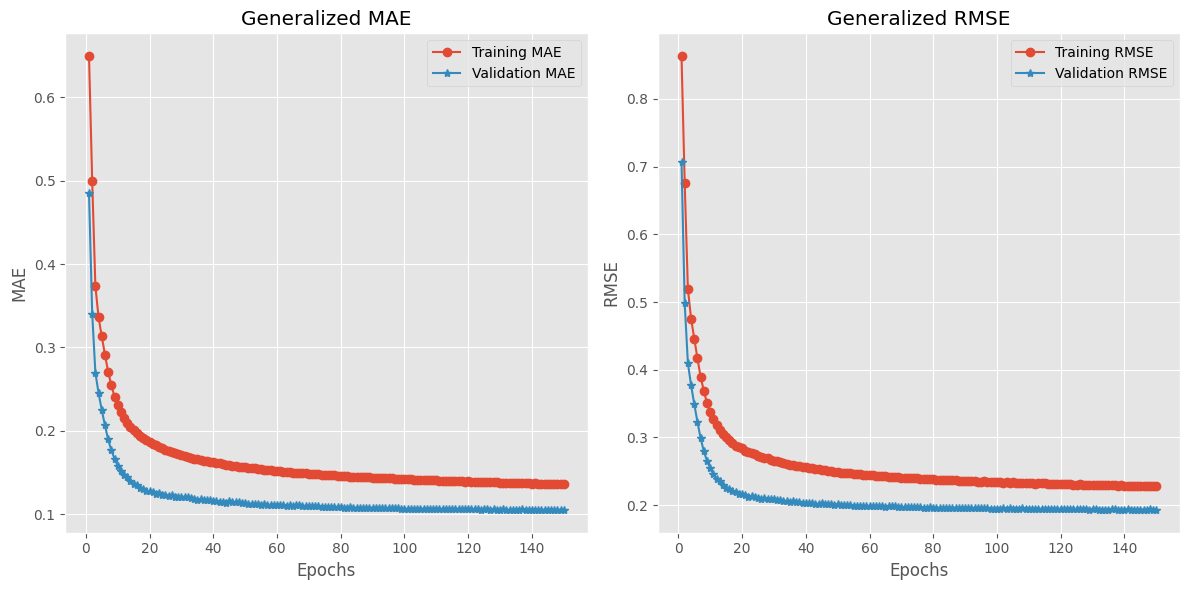

In [13]:
for i in histories_noval_PHs.items():
    print(f"Prediction horizon {i[0]}")
    plot_loss_curves(i[1])
    break

In [44]:
# model_all_train_read =  SharedLayerModelWithAttention(input_shape =input_shape , output_shape=output_shape)
# model_all_train_read.load_state_dict(torch.load('saved_models\model_shared-layer_attention_6.pth'))
# model_all_train_read.to(device)
# model_all_train_read.eval()


In [45]:
# _, _, _, test_loader, _, input_shape_test, _, output_shape_test =  prepare_data_loader(
#                                                                                     window_size,BATCH_SIZE, prediction_horizon = 6,
#                                                                                     model_type = model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = False)


In [ ]:
# outputs_all_batches, targets_all_batches =  model_prediction(model_all_train_read,test_loader, device, model_type)

In [ ]:
# outputs = torch.cat(outputs_all_batches, dim=0)
# targets = torch.cat(targets_all_batches, dim=0)

# outputs = outputs.cpu()
# targets = targets.cpu()
# # Create a mask where arr1 equals 0


In [ ]:
# mask = (targets == 0.0)

# # Set elements to None (or np.nan for float compatibility)
# targets = np.where(mask, None, targets)
# outputs = np.where(mask, None, outputs)

In [43]:
# # index =4
# for index in range(12):
#     patient1_target = [sublist[index] for sublist in targets]
#     patient1_output = [sublist[index]  for sublist in outputs]
#     # patient1_output = outputs_all_batches[index]
#     # patient1_target = targets_all_batches[index]

#     # print(list(abs_patients_errors_PHs[6].values())[index])
#     # print(list(squared_patients_errors_PHs[6].values())[index])

#     plt.figure(figsize=(13,5))
#     plt.plot(patient1_target)
#     plt.plot(patient1_output)
#     plt.show()

Total parameters in the model with 12 tasks: 1238668
